# Import Libraries

In [57]:
import os
import cv2
import shutil
import pandas as pd
import matplotlib.pyplot as plt


import itertools

from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
persons =os.listdir('lfw_funneled')
print(persons)

['Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abbas_Kiarostami', 'Abba_Eban', 'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah_Ahmad_Badawi', 'Abdullah_al-Attiyah', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullatif_Sener', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman', 'Abel_Aguilar', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Abner_Martinez', 'Abraham_Foxman', 'Aby_Har-Even', 'Adam_Ant', 'Adam_Freier', 'Adam_Herbert', 'Adam_Kennedy', 'Adam_Mair', 'Adam_Rich', 'Adam_Sandler', 'Adam_Scott', 'Adelina_Avila', 'Adel_Al-Jubeir', 'Adisai_Bodharamik', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adoor_Gopalakarishnan', 'Adriana_Lima', 'Adriana_Perez_Navarro', 'Adrianna_Zuzic', 'Adrian_Annus', 'Adrian_Fernandez', 'Adrian_McPherson', 'Adrian_Murrell', 'Adrian_Nastase', 'Adrien_Brody', 'Afton_Smith', 'Agbani_Darego', 'Agnelo_Queiroz', 'Agnes_Br

In [3]:
len(persons)

5749

In [4]:
dfpersons= pd.DataFrame(columns=['person_name','number_of_pictures'])
dict_ = {'person_name': [],'number_of_pictures': []}
for i in range(len(persons)):
    dirname='lfw_funneled'+'/'+persons[i]
    picnbr =len(os.listdir(dirname))
    dict_['person_name'].append(persons[i])
    dict_['number_of_pictures'].append(picnbr)
dfpersons = pd.DataFrame(dict_)    

In [5]:
dfpersons

person_name  number_of_pictures
0                    Aaron_Eckhart                   1
1                      Aaron_Guiel                   1
2                  Aaron_Patterson                   1
3                    Aaron_Peirsol                   4
4                       Aaron_Pena                   1
5                     Aaron_Sorkin                   2
6                     Aaron_Tippin                   1
7                 Abbas_Kiarostami                   1
8                        Abba_Eban                   1
9              Abdel_Aziz_Al-Hakim                   1
10              Abdel_Madi_Shabneh                   1
11             Abdel_Nasser_Assidi                   2
12                  Abdoulaye_Wade                   4
13               Abdulaziz_Kamilov                   1
14                        Abdullah                   4
15           Abdullah_Ahmad_Badawi                   1
16             Abdullah_al-Attiyah                   3
17                    Abdullah_Gul                  19
18                Abdullah_Nasseef                   1
19                Abdullatif_Sener                   2
20          Abdul_Majeed_Shobokshi                   1
21                    Abdul_Rahman                   1
22                    Abel_Aguilar                   1
23                    Abel_Pacheco                   4
24    Abid_Hamid_Mahmud_Al-Tikriti                   3
25                  Abner_Martinez                   1
26                  Abraham_Foxman                   1
27                    Aby_Har-Even                   1
28                        Adam_Ant                   1
29                     Adam_Freier                   1
...                            ...                 ...
5719                   Zach_Parise                   1
5720                   Zach_Pillar                   1
5721                   Zach_Safrin                   1
5722        Zafarullah_Khan_Jamali                   2
5723                    Zahir_Shah                   1
5724                Zaini_Abdullah                   1
5725                   Zakia_Hakki                   1
5726              Zalmay_Khalilzad                   1
5727                  Zarai_Toledo                   2
5728                Zara_Akhmadova                   1
5729                   Zavad_Zarif                   1
5730                 Zdravko_Mucic                   1
5731                Zeljko_Rebraca                   1
5732                  Zelma_Novelo                   1
5733                 Zeng_Qinghong                   1
5734                 Zhang_Wenkang                   2
5735                   Zhang_Yimou                   1
5736                    Zhang_Ziyi                   4
5737                 Zhong_Nanshan                   1
5738                    Zhu_Rongji                   9
5739                          Zico                   3
5740               Zinedine_Zidane                   6
5741                     Ziwang_Xu                   1
5742                      Zoe_Ball                   1
5743                Zoran_Djindjic                   4
5744                Zorica_Radovic                   1
5745                Zulfiqar_Ahmed                   1
5746                  Zumrati_Juma                   1
5747               Zurab_Tsereteli                   1
5748            Zydrunas_Ilgauskas                   1

[5749 rows x 2 columns]

# Split Dataset into Train & Test Data

In [6]:
minnbrpic = 1
dfpersons = dfpersons[dfpersons.number_of_pictures >= minnbrpic]

In [7]:
dfpersons.shape

(5749, 2)

In [8]:
dfpersons

person_name  number_of_pictures
0                    Aaron_Eckhart                   1
1                      Aaron_Guiel                   1
2                  Aaron_Patterson                   1
3                    Aaron_Peirsol                   4
4                       Aaron_Pena                   1
5                     Aaron_Sorkin                   2
6                     Aaron_Tippin                   1
7                 Abbas_Kiarostami                   1
8                        Abba_Eban                   1
9              Abdel_Aziz_Al-Hakim                   1
10              Abdel_Madi_Shabneh                   1
11             Abdel_Nasser_Assidi                   2
12                  Abdoulaye_Wade                   4
13               Abdulaziz_Kamilov                   1
14                        Abdullah                   4
15           Abdullah_Ahmad_Badawi                   1
16             Abdullah_al-Attiyah                   3
17                    Abdullah_Gul                  19
18                Abdullah_Nasseef                   1
19                Abdullatif_Sener                   2
20          Abdul_Majeed_Shobokshi                   1
21                    Abdul_Rahman                   1
22                    Abel_Aguilar                   1
23                    Abel_Pacheco                   4
24    Abid_Hamid_Mahmud_Al-Tikriti                   3
25                  Abner_Martinez                   1
26                  Abraham_Foxman                   1
27                    Aby_Har-Even                   1
28                        Adam_Ant                   1
29                     Adam_Freier                   1
...                            ...                 ...
5719                   Zach_Parise                   1
5720                   Zach_Pillar                   1
5721                   Zach_Safrin                   1
5722        Zafarullah_Khan_Jamali                   2
5723                    Zahir_Shah                   1
5724                Zaini_Abdullah                   1
5725                   Zakia_Hakki                   1
5726              Zalmay_Khalilzad                   1
5727                  Zarai_Toledo                   2
5728                Zara_Akhmadova                   1
5729                   Zavad_Zarif                   1
5730                 Zdravko_Mucic                   1
5731                Zeljko_Rebraca                   1
5732                  Zelma_Novelo                   1
5733                 Zeng_Qinghong                   1
5734                 Zhang_Wenkang                   2
5735                   Zhang_Yimou                   1
5736                    Zhang_Ziyi                   4
5737                 Zhong_Nanshan                   1
5738                    Zhu_Rongji                   9
5739                          Zico                   3
5740               Zinedine_Zidane                   6
5741                     Ziwang_Xu                   1
5742                      Zoe_Ball                   1
5743                Zoran_Djindjic                   4
5744                Zorica_Radovic                   1
5745                Zulfiqar_Ahmed                   1
5746                  Zumrati_Juma                   1
5747               Zurab_Tsereteli                   1
5748            Zydrunas_Ilgauskas                   1

[5749 rows x 2 columns]

In [9]:
if not os.path.exists('train'):
    os.mkdir('train')
if not os.path.exists('test'):
    os.mkdir('test')

for i in range(dfpersons.shape[0]):
    path1 = "train/" + dfpersons.iloc[i]['person_name']
    path2 = "test/" + dfpersons.iloc[i]['person_name']
    if not os.path.exists(path1):
        os.makedirs(path1)
    if not os.path.exists(path2):
        os.makedirs(path2)
    DIR = 'lfw_funneled/' + dfpersons.iloc[i]['person_name']
    listimgs = os.listdir(DIR)
    for j in range(minnbrpic):
        imagepath = DIR +'/'+ listimgs[j]
        face = cv2.imread(imagepath)
        grey_img= cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(path1+'/'+ listimgs[j],grey_img) 
#         shutil.copy(imagepath, path1)
    if len(listimgs) == 1:
        imagepath = DIR +'/'+ listimgs[0]
    else:
        imagepath = DIR +'/'+ listimgs[1]
    
    face = cv2.imread(imagepath)
    grey_img= cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path2+'/'+ listimgs[j],grey_img)     
#     shutil.copy(imagepath, path2)    

In [10]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np


# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    img_files = data['filenames']    
    img = cv2.imread(img_files[0])
    grey_img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    [width1,height1]=[grey_img.shape[0],grey_img.shape[1]]
    imgarray=grey_img.reshape(width1*height1);
    img_X = np.array([imgarray])
    for i in range(1, len(img_files)):
            img = cv2.imread(img_files[i])
            grey_img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            [width1,height1]=[grey_img.shape[0],grey_img.shape[1]]
            imgarray=grey_img.reshape(width1*height1);
            a = np.array([imgarray])
            img_X = np.vstack((img_X, a))
    
    img_targets = np.array(data['target'])
    target_names = np.array(data['target_names'])
    return img_X, img_targets, target_names

Using TensorFlow backend.


In [11]:
# load train datasets
train_X, train_targets, train_target_names = load_dataset('train/')

In [12]:
train_X.shape, train_targets.shape, train_target_names.shape

((5749, 62500), (5749,), (5749,))

In [13]:
# load test datasets
test_X, test_targets, test_target_names = load_dataset('test/')

In [14]:
test_X.shape, test_targets.shape, test_target_names.shape

((5749, 62500), (5749,), (5749,))


# Eigenfaces : principal component analysis (PCA)

In [23]:
from sklearn.decomposition import PCA
# Compute a PCA 
n_components = 900
pca = PCA(n_components=n_components, whiten=True).fit(train_X)
 
# apply PCA transformation
X_train_pca = pca.transform(train_X)
X_test_pca = pca.transform(test_X)

In [24]:
X_train_pca.shape

(5749, 900)

In [25]:
X_test_pca.shape

(5749, 900)

In [26]:
NewPCA=X_train_pca[0].reshape(30,30);

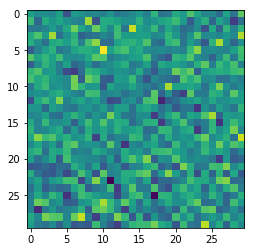

In [27]:
plt.imshow(NewPCA)

# SVM classifier

In [28]:
#training
svm = linear_model.SGDClassifier()
svm.fit(X_train_pca, train_targets)
#prediction
y_pred = svm.predict(X_test_pca)
Accuracy = metrics.accuracy_score(test_targets,y_pred)
print("Accuracy= ",Accuracy)

Accuracy=  0.7081231518524961


# Q-Learning

In [30]:
def getstateindex(states_space,selectedF):
    index = len(states_space)
    for i in range(len(states_space)):
        if states_space[i]== selectedF:
            index = i
    if index == len(states_space):
        states_space.append(list(selectedF))
    return index

### reward function

In [121]:
def EnvironmentNextstep(action,state,states_space,image_Person,target):

    done = False
    #print(states_space)

    tmp=list()
    if len(states_space)!=0:
        tmp = states_space[-1].copy()
    tmp.append(action)
    selectedF=set(tmp)
    #print(selectedF)
    
    #prediction
    image_PersonTemp = np.array(np.zeros([n_components]))
    image_PersonTemp[list(selectedF)]=image_Person[list(selectedF)]
    y_pred = svm.predict([image_PersonTemp])               

                         
                

    next_state = getstateindex(states_space,list(selectedF))
    
    if y_pred[0]==target:
        reward = 1
        done = True
    else:
        reward = -1
        
    return next_state, reward, done

### epsilon-greedy policy

In [86]:
def CreateEpsilonGreedyPolicy(Q, epsilon, num_actions): 
    def policyFunction(state):
        Action_probabilities = np.ones(num_actions, dtype = float) * epsilon / num_actions                   
        bestaction = np.argmax(Q[state]) 
        Action_probabilities[bestaction] =Action_probabilities[bestaction] + (1.0 - epsilon) 
        return Action_probabilities 
   
    return policyFunction 

### Q-Learning algorithm

In [108]:
def QLearning(image_Person, target,num_episodes, discount_factor, alpha, epsilon):
    

    # Initializing Q-Matix
    Q = np.array(np.zeros([n_components,n_components]))
  
   
    # Keeps track of useful statistics 
    stats = {
        'episode_lengths': np.zeros(num_episodes), 
        'episode_rewards':np.zeros(num_episodes)
    }
    
    # Create an epsilon greedy policy function 
    policy = CreateEpsilonGreedyPolicy(Q, epsilon, n_components) 
       
    # For every episode 
    for ith_episode in range(num_episodes): 

        # Reset the environment and pick the first action 
        state=0 #random.randint(0,n_components)
        # Define the states 
        states_space=list()
           
        for t in itertools.count():

            # get probabilities of all actions from current state 
            action_probabilities = policy(state)
            #print(action_probabilities)
   
            # choose action according to  
            # the probability distribution 
            action = np.random.choice(np.arange( len(action_probabilities)), p = action_probabilities)
            #print("action= ", action)
            #print("state= ", state)
#             print("Q= ", Q)
   
            # take action and get reward, transit to next state 
            next_state, reward, done = EnvironmentNextstep(action,state,states_space,image_Person,target) 
   
            # Update statistics 
            stats['episode_rewards'][ith_episode] += reward 
            stats['episode_lengths'][ith_episode] = t 
               
            # TD Update 
            best_next_action = np.argmax(Q[next_state])     
            td_target = reward + discount_factor * Q[next_state][best_next_action] 
            td_delta = td_target - Q[state][action] 
            Q[state][action] += alpha * td_delta 
   
            # done is True if episode terminated    
            if done: 
                break
                   
            state = next_state 
            
            print("ith_episode= ",ith_episode,"target= ", target, " t= ", t," next_state= ", next_state)
       
    return Q, stats 

In [122]:
# Initialize parameters
gamma = 0.9 # Discount factor 
alpha = 0.75 # Learning rate 
epsilon = 0.3
num_episodes = 1000
for i in range(1):#range(X_train_pca.shape[0]):
    image_Person = X_train_pca[i]
    target = train_targets[i]
    Q, stats = QLearning(image_Person, target, num_episodes, gamma, alpha, epsilon)

ith_episode=  0 target=  4779  t=  0  next_state=  0
ith_episode=  0 target=  4779  t=  1  next_state=  1
ith_episode=  0 target=  4779  t=  2  next_state=  2
ith_episode=  0 target=  4779  t=  3  next_state=  2
ith_episode=  0 target=  4779  t=  4  next_state=  3
ith_episode=  0 target=  4779  t=  5  next_state=  3
ith_episode=  0 target=  4779  t=  6  next_state=  3
ith_episode=  0 target=  4779  t=  7  next_state=  4
ith_episode=  0 target=  4779  t=  8  next_state=  4
ith_episode=  0 target=  4779  t=  9  next_state=  4
ith_episode=  0 target=  4779  t=  10  next_state=  4
ith_episode=  0 target=  4779  t=  11  next_state=  5
ith_episode=  0 target=  4779  t=  12  next_state=  5
ith_episode=  0 target=  4779  t=  13  next_state=  5
ith_episode=  0 target=  4779  t=  14  next_state=  6
ith_episode=  0 target=  4779  t=  15  next_state=  6
ith_episode=  0 target=  4779  t=  16  next_state=  6
ith_episode=  0 target=  4779  t=  17  next_state=  6
ith_episode=  0 target=  4779  t=  18 

ith_episode=  0 target=  4779  t=  156  next_state=  64
ith_episode=  0 target=  4779  t=  157  next_state=  65
ith_episode=  0 target=  4779  t=  158  next_state=  64
ith_episode=  0 target=  4779  t=  159  next_state=  64
ith_episode=  0 target=  4779  t=  160  next_state=  66
ith_episode=  0 target=  4779  t=  161  next_state=  67
ith_episode=  0 target=  4779  t=  162  next_state=  66
ith_episode=  0 target=  4779  t=  163  next_state=  68
ith_episode=  0 target=  4779  t=  164  next_state=  69
ith_episode=  0 target=  4779  t=  165  next_state=  70
ith_episode=  0 target=  4779  t=  166  next_state=  71
ith_episode=  0 target=  4779  t=  167  next_state=  70
ith_episode=  0 target=  4779  t=  168  next_state=  70
ith_episode=  0 target=  4779  t=  169  next_state=  70
ith_episode=  0 target=  4779  t=  170  next_state=  72
ith_episode=  0 target=  4779  t=  171  next_state=  73
ith_episode=  0 target=  4779  t=  172  next_state=  74
ith_episode=  0 target=  4779  t=  173  next_sta

ith_episode=  1 target=  4779  t=  109  next_state=  31
ith_episode=  1 target=  4779  t=  110  next_state=  31
ith_episode=  1 target=  4779  t=  111  next_state=  33
ith_episode=  1 target=  4779  t=  112  next_state=  33
ith_episode=  1 target=  4779  t=  113  next_state=  34
ith_episode=  1 target=  4779  t=  114  next_state=  34
ith_episode=  1 target=  4779  t=  115  next_state=  35
ith_episode=  1 target=  4779  t=  116  next_state=  36
ith_episode=  1 target=  4779  t=  117  next_state=  37
ith_episode=  1 target=  4779  t=  118  next_state=  37
ith_episode=  1 target=  4779  t=  119  next_state=  37
ith_episode=  1 target=  4779  t=  120  next_state=  38
ith_episode=  1 target=  4779  t=  121  next_state=  38
ith_episode=  1 target=  4779  t=  122  next_state=  38
ith_episode=  1 target=  4779  t=  123  next_state=  39
ith_episode=  1 target=  4779  t=  124  next_state=  39
ith_episode=  1 target=  4779  t=  125  next_state=  39
ith_episode=  1 target=  4779  t=  126  next_sta

ith_episode=  2 target=  4779  t=  15  next_state=  7
ith_episode=  2 target=  4779  t=  16  next_state=  7
ith_episode=  2 target=  4779  t=  17  next_state=  8
ith_episode=  2 target=  4779  t=  18  next_state=  8
ith_episode=  2 target=  4779  t=  19  next_state=  8
ith_episode=  2 target=  4779  t=  20  next_state=  8
ith_episode=  2 target=  4779  t=  21  next_state=  9
ith_episode=  2 target=  4779  t=  22  next_state=  10
ith_episode=  2 target=  4779  t=  23  next_state=  11
ith_episode=  2 target=  4779  t=  24  next_state=  11
ith_episode=  2 target=  4779  t=  25  next_state=  12
ith_episode=  2 target=  4779  t=  26  next_state=  13
ith_episode=  2 target=  4779  t=  27  next_state=  13
ith_episode=  2 target=  4779  t=  28  next_state=  14
ith_episode=  2 target=  4779  t=  29  next_state=  15
ith_episode=  2 target=  4779  t=  30  next_state=  16
ith_episode=  2 target=  4779  t=  31  next_state=  17
ith_episode=  2 target=  4779  t=  32  next_state=  18
ith_episode=  2 t

ith_episode=  2 target=  4779  t=  176  next_state=  65
ith_episode=  2 target=  4779  t=  177  next_state=  65
ith_episode=  2 target=  4779  t=  178  next_state=  65
ith_episode=  2 target=  4779  t=  179  next_state=  66
ith_episode=  2 target=  4779  t=  180  next_state=  66
ith_episode=  2 target=  4779  t=  181  next_state=  66
ith_episode=  2 target=  4779  t=  182  next_state=  66
ith_episode=  2 target=  4779  t=  183  next_state=  66
ith_episode=  2 target=  4779  t=  184  next_state=  66
ith_episode=  2 target=  4779  t=  185  next_state=  67
ith_episode=  2 target=  4779  t=  186  next_state=  67
ith_episode=  2 target=  4779  t=  187  next_state=  67
ith_episode=  2 target=  4779  t=  188  next_state=  68
ith_episode=  2 target=  4779  t=  189  next_state=  68
ith_episode=  2 target=  4779  t=  190  next_state=  69
ith_episode=  2 target=  4779  t=  191  next_state=  70
ith_episode=  2 target=  4779  t=  192  next_state=  70
ith_episode=  2 target=  4779  t=  193  next_sta

ith_episode=  3 target=  4779  t=  124  next_state=  55
ith_episode=  3 target=  4779  t=  125  next_state=  55
ith_episode=  3 target=  4779  t=  126  next_state=  55
ith_episode=  3 target=  4779  t=  127  next_state=  56
ith_episode=  3 target=  4779  t=  128  next_state=  56
ith_episode=  3 target=  4779  t=  129  next_state=  57
ith_episode=  3 target=  4779  t=  130  next_state=  57
ith_episode=  3 target=  4779  t=  131  next_state=  57
ith_episode=  3 target=  4779  t=  132  next_state=  57
ith_episode=  3 target=  4779  t=  133  next_state=  57
ith_episode=  3 target=  4779  t=  134  next_state=  57
ith_episode=  3 target=  4779  t=  135  next_state=  58
ith_episode=  3 target=  4779  t=  136  next_state=  58
ith_episode=  3 target=  4779  t=  137  next_state=  58
ith_episode=  3 target=  4779  t=  138  next_state=  58
ith_episode=  3 target=  4779  t=  139  next_state=  58
ith_episode=  3 target=  4779  t=  140  next_state=  59
ith_episode=  3 target=  4779  t=  141  next_sta

ith_episode=  4 target=  4779  t=  78  next_state=  35
ith_episode=  4 target=  4779  t=  79  next_state=  36
ith_episode=  4 target=  4779  t=  80  next_state=  36
ith_episode=  4 target=  4779  t=  81  next_state=  37
ith_episode=  4 target=  4779  t=  82  next_state=  37
ith_episode=  4 target=  4779  t=  83  next_state=  38
ith_episode=  4 target=  4779  t=  84  next_state=  38
ith_episode=  4 target=  4779  t=  85  next_state=  39
ith_episode=  4 target=  4779  t=  86  next_state=  39
ith_episode=  4 target=  4779  t=  87  next_state=  39
ith_episode=  4 target=  4779  t=  88  next_state=  39
ith_episode=  4 target=  4779  t=  89  next_state=  40
ith_episode=  4 target=  4779  t=  90  next_state=  40
ith_episode=  4 target=  4779  t=  91  next_state=  40
ith_episode=  4 target=  4779  t=  92  next_state=  41
ith_episode=  4 target=  4779  t=  93  next_state=  41
ith_episode=  4 target=  4779  t=  94  next_state=  41
ith_episode=  4 target=  4779  t=  95  next_state=  41
ith_episod

ith_episode=  5 target=  4779  t=  98  next_state=  50
ith_episode=  5 target=  4779  t=  99  next_state=  50
ith_episode=  5 target=  4779  t=  100  next_state=  50
ith_episode=  5 target=  4779  t=  101  next_state=  51
ith_episode=  5 target=  4779  t=  102  next_state=  51
ith_episode=  5 target=  4779  t=  103  next_state=  52
ith_episode=  5 target=  4779  t=  104  next_state=  52
ith_episode=  5 target=  4779  t=  105  next_state=  53
ith_episode=  5 target=  4779  t=  106  next_state=  54
ith_episode=  5 target=  4779  t=  107  next_state=  54
ith_episode=  5 target=  4779  t=  108  next_state=  55
ith_episode=  5 target=  4779  t=  109  next_state=  56
ith_episode=  5 target=  4779  t=  110  next_state=  56
ith_episode=  5 target=  4779  t=  111  next_state=  56
ith_episode=  5 target=  4779  t=  112  next_state=  56
ith_episode=  5 target=  4779  t=  113  next_state=  56
ith_episode=  5 target=  4779  t=  114  next_state=  56
ith_episode=  5 target=  4779  t=  115  next_state

ith_episode=  6 target=  4779  t=  54  next_state=  32
ith_episode=  6 target=  4779  t=  55  next_state=  33
ith_episode=  6 target=  4779  t=  56  next_state=  32
ith_episode=  6 target=  4779  t=  57  next_state=  34
ith_episode=  6 target=  4779  t=  58  next_state=  35
ith_episode=  6 target=  4779  t=  59  next_state=  36
ith_episode=  6 target=  4779  t=  60  next_state=  35
ith_episode=  6 target=  4779  t=  61  next_state=  37
ith_episode=  6 target=  4779  t=  62  next_state=  38
ith_episode=  6 target=  4779  t=  63  next_state=  39
ith_episode=  6 target=  4779  t=  64  next_state=  38
ith_episode=  6 target=  4779  t=  65  next_state=  40
ith_episode=  6 target=  4779  t=  66  next_state=  41
ith_episode=  6 target=  4779  t=  67  next_state=  40
ith_episode=  6 target=  4779  t=  68  next_state=  42
ith_episode=  6 target=  4779  t=  69  next_state=  43
ith_episode=  6 target=  4779  t=  70  next_state=  42
ith_episode=  6 target=  4779  t=  71  next_state=  42
ith_episod

ith_episode=  6 target=  4779  t=  213  next_state=  120
ith_episode=  6 target=  4779  t=  214  next_state=  120
ith_episode=  6 target=  4779  t=  215  next_state=  120
ith_episode=  6 target=  4779  t=  216  next_state=  120
ith_episode=  6 target=  4779  t=  217  next_state=  120
ith_episode=  6 target=  4779  t=  218  next_state=  120
ith_episode=  6 target=  4779  t=  219  next_state=  121
ith_episode=  6 target=  4779  t=  220  next_state=  121
ith_episode=  6 target=  4779  t=  221  next_state=  121
ith_episode=  6 target=  4779  t=  222  next_state=  121
ith_episode=  6 target=  4779  t=  223  next_state=  122
ith_episode=  6 target=  4779  t=  224  next_state=  122
ith_episode=  6 target=  4779  t=  225  next_state=  122
ith_episode=  6 target=  4779  t=  226  next_state=  123
ith_episode=  6 target=  4779  t=  227  next_state=  123
ith_episode=  6 target=  4779  t=  228  next_state=  123
ith_episode=  6 target=  4779  t=  229  next_state=  123
ith_episode=  6 target=  4779  

ith_episode=  6 target=  4779  t=  371  next_state=  154
ith_episode=  6 target=  4779  t=  372  next_state=  154
ith_episode=  6 target=  4779  t=  373  next_state=  155
ith_episode=  6 target=  4779  t=  374  next_state=  156
ith_episode=  6 target=  4779  t=  375  next_state=  156
ith_episode=  6 target=  4779  t=  376  next_state=  157
ith_episode=  6 target=  4779  t=  377  next_state=  157
ith_episode=  6 target=  4779  t=  378  next_state=  158
ith_episode=  6 target=  4779  t=  379  next_state=  158
ith_episode=  6 target=  4779  t=  380  next_state=  158
ith_episode=  6 target=  4779  t=  381  next_state=  158
ith_episode=  6 target=  4779  t=  382  next_state=  159
ith_episode=  6 target=  4779  t=  383  next_state=  160
ith_episode=  6 target=  4779  t=  384  next_state=  160
ith_episode=  6 target=  4779  t=  385  next_state=  160
ith_episode=  6 target=  4779  t=  386  next_state=  161
ith_episode=  6 target=  4779  t=  387  next_state=  161
ith_episode=  6 target=  4779  

ith_episode=  7 target=  4779  t=  149  next_state=  65
ith_episode=  7 target=  4779  t=  150  next_state=  66
ith_episode=  7 target=  4779  t=  151  next_state=  66
ith_episode=  7 target=  4779  t=  152  next_state=  67
ith_episode=  7 target=  4779  t=  153  next_state=  67
ith_episode=  7 target=  4779  t=  154  next_state=  67
ith_episode=  7 target=  4779  t=  155  next_state=  67
ith_episode=  7 target=  4779  t=  156  next_state=  68
ith_episode=  7 target=  4779  t=  157  next_state=  69
ith_episode=  7 target=  4779  t=  158  next_state=  70
ith_episode=  7 target=  4779  t=  159  next_state=  70
ith_episode=  7 target=  4779  t=  160  next_state=  70
ith_episode=  7 target=  4779  t=  161  next_state=  70
ith_episode=  7 target=  4779  t=  162  next_state=  70
ith_episode=  7 target=  4779  t=  163  next_state=  70
ith_episode=  7 target=  4779  t=  164  next_state=  70
ith_episode=  7 target=  4779  t=  165  next_state=  70
ith_episode=  7 target=  4779  t=  166  next_sta

ith_episode=  8 target=  4779  t=  121  next_state=  79
ith_episode=  8 target=  4779  t=  122  next_state=  80
ith_episode=  8 target=  4779  t=  123  next_state=  81
ith_episode=  8 target=  4779  t=  124  next_state=  82
ith_episode=  8 target=  4779  t=  125  next_state=  82
ith_episode=  8 target=  4779  t=  126  next_state=  82
ith_episode=  8 target=  4779  t=  127  next_state=  82
ith_episode=  8 target=  4779  t=  128  next_state=  83
ith_episode=  8 target=  4779  t=  129  next_state=  84
ith_episode=  8 target=  4779  t=  130  next_state=  84
ith_episode=  8 target=  4779  t=  131  next_state=  84
ith_episode=  8 target=  4779  t=  132  next_state=  84
ith_episode=  8 target=  4779  t=  133  next_state=  84
ith_episode=  8 target=  4779  t=  134  next_state=  84
ith_episode=  8 target=  4779  t=  135  next_state=  84
ith_episode=  8 target=  4779  t=  136  next_state=  85
ith_episode=  8 target=  4779  t=  137  next_state=  85
ith_episode=  8 target=  4779  t=  138  next_sta

ith_episode=  9 target=  4779  t=  39  next_state=  20
ith_episode=  9 target=  4779  t=  40  next_state=  21
ith_episode=  9 target=  4779  t=  41  next_state=  22
ith_episode=  9 target=  4779  t=  42  next_state=  23
ith_episode=  9 target=  4779  t=  43  next_state=  24
ith_episode=  9 target=  4779  t=  44  next_state=  25
ith_episode=  9 target=  4779  t=  45  next_state=  25
ith_episode=  9 target=  4779  t=  46  next_state=  26
ith_episode=  9 target=  4779  t=  47  next_state=  27
ith_episode=  9 target=  4779  t=  48  next_state=  27
ith_episode=  9 target=  4779  t=  49  next_state=  27
ith_episode=  9 target=  4779  t=  50  next_state=  28
ith_episode=  9 target=  4779  t=  51  next_state=  28
ith_episode=  9 target=  4779  t=  52  next_state=  29
ith_episode=  9 target=  4779  t=  53  next_state=  29
ith_episode=  9 target=  4779  t=  54  next_state=  29
ith_episode=  9 target=  4779  t=  55  next_state=  30
ith_episode=  9 target=  4779  t=  56  next_state=  30
ith_episod

ith_episode=  9 target=  4779  t=  195  next_state=  73
ith_episode=  9 target=  4779  t=  196  next_state=  73
ith_episode=  9 target=  4779  t=  197  next_state=  75
ith_episode=  9 target=  4779  t=  198  next_state=  76
ith_episode=  9 target=  4779  t=  199  next_state=  77
ith_episode=  9 target=  4779  t=  200  next_state=  78
ith_episode=  9 target=  4779  t=  201  next_state=  79
ith_episode=  9 target=  4779  t=  202  next_state=  80
ith_episode=  9 target=  4779  t=  203  next_state=  81
ith_episode=  9 target=  4779  t=  204  next_state=  82
ith_episode=  9 target=  4779  t=  205  next_state=  83
ith_episode=  9 target=  4779  t=  206  next_state=  84
ith_episode=  9 target=  4779  t=  207  next_state=  85
ith_episode=  9 target=  4779  t=  208  next_state=  86
ith_episode=  9 target=  4779  t=  209  next_state=  87
ith_episode=  9 target=  4779  t=  210  next_state=  88
ith_episode=  9 target=  4779  t=  211  next_state=  87
ith_episode=  9 target=  4779  t=  212  next_sta

ith_episode=  10 target=  4779  t=  65  next_state=  34
ith_episode=  10 target=  4779  t=  66  next_state=  34
ith_episode=  10 target=  4779  t=  67  next_state=  34
ith_episode=  10 target=  4779  t=  68  next_state=  34
ith_episode=  10 target=  4779  t=  69  next_state=  35
ith_episode=  10 target=  4779  t=  70  next_state=  36
ith_episode=  10 target=  4779  t=  71  next_state=  37
ith_episode=  10 target=  4779  t=  72  next_state=  37
ith_episode=  10 target=  4779  t=  73  next_state=  38
ith_episode=  10 target=  4779  t=  74  next_state=  39
ith_episode=  10 target=  4779  t=  75  next_state=  39
ith_episode=  10 target=  4779  t=  76  next_state=  39
ith_episode=  10 target=  4779  t=  77  next_state=  39
ith_episode=  10 target=  4779  t=  78  next_state=  40
ith_episode=  10 target=  4779  t=  79  next_state=  40
ith_episode=  10 target=  4779  t=  80  next_state=  40
ith_episode=  10 target=  4779  t=  81  next_state=  41
ith_episode=  10 target=  4779  t=  82  next_sta

ith_episode=  10 target=  4779  t=  222  next_state=  91
ith_episode=  10 target=  4779  t=  223  next_state=  91
ith_episode=  10 target=  4779  t=  224  next_state=  91
ith_episode=  10 target=  4779  t=  225  next_state=  91
ith_episode=  10 target=  4779  t=  226  next_state=  92
ith_episode=  10 target=  4779  t=  227  next_state=  93
ith_episode=  10 target=  4779  t=  228  next_state=  93
ith_episode=  10 target=  4779  t=  229  next_state=  94
ith_episode=  10 target=  4779  t=  230  next_state=  95
ith_episode=  10 target=  4779  t=  231  next_state=  95
ith_episode=  10 target=  4779  t=  232  next_state=  96
ith_episode=  10 target=  4779  t=  233  next_state=  96
ith_episode=  10 target=  4779  t=  234  next_state=  97
ith_episode=  10 target=  4779  t=  235  next_state=  98
ith_episode=  10 target=  4779  t=  236  next_state=  99
ith_episode=  10 target=  4779  t=  237  next_state=  99
ith_episode=  10 target=  4779  t=  238  next_state=  100
ith_episode=  10 target=  4779

ith_episode=  11 target=  4779  t=  80  next_state=  62
ith_episode=  11 target=  4779  t=  81  next_state=  63
ith_episode=  11 target=  4779  t=  82  next_state=  64
ith_episode=  11 target=  4779  t=  83  next_state=  65
ith_episode=  11 target=  4779  t=  84  next_state=  66
ith_episode=  11 target=  4779  t=  85  next_state=  67
ith_episode=  11 target=  4779  t=  86  next_state=  68
ith_episode=  11 target=  4779  t=  87  next_state=  69
ith_episode=  11 target=  4779  t=  88  next_state=  70
ith_episode=  11 target=  4779  t=  89  next_state=  71
ith_episode=  11 target=  4779  t=  90  next_state=  72
ith_episode=  11 target=  4779  t=  91  next_state=  73
ith_episode=  11 target=  4779  t=  92  next_state=  74
ith_episode=  11 target=  4779  t=  93  next_state=  75
ith_episode=  11 target=  4779  t=  94  next_state=  76
ith_episode=  11 target=  4779  t=  95  next_state=  77
ith_episode=  11 target=  4779  t=  96  next_state=  78
ith_episode=  11 target=  4779  t=  97  next_sta

ith_episode=  12 target=  4779  t=  138  next_state=  58
ith_episode=  12 target=  4779  t=  139  next_state=  59
ith_episode=  12 target=  4779  t=  140  next_state=  59
ith_episode=  12 target=  4779  t=  141  next_state=  59
ith_episode=  12 target=  4779  t=  142  next_state=  59
ith_episode=  12 target=  4779  t=  143  next_state=  59
ith_episode=  12 target=  4779  t=  144  next_state=  60
ith_episode=  12 target=  4779  t=  145  next_state=  61
ith_episode=  12 target=  4779  t=  146  next_state=  61
ith_episode=  12 target=  4779  t=  147  next_state=  61
ith_episode=  12 target=  4779  t=  148  next_state=  61
ith_episode=  12 target=  4779  t=  149  next_state=  61
ith_episode=  12 target=  4779  t=  150  next_state=  62
ith_episode=  12 target=  4779  t=  151  next_state=  63
ith_episode=  12 target=  4779  t=  152  next_state=  64
ith_episode=  12 target=  4779  t=  153  next_state=  65
ith_episode=  12 target=  4779  t=  154  next_state=  66
ith_episode=  12 target=  4779 

ith_episode=  13 target=  4779  t=  112  next_state=  63
ith_episode=  13 target=  4779  t=  113  next_state=  64
ith_episode=  13 target=  4779  t=  114  next_state=  65
ith_episode=  13 target=  4779  t=  115  next_state=  66
ith_episode=  13 target=  4779  t=  116  next_state=  67
ith_episode=  13 target=  4779  t=  117  next_state=  66
ith_episode=  13 target=  4779  t=  118  next_state=  66
ith_episode=  13 target=  4779  t=  119  next_state=  66
ith_episode=  13 target=  4779  t=  120  next_state=  68
ith_episode=  13 target=  4779  t=  121  next_state=  69
ith_episode=  13 target=  4779  t=  122  next_state=  68
ith_episode=  13 target=  4779  t=  123  next_state=  70
ith_episode=  13 target=  4779  t=  124  next_state=  71
ith_episode=  13 target=  4779  t=  125  next_state=  72
ith_episode=  13 target=  4779  t=  126  next_state=  73
ith_episode=  13 target=  4779  t=  127  next_state=  74
ith_episode=  13 target=  4779  t=  128  next_state=  75
ith_episode=  13 target=  4779 

ith_episode=  14 target=  4779  t=  139  next_state=  80
ith_episode=  14 target=  4779  t=  140  next_state=  81
ith_episode=  14 target=  4779  t=  141  next_state=  81
ith_episode=  14 target=  4779  t=  142  next_state=  82
ith_episode=  14 target=  4779  t=  143  next_state=  82
ith_episode=  14 target=  4779  t=  144  next_state=  82
ith_episode=  14 target=  4779  t=  145  next_state=  82
ith_episode=  14 target=  4779  t=  146  next_state=  83
ith_episode=  14 target=  4779  t=  147  next_state=  83
ith_episode=  14 target=  4779  t=  148  next_state=  83
ith_episode=  14 target=  4779  t=  149  next_state=  83
ith_episode=  14 target=  4779  t=  150  next_state=  84
ith_episode=  14 target=  4779  t=  151  next_state=  84
ith_episode=  14 target=  4779  t=  152  next_state=  84
ith_episode=  14 target=  4779  t=  153  next_state=  85
ith_episode=  14 target=  4779  t=  154  next_state=  85
ith_episode=  14 target=  4779  t=  155  next_state=  86
ith_episode=  14 target=  4779 

ith_episode=  15 target=  4779  t=  34  next_state=  26
ith_episode=  15 target=  4779  t=  35  next_state=  27
ith_episode=  15 target=  4779  t=  36  next_state=  28
ith_episode=  15 target=  4779  t=  37  next_state=  29
ith_episode=  15 target=  4779  t=  38  next_state=  29
ith_episode=  15 target=  4779  t=  39  next_state=  30
ith_episode=  15 target=  4779  t=  40  next_state=  30
ith_episode=  15 target=  4779  t=  41  next_state=  31
ith_episode=  15 target=  4779  t=  42  next_state=  31
ith_episode=  15 target=  4779  t=  43  next_state=  31
ith_episode=  15 target=  4779  t=  44  next_state=  32
ith_episode=  15 target=  4779  t=  45  next_state=  33
ith_episode=  15 target=  4779  t=  46  next_state=  34
ith_episode=  15 target=  4779  t=  47  next_state=  35
ith_episode=  15 target=  4779  t=  48  next_state=  36
ith_episode=  15 target=  4779  t=  49  next_state=  36
ith_episode=  15 target=  4779  t=  50  next_state=  37
ith_episode=  15 target=  4779  t=  51  next_sta

ith_episode=  16 target=  4779  t=  32  next_state=  26
ith_episode=  16 target=  4779  t=  33  next_state=  27
ith_episode=  16 target=  4779  t=  34  next_state=  28
ith_episode=  16 target=  4779  t=  35  next_state=  28
ith_episode=  16 target=  4779  t=  36  next_state=  29
ith_episode=  16 target=  4779  t=  37  next_state=  29
ith_episode=  16 target=  4779  t=  38  next_state=  29
ith_episode=  16 target=  4779  t=  39  next_state=  30
ith_episode=  16 target=  4779  t=  40  next_state=  30
ith_episode=  16 target=  4779  t=  41  next_state=  30
ith_episode=  16 target=  4779  t=  42  next_state=  30
ith_episode=  16 target=  4779  t=  43  next_state=  30
ith_episode=  16 target=  4779  t=  44  next_state=  30
ith_episode=  16 target=  4779  t=  45  next_state=  31
ith_episode=  16 target=  4779  t=  46  next_state=  31
ith_episode=  16 target=  4779  t=  47  next_state=  31
ith_episode=  16 target=  4779  t=  48  next_state=  32
ith_episode=  16 target=  4779  t=  49  next_sta

ith_episode=  17 target=  4779  t=  43  next_state=  42
ith_episode=  17 target=  4779  t=  44  next_state=  43
ith_episode=  17 target=  4779  t=  45  next_state=  43
ith_episode=  17 target=  4779  t=  46  next_state=  43
ith_episode=  17 target=  4779  t=  47  next_state=  44
ith_episode=  17 target=  4779  t=  48  next_state=  45
ith_episode=  17 target=  4779  t=  49  next_state=  46
ith_episode=  17 target=  4779  t=  50  next_state=  46
ith_episode=  17 target=  4779  t=  51  next_state=  47
ith_episode=  17 target=  4779  t=  52  next_state=  48
ith_episode=  17 target=  4779  t=  53  next_state=  49
ith_episode=  17 target=  4779  t=  54  next_state=  49
ith_episode=  17 target=  4779  t=  55  next_state=  50
ith_episode=  17 target=  4779  t=  56  next_state=  51
ith_episode=  17 target=  4779  t=  57  next_state=  52
ith_episode=  17 target=  4779  t=  58  next_state=  52
ith_episode=  17 target=  4779  t=  59  next_state=  52
ith_episode=  17 target=  4779  t=  60  next_sta

ith_episode=  18 target=  4779  t=  72  next_state=  49
ith_episode=  18 target=  4779  t=  73  next_state=  50
ith_episode=  18 target=  4779  t=  74  next_state=  50
ith_episode=  18 target=  4779  t=  75  next_state=  50
ith_episode=  18 target=  4779  t=  76  next_state=  51
ith_episode=  18 target=  4779  t=  77  next_state=  51
ith_episode=  18 target=  4779  t=  78  next_state=  51
ith_episode=  18 target=  4779  t=  79  next_state=  51
ith_episode=  18 target=  4779  t=  80  next_state=  52
ith_episode=  18 target=  4779  t=  81  next_state=  53
ith_episode=  18 target=  4779  t=  82  next_state=  53
ith_episode=  18 target=  4779  t=  83  next_state=  53
ith_episode=  18 target=  4779  t=  84  next_state=  53
ith_episode=  18 target=  4779  t=  85  next_state=  53
ith_episode=  18 target=  4779  t=  86  next_state=  54
ith_episode=  18 target=  4779  t=  87  next_state=  54
ith_episode=  18 target=  4779  t=  88  next_state=  55
ith_episode=  18 target=  4779  t=  89  next_sta

ith_episode=  19 target=  4779  t=  24  next_state=  22
ith_episode=  19 target=  4779  t=  25  next_state=  23
ith_episode=  19 target=  4779  t=  26  next_state=  24
ith_episode=  19 target=  4779  t=  27  next_state=  23
ith_episode=  19 target=  4779  t=  28  next_state=  25
ith_episode=  19 target=  4779  t=  29  next_state=  26
ith_episode=  19 target=  4779  t=  30  next_state=  27
ith_episode=  19 target=  4779  t=  31  next_state=  28
ith_episode=  19 target=  4779  t=  32  next_state=  29
ith_episode=  19 target=  4779  t=  33  next_state=  30
ith_episode=  19 target=  4779  t=  34  next_state=  31
ith_episode=  19 target=  4779  t=  35  next_state=  32
ith_episode=  19 target=  4779  t=  36  next_state=  33
ith_episode=  19 target=  4779  t=  37  next_state=  34
ith_episode=  19 target=  4779  t=  38  next_state=  35
ith_episode=  19 target=  4779  t=  39  next_state=  36
ith_episode=  19 target=  4779  t=  40  next_state=  36
ith_episode=  19 target=  4779  t=  41  next_sta

ith_episode=  20 target=  4779  t=  33  next_state=  25
ith_episode=  20 target=  4779  t=  34  next_state=  26
ith_episode=  20 target=  4779  t=  35  next_state=  27
ith_episode=  20 target=  4779  t=  36  next_state=  27
ith_episode=  20 target=  4779  t=  37  next_state=  28
ith_episode=  20 target=  4779  t=  38  next_state=  28
ith_episode=  20 target=  4779  t=  39  next_state=  28
ith_episode=  20 target=  4779  t=  40  next_state=  28
ith_episode=  20 target=  4779  t=  41  next_state=  28
ith_episode=  20 target=  4779  t=  42  next_state=  29
ith_episode=  20 target=  4779  t=  43  next_state=  30
ith_episode=  20 target=  4779  t=  44  next_state=  31
ith_episode=  20 target=  4779  t=  45  next_state=  31
ith_episode=  20 target=  4779  t=  46  next_state=  31
ith_episode=  20 target=  4779  t=  47  next_state=  32
ith_episode=  20 target=  4779  t=  48  next_state=  33
ith_episode=  20 target=  4779  t=  49  next_state=  33
ith_episode=  20 target=  4779  t=  50  next_sta

ith_episode=  21 target=  4779  t=  41  next_state=  28
ith_episode=  21 target=  4779  t=  42  next_state=  28
ith_episode=  21 target=  4779  t=  43  next_state=  28
ith_episode=  21 target=  4779  t=  44  next_state=  29
ith_episode=  21 target=  4779  t=  45  next_state=  30
ith_episode=  21 target=  4779  t=  46  next_state=  30
ith_episode=  21 target=  4779  t=  47  next_state=  30
ith_episode=  21 target=  4779  t=  48  next_state=  30
ith_episode=  21 target=  4779  t=  49  next_state=  31
ith_episode=  21 target=  4779  t=  50  next_state=  32
ith_episode=  21 target=  4779  t=  51  next_state=  33
ith_episode=  21 target=  4779  t=  52  next_state=  33
ith_episode=  21 target=  4779  t=  53  next_state=  33
ith_episode=  21 target=  4779  t=  54  next_state=  33
ith_episode=  21 target=  4779  t=  55  next_state=  34
ith_episode=  21 target=  4779  t=  56  next_state=  34
ith_episode=  21 target=  4779  t=  57  next_state=  35
ith_episode=  21 target=  4779  t=  58  next_sta

ith_episode=  22 target=  4779  t=  3  next_state=  3
ith_episode=  22 target=  4779  t=  4  next_state=  4
ith_episode=  22 target=  4779  t=  5  next_state=  5
ith_episode=  22 target=  4779  t=  6  next_state=  6
ith_episode=  22 target=  4779  t=  7  next_state=  7
ith_episode=  22 target=  4779  t=  8  next_state=  8
ith_episode=  22 target=  4779  t=  9  next_state=  8
ith_episode=  22 target=  4779  t=  10  next_state=  9
ith_episode=  22 target=  4779  t=  11  next_state=  10
ith_episode=  22 target=  4779  t=  12  next_state=  10
ith_episode=  22 target=  4779  t=  13  next_state=  11
ith_episode=  22 target=  4779  t=  14  next_state=  12
ith_episode=  22 target=  4779  t=  15  next_state=  13
ith_episode=  22 target=  4779  t=  16  next_state=  14
ith_episode=  22 target=  4779  t=  17  next_state=  15
ith_episode=  22 target=  4779  t=  18  next_state=  16
ith_episode=  22 target=  4779  t=  19  next_state=  17
ith_episode=  22 target=  4779  t=  20  next_state=  18
ith_epi

ith_episode=  23 target=  4779  t=  82  next_state=  59
ith_episode=  23 target=  4779  t=  83  next_state=  59
ith_episode=  23 target=  4779  t=  84  next_state=  59
ith_episode=  23 target=  4779  t=  85  next_state=  59
ith_episode=  23 target=  4779  t=  86  next_state=  59
ith_episode=  23 target=  4779  t=  87  next_state=  60
ith_episode=  23 target=  4779  t=  88  next_state=  60
ith_episode=  23 target=  4779  t=  89  next_state=  61
ith_episode=  23 target=  4779  t=  90  next_state=  61
ith_episode=  23 target=  4779  t=  91  next_state=  61
ith_episode=  23 target=  4779  t=  92  next_state=  62
ith_episode=  23 target=  4779  t=  93  next_state=  62
ith_episode=  23 target=  4779  t=  94  next_state=  62
ith_episode=  23 target=  4779  t=  95  next_state=  62
ith_episode=  23 target=  4779  t=  96  next_state=  62
ith_episode=  23 target=  4779  t=  97  next_state=  62
ith_episode=  23 target=  4779  t=  98  next_state=  62
ith_episode=  23 target=  4779  t=  99  next_sta

ith_episode=  24 target=  4779  t=  105  next_state=  83
ith_episode=  24 target=  4779  t=  106  next_state=  84
ith_episode=  24 target=  4779  t=  107  next_state=  85
ith_episode=  24 target=  4779  t=  108  next_state=  86
ith_episode=  24 target=  4779  t=  109  next_state=  87
ith_episode=  24 target=  4779  t=  110  next_state=  88
ith_episode=  24 target=  4779  t=  111  next_state=  87
ith_episode=  24 target=  4779  t=  112  next_state=  89
ith_episode=  24 target=  4779  t=  113  next_state=  90
ith_episode=  24 target=  4779  t=  114  next_state=  91
ith_episode=  24 target=  4779  t=  115  next_state=  92
ith_episode=  24 target=  4779  t=  116  next_state=  93
ith_episode=  24 target=  4779  t=  117  next_state=  94
ith_episode=  24 target=  4779  t=  118  next_state=  95
ith_episode=  25 target=  4779  t=  0  next_state=  0
ith_episode=  25 target=  4779  t=  1  next_state=  1
ith_episode=  25 target=  4779  t=  2  next_state=  2
ith_episode=  25 target=  4779  t=  3  n

ith_episode=  26 target=  4779  t=  42  next_state=  29
ith_episode=  26 target=  4779  t=  43  next_state=  29
ith_episode=  26 target=  4779  t=  44  next_state=  29
ith_episode=  26 target=  4779  t=  45  next_state=  29
ith_episode=  26 target=  4779  t=  46  next_state=  30
ith_episode=  26 target=  4779  t=  47  next_state=  31
ith_episode=  26 target=  4779  t=  48  next_state=  31
ith_episode=  26 target=  4779  t=  49  next_state=  31
ith_episode=  26 target=  4779  t=  50  next_state=  31
ith_episode=  26 target=  4779  t=  51  next_state=  31
ith_episode=  26 target=  4779  t=  52  next_state=  32
ith_episode=  26 target=  4779  t=  53  next_state=  33
ith_episode=  26 target=  4779  t=  54  next_state=  33
ith_episode=  26 target=  4779  t=  55  next_state=  33
ith_episode=  26 target=  4779  t=  56  next_state=  34
ith_episode=  26 target=  4779  t=  57  next_state=  34
ith_episode=  26 target=  4779  t=  58  next_state=  35
ith_episode=  26 target=  4779  t=  59  next_sta

ith_episode=  27 target=  4779  t=  10  next_state=  9
ith_episode=  27 target=  4779  t=  11  next_state=  10
ith_episode=  27 target=  4779  t=  12  next_state=  10
ith_episode=  27 target=  4779  t=  13  next_state=  10
ith_episode=  27 target=  4779  t=  14  next_state=  11
ith_episode=  27 target=  4779  t=  15  next_state=  12
ith_episode=  27 target=  4779  t=  16  next_state=  13
ith_episode=  27 target=  4779  t=  17  next_state=  14
ith_episode=  27 target=  4779  t=  18  next_state=  15
ith_episode=  27 target=  4779  t=  19  next_state=  16
ith_episode=  27 target=  4779  t=  20  next_state=  17
ith_episode=  27 target=  4779  t=  21  next_state=  18
ith_episode=  27 target=  4779  t=  22  next_state=  19
ith_episode=  27 target=  4779  t=  23  next_state=  20
ith_episode=  27 target=  4779  t=  24  next_state=  21
ith_episode=  27 target=  4779  t=  25  next_state=  22
ith_episode=  27 target=  4779  t=  26  next_state=  23
ith_episode=  27 target=  4779  t=  27  next_stat

ith_episode=  28 target=  4779  t=  64  next_state=  54
ith_episode=  28 target=  4779  t=  65  next_state=  55
ith_episode=  28 target=  4779  t=  66  next_state=  56
ith_episode=  28 target=  4779  t=  67  next_state=  57
ith_episode=  28 target=  4779  t=  68  next_state=  58
ith_episode=  28 target=  4779  t=  69  next_state=  59
ith_episode=  28 target=  4779  t=  70  next_state=  60
ith_episode=  28 target=  4779  t=  71  next_state=  61
ith_episode=  28 target=  4779  t=  72  next_state=  62
ith_episode=  28 target=  4779  t=  73  next_state=  60
ith_episode=  28 target=  4779  t=  74  next_state=  63
ith_episode=  28 target=  4779  t=  75  next_state=  64
ith_episode=  28 target=  4779  t=  76  next_state=  65
ith_episode=  28 target=  4779  t=  77  next_state=  66
ith_episode=  28 target=  4779  t=  78  next_state=  67
ith_episode=  28 target=  4779  t=  79  next_state=  65
ith_episode=  28 target=  4779  t=  80  next_state=  65
ith_episode=  28 target=  4779  t=  81  next_sta

ith_episode=  28 target=  4779  t=  228  next_state=  131
ith_episode=  28 target=  4779  t=  229  next_state=  132
ith_episode=  28 target=  4779  t=  230  next_state=  133
ith_episode=  28 target=  4779  t=  231  next_state=  133
ith_episode=  28 target=  4779  t=  232  next_state=  133
ith_episode=  28 target=  4779  t=  233  next_state=  133
ith_episode=  28 target=  4779  t=  234  next_state=  133
ith_episode=  28 target=  4779  t=  235  next_state=  133
ith_episode=  28 target=  4779  t=  236  next_state=  133
ith_episode=  28 target=  4779  t=  237  next_state=  133
ith_episode=  28 target=  4779  t=  238  next_state=  133
ith_episode=  28 target=  4779  t=  239  next_state=  133
ith_episode=  28 target=  4779  t=  240  next_state=  133
ith_episode=  28 target=  4779  t=  241  next_state=  134
ith_episode=  28 target=  4779  t=  242  next_state=  134
ith_episode=  28 target=  4779  t=  243  next_state=  134
ith_episode=  28 target=  4779  t=  244  next_state=  134
ith_episode=  

ith_episode=  29 target=  4779  t=  47  next_state=  33
ith_episode=  29 target=  4779  t=  48  next_state=  34
ith_episode=  29 target=  4779  t=  49  next_state=  35
ith_episode=  29 target=  4779  t=  50  next_state=  36
ith_episode=  29 target=  4779  t=  51  next_state=  36
ith_episode=  29 target=  4779  t=  52  next_state=  36
ith_episode=  29 target=  4779  t=  53  next_state=  37
ith_episode=  29 target=  4779  t=  54  next_state=  38
ith_episode=  29 target=  4779  t=  55  next_state=  39
ith_episode=  29 target=  4779  t=  56  next_state=  40
ith_episode=  29 target=  4779  t=  57  next_state=  41
ith_episode=  29 target=  4779  t=  58  next_state=  42
ith_episode=  29 target=  4779  t=  59  next_state=  43
ith_episode=  29 target=  4779  t=  60  next_state=  44
ith_episode=  29 target=  4779  t=  61  next_state=  45
ith_episode=  29 target=  4779  t=  62  next_state=  46
ith_episode=  29 target=  4779  t=  63  next_state=  47
ith_episode=  29 target=  4779  t=  64  next_sta

ith_episode=  30 target=  4779  t=  124  next_state=  75
ith_episode=  30 target=  4779  t=  125  next_state=  74
ith_episode=  30 target=  4779  t=  126  next_state=  76
ith_episode=  30 target=  4779  t=  127  next_state=  77
ith_episode=  30 target=  4779  t=  128  next_state=  78
ith_episode=  30 target=  4779  t=  129  next_state=  77
ith_episode=  30 target=  4779  t=  130  next_state=  79
ith_episode=  30 target=  4779  t=  131  next_state=  80
ith_episode=  30 target=  4779  t=  132  next_state=  81
ith_episode=  30 target=  4779  t=  133  next_state=  82
ith_episode=  30 target=  4779  t=  134  next_state=  83
ith_episode=  30 target=  4779  t=  135  next_state=  84
ith_episode=  30 target=  4779  t=  136  next_state=  85
ith_episode=  30 target=  4779  t=  137  next_state=  86
ith_episode=  30 target=  4779  t=  138  next_state=  87
ith_episode=  30 target=  4779  t=  139  next_state=  87
ith_episode=  30 target=  4779  t=  140  next_state=  88
ith_episode=  31 target=  4779 

ith_episode=  31 target=  4779  t=  140  next_state=  72
ith_episode=  31 target=  4779  t=  141  next_state=  72
ith_episode=  31 target=  4779  t=  142  next_state=  72
ith_episode=  31 target=  4779  t=  143  next_state=  72
ith_episode=  31 target=  4779  t=  144  next_state=  72
ith_episode=  31 target=  4779  t=  145  next_state=  73
ith_episode=  31 target=  4779  t=  146  next_state=  73
ith_episode=  31 target=  4779  t=  147  next_state=  73
ith_episode=  31 target=  4779  t=  148  next_state=  73
ith_episode=  31 target=  4779  t=  149  next_state=  73
ith_episode=  31 target=  4779  t=  150  next_state=  74
ith_episode=  31 target=  4779  t=  151  next_state=  75
ith_episode=  31 target=  4779  t=  152  next_state=  76
ith_episode=  31 target=  4779  t=  153  next_state=  77
ith_episode=  31 target=  4779  t=  154  next_state=  77
ith_episode=  31 target=  4779  t=  155  next_state=  77
ith_episode=  31 target=  4779  t=  156  next_state=  77
ith_episode=  31 target=  4779 

ith_episode=  32 target=  4779  t=  45  next_state=  38
ith_episode=  32 target=  4779  t=  46  next_state=  39
ith_episode=  32 target=  4779  t=  47  next_state=  39
ith_episode=  32 target=  4779  t=  48  next_state=  40
ith_episode=  32 target=  4779  t=  49  next_state=  40
ith_episode=  32 target=  4779  t=  50  next_state=  41
ith_episode=  32 target=  4779  t=  51  next_state=  42
ith_episode=  32 target=  4779  t=  52  next_state=  42
ith_episode=  32 target=  4779  t=  53  next_state=  42
ith_episode=  32 target=  4779  t=  54  next_state=  43
ith_episode=  32 target=  4779  t=  55  next_state=  44
ith_episode=  32 target=  4779  t=  56  next_state=  44
ith_episode=  32 target=  4779  t=  57  next_state=  44
ith_episode=  32 target=  4779  t=  58  next_state=  44
ith_episode=  32 target=  4779  t=  59  next_state=  45
ith_episode=  32 target=  4779  t=  60  next_state=  45
ith_episode=  32 target=  4779  t=  61  next_state=  45
ith_episode=  32 target=  4779  t=  62  next_sta

ith_episode=  33 target=  4779  t=  84  next_state=  56
ith_episode=  33 target=  4779  t=  85  next_state=  56
ith_episode=  33 target=  4779  t=  86  next_state=  58
ith_episode=  33 target=  4779  t=  87  next_state=  59
ith_episode=  33 target=  4779  t=  88  next_state=  60
ith_episode=  33 target=  4779  t=  89  next_state=  61
ith_episode=  33 target=  4779  t=  90  next_state=  62
ith_episode=  33 target=  4779  t=  91  next_state=  63
ith_episode=  33 target=  4779  t=  92  next_state=  64
ith_episode=  33 target=  4779  t=  93  next_state=  65
ith_episode=  33 target=  4779  t=  94  next_state=  66
ith_episode=  33 target=  4779  t=  95  next_state=  65
ith_episode=  33 target=  4779  t=  96  next_state=  65
ith_episode=  33 target=  4779  t=  97  next_state=  67
ith_episode=  33 target=  4779  t=  98  next_state=  68
ith_episode=  33 target=  4779  t=  99  next_state=  69
ith_episode=  33 target=  4779  t=  100  next_state=  70
ith_episode=  33 target=  4779  t=  101  next_s

ith_episode=  34 target=  4779  t=  97  next_state=  57
ith_episode=  34 target=  4779  t=  98  next_state=  58
ith_episode=  34 target=  4779  t=  99  next_state=  58
ith_episode=  34 target=  4779  t=  100  next_state=  58
ith_episode=  34 target=  4779  t=  101  next_state=  58
ith_episode=  34 target=  4779  t=  102  next_state=  58
ith_episode=  34 target=  4779  t=  103  next_state=  59
ith_episode=  34 target=  4779  t=  104  next_state=  59
ith_episode=  34 target=  4779  t=  105  next_state=  59
ith_episode=  34 target=  4779  t=  106  next_state=  60
ith_episode=  34 target=  4779  t=  107  next_state=  61
ith_episode=  34 target=  4779  t=  108  next_state=  61
ith_episode=  34 target=  4779  t=  109  next_state=  61
ith_episode=  34 target=  4779  t=  110  next_state=  61
ith_episode=  34 target=  4779  t=  111  next_state=  61
ith_episode=  34 target=  4779  t=  112  next_state=  62
ith_episode=  34 target=  4779  t=  113  next_state=  62
ith_episode=  34 target=  4779  t=

ith_episode=  36 target=  4779  t=  6  next_state=  6
ith_episode=  36 target=  4779  t=  7  next_state=  7
ith_episode=  36 target=  4779  t=  8  next_state=  8
ith_episode=  36 target=  4779  t=  9  next_state=  9
ith_episode=  36 target=  4779  t=  10  next_state=  10
ith_episode=  36 target=  4779  t=  11  next_state=  11
ith_episode=  36 target=  4779  t=  12  next_state=  12
ith_episode=  36 target=  4779  t=  13  next_state=  13
ith_episode=  36 target=  4779  t=  14  next_state=  14
ith_episode=  36 target=  4779  t=  15  next_state=  15
ith_episode=  36 target=  4779  t=  16  next_state=  16
ith_episode=  36 target=  4779  t=  17  next_state=  17
ith_episode=  36 target=  4779  t=  18  next_state=  18
ith_episode=  36 target=  4779  t=  19  next_state=  19
ith_episode=  36 target=  4779  t=  20  next_state=  20
ith_episode=  36 target=  4779  t=  21  next_state=  21
ith_episode=  36 target=  4779  t=  22  next_state=  22
ith_episode=  36 target=  4779  t=  23  next_state=  23


ith_episode=  37 target=  4779  t=  56  next_state=  37
ith_episode=  37 target=  4779  t=  57  next_state=  38
ith_episode=  37 target=  4779  t=  58  next_state=  39
ith_episode=  37 target=  4779  t=  59  next_state=  40
ith_episode=  37 target=  4779  t=  60  next_state=  40
ith_episode=  37 target=  4779  t=  61  next_state=  40
ith_episode=  37 target=  4779  t=  62  next_state=  41
ith_episode=  37 target=  4779  t=  63  next_state=  42
ith_episode=  37 target=  4779  t=  64  next_state=  41
ith_episode=  37 target=  4779  t=  65  next_state=  43
ith_episode=  37 target=  4779  t=  66  next_state=  44
ith_episode=  37 target=  4779  t=  67  next_state=  43
ith_episode=  37 target=  4779  t=  68  next_state=  45
ith_episode=  37 target=  4779  t=  69  next_state=  46
ith_episode=  37 target=  4779  t=  70  next_state=  47
ith_episode=  37 target=  4779  t=  71  next_state=  46
ith_episode=  37 target=  4779  t=  72  next_state=  48
ith_episode=  37 target=  4779  t=  73  next_sta

ith_episode=  38 target=  4779  t=  76  next_state=  50
ith_episode=  38 target=  4779  t=  77  next_state=  50
ith_episode=  38 target=  4779  t=  78  next_state=  50
ith_episode=  38 target=  4779  t=  79  next_state=  50
ith_episode=  38 target=  4779  t=  80  next_state=  51
ith_episode=  38 target=  4779  t=  81  next_state=  51
ith_episode=  38 target=  4779  t=  82  next_state=  52
ith_episode=  38 target=  4779  t=  83  next_state=  52
ith_episode=  38 target=  4779  t=  84  next_state=  52
ith_episode=  38 target=  4779  t=  85  next_state=  52
ith_episode=  38 target=  4779  t=  86  next_state=  52
ith_episode=  38 target=  4779  t=  87  next_state=  53
ith_episode=  38 target=  4779  t=  88  next_state=  53
ith_episode=  38 target=  4779  t=  89  next_state=  54
ith_episode=  38 target=  4779  t=  90  next_state=  55
ith_episode=  38 target=  4779  t=  91  next_state=  55
ith_episode=  38 target=  4779  t=  92  next_state=  55
ith_episode=  38 target=  4779  t=  93  next_sta

ith_episode=  39 target=  4779  t=  81  next_state=  71
ith_episode=  39 target=  4779  t=  82  next_state=  72
ith_episode=  39 target=  4779  t=  83  next_state=  73
ith_episode=  39 target=  4779  t=  84  next_state=  74
ith_episode=  39 target=  4779  t=  85  next_state=  73
ith_episode=  39 target=  4779  t=  86  next_state=  75
ith_episode=  39 target=  4779  t=  87  next_state=  76
ith_episode=  39 target=  4779  t=  88  next_state=  77
ith_episode=  39 target=  4779  t=  89  next_state=  78
ith_episode=  39 target=  4779  t=  90  next_state=  79
ith_episode=  39 target=  4779  t=  91  next_state=  80
ith_episode=  39 target=  4779  t=  92  next_state=  81
ith_episode=  39 target=  4779  t=  93  next_state=  82
ith_episode=  39 target=  4779  t=  94  next_state=  83
ith_episode=  39 target=  4779  t=  95  next_state=  84
ith_episode=  39 target=  4779  t=  96  next_state=  85
ith_episode=  39 target=  4779  t=  97  next_state=  84
ith_episode=  39 target=  4779  t=  98  next_sta

ith_episode=  40 target=  4779  t=  47  next_state=  36
ith_episode=  40 target=  4779  t=  48  next_state=  36
ith_episode=  40 target=  4779  t=  49  next_state=  37
ith_episode=  40 target=  4779  t=  50  next_state=  37
ith_episode=  40 target=  4779  t=  51  next_state=  38
ith_episode=  40 target=  4779  t=  52  next_state=  39
ith_episode=  40 target=  4779  t=  53  next_state=  40
ith_episode=  40 target=  4779  t=  54  next_state=  41
ith_episode=  40 target=  4779  t=  55  next_state=  41
ith_episode=  40 target=  4779  t=  56  next_state=  42
ith_episode=  40 target=  4779  t=  57  next_state=  43
ith_episode=  40 target=  4779  t=  58  next_state=  44
ith_episode=  40 target=  4779  t=  59  next_state=  45
ith_episode=  40 target=  4779  t=  60  next_state=  46
ith_episode=  40 target=  4779  t=  61  next_state=  46
ith_episode=  40 target=  4779  t=  62  next_state=  46
ith_episode=  40 target=  4779  t=  63  next_state=  46
ith_episode=  40 target=  4779  t=  64  next_sta

ith_episode=  41 target=  4779  t=  60  next_state=  50
ith_episode=  41 target=  4779  t=  61  next_state=  50
ith_episode=  41 target=  4779  t=  62  next_state=  51
ith_episode=  41 target=  4779  t=  63  next_state=  52
ith_episode=  41 target=  4779  t=  64  next_state=  53
ith_episode=  41 target=  4779  t=  65  next_state=  54
ith_episode=  41 target=  4779  t=  66  next_state=  55
ith_episode=  41 target=  4779  t=  67  next_state=  56
ith_episode=  41 target=  4779  t=  68  next_state=  56
ith_episode=  41 target=  4779  t=  69  next_state=  57
ith_episode=  41 target=  4779  t=  70  next_state=  58
ith_episode=  41 target=  4779  t=  71  next_state=  59
ith_episode=  41 target=  4779  t=  72  next_state=  59
ith_episode=  41 target=  4779  t=  73  next_state=  59
ith_episode=  41 target=  4779  t=  74  next_state=  59
ith_episode=  41 target=  4779  t=  75  next_state=  59
ith_episode=  41 target=  4779  t=  76  next_state=  60
ith_episode=  41 target=  4779  t=  77  next_sta

ith_episode=  42 target=  4779  t=  27  next_state=  26
ith_episode=  42 target=  4779  t=  28  next_state=  27
ith_episode=  42 target=  4779  t=  29  next_state=  28
ith_episode=  42 target=  4779  t=  30  next_state=  29
ith_episode=  42 target=  4779  t=  31  next_state=  30
ith_episode=  42 target=  4779  t=  32  next_state=  30
ith_episode=  42 target=  4779  t=  33  next_state=  31
ith_episode=  42 target=  4779  t=  34  next_state=  31
ith_episode=  42 target=  4779  t=  35  next_state=  31
ith_episode=  42 target=  4779  t=  36  next_state=  32
ith_episode=  42 target=  4779  t=  37  next_state=  33
ith_episode=  42 target=  4779  t=  38  next_state=  34
ith_episode=  42 target=  4779  t=  39  next_state=  35
ith_episode=  42 target=  4779  t=  40  next_state=  36
ith_episode=  42 target=  4779  t=  41  next_state=  37
ith_episode=  42 target=  4779  t=  42  next_state=  38
ith_episode=  42 target=  4779  t=  43  next_state=  39
ith_episode=  42 target=  4779  t=  44  next_sta

ith_episode=  43 target=  4779  t=  70  next_state=  46
ith_episode=  43 target=  4779  t=  71  next_state=  46
ith_episode=  43 target=  4779  t=  72  next_state=  47
ith_episode=  43 target=  4779  t=  73  next_state=  47
ith_episode=  43 target=  4779  t=  74  next_state=  47
ith_episode=  43 target=  4779  t=  75  next_state=  47
ith_episode=  43 target=  4779  t=  76  next_state=  47
ith_episode=  43 target=  4779  t=  77  next_state=  48
ith_episode=  43 target=  4779  t=  78  next_state=  48
ith_episode=  43 target=  4779  t=  79  next_state=  48
ith_episode=  43 target=  4779  t=  80  next_state=  48
ith_episode=  43 target=  4779  t=  81  next_state=  48
ith_episode=  43 target=  4779  t=  82  next_state=  49
ith_episode=  43 target=  4779  t=  83  next_state=  50
ith_episode=  43 target=  4779  t=  84  next_state=  50
ith_episode=  43 target=  4779  t=  85  next_state=  50
ith_episode=  43 target=  4779  t=  86  next_state=  50
ith_episode=  43 target=  4779  t=  87  next_sta

ith_episode=  44 target=  4779  t=  32  next_state=  28
ith_episode=  44 target=  4779  t=  33  next_state=  28
ith_episode=  44 target=  4779  t=  34  next_state=  29
ith_episode=  44 target=  4779  t=  35  next_state=  30
ith_episode=  44 target=  4779  t=  36  next_state=  31
ith_episode=  44 target=  4779  t=  37  next_state=  32
ith_episode=  44 target=  4779  t=  38  next_state=  33
ith_episode=  44 target=  4779  t=  39  next_state=  34
ith_episode=  44 target=  4779  t=  40  next_state=  35
ith_episode=  44 target=  4779  t=  41  next_state=  36
ith_episode=  44 target=  4779  t=  42  next_state=  37
ith_episode=  44 target=  4779  t=  43  next_state=  37
ith_episode=  44 target=  4779  t=  44  next_state=  37
ith_episode=  44 target=  4779  t=  45  next_state=  37
ith_episode=  44 target=  4779  t=  46  next_state=  37
ith_episode=  44 target=  4779  t=  47  next_state=  37
ith_episode=  44 target=  4779  t=  48  next_state=  37
ith_episode=  44 target=  4779  t=  49  next_sta

ith_episode=  45 target=  4779  t=  27  next_state=  27
ith_episode=  45 target=  4779  t=  28  next_state=  28
ith_episode=  45 target=  4779  t=  29  next_state=  29
ith_episode=  45 target=  4779  t=  30  next_state=  29
ith_episode=  45 target=  4779  t=  31  next_state=  29
ith_episode=  45 target=  4779  t=  32  next_state=  30
ith_episode=  45 target=  4779  t=  33  next_state=  31
ith_episode=  45 target=  4779  t=  34  next_state=  31
ith_episode=  45 target=  4779  t=  35  next_state=  32
ith_episode=  45 target=  4779  t=  36  next_state=  33
ith_episode=  45 target=  4779  t=  37  next_state=  34
ith_episode=  45 target=  4779  t=  38  next_state=  34
ith_episode=  45 target=  4779  t=  39  next_state=  35
ith_episode=  45 target=  4779  t=  40  next_state=  36
ith_episode=  45 target=  4779  t=  41  next_state=  37
ith_episode=  45 target=  4779  t=  42  next_state=  38
ith_episode=  45 target=  4779  t=  43  next_state=  38
ith_episode=  45 target=  4779  t=  44  next_sta

ith_episode=  46 target=  4779  t=  1  next_state=  1
ith_episode=  46 target=  4779  t=  2  next_state=  2
ith_episode=  46 target=  4779  t=  3  next_state=  3
ith_episode=  46 target=  4779  t=  4  next_state=  3
ith_episode=  46 target=  4779  t=  5  next_state=  4
ith_episode=  46 target=  4779  t=  6  next_state=  4
ith_episode=  46 target=  4779  t=  7  next_state=  5
ith_episode=  46 target=  4779  t=  8  next_state=  6
ith_episode=  46 target=  4779  t=  9  next_state=  7
ith_episode=  46 target=  4779  t=  10  next_state=  8
ith_episode=  46 target=  4779  t=  11  next_state=  9
ith_episode=  46 target=  4779  t=  12  next_state=  10
ith_episode=  46 target=  4779  t=  13  next_state=  11
ith_episode=  46 target=  4779  t=  14  next_state=  12
ith_episode=  46 target=  4779  t=  15  next_state=  13
ith_episode=  46 target=  4779  t=  16  next_state=  14
ith_episode=  46 target=  4779  t=  17  next_state=  15
ith_episode=  46 target=  4779  t=  18  next_state=  16
ith_episode=

ith_episode=  46 target=  4779  t=  161  next_state=  115
ith_episode=  46 target=  4779  t=  162  next_state=  116
ith_episode=  46 target=  4779  t=  163  next_state=  116
ith_episode=  46 target=  4779  t=  164  next_state=  117
ith_episode=  46 target=  4779  t=  165  next_state=  118
ith_episode=  46 target=  4779  t=  166  next_state=  118
ith_episode=  46 target=  4779  t=  167  next_state=  119
ith_episode=  46 target=  4779  t=  168  next_state=  120
ith_episode=  46 target=  4779  t=  169  next_state=  121
ith_episode=  46 target=  4779  t=  170  next_state=  122
ith_episode=  47 target=  4779  t=  0  next_state=  0
ith_episode=  47 target=  4779  t=  1  next_state=  1
ith_episode=  47 target=  4779  t=  2  next_state=  2
ith_episode=  47 target=  4779  t=  3  next_state=  3
ith_episode=  47 target=  4779  t=  4  next_state=  4
ith_episode=  47 target=  4779  t=  5  next_state=  5
ith_episode=  47 target=  4779  t=  6  next_state=  6
ith_episode=  47 target=  4779  t=  7  nex

ith_episode=  47 target=  4779  t=  152  next_state=  79
ith_episode=  47 target=  4779  t=  153  next_state=  79
ith_episode=  47 target=  4779  t=  154  next_state=  80
ith_episode=  47 target=  4779  t=  155  next_state=  81
ith_episode=  47 target=  4779  t=  156  next_state=  81
ith_episode=  47 target=  4779  t=  157  next_state=  82
ith_episode=  47 target=  4779  t=  158  next_state=  83
ith_episode=  47 target=  4779  t=  159  next_state=  84
ith_episode=  47 target=  4779  t=  160  next_state=  84
ith_episode=  47 target=  4779  t=  161  next_state=  85
ith_episode=  47 target=  4779  t=  162  next_state=  86
ith_episode=  48 target=  4779  t=  0  next_state=  0
ith_episode=  48 target=  4779  t=  1  next_state=  1
ith_episode=  48 target=  4779  t=  2  next_state=  2
ith_episode=  48 target=  4779  t=  3  next_state=  3
ith_episode=  48 target=  4779  t=  4  next_state=  4
ith_episode=  48 target=  4779  t=  5  next_state=  5
ith_episode=  48 target=  4779  t=  6  next_state

ith_episode=  48 target=  4779  t=  150  next_state=  118
ith_episode=  48 target=  4779  t=  151  next_state=  118
ith_episode=  48 target=  4779  t=  152  next_state=  119
ith_episode=  48 target=  4779  t=  153  next_state=  119
ith_episode=  48 target=  4779  t=  154  next_state=  119
ith_episode=  48 target=  4779  t=  155  next_state=  119
ith_episode=  48 target=  4779  t=  156  next_state=  119
ith_episode=  48 target=  4779  t=  157  next_state=  119
ith_episode=  48 target=  4779  t=  158  next_state=  120
ith_episode=  48 target=  4779  t=  159  next_state=  120
ith_episode=  48 target=  4779  t=  160  next_state=  120
ith_episode=  48 target=  4779  t=  161  next_state=  121
ith_episode=  48 target=  4779  t=  162  next_state=  122
ith_episode=  48 target=  4779  t=  163  next_state=  122
ith_episode=  48 target=  4779  t=  164  next_state=  123
ith_episode=  48 target=  4779  t=  165  next_state=  123
ith_episode=  48 target=  4779  t=  166  next_state=  124
ith_episode=  

ith_episode=  49 target=  4779  t=  127  next_state=  94
ith_episode=  49 target=  4779  t=  128  next_state=  95
ith_episode=  49 target=  4779  t=  129  next_state=  95
ith_episode=  49 target=  4779  t=  130  next_state=  95
ith_episode=  49 target=  4779  t=  131  next_state=  95
ith_episode=  49 target=  4779  t=  132  next_state=  96
ith_episode=  49 target=  4779  t=  133  next_state=  97
ith_episode=  49 target=  4779  t=  134  next_state=  98
ith_episode=  49 target=  4779  t=  135  next_state=  99
ith_episode=  49 target=  4779  t=  136  next_state=  100
ith_episode=  49 target=  4779  t=  137  next_state=  101
ith_episode=  49 target=  4779  t=  138  next_state=  101
ith_episode=  49 target=  4779  t=  139  next_state=  102
ith_episode=  49 target=  4779  t=  140  next_state=  103
ith_episode=  49 target=  4779  t=  141  next_state=  104
ith_episode=  49 target=  4779  t=  142  next_state=  105
ith_episode=  49 target=  4779  t=  143  next_state=  105
ith_episode=  49 target

ith_episode=  50 target=  4779  t=  130  next_state=  102
ith_episode=  50 target=  4779  t=  131  next_state=  103
ith_episode=  50 target=  4779  t=  132  next_state=  104
ith_episode=  51 target=  4779  t=  0  next_state=  0
ith_episode=  51 target=  4779  t=  1  next_state=  1
ith_episode=  51 target=  4779  t=  2  next_state=  2
ith_episode=  51 target=  4779  t=  3  next_state=  3
ith_episode=  51 target=  4779  t=  4  next_state=  4
ith_episode=  51 target=  4779  t=  5  next_state=  5
ith_episode=  51 target=  4779  t=  6  next_state=  6
ith_episode=  51 target=  4779  t=  7  next_state=  7
ith_episode=  51 target=  4779  t=  8  next_state=  8
ith_episode=  51 target=  4779  t=  9  next_state=  9
ith_episode=  51 target=  4779  t=  10  next_state=  10
ith_episode=  51 target=  4779  t=  11  next_state=  11
ith_episode=  51 target=  4779  t=  12  next_state=  11
ith_episode=  51 target=  4779  t=  13  next_state=  12
ith_episode=  51 target=  4779  t=  14  next_state=  13
ith_ep

ith_episode=  52 target=  4779  t=  53  next_state=  43
ith_episode=  52 target=  4779  t=  54  next_state=  44
ith_episode=  52 target=  4779  t=  55  next_state=  45
ith_episode=  52 target=  4779  t=  56  next_state=  45
ith_episode=  52 target=  4779  t=  57  next_state=  45
ith_episode=  52 target=  4779  t=  58  next_state=  46
ith_episode=  52 target=  4779  t=  59  next_state=  47
ith_episode=  52 target=  4779  t=  60  next_state=  47
ith_episode=  52 target=  4779  t=  61  next_state=  47
ith_episode=  52 target=  4779  t=  62  next_state=  48
ith_episode=  52 target=  4779  t=  63  next_state=  49
ith_episode=  52 target=  4779  t=  64  next_state=  49
ith_episode=  52 target=  4779  t=  65  next_state=  49
ith_episode=  52 target=  4779  t=  66  next_state=  49
ith_episode=  52 target=  4779  t=  67  next_state=  49
ith_episode=  52 target=  4779  t=  68  next_state=  49
ith_episode=  52 target=  4779  t=  69  next_state=  49
ith_episode=  52 target=  4779  t=  70  next_sta

ith_episode=  53 target=  4779  t=  85  next_state=  60
ith_episode=  53 target=  4779  t=  86  next_state=  60
ith_episode=  53 target=  4779  t=  87  next_state=  61
ith_episode=  53 target=  4779  t=  88  next_state=  61
ith_episode=  53 target=  4779  t=  89  next_state=  62
ith_episode=  53 target=  4779  t=  90  next_state=  63
ith_episode=  53 target=  4779  t=  91  next_state=  62
ith_episode=  53 target=  4779  t=  92  next_state=  64
ith_episode=  53 target=  4779  t=  93  next_state=  65
ith_episode=  53 target=  4779  t=  94  next_state=  66
ith_episode=  53 target=  4779  t=  95  next_state=  67
ith_episode=  53 target=  4779  t=  96  next_state=  68
ith_episode=  53 target=  4779  t=  97  next_state=  69
ith_episode=  53 target=  4779  t=  98  next_state=  70
ith_episode=  53 target=  4779  t=  99  next_state=  71
ith_episode=  53 target=  4779  t=  100  next_state=  72
ith_episode=  53 target=  4779  t=  101  next_state=  73
ith_episode=  53 target=  4779  t=  102  next_

ith_episode=  54 target=  4779  t=  82  next_state=  65
ith_episode=  54 target=  4779  t=  83  next_state=  65
ith_episode=  54 target=  4779  t=  84  next_state=  66
ith_episode=  54 target=  4779  t=  85  next_state=  67
ith_episode=  54 target=  4779  t=  86  next_state=  68
ith_episode=  54 target=  4779  t=  87  next_state=  68
ith_episode=  54 target=  4779  t=  88  next_state=  69
ith_episode=  54 target=  4779  t=  89  next_state=  70
ith_episode=  54 target=  4779  t=  90  next_state=  71
ith_episode=  54 target=  4779  t=  91  next_state=  72
ith_episode=  54 target=  4779  t=  92  next_state=  73
ith_episode=  54 target=  4779  t=  93  next_state=  73
ith_episode=  54 target=  4779  t=  94  next_state=  73
ith_episode=  54 target=  4779  t=  95  next_state=  74
ith_episode=  54 target=  4779  t=  96  next_state=  75
ith_episode=  54 target=  4779  t=  97  next_state=  76
ith_episode=  54 target=  4779  t=  98  next_state=  77
ith_episode=  54 target=  4779  t=  99  next_sta

ith_episode=  56 target=  4779  t=  3  next_state=  3
ith_episode=  56 target=  4779  t=  4  next_state=  4
ith_episode=  56 target=  4779  t=  5  next_state=  5
ith_episode=  56 target=  4779  t=  6  next_state=  6
ith_episode=  56 target=  4779  t=  7  next_state=  7
ith_episode=  56 target=  4779  t=  8  next_state=  8
ith_episode=  56 target=  4779  t=  9  next_state=  9
ith_episode=  56 target=  4779  t=  10  next_state=  10
ith_episode=  56 target=  4779  t=  11  next_state=  11
ith_episode=  56 target=  4779  t=  12  next_state=  12
ith_episode=  56 target=  4779  t=  13  next_state=  13
ith_episode=  56 target=  4779  t=  14  next_state=  14
ith_episode=  56 target=  4779  t=  15  next_state=  15
ith_episode=  56 target=  4779  t=  16  next_state=  16
ith_episode=  56 target=  4779  t=  17  next_state=  17
ith_episode=  56 target=  4779  t=  18  next_state=  18
ith_episode=  56 target=  4779  t=  19  next_state=  19
ith_episode=  56 target=  4779  t=  20  next_state=  20
ith_ep

ith_episode=  57 target=  4779  t=  77  next_state=  63
ith_episode=  57 target=  4779  t=  78  next_state=  64
ith_episode=  57 target=  4779  t=  79  next_state=  64
ith_episode=  57 target=  4779  t=  80  next_state=  65
ith_episode=  57 target=  4779  t=  81  next_state=  65
ith_episode=  57 target=  4779  t=  82  next_state=  65
ith_episode=  57 target=  4779  t=  83  next_state=  66
ith_episode=  57 target=  4779  t=  84  next_state=  67
ith_episode=  57 target=  4779  t=  85  next_state=  68
ith_episode=  57 target=  4779  t=  86  next_state=  68
ith_episode=  57 target=  4779  t=  87  next_state=  69
ith_episode=  57 target=  4779  t=  88  next_state=  70
ith_episode=  57 target=  4779  t=  89  next_state=  70
ith_episode=  57 target=  4779  t=  90  next_state=  71
ith_episode=  57 target=  4779  t=  91  next_state=  72
ith_episode=  57 target=  4779  t=  92  next_state=  73
ith_episode=  57 target=  4779  t=  93  next_state=  73
ith_episode=  57 target=  4779  t=  94  next_sta

ith_episode=  58 target=  4779  t=  125  next_state=  85
ith_episode=  59 target=  4779  t=  0  next_state=  0
ith_episode=  59 target=  4779  t=  1  next_state=  1
ith_episode=  59 target=  4779  t=  2  next_state=  2
ith_episode=  59 target=  4779  t=  3  next_state=  3
ith_episode=  59 target=  4779  t=  4  next_state=  4
ith_episode=  59 target=  4779  t=  5  next_state=  5
ith_episode=  59 target=  4779  t=  6  next_state=  5
ith_episode=  59 target=  4779  t=  7  next_state=  6
ith_episode=  59 target=  4779  t=  8  next_state=  7
ith_episode=  59 target=  4779  t=  9  next_state=  7
ith_episode=  59 target=  4779  t=  10  next_state=  8
ith_episode=  59 target=  4779  t=  11  next_state=  9
ith_episode=  59 target=  4779  t=  12  next_state=  10
ith_episode=  59 target=  4779  t=  13  next_state=  11
ith_episode=  59 target=  4779  t=  14  next_state=  12
ith_episode=  59 target=  4779  t=  15  next_state=  13
ith_episode=  59 target=  4779  t=  16  next_state=  14
ith_episode= 

ith_episode=  60 target=  4779  t=  88  next_state=  57
ith_episode=  60 target=  4779  t=  89  next_state=  58
ith_episode=  60 target=  4779  t=  90  next_state=  59
ith_episode=  60 target=  4779  t=  91  next_state=  60
ith_episode=  60 target=  4779  t=  92  next_state=  61
ith_episode=  60 target=  4779  t=  93  next_state=  60
ith_episode=  60 target=  4779  t=  94  next_state=  62
ith_episode=  60 target=  4779  t=  95  next_state=  63
ith_episode=  60 target=  4779  t=  96  next_state=  64
ith_episode=  60 target=  4779  t=  97  next_state=  65
ith_episode=  60 target=  4779  t=  98  next_state=  66
ith_episode=  60 target=  4779  t=  99  next_state=  67
ith_episode=  60 target=  4779  t=  100  next_state=  68
ith_episode=  60 target=  4779  t=  101  next_state=  67
ith_episode=  60 target=  4779  t=  102  next_state=  67
ith_episode=  60 target=  4779  t=  103  next_state=  67
ith_episode=  60 target=  4779  t=  104  next_state=  67
ith_episode=  60 target=  4779  t=  105  ne

ith_episode=  62 target=  4779  t=  56  next_state=  49
ith_episode=  62 target=  4779  t=  57  next_state=  49
ith_episode=  62 target=  4779  t=  58  next_state=  49
ith_episode=  62 target=  4779  t=  59  next_state=  50
ith_episode=  62 target=  4779  t=  60  next_state=  51
ith_episode=  62 target=  4779  t=  61  next_state=  51
ith_episode=  62 target=  4779  t=  62  next_state=  52
ith_episode=  62 target=  4779  t=  63  next_state=  52
ith_episode=  62 target=  4779  t=  64  next_state=  53
ith_episode=  62 target=  4779  t=  65  next_state=  53
ith_episode=  62 target=  4779  t=  66  next_state=  53
ith_episode=  62 target=  4779  t=  67  next_state=  54
ith_episode=  62 target=  4779  t=  68  next_state=  55
ith_episode=  62 target=  4779  t=  69  next_state=  56
ith_episode=  62 target=  4779  t=  70  next_state=  57
ith_episode=  62 target=  4779  t=  71  next_state=  58
ith_episode=  62 target=  4779  t=  72  next_state=  59
ith_episode=  62 target=  4779  t=  73  next_sta

ith_episode=  64 target=  4779  t=  7  next_state=  7
ith_episode=  64 target=  4779  t=  8  next_state=  8
ith_episode=  64 target=  4779  t=  9  next_state=  9
ith_episode=  64 target=  4779  t=  10  next_state=  10
ith_episode=  64 target=  4779  t=  11  next_state=  11
ith_episode=  64 target=  4779  t=  12  next_state=  12
ith_episode=  64 target=  4779  t=  13  next_state=  13
ith_episode=  64 target=  4779  t=  14  next_state=  14
ith_episode=  64 target=  4779  t=  15  next_state=  15
ith_episode=  64 target=  4779  t=  16  next_state=  16
ith_episode=  64 target=  4779  t=  17  next_state=  17
ith_episode=  64 target=  4779  t=  18  next_state=  18
ith_episode=  64 target=  4779  t=  19  next_state=  19
ith_episode=  64 target=  4779  t=  20  next_state=  19
ith_episode=  64 target=  4779  t=  21  next_state=  19
ith_episode=  64 target=  4779  t=  22  next_state=  20
ith_episode=  64 target=  4779  t=  23  next_state=  21
ith_episode=  64 target=  4779  t=  24  next_state=  2

ith_episode=  65 target=  4779  t=  82  next_state=  62
ith_episode=  65 target=  4779  t=  83  next_state=  62
ith_episode=  65 target=  4779  t=  84  next_state=  62
ith_episode=  65 target=  4779  t=  85  next_state=  62
ith_episode=  65 target=  4779  t=  86  next_state=  63
ith_episode=  65 target=  4779  t=  87  next_state=  63
ith_episode=  65 target=  4779  t=  88  next_state=  64
ith_episode=  65 target=  4779  t=  89  next_state=  64
ith_episode=  65 target=  4779  t=  90  next_state=  64
ith_episode=  65 target=  4779  t=  91  next_state=  65
ith_episode=  65 target=  4779  t=  92  next_state=  65
ith_episode=  65 target=  4779  t=  93  next_state=  65
ith_episode=  65 target=  4779  t=  94  next_state=  65
ith_episode=  65 target=  4779  t=  95  next_state=  65
ith_episode=  65 target=  4779  t=  96  next_state=  65
ith_episode=  65 target=  4779  t=  97  next_state=  65
ith_episode=  65 target=  4779  t=  98  next_state=  65
ith_episode=  65 target=  4779  t=  99  next_sta

ith_episode=  66 target=  4779  t=  109  next_state=  69
ith_episode=  66 target=  4779  t=  110  next_state=  69
ith_episode=  66 target=  4779  t=  111  next_state=  69
ith_episode=  66 target=  4779  t=  112  next_state=  69
ith_episode=  66 target=  4779  t=  113  next_state=  70
ith_episode=  66 target=  4779  t=  114  next_state=  71
ith_episode=  66 target=  4779  t=  115  next_state=  72
ith_episode=  66 target=  4779  t=  116  next_state=  72
ith_episode=  66 target=  4779  t=  117  next_state=  72
ith_episode=  66 target=  4779  t=  118  next_state=  73
ith_episode=  66 target=  4779  t=  119  next_state=  74
ith_episode=  66 target=  4779  t=  120  next_state=  75
ith_episode=  66 target=  4779  t=  121  next_state=  76
ith_episode=  66 target=  4779  t=  122  next_state=  77
ith_episode=  66 target=  4779  t=  123  next_state=  77
ith_episode=  66 target=  4779  t=  124  next_state=  78
ith_episode=  66 target=  4779  t=  125  next_state=  79
ith_episode=  67 target=  4779 

ith_episode=  68 target=  4779  t=  17  next_state=  17
ith_episode=  68 target=  4779  t=  18  next_state=  18
ith_episode=  68 target=  4779  t=  19  next_state=  19
ith_episode=  68 target=  4779  t=  20  next_state=  20
ith_episode=  68 target=  4779  t=  21  next_state=  21
ith_episode=  68 target=  4779  t=  22  next_state=  22
ith_episode=  68 target=  4779  t=  23  next_state=  23
ith_episode=  68 target=  4779  t=  24  next_state=  24
ith_episode=  68 target=  4779  t=  25  next_state=  25
ith_episode=  68 target=  4779  t=  26  next_state=  26
ith_episode=  68 target=  4779  t=  27  next_state=  27
ith_episode=  68 target=  4779  t=  28  next_state=  28
ith_episode=  68 target=  4779  t=  29  next_state=  29
ith_episode=  68 target=  4779  t=  30  next_state=  30
ith_episode=  68 target=  4779  t=  31  next_state=  31
ith_episode=  68 target=  4779  t=  32  next_state=  32
ith_episode=  68 target=  4779  t=  33  next_state=  33
ith_episode=  68 target=  4779  t=  34  next_sta

ith_episode=  69 target=  4779  t=  78  next_state=  62
ith_episode=  69 target=  4779  t=  79  next_state=  63
ith_episode=  69 target=  4779  t=  80  next_state=  63
ith_episode=  69 target=  4779  t=  81  next_state=  64
ith_episode=  69 target=  4779  t=  82  next_state=  65
ith_episode=  69 target=  4779  t=  83  next_state=  66
ith_episode=  69 target=  4779  t=  84  next_state=  67
ith_episode=  69 target=  4779  t=  85  next_state=  68
ith_episode=  69 target=  4779  t=  86  next_state=  69
ith_episode=  69 target=  4779  t=  87  next_state=  70
ith_episode=  69 target=  4779  t=  88  next_state=  71
ith_episode=  69 target=  4779  t=  89  next_state=  72
ith_episode=  69 target=  4779  t=  90  next_state=  73
ith_episode=  69 target=  4779  t=  91  next_state=  74
ith_episode=  69 target=  4779  t=  92  next_state=  75
ith_episode=  69 target=  4779  t=  93  next_state=  76
ith_episode=  69 target=  4779  t=  94  next_state=  77
ith_episode=  69 target=  4779  t=  95  next_sta

ith_episode=  70 target=  4779  t=  106  next_state=  75
ith_episode=  70 target=  4779  t=  107  next_state=  76
ith_episode=  70 target=  4779  t=  108  next_state=  77
ith_episode=  70 target=  4779  t=  109  next_state=  78
ith_episode=  70 target=  4779  t=  110  next_state=  79
ith_episode=  70 target=  4779  t=  111  next_state=  80
ith_episode=  70 target=  4779  t=  112  next_state=  81
ith_episode=  70 target=  4779  t=  113  next_state=  82
ith_episode=  70 target=  4779  t=  114  next_state=  83
ith_episode=  70 target=  4779  t=  115  next_state=  84
ith_episode=  70 target=  4779  t=  116  next_state=  85
ith_episode=  70 target=  4779  t=  117  next_state=  86
ith_episode=  70 target=  4779  t=  118  next_state=  87
ith_episode=  70 target=  4779  t=  119  next_state=  88
ith_episode=  70 target=  4779  t=  120  next_state=  89
ith_episode=  70 target=  4779  t=  121  next_state=  89
ith_episode=  70 target=  4779  t=  122  next_state=  90
ith_episode=  70 target=  4779 

ith_episode=  72 target=  4779  t=  25  next_state=  23
ith_episode=  72 target=  4779  t=  26  next_state=  24
ith_episode=  72 target=  4779  t=  27  next_state=  25
ith_episode=  72 target=  4779  t=  28  next_state=  25
ith_episode=  72 target=  4779  t=  29  next_state=  26
ith_episode=  72 target=  4779  t=  30  next_state=  27
ith_episode=  72 target=  4779  t=  31  next_state=  28
ith_episode=  72 target=  4779  t=  32  next_state=  29
ith_episode=  72 target=  4779  t=  33  next_state=  29
ith_episode=  72 target=  4779  t=  34  next_state=  29
ith_episode=  72 target=  4779  t=  35  next_state=  30
ith_episode=  72 target=  4779  t=  36  next_state=  30
ith_episode=  72 target=  4779  t=  37  next_state=  31
ith_episode=  72 target=  4779  t=  38  next_state=  32
ith_episode=  72 target=  4779  t=  39  next_state=  33
ith_episode=  72 target=  4779  t=  40  next_state=  33
ith_episode=  72 target=  4779  t=  41  next_state=  33
ith_episode=  72 target=  4779  t=  42  next_sta

ith_episode=  72 target=  4779  t=  190  next_state=  141
ith_episode=  72 target=  4779  t=  191  next_state=  141
ith_episode=  72 target=  4779  t=  192  next_state=  142
ith_episode=  72 target=  4779  t=  193  next_state=  143
ith_episode=  73 target=  4779  t=  0  next_state=  0
ith_episode=  73 target=  4779  t=  1  next_state=  1
ith_episode=  73 target=  4779  t=  2  next_state=  2
ith_episode=  73 target=  4779  t=  3  next_state=  3
ith_episode=  73 target=  4779  t=  4  next_state=  4
ith_episode=  73 target=  4779  t=  5  next_state=  5
ith_episode=  73 target=  4779  t=  6  next_state=  6
ith_episode=  73 target=  4779  t=  7  next_state=  7
ith_episode=  73 target=  4779  t=  8  next_state=  8
ith_episode=  73 target=  4779  t=  9  next_state=  9
ith_episode=  73 target=  4779  t=  10  next_state=  10
ith_episode=  73 target=  4779  t=  11  next_state=  11
ith_episode=  73 target=  4779  t=  12  next_state=  11
ith_episode=  73 target=  4779  t=  13  next_state=  12
ith_

ith_episode=  74 target=  4779  t=  61  next_state=  51
ith_episode=  74 target=  4779  t=  62  next_state=  52
ith_episode=  74 target=  4779  t=  63  next_state=  53
ith_episode=  74 target=  4779  t=  64  next_state=  54
ith_episode=  74 target=  4779  t=  65  next_state=  55
ith_episode=  74 target=  4779  t=  66  next_state=  56
ith_episode=  74 target=  4779  t=  67  next_state=  57
ith_episode=  74 target=  4779  t=  68  next_state=  58
ith_episode=  74 target=  4779  t=  69  next_state=  59
ith_episode=  74 target=  4779  t=  70  next_state=  60
ith_episode=  74 target=  4779  t=  71  next_state=  61
ith_episode=  74 target=  4779  t=  72  next_state=  60
ith_episode=  74 target=  4779  t=  73  next_state=  62
ith_episode=  74 target=  4779  t=  74  next_state=  63
ith_episode=  74 target=  4779  t=  75  next_state=  64
ith_episode=  74 target=  4779  t=  76  next_state=  65
ith_episode=  74 target=  4779  t=  77  next_state=  66
ith_episode=  74 target=  4779  t=  78  next_sta

ith_episode=  75 target=  4779  t=  58  next_state=  52
ith_episode=  75 target=  4779  t=  59  next_state=  52
ith_episode=  75 target=  4779  t=  60  next_state=  53
ith_episode=  75 target=  4779  t=  61  next_state=  53
ith_episode=  75 target=  4779  t=  62  next_state=  54
ith_episode=  75 target=  4779  t=  63  next_state=  55
ith_episode=  75 target=  4779  t=  64  next_state=  56
ith_episode=  75 target=  4779  t=  65  next_state=  56
ith_episode=  75 target=  4779  t=  66  next_state=  56
ith_episode=  75 target=  4779  t=  67  next_state=  57
ith_episode=  75 target=  4779  t=  68  next_state=  57
ith_episode=  75 target=  4779  t=  69  next_state=  58
ith_episode=  75 target=  4779  t=  70  next_state=  59
ith_episode=  75 target=  4779  t=  71  next_state=  60
ith_episode=  75 target=  4779  t=  72  next_state=  60
ith_episode=  75 target=  4779  t=  73  next_state=  61
ith_episode=  75 target=  4779  t=  74  next_state=  61
ith_episode=  75 target=  4779  t=  75  next_sta

ith_episode=  76 target=  4779  t=  67  next_state=  50
ith_episode=  76 target=  4779  t=  68  next_state=  50
ith_episode=  76 target=  4779  t=  69  next_state=  50
ith_episode=  76 target=  4779  t=  70  next_state=  51
ith_episode=  76 target=  4779  t=  71  next_state=  51
ith_episode=  76 target=  4779  t=  72  next_state=  52
ith_episode=  76 target=  4779  t=  73  next_state=  52
ith_episode=  76 target=  4779  t=  74  next_state=  52
ith_episode=  76 target=  4779  t=  75  next_state=  53
ith_episode=  76 target=  4779  t=  76  next_state=  53
ith_episode=  76 target=  4779  t=  77  next_state=  54
ith_episode=  76 target=  4779  t=  78  next_state=  54
ith_episode=  76 target=  4779  t=  79  next_state=  54
ith_episode=  76 target=  4779  t=  80  next_state=  54
ith_episode=  76 target=  4779  t=  81  next_state=  55
ith_episode=  76 target=  4779  t=  82  next_state=  55
ith_episode=  76 target=  4779  t=  83  next_state=  56
ith_episode=  76 target=  4779  t=  84  next_sta

ith_episode=  77 target=  4779  t=  100  next_state=  89
ith_episode=  77 target=  4779  t=  101  next_state=  89
ith_episode=  77 target=  4779  t=  102  next_state=  90
ith_episode=  77 target=  4779  t=  103  next_state=  90
ith_episode=  77 target=  4779  t=  104  next_state=  90
ith_episode=  77 target=  4779  t=  105  next_state=  90
ith_episode=  77 target=  4779  t=  106  next_state=  90
ith_episode=  77 target=  4779  t=  107  next_state=  91
ith_episode=  77 target=  4779  t=  108  next_state=  92
ith_episode=  77 target=  4779  t=  109  next_state=  93
ith_episode=  77 target=  4779  t=  110  next_state=  93
ith_episode=  77 target=  4779  t=  111  next_state=  93
ith_episode=  77 target=  4779  t=  112  next_state=  94
ith_episode=  77 target=  4779  t=  113  next_state=  95
ith_episode=  77 target=  4779  t=  114  next_state=  95
ith_episode=  77 target=  4779  t=  115  next_state=  95
ith_episode=  77 target=  4779  t=  116  next_state=  96
ith_episode=  77 target=  4779 

ith_episode=  79 target=  4779  t=  51  next_state=  44
ith_episode=  79 target=  4779  t=  52  next_state=  44
ith_episode=  79 target=  4779  t=  53  next_state=  45
ith_episode=  79 target=  4779  t=  54  next_state=  46
ith_episode=  79 target=  4779  t=  55  next_state=  47
ith_episode=  79 target=  4779  t=  56  next_state=  48
ith_episode=  79 target=  4779  t=  57  next_state=  49
ith_episode=  79 target=  4779  t=  58  next_state=  50
ith_episode=  79 target=  4779  t=  59  next_state=  50
ith_episode=  79 target=  4779  t=  60  next_state=  51
ith_episode=  79 target=  4779  t=  61  next_state=  52
ith_episode=  79 target=  4779  t=  62  next_state=  53
ith_episode=  79 target=  4779  t=  63  next_state=  53
ith_episode=  79 target=  4779  t=  64  next_state=  54
ith_episode=  79 target=  4779  t=  65  next_state=  55
ith_episode=  79 target=  4779  t=  66  next_state=  55
ith_episode=  79 target=  4779  t=  67  next_state=  55
ith_episode=  79 target=  4779  t=  68  next_sta

ith_episode=  81 target=  4779  t=  8  next_state=  8
ith_episode=  81 target=  4779  t=  9  next_state=  9
ith_episode=  81 target=  4779  t=  10  next_state=  10
ith_episode=  81 target=  4779  t=  11  next_state=  11
ith_episode=  81 target=  4779  t=  12  next_state=  12
ith_episode=  81 target=  4779  t=  13  next_state=  13
ith_episode=  81 target=  4779  t=  14  next_state=  13
ith_episode=  81 target=  4779  t=  15  next_state=  14
ith_episode=  81 target=  4779  t=  16  next_state=  15
ith_episode=  81 target=  4779  t=  17  next_state=  15
ith_episode=  81 target=  4779  t=  18  next_state=  16
ith_episode=  81 target=  4779  t=  19  next_state=  16
ith_episode=  81 target=  4779  t=  20  next_state=  17
ith_episode=  81 target=  4779  t=  21  next_state=  18
ith_episode=  81 target=  4779  t=  22  next_state=  19
ith_episode=  81 target=  4779  t=  23  next_state=  20
ith_episode=  81 target=  4779  t=  24  next_state=  19
ith_episode=  81 target=  4779  t=  25  next_state= 

ith_episode=  82 target=  4779  t=  80  next_state=  79
ith_episode=  82 target=  4779  t=  81  next_state=  80
ith_episode=  82 target=  4779  t=  82  next_state=  81
ith_episode=  82 target=  4779  t=  83  next_state=  82
ith_episode=  82 target=  4779  t=  84  next_state=  83
ith_episode=  82 target=  4779  t=  85  next_state=  83
ith_episode=  82 target=  4779  t=  86  next_state=  84
ith_episode=  82 target=  4779  t=  87  next_state=  84
ith_episode=  82 target=  4779  t=  88  next_state=  84
ith_episode=  82 target=  4779  t=  89  next_state=  85
ith_episode=  82 target=  4779  t=  90  next_state=  86
ith_episode=  82 target=  4779  t=  91  next_state=  87
ith_episode=  82 target=  4779  t=  92  next_state=  87
ith_episode=  82 target=  4779  t=  93  next_state=  88
ith_episode=  82 target=  4779  t=  94  next_state=  89
ith_episode=  82 target=  4779  t=  95  next_state=  89
ith_episode=  82 target=  4779  t=  96  next_state=  90
ith_episode=  82 target=  4779  t=  97  next_sta

ith_episode=  84 target=  4779  t=  58  next_state=  57
ith_episode=  84 target=  4779  t=  59  next_state=  58
ith_episode=  84 target=  4779  t=  60  next_state=  59
ith_episode=  84 target=  4779  t=  61  next_state=  60
ith_episode=  84 target=  4779  t=  62  next_state=  61
ith_episode=  84 target=  4779  t=  63  next_state=  60
ith_episode=  84 target=  4779  t=  64  next_state=  60
ith_episode=  84 target=  4779  t=  65  next_state=  60
ith_episode=  84 target=  4779  t=  66  next_state=  60
ith_episode=  84 target=  4779  t=  67  next_state=  62
ith_episode=  84 target=  4779  t=  68  next_state=  63
ith_episode=  84 target=  4779  t=  69  next_state=  64
ith_episode=  84 target=  4779  t=  70  next_state=  65
ith_episode=  84 target=  4779  t=  71  next_state=  66
ith_episode=  84 target=  4779  t=  72  next_state=  67
ith_episode=  84 target=  4779  t=  73  next_state=  68
ith_episode=  84 target=  4779  t=  74  next_state=  69
ith_episode=  84 target=  4779  t=  75  next_sta

ith_episode=  86 target=  4779  t=  0  next_state=  0
ith_episode=  86 target=  4779  t=  1  next_state=  1
ith_episode=  86 target=  4779  t=  2  next_state=  2
ith_episode=  86 target=  4779  t=  3  next_state=  3
ith_episode=  86 target=  4779  t=  4  next_state=  4
ith_episode=  86 target=  4779  t=  5  next_state=  5
ith_episode=  86 target=  4779  t=  6  next_state=  6
ith_episode=  86 target=  4779  t=  7  next_state=  7
ith_episode=  86 target=  4779  t=  8  next_state=  8
ith_episode=  86 target=  4779  t=  9  next_state=  9
ith_episode=  86 target=  4779  t=  10  next_state=  10
ith_episode=  86 target=  4779  t=  11  next_state=  11
ith_episode=  86 target=  4779  t=  12  next_state=  11
ith_episode=  86 target=  4779  t=  13  next_state=  12
ith_episode=  86 target=  4779  t=  14  next_state=  13
ith_episode=  86 target=  4779  t=  15  next_state=  14
ith_episode=  86 target=  4779  t=  16  next_state=  15
ith_episode=  86 target=  4779  t=  17  next_state=  16
ith_episode=

ith_episode=  87 target=  4779  t=  43  next_state=  32
ith_episode=  87 target=  4779  t=  44  next_state=  32
ith_episode=  87 target=  4779  t=  45  next_state=  33
ith_episode=  87 target=  4779  t=  46  next_state=  34
ith_episode=  87 target=  4779  t=  47  next_state=  35
ith_episode=  87 target=  4779  t=  48  next_state=  36
ith_episode=  87 target=  4779  t=  49  next_state=  37
ith_episode=  87 target=  4779  t=  50  next_state=  37
ith_episode=  87 target=  4779  t=  51  next_state=  38
ith_episode=  87 target=  4779  t=  52  next_state=  39
ith_episode=  87 target=  4779  t=  53  next_state=  40
ith_episode=  87 target=  4779  t=  54  next_state=  41
ith_episode=  87 target=  4779  t=  55  next_state=  42
ith_episode=  87 target=  4779  t=  56  next_state=  43
ith_episode=  87 target=  4779  t=  57  next_state=  44
ith_episode=  87 target=  4779  t=  58  next_state=  44
ith_episode=  87 target=  4779  t=  59  next_state=  45
ith_episode=  87 target=  4779  t=  60  next_sta

ith_episode=  89 target=  4779  t=  26  next_state=  24
ith_episode=  89 target=  4779  t=  27  next_state=  25
ith_episode=  89 target=  4779  t=  28  next_state=  26
ith_episode=  89 target=  4779  t=  29  next_state=  26
ith_episode=  89 target=  4779  t=  30  next_state=  27
ith_episode=  89 target=  4779  t=  31  next_state=  28
ith_episode=  89 target=  4779  t=  32  next_state=  28
ith_episode=  89 target=  4779  t=  33  next_state=  29
ith_episode=  89 target=  4779  t=  34  next_state=  30
ith_episode=  89 target=  4779  t=  35  next_state=  30
ith_episode=  89 target=  4779  t=  36  next_state=  31
ith_episode=  89 target=  4779  t=  37  next_state=  32
ith_episode=  89 target=  4779  t=  38  next_state=  33
ith_episode=  89 target=  4779  t=  39  next_state=  34
ith_episode=  89 target=  4779  t=  40  next_state=  35
ith_episode=  89 target=  4779  t=  41  next_state=  36
ith_episode=  89 target=  4779  t=  42  next_state=  37
ith_episode=  89 target=  4779  t=  43  next_sta

ith_episode=  90 target=  4779  t=  62  next_state=  62
ith_episode=  90 target=  4779  t=  63  next_state=  63
ith_episode=  90 target=  4779  t=  64  next_state=  64
ith_episode=  90 target=  4779  t=  65  next_state=  65
ith_episode=  90 target=  4779  t=  66  next_state=  66
ith_episode=  90 target=  4779  t=  67  next_state=  67
ith_episode=  90 target=  4779  t=  68  next_state=  68
ith_episode=  90 target=  4779  t=  69  next_state=  69
ith_episode=  90 target=  4779  t=  70  next_state=  70
ith_episode=  90 target=  4779  t=  71  next_state=  71
ith_episode=  90 target=  4779  t=  72  next_state=  72
ith_episode=  90 target=  4779  t=  73  next_state=  73
ith_episode=  90 target=  4779  t=  74  next_state=  74
ith_episode=  90 target=  4779  t=  75  next_state=  75
ith_episode=  90 target=  4779  t=  76  next_state=  76
ith_episode=  90 target=  4779  t=  77  next_state=  77
ith_episode=  90 target=  4779  t=  78  next_state=  78
ith_episode=  90 target=  4779  t=  79  next_sta

ith_episode=  91 target=  4779  t=  110  next_state=  103
ith_episode=  91 target=  4779  t=  111  next_state=  104
ith_episode=  91 target=  4779  t=  112  next_state=  105
ith_episode=  91 target=  4779  t=  113  next_state=  105
ith_episode=  91 target=  4779  t=  114  next_state=  106
ith_episode=  91 target=  4779  t=  115  next_state=  107
ith_episode=  91 target=  4779  t=  116  next_state=  108
ith_episode=  91 target=  4779  t=  117  next_state=  109
ith_episode=  92 target=  4779  t=  0  next_state=  0
ith_episode=  92 target=  4779  t=  1  next_state=  1
ith_episode=  92 target=  4779  t=  2  next_state=  2
ith_episode=  92 target=  4779  t=  3  next_state=  3
ith_episode=  92 target=  4779  t=  4  next_state=  4
ith_episode=  92 target=  4779  t=  5  next_state=  5
ith_episode=  92 target=  4779  t=  6  next_state=  6
ith_episode=  92 target=  4779  t=  7  next_state=  7
ith_episode=  92 target=  4779  t=  8  next_state=  8
ith_episode=  92 target=  4779  t=  9  next_state=

ith_episode=  94 target=  4779  t=  24  next_state=  21
ith_episode=  94 target=  4779  t=  25  next_state=  22
ith_episode=  94 target=  4779  t=  26  next_state=  23
ith_episode=  94 target=  4779  t=  27  next_state=  24
ith_episode=  94 target=  4779  t=  28  next_state=  25
ith_episode=  94 target=  4779  t=  29  next_state=  26
ith_episode=  94 target=  4779  t=  30  next_state=  27
ith_episode=  94 target=  4779  t=  31  next_state=  28
ith_episode=  94 target=  4779  t=  32  next_state=  29
ith_episode=  94 target=  4779  t=  33  next_state=  30
ith_episode=  94 target=  4779  t=  34  next_state=  31
ith_episode=  94 target=  4779  t=  35  next_state=  32
ith_episode=  94 target=  4779  t=  36  next_state=  33
ith_episode=  94 target=  4779  t=  37  next_state=  34
ith_episode=  94 target=  4779  t=  38  next_state=  35
ith_episode=  94 target=  4779  t=  39  next_state=  36
ith_episode=  94 target=  4779  t=  40  next_state=  37
ith_episode=  94 target=  4779  t=  41  next_sta

ith_episode=  95 target=  4779  t=  36  next_state=  36
ith_episode=  95 target=  4779  t=  37  next_state=  37
ith_episode=  95 target=  4779  t=  38  next_state=  38
ith_episode=  95 target=  4779  t=  39  next_state=  39
ith_episode=  95 target=  4779  t=  40  next_state=  40
ith_episode=  95 target=  4779  t=  41  next_state=  41
ith_episode=  95 target=  4779  t=  42  next_state=  42
ith_episode=  95 target=  4779  t=  43  next_state=  43
ith_episode=  95 target=  4779  t=  44  next_state=  44
ith_episode=  95 target=  4779  t=  45  next_state=  45
ith_episode=  95 target=  4779  t=  46  next_state=  46
ith_episode=  95 target=  4779  t=  47  next_state=  47
ith_episode=  95 target=  4779  t=  48  next_state=  48
ith_episode=  95 target=  4779  t=  49  next_state=  49
ith_episode=  96 target=  4779  t=  0  next_state=  0
ith_episode=  96 target=  4779  t=  1  next_state=  1
ith_episode=  96 target=  4779  t=  2  next_state=  2
ith_episode=  96 target=  4779  t=  3  next_state=  3


ith_episode=  97 target=  4779  t=  19  next_state=  13
ith_episode=  97 target=  4779  t=  20  next_state=  13
ith_episode=  97 target=  4779  t=  21  next_state=  14
ith_episode=  97 target=  4779  t=  22  next_state=  15
ith_episode=  97 target=  4779  t=  23  next_state=  15
ith_episode=  97 target=  4779  t=  24  next_state=  16
ith_episode=  97 target=  4779  t=  25  next_state=  17
ith_episode=  97 target=  4779  t=  26  next_state=  18
ith_episode=  97 target=  4779  t=  27  next_state=  19
ith_episode=  97 target=  4779  t=  28  next_state=  20
ith_episode=  97 target=  4779  t=  29  next_state=  21
ith_episode=  97 target=  4779  t=  30  next_state=  22
ith_episode=  97 target=  4779  t=  31  next_state=  23
ith_episode=  97 target=  4779  t=  32  next_state=  23
ith_episode=  97 target=  4779  t=  33  next_state=  24
ith_episode=  97 target=  4779  t=  34  next_state=  25
ith_episode=  97 target=  4779  t=  35  next_state=  25
ith_episode=  97 target=  4779  t=  36  next_sta

ith_episode=  99 target=  4779  t=  7  next_state=  7
ith_episode=  99 target=  4779  t=  8  next_state=  8
ith_episode=  99 target=  4779  t=  9  next_state=  9
ith_episode=  99 target=  4779  t=  10  next_state=  10
ith_episode=  99 target=  4779  t=  11  next_state=  11
ith_episode=  99 target=  4779  t=  12  next_state=  12
ith_episode=  99 target=  4779  t=  13  next_state=  13
ith_episode=  99 target=  4779  t=  14  next_state=  13
ith_episode=  99 target=  4779  t=  15  next_state=  14
ith_episode=  99 target=  4779  t=  16  next_state=  15
ith_episode=  99 target=  4779  t=  17  next_state=  16
ith_episode=  99 target=  4779  t=  18  next_state=  17
ith_episode=  99 target=  4779  t=  19  next_state=  16
ith_episode=  99 target=  4779  t=  20  next_state=  18
ith_episode=  99 target=  4779  t=  21  next_state=  19
ith_episode=  99 target=  4779  t=  22  next_state=  20
ith_episode=  99 target=  4779  t=  23  next_state=  20
ith_episode=  99 target=  4779  t=  24  next_state=  2

ith_episode=  100 target=  4779  t=  30  next_state=  30
ith_episode=  100 target=  4779  t=  31  next_state=  31
ith_episode=  100 target=  4779  t=  32  next_state=  32
ith_episode=  100 target=  4779  t=  33  next_state=  32
ith_episode=  100 target=  4779  t=  34  next_state=  33
ith_episode=  100 target=  4779  t=  35  next_state=  34
ith_episode=  100 target=  4779  t=  36  next_state=  35
ith_episode=  100 target=  4779  t=  37  next_state=  36
ith_episode=  100 target=  4779  t=  38  next_state=  37
ith_episode=  100 target=  4779  t=  39  next_state=  38
ith_episode=  100 target=  4779  t=  40  next_state=  39
ith_episode=  100 target=  4779  t=  41  next_state=  40
ith_episode=  100 target=  4779  t=  42  next_state=  41
ith_episode=  100 target=  4779  t=  43  next_state=  42
ith_episode=  100 target=  4779  t=  44  next_state=  43
ith_episode=  100 target=  4779  t=  45  next_state=  44
ith_episode=  100 target=  4779  t=  46  next_state=  45
ith_episode=  100 target=  4779

ith_episode=  101 target=  4779  t=  120  next_state=  99
ith_episode=  101 target=  4779  t=  121  next_state=  100
ith_episode=  102 target=  4779  t=  0  next_state=  0
ith_episode=  102 target=  4779  t=  1  next_state=  1
ith_episode=  102 target=  4779  t=  2  next_state=  2
ith_episode=  102 target=  4779  t=  3  next_state=  3
ith_episode=  102 target=  4779  t=  4  next_state=  4
ith_episode=  102 target=  4779  t=  5  next_state=  5
ith_episode=  102 target=  4779  t=  6  next_state=  6
ith_episode=  102 target=  4779  t=  7  next_state=  7
ith_episode=  102 target=  4779  t=  8  next_state=  8
ith_episode=  102 target=  4779  t=  9  next_state=  9
ith_episode=  102 target=  4779  t=  10  next_state=  10
ith_episode=  102 target=  4779  t=  11  next_state=  11
ith_episode=  102 target=  4779  t=  12  next_state=  12
ith_episode=  102 target=  4779  t=  13  next_state=  13
ith_episode=  102 target=  4779  t=  14  next_state=  14
ith_episode=  102 target=  4779  t=  15  next_st

ith_episode=  103 target=  4779  t=  92  next_state=  68
ith_episode=  103 target=  4779  t=  93  next_state=  69
ith_episode=  103 target=  4779  t=  94  next_state=  70
ith_episode=  103 target=  4779  t=  95  next_state=  71
ith_episode=  103 target=  4779  t=  96  next_state=  72
ith_episode=  103 target=  4779  t=  97  next_state=  73
ith_episode=  103 target=  4779  t=  98  next_state=  72
ith_episode=  103 target=  4779  t=  99  next_state=  72
ith_episode=  103 target=  4779  t=  100  next_state=  74
ith_episode=  103 target=  4779  t=  101  next_state=  75
ith_episode=  103 target=  4779  t=  102  next_state=  76
ith_episode=  103 target=  4779  t=  103  next_state=  77
ith_episode=  103 target=  4779  t=  104  next_state=  78
ith_episode=  103 target=  4779  t=  105  next_state=  79
ith_episode=  104 target=  4779  t=  0  next_state=  0
ith_episode=  104 target=  4779  t=  1  next_state=  1
ith_episode=  104 target=  4779  t=  2  next_state=  2
ith_episode=  104 target=  4779

ith_episode=  105 target=  4779  t=  2  next_state=  2
ith_episode=  105 target=  4779  t=  3  next_state=  3
ith_episode=  105 target=  4779  t=  4  next_state=  4
ith_episode=  105 target=  4779  t=  5  next_state=  5
ith_episode=  105 target=  4779  t=  6  next_state=  6
ith_episode=  105 target=  4779  t=  7  next_state=  7
ith_episode=  105 target=  4779  t=  8  next_state=  8
ith_episode=  105 target=  4779  t=  9  next_state=  9
ith_episode=  105 target=  4779  t=  10  next_state=  10
ith_episode=  105 target=  4779  t=  11  next_state=  11
ith_episode=  105 target=  4779  t=  12  next_state=  12
ith_episode=  105 target=  4779  t=  13  next_state=  13
ith_episode=  105 target=  4779  t=  14  next_state=  14
ith_episode=  105 target=  4779  t=  15  next_state=  15
ith_episode=  105 target=  4779  t=  16  next_state=  16
ith_episode=  105 target=  4779  t=  17  next_state=  17
ith_episode=  105 target=  4779  t=  18  next_state=  18
ith_episode=  105 target=  4779  t=  19  next_s

ith_episode=  107 target=  4779  t=  29  next_state=  27
ith_episode=  107 target=  4779  t=  30  next_state=  27
ith_episode=  107 target=  4779  t=  31  next_state=  28
ith_episode=  107 target=  4779  t=  32  next_state=  29
ith_episode=  107 target=  4779  t=  33  next_state=  30
ith_episode=  107 target=  4779  t=  34  next_state=  30
ith_episode=  107 target=  4779  t=  35  next_state=  31
ith_episode=  107 target=  4779  t=  36  next_state=  32
ith_episode=  107 target=  4779  t=  37  next_state=  32
ith_episode=  107 target=  4779  t=  38  next_state=  32
ith_episode=  107 target=  4779  t=  39  next_state=  33
ith_episode=  107 target=  4779  t=  40  next_state=  34
ith_episode=  107 target=  4779  t=  41  next_state=  35
ith_episode=  107 target=  4779  t=  42  next_state=  36
ith_episode=  107 target=  4779  t=  43  next_state=  37
ith_episode=  107 target=  4779  t=  44  next_state=  37
ith_episode=  107 target=  4779  t=  45  next_state=  38
ith_episode=  107 target=  4779

ith_episode=  108 target=  4779  t=  82  next_state=  76
ith_episode=  108 target=  4779  t=  83  next_state=  77
ith_episode=  109 target=  4779  t=  0  next_state=  0
ith_episode=  109 target=  4779  t=  1  next_state=  1
ith_episode=  109 target=  4779  t=  2  next_state=  2
ith_episode=  109 target=  4779  t=  3  next_state=  3
ith_episode=  109 target=  4779  t=  4  next_state=  4
ith_episode=  109 target=  4779  t=  5  next_state=  5
ith_episode=  109 target=  4779  t=  6  next_state=  6
ith_episode=  109 target=  4779  t=  7  next_state=  7
ith_episode=  109 target=  4779  t=  8  next_state=  8
ith_episode=  109 target=  4779  t=  9  next_state=  9
ith_episode=  109 target=  4779  t=  10  next_state=  10
ith_episode=  109 target=  4779  t=  11  next_state=  11
ith_episode=  109 target=  4779  t=  12  next_state=  12
ith_episode=  109 target=  4779  t=  13  next_state=  13
ith_episode=  109 target=  4779  t=  14  next_state=  14
ith_episode=  109 target=  4779  t=  15  next_state

ith_episode=  111 target=  4779  t=  26  next_state=  24
ith_episode=  111 target=  4779  t=  27  next_state=  25
ith_episode=  111 target=  4779  t=  28  next_state=  26
ith_episode=  111 target=  4779  t=  29  next_state=  27
ith_episode=  111 target=  4779  t=  30  next_state=  28
ith_episode=  111 target=  4779  t=  31  next_state=  29
ith_episode=  111 target=  4779  t=  32  next_state=  30
ith_episode=  111 target=  4779  t=  33  next_state=  31
ith_episode=  111 target=  4779  t=  34  next_state=  31
ith_episode=  111 target=  4779  t=  35  next_state=  32
ith_episode=  111 target=  4779  t=  36  next_state=  33
ith_episode=  111 target=  4779  t=  37  next_state=  34
ith_episode=  111 target=  4779  t=  38  next_state=  35
ith_episode=  111 target=  4779  t=  39  next_state=  36
ith_episode=  111 target=  4779  t=  40  next_state=  37
ith_episode=  111 target=  4779  t=  41  next_state=  37
ith_episode=  111 target=  4779  t=  42  next_state=  37
ith_episode=  111 target=  4779

ith_episode=  112 target=  4779  t=  94  next_state=  89
ith_episode=  112 target=  4779  t=  95  next_state=  90
ith_episode=  112 target=  4779  t=  96  next_state=  91
ith_episode=  112 target=  4779  t=  97  next_state=  92
ith_episode=  112 target=  4779  t=  98  next_state=  93
ith_episode=  112 target=  4779  t=  99  next_state=  94
ith_episode=  112 target=  4779  t=  100  next_state=  95
ith_episode=  112 target=  4779  t=  101  next_state=  96
ith_episode=  112 target=  4779  t=  102  next_state=  97
ith_episode=  112 target=  4779  t=  103  next_state=  98
ith_episode=  112 target=  4779  t=  104  next_state=  99
ith_episode=  112 target=  4779  t=  105  next_state=  99
ith_episode=  112 target=  4779  t=  106  next_state=  99
ith_episode=  112 target=  4779  t=  107  next_state=  100
ith_episode=  112 target=  4779  t=  108  next_state=  101
ith_episode=  112 target=  4779  t=  109  next_state=  102
ith_episode=  112 target=  4779  t=  110  next_state=  103
ith_episode=  11

ith_episode=  113 target=  4779  t=  137  next_state=  113
ith_episode=  113 target=  4779  t=  138  next_state=  114
ith_episode=  113 target=  4779  t=  139  next_state=  114
ith_episode=  113 target=  4779  t=  140  next_state=  115
ith_episode=  113 target=  4779  t=  141  next_state=  115
ith_episode=  113 target=  4779  t=  142  next_state=  116
ith_episode=  113 target=  4779  t=  143  next_state=  116
ith_episode=  113 target=  4779  t=  144  next_state=  116
ith_episode=  113 target=  4779  t=  145  next_state=  117
ith_episode=  113 target=  4779  t=  146  next_state=  118
ith_episode=  113 target=  4779  t=  147  next_state=  119
ith_episode=  113 target=  4779  t=  148  next_state=  120
ith_episode=  113 target=  4779  t=  149  next_state=  121
ith_episode=  113 target=  4779  t=  150  next_state=  122
ith_episode=  113 target=  4779  t=  151  next_state=  122
ith_episode=  113 target=  4779  t=  152  next_state=  122
ith_episode=  113 target=  4779  t=  153  next_state=  1

ith_episode=  115 target=  4779  t=  44  next_state=  42
ith_episode=  115 target=  4779  t=  45  next_state=  43
ith_episode=  115 target=  4779  t=  46  next_state=  44
ith_episode=  115 target=  4779  t=  47  next_state=  44
ith_episode=  115 target=  4779  t=  48  next_state=  45
ith_episode=  115 target=  4779  t=  49  next_state=  45
ith_episode=  115 target=  4779  t=  50  next_state=  46
ith_episode=  115 target=  4779  t=  51  next_state=  46
ith_episode=  115 target=  4779  t=  52  next_state=  47
ith_episode=  115 target=  4779  t=  53  next_state=  48
ith_episode=  115 target=  4779  t=  54  next_state=  49
ith_episode=  115 target=  4779  t=  55  next_state=  50
ith_episode=  115 target=  4779  t=  56  next_state=  50
ith_episode=  115 target=  4779  t=  57  next_state=  51
ith_episode=  115 target=  4779  t=  58  next_state=  52
ith_episode=  115 target=  4779  t=  59  next_state=  53
ith_episode=  115 target=  4779  t=  60  next_state=  54
ith_episode=  115 target=  4779

ith_episode=  116 target=  4779  t=  80  next_state=  70
ith_episode=  116 target=  4779  t=  81  next_state=  71
ith_episode=  116 target=  4779  t=  82  next_state=  72
ith_episode=  116 target=  4779  t=  83  next_state=  73
ith_episode=  116 target=  4779  t=  84  next_state=  74
ith_episode=  116 target=  4779  t=  85  next_state=  75
ith_episode=  116 target=  4779  t=  86  next_state=  74
ith_episode=  116 target=  4779  t=  87  next_state=  76
ith_episode=  116 target=  4779  t=  88  next_state=  77
ith_episode=  116 target=  4779  t=  89  next_state=  78
ith_episode=  116 target=  4779  t=  90  next_state=  77
ith_episode=  116 target=  4779  t=  91  next_state=  79
ith_episode=  116 target=  4779  t=  92  next_state=  80
ith_episode=  116 target=  4779  t=  93  next_state=  81
ith_episode=  117 target=  4779  t=  0  next_state=  0
ith_episode=  117 target=  4779  t=  1  next_state=  1
ith_episode=  117 target=  4779  t=  2  next_state=  2
ith_episode=  117 target=  4779  t=  

ith_episode=  117 target=  4779  t=  130  next_state=  112
ith_episode=  117 target=  4779  t=  131  next_state=  112
ith_episode=  117 target=  4779  t=  132  next_state=  112
ith_episode=  117 target=  4779  t=  133  next_state=  113
ith_episode=  117 target=  4779  t=  134  next_state=  114
ith_episode=  117 target=  4779  t=  135  next_state=  114
ith_episode=  117 target=  4779  t=  136  next_state=  114
ith_episode=  117 target=  4779  t=  137  next_state=  115
ith_episode=  117 target=  4779  t=  138  next_state=  116
ith_episode=  117 target=  4779  t=  139  next_state=  117
ith_episode=  118 target=  4779  t=  0  next_state=  0
ith_episode=  118 target=  4779  t=  1  next_state=  1
ith_episode=  118 target=  4779  t=  2  next_state=  2
ith_episode=  118 target=  4779  t=  3  next_state=  3
ith_episode=  118 target=  4779  t=  4  next_state=  4
ith_episode=  118 target=  4779  t=  5  next_state=  4
ith_episode=  118 target=  4779  t=  6  next_state=  5
ith_episode=  118 target=

ith_episode=  120 target=  4779  t=  14  next_state=  14
ith_episode=  120 target=  4779  t=  15  next_state=  15
ith_episode=  120 target=  4779  t=  16  next_state=  16
ith_episode=  120 target=  4779  t=  17  next_state=  17
ith_episode=  120 target=  4779  t=  18  next_state=  18
ith_episode=  120 target=  4779  t=  19  next_state=  19
ith_episode=  120 target=  4779  t=  20  next_state=  20
ith_episode=  120 target=  4779  t=  21  next_state=  21
ith_episode=  120 target=  4779  t=  22  next_state=  22
ith_episode=  120 target=  4779  t=  23  next_state=  23
ith_episode=  120 target=  4779  t=  24  next_state=  24
ith_episode=  120 target=  4779  t=  25  next_state=  24
ith_episode=  120 target=  4779  t=  26  next_state=  25
ith_episode=  120 target=  4779  t=  27  next_state=  26
ith_episode=  120 target=  4779  t=  28  next_state=  27
ith_episode=  120 target=  4779  t=  29  next_state=  28
ith_episode=  120 target=  4779  t=  30  next_state=  29
ith_episode=  120 target=  4779

ith_episode=  121 target=  4779  t=  89  next_state=  83
ith_episode=  121 target=  4779  t=  90  next_state=  84
ith_episode=  121 target=  4779  t=  91  next_state=  85
ith_episode=  121 target=  4779  t=  92  next_state=  86
ith_episode=  121 target=  4779  t=  93  next_state=  87
ith_episode=  121 target=  4779  t=  94  next_state=  88
ith_episode=  121 target=  4779  t=  95  next_state=  89
ith_episode=  121 target=  4779  t=  96  next_state=  90
ith_episode=  121 target=  4779  t=  97  next_state=  91
ith_episode=  121 target=  4779  t=  98  next_state=  92
ith_episode=  121 target=  4779  t=  99  next_state=  93
ith_episode=  121 target=  4779  t=  100  next_state=  94
ith_episode=  121 target=  4779  t=  101  next_state=  94
ith_episode=  121 target=  4779  t=  102  next_state=  95
ith_episode=  121 target=  4779  t=  103  next_state=  96
ith_episode=  122 target=  4779  t=  0  next_state=  0
ith_episode=  122 target=  4779  t=  1  next_state=  1
ith_episode=  122 target=  4779

ith_episode=  123 target=  4779  t=  18  next_state=  17
ith_episode=  123 target=  4779  t=  19  next_state=  18
ith_episode=  123 target=  4779  t=  20  next_state=  19
ith_episode=  123 target=  4779  t=  21  next_state=  20
ith_episode=  123 target=  4779  t=  22  next_state=  21
ith_episode=  123 target=  4779  t=  23  next_state=  22
ith_episode=  123 target=  4779  t=  24  next_state=  23
ith_episode=  123 target=  4779  t=  25  next_state=  24
ith_episode=  123 target=  4779  t=  26  next_state=  25
ith_episode=  123 target=  4779  t=  27  next_state=  26
ith_episode=  123 target=  4779  t=  28  next_state=  27
ith_episode=  123 target=  4779  t=  29  next_state=  28
ith_episode=  123 target=  4779  t=  30  next_state=  29
ith_episode=  123 target=  4779  t=  31  next_state=  30
ith_episode=  123 target=  4779  t=  32  next_state=  31
ith_episode=  123 target=  4779  t=  33  next_state=  32
ith_episode=  123 target=  4779  t=  34  next_state=  33
ith_episode=  123 target=  4779

ith_episode=  124 target=  4779  t=  54  next_state=  53
ith_episode=  124 target=  4779  t=  55  next_state=  54
ith_episode=  124 target=  4779  t=  56  next_state=  55
ith_episode=  124 target=  4779  t=  57  next_state=  56
ith_episode=  124 target=  4779  t=  58  next_state=  57
ith_episode=  124 target=  4779  t=  59  next_state=  58
ith_episode=  124 target=  4779  t=  60  next_state=  59
ith_episode=  124 target=  4779  t=  61  next_state=  60
ith_episode=  124 target=  4779  t=  62  next_state=  61
ith_episode=  124 target=  4779  t=  63  next_state=  62
ith_episode=  124 target=  4779  t=  64  next_state=  63
ith_episode=  124 target=  4779  t=  65  next_state=  64
ith_episode=  124 target=  4779  t=  66  next_state=  65
ith_episode=  124 target=  4779  t=  67  next_state=  66
ith_episode=  124 target=  4779  t=  68  next_state=  67
ith_episode=  124 target=  4779  t=  69  next_state=  68
ith_episode=  125 target=  4779  t=  0  next_state=  0
ith_episode=  125 target=  4779  

ith_episode=  125 target=  4779  t=  134  next_state=  121
ith_episode=  125 target=  4779  t=  135  next_state=  120
ith_episode=  125 target=  4779  t=  136  next_state=  122
ith_episode=  125 target=  4779  t=  137  next_state=  123
ith_episode=  125 target=  4779  t=  138  next_state=  124
ith_episode=  125 target=  4779  t=  139  next_state=  125
ith_episode=  125 target=  4779  t=  140  next_state=  126
ith_episode=  125 target=  4779  t=  141  next_state=  127
ith_episode=  125 target=  4779  t=  142  next_state=  128
ith_episode=  125 target=  4779  t=  143  next_state=  129
ith_episode=  126 target=  4779  t=  0  next_state=  0
ith_episode=  126 target=  4779  t=  1  next_state=  1
ith_episode=  126 target=  4779  t=  2  next_state=  2
ith_episode=  126 target=  4779  t=  3  next_state=  3
ith_episode=  126 target=  4779  t=  4  next_state=  4
ith_episode=  126 target=  4779  t=  5  next_state=  5
ith_episode=  126 target=  4779  t=  6  next_state=  6
ith_episode=  126 target=

ith_episode=  127 target=  4779  t=  23  next_state=  23
ith_episode=  127 target=  4779  t=  24  next_state=  24
ith_episode=  127 target=  4779  t=  25  next_state=  25
ith_episode=  127 target=  4779  t=  26  next_state=  26
ith_episode=  127 target=  4779  t=  27  next_state=  27
ith_episode=  127 target=  4779  t=  28  next_state=  28
ith_episode=  127 target=  4779  t=  29  next_state=  29
ith_episode=  127 target=  4779  t=  30  next_state=  30
ith_episode=  127 target=  4779  t=  31  next_state=  30
ith_episode=  127 target=  4779  t=  32  next_state=  31
ith_episode=  127 target=  4779  t=  33  next_state=  32
ith_episode=  127 target=  4779  t=  34  next_state=  33
ith_episode=  127 target=  4779  t=  35  next_state=  34
ith_episode=  127 target=  4779  t=  36  next_state=  35
ith_episode=  127 target=  4779  t=  37  next_state=  36
ith_episode=  127 target=  4779  t=  38  next_state=  37
ith_episode=  127 target=  4779  t=  39  next_state=  37
ith_episode=  127 target=  4779

ith_episode=  128 target=  4779  t=  61  next_state=  52
ith_episode=  128 target=  4779  t=  62  next_state=  53
ith_episode=  128 target=  4779  t=  63  next_state=  54
ith_episode=  128 target=  4779  t=  64  next_state=  55
ith_episode=  128 target=  4779  t=  65  next_state=  56
ith_episode=  128 target=  4779  t=  66  next_state=  57
ith_episode=  128 target=  4779  t=  67  next_state=  57
ith_episode=  128 target=  4779  t=  68  next_state=  58
ith_episode=  128 target=  4779  t=  69  next_state=  59
ith_episode=  128 target=  4779  t=  70  next_state=  60
ith_episode=  128 target=  4779  t=  71  next_state=  60
ith_episode=  128 target=  4779  t=  72  next_state=  60
ith_episode=  128 target=  4779  t=  73  next_state=  61
ith_episode=  128 target=  4779  t=  74  next_state=  61
ith_episode=  128 target=  4779  t=  75  next_state=  61
ith_episode=  128 target=  4779  t=  76  next_state=  61
ith_episode=  128 target=  4779  t=  77  next_state=  62
ith_episode=  128 target=  4779

ith_episode=  129 target=  4779  t=  53  next_state=  42
ith_episode=  129 target=  4779  t=  54  next_state=  43
ith_episode=  129 target=  4779  t=  55  next_state=  43
ith_episode=  129 target=  4779  t=  56  next_state=  44
ith_episode=  129 target=  4779  t=  57  next_state=  44
ith_episode=  129 target=  4779  t=  58  next_state=  44
ith_episode=  129 target=  4779  t=  59  next_state=  45
ith_episode=  129 target=  4779  t=  60  next_state=  46
ith_episode=  129 target=  4779  t=  61  next_state=  47
ith_episode=  129 target=  4779  t=  62  next_state=  48
ith_episode=  129 target=  4779  t=  63  next_state=  49
ith_episode=  129 target=  4779  t=  64  next_state=  50
ith_episode=  129 target=  4779  t=  65  next_state=  51
ith_episode=  129 target=  4779  t=  66  next_state=  52
ith_episode=  129 target=  4779  t=  67  next_state=  53
ith_episode=  129 target=  4779  t=  68  next_state=  54
ith_episode=  129 target=  4779  t=  69  next_state=  55
ith_episode=  129 target=  4779

ith_episode=  131 target=  4779  t=  75  next_state=  62
ith_episode=  131 target=  4779  t=  76  next_state=  63
ith_episode=  131 target=  4779  t=  77  next_state=  64
ith_episode=  131 target=  4779  t=  78  next_state=  65
ith_episode=  131 target=  4779  t=  79  next_state=  65
ith_episode=  131 target=  4779  t=  80  next_state=  66
ith_episode=  131 target=  4779  t=  81  next_state=  67
ith_episode=  131 target=  4779  t=  82  next_state=  68
ith_episode=  131 target=  4779  t=  83  next_state=  68
ith_episode=  131 target=  4779  t=  84  next_state=  68
ith_episode=  131 target=  4779  t=  85  next_state=  69
ith_episode=  131 target=  4779  t=  86  next_state=  70
ith_episode=  131 target=  4779  t=  87  next_state=  71
ith_episode=  131 target=  4779  t=  88  next_state=  72
ith_episode=  132 target=  4779  t=  0  next_state=  0
ith_episode=  132 target=  4779  t=  1  next_state=  1
ith_episode=  132 target=  4779  t=  2  next_state=  2
ith_episode=  132 target=  4779  t=  

ith_episode=  133 target=  4779  t=  67  next_state=  62
ith_episode=  133 target=  4779  t=  68  next_state=  63
ith_episode=  133 target=  4779  t=  69  next_state=  64
ith_episode=  133 target=  4779  t=  70  next_state=  65
ith_episode=  133 target=  4779  t=  71  next_state=  66
ith_episode=  133 target=  4779  t=  72  next_state=  67
ith_episode=  133 target=  4779  t=  73  next_state=  68
ith_episode=  133 target=  4779  t=  74  next_state=  69
ith_episode=  133 target=  4779  t=  75  next_state=  70
ith_episode=  133 target=  4779  t=  76  next_state=  71
ith_episode=  133 target=  4779  t=  77  next_state=  72
ith_episode=  133 target=  4779  t=  78  next_state=  73
ith_episode=  133 target=  4779  t=  79  next_state=  74
ith_episode=  133 target=  4779  t=  80  next_state=  75
ith_episode=  133 target=  4779  t=  81  next_state=  76
ith_episode=  133 target=  4779  t=  82  next_state=  77
ith_episode=  133 target=  4779  t=  83  next_state=  78
ith_episode=  133 target=  4779

ith_episode=  135 target=  4779  t=  25  next_state=  24
ith_episode=  135 target=  4779  t=  26  next_state=  24
ith_episode=  135 target=  4779  t=  27  next_state=  25
ith_episode=  135 target=  4779  t=  28  next_state=  26
ith_episode=  135 target=  4779  t=  29  next_state=  27
ith_episode=  135 target=  4779  t=  30  next_state=  27
ith_episode=  135 target=  4779  t=  31  next_state=  28
ith_episode=  135 target=  4779  t=  32  next_state=  29
ith_episode=  135 target=  4779  t=  33  next_state=  30
ith_episode=  135 target=  4779  t=  34  next_state=  30
ith_episode=  135 target=  4779  t=  35  next_state=  31
ith_episode=  135 target=  4779  t=  36  next_state=  31
ith_episode=  135 target=  4779  t=  37  next_state=  32
ith_episode=  135 target=  4779  t=  38  next_state=  33
ith_episode=  135 target=  4779  t=  39  next_state=  34
ith_episode=  135 target=  4779  t=  40  next_state=  35
ith_episode=  135 target=  4779  t=  41  next_state=  36
ith_episode=  135 target=  4779

ith_episode=  136 target=  4779  t=  71  next_state=  59
ith_episode=  136 target=  4779  t=  72  next_state=  60
ith_episode=  136 target=  4779  t=  73  next_state=  61
ith_episode=  136 target=  4779  t=  74  next_state=  62
ith_episode=  136 target=  4779  t=  75  next_state=  62
ith_episode=  136 target=  4779  t=  76  next_state=  62
ith_episode=  136 target=  4779  t=  77  next_state=  62
ith_episode=  136 target=  4779  t=  78  next_state=  62
ith_episode=  136 target=  4779  t=  79  next_state=  62
ith_episode=  136 target=  4779  t=  80  next_state=  62
ith_episode=  136 target=  4779  t=  81  next_state=  63
ith_episode=  136 target=  4779  t=  82  next_state=  64
ith_episode=  136 target=  4779  t=  83  next_state=  64
ith_episode=  136 target=  4779  t=  84  next_state=  64
ith_episode=  136 target=  4779  t=  85  next_state=  64
ith_episode=  136 target=  4779  t=  86  next_state=  65
ith_episode=  136 target=  4779  t=  87  next_state=  66
ith_episode=  136 target=  4779

ith_episode=  138 target=  4779  t=  19  next_state=  17
ith_episode=  138 target=  4779  t=  20  next_state=  18
ith_episode=  138 target=  4779  t=  21  next_state=  19
ith_episode=  138 target=  4779  t=  22  next_state=  20
ith_episode=  138 target=  4779  t=  23  next_state=  21
ith_episode=  138 target=  4779  t=  24  next_state=  22
ith_episode=  138 target=  4779  t=  25  next_state=  22
ith_episode=  138 target=  4779  t=  26  next_state=  22
ith_episode=  138 target=  4779  t=  27  next_state=  22
ith_episode=  138 target=  4779  t=  28  next_state=  23
ith_episode=  138 target=  4779  t=  29  next_state=  24
ith_episode=  138 target=  4779  t=  30  next_state=  25
ith_episode=  138 target=  4779  t=  31  next_state=  25
ith_episode=  138 target=  4779  t=  32  next_state=  26
ith_episode=  138 target=  4779  t=  33  next_state=  26
ith_episode=  138 target=  4779  t=  34  next_state=  27
ith_episode=  138 target=  4779  t=  35  next_state=  28
ith_episode=  138 target=  4779

ith_episode=  139 target=  4779  t=  93  next_state=  81
ith_episode=  139 target=  4779  t=  94  next_state=  82
ith_episode=  139 target=  4779  t=  95  next_state=  83
ith_episode=  139 target=  4779  t=  96  next_state=  84
ith_episode=  139 target=  4779  t=  97  next_state=  85
ith_episode=  139 target=  4779  t=  98  next_state=  86
ith_episode=  139 target=  4779  t=  99  next_state=  87
ith_episode=  139 target=  4779  t=  100  next_state=  88
ith_episode=  139 target=  4779  t=  101  next_state=  89
ith_episode=  139 target=  4779  t=  102  next_state=  90
ith_episode=  139 target=  4779  t=  103  next_state=  91
ith_episode=  139 target=  4779  t=  104  next_state=  92
ith_episode=  139 target=  4779  t=  105  next_state=  93
ith_episode=  139 target=  4779  t=  106  next_state=  94
ith_episode=  139 target=  4779  t=  107  next_state=  95
ith_episode=  139 target=  4779  t=  108  next_state=  96
ith_episode=  139 target=  4779  t=  109  next_state=  97
ith_episode=  139 tar

ith_episode=  140 target=  4779  t=  112  next_state=  83
ith_episode=  140 target=  4779  t=  113  next_state=  84
ith_episode=  141 target=  4779  t=  0  next_state=  0
ith_episode=  141 target=  4779  t=  1  next_state=  1
ith_episode=  141 target=  4779  t=  2  next_state=  2
ith_episode=  141 target=  4779  t=  3  next_state=  3
ith_episode=  141 target=  4779  t=  4  next_state=  4
ith_episode=  141 target=  4779  t=  5  next_state=  5
ith_episode=  141 target=  4779  t=  6  next_state=  6
ith_episode=  141 target=  4779  t=  7  next_state=  7
ith_episode=  141 target=  4779  t=  8  next_state=  8
ith_episode=  141 target=  4779  t=  9  next_state=  9
ith_episode=  141 target=  4779  t=  10  next_state=  10
ith_episode=  141 target=  4779  t=  11  next_state=  11
ith_episode=  141 target=  4779  t=  12  next_state=  12
ith_episode=  141 target=  4779  t=  13  next_state=  13
ith_episode=  141 target=  4779  t=  14  next_state=  13
ith_episode=  141 target=  4779  t=  15  next_sta

ith_episode=  142 target=  4779  t=  42  next_state=  38
ith_episode=  142 target=  4779  t=  43  next_state=  39
ith_episode=  142 target=  4779  t=  44  next_state=  40
ith_episode=  142 target=  4779  t=  45  next_state=  41
ith_episode=  142 target=  4779  t=  46  next_state=  42
ith_episode=  142 target=  4779  t=  47  next_state=  43
ith_episode=  142 target=  4779  t=  48  next_state=  44
ith_episode=  142 target=  4779  t=  49  next_state=  45
ith_episode=  142 target=  4779  t=  50  next_state=  45
ith_episode=  142 target=  4779  t=  51  next_state=  46
ith_episode=  142 target=  4779  t=  52  next_state=  47
ith_episode=  142 target=  4779  t=  53  next_state=  48
ith_episode=  142 target=  4779  t=  54  next_state=  49
ith_episode=  142 target=  4779  t=  55  next_state=  50
ith_episode=  142 target=  4779  t=  56  next_state=  51
ith_episode=  142 target=  4779  t=  57  next_state=  52
ith_episode=  142 target=  4779  t=  58  next_state=  53
ith_episode=  142 target=  4779

ith_episode=  144 target=  4779  t=  15  next_state=  15
ith_episode=  144 target=  4779  t=  16  next_state=  15
ith_episode=  144 target=  4779  t=  17  next_state=  16
ith_episode=  144 target=  4779  t=  18  next_state=  17
ith_episode=  144 target=  4779  t=  19  next_state=  18
ith_episode=  144 target=  4779  t=  20  next_state=  19
ith_episode=  144 target=  4779  t=  21  next_state=  20
ith_episode=  144 target=  4779  t=  22  next_state=  21
ith_episode=  144 target=  4779  t=  23  next_state=  22
ith_episode=  144 target=  4779  t=  24  next_state=  23
ith_episode=  144 target=  4779  t=  25  next_state=  24
ith_episode=  144 target=  4779  t=  26  next_state=  25
ith_episode=  144 target=  4779  t=  27  next_state=  26
ith_episode=  144 target=  4779  t=  28  next_state=  27
ith_episode=  144 target=  4779  t=  29  next_state=  28
ith_episode=  144 target=  4779  t=  30  next_state=  29
ith_episode=  144 target=  4779  t=  31  next_state=  30
ith_episode=  144 target=  4779

ith_episode=  145 target=  4779  t=  97  next_state=  84
ith_episode=  145 target=  4779  t=  98  next_state=  85
ith_episode=  145 target=  4779  t=  99  next_state=  86
ith_episode=  145 target=  4779  t=  100  next_state=  87
ith_episode=  145 target=  4779  t=  101  next_state=  88
ith_episode=  145 target=  4779  t=  102  next_state=  89
ith_episode=  145 target=  4779  t=  103  next_state=  90
ith_episode=  145 target=  4779  t=  104  next_state=  91
ith_episode=  145 target=  4779  t=  105  next_state=  92
ith_episode=  145 target=  4779  t=  106  next_state=  93
ith_episode=  145 target=  4779  t=  107  next_state=  94
ith_episode=  145 target=  4779  t=  108  next_state=  95
ith_episode=  145 target=  4779  t=  109  next_state=  96
ith_episode=  145 target=  4779  t=  110  next_state=  96
ith_episode=  145 target=  4779  t=  111  next_state=  96
ith_episode=  145 target=  4779  t=  112  next_state=  97
ith_episode=  145 target=  4779  t=  113  next_state=  97
ith_episode=  145

ith_episode=  148 target=  4779  t=  12  next_state=  12
ith_episode=  148 target=  4779  t=  13  next_state=  13
ith_episode=  148 target=  4779  t=  14  next_state=  14
ith_episode=  148 target=  4779  t=  15  next_state=  15
ith_episode=  148 target=  4779  t=  16  next_state=  16
ith_episode=  148 target=  4779  t=  17  next_state=  17
ith_episode=  148 target=  4779  t=  18  next_state=  18
ith_episode=  148 target=  4779  t=  19  next_state=  19
ith_episode=  148 target=  4779  t=  20  next_state=  20
ith_episode=  148 target=  4779  t=  21  next_state=  21
ith_episode=  148 target=  4779  t=  22  next_state=  22
ith_episode=  148 target=  4779  t=  23  next_state=  23
ith_episode=  148 target=  4779  t=  24  next_state=  24
ith_episode=  148 target=  4779  t=  25  next_state=  25
ith_episode=  148 target=  4779  t=  26  next_state=  26
ith_episode=  148 target=  4779  t=  27  next_state=  27
ith_episode=  148 target=  4779  t=  28  next_state=  28
ith_episode=  148 target=  4779

ith_episode=  149 target=  4779  t=  94  next_state=  93
ith_episode=  149 target=  4779  t=  95  next_state=  94
ith_episode=  149 target=  4779  t=  96  next_state=  95
ith_episode=  149 target=  4779  t=  97  next_state=  95
ith_episode=  149 target=  4779  t=  98  next_state=  96
ith_episode=  149 target=  4779  t=  99  next_state=  97
ith_episode=  149 target=  4779  t=  100  next_state=  98
ith_episode=  149 target=  4779  t=  101  next_state=  99
ith_episode=  149 target=  4779  t=  102  next_state=  100
ith_episode=  149 target=  4779  t=  103  next_state=  101
ith_episode=  149 target=  4779  t=  104  next_state=  102
ith_episode=  149 target=  4779  t=  105  next_state=  103
ith_episode=  149 target=  4779  t=  106  next_state=  104
ith_episode=  149 target=  4779  t=  107  next_state=  105
ith_episode=  149 target=  4779  t=  108  next_state=  105
ith_episode=  149 target=  4779  t=  109  next_state=  105
ith_episode=  149 target=  4779  t=  110  next_state=  105
ith_episode

ith_episode=  151 target=  4779  t=  67  next_state=  56
ith_episode=  151 target=  4779  t=  68  next_state=  57
ith_episode=  151 target=  4779  t=  69  next_state=  57
ith_episode=  151 target=  4779  t=  70  next_state=  58
ith_episode=  151 target=  4779  t=  71  next_state=  59
ith_episode=  151 target=  4779  t=  72  next_state=  60
ith_episode=  151 target=  4779  t=  73  next_state=  61
ith_episode=  151 target=  4779  t=  74  next_state=  62
ith_episode=  151 target=  4779  t=  75  next_state=  62
ith_episode=  151 target=  4779  t=  76  next_state=  62
ith_episode=  151 target=  4779  t=  77  next_state=  62
ith_episode=  151 target=  4779  t=  78  next_state=  62
ith_episode=  151 target=  4779  t=  79  next_state=  63
ith_episode=  151 target=  4779  t=  80  next_state=  64
ith_episode=  151 target=  4779  t=  81  next_state=  65
ith_episode=  151 target=  4779  t=  82  next_state=  66
ith_episode=  151 target=  4779  t=  83  next_state=  66
ith_episode=  151 target=  4779

ith_episode=  152 target=  4779  t=  86  next_state=  84
ith_episode=  152 target=  4779  t=  87  next_state=  85
ith_episode=  152 target=  4779  t=  88  next_state=  86
ith_episode=  152 target=  4779  t=  89  next_state=  87
ith_episode=  152 target=  4779  t=  90  next_state=  88
ith_episode=  152 target=  4779  t=  91  next_state=  89
ith_episode=  153 target=  4779  t=  0  next_state=  0
ith_episode=  153 target=  4779  t=  1  next_state=  1
ith_episode=  153 target=  4779  t=  2  next_state=  2
ith_episode=  153 target=  4779  t=  3  next_state=  3
ith_episode=  153 target=  4779  t=  4  next_state=  4
ith_episode=  153 target=  4779  t=  5  next_state=  5
ith_episode=  153 target=  4779  t=  6  next_state=  6
ith_episode=  153 target=  4779  t=  7  next_state=  7
ith_episode=  153 target=  4779  t=  8  next_state=  8
ith_episode=  153 target=  4779  t=  9  next_state=  9
ith_episode=  153 target=  4779  t=  10  next_state=  9
ith_episode=  153 target=  4779  t=  11  next_state=

ith_episode=  155 target=  4779  t=  5  next_state=  5
ith_episode=  155 target=  4779  t=  6  next_state=  6
ith_episode=  155 target=  4779  t=  7  next_state=  7
ith_episode=  155 target=  4779  t=  8  next_state=  8
ith_episode=  155 target=  4779  t=  9  next_state=  9
ith_episode=  155 target=  4779  t=  10  next_state=  10
ith_episode=  155 target=  4779  t=  11  next_state=  11
ith_episode=  155 target=  4779  t=  12  next_state=  12
ith_episode=  155 target=  4779  t=  13  next_state=  13
ith_episode=  155 target=  4779  t=  14  next_state=  14
ith_episode=  155 target=  4779  t=  15  next_state=  15
ith_episode=  155 target=  4779  t=  16  next_state=  16
ith_episode=  155 target=  4779  t=  17  next_state=  17
ith_episode=  155 target=  4779  t=  18  next_state=  18
ith_episode=  155 target=  4779  t=  19  next_state=  19
ith_episode=  155 target=  4779  t=  20  next_state=  20
ith_episode=  155 target=  4779  t=  21  next_state=  21
ith_episode=  155 target=  4779  t=  22  

ith_episode=  157 target=  4779  t=  4  next_state=  4
ith_episode=  157 target=  4779  t=  5  next_state=  5
ith_episode=  157 target=  4779  t=  6  next_state=  6
ith_episode=  157 target=  4779  t=  7  next_state=  7
ith_episode=  157 target=  4779  t=  8  next_state=  8
ith_episode=  157 target=  4779  t=  9  next_state=  9
ith_episode=  157 target=  4779  t=  10  next_state=  10
ith_episode=  157 target=  4779  t=  11  next_state=  11
ith_episode=  157 target=  4779  t=  12  next_state=  12
ith_episode=  157 target=  4779  t=  13  next_state=  13
ith_episode=  157 target=  4779  t=  14  next_state=  13
ith_episode=  157 target=  4779  t=  15  next_state=  14
ith_episode=  157 target=  4779  t=  16  next_state=  15
ith_episode=  157 target=  4779  t=  17  next_state=  16
ith_episode=  157 target=  4779  t=  18  next_state=  17
ith_episode=  157 target=  4779  t=  19  next_state=  18
ith_episode=  157 target=  4779  t=  20  next_state=  19
ith_episode=  157 target=  4779  t=  21  ne

ith_episode=  159 target=  4779  t=  33  next_state=  28
ith_episode=  159 target=  4779  t=  34  next_state=  29
ith_episode=  159 target=  4779  t=  35  next_state=  30
ith_episode=  159 target=  4779  t=  36  next_state=  31
ith_episode=  159 target=  4779  t=  37  next_state=  31
ith_episode=  159 target=  4779  t=  38  next_state=  32
ith_episode=  159 target=  4779  t=  39  next_state=  33
ith_episode=  159 target=  4779  t=  40  next_state=  34
ith_episode=  159 target=  4779  t=  41  next_state=  35
ith_episode=  159 target=  4779  t=  42  next_state=  36
ith_episode=  159 target=  4779  t=  43  next_state=  37
ith_episode=  159 target=  4779  t=  44  next_state=  38
ith_episode=  159 target=  4779  t=  45  next_state=  39
ith_episode=  159 target=  4779  t=  46  next_state=  40
ith_episode=  159 target=  4779  t=  47  next_state=  41
ith_episode=  159 target=  4779  t=  48  next_state=  42
ith_episode=  159 target=  4779  t=  49  next_state=  42
ith_episode=  159 target=  4779

ith_episode=  161 target=  4779  t=  20  next_state=  20
ith_episode=  161 target=  4779  t=  21  next_state=  21
ith_episode=  161 target=  4779  t=  22  next_state=  22
ith_episode=  161 target=  4779  t=  23  next_state=  23
ith_episode=  161 target=  4779  t=  24  next_state=  24
ith_episode=  161 target=  4779  t=  25  next_state=  25
ith_episode=  161 target=  4779  t=  26  next_state=  26
ith_episode=  161 target=  4779  t=  27  next_state=  27
ith_episode=  161 target=  4779  t=  28  next_state=  28
ith_episode=  161 target=  4779  t=  29  next_state=  29
ith_episode=  161 target=  4779  t=  30  next_state=  30
ith_episode=  161 target=  4779  t=  31  next_state=  31
ith_episode=  161 target=  4779  t=  32  next_state=  32
ith_episode=  161 target=  4779  t=  33  next_state=  33
ith_episode=  161 target=  4779  t=  34  next_state=  34
ith_episode=  161 target=  4779  t=  35  next_state=  35
ith_episode=  161 target=  4779  t=  36  next_state=  36
ith_episode=  161 target=  4779

ith_episode=  163 target=  4779  t=  15  next_state=  14
ith_episode=  163 target=  4779  t=  16  next_state=  15
ith_episode=  163 target=  4779  t=  17  next_state=  16
ith_episode=  163 target=  4779  t=  18  next_state=  17
ith_episode=  163 target=  4779  t=  19  next_state=  18
ith_episode=  163 target=  4779  t=  20  next_state=  19
ith_episode=  163 target=  4779  t=  21  next_state=  20
ith_episode=  163 target=  4779  t=  22  next_state=  21
ith_episode=  163 target=  4779  t=  23  next_state=  22
ith_episode=  163 target=  4779  t=  24  next_state=  23
ith_episode=  163 target=  4779  t=  25  next_state=  24
ith_episode=  163 target=  4779  t=  26  next_state=  24
ith_episode=  163 target=  4779  t=  27  next_state=  25
ith_episode=  163 target=  4779  t=  28  next_state=  26
ith_episode=  163 target=  4779  t=  29  next_state=  27
ith_episode=  163 target=  4779  t=  30  next_state=  28
ith_episode=  163 target=  4779  t=  31  next_state=  29
ith_episode=  163 target=  4779

ith_episode=  165 target=  4779  t=  26  next_state=  26
ith_episode=  165 target=  4779  t=  27  next_state=  27
ith_episode=  165 target=  4779  t=  28  next_state=  28
ith_episode=  165 target=  4779  t=  29  next_state=  29
ith_episode=  165 target=  4779  t=  30  next_state=  30
ith_episode=  165 target=  4779  t=  31  next_state=  31
ith_episode=  165 target=  4779  t=  32  next_state=  32
ith_episode=  165 target=  4779  t=  33  next_state=  33
ith_episode=  165 target=  4779  t=  34  next_state=  34
ith_episode=  165 target=  4779  t=  35  next_state=  35
ith_episode=  165 target=  4779  t=  36  next_state=  36
ith_episode=  165 target=  4779  t=  37  next_state=  37
ith_episode=  165 target=  4779  t=  38  next_state=  38
ith_episode=  165 target=  4779  t=  39  next_state=  39
ith_episode=  165 target=  4779  t=  40  next_state=  40
ith_episode=  165 target=  4779  t=  41  next_state=  41
ith_episode=  165 target=  4779  t=  42  next_state=  42
ith_episode=  165 target=  4779

ith_episode=  166 target=  4779  t=  99  next_state=  85
ith_episode=  166 target=  4779  t=  100  next_state=  86
ith_episode=  166 target=  4779  t=  101  next_state=  87
ith_episode=  166 target=  4779  t=  102  next_state=  88
ith_episode=  166 target=  4779  t=  103  next_state=  89
ith_episode=  166 target=  4779  t=  104  next_state=  90
ith_episode=  166 target=  4779  t=  105  next_state=  90
ith_episode=  166 target=  4779  t=  106  next_state=  90
ith_episode=  166 target=  4779  t=  107  next_state=  91
ith_episode=  166 target=  4779  t=  108  next_state=  91
ith_episode=  166 target=  4779  t=  109  next_state=  92
ith_episode=  166 target=  4779  t=  110  next_state=  93
ith_episode=  166 target=  4779  t=  111  next_state=  94
ith_episode=  166 target=  4779  t=  112  next_state=  95
ith_episode=  166 target=  4779  t=  113  next_state=  96
ith_episode=  166 target=  4779  t=  114  next_state=  96
ith_episode=  166 target=  4779  t=  115  next_state=  97
ith_episode=  1

ith_episode=  167 target=  4779  t=  121  next_state=  109
ith_episode=  168 target=  4779  t=  0  next_state=  0
ith_episode=  168 target=  4779  t=  1  next_state=  1
ith_episode=  168 target=  4779  t=  2  next_state=  2
ith_episode=  168 target=  4779  t=  3  next_state=  3
ith_episode=  168 target=  4779  t=  4  next_state=  4
ith_episode=  168 target=  4779  t=  5  next_state=  5
ith_episode=  168 target=  4779  t=  6  next_state=  6
ith_episode=  168 target=  4779  t=  7  next_state=  7
ith_episode=  168 target=  4779  t=  8  next_state=  8
ith_episode=  168 target=  4779  t=  9  next_state=  8
ith_episode=  168 target=  4779  t=  10  next_state=  9
ith_episode=  168 target=  4779  t=  11  next_state=  10
ith_episode=  168 target=  4779  t=  12  next_state=  11
ith_episode=  168 target=  4779  t=  13  next_state=  12
ith_episode=  168 target=  4779  t=  14  next_state=  13
ith_episode=  168 target=  4779  t=  15  next_state=  14
ith_episode=  168 target=  4779  t=  16  next_stat

ith_episode=  169 target=  4779  t=  5  next_state=  5
ith_episode=  169 target=  4779  t=  6  next_state=  6
ith_episode=  169 target=  4779  t=  7  next_state=  7
ith_episode=  169 target=  4779  t=  8  next_state=  8
ith_episode=  169 target=  4779  t=  9  next_state=  9
ith_episode=  169 target=  4779  t=  10  next_state=  10
ith_episode=  169 target=  4779  t=  11  next_state=  11
ith_episode=  169 target=  4779  t=  12  next_state=  12
ith_episode=  169 target=  4779  t=  13  next_state=  13
ith_episode=  169 target=  4779  t=  14  next_state=  14
ith_episode=  169 target=  4779  t=  15  next_state=  15
ith_episode=  169 target=  4779  t=  16  next_state=  16
ith_episode=  169 target=  4779  t=  17  next_state=  17
ith_episode=  169 target=  4779  t=  18  next_state=  18
ith_episode=  169 target=  4779  t=  19  next_state=  19
ith_episode=  169 target=  4779  t=  20  next_state=  20
ith_episode=  169 target=  4779  t=  21  next_state=  21
ith_episode=  169 target=  4779  t=  22  

ith_episode=  170 target=  4779  t=  63  next_state=  62
ith_episode=  170 target=  4779  t=  64  next_state=  63
ith_episode=  170 target=  4779  t=  65  next_state=  64
ith_episode=  170 target=  4779  t=  66  next_state=  63
ith_episode=  170 target=  4779  t=  67  next_state=  63
ith_episode=  170 target=  4779  t=  68  next_state=  63
ith_episode=  170 target=  4779  t=  69  next_state=  63
ith_episode=  170 target=  4779  t=  70  next_state=  63
ith_episode=  170 target=  4779  t=  71  next_state=  65
ith_episode=  170 target=  4779  t=  72  next_state=  66
ith_episode=  170 target=  4779  t=  73  next_state=  67
ith_episode=  170 target=  4779  t=  74  next_state=  68
ith_episode=  170 target=  4779  t=  75  next_state=  69
ith_episode=  170 target=  4779  t=  76  next_state=  70
ith_episode=  170 target=  4779  t=  77  next_state=  71
ith_episode=  170 target=  4779  t=  78  next_state=  72
ith_episode=  170 target=  4779  t=  79  next_state=  71
ith_episode=  170 target=  4779

ith_episode=  171 target=  4779  t=  103  next_state=  100
ith_episode=  171 target=  4779  t=  104  next_state=  101
ith_episode=  171 target=  4779  t=  105  next_state=  102
ith_episode=  171 target=  4779  t=  106  next_state=  103
ith_episode=  171 target=  4779  t=  107  next_state=  104
ith_episode=  171 target=  4779  t=  108  next_state=  105
ith_episode=  171 target=  4779  t=  109  next_state=  106
ith_episode=  171 target=  4779  t=  110  next_state=  107
ith_episode=  171 target=  4779  t=  111  next_state=  108
ith_episode=  171 target=  4779  t=  112  next_state=  108
ith_episode=  171 target=  4779  t=  113  next_state=  109
ith_episode=  171 target=  4779  t=  114  next_state=  110
ith_episode=  171 target=  4779  t=  115  next_state=  111
ith_episode=  171 target=  4779  t=  116  next_state=  112
ith_episode=  171 target=  4779  t=  117  next_state=  113
ith_episode=  171 target=  4779  t=  118  next_state=  114
ith_episode=  171 target=  4779  t=  119  next_state=  1

ith_episode=  173 target=  4779  t=  27  next_state=  22
ith_episode=  173 target=  4779  t=  28  next_state=  23
ith_episode=  173 target=  4779  t=  29  next_state=  24
ith_episode=  173 target=  4779  t=  30  next_state=  25
ith_episode=  173 target=  4779  t=  31  next_state=  26
ith_episode=  173 target=  4779  t=  32  next_state=  27
ith_episode=  173 target=  4779  t=  33  next_state=  28
ith_episode=  173 target=  4779  t=  34  next_state=  29
ith_episode=  173 target=  4779  t=  35  next_state=  30
ith_episode=  173 target=  4779  t=  36  next_state=  31
ith_episode=  173 target=  4779  t=  37  next_state=  32
ith_episode=  173 target=  4779  t=  38  next_state=  33
ith_episode=  173 target=  4779  t=  39  next_state=  34
ith_episode=  173 target=  4779  t=  40  next_state=  35
ith_episode=  173 target=  4779  t=  41  next_state=  36
ith_episode=  173 target=  4779  t=  42  next_state=  37
ith_episode=  173 target=  4779  t=  43  next_state=  38
ith_episode=  173 target=  4779

ith_episode=  174 target=  4779  t=  101  next_state=  80
ith_episode=  174 target=  4779  t=  102  next_state=  81
ith_episode=  174 target=  4779  t=  103  next_state=  81
ith_episode=  174 target=  4779  t=  104  next_state=  82
ith_episode=  174 target=  4779  t=  105  next_state=  83
ith_episode=  174 target=  4779  t=  106  next_state=  84
ith_episode=  174 target=  4779  t=  107  next_state=  85
ith_episode=  174 target=  4779  t=  108  next_state=  85
ith_episode=  174 target=  4779  t=  109  next_state=  86
ith_episode=  174 target=  4779  t=  110  next_state=  87
ith_episode=  174 target=  4779  t=  111  next_state=  88
ith_episode=  174 target=  4779  t=  112  next_state=  89
ith_episode=  174 target=  4779  t=  113  next_state=  90
ith_episode=  174 target=  4779  t=  114  next_state=  91
ith_episode=  174 target=  4779  t=  115  next_state=  92
ith_episode=  174 target=  4779  t=  116  next_state=  92
ith_episode=  174 target=  4779  t=  117  next_state=  93
ith_episode=  

ith_episode=  176 target=  4779  t=  40  next_state=  38
ith_episode=  176 target=  4779  t=  41  next_state=  38
ith_episode=  176 target=  4779  t=  42  next_state=  39
ith_episode=  176 target=  4779  t=  43  next_state=  40
ith_episode=  176 target=  4779  t=  44  next_state=  41
ith_episode=  176 target=  4779  t=  45  next_state=  42
ith_episode=  176 target=  4779  t=  46  next_state=  43
ith_episode=  176 target=  4779  t=  47  next_state=  44
ith_episode=  176 target=  4779  t=  48  next_state=  45
ith_episode=  176 target=  4779  t=  49  next_state=  46
ith_episode=  176 target=  4779  t=  50  next_state=  47
ith_episode=  176 target=  4779  t=  51  next_state=  48
ith_episode=  176 target=  4779  t=  52  next_state=  49
ith_episode=  176 target=  4779  t=  53  next_state=  50
ith_episode=  176 target=  4779  t=  54  next_state=  51
ith_episode=  176 target=  4779  t=  55  next_state=  52
ith_episode=  176 target=  4779  t=  56  next_state=  53
ith_episode=  176 target=  4779

ith_episode=  177 target=  4779  t=  76  next_state=  63
ith_episode=  177 target=  4779  t=  77  next_state=  64
ith_episode=  177 target=  4779  t=  78  next_state=  64
ith_episode=  177 target=  4779  t=  79  next_state=  64
ith_episode=  177 target=  4779  t=  80  next_state=  64
ith_episode=  177 target=  4779  t=  81  next_state=  65
ith_episode=  177 target=  4779  t=  82  next_state=  66
ith_episode=  177 target=  4779  t=  83  next_state=  66
ith_episode=  177 target=  4779  t=  84  next_state=  66
ith_episode=  177 target=  4779  t=  85  next_state=  66
ith_episode=  177 target=  4779  t=  86  next_state=  67
ith_episode=  177 target=  4779  t=  87  next_state=  68
ith_episode=  177 target=  4779  t=  88  next_state=  69
ith_episode=  177 target=  4779  t=  89  next_state=  69
ith_episode=  177 target=  4779  t=  90  next_state=  70
ith_episode=  177 target=  4779  t=  91  next_state=  71
ith_episode=  177 target=  4779  t=  92  next_state=  72
ith_episode=  177 target=  4779

ith_episode=  178 target=  4779  t=  106  next_state=  99
ith_episode=  178 target=  4779  t=  107  next_state=  100
ith_episode=  178 target=  4779  t=  108  next_state=  101
ith_episode=  178 target=  4779  t=  109  next_state=  102
ith_episode=  178 target=  4779  t=  110  next_state=  103
ith_episode=  178 target=  4779  t=  111  next_state=  104
ith_episode=  178 target=  4779  t=  112  next_state=  104
ith_episode=  178 target=  4779  t=  113  next_state=  105
ith_episode=  178 target=  4779  t=  114  next_state=  105
ith_episode=  178 target=  4779  t=  115  next_state=  106
ith_episode=  178 target=  4779  t=  116  next_state=  107
ith_episode=  178 target=  4779  t=  117  next_state=  108
ith_episode=  178 target=  4779  t=  118  next_state=  109
ith_episode=  178 target=  4779  t=  119  next_state=  110
ith_episode=  178 target=  4779  t=  120  next_state=  110
ith_episode=  178 target=  4779  t=  121  next_state=  111
ith_episode=  178 target=  4779  t=  122  next_state=  11

ith_episode=  179 target=  4779  t=  117  next_state=  108
ith_episode=  179 target=  4779  t=  118  next_state=  108
ith_episode=  179 target=  4779  t=  119  next_state=  108
ith_episode=  179 target=  4779  t=  120  next_state=  109
ith_episode=  180 target=  4779  t=  0  next_state=  0
ith_episode=  180 target=  4779  t=  1  next_state=  1
ith_episode=  180 target=  4779  t=  2  next_state=  2
ith_episode=  180 target=  4779  t=  3  next_state=  3
ith_episode=  180 target=  4779  t=  4  next_state=  4
ith_episode=  180 target=  4779  t=  5  next_state=  5
ith_episode=  180 target=  4779  t=  6  next_state=  6
ith_episode=  180 target=  4779  t=  7  next_state=  7
ith_episode=  180 target=  4779  t=  8  next_state=  7
ith_episode=  180 target=  4779  t=  9  next_state=  8
ith_episode=  180 target=  4779  t=  10  next_state=  9
ith_episode=  180 target=  4779  t=  11  next_state=  10
ith_episode=  180 target=  4779  t=  12  next_state=  11
ith_episode=  180 target=  4779  t=  13  nex

ith_episode=  180 target=  4779  t=  159  next_state=  133
ith_episode=  180 target=  4779  t=  160  next_state=  133
ith_episode=  180 target=  4779  t=  161  next_state=  134
ith_episode=  180 target=  4779  t=  162  next_state=  134
ith_episode=  180 target=  4779  t=  163  next_state=  135
ith_episode=  180 target=  4779  t=  164  next_state=  136
ith_episode=  180 target=  4779  t=  165  next_state=  136
ith_episode=  180 target=  4779  t=  166  next_state=  137
ith_episode=  180 target=  4779  t=  167  next_state=  137
ith_episode=  180 target=  4779  t=  168  next_state=  138
ith_episode=  180 target=  4779  t=  169  next_state=  139
ith_episode=  180 target=  4779  t=  170  next_state=  140
ith_episode=  180 target=  4779  t=  171  next_state=  140
ith_episode=  180 target=  4779  t=  172  next_state=  140
ith_episode=  181 target=  4779  t=  0  next_state=  0
ith_episode=  181 target=  4779  t=  1  next_state=  1
ith_episode=  181 target=  4779  t=  2  next_state=  2
ith_episo

ith_episode=  182 target=  4779  t=  29  next_state=  28
ith_episode=  182 target=  4779  t=  30  next_state=  29
ith_episode=  182 target=  4779  t=  31  next_state=  30
ith_episode=  182 target=  4779  t=  32  next_state=  30
ith_episode=  182 target=  4779  t=  33  next_state=  31
ith_episode=  182 target=  4779  t=  34  next_state=  32
ith_episode=  182 target=  4779  t=  35  next_state=  33
ith_episode=  182 target=  4779  t=  36  next_state=  34
ith_episode=  182 target=  4779  t=  37  next_state=  35
ith_episode=  182 target=  4779  t=  38  next_state=  36
ith_episode=  182 target=  4779  t=  39  next_state=  37
ith_episode=  182 target=  4779  t=  40  next_state=  38
ith_episode=  182 target=  4779  t=  41  next_state=  39
ith_episode=  182 target=  4779  t=  42  next_state=  38
ith_episode=  182 target=  4779  t=  43  next_state=  38
ith_episode=  182 target=  4779  t=  44  next_state=  40
ith_episode=  182 target=  4779  t=  45  next_state=  41
ith_episode=  182 target=  4779

ith_episode=  183 target=  4779  t=  107  next_state=  100
ith_episode=  183 target=  4779  t=  108  next_state=  101
ith_episode=  183 target=  4779  t=  109  next_state=  102
ith_episode=  183 target=  4779  t=  110  next_state=  103
ith_episode=  183 target=  4779  t=  111  next_state=  104
ith_episode=  183 target=  4779  t=  112  next_state=  105
ith_episode=  183 target=  4779  t=  113  next_state=  105
ith_episode=  183 target=  4779  t=  114  next_state=  106
ith_episode=  183 target=  4779  t=  115  next_state=  107
ith_episode=  183 target=  4779  t=  116  next_state=  108
ith_episode=  183 target=  4779  t=  117  next_state=  109
ith_episode=  183 target=  4779  t=  118  next_state=  110
ith_episode=  183 target=  4779  t=  119  next_state=  111
ith_episode=  183 target=  4779  t=  120  next_state=  112
ith_episode=  183 target=  4779  t=  121  next_state=  112
ith_episode=  183 target=  4779  t=  122  next_state=  113
ith_episode=  184 target=  4779  t=  0  next_state=  0
i

ith_episode=  185 target=  4779  t=  40  next_state=  38
ith_episode=  185 target=  4779  t=  41  next_state=  39
ith_episode=  185 target=  4779  t=  42  next_state=  40
ith_episode=  185 target=  4779  t=  43  next_state=  41
ith_episode=  185 target=  4779  t=  44  next_state=  42
ith_episode=  185 target=  4779  t=  45  next_state=  43
ith_episode=  185 target=  4779  t=  46  next_state=  44
ith_episode=  185 target=  4779  t=  47  next_state=  45
ith_episode=  185 target=  4779  t=  48  next_state=  46
ith_episode=  185 target=  4779  t=  49  next_state=  47
ith_episode=  185 target=  4779  t=  50  next_state=  48
ith_episode=  185 target=  4779  t=  51  next_state=  49
ith_episode=  185 target=  4779  t=  52  next_state=  50
ith_episode=  185 target=  4779  t=  53  next_state=  51
ith_episode=  185 target=  4779  t=  54  next_state=  52
ith_episode=  185 target=  4779  t=  55  next_state=  53
ith_episode=  185 target=  4779  t=  56  next_state=  54
ith_episode=  185 target=  4779

ith_episode=  187 target=  4779  t=  22  next_state=  22
ith_episode=  187 target=  4779  t=  23  next_state=  22
ith_episode=  187 target=  4779  t=  24  next_state=  23
ith_episode=  187 target=  4779  t=  25  next_state=  23
ith_episode=  187 target=  4779  t=  26  next_state=  24
ith_episode=  187 target=  4779  t=  27  next_state=  25
ith_episode=  187 target=  4779  t=  28  next_state=  26
ith_episode=  187 target=  4779  t=  29  next_state=  27
ith_episode=  187 target=  4779  t=  30  next_state=  28
ith_episode=  187 target=  4779  t=  31  next_state=  28
ith_episode=  187 target=  4779  t=  32  next_state=  28
ith_episode=  187 target=  4779  t=  33  next_state=  29
ith_episode=  187 target=  4779  t=  34  next_state=  30
ith_episode=  187 target=  4779  t=  35  next_state=  31
ith_episode=  187 target=  4779  t=  36  next_state=  32
ith_episode=  187 target=  4779  t=  37  next_state=  33
ith_episode=  187 target=  4779  t=  38  next_state=  34
ith_episode=  187 target=  4779

ith_episode=  188 target=  4779  t=  39  next_state=  35
ith_episode=  188 target=  4779  t=  40  next_state=  36
ith_episode=  188 target=  4779  t=  41  next_state=  37
ith_episode=  188 target=  4779  t=  42  next_state=  38
ith_episode=  188 target=  4779  t=  43  next_state=  39
ith_episode=  188 target=  4779  t=  44  next_state=  40
ith_episode=  188 target=  4779  t=  45  next_state=  41
ith_episode=  188 target=  4779  t=  46  next_state=  42
ith_episode=  188 target=  4779  t=  47  next_state=  43
ith_episode=  188 target=  4779  t=  48  next_state=  44
ith_episode=  188 target=  4779  t=  49  next_state=  45
ith_episode=  188 target=  4779  t=  50  next_state=  46
ith_episode=  188 target=  4779  t=  51  next_state=  46
ith_episode=  188 target=  4779  t=  52  next_state=  47
ith_episode=  188 target=  4779  t=  53  next_state=  48
ith_episode=  188 target=  4779  t=  54  next_state=  48
ith_episode=  188 target=  4779  t=  55  next_state=  48
ith_episode=  188 target=  4779

ith_episode=  190 target=  4779  t=  6  next_state=  6
ith_episode=  190 target=  4779  t=  7  next_state=  7
ith_episode=  190 target=  4779  t=  8  next_state=  8
ith_episode=  190 target=  4779  t=  9  next_state=  9
ith_episode=  190 target=  4779  t=  10  next_state=  10
ith_episode=  190 target=  4779  t=  11  next_state=  10
ith_episode=  190 target=  4779  t=  12  next_state=  11
ith_episode=  190 target=  4779  t=  13  next_state=  12
ith_episode=  190 target=  4779  t=  14  next_state=  12
ith_episode=  190 target=  4779  t=  15  next_state=  13
ith_episode=  190 target=  4779  t=  16  next_state=  14
ith_episode=  190 target=  4779  t=  17  next_state=  15
ith_episode=  190 target=  4779  t=  18  next_state=  15
ith_episode=  190 target=  4779  t=  19  next_state=  16
ith_episode=  190 target=  4779  t=  20  next_state=  16
ith_episode=  190 target=  4779  t=  21  next_state=  17
ith_episode=  190 target=  4779  t=  22  next_state=  18
ith_episode=  190 target=  4779  t=  23

ith_episode=  191 target=  4779  t=  73  next_state=  65
ith_episode=  191 target=  4779  t=  74  next_state=  66
ith_episode=  191 target=  4779  t=  75  next_state=  66
ith_episode=  191 target=  4779  t=  76  next_state=  66
ith_episode=  191 target=  4779  t=  77  next_state=  66
ith_episode=  191 target=  4779  t=  78  next_state=  66
ith_episode=  191 target=  4779  t=  79  next_state=  67
ith_episode=  191 target=  4779  t=  80  next_state=  68
ith_episode=  191 target=  4779  t=  81  next_state=  68
ith_episode=  191 target=  4779  t=  82  next_state=  69
ith_episode=  191 target=  4779  t=  83  next_state=  70
ith_episode=  191 target=  4779  t=  84  next_state=  71
ith_episode=  191 target=  4779  t=  85  next_state=  72
ith_episode=  191 target=  4779  t=  86  next_state=  73
ith_episode=  191 target=  4779  t=  87  next_state=  74
ith_episode=  191 target=  4779  t=  88  next_state=  75
ith_episode=  191 target=  4779  t=  89  next_state=  76
ith_episode=  191 target=  4779

ith_episode=  192 target=  4779  t=  128  next_state=  106
ith_episode=  192 target=  4779  t=  129  next_state=  107
ith_episode=  192 target=  4779  t=  130  next_state=  108
ith_episode=  192 target=  4779  t=  131  next_state=  109
ith_episode=  192 target=  4779  t=  132  next_state=  110
ith_episode=  192 target=  4779  t=  133  next_state=  111
ith_episode=  192 target=  4779  t=  134  next_state=  112
ith_episode=  192 target=  4779  t=  135  next_state=  112
ith_episode=  192 target=  4779  t=  136  next_state=  113
ith_episode=  192 target=  4779  t=  137  next_state=  114
ith_episode=  192 target=  4779  t=  138  next_state=  115
ith_episode=  192 target=  4779  t=  139  next_state=  116
ith_episode=  192 target=  4779  t=  140  next_state=  117
ith_episode=  192 target=  4779  t=  141  next_state=  118
ith_episode=  192 target=  4779  t=  142  next_state=  118
ith_episode=  192 target=  4779  t=  143  next_state=  119
ith_episode=  192 target=  4779  t=  144  next_state=  1

ith_episode=  194 target=  4779  t=  22  next_state=  20
ith_episode=  194 target=  4779  t=  23  next_state=  21
ith_episode=  194 target=  4779  t=  24  next_state=  22
ith_episode=  194 target=  4779  t=  25  next_state=  23
ith_episode=  194 target=  4779  t=  26  next_state=  24
ith_episode=  194 target=  4779  t=  27  next_state=  25
ith_episode=  194 target=  4779  t=  28  next_state=  26
ith_episode=  194 target=  4779  t=  29  next_state=  27
ith_episode=  194 target=  4779  t=  30  next_state=  28
ith_episode=  194 target=  4779  t=  31  next_state=  29
ith_episode=  194 target=  4779  t=  32  next_state=  30
ith_episode=  194 target=  4779  t=  33  next_state=  31
ith_episode=  194 target=  4779  t=  34  next_state=  32
ith_episode=  194 target=  4779  t=  35  next_state=  33
ith_episode=  194 target=  4779  t=  36  next_state=  33
ith_episode=  194 target=  4779  t=  37  next_state=  34
ith_episode=  194 target=  4779  t=  38  next_state=  35
ith_episode=  194 target=  4779

ith_episode=  195 target=  4779  t=  30  next_state=  29
ith_episode=  195 target=  4779  t=  31  next_state=  30
ith_episode=  195 target=  4779  t=  32  next_state=  30
ith_episode=  195 target=  4779  t=  33  next_state=  31
ith_episode=  195 target=  4779  t=  34  next_state=  32
ith_episode=  195 target=  4779  t=  35  next_state=  33
ith_episode=  195 target=  4779  t=  36  next_state=  34
ith_episode=  195 target=  4779  t=  37  next_state=  35
ith_episode=  195 target=  4779  t=  38  next_state=  36
ith_episode=  195 target=  4779  t=  39  next_state=  37
ith_episode=  195 target=  4779  t=  40  next_state=  38
ith_episode=  195 target=  4779  t=  41  next_state=  38
ith_episode=  195 target=  4779  t=  42  next_state=  39
ith_episode=  195 target=  4779  t=  43  next_state=  40
ith_episode=  195 target=  4779  t=  44  next_state=  41
ith_episode=  195 target=  4779  t=  45  next_state=  42
ith_episode=  195 target=  4779  t=  46  next_state=  43
ith_episode=  195 target=  4779

ith_episode=  196 target=  4779  t=  88  next_state=  66
ith_episode=  196 target=  4779  t=  89  next_state=  67
ith_episode=  196 target=  4779  t=  90  next_state=  68
ith_episode=  196 target=  4779  t=  91  next_state=  69
ith_episode=  196 target=  4779  t=  92  next_state=  70
ith_episode=  196 target=  4779  t=  93  next_state=  70
ith_episode=  196 target=  4779  t=  94  next_state=  71
ith_episode=  196 target=  4779  t=  95  next_state=  71
ith_episode=  196 target=  4779  t=  96  next_state=  72
ith_episode=  196 target=  4779  t=  97  next_state=  73
ith_episode=  196 target=  4779  t=  98  next_state=  74
ith_episode=  196 target=  4779  t=  99  next_state=  75
ith_episode=  196 target=  4779  t=  100  next_state=  76
ith_episode=  196 target=  4779  t=  101  next_state=  77
ith_episode=  197 target=  4779  t=  0  next_state=  0
ith_episode=  197 target=  4779  t=  1  next_state=  1
ith_episode=  197 target=  4779  t=  2  next_state=  2
ith_episode=  197 target=  4779  t=

ith_episode=  197 target=  4779  t=  143  next_state=  119
ith_episode=  197 target=  4779  t=  144  next_state=  120
ith_episode=  197 target=  4779  t=  145  next_state=  121
ith_episode=  198 target=  4779  t=  0  next_state=  0
ith_episode=  198 target=  4779  t=  1  next_state=  1
ith_episode=  198 target=  4779  t=  2  next_state=  2
ith_episode=  198 target=  4779  t=  3  next_state=  3
ith_episode=  198 target=  4779  t=  4  next_state=  4
ith_episode=  198 target=  4779  t=  5  next_state=  5
ith_episode=  198 target=  4779  t=  6  next_state=  6
ith_episode=  198 target=  4779  t=  7  next_state=  7
ith_episode=  198 target=  4779  t=  8  next_state=  8
ith_episode=  198 target=  4779  t=  9  next_state=  9
ith_episode=  198 target=  4779  t=  10  next_state=  10
ith_episode=  198 target=  4779  t=  11  next_state=  11
ith_episode=  198 target=  4779  t=  12  next_state=  12
ith_episode=  198 target=  4779  t=  13  next_state=  13
ith_episode=  198 target=  4779  t=  14  next

ith_episode=  199 target=  4779  t=  5  next_state=  5
ith_episode=  199 target=  4779  t=  6  next_state=  6
ith_episode=  199 target=  4779  t=  7  next_state=  7
ith_episode=  199 target=  4779  t=  8  next_state=  8
ith_episode=  199 target=  4779  t=  9  next_state=  8
ith_episode=  199 target=  4779  t=  10  next_state=  9
ith_episode=  199 target=  4779  t=  11  next_state=  10
ith_episode=  199 target=  4779  t=  12  next_state=  10
ith_episode=  199 target=  4779  t=  13  next_state=  11
ith_episode=  199 target=  4779  t=  14  next_state=  12
ith_episode=  199 target=  4779  t=  15  next_state=  13
ith_episode=  199 target=  4779  t=  16  next_state=  14
ith_episode=  199 target=  4779  t=  17  next_state=  15
ith_episode=  199 target=  4779  t=  18  next_state=  16
ith_episode=  199 target=  4779  t=  19  next_state=  17
ith_episode=  199 target=  4779  t=  20  next_state=  18
ith_episode=  199 target=  4779  t=  21  next_state=  19
ith_episode=  199 target=  4779  t=  22  n

ith_episode=  200 target=  4779  t=  59  next_state=  54
ith_episode=  200 target=  4779  t=  60  next_state=  55
ith_episode=  200 target=  4779  t=  61  next_state=  56
ith_episode=  200 target=  4779  t=  62  next_state=  57
ith_episode=  200 target=  4779  t=  63  next_state=  58
ith_episode=  200 target=  4779  t=  64  next_state=  59
ith_episode=  200 target=  4779  t=  65  next_state=  59
ith_episode=  200 target=  4779  t=  66  next_state=  59
ith_episode=  200 target=  4779  t=  67  next_state=  60
ith_episode=  200 target=  4779  t=  68  next_state=  60
ith_episode=  200 target=  4779  t=  69  next_state=  60
ith_episode=  200 target=  4779  t=  70  next_state=  60
ith_episode=  200 target=  4779  t=  71  next_state=  61
ith_episode=  200 target=  4779  t=  72  next_state=  61
ith_episode=  200 target=  4779  t=  73  next_state=  62
ith_episode=  200 target=  4779  t=  74  next_state=  63
ith_episode=  200 target=  4779  t=  75  next_state=  64
ith_episode=  200 target=  4779

ith_episode=  202 target=  4779  t=  19  next_state=  18
ith_episode=  202 target=  4779  t=  20  next_state=  19
ith_episode=  202 target=  4779  t=  21  next_state=  20
ith_episode=  202 target=  4779  t=  22  next_state=  21
ith_episode=  202 target=  4779  t=  23  next_state=  22
ith_episode=  202 target=  4779  t=  24  next_state=  23
ith_episode=  202 target=  4779  t=  25  next_state=  24
ith_episode=  202 target=  4779  t=  26  next_state=  25
ith_episode=  202 target=  4779  t=  27  next_state=  26
ith_episode=  202 target=  4779  t=  28  next_state=  27
ith_episode=  202 target=  4779  t=  29  next_state=  28
ith_episode=  202 target=  4779  t=  30  next_state=  29
ith_episode=  202 target=  4779  t=  31  next_state=  30
ith_episode=  202 target=  4779  t=  32  next_state=  31
ith_episode=  202 target=  4779  t=  33  next_state=  32
ith_episode=  202 target=  4779  t=  34  next_state=  33
ith_episode=  202 target=  4779  t=  35  next_state=  33
ith_episode=  202 target=  4779

ith_episode=  203 target=  4779  t=  91  next_state=  83
ith_episode=  203 target=  4779  t=  92  next_state=  84
ith_episode=  203 target=  4779  t=  93  next_state=  85
ith_episode=  203 target=  4779  t=  94  next_state=  86
ith_episode=  203 target=  4779  t=  95  next_state=  87
ith_episode=  203 target=  4779  t=  96  next_state=  88
ith_episode=  203 target=  4779  t=  97  next_state=  89
ith_episode=  203 target=  4779  t=  98  next_state=  90
ith_episode=  203 target=  4779  t=  99  next_state=  91
ith_episode=  203 target=  4779  t=  100  next_state=  92
ith_episode=  204 target=  4779  t=  0  next_state=  0
ith_episode=  204 target=  4779  t=  1  next_state=  1
ith_episode=  204 target=  4779  t=  2  next_state=  2
ith_episode=  204 target=  4779  t=  3  next_state=  3
ith_episode=  204 target=  4779  t=  4  next_state=  4
ith_episode=  204 target=  4779  t=  5  next_state=  5
ith_episode=  204 target=  4779  t=  6  next_state=  6
ith_episode=  204 target=  4779  t=  7  next

ith_episode=  205 target=  4779  t=  62  next_state=  55
ith_episode=  205 target=  4779  t=  63  next_state=  56
ith_episode=  205 target=  4779  t=  64  next_state=  57
ith_episode=  205 target=  4779  t=  65  next_state=  58
ith_episode=  205 target=  4779  t=  66  next_state=  59
ith_episode=  205 target=  4779  t=  67  next_state=  60
ith_episode=  205 target=  4779  t=  68  next_state=  61
ith_episode=  205 target=  4779  t=  69  next_state=  60
ith_episode=  205 target=  4779  t=  70  next_state=  62
ith_episode=  205 target=  4779  t=  71  next_state=  63
ith_episode=  205 target=  4779  t=  72  next_state=  64
ith_episode=  205 target=  4779  t=  73  next_state=  65
ith_episode=  205 target=  4779  t=  74  next_state=  66
ith_episode=  205 target=  4779  t=  75  next_state=  67
ith_episode=  205 target=  4779  t=  76  next_state=  68
ith_episode=  205 target=  4779  t=  77  next_state=  69
ith_episode=  205 target=  4779  t=  78  next_state=  70
ith_episode=  205 target=  4779

ith_episode=  207 target=  4779  t=  1  next_state=  1
ith_episode=  207 target=  4779  t=  2  next_state=  2
ith_episode=  207 target=  4779  t=  3  next_state=  3
ith_episode=  207 target=  4779  t=  4  next_state=  4
ith_episode=  207 target=  4779  t=  5  next_state=  5
ith_episode=  207 target=  4779  t=  6  next_state=  6
ith_episode=  207 target=  4779  t=  7  next_state=  7
ith_episode=  207 target=  4779  t=  8  next_state=  8
ith_episode=  207 target=  4779  t=  9  next_state=  9
ith_episode=  207 target=  4779  t=  10  next_state=  10
ith_episode=  207 target=  4779  t=  11  next_state=  11
ith_episode=  207 target=  4779  t=  12  next_state=  12
ith_episode=  207 target=  4779  t=  13  next_state=  13
ith_episode=  207 target=  4779  t=  14  next_state=  14
ith_episode=  207 target=  4779  t=  15  next_state=  15
ith_episode=  207 target=  4779  t=  16  next_state=  16
ith_episode=  207 target=  4779  t=  17  next_state=  17
ith_episode=  207 target=  4779  t=  18  next_sta

ith_episode=  208 target=  4779  t=  53  next_state=  46
ith_episode=  208 target=  4779  t=  54  next_state=  46
ith_episode=  208 target=  4779  t=  55  next_state=  47
ith_episode=  208 target=  4779  t=  56  next_state=  48
ith_episode=  208 target=  4779  t=  57  next_state=  49
ith_episode=  208 target=  4779  t=  58  next_state=  50
ith_episode=  208 target=  4779  t=  59  next_state=  51
ith_episode=  208 target=  4779  t=  60  next_state=  52
ith_episode=  208 target=  4779  t=  61  next_state=  52
ith_episode=  208 target=  4779  t=  62  next_state=  52
ith_episode=  208 target=  4779  t=  63  next_state=  53
ith_episode=  208 target=  4779  t=  64  next_state=  54
ith_episode=  208 target=  4779  t=  65  next_state=  55
ith_episode=  208 target=  4779  t=  66  next_state=  56
ith_episode=  208 target=  4779  t=  67  next_state=  57
ith_episode=  208 target=  4779  t=  68  next_state=  58
ith_episode=  208 target=  4779  t=  69  next_state=  59
ith_episode=  208 target=  4779

ith_episode=  209 target=  4779  t=  107  next_state=  93
ith_episode=  209 target=  4779  t=  108  next_state=  94
ith_episode=  209 target=  4779  t=  109  next_state=  95
ith_episode=  209 target=  4779  t=  110  next_state=  96
ith_episode=  210 target=  4779  t=  0  next_state=  0
ith_episode=  210 target=  4779  t=  1  next_state=  1
ith_episode=  210 target=  4779  t=  2  next_state=  2
ith_episode=  210 target=  4779  t=  3  next_state=  3
ith_episode=  210 target=  4779  t=  4  next_state=  4
ith_episode=  210 target=  4779  t=  5  next_state=  5
ith_episode=  210 target=  4779  t=  6  next_state=  6
ith_episode=  210 target=  4779  t=  7  next_state=  7
ith_episode=  210 target=  4779  t=  8  next_state=  8
ith_episode=  210 target=  4779  t=  9  next_state=  9
ith_episode=  210 target=  4779  t=  10  next_state=  10
ith_episode=  210 target=  4779  t=  11  next_state=  11
ith_episode=  210 target=  4779  t=  12  next_state=  12
ith_episode=  210 target=  4779  t=  13  next_s

ith_episode=  211 target=  4779  t=  35  next_state=  34
ith_episode=  211 target=  4779  t=  36  next_state=  35
ith_episode=  211 target=  4779  t=  37  next_state=  36
ith_episode=  211 target=  4779  t=  38  next_state=  37
ith_episode=  211 target=  4779  t=  39  next_state=  38
ith_episode=  211 target=  4779  t=  40  next_state=  39
ith_episode=  211 target=  4779  t=  41  next_state=  40
ith_episode=  211 target=  4779  t=  42  next_state=  41
ith_episode=  211 target=  4779  t=  43  next_state=  42
ith_episode=  211 target=  4779  t=  44  next_state=  42
ith_episode=  211 target=  4779  t=  45  next_state=  43
ith_episode=  211 target=  4779  t=  46  next_state=  44
ith_episode=  211 target=  4779  t=  47  next_state=  44
ith_episode=  211 target=  4779  t=  48  next_state=  44
ith_episode=  211 target=  4779  t=  49  next_state=  45
ith_episode=  211 target=  4779  t=  50  next_state=  46
ith_episode=  211 target=  4779  t=  51  next_state=  47
ith_episode=  211 target=  4779

ith_episode=  212 target=  4779  t=  101  next_state=  94
ith_episode=  212 target=  4779  t=  102  next_state=  95
ith_episode=  212 target=  4779  t=  103  next_state=  96
ith_episode=  212 target=  4779  t=  104  next_state=  97
ith_episode=  212 target=  4779  t=  105  next_state=  98
ith_episode=  212 target=  4779  t=  106  next_state=  99
ith_episode=  212 target=  4779  t=  107  next_state=  100
ith_episode=  212 target=  4779  t=  108  next_state=  101
ith_episode=  212 target=  4779  t=  109  next_state=  102
ith_episode=  212 target=  4779  t=  110  next_state=  103
ith_episode=  212 target=  4779  t=  111  next_state=  104
ith_episode=  212 target=  4779  t=  112  next_state=  105
ith_episode=  212 target=  4779  t=  113  next_state=  106
ith_episode=  212 target=  4779  t=  114  next_state=  106
ith_episode=  212 target=  4779  t=  115  next_state=  107
ith_episode=  213 target=  4779  t=  0  next_state=  0
ith_episode=  213 target=  4779  t=  1  next_state=  1
ith_episode

ith_episode=  214 target=  4779  t=  59  next_state=  56
ith_episode=  214 target=  4779  t=  60  next_state=  57
ith_episode=  214 target=  4779  t=  61  next_state=  58
ith_episode=  214 target=  4779  t=  62  next_state=  59
ith_episode=  214 target=  4779  t=  63  next_state=  60
ith_episode=  214 target=  4779  t=  64  next_state=  61
ith_episode=  214 target=  4779  t=  65  next_state=  62
ith_episode=  214 target=  4779  t=  66  next_state=  63
ith_episode=  214 target=  4779  t=  67  next_state=  64
ith_episode=  214 target=  4779  t=  68  next_state=  65
ith_episode=  214 target=  4779  t=  69  next_state=  66
ith_episode=  214 target=  4779  t=  70  next_state=  67
ith_episode=  214 target=  4779  t=  71  next_state=  68
ith_episode=  214 target=  4779  t=  72  next_state=  69
ith_episode=  214 target=  4779  t=  73  next_state=  70
ith_episode=  214 target=  4779  t=  74  next_state=  71
ith_episode=  214 target=  4779  t=  75  next_state=  72
ith_episode=  214 target=  4779

ith_episode=  216 target=  4779  t=  21  next_state=  21
ith_episode=  216 target=  4779  t=  22  next_state=  22
ith_episode=  216 target=  4779  t=  23  next_state=  22
ith_episode=  216 target=  4779  t=  24  next_state=  23
ith_episode=  216 target=  4779  t=  25  next_state=  24
ith_episode=  216 target=  4779  t=  26  next_state=  25
ith_episode=  216 target=  4779  t=  27  next_state=  26
ith_episode=  216 target=  4779  t=  28  next_state=  27
ith_episode=  216 target=  4779  t=  29  next_state=  28
ith_episode=  216 target=  4779  t=  30  next_state=  29
ith_episode=  216 target=  4779  t=  31  next_state=  30
ith_episode=  216 target=  4779  t=  32  next_state=  31
ith_episode=  216 target=  4779  t=  33  next_state=  32
ith_episode=  216 target=  4779  t=  34  next_state=  33
ith_episode=  216 target=  4779  t=  35  next_state=  34
ith_episode=  216 target=  4779  t=  36  next_state=  35
ith_episode=  216 target=  4779  t=  37  next_state=  36
ith_episode=  216 target=  4779

ith_episode=  217 target=  4779  t=  66  next_state=  57
ith_episode=  217 target=  4779  t=  67  next_state=  58
ith_episode=  217 target=  4779  t=  68  next_state=  59
ith_episode=  217 target=  4779  t=  69  next_state=  59
ith_episode=  217 target=  4779  t=  70  next_state=  60
ith_episode=  217 target=  4779  t=  71  next_state=  61
ith_episode=  217 target=  4779  t=  72  next_state=  61
ith_episode=  217 target=  4779  t=  73  next_state=  61
ith_episode=  217 target=  4779  t=  74  next_state=  62
ith_episode=  217 target=  4779  t=  75  next_state=  63
ith_episode=  217 target=  4779  t=  76  next_state=  64
ith_episode=  217 target=  4779  t=  77  next_state=  65
ith_episode=  217 target=  4779  t=  78  next_state=  66
ith_episode=  217 target=  4779  t=  79  next_state=  67
ith_episode=  217 target=  4779  t=  80  next_state=  67
ith_episode=  217 target=  4779  t=  81  next_state=  68
ith_episode=  217 target=  4779  t=  82  next_state=  69
ith_episode=  217 target=  4779

ith_episode=  219 target=  4779  t=  22  next_state=  20
ith_episode=  219 target=  4779  t=  23  next_state=  21
ith_episode=  219 target=  4779  t=  24  next_state=  21
ith_episode=  219 target=  4779  t=  25  next_state=  22
ith_episode=  219 target=  4779  t=  26  next_state=  23
ith_episode=  219 target=  4779  t=  27  next_state=  24
ith_episode=  219 target=  4779  t=  28  next_state=  25
ith_episode=  219 target=  4779  t=  29  next_state=  26
ith_episode=  219 target=  4779  t=  30  next_state=  27
ith_episode=  219 target=  4779  t=  31  next_state=  28
ith_episode=  219 target=  4779  t=  32  next_state=  29
ith_episode=  219 target=  4779  t=  33  next_state=  30
ith_episode=  219 target=  4779  t=  34  next_state=  31
ith_episode=  219 target=  4779  t=  35  next_state=  32
ith_episode=  219 target=  4779  t=  36  next_state=  32
ith_episode=  219 target=  4779  t=  37  next_state=  33
ith_episode=  219 target=  4779  t=  38  next_state=  34
ith_episode=  219 target=  4779

ith_episode=  220 target=  4779  t=  57  next_state=  55
ith_episode=  220 target=  4779  t=  58  next_state=  57
ith_episode=  220 target=  4779  t=  59  next_state=  58
ith_episode=  220 target=  4779  t=  60  next_state=  59
ith_episode=  220 target=  4779  t=  61  next_state=  60
ith_episode=  220 target=  4779  t=  62  next_state=  61
ith_episode=  220 target=  4779  t=  63  next_state=  62
ith_episode=  220 target=  4779  t=  64  next_state=  63
ith_episode=  220 target=  4779  t=  65  next_state=  64
ith_episode=  220 target=  4779  t=  66  next_state=  65
ith_episode=  220 target=  4779  t=  67  next_state=  66
ith_episode=  220 target=  4779  t=  68  next_state=  67
ith_episode=  220 target=  4779  t=  69  next_state=  68
ith_episode=  220 target=  4779  t=  70  next_state=  69
ith_episode=  220 target=  4779  t=  71  next_state=  70
ith_episode=  220 target=  4779  t=  72  next_state=  71
ith_episode=  220 target=  4779  t=  73  next_state=  72
ith_episode=  220 target=  4779

ith_episode=  221 target=  4779  t=  100  next_state=  83
ith_episode=  221 target=  4779  t=  101  next_state=  84
ith_episode=  221 target=  4779  t=  102  next_state=  85
ith_episode=  221 target=  4779  t=  103  next_state=  86
ith_episode=  221 target=  4779  t=  104  next_state=  86
ith_episode=  221 target=  4779  t=  105  next_state=  87
ith_episode=  221 target=  4779  t=  106  next_state=  87
ith_episode=  221 target=  4779  t=  107  next_state=  87
ith_episode=  221 target=  4779  t=  108  next_state=  88
ith_episode=  221 target=  4779  t=  109  next_state=  89
ith_episode=  221 target=  4779  t=  110  next_state=  90
ith_episode=  221 target=  4779  t=  111  next_state=  91
ith_episode=  221 target=  4779  t=  112  next_state=  92
ith_episode=  221 target=  4779  t=  113  next_state=  92
ith_episode=  221 target=  4779  t=  114  next_state=  93
ith_episode=  221 target=  4779  t=  115  next_state=  94
ith_episode=  221 target=  4779  t=  116  next_state=  95
ith_episode=  

ith_episode=  223 target=  4779  t=  32  next_state=  30
ith_episode=  223 target=  4779  t=  33  next_state=  31
ith_episode=  223 target=  4779  t=  34  next_state=  32
ith_episode=  223 target=  4779  t=  35  next_state=  33
ith_episode=  223 target=  4779  t=  36  next_state=  33
ith_episode=  223 target=  4779  t=  37  next_state=  34
ith_episode=  223 target=  4779  t=  38  next_state=  35
ith_episode=  223 target=  4779  t=  39  next_state=  36
ith_episode=  223 target=  4779  t=  40  next_state=  37
ith_episode=  223 target=  4779  t=  41  next_state=  38
ith_episode=  223 target=  4779  t=  42  next_state=  39
ith_episode=  223 target=  4779  t=  43  next_state=  40
ith_episode=  223 target=  4779  t=  44  next_state=  41
ith_episode=  223 target=  4779  t=  45  next_state=  42
ith_episode=  223 target=  4779  t=  46  next_state=  43
ith_episode=  223 target=  4779  t=  47  next_state=  44
ith_episode=  223 target=  4779  t=  48  next_state=  45
ith_episode=  223 target=  4779

ith_episode=  224 target=  4779  t=  95  next_state=  74
ith_episode=  224 target=  4779  t=  96  next_state=  75
ith_episode=  224 target=  4779  t=  97  next_state=  76
ith_episode=  224 target=  4779  t=  98  next_state=  77
ith_episode=  224 target=  4779  t=  99  next_state=  78
ith_episode=  224 target=  4779  t=  100  next_state=  79
ith_episode=  224 target=  4779  t=  101  next_state=  80
ith_episode=  224 target=  4779  t=  102  next_state=  81
ith_episode=  224 target=  4779  t=  103  next_state=  82
ith_episode=  224 target=  4779  t=  104  next_state=  83
ith_episode=  224 target=  4779  t=  105  next_state=  84
ith_episode=  224 target=  4779  t=  106  next_state=  85
ith_episode=  224 target=  4779  t=  107  next_state=  86
ith_episode=  224 target=  4779  t=  108  next_state=  87
ith_episode=  224 target=  4779  t=  109  next_state=  88
ith_episode=  224 target=  4779  t=  110  next_state=  88
ith_episode=  224 target=  4779  t=  111  next_state=  89
ith_episode=  224 t

ith_episode=  225 target=  4779  t=  118  next_state=  104
ith_episode=  225 target=  4779  t=  119  next_state=  105
ith_episode=  225 target=  4779  t=  120  next_state=  106
ith_episode=  225 target=  4779  t=  121  next_state=  107
ith_episode=  225 target=  4779  t=  122  next_state=  108
ith_episode=  225 target=  4779  t=  123  next_state=  109
ith_episode=  225 target=  4779  t=  124  next_state=  110
ith_episode=  225 target=  4779  t=  125  next_state=  110
ith_episode=  225 target=  4779  t=  126  next_state=  111
ith_episode=  225 target=  4779  t=  127  next_state=  112
ith_episode=  225 target=  4779  t=  128  next_state=  113
ith_episode=  225 target=  4779  t=  129  next_state=  114
ith_episode=  226 target=  4779  t=  0  next_state=  0
ith_episode=  226 target=  4779  t=  1  next_state=  1
ith_episode=  226 target=  4779  t=  2  next_state=  2
ith_episode=  226 target=  4779  t=  3  next_state=  3
ith_episode=  226 target=  4779  t=  4  next_state=  4
ith_episode=  226

ith_episode=  227 target=  4779  t=  21  next_state=  21
ith_episode=  227 target=  4779  t=  22  next_state=  22
ith_episode=  227 target=  4779  t=  23  next_state=  23
ith_episode=  227 target=  4779  t=  24  next_state=  24
ith_episode=  227 target=  4779  t=  25  next_state=  25
ith_episode=  227 target=  4779  t=  26  next_state=  26
ith_episode=  227 target=  4779  t=  27  next_state=  27
ith_episode=  227 target=  4779  t=  28  next_state=  28
ith_episode=  227 target=  4779  t=  29  next_state=  29
ith_episode=  227 target=  4779  t=  30  next_state=  30
ith_episode=  227 target=  4779  t=  31  next_state=  30
ith_episode=  227 target=  4779  t=  32  next_state=  31
ith_episode=  227 target=  4779  t=  33  next_state=  32
ith_episode=  227 target=  4779  t=  34  next_state=  33
ith_episode=  227 target=  4779  t=  35  next_state=  34
ith_episode=  227 target=  4779  t=  36  next_state=  35
ith_episode=  227 target=  4779  t=  37  next_state=  35
ith_episode=  227 target=  4779

ith_episode=  228 target=  4779  t=  41  next_state=  39
ith_episode=  228 target=  4779  t=  42  next_state=  40
ith_episode=  228 target=  4779  t=  43  next_state=  41
ith_episode=  228 target=  4779  t=  44  next_state=  42
ith_episode=  228 target=  4779  t=  45  next_state=  43
ith_episode=  228 target=  4779  t=  46  next_state=  44
ith_episode=  228 target=  4779  t=  47  next_state=  45
ith_episode=  228 target=  4779  t=  48  next_state=  45
ith_episode=  228 target=  4779  t=  49  next_state=  46
ith_episode=  228 target=  4779  t=  50  next_state=  47
ith_episode=  228 target=  4779  t=  51  next_state=  48
ith_episode=  228 target=  4779  t=  52  next_state=  49
ith_episode=  228 target=  4779  t=  53  next_state=  50
ith_episode=  228 target=  4779  t=  54  next_state=  51
ith_episode=  228 target=  4779  t=  55  next_state=  52
ith_episode=  228 target=  4779  t=  56  next_state=  53
ith_episode=  228 target=  4779  t=  57  next_state=  53
ith_episode=  228 target=  4779

ith_episode=  230 target=  4779  t=  10  next_state=  10
ith_episode=  230 target=  4779  t=  11  next_state=  11
ith_episode=  230 target=  4779  t=  12  next_state=  12
ith_episode=  230 target=  4779  t=  13  next_state=  12
ith_episode=  230 target=  4779  t=  14  next_state=  13
ith_episode=  230 target=  4779  t=  15  next_state=  14
ith_episode=  230 target=  4779  t=  16  next_state=  15
ith_episode=  230 target=  4779  t=  17  next_state=  16
ith_episode=  230 target=  4779  t=  18  next_state=  17
ith_episode=  230 target=  4779  t=  19  next_state=  18
ith_episode=  230 target=  4779  t=  20  next_state=  19
ith_episode=  230 target=  4779  t=  21  next_state=  20
ith_episode=  230 target=  4779  t=  22  next_state=  21
ith_episode=  230 target=  4779  t=  23  next_state=  22
ith_episode=  230 target=  4779  t=  24  next_state=  23
ith_episode=  230 target=  4779  t=  25  next_state=  24
ith_episode=  230 target=  4779  t=  26  next_state=  25
ith_episode=  230 target=  4779

ith_episode=  231 target=  4779  t=  69  next_state=  64
ith_episode=  231 target=  4779  t=  70  next_state=  65
ith_episode=  231 target=  4779  t=  71  next_state=  66
ith_episode=  231 target=  4779  t=  72  next_state=  67
ith_episode=  231 target=  4779  t=  73  next_state=  68
ith_episode=  231 target=  4779  t=  74  next_state=  67
ith_episode=  231 target=  4779  t=  75  next_state=  67
ith_episode=  231 target=  4779  t=  76  next_state=  69
ith_episode=  231 target=  4779  t=  77  next_state=  70
ith_episode=  231 target=  4779  t=  78  next_state=  71
ith_episode=  231 target=  4779  t=  79  next_state=  72
ith_episode=  231 target=  4779  t=  80  next_state=  73
ith_episode=  231 target=  4779  t=  81  next_state=  74
ith_episode=  231 target=  4779  t=  82  next_state=  75
ith_episode=  231 target=  4779  t=  83  next_state=  76
ith_episode=  231 target=  4779  t=  84  next_state=  77
ith_episode=  231 target=  4779  t=  85  next_state=  78
ith_episode=  231 target=  4779

ith_episode=  232 target=  4779  t=  85  next_state=  68
ith_episode=  232 target=  4779  t=  86  next_state=  69
ith_episode=  232 target=  4779  t=  87  next_state=  70
ith_episode=  232 target=  4779  t=  88  next_state=  71
ith_episode=  232 target=  4779  t=  89  next_state=  72
ith_episode=  232 target=  4779  t=  90  next_state=  73
ith_episode=  232 target=  4779  t=  91  next_state=  74
ith_episode=  232 target=  4779  t=  92  next_state=  75
ith_episode=  232 target=  4779  t=  93  next_state=  76
ith_episode=  232 target=  4779  t=  94  next_state=  77
ith_episode=  232 target=  4779  t=  95  next_state=  78
ith_episode=  232 target=  4779  t=  96  next_state=  79
ith_episode=  232 target=  4779  t=  97  next_state=  80
ith_episode=  232 target=  4779  t=  98  next_state=  81
ith_episode=  232 target=  4779  t=  99  next_state=  82
ith_episode=  232 target=  4779  t=  100  next_state=  83
ith_episode=  232 target=  4779  t=  101  next_state=  84
ith_episode=  232 target=  47

ith_episode=  233 target=  4779  t=  133  next_state=  110
ith_episode=  233 target=  4779  t=  134  next_state=  111
ith_episode=  233 target=  4779  t=  135  next_state=  112
ith_episode=  233 target=  4779  t=  136  next_state=  113
ith_episode=  233 target=  4779  t=  137  next_state=  114
ith_episode=  233 target=  4779  t=  138  next_state=  115
ith_episode=  233 target=  4779  t=  139  next_state=  116
ith_episode=  234 target=  4779  t=  0  next_state=  0
ith_episode=  234 target=  4779  t=  1  next_state=  1
ith_episode=  234 target=  4779  t=  2  next_state=  2
ith_episode=  234 target=  4779  t=  3  next_state=  3
ith_episode=  234 target=  4779  t=  4  next_state=  4
ith_episode=  234 target=  4779  t=  5  next_state=  5
ith_episode=  234 target=  4779  t=  6  next_state=  6
ith_episode=  234 target=  4779  t=  7  next_state=  7
ith_episode=  234 target=  4779  t=  8  next_state=  8
ith_episode=  234 target=  4779  t=  9  next_state=  9
ith_episode=  234 target=  4779  t=  

ith_episode=  235 target=  4779  t=  36  next_state=  35
ith_episode=  235 target=  4779  t=  37  next_state=  36
ith_episode=  235 target=  4779  t=  38  next_state=  37
ith_episode=  235 target=  4779  t=  39  next_state=  38
ith_episode=  235 target=  4779  t=  40  next_state=  38
ith_episode=  235 target=  4779  t=  41  next_state=  39
ith_episode=  235 target=  4779  t=  42  next_state=  40
ith_episode=  235 target=  4779  t=  43  next_state=  41
ith_episode=  235 target=  4779  t=  44  next_state=  42
ith_episode=  235 target=  4779  t=  45  next_state=  43
ith_episode=  235 target=  4779  t=  46  next_state=  44
ith_episode=  235 target=  4779  t=  47  next_state=  45
ith_episode=  235 target=  4779  t=  48  next_state=  46
ith_episode=  235 target=  4779  t=  49  next_state=  47
ith_episode=  235 target=  4779  t=  50  next_state=  48
ith_episode=  235 target=  4779  t=  51  next_state=  49
ith_episode=  235 target=  4779  t=  52  next_state=  50
ith_episode=  235 target=  4779

ith_episode=  236 target=  4779  t=  50  next_state=  43
ith_episode=  236 target=  4779  t=  51  next_state=  44
ith_episode=  236 target=  4779  t=  52  next_state=  45
ith_episode=  236 target=  4779  t=  53  next_state=  45
ith_episode=  236 target=  4779  t=  54  next_state=  46
ith_episode=  236 target=  4779  t=  55  next_state=  47
ith_episode=  236 target=  4779  t=  56  next_state=  48
ith_episode=  236 target=  4779  t=  57  next_state=  49
ith_episode=  236 target=  4779  t=  58  next_state=  50
ith_episode=  236 target=  4779  t=  59  next_state=  51
ith_episode=  236 target=  4779  t=  60  next_state=  52
ith_episode=  236 target=  4779  t=  61  next_state=  53
ith_episode=  236 target=  4779  t=  62  next_state=  54
ith_episode=  236 target=  4779  t=  63  next_state=  55
ith_episode=  236 target=  4779  t=  64  next_state=  56
ith_episode=  236 target=  4779  t=  65  next_state=  57
ith_episode=  236 target=  4779  t=  66  next_state=  58
ith_episode=  236 target=  4779

ith_episode=  237 target=  4779  t=  74  next_state=  69
ith_episode=  237 target=  4779  t=  75  next_state=  70
ith_episode=  237 target=  4779  t=  76  next_state=  71
ith_episode=  237 target=  4779  t=  77  next_state=  72
ith_episode=  237 target=  4779  t=  78  next_state=  73
ith_episode=  237 target=  4779  t=  79  next_state=  74
ith_episode=  237 target=  4779  t=  80  next_state=  73
ith_episode=  237 target=  4779  t=  81  next_state=  75
ith_episode=  237 target=  4779  t=  82  next_state=  76
ith_episode=  237 target=  4779  t=  83  next_state=  77
ith_episode=  237 target=  4779  t=  84  next_state=  78
ith_episode=  237 target=  4779  t=  85  next_state=  79
ith_episode=  237 target=  4779  t=  86  next_state=  80
ith_episode=  237 target=  4779  t=  87  next_state=  81
ith_episode=  237 target=  4779  t=  88  next_state=  82
ith_episode=  237 target=  4779  t=  89  next_state=  83
ith_episode=  237 target=  4779  t=  90  next_state=  83
ith_episode=  237 target=  4779

ith_episode=  238 target=  4779  t=  94  next_state=  84
ith_episode=  238 target=  4779  t=  95  next_state=  85
ith_episode=  238 target=  4779  t=  96  next_state=  86
ith_episode=  238 target=  4779  t=  97  next_state=  87
ith_episode=  238 target=  4779  t=  98  next_state=  87
ith_episode=  239 target=  4779  t=  0  next_state=  0
ith_episode=  239 target=  4779  t=  1  next_state=  1
ith_episode=  239 target=  4779  t=  2  next_state=  2
ith_episode=  239 target=  4779  t=  3  next_state=  3
ith_episode=  239 target=  4779  t=  4  next_state=  4
ith_episode=  239 target=  4779  t=  5  next_state=  5
ith_episode=  239 target=  4779  t=  6  next_state=  6
ith_episode=  239 target=  4779  t=  7  next_state=  7
ith_episode=  239 target=  4779  t=  8  next_state=  8
ith_episode=  239 target=  4779  t=  9  next_state=  9
ith_episode=  239 target=  4779  t=  10  next_state=  10
ith_episode=  239 target=  4779  t=  11  next_state=  10
ith_episode=  239 target=  4779  t=  12  next_state

ith_episode=  240 target=  4779  t=  54  next_state=  50
ith_episode=  240 target=  4779  t=  55  next_state=  49
ith_episode=  240 target=  4779  t=  56  next_state=  51
ith_episode=  240 target=  4779  t=  57  next_state=  52
ith_episode=  240 target=  4779  t=  58  next_state=  53
ith_episode=  240 target=  4779  t=  59  next_state=  54
ith_episode=  240 target=  4779  t=  60  next_state=  55
ith_episode=  240 target=  4779  t=  61  next_state=  56
ith_episode=  240 target=  4779  t=  62  next_state=  57
ith_episode=  240 target=  4779  t=  63  next_state=  58
ith_episode=  240 target=  4779  t=  64  next_state=  57
ith_episode=  240 target=  4779  t=  65  next_state=  57
ith_episode=  240 target=  4779  t=  66  next_state=  59
ith_episode=  240 target=  4779  t=  67  next_state=  60
ith_episode=  240 target=  4779  t=  68  next_state=  61
ith_episode=  240 target=  4779  t=  69  next_state=  62
ith_episode=  240 target=  4779  t=  70  next_state=  63
ith_episode=  240 target=  4779

ith_episode=  242 target=  4779  t=  35  next_state=  35
ith_episode=  242 target=  4779  t=  36  next_state=  36
ith_episode=  242 target=  4779  t=  37  next_state=  37
ith_episode=  242 target=  4779  t=  38  next_state=  38
ith_episode=  242 target=  4779  t=  39  next_state=  39
ith_episode=  242 target=  4779  t=  40  next_state=  40
ith_episode=  242 target=  4779  t=  41  next_state=  41
ith_episode=  242 target=  4779  t=  42  next_state=  42
ith_episode=  242 target=  4779  t=  43  next_state=  43
ith_episode=  242 target=  4779  t=  44  next_state=  44
ith_episode=  242 target=  4779  t=  45  next_state=  45
ith_episode=  242 target=  4779  t=  46  next_state=  46
ith_episode=  242 target=  4779  t=  47  next_state=  47
ith_episode=  242 target=  4779  t=  48  next_state=  48
ith_episode=  242 target=  4779  t=  49  next_state=  49
ith_episode=  242 target=  4779  t=  50  next_state=  50
ith_episode=  242 target=  4779  t=  51  next_state=  51
ith_episode=  242 target=  4779

ith_episode=  244 target=  4779  t=  20  next_state=  18
ith_episode=  244 target=  4779  t=  21  next_state=  19
ith_episode=  244 target=  4779  t=  22  next_state=  20
ith_episode=  244 target=  4779  t=  23  next_state=  21
ith_episode=  244 target=  4779  t=  24  next_state=  22
ith_episode=  244 target=  4779  t=  25  next_state=  23
ith_episode=  244 target=  4779  t=  26  next_state=  24
ith_episode=  244 target=  4779  t=  27  next_state=  25
ith_episode=  244 target=  4779  t=  28  next_state=  26
ith_episode=  244 target=  4779  t=  29  next_state=  27
ith_episode=  244 target=  4779  t=  30  next_state=  28
ith_episode=  244 target=  4779  t=  31  next_state=  29
ith_episode=  244 target=  4779  t=  32  next_state=  30
ith_episode=  244 target=  4779  t=  33  next_state=  31
ith_episode=  244 target=  4779  t=  34  next_state=  32
ith_episode=  244 target=  4779  t=  35  next_state=  32
ith_episode=  244 target=  4779  t=  36  next_state=  32
ith_episode=  244 target=  4779

ith_episode=  245 target=  4779  t=  75  next_state=  71
ith_episode=  245 target=  4779  t=  76  next_state=  72
ith_episode=  245 target=  4779  t=  77  next_state=  73
ith_episode=  245 target=  4779  t=  78  next_state=  74
ith_episode=  245 target=  4779  t=  79  next_state=  75
ith_episode=  245 target=  4779  t=  80  next_state=  76
ith_episode=  245 target=  4779  t=  81  next_state=  77
ith_episode=  245 target=  4779  t=  82  next_state=  78
ith_episode=  245 target=  4779  t=  83  next_state=  79
ith_episode=  245 target=  4779  t=  84  next_state=  80
ith_episode=  245 target=  4779  t=  85  next_state=  81
ith_episode=  245 target=  4779  t=  86  next_state=  82
ith_episode=  245 target=  4779  t=  87  next_state=  83
ith_episode=  245 target=  4779  t=  88  next_state=  83
ith_episode=  245 target=  4779  t=  89  next_state=  83
ith_episode=  245 target=  4779  t=  90  next_state=  83
ith_episode=  245 target=  4779  t=  91  next_state=  84
ith_episode=  245 target=  4779

ith_episode=  246 target=  4779  t=  101  next_state=  92
ith_episode=  246 target=  4779  t=  102  next_state=  93
ith_episode=  246 target=  4779  t=  103  next_state=  94
ith_episode=  246 target=  4779  t=  104  next_state=  95
ith_episode=  246 target=  4779  t=  105  next_state=  95
ith_episode=  246 target=  4779  t=  106  next_state=  96
ith_episode=  246 target=  4779  t=  107  next_state=  96
ith_episode=  246 target=  4779  t=  108  next_state=  97
ith_episode=  246 target=  4779  t=  109  next_state=  98
ith_episode=  246 target=  4779  t=  110  next_state=  99
ith_episode=  246 target=  4779  t=  111  next_state=  100
ith_episode=  246 target=  4779  t=  112  next_state=  101
ith_episode=  246 target=  4779  t=  113  next_state=  102
ith_episode=  246 target=  4779  t=  114  next_state=  103
ith_episode=  246 target=  4779  t=  115  next_state=  104
ith_episode=  246 target=  4779  t=  116  next_state=  105
ith_episode=  246 target=  4779  t=  117  next_state=  106
ith_epi

ith_episode=  247 target=  4779  t=  99  next_state=  88
ith_episode=  247 target=  4779  t=  100  next_state=  89
ith_episode=  247 target=  4779  t=  101  next_state=  90
ith_episode=  247 target=  4779  t=  102  next_state=  91
ith_episode=  247 target=  4779  t=  103  next_state=  92
ith_episode=  247 target=  4779  t=  104  next_state=  93
ith_episode=  248 target=  4779  t=  0  next_state=  0
ith_episode=  248 target=  4779  t=  1  next_state=  1
ith_episode=  248 target=  4779  t=  2  next_state=  2
ith_episode=  248 target=  4779  t=  3  next_state=  3
ith_episode=  248 target=  4779  t=  4  next_state=  4
ith_episode=  248 target=  4779  t=  5  next_state=  5
ith_episode=  248 target=  4779  t=  6  next_state=  6
ith_episode=  248 target=  4779  t=  7  next_state=  7
ith_episode=  248 target=  4779  t=  8  next_state=  8
ith_episode=  248 target=  4779  t=  9  next_state=  8
ith_episode=  248 target=  4779  t=  10  next_state=  9
ith_episode=  248 target=  4779  t=  11  next_s

ith_episode=  249 target=  4779  t=  65  next_state=  62
ith_episode=  249 target=  4779  t=  66  next_state=  63
ith_episode=  249 target=  4779  t=  67  next_state=  64
ith_episode=  249 target=  4779  t=  68  next_state=  65
ith_episode=  249 target=  4779  t=  69  next_state=  66
ith_episode=  249 target=  4779  t=  70  next_state=  67
ith_episode=  249 target=  4779  t=  71  next_state=  68
ith_episode=  249 target=  4779  t=  72  next_state=  69
ith_episode=  249 target=  4779  t=  73  next_state=  70
ith_episode=  249 target=  4779  t=  74  next_state=  71
ith_episode=  249 target=  4779  t=  75  next_state=  72
ith_episode=  249 target=  4779  t=  76  next_state=  73
ith_episode=  249 target=  4779  t=  77  next_state=  74
ith_episode=  249 target=  4779  t=  78  next_state=  75
ith_episode=  249 target=  4779  t=  79  next_state=  76
ith_episode=  249 target=  4779  t=  80  next_state=  77
ith_episode=  249 target=  4779  t=  81  next_state=  78
ith_episode=  249 target=  4779

ith_episode=  251 target=  4779  t=  17  next_state=  17
ith_episode=  251 target=  4779  t=  18  next_state=  18
ith_episode=  251 target=  4779  t=  19  next_state=  19
ith_episode=  251 target=  4779  t=  20  next_state=  20
ith_episode=  251 target=  4779  t=  21  next_state=  21
ith_episode=  251 target=  4779  t=  22  next_state=  22
ith_episode=  251 target=  4779  t=  23  next_state=  23
ith_episode=  251 target=  4779  t=  24  next_state=  24
ith_episode=  251 target=  4779  t=  25  next_state=  25
ith_episode=  251 target=  4779  t=  26  next_state=  26
ith_episode=  251 target=  4779  t=  27  next_state=  27
ith_episode=  251 target=  4779  t=  28  next_state=  28
ith_episode=  251 target=  4779  t=  29  next_state=  29
ith_episode=  251 target=  4779  t=  30  next_state=  30
ith_episode=  251 target=  4779  t=  31  next_state=  31
ith_episode=  251 target=  4779  t=  32  next_state=  32
ith_episode=  251 target=  4779  t=  33  next_state=  33
ith_episode=  251 target=  4779

ith_episode=  252 target=  4779  t=  54  next_state=  47
ith_episode=  252 target=  4779  t=  55  next_state=  48
ith_episode=  252 target=  4779  t=  56  next_state=  49
ith_episode=  252 target=  4779  t=  57  next_state=  50
ith_episode=  252 target=  4779  t=  58  next_state=  51
ith_episode=  252 target=  4779  t=  59  next_state=  52
ith_episode=  252 target=  4779  t=  60  next_state=  53
ith_episode=  252 target=  4779  t=  61  next_state=  53
ith_episode=  252 target=  4779  t=  62  next_state=  54
ith_episode=  252 target=  4779  t=  63  next_state=  55
ith_episode=  252 target=  4779  t=  64  next_state=  56
ith_episode=  252 target=  4779  t=  65  next_state=  56
ith_episode=  252 target=  4779  t=  66  next_state=  57
ith_episode=  252 target=  4779  t=  67  next_state=  58
ith_episode=  252 target=  4779  t=  68  next_state=  58
ith_episode=  252 target=  4779  t=  69  next_state=  59
ith_episode=  252 target=  4779  t=  70  next_state=  60
ith_episode=  252 target=  4779

ith_episode=  253 target=  4779  t=  68  next_state=  57
ith_episode=  253 target=  4779  t=  69  next_state=  58
ith_episode=  253 target=  4779  t=  70  next_state=  59
ith_episode=  253 target=  4779  t=  71  next_state=  58
ith_episode=  253 target=  4779  t=  72  next_state=  60
ith_episode=  253 target=  4779  t=  73  next_state=  61
ith_episode=  253 target=  4779  t=  74  next_state=  62
ith_episode=  253 target=  4779  t=  75  next_state=  63
ith_episode=  253 target=  4779  t=  76  next_state=  64
ith_episode=  253 target=  4779  t=  77  next_state=  65
ith_episode=  253 target=  4779  t=  78  next_state=  66
ith_episode=  253 target=  4779  t=  79  next_state=  67
ith_episode=  253 target=  4779  t=  80  next_state=  68
ith_episode=  253 target=  4779  t=  81  next_state=  69
ith_episode=  253 target=  4779  t=  82  next_state=  70
ith_episode=  253 target=  4779  t=  83  next_state=  71
ith_episode=  253 target=  4779  t=  84  next_state=  72
ith_episode=  253 target=  4779

ith_episode=  254 target=  4779  t=  115  next_state=  108
ith_episode=  254 target=  4779  t=  116  next_state=  109
ith_episode=  254 target=  4779  t=  117  next_state=  110
ith_episode=  255 target=  4779  t=  0  next_state=  0
ith_episode=  255 target=  4779  t=  1  next_state=  1
ith_episode=  255 target=  4779  t=  2  next_state=  2
ith_episode=  255 target=  4779  t=  3  next_state=  3
ith_episode=  255 target=  4779  t=  4  next_state=  4
ith_episode=  255 target=  4779  t=  5  next_state=  5
ith_episode=  255 target=  4779  t=  6  next_state=  6
ith_episode=  255 target=  4779  t=  7  next_state=  7
ith_episode=  255 target=  4779  t=  8  next_state=  8
ith_episode=  255 target=  4779  t=  9  next_state=  9
ith_episode=  255 target=  4779  t=  10  next_state=  10
ith_episode=  255 target=  4779  t=  11  next_state=  11
ith_episode=  255 target=  4779  t=  12  next_state=  11
ith_episode=  255 target=  4779  t=  13  next_state=  12
ith_episode=  255 target=  4779  t=  14  next

ith_episode=  256 target=  4779  t=  34  next_state=  31
ith_episode=  256 target=  4779  t=  35  next_state=  32
ith_episode=  256 target=  4779  t=  36  next_state=  33
ith_episode=  256 target=  4779  t=  37  next_state=  34
ith_episode=  256 target=  4779  t=  38  next_state=  35
ith_episode=  256 target=  4779  t=  39  next_state=  36
ith_episode=  256 target=  4779  t=  40  next_state=  37
ith_episode=  256 target=  4779  t=  41  next_state=  38
ith_episode=  256 target=  4779  t=  42  next_state=  38
ith_episode=  256 target=  4779  t=  43  next_state=  39
ith_episode=  256 target=  4779  t=  44  next_state=  40
ith_episode=  256 target=  4779  t=  45  next_state=  41
ith_episode=  256 target=  4779  t=  46  next_state=  42
ith_episode=  256 target=  4779  t=  47  next_state=  43
ith_episode=  256 target=  4779  t=  48  next_state=  44
ith_episode=  256 target=  4779  t=  49  next_state=  45
ith_episode=  256 target=  4779  t=  50  next_state=  46
ith_episode=  256 target=  4779

ith_episode=  257 target=  4779  t=  88  next_state=  83
ith_episode=  257 target=  4779  t=  89  next_state=  84
ith_episode=  257 target=  4779  t=  90  next_state=  85
ith_episode=  257 target=  4779  t=  91  next_state=  86
ith_episode=  257 target=  4779  t=  92  next_state=  87
ith_episode=  257 target=  4779  t=  93  next_state=  88
ith_episode=  257 target=  4779  t=  94  next_state=  89
ith_episode=  257 target=  4779  t=  95  next_state=  90
ith_episode=  257 target=  4779  t=  96  next_state=  91
ith_episode=  257 target=  4779  t=  97  next_state=  92
ith_episode=  257 target=  4779  t=  98  next_state=  92
ith_episode=  257 target=  4779  t=  99  next_state=  93
ith_episode=  257 target=  4779  t=  100  next_state=  94
ith_episode=  257 target=  4779  t=  101  next_state=  95
ith_episode=  257 target=  4779  t=  102  next_state=  95
ith_episode=  257 target=  4779  t=  103  next_state=  95
ith_episode=  257 target=  4779  t=  104  next_state=  95
ith_episode=  257 target= 

ith_episode=  259 target=  4779  t=  24  next_state=  22
ith_episode=  259 target=  4779  t=  25  next_state=  23
ith_episode=  259 target=  4779  t=  26  next_state=  24
ith_episode=  259 target=  4779  t=  27  next_state=  25
ith_episode=  259 target=  4779  t=  28  next_state=  26
ith_episode=  259 target=  4779  t=  29  next_state=  27
ith_episode=  259 target=  4779  t=  30  next_state=  28
ith_episode=  259 target=  4779  t=  31  next_state=  29
ith_episode=  259 target=  4779  t=  32  next_state=  30
ith_episode=  259 target=  4779  t=  33  next_state=  31
ith_episode=  259 target=  4779  t=  34  next_state=  32
ith_episode=  259 target=  4779  t=  35  next_state=  33
ith_episode=  259 target=  4779  t=  36  next_state=  34
ith_episode=  259 target=  4779  t=  37  next_state=  35
ith_episode=  259 target=  4779  t=  38  next_state=  36
ith_episode=  259 target=  4779  t=  39  next_state=  37
ith_episode=  259 target=  4779  t=  40  next_state=  38
ith_episode=  259 target=  4779

ith_episode=  260 target=  4779  t=  77  next_state=  69
ith_episode=  260 target=  4779  t=  78  next_state=  70
ith_episode=  260 target=  4779  t=  79  next_state=  70
ith_episode=  260 target=  4779  t=  80  next_state=  71
ith_episode=  260 target=  4779  t=  81  next_state=  72
ith_episode=  260 target=  4779  t=  82  next_state=  73
ith_episode=  260 target=  4779  t=  83  next_state=  73
ith_episode=  260 target=  4779  t=  84  next_state=  73
ith_episode=  260 target=  4779  t=  85  next_state=  74
ith_episode=  260 target=  4779  t=  86  next_state=  75
ith_episode=  260 target=  4779  t=  87  next_state=  76
ith_episode=  260 target=  4779  t=  88  next_state=  77
ith_episode=  260 target=  4779  t=  89  next_state=  78
ith_episode=  260 target=  4779  t=  90  next_state=  79
ith_episode=  260 target=  4779  t=  91  next_state=  80
ith_episode=  260 target=  4779  t=  92  next_state=  81
ith_episode=  260 target=  4779  t=  93  next_state=  82
ith_episode=  260 target=  4779

ith_episode=  262 target=  4779  t=  35  next_state=  31
ith_episode=  262 target=  4779  t=  36  next_state=  32
ith_episode=  262 target=  4779  t=  37  next_state=  33
ith_episode=  262 target=  4779  t=  38  next_state=  34
ith_episode=  262 target=  4779  t=  39  next_state=  35
ith_episode=  262 target=  4779  t=  40  next_state=  36
ith_episode=  262 target=  4779  t=  41  next_state=  37
ith_episode=  262 target=  4779  t=  42  next_state=  38
ith_episode=  262 target=  4779  t=  43  next_state=  39
ith_episode=  262 target=  4779  t=  44  next_state=  40
ith_episode=  262 target=  4779  t=  45  next_state=  41
ith_episode=  262 target=  4779  t=  46  next_state=  42
ith_episode=  262 target=  4779  t=  47  next_state=  43
ith_episode=  262 target=  4779  t=  48  next_state=  44
ith_episode=  262 target=  4779  t=  49  next_state=  45
ith_episode=  262 target=  4779  t=  50  next_state=  46
ith_episode=  262 target=  4779  t=  51  next_state=  47
ith_episode=  262 target=  4779

ith_episode=  263 target=  4779  t=  74  next_state=  69
ith_episode=  263 target=  4779  t=  75  next_state=  70
ith_episode=  263 target=  4779  t=  76  next_state=  71
ith_episode=  263 target=  4779  t=  77  next_state=  72
ith_episode=  263 target=  4779  t=  78  next_state=  73
ith_episode=  263 target=  4779  t=  79  next_state=  74
ith_episode=  263 target=  4779  t=  80  next_state=  75
ith_episode=  263 target=  4779  t=  81  next_state=  76
ith_episode=  263 target=  4779  t=  82  next_state=  77
ith_episode=  263 target=  4779  t=  83  next_state=  78
ith_episode=  263 target=  4779  t=  84  next_state=  79
ith_episode=  263 target=  4779  t=  85  next_state=  80
ith_episode=  263 target=  4779  t=  86  next_state=  81
ith_episode=  263 target=  4779  t=  87  next_state=  81
ith_episode=  263 target=  4779  t=  88  next_state=  82
ith_episode=  263 target=  4779  t=  89  next_state=  83
ith_episode=  263 target=  4779  t=  90  next_state=  84
ith_episode=  263 target=  4779

ith_episode=  264 target=  4779  t=  108  next_state=  100
ith_episode=  264 target=  4779  t=  109  next_state=  101
ith_episode=  264 target=  4779  t=  110  next_state=  102
ith_episode=  264 target=  4779  t=  111  next_state=  103
ith_episode=  264 target=  4779  t=  112  next_state=  104
ith_episode=  264 target=  4779  t=  113  next_state=  105
ith_episode=  264 target=  4779  t=  114  next_state=  105
ith_episode=  265 target=  4779  t=  0  next_state=  0
ith_episode=  265 target=  4779  t=  1  next_state=  1
ith_episode=  265 target=  4779  t=  2  next_state=  2
ith_episode=  265 target=  4779  t=  3  next_state=  3
ith_episode=  265 target=  4779  t=  4  next_state=  4
ith_episode=  265 target=  4779  t=  5  next_state=  5
ith_episode=  265 target=  4779  t=  6  next_state=  6
ith_episode=  265 target=  4779  t=  7  next_state=  7
ith_episode=  265 target=  4779  t=  8  next_state=  8
ith_episode=  265 target=  4779  t=  9  next_state=  9
ith_episode=  265 target=  4779  t=  

ith_episode=  266 target=  4779  t=  44  next_state=  44
ith_episode=  266 target=  4779  t=  45  next_state=  45
ith_episode=  266 target=  4779  t=  46  next_state=  46
ith_episode=  266 target=  4779  t=  47  next_state=  47
ith_episode=  266 target=  4779  t=  48  next_state=  48
ith_episode=  266 target=  4779  t=  49  next_state=  49
ith_episode=  266 target=  4779  t=  50  next_state=  50
ith_episode=  266 target=  4779  t=  51  next_state=  51
ith_episode=  266 target=  4779  t=  52  next_state=  52
ith_episode=  266 target=  4779  t=  53  next_state=  53
ith_episode=  266 target=  4779  t=  54  next_state=  54
ith_episode=  266 target=  4779  t=  55  next_state=  55
ith_episode=  266 target=  4779  t=  56  next_state=  56
ith_episode=  266 target=  4779  t=  57  next_state=  57
ith_episode=  266 target=  4779  t=  58  next_state=  58
ith_episode=  266 target=  4779  t=  59  next_state=  59
ith_episode=  266 target=  4779  t=  60  next_state=  60
ith_episode=  266 target=  4779

ith_episode=  267 target=  4779  t=  114  next_state=  87
ith_episode=  267 target=  4779  t=  115  next_state=  88
ith_episode=  267 target=  4779  t=  116  next_state=  89
ith_episode=  267 target=  4779  t=  117  next_state=  90
ith_episode=  268 target=  4779  t=  0  next_state=  0
ith_episode=  268 target=  4779  t=  1  next_state=  1
ith_episode=  268 target=  4779  t=  2  next_state=  2
ith_episode=  268 target=  4779  t=  3  next_state=  3
ith_episode=  268 target=  4779  t=  4  next_state=  4
ith_episode=  268 target=  4779  t=  5  next_state=  5
ith_episode=  268 target=  4779  t=  6  next_state=  6
ith_episode=  268 target=  4779  t=  7  next_state=  7
ith_episode=  268 target=  4779  t=  8  next_state=  8
ith_episode=  268 target=  4779  t=  9  next_state=  9
ith_episode=  268 target=  4779  t=  10  next_state=  10
ith_episode=  268 target=  4779  t=  11  next_state=  11
ith_episode=  268 target=  4779  t=  12  next_state=  12
ith_episode=  268 target=  4779  t=  13  next_s

ith_episode=  269 target=  4779  t=  39  next_state=  36
ith_episode=  269 target=  4779  t=  40  next_state=  37
ith_episode=  269 target=  4779  t=  41  next_state=  38
ith_episode=  269 target=  4779  t=  42  next_state=  38
ith_episode=  269 target=  4779  t=  43  next_state=  39
ith_episode=  269 target=  4779  t=  44  next_state=  40
ith_episode=  269 target=  4779  t=  45  next_state=  40
ith_episode=  269 target=  4779  t=  46  next_state=  41
ith_episode=  269 target=  4779  t=  47  next_state=  42
ith_episode=  269 target=  4779  t=  48  next_state=  43
ith_episode=  269 target=  4779  t=  49  next_state=  44
ith_episode=  269 target=  4779  t=  50  next_state=  45
ith_episode=  269 target=  4779  t=  51  next_state=  46
ith_episode=  269 target=  4779  t=  52  next_state=  47
ith_episode=  269 target=  4779  t=  53  next_state=  47
ith_episode=  269 target=  4779  t=  54  next_state=  48
ith_episode=  269 target=  4779  t=  55  next_state=  49
ith_episode=  269 target=  4779

ith_episode=  270 target=  4779  t=  89  next_state=  86
ith_episode=  270 target=  4779  t=  90  next_state=  87
ith_episode=  270 target=  4779  t=  91  next_state=  88
ith_episode=  270 target=  4779  t=  92  next_state=  89
ith_episode=  270 target=  4779  t=  93  next_state=  90
ith_episode=  270 target=  4779  t=  94  next_state=  90
ith_episode=  270 target=  4779  t=  95  next_state=  91
ith_episode=  270 target=  4779  t=  96  next_state=  92
ith_episode=  270 target=  4779  t=  97  next_state=  93
ith_episode=  270 target=  4779  t=  98  next_state=  94
ith_episode=  270 target=  4779  t=  99  next_state=  95
ith_episode=  270 target=  4779  t=  100  next_state=  96
ith_episode=  270 target=  4779  t=  101  next_state=  97
ith_episode=  270 target=  4779  t=  102  next_state=  98
ith_episode=  270 target=  4779  t=  103  next_state=  99
ith_episode=  270 target=  4779  t=  104  next_state=  100
ith_episode=  270 target=  4779  t=  105  next_state=  101
ith_episode=  270 targe

ith_episode=  271 target=  4779  t=  116  next_state=  104
ith_episode=  271 target=  4779  t=  117  next_state=  105
ith_episode=  271 target=  4779  t=  118  next_state=  106
ith_episode=  271 target=  4779  t=  119  next_state=  107
ith_episode=  271 target=  4779  t=  120  next_state=  108
ith_episode=  271 target=  4779  t=  121  next_state=  109
ith_episode=  271 target=  4779  t=  122  next_state=  110
ith_episode=  271 target=  4779  t=  123  next_state=  111
ith_episode=  271 target=  4779  t=  124  next_state=  112
ith_episode=  271 target=  4779  t=  125  next_state=  113
ith_episode=  271 target=  4779  t=  126  next_state=  113
ith_episode=  271 target=  4779  t=  127  next_state=  114
ith_episode=  271 target=  4779  t=  128  next_state=  115
ith_episode=  271 target=  4779  t=  129  next_state=  116
ith_episode=  271 target=  4779  t=  130  next_state=  117
ith_episode=  271 target=  4779  t=  131  next_state=  118
ith_episode=  271 target=  4779  t=  132  next_state=  1

ith_episode=  273 target=  4779  t=  30  next_state=  28
ith_episode=  273 target=  4779  t=  31  next_state=  29
ith_episode=  273 target=  4779  t=  32  next_state=  30
ith_episode=  273 target=  4779  t=  33  next_state=  31
ith_episode=  273 target=  4779  t=  34  next_state=  32
ith_episode=  273 target=  4779  t=  35  next_state=  33
ith_episode=  273 target=  4779  t=  36  next_state=  34
ith_episode=  273 target=  4779  t=  37  next_state=  35
ith_episode=  273 target=  4779  t=  38  next_state=  36
ith_episode=  273 target=  4779  t=  39  next_state=  37
ith_episode=  273 target=  4779  t=  40  next_state=  38
ith_episode=  273 target=  4779  t=  41  next_state=  38
ith_episode=  273 target=  4779  t=  42  next_state=  39
ith_episode=  273 target=  4779  t=  43  next_state=  40
ith_episode=  273 target=  4779  t=  44  next_state=  41
ith_episode=  273 target=  4779  t=  45  next_state=  42
ith_episode=  273 target=  4779  t=  46  next_state=  43
ith_episode=  273 target=  4779

ith_episode=  273 target=  4779  t=  188  next_state=  166
ith_episode=  273 target=  4779  t=  189  next_state=  166
ith_episode=  273 target=  4779  t=  190  next_state=  168
ith_episode=  273 target=  4779  t=  191  next_state=  169
ith_episode=  273 target=  4779  t=  192  next_state=  168
ith_episode=  273 target=  4779  t=  193  next_state=  168
ith_episode=  273 target=  4779  t=  194  next_state=  168
ith_episode=  273 target=  4779  t=  195  next_state=  168
ith_episode=  273 target=  4779  t=  196  next_state=  168
ith_episode=  273 target=  4779  t=  197  next_state=  168
ith_episode=  273 target=  4779  t=  198  next_state=  168
ith_episode=  273 target=  4779  t=  199  next_state=  170
ith_episode=  273 target=  4779  t=  200  next_state=  171
ith_episode=  273 target=  4779  t=  201  next_state=  172
ith_episode=  273 target=  4779  t=  202  next_state=  171
ith_episode=  273 target=  4779  t=  203  next_state=  171
ith_episode=  273 target=  4779  t=  204  next_state=  1

ith_episode=  273 target=  4779  t=  348  next_state=  231
ith_episode=  273 target=  4779  t=  349  next_state=  230
ith_episode=  273 target=  4779  t=  350  next_state=  232
ith_episode=  273 target=  4779  t=  351  next_state=  233
ith_episode=  273 target=  4779  t=  352  next_state=  234
ith_episode=  273 target=  4779  t=  353  next_state=  235
ith_episode=  273 target=  4779  t=  354  next_state=  236
ith_episode=  273 target=  4779  t=  355  next_state=  237
ith_episode=  273 target=  4779  t=  356  next_state=  238
ith_episode=  273 target=  4779  t=  357  next_state=  239
ith_episode=  273 target=  4779  t=  358  next_state=  238
ith_episode=  273 target=  4779  t=  359  next_state=  238
ith_episode=  273 target=  4779  t=  360  next_state=  238
ith_episode=  273 target=  4779  t=  361  next_state=  238
ith_episode=  273 target=  4779  t=  362  next_state=  238
ith_episode=  273 target=  4779  t=  363  next_state=  238
ith_episode=  273 target=  4779  t=  364  next_state=  2

ith_episode=  275 target=  4779  t=  23  next_state=  20
ith_episode=  275 target=  4779  t=  24  next_state=  21
ith_episode=  275 target=  4779  t=  25  next_state=  22
ith_episode=  275 target=  4779  t=  26  next_state=  22
ith_episode=  275 target=  4779  t=  27  next_state=  22
ith_episode=  275 target=  4779  t=  28  next_state=  23
ith_episode=  275 target=  4779  t=  29  next_state=  24
ith_episode=  275 target=  4779  t=  30  next_state=  25
ith_episode=  275 target=  4779  t=  31  next_state=  25
ith_episode=  275 target=  4779  t=  32  next_state=  26
ith_episode=  275 target=  4779  t=  33  next_state=  27
ith_episode=  275 target=  4779  t=  34  next_state=  28
ith_episode=  275 target=  4779  t=  35  next_state=  29
ith_episode=  275 target=  4779  t=  36  next_state=  30
ith_episode=  275 target=  4779  t=  37  next_state=  31
ith_episode=  275 target=  4779  t=  38  next_state=  32
ith_episode=  275 target=  4779  t=  39  next_state=  33
ith_episode=  275 target=  4779

ith_episode=  276 target=  4779  t=  76  next_state=  69
ith_episode=  276 target=  4779  t=  77  next_state=  70
ith_episode=  276 target=  4779  t=  78  next_state=  71
ith_episode=  276 target=  4779  t=  79  next_state=  70
ith_episode=  276 target=  4779  t=  80  next_state=  72
ith_episode=  276 target=  4779  t=  81  next_state=  73
ith_episode=  276 target=  4779  t=  82  next_state=  74
ith_episode=  276 target=  4779  t=  83  next_state=  75
ith_episode=  276 target=  4779  t=  84  next_state=  76
ith_episode=  276 target=  4779  t=  85  next_state=  77
ith_episode=  276 target=  4779  t=  86  next_state=  78
ith_episode=  276 target=  4779  t=  87  next_state=  79
ith_episode=  276 target=  4779  t=  88  next_state=  80
ith_episode=  276 target=  4779  t=  89  next_state=  81
ith_episode=  276 target=  4779  t=  90  next_state=  82
ith_episode=  276 target=  4779  t=  91  next_state=  83
ith_episode=  276 target=  4779  t=  92  next_state=  84
ith_episode=  276 target=  4779

ith_episode=  278 target=  4779  t=  14  next_state=  14
ith_episode=  278 target=  4779  t=  15  next_state=  15
ith_episode=  278 target=  4779  t=  16  next_state=  16
ith_episode=  278 target=  4779  t=  17  next_state=  17
ith_episode=  278 target=  4779  t=  18  next_state=  18
ith_episode=  278 target=  4779  t=  19  next_state=  19
ith_episode=  278 target=  4779  t=  20  next_state=  20
ith_episode=  278 target=  4779  t=  21  next_state=  21
ith_episode=  278 target=  4779  t=  22  next_state=  22
ith_episode=  278 target=  4779  t=  23  next_state=  23
ith_episode=  278 target=  4779  t=  24  next_state=  24
ith_episode=  278 target=  4779  t=  25  next_state=  24
ith_episode=  278 target=  4779  t=  26  next_state=  25
ith_episode=  278 target=  4779  t=  27  next_state=  26
ith_episode=  278 target=  4779  t=  28  next_state=  27
ith_episode=  278 target=  4779  t=  29  next_state=  28
ith_episode=  278 target=  4779  t=  30  next_state=  29
ith_episode=  278 target=  4779

ith_episode=  279 target=  4779  t=  50  next_state=  49
ith_episode=  279 target=  4779  t=  51  next_state=  50
ith_episode=  279 target=  4779  t=  52  next_state=  51
ith_episode=  279 target=  4779  t=  53  next_state=  52
ith_episode=  279 target=  4779  t=  54  next_state=  53
ith_episode=  279 target=  4779  t=  55  next_state=  54
ith_episode=  279 target=  4779  t=  56  next_state=  55
ith_episode=  279 target=  4779  t=  57  next_state=  56
ith_episode=  279 target=  4779  t=  58  next_state=  57
ith_episode=  279 target=  4779  t=  59  next_state=  58
ith_episode=  279 target=  4779  t=  60  next_state=  59
ith_episode=  279 target=  4779  t=  61  next_state=  60
ith_episode=  279 target=  4779  t=  62  next_state=  61
ith_episode=  279 target=  4779  t=  63  next_state=  60
ith_episode=  279 target=  4779  t=  64  next_state=  60
ith_episode=  279 target=  4779  t=  65  next_state=  62
ith_episode=  279 target=  4779  t=  66  next_state=  63
ith_episode=  279 target=  4779

ith_episode=  280 target=  4779  t=  47  next_state=  47
ith_episode=  280 target=  4779  t=  48  next_state=  48
ith_episode=  280 target=  4779  t=  49  next_state=  49
ith_episode=  280 target=  4779  t=  50  next_state=  50
ith_episode=  280 target=  4779  t=  51  next_state=  51
ith_episode=  280 target=  4779  t=  52  next_state=  52
ith_episode=  280 target=  4779  t=  53  next_state=  53
ith_episode=  280 target=  4779  t=  54  next_state=  54
ith_episode=  280 target=  4779  t=  55  next_state=  55
ith_episode=  280 target=  4779  t=  56  next_state=  56
ith_episode=  280 target=  4779  t=  57  next_state=  57
ith_episode=  280 target=  4779  t=  58  next_state=  58
ith_episode=  280 target=  4779  t=  59  next_state=  59
ith_episode=  280 target=  4779  t=  60  next_state=  58
ith_episode=  280 target=  4779  t=  61  next_state=  58
ith_episode=  280 target=  4779  t=  62  next_state=  60
ith_episode=  280 target=  4779  t=  63  next_state=  61
ith_episode=  280 target=  4779

ith_episode=  281 target=  4779  t=  108  next_state=  103
ith_episode=  281 target=  4779  t=  109  next_state=  104
ith_episode=  281 target=  4779  t=  110  next_state=  105
ith_episode=  281 target=  4779  t=  111  next_state=  106
ith_episode=  281 target=  4779  t=  112  next_state=  107
ith_episode=  281 target=  4779  t=  113  next_state=  108
ith_episode=  281 target=  4779  t=  114  next_state=  107
ith_episode=  281 target=  4779  t=  115  next_state=  109
ith_episode=  281 target=  4779  t=  116  next_state=  110
ith_episode=  281 target=  4779  t=  117  next_state=  111
ith_episode=  281 target=  4779  t=  118  next_state=  112
ith_episode=  281 target=  4779  t=  119  next_state=  113
ith_episode=  281 target=  4779  t=  120  next_state=  114
ith_episode=  281 target=  4779  t=  121  next_state=  115
ith_episode=  281 target=  4779  t=  122  next_state=  116
ith_episode=  281 target=  4779  t=  123  next_state=  117
ith_episode=  281 target=  4779  t=  124  next_state=  1

ith_episode=  282 target=  4779  t=  141  next_state=  121
ith_episode=  282 target=  4779  t=  142  next_state=  122
ith_episode=  282 target=  4779  t=  143  next_state=  123
ith_episode=  282 target=  4779  t=  144  next_state=  123
ith_episode=  282 target=  4779  t=  145  next_state=  124
ith_episode=  282 target=  4779  t=  146  next_state=  125
ith_episode=  282 target=  4779  t=  147  next_state=  126
ith_episode=  282 target=  4779  t=  148  next_state=  127
ith_episode=  282 target=  4779  t=  149  next_state=  127
ith_episode=  282 target=  4779  t=  150  next_state=  128
ith_episode=  282 target=  4779  t=  151  next_state=  128
ith_episode=  283 target=  4779  t=  0  next_state=  0
ith_episode=  283 target=  4779  t=  1  next_state=  1
ith_episode=  283 target=  4779  t=  2  next_state=  2
ith_episode=  283 target=  4779  t=  3  next_state=  3
ith_episode=  283 target=  4779  t=  4  next_state=  4
ith_episode=  283 target=  4779  t=  5  next_state=  5
ith_episode=  283 tar

ith_episode=  283 target=  4779  t=  152  next_state=  133
ith_episode=  283 target=  4779  t=  153  next_state=  134
ith_episode=  283 target=  4779  t=  154  next_state=  135
ith_episode=  283 target=  4779  t=  155  next_state=  136
ith_episode=  283 target=  4779  t=  156  next_state=  137
ith_episode=  283 target=  4779  t=  157  next_state=  138
ith_episode=  283 target=  4779  t=  158  next_state=  139
ith_episode=  283 target=  4779  t=  159  next_state=  140
ith_episode=  283 target=  4779  t=  160  next_state=  140
ith_episode=  283 target=  4779  t=  161  next_state=  141
ith_episode=  283 target=  4779  t=  162  next_state=  142
ith_episode=  283 target=  4779  t=  163  next_state=  143
ith_episode=  283 target=  4779  t=  164  next_state=  144
ith_episode=  283 target=  4779  t=  165  next_state=  144
ith_episode=  283 target=  4779  t=  166  next_state=  145
ith_episode=  283 target=  4779  t=  167  next_state=  146
ith_episode=  283 target=  4779  t=  168  next_state=  1

ith_episode=  285 target=  4779  t=  26  next_state=  26
ith_episode=  285 target=  4779  t=  27  next_state=  27
ith_episode=  285 target=  4779  t=  28  next_state=  28
ith_episode=  285 target=  4779  t=  29  next_state=  29
ith_episode=  285 target=  4779  t=  30  next_state=  30
ith_episode=  285 target=  4779  t=  31  next_state=  31
ith_episode=  285 target=  4779  t=  32  next_state=  32
ith_episode=  285 target=  4779  t=  33  next_state=  33
ith_episode=  285 target=  4779  t=  34  next_state=  34
ith_episode=  285 target=  4779  t=  35  next_state=  35
ith_episode=  285 target=  4779  t=  36  next_state=  36
ith_episode=  285 target=  4779  t=  37  next_state=  37
ith_episode=  285 target=  4779  t=  38  next_state=  38
ith_episode=  285 target=  4779  t=  39  next_state=  39
ith_episode=  285 target=  4779  t=  40  next_state=  38
ith_episode=  285 target=  4779  t=  41  next_state=  40
ith_episode=  285 target=  4779  t=  42  next_state=  41
ith_episode=  285 target=  4779

ith_episode=  286 target=  4779  t=  61  next_state=  60
ith_episode=  286 target=  4779  t=  62  next_state=  61
ith_episode=  286 target=  4779  t=  63  next_state=  62
ith_episode=  286 target=  4779  t=  64  next_state=  61
ith_episode=  286 target=  4779  t=  65  next_state=  63
ith_episode=  286 target=  4779  t=  66  next_state=  64
ith_episode=  286 target=  4779  t=  67  next_state=  65
ith_episode=  286 target=  4779  t=  68  next_state=  66
ith_episode=  286 target=  4779  t=  69  next_state=  67
ith_episode=  286 target=  4779  t=  70  next_state=  68
ith_episode=  286 target=  4779  t=  71  next_state=  69
ith_episode=  286 target=  4779  t=  72  next_state=  70
ith_episode=  286 target=  4779  t=  73  next_state=  71
ith_episode=  286 target=  4779  t=  74  next_state=  72
ith_episode=  286 target=  4779  t=  75  next_state=  73
ith_episode=  286 target=  4779  t=  76  next_state=  74
ith_episode=  286 target=  4779  t=  77  next_state=  75
ith_episode=  286 target=  4779

ith_episode=  287 target=  4779  t=  107  next_state=  99
ith_episode=  287 target=  4779  t=  108  next_state=  100
ith_episode=  287 target=  4779  t=  109  next_state=  101
ith_episode=  287 target=  4779  t=  110  next_state=  102
ith_episode=  287 target=  4779  t=  111  next_state=  103
ith_episode=  287 target=  4779  t=  112  next_state=  104
ith_episode=  287 target=  4779  t=  113  next_state=  104
ith_episode=  287 target=  4779  t=  114  next_state=  105
ith_episode=  287 target=  4779  t=  115  next_state=  105
ith_episode=  287 target=  4779  t=  116  next_state=  105
ith_episode=  287 target=  4779  t=  117  next_state=  106
ith_episode=  287 target=  4779  t=  118  next_state=  106
ith_episode=  287 target=  4779  t=  119  next_state=  107
ith_episode=  287 target=  4779  t=  120  next_state=  108
ith_episode=  287 target=  4779  t=  121  next_state=  108
ith_episode=  287 target=  4779  t=  122  next_state=  109
ith_episode=  287 target=  4779  t=  123  next_state=  11

ith_episode=  289 target=  4779  t=  9  next_state=  9
ith_episode=  289 target=  4779  t=  10  next_state=  10
ith_episode=  289 target=  4779  t=  11  next_state=  11
ith_episode=  289 target=  4779  t=  12  next_state=  12
ith_episode=  289 target=  4779  t=  13  next_state=  13
ith_episode=  289 target=  4779  t=  14  next_state=  14
ith_episode=  289 target=  4779  t=  15  next_state=  15
ith_episode=  289 target=  4779  t=  16  next_state=  16
ith_episode=  289 target=  4779  t=  17  next_state=  17
ith_episode=  289 target=  4779  t=  18  next_state=  18
ith_episode=  289 target=  4779  t=  19  next_state=  19
ith_episode=  289 target=  4779  t=  20  next_state=  20
ith_episode=  289 target=  4779  t=  21  next_state=  21
ith_episode=  289 target=  4779  t=  22  next_state=  22
ith_episode=  289 target=  4779  t=  23  next_state=  23
ith_episode=  289 target=  4779  t=  24  next_state=  24
ith_episode=  289 target=  4779  t=  25  next_state=  25
ith_episode=  289 target=  4779  

ith_episode=  290 target=  4779  t=  43  next_state=  41
ith_episode=  290 target=  4779  t=  44  next_state=  42
ith_episode=  290 target=  4779  t=  45  next_state=  43
ith_episode=  290 target=  4779  t=  46  next_state=  44
ith_episode=  290 target=  4779  t=  47  next_state=  45
ith_episode=  290 target=  4779  t=  48  next_state=  46
ith_episode=  290 target=  4779  t=  49  next_state=  47
ith_episode=  290 target=  4779  t=  50  next_state=  48
ith_episode=  290 target=  4779  t=  51  next_state=  49
ith_episode=  290 target=  4779  t=  52  next_state=  50
ith_episode=  290 target=  4779  t=  53  next_state=  51
ith_episode=  290 target=  4779  t=  54  next_state=  52
ith_episode=  290 target=  4779  t=  55  next_state=  53
ith_episode=  290 target=  4779  t=  56  next_state=  54
ith_episode=  290 target=  4779  t=  57  next_state=  55
ith_episode=  290 target=  4779  t=  58  next_state=  56
ith_episode=  290 target=  4779  t=  59  next_state=  57
ith_episode=  290 target=  4779

ith_episode=  291 target=  4779  t=  88  next_state=  68
ith_episode=  291 target=  4779  t=  89  next_state=  69
ith_episode=  291 target=  4779  t=  90  next_state=  69
ith_episode=  291 target=  4779  t=  91  next_state=  70
ith_episode=  291 target=  4779  t=  92  next_state=  70
ith_episode=  291 target=  4779  t=  93  next_state=  71
ith_episode=  291 target=  4779  t=  94  next_state=  72
ith_episode=  291 target=  4779  t=  95  next_state=  73
ith_episode=  291 target=  4779  t=  96  next_state=  73
ith_episode=  291 target=  4779  t=  97  next_state=  74
ith_episode=  291 target=  4779  t=  98  next_state=  75
ith_episode=  291 target=  4779  t=  99  next_state=  76
ith_episode=  291 target=  4779  t=  100  next_state=  77
ith_episode=  291 target=  4779  t=  101  next_state=  77
ith_episode=  291 target=  4779  t=  102  next_state=  77
ith_episode=  291 target=  4779  t=  103  next_state=  78
ith_episode=  291 target=  4779  t=  104  next_state=  78
ith_episode=  291 target= 

ith_episode=  292 target=  4779  t=  9  next_state=  9
ith_episode=  292 target=  4779  t=  10  next_state=  10
ith_episode=  292 target=  4779  t=  11  next_state=  11
ith_episode=  292 target=  4779  t=  12  next_state=  12
ith_episode=  292 target=  4779  t=  13  next_state=  13
ith_episode=  292 target=  4779  t=  14  next_state=  14
ith_episode=  292 target=  4779  t=  15  next_state=  15
ith_episode=  292 target=  4779  t=  16  next_state=  14
ith_episode=  292 target=  4779  t=  17  next_state=  16
ith_episode=  292 target=  4779  t=  18  next_state=  17
ith_episode=  292 target=  4779  t=  19  next_state=  18
ith_episode=  292 target=  4779  t=  20  next_state=  19
ith_episode=  292 target=  4779  t=  21  next_state=  20
ith_episode=  292 target=  4779  t=  22  next_state=  21
ith_episode=  292 target=  4779  t=  23  next_state=  22
ith_episode=  292 target=  4779  t=  24  next_state=  23
ith_episode=  292 target=  4779  t=  25  next_state=  24
ith_episode=  292 target=  4779  

ith_episode=  293 target=  4779  t=  73  next_state=  67
ith_episode=  293 target=  4779  t=  74  next_state=  68
ith_episode=  293 target=  4779  t=  75  next_state=  69
ith_episode=  293 target=  4779  t=  76  next_state=  70
ith_episode=  293 target=  4779  t=  77  next_state=  71
ith_episode=  293 target=  4779  t=  78  next_state=  72
ith_episode=  293 target=  4779  t=  79  next_state=  73
ith_episode=  293 target=  4779  t=  80  next_state=  74
ith_episode=  293 target=  4779  t=  81  next_state=  75
ith_episode=  293 target=  4779  t=  82  next_state=  76
ith_episode=  293 target=  4779  t=  83  next_state=  77
ith_episode=  293 target=  4779  t=  84  next_state=  78
ith_episode=  293 target=  4779  t=  85  next_state=  79
ith_episode=  293 target=  4779  t=  86  next_state=  80
ith_episode=  293 target=  4779  t=  87  next_state=  81
ith_episode=  293 target=  4779  t=  88  next_state=  82
ith_episode=  293 target=  4779  t=  89  next_state=  83
ith_episode=  293 target=  4779

ith_episode=  295 target=  4779  t=  1  next_state=  1
ith_episode=  295 target=  4779  t=  2  next_state=  2
ith_episode=  295 target=  4779  t=  3  next_state=  3
ith_episode=  295 target=  4779  t=  4  next_state=  4
ith_episode=  295 target=  4779  t=  5  next_state=  5
ith_episode=  295 target=  4779  t=  6  next_state=  6
ith_episode=  295 target=  4779  t=  7  next_state=  7
ith_episode=  295 target=  4779  t=  8  next_state=  8
ith_episode=  295 target=  4779  t=  9  next_state=  9
ith_episode=  295 target=  4779  t=  10  next_state=  10
ith_episode=  295 target=  4779  t=  11  next_state=  11
ith_episode=  295 target=  4779  t=  12  next_state=  12
ith_episode=  295 target=  4779  t=  13  next_state=  13
ith_episode=  295 target=  4779  t=  14  next_state=  14
ith_episode=  295 target=  4779  t=  15  next_state=  15
ith_episode=  295 target=  4779  t=  16  next_state=  16
ith_episode=  295 target=  4779  t=  17  next_state=  17
ith_episode=  295 target=  4779  t=  18  next_sta

ith_episode=  296 target=  4779  t=  51  next_state=  48
ith_episode=  296 target=  4779  t=  52  next_state=  49
ith_episode=  296 target=  4779  t=  53  next_state=  50
ith_episode=  296 target=  4779  t=  54  next_state=  51
ith_episode=  296 target=  4779  t=  55  next_state=  52
ith_episode=  296 target=  4779  t=  56  next_state=  53
ith_episode=  296 target=  4779  t=  57  next_state=  53
ith_episode=  296 target=  4779  t=  58  next_state=  54
ith_episode=  296 target=  4779  t=  59  next_state=  55
ith_episode=  296 target=  4779  t=  60  next_state=  55
ith_episode=  296 target=  4779  t=  61  next_state=  56
ith_episode=  296 target=  4779  t=  62  next_state=  57
ith_episode=  296 target=  4779  t=  63  next_state=  58
ith_episode=  296 target=  4779  t=  64  next_state=  58
ith_episode=  296 target=  4779  t=  65  next_state=  59
ith_episode=  296 target=  4779  t=  66  next_state=  59
ith_episode=  296 target=  4779  t=  67  next_state=  60
ith_episode=  296 target=  4779

ith_episode=  297 target=  4779  t=  73  next_state=  69
ith_episode=  297 target=  4779  t=  74  next_state=  70
ith_episode=  297 target=  4779  t=  75  next_state=  71
ith_episode=  297 target=  4779  t=  76  next_state=  72
ith_episode=  297 target=  4779  t=  77  next_state=  73
ith_episode=  297 target=  4779  t=  78  next_state=  74
ith_episode=  297 target=  4779  t=  79  next_state=  75
ith_episode=  297 target=  4779  t=  80  next_state=  76
ith_episode=  297 target=  4779  t=  81  next_state=  77
ith_episode=  297 target=  4779  t=  82  next_state=  78
ith_episode=  297 target=  4779  t=  83  next_state=  79
ith_episode=  297 target=  4779  t=  84  next_state=  80
ith_episode=  297 target=  4779  t=  85  next_state=  81
ith_episode=  297 target=  4779  t=  86  next_state=  82
ith_episode=  297 target=  4779  t=  87  next_state=  83
ith_episode=  297 target=  4779  t=  88  next_state=  84
ith_episode=  297 target=  4779  t=  89  next_state=  85
ith_episode=  297 target=  4779

ith_episode=  298 target=  4779  t=  109  next_state=  90
ith_episode=  298 target=  4779  t=  110  next_state=  91
ith_episode=  298 target=  4779  t=  111  next_state=  92
ith_episode=  298 target=  4779  t=  112  next_state=  92
ith_episode=  298 target=  4779  t=  113  next_state=  93
ith_episode=  298 target=  4779  t=  114  next_state=  94
ith_episode=  298 target=  4779  t=  115  next_state=  95
ith_episode=  298 target=  4779  t=  116  next_state=  96
ith_episode=  298 target=  4779  t=  117  next_state=  97
ith_episode=  298 target=  4779  t=  118  next_state=  97
ith_episode=  298 target=  4779  t=  119  next_state=  98
ith_episode=  298 target=  4779  t=  120  next_state=  99
ith_episode=  298 target=  4779  t=  121  next_state=  100
ith_episode=  298 target=  4779  t=  122  next_state=  101
ith_episode=  298 target=  4779  t=  123  next_state=  102
ith_episode=  298 target=  4779  t=  124  next_state=  103
ith_episode=  298 target=  4779  t=  125  next_state=  104
ith_episo

ith_episode=  300 target=  4779  t=  3  next_state=  3
ith_episode=  300 target=  4779  t=  4  next_state=  4
ith_episode=  300 target=  4779  t=  5  next_state=  5
ith_episode=  300 target=  4779  t=  6  next_state=  6
ith_episode=  300 target=  4779  t=  7  next_state=  7
ith_episode=  300 target=  4779  t=  8  next_state=  8
ith_episode=  300 target=  4779  t=  9  next_state=  9
ith_episode=  300 target=  4779  t=  10  next_state=  10
ith_episode=  300 target=  4779  t=  11  next_state=  11
ith_episode=  300 target=  4779  t=  12  next_state=  12
ith_episode=  300 target=  4779  t=  13  next_state=  13
ith_episode=  300 target=  4779  t=  14  next_state=  14
ith_episode=  300 target=  4779  t=  15  next_state=  15
ith_episode=  300 target=  4779  t=  16  next_state=  16
ith_episode=  300 target=  4779  t=  17  next_state=  17
ith_episode=  300 target=  4779  t=  18  next_state=  18
ith_episode=  300 target=  4779  t=  19  next_state=  19
ith_episode=  300 target=  4779  t=  20  next

ith_episode=  301 target=  4779  t=  71  next_state=  67
ith_episode=  301 target=  4779  t=  72  next_state=  68
ith_episode=  301 target=  4779  t=  73  next_state=  69
ith_episode=  301 target=  4779  t=  74  next_state=  70
ith_episode=  301 target=  4779  t=  75  next_state=  71
ith_episode=  301 target=  4779  t=  76  next_state=  72
ith_episode=  301 target=  4779  t=  77  next_state=  73
ith_episode=  301 target=  4779  t=  78  next_state=  72
ith_episode=  301 target=  4779  t=  79  next_state=  74
ith_episode=  301 target=  4779  t=  80  next_state=  75
ith_episode=  301 target=  4779  t=  81  next_state=  76
ith_episode=  301 target=  4779  t=  82  next_state=  77
ith_episode=  301 target=  4779  t=  83  next_state=  78
ith_episode=  301 target=  4779  t=  84  next_state=  79
ith_episode=  301 target=  4779  t=  85  next_state=  80
ith_episode=  301 target=  4779  t=  86  next_state=  81
ith_episode=  301 target=  4779  t=  87  next_state=  82
ith_episode=  301 target=  4779

ith_episode=  302 target=  4779  t=  103  next_state=  93
ith_episode=  302 target=  4779  t=  104  next_state=  94
ith_episode=  302 target=  4779  t=  105  next_state=  95
ith_episode=  302 target=  4779  t=  106  next_state=  96
ith_episode=  302 target=  4779  t=  107  next_state=  97
ith_episode=  302 target=  4779  t=  108  next_state=  98
ith_episode=  302 target=  4779  t=  109  next_state=  99
ith_episode=  302 target=  4779  t=  110  next_state=  100
ith_episode=  302 target=  4779  t=  111  next_state=  101
ith_episode=  302 target=  4779  t=  112  next_state=  102
ith_episode=  302 target=  4779  t=  113  next_state=  102
ith_episode=  302 target=  4779  t=  114  next_state=  103
ith_episode=  302 target=  4779  t=  115  next_state=  104
ith_episode=  302 target=  4779  t=  116  next_state=  105
ith_episode=  302 target=  4779  t=  117  next_state=  106
ith_episode=  302 target=  4779  t=  118  next_state=  107
ith_episode=  302 target=  4779  t=  119  next_state=  108
ith_

ith_episode=  304 target=  4779  t=  16  next_state=  15
ith_episode=  304 target=  4779  t=  17  next_state=  15
ith_episode=  304 target=  4779  t=  18  next_state=  16
ith_episode=  304 target=  4779  t=  19  next_state=  17
ith_episode=  304 target=  4779  t=  20  next_state=  18
ith_episode=  304 target=  4779  t=  21  next_state=  19
ith_episode=  304 target=  4779  t=  22  next_state=  20
ith_episode=  304 target=  4779  t=  23  next_state=  21
ith_episode=  304 target=  4779  t=  24  next_state=  22
ith_episode=  304 target=  4779  t=  25  next_state=  23
ith_episode=  304 target=  4779  t=  26  next_state=  24
ith_episode=  304 target=  4779  t=  27  next_state=  25
ith_episode=  304 target=  4779  t=  28  next_state=  26
ith_episode=  304 target=  4779  t=  29  next_state=  27
ith_episode=  304 target=  4779  t=  30  next_state=  28
ith_episode=  304 target=  4779  t=  31  next_state=  29
ith_episode=  304 target=  4779  t=  32  next_state=  30
ith_episode=  304 target=  4779

ith_episode=  305 target=  4779  t=  25  next_state=  23
ith_episode=  305 target=  4779  t=  26  next_state=  24
ith_episode=  305 target=  4779  t=  27  next_state=  25
ith_episode=  305 target=  4779  t=  28  next_state=  26
ith_episode=  305 target=  4779  t=  29  next_state=  27
ith_episode=  305 target=  4779  t=  30  next_state=  28
ith_episode=  305 target=  4779  t=  31  next_state=  29
ith_episode=  305 target=  4779  t=  32  next_state=  30
ith_episode=  305 target=  4779  t=  33  next_state=  31
ith_episode=  305 target=  4779  t=  34  next_state=  32
ith_episode=  305 target=  4779  t=  35  next_state=  33
ith_episode=  305 target=  4779  t=  36  next_state=  34
ith_episode=  305 target=  4779  t=  37  next_state=  35
ith_episode=  305 target=  4779  t=  38  next_state=  36
ith_episode=  305 target=  4779  t=  39  next_state=  37
ith_episode=  305 target=  4779  t=  40  next_state=  38
ith_episode=  305 target=  4779  t=  41  next_state=  38
ith_episode=  305 target=  4779

ith_episode=  306 target=  4779  t=  19  next_state=  17
ith_episode=  306 target=  4779  t=  20  next_state=  18
ith_episode=  306 target=  4779  t=  21  next_state=  19
ith_episode=  306 target=  4779  t=  22  next_state=  20
ith_episode=  306 target=  4779  t=  23  next_state=  21
ith_episode=  306 target=  4779  t=  24  next_state=  21
ith_episode=  306 target=  4779  t=  25  next_state=  22
ith_episode=  306 target=  4779  t=  26  next_state=  23
ith_episode=  306 target=  4779  t=  27  next_state=  24
ith_episode=  306 target=  4779  t=  28  next_state=  25
ith_episode=  306 target=  4779  t=  29  next_state=  26
ith_episode=  306 target=  4779  t=  30  next_state=  27
ith_episode=  306 target=  4779  t=  31  next_state=  28
ith_episode=  306 target=  4779  t=  32  next_state=  29
ith_episode=  306 target=  4779  t=  33  next_state=  29
ith_episode=  306 target=  4779  t=  34  next_state=  30
ith_episode=  306 target=  4779  t=  35  next_state=  31
ith_episode=  306 target=  4779

ith_episode=  307 target=  4779  t=  51  next_state=  49
ith_episode=  307 target=  4779  t=  52  next_state=  50
ith_episode=  307 target=  4779  t=  53  next_state=  51
ith_episode=  307 target=  4779  t=  54  next_state=  52
ith_episode=  307 target=  4779  t=  55  next_state=  53
ith_episode=  307 target=  4779  t=  56  next_state=  54
ith_episode=  307 target=  4779  t=  57  next_state=  55
ith_episode=  307 target=  4779  t=  58  next_state=  56
ith_episode=  307 target=  4779  t=  59  next_state=  57
ith_episode=  307 target=  4779  t=  60  next_state=  58
ith_episode=  307 target=  4779  t=  61  next_state=  59
ith_episode=  307 target=  4779  t=  62  next_state=  60
ith_episode=  307 target=  4779  t=  63  next_state=  61
ith_episode=  307 target=  4779  t=  64  next_state=  61
ith_episode=  307 target=  4779  t=  65  next_state=  62
ith_episode=  307 target=  4779  t=  66  next_state=  63
ith_episode=  307 target=  4779  t=  67  next_state=  64
ith_episode=  307 target=  4779

ith_episode=  308 target=  4779  t=  94  next_state=  79
ith_episode=  308 target=  4779  t=  95  next_state=  80
ith_episode=  308 target=  4779  t=  96  next_state=  81
ith_episode=  308 target=  4779  t=  97  next_state=  82
ith_episode=  308 target=  4779  t=  98  next_state=  83
ith_episode=  308 target=  4779  t=  99  next_state=  84
ith_episode=  308 target=  4779  t=  100  next_state=  85
ith_episode=  308 target=  4779  t=  101  next_state=  86
ith_episode=  308 target=  4779  t=  102  next_state=  87
ith_episode=  308 target=  4779  t=  103  next_state=  88
ith_episode=  308 target=  4779  t=  104  next_state=  89
ith_episode=  308 target=  4779  t=  105  next_state=  90
ith_episode=  308 target=  4779  t=  106  next_state=  91
ith_episode=  308 target=  4779  t=  107  next_state=  92
ith_episode=  308 target=  4779  t=  108  next_state=  92
ith_episode=  308 target=  4779  t=  109  next_state=  93
ith_episode=  308 target=  4779  t=  110  next_state=  94
ith_episode=  308 ta

ith_episode=  309 target=  4779  t=  124  next_state=  110
ith_episode=  309 target=  4779  t=  125  next_state=  111
ith_episode=  309 target=  4779  t=  126  next_state=  112
ith_episode=  309 target=  4779  t=  127  next_state=  113
ith_episode=  309 target=  4779  t=  128  next_state=  114
ith_episode=  309 target=  4779  t=  129  next_state=  115
ith_episode=  309 target=  4779  t=  130  next_state=  116
ith_episode=  309 target=  4779  t=  131  next_state=  117
ith_episode=  309 target=  4779  t=  132  next_state=  118
ith_episode=  309 target=  4779  t=  133  next_state=  119
ith_episode=  309 target=  4779  t=  134  next_state=  120
ith_episode=  309 target=  4779  t=  135  next_state=  121
ith_episode=  309 target=  4779  t=  136  next_state=  122
ith_episode=  309 target=  4779  t=  137  next_state=  123
ith_episode=  309 target=  4779  t=  138  next_state=  124
ith_episode=  309 target=  4779  t=  139  next_state=  125
ith_episode=  309 target=  4779  t=  140  next_state=  1

ith_episode=  310 target=  4779  t=  28  next_state=  27
ith_episode=  310 target=  4779  t=  29  next_state=  28
ith_episode=  310 target=  4779  t=  30  next_state=  29
ith_episode=  310 target=  4779  t=  31  next_state=  30
ith_episode=  310 target=  4779  t=  32  next_state=  31
ith_episode=  310 target=  4779  t=  33  next_state=  32
ith_episode=  310 target=  4779  t=  34  next_state=  33
ith_episode=  310 target=  4779  t=  35  next_state=  33
ith_episode=  310 target=  4779  t=  36  next_state=  34
ith_episode=  310 target=  4779  t=  37  next_state=  34
ith_episode=  310 target=  4779  t=  38  next_state=  35
ith_episode=  310 target=  4779  t=  39  next_state=  35
ith_episode=  310 target=  4779  t=  40  next_state=  36
ith_episode=  310 target=  4779  t=  41  next_state=  37
ith_episode=  310 target=  4779  t=  42  next_state=  38
ith_episode=  310 target=  4779  t=  43  next_state=  39
ith_episode=  310 target=  4779  t=  44  next_state=  40
ith_episode=  310 target=  4779

ith_episode=  311 target=  4779  t=  34  next_state=  34
ith_episode=  311 target=  4779  t=  35  next_state=  35
ith_episode=  311 target=  4779  t=  36  next_state=  36
ith_episode=  311 target=  4779  t=  37  next_state=  37
ith_episode=  311 target=  4779  t=  38  next_state=  38
ith_episode=  311 target=  4779  t=  39  next_state=  39
ith_episode=  311 target=  4779  t=  40  next_state=  40
ith_episode=  311 target=  4779  t=  41  next_state=  41
ith_episode=  311 target=  4779  t=  42  next_state=  42
ith_episode=  311 target=  4779  t=  43  next_state=  43
ith_episode=  311 target=  4779  t=  44  next_state=  44
ith_episode=  311 target=  4779  t=  45  next_state=  45
ith_episode=  311 target=  4779  t=  46  next_state=  46
ith_episode=  311 target=  4779  t=  47  next_state=  47
ith_episode=  311 target=  4779  t=  48  next_state=  48
ith_episode=  311 target=  4779  t=  49  next_state=  49
ith_episode=  311 target=  4779  t=  50  next_state=  50
ith_episode=  311 target=  4779

ith_episode=  312 target=  4779  t=  88  next_state=  81
ith_episode=  312 target=  4779  t=  89  next_state=  80
ith_episode=  312 target=  4779  t=  90  next_state=  82
ith_episode=  312 target=  4779  t=  91  next_state=  83
ith_episode=  312 target=  4779  t=  92  next_state=  83
ith_episode=  312 target=  4779  t=  93  next_state=  84
ith_episode=  312 target=  4779  t=  94  next_state=  85
ith_episode=  312 target=  4779  t=  95  next_state=  86
ith_episode=  312 target=  4779  t=  96  next_state=  87
ith_episode=  312 target=  4779  t=  97  next_state=  88
ith_episode=  312 target=  4779  t=  98  next_state=  89
ith_episode=  312 target=  4779  t=  99  next_state=  90
ith_episode=  312 target=  4779  t=  100  next_state=  91
ith_episode=  312 target=  4779  t=  101  next_state=  92
ith_episode=  312 target=  4779  t=  102  next_state=  93
ith_episode=  312 target=  4779  t=  103  next_state=  94
ith_episode=  312 target=  4779  t=  104  next_state=  95
ith_episode=  312 target= 

ith_episode=  313 target=  4779  t=  17  next_state=  17
ith_episode=  313 target=  4779  t=  18  next_state=  18
ith_episode=  313 target=  4779  t=  19  next_state=  19
ith_episode=  313 target=  4779  t=  20  next_state=  20
ith_episode=  313 target=  4779  t=  21  next_state=  21
ith_episode=  313 target=  4779  t=  22  next_state=  22
ith_episode=  313 target=  4779  t=  23  next_state=  23
ith_episode=  313 target=  4779  t=  24  next_state=  24
ith_episode=  313 target=  4779  t=  25  next_state=  25
ith_episode=  313 target=  4779  t=  26  next_state=  26
ith_episode=  313 target=  4779  t=  27  next_state=  27
ith_episode=  313 target=  4779  t=  28  next_state=  28
ith_episode=  313 target=  4779  t=  29  next_state=  29
ith_episode=  313 target=  4779  t=  30  next_state=  30
ith_episode=  313 target=  4779  t=  31  next_state=  31
ith_episode=  313 target=  4779  t=  32  next_state=  32
ith_episode=  313 target=  4779  t=  33  next_state=  33
ith_episode=  313 target=  4779

ith_episode=  313 target=  4779  t=  178  next_state=  164
ith_episode=  313 target=  4779  t=  179  next_state=  165
ith_episode=  313 target=  4779  t=  180  next_state=  164
ith_episode=  313 target=  4779  t=  181  next_state=  166
ith_episode=  313 target=  4779  t=  182  next_state=  167
ith_episode=  313 target=  4779  t=  183  next_state=  168
ith_episode=  313 target=  4779  t=  184  next_state=  169
ith_episode=  313 target=  4779  t=  185  next_state=  168
ith_episode=  313 target=  4779  t=  186  next_state=  168
ith_episode=  313 target=  4779  t=  187  next_state=  170
ith_episode=  313 target=  4779  t=  188  next_state=  171
ith_episode=  313 target=  4779  t=  189  next_state=  170
ith_episode=  313 target=  4779  t=  190  next_state=  172
ith_episode=  313 target=  4779  t=  191  next_state=  173
ith_episode=  313 target=  4779  t=  192  next_state=  172
ith_episode=  313 target=  4779  t=  193  next_state=  172
ith_episode=  313 target=  4779  t=  194  next_state=  1

ith_episode=  314 target=  4779  t=  128  next_state=  120
ith_episode=  314 target=  4779  t=  129  next_state=  121
ith_episode=  314 target=  4779  t=  130  next_state=  122
ith_episode=  314 target=  4779  t=  131  next_state=  123
ith_episode=  314 target=  4779  t=  132  next_state=  124
ith_episode=  314 target=  4779  t=  133  next_state=  125
ith_episode=  314 target=  4779  t=  134  next_state=  126
ith_episode=  314 target=  4779  t=  135  next_state=  127
ith_episode=  314 target=  4779  t=  136  next_state=  127
ith_episode=  314 target=  4779  t=  137  next_state=  128
ith_episode=  314 target=  4779  t=  138  next_state=  129
ith_episode=  314 target=  4779  t=  139  next_state=  130
ith_episode=  314 target=  4779  t=  140  next_state=  131
ith_episode=  314 target=  4779  t=  141  next_state=  132
ith_episode=  314 target=  4779  t=  142  next_state=  133
ith_episode=  314 target=  4779  t=  143  next_state=  134
ith_episode=  314 target=  4779  t=  144  next_state=  1

ith_episode=  314 target=  4779  t=  285  next_state=  199
ith_episode=  314 target=  4779  t=  286  next_state=  200
ith_episode=  314 target=  4779  t=  287  next_state=  200
ith_episode=  314 target=  4779  t=  288  next_state=  200
ith_episode=  314 target=  4779  t=  289  next_state=  201
ith_episode=  314 target=  4779  t=  290  next_state=  201
ith_episode=  314 target=  4779  t=  291  next_state=  201
ith_episode=  314 target=  4779  t=  292  next_state=  201
ith_episode=  314 target=  4779  t=  293  next_state=  201
ith_episode=  314 target=  4779  t=  294  next_state=  201
ith_episode=  314 target=  4779  t=  295  next_state=  201
ith_episode=  314 target=  4779  t=  296  next_state=  201
ith_episode=  314 target=  4779  t=  297  next_state=  201
ith_episode=  314 target=  4779  t=  298  next_state=  201
ith_episode=  314 target=  4779  t=  299  next_state=  201
ith_episode=  314 target=  4779  t=  300  next_state=  202
ith_episode=  314 target=  4779  t=  301  next_state=  2

ith_episode=  316 target=  4779  t=  17  next_state=  16
ith_episode=  316 target=  4779  t=  18  next_state=  17
ith_episode=  316 target=  4779  t=  19  next_state=  17
ith_episode=  316 target=  4779  t=  20  next_state=  18
ith_episode=  316 target=  4779  t=  21  next_state=  18
ith_episode=  316 target=  4779  t=  22  next_state=  19
ith_episode=  316 target=  4779  t=  23  next_state=  20
ith_episode=  316 target=  4779  t=  24  next_state=  21
ith_episode=  316 target=  4779  t=  25  next_state=  22
ith_episode=  316 target=  4779  t=  26  next_state=  22
ith_episode=  316 target=  4779  t=  27  next_state=  22
ith_episode=  316 target=  4779  t=  28  next_state=  23
ith_episode=  316 target=  4779  t=  29  next_state=  24
ith_episode=  316 target=  4779  t=  30  next_state=  25
ith_episode=  316 target=  4779  t=  31  next_state=  26
ith_episode=  316 target=  4779  t=  32  next_state=  27
ith_episode=  316 target=  4779  t=  33  next_state=  28
ith_episode=  316 target=  4779

ith_episode=  317 target=  4779  t=  56  next_state=  51
ith_episode=  317 target=  4779  t=  57  next_state=  52
ith_episode=  317 target=  4779  t=  58  next_state=  53
ith_episode=  317 target=  4779  t=  59  next_state=  54
ith_episode=  317 target=  4779  t=  60  next_state=  55
ith_episode=  317 target=  4779  t=  61  next_state=  56
ith_episode=  317 target=  4779  t=  62  next_state=  57
ith_episode=  317 target=  4779  t=  63  next_state=  58
ith_episode=  317 target=  4779  t=  64  next_state=  59
ith_episode=  317 target=  4779  t=  65  next_state=  58
ith_episode=  317 target=  4779  t=  66  next_state=  60
ith_episode=  317 target=  4779  t=  67  next_state=  61
ith_episode=  317 target=  4779  t=  68  next_state=  62
ith_episode=  317 target=  4779  t=  69  next_state=  63
ith_episode=  317 target=  4779  t=  70  next_state=  64
ith_episode=  317 target=  4779  t=  71  next_state=  65
ith_episode=  317 target=  4779  t=  72  next_state=  66
ith_episode=  317 target=  4779

ith_episode=  318 target=  4779  t=  84  next_state=  82
ith_episode=  318 target=  4779  t=  85  next_state=  83
ith_episode=  318 target=  4779  t=  86  next_state=  84
ith_episode=  318 target=  4779  t=  87  next_state=  85
ith_episode=  318 target=  4779  t=  88  next_state=  86
ith_episode=  318 target=  4779  t=  89  next_state=  87
ith_episode=  318 target=  4779  t=  90  next_state=  88
ith_episode=  318 target=  4779  t=  91  next_state=  89
ith_episode=  318 target=  4779  t=  92  next_state=  90
ith_episode=  318 target=  4779  t=  93  next_state=  91
ith_episode=  318 target=  4779  t=  94  next_state=  92
ith_episode=  318 target=  4779  t=  95  next_state=  92
ith_episode=  318 target=  4779  t=  96  next_state=  93
ith_episode=  318 target=  4779  t=  97  next_state=  94
ith_episode=  318 target=  4779  t=  98  next_state=  95
ith_episode=  318 target=  4779  t=  99  next_state=  95
ith_episode=  318 target=  4779  t=  100  next_state=  96
ith_episode=  318 target=  477

ith_episode=  319 target=  4779  t=  97  next_state=  95
ith_episode=  319 target=  4779  t=  98  next_state=  95
ith_episode=  319 target=  4779  t=  99  next_state=  96
ith_episode=  319 target=  4779  t=  100  next_state=  97
ith_episode=  319 target=  4779  t=  101  next_state=  98
ith_episode=  319 target=  4779  t=  102  next_state=  99
ith_episode=  319 target=  4779  t=  103  next_state=  100
ith_episode=  319 target=  4779  t=  104  next_state=  101
ith_episode=  319 target=  4779  t=  105  next_state=  102
ith_episode=  319 target=  4779  t=  106  next_state=  103
ith_episode=  319 target=  4779  t=  107  next_state=  104
ith_episode=  319 target=  4779  t=  108  next_state=  105
ith_episode=  319 target=  4779  t=  109  next_state=  106
ith_episode=  319 target=  4779  t=  110  next_state=  107
ith_episode=  320 target=  4779  t=  0  next_state=  0
ith_episode=  320 target=  4779  t=  1  next_state=  1
ith_episode=  320 target=  4779  t=  2  next_state=  2
ith_episode=  320 

ith_episode=  321 target=  4779  t=  9  next_state=  9
ith_episode=  321 target=  4779  t=  10  next_state=  10
ith_episode=  321 target=  4779  t=  11  next_state=  11
ith_episode=  321 target=  4779  t=  12  next_state=  12
ith_episode=  321 target=  4779  t=  13  next_state=  13
ith_episode=  321 target=  4779  t=  14  next_state=  14
ith_episode=  321 target=  4779  t=  15  next_state=  15
ith_episode=  321 target=  4779  t=  16  next_state=  15
ith_episode=  321 target=  4779  t=  17  next_state=  16
ith_episode=  321 target=  4779  t=  18  next_state=  16
ith_episode=  321 target=  4779  t=  19  next_state=  17
ith_episode=  321 target=  4779  t=  20  next_state=  18
ith_episode=  321 target=  4779  t=  21  next_state=  19
ith_episode=  321 target=  4779  t=  22  next_state=  20
ith_episode=  321 target=  4779  t=  23  next_state=  21
ith_episode=  321 target=  4779  t=  24  next_state=  22
ith_episode=  321 target=  4779  t=  25  next_state=  23
ith_episode=  321 target=  4779  

ith_episode=  322 target=  4779  t=  19  next_state=  19
ith_episode=  322 target=  4779  t=  20  next_state=  20
ith_episode=  322 target=  4779  t=  21  next_state=  21
ith_episode=  322 target=  4779  t=  22  next_state=  22
ith_episode=  322 target=  4779  t=  23  next_state=  23
ith_episode=  322 target=  4779  t=  24  next_state=  24
ith_episode=  322 target=  4779  t=  25  next_state=  25
ith_episode=  322 target=  4779  t=  26  next_state=  26
ith_episode=  322 target=  4779  t=  27  next_state=  27
ith_episode=  322 target=  4779  t=  28  next_state=  28
ith_episode=  322 target=  4779  t=  29  next_state=  29
ith_episode=  322 target=  4779  t=  30  next_state=  30
ith_episode=  322 target=  4779  t=  31  next_state=  31
ith_episode=  322 target=  4779  t=  32  next_state=  32
ith_episode=  322 target=  4779  t=  33  next_state=  33
ith_episode=  322 target=  4779  t=  34  next_state=  34
ith_episode=  322 target=  4779  t=  35  next_state=  35
ith_episode=  322 target=  4779

ith_episode=  323 target=  4779  t=  40  next_state=  37
ith_episode=  323 target=  4779  t=  41  next_state=  38
ith_episode=  323 target=  4779  t=  42  next_state=  38
ith_episode=  323 target=  4779  t=  43  next_state=  38
ith_episode=  323 target=  4779  t=  44  next_state=  39
ith_episode=  323 target=  4779  t=  45  next_state=  40
ith_episode=  323 target=  4779  t=  46  next_state=  41
ith_episode=  323 target=  4779  t=  47  next_state=  42
ith_episode=  323 target=  4779  t=  48  next_state=  43
ith_episode=  323 target=  4779  t=  49  next_state=  44
ith_episode=  323 target=  4779  t=  50  next_state=  45
ith_episode=  323 target=  4779  t=  51  next_state=  46
ith_episode=  323 target=  4779  t=  52  next_state=  47
ith_episode=  323 target=  4779  t=  53  next_state=  48
ith_episode=  323 target=  4779  t=  54  next_state=  49
ith_episode=  323 target=  4779  t=  55  next_state=  49
ith_episode=  323 target=  4779  t=  56  next_state=  49
ith_episode=  323 target=  4779

ith_episode=  324 target=  4779  t=  92  next_state=  90
ith_episode=  324 target=  4779  t=  93  next_state=  91
ith_episode=  324 target=  4779  t=  94  next_state=  92
ith_episode=  324 target=  4779  t=  95  next_state=  93
ith_episode=  324 target=  4779  t=  96  next_state=  94
ith_episode=  324 target=  4779  t=  97  next_state=  95
ith_episode=  324 target=  4779  t=  98  next_state=  96
ith_episode=  324 target=  4779  t=  99  next_state=  97
ith_episode=  324 target=  4779  t=  100  next_state=  98
ith_episode=  324 target=  4779  t=  101  next_state=  99
ith_episode=  324 target=  4779  t=  102  next_state=  100
ith_episode=  324 target=  4779  t=  103  next_state=  101
ith_episode=  324 target=  4779  t=  104  next_state=  102
ith_episode=  324 target=  4779  t=  105  next_state=  103
ith_episode=  324 target=  4779  t=  106  next_state=  104
ith_episode=  324 target=  4779  t=  107  next_state=  105
ith_episode=  324 target=  4779  t=  108  next_state=  106
ith_episode=  3

ith_episode=  326 target=  4779  t=  25  next_state=  24
ith_episode=  326 target=  4779  t=  26  next_state=  25
ith_episode=  326 target=  4779  t=  27  next_state=  26
ith_episode=  326 target=  4779  t=  28  next_state=  27
ith_episode=  326 target=  4779  t=  29  next_state=  28
ith_episode=  326 target=  4779  t=  30  next_state=  29
ith_episode=  326 target=  4779  t=  31  next_state=  30
ith_episode=  326 target=  4779  t=  32  next_state=  31
ith_episode=  326 target=  4779  t=  33  next_state=  32
ith_episode=  326 target=  4779  t=  34  next_state=  33
ith_episode=  326 target=  4779  t=  35  next_state=  34
ith_episode=  326 target=  4779  t=  36  next_state=  35
ith_episode=  326 target=  4779  t=  37  next_state=  36
ith_episode=  326 target=  4779  t=  38  next_state=  37
ith_episode=  326 target=  4779  t=  39  next_state=  38
ith_episode=  326 target=  4779  t=  40  next_state=  39
ith_episode=  326 target=  4779  t=  41  next_state=  40
ith_episode=  326 target=  4779

ith_episode=  327 target=  4779  t=  71  next_state=  60
ith_episode=  327 target=  4779  t=  72  next_state=  61
ith_episode=  327 target=  4779  t=  73  next_state=  61
ith_episode=  327 target=  4779  t=  74  next_state=  62
ith_episode=  327 target=  4779  t=  75  next_state=  63
ith_episode=  327 target=  4779  t=  76  next_state=  63
ith_episode=  327 target=  4779  t=  77  next_state=  64
ith_episode=  327 target=  4779  t=  78  next_state=  65
ith_episode=  327 target=  4779  t=  79  next_state=  66
ith_episode=  327 target=  4779  t=  80  next_state=  67
ith_episode=  327 target=  4779  t=  81  next_state=  68
ith_episode=  327 target=  4779  t=  82  next_state=  68
ith_episode=  327 target=  4779  t=  83  next_state=  69
ith_episode=  327 target=  4779  t=  84  next_state=  69
ith_episode=  327 target=  4779  t=  85  next_state=  69
ith_episode=  327 target=  4779  t=  86  next_state=  70
ith_episode=  327 target=  4779  t=  87  next_state=  71
ith_episode=  327 target=  4779

ith_episode=  328 target=  4779  t=  118  next_state=  114
ith_episode=  329 target=  4779  t=  0  next_state=  0
ith_episode=  329 target=  4779  t=  1  next_state=  1
ith_episode=  329 target=  4779  t=  2  next_state=  2
ith_episode=  329 target=  4779  t=  3  next_state=  3
ith_episode=  329 target=  4779  t=  4  next_state=  4
ith_episode=  329 target=  4779  t=  5  next_state=  5
ith_episode=  329 target=  4779  t=  6  next_state=  6
ith_episode=  329 target=  4779  t=  7  next_state=  7
ith_episode=  329 target=  4779  t=  8  next_state=  7
ith_episode=  329 target=  4779  t=  9  next_state=  8
ith_episode=  329 target=  4779  t=  10  next_state=  9
ith_episode=  329 target=  4779  t=  11  next_state=  10
ith_episode=  329 target=  4779  t=  12  next_state=  11
ith_episode=  329 target=  4779  t=  13  next_state=  12
ith_episode=  329 target=  4779  t=  14  next_state=  13
ith_episode=  329 target=  4779  t=  15  next_state=  14
ith_episode=  329 target=  4779  t=  16  next_stat

ith_episode=  330 target=  4779  t=  48  next_state=  47
ith_episode=  330 target=  4779  t=  49  next_state=  48
ith_episode=  330 target=  4779  t=  50  next_state=  49
ith_episode=  330 target=  4779  t=  51  next_state=  50
ith_episode=  330 target=  4779  t=  52  next_state=  51
ith_episode=  330 target=  4779  t=  53  next_state=  52
ith_episode=  330 target=  4779  t=  54  next_state=  53
ith_episode=  330 target=  4779  t=  55  next_state=  54
ith_episode=  330 target=  4779  t=  56  next_state=  55
ith_episode=  330 target=  4779  t=  57  next_state=  56
ith_episode=  330 target=  4779  t=  58  next_state=  57
ith_episode=  330 target=  4779  t=  59  next_state=  57
ith_episode=  330 target=  4779  t=  60  next_state=  58
ith_episode=  330 target=  4779  t=  61  next_state=  59
ith_episode=  330 target=  4779  t=  62  next_state=  60
ith_episode=  330 target=  4779  t=  63  next_state=  60
ith_episode=  330 target=  4779  t=  64  next_state=  61
ith_episode=  330 target=  4779

ith_episode=  331 target=  4779  t=  86  next_state=  80
ith_episode=  331 target=  4779  t=  87  next_state=  81
ith_episode=  331 target=  4779  t=  88  next_state=  82
ith_episode=  331 target=  4779  t=  89  next_state=  83
ith_episode=  331 target=  4779  t=  90  next_state=  84
ith_episode=  331 target=  4779  t=  91  next_state=  85
ith_episode=  331 target=  4779  t=  92  next_state=  86
ith_episode=  331 target=  4779  t=  93  next_state=  87
ith_episode=  331 target=  4779  t=  94  next_state=  88
ith_episode=  331 target=  4779  t=  95  next_state=  89
ith_episode=  331 target=  4779  t=  96  next_state=  90
ith_episode=  331 target=  4779  t=  97  next_state=  91
ith_episode=  331 target=  4779  t=  98  next_state=  92
ith_episode=  331 target=  4779  t=  99  next_state=  93
ith_episode=  331 target=  4779  t=  100  next_state=  94
ith_episode=  331 target=  4779  t=  101  next_state=  95
ith_episode=  331 target=  4779  t=  102  next_state=  96
ith_episode=  331 target=  4

ith_episode=  333 target=  4779  t=  26  next_state=  24
ith_episode=  333 target=  4779  t=  27  next_state=  25
ith_episode=  333 target=  4779  t=  28  next_state=  26
ith_episode=  333 target=  4779  t=  29  next_state=  27
ith_episode=  333 target=  4779  t=  30  next_state=  28
ith_episode=  333 target=  4779  t=  31  next_state=  28
ith_episode=  333 target=  4779  t=  32  next_state=  29
ith_episode=  333 target=  4779  t=  33  next_state=  29
ith_episode=  333 target=  4779  t=  34  next_state=  30
ith_episode=  333 target=  4779  t=  35  next_state=  31
ith_episode=  333 target=  4779  t=  36  next_state=  32
ith_episode=  333 target=  4779  t=  37  next_state=  33
ith_episode=  333 target=  4779  t=  38  next_state=  34
ith_episode=  333 target=  4779  t=  39  next_state=  35
ith_episode=  333 target=  4779  t=  40  next_state=  36
ith_episode=  333 target=  4779  t=  41  next_state=  37
ith_episode=  333 target=  4779  t=  42  next_state=  38
ith_episode=  333 target=  4779

ith_episode=  334 target=  4779  t=  42  next_state=  38
ith_episode=  334 target=  4779  t=  43  next_state=  39
ith_episode=  334 target=  4779  t=  44  next_state=  40
ith_episode=  334 target=  4779  t=  45  next_state=  41
ith_episode=  334 target=  4779  t=  46  next_state=  42
ith_episode=  334 target=  4779  t=  47  next_state=  42
ith_episode=  334 target=  4779  t=  48  next_state=  43
ith_episode=  334 target=  4779  t=  49  next_state=  44
ith_episode=  334 target=  4779  t=  50  next_state=  45
ith_episode=  334 target=  4779  t=  51  next_state=  45
ith_episode=  334 target=  4779  t=  52  next_state=  45
ith_episode=  334 target=  4779  t=  53  next_state=  46
ith_episode=  334 target=  4779  t=  54  next_state=  47
ith_episode=  334 target=  4779  t=  55  next_state=  48
ith_episode=  334 target=  4779  t=  56  next_state=  49
ith_episode=  334 target=  4779  t=  57  next_state=  50
ith_episode=  334 target=  4779  t=  58  next_state=  51
ith_episode=  334 target=  4779

ith_episode=  335 target=  4779  t=  96  next_state=  78
ith_episode=  335 target=  4779  t=  97  next_state=  79
ith_episode=  335 target=  4779  t=  98  next_state=  80
ith_episode=  335 target=  4779  t=  99  next_state=  80
ith_episode=  335 target=  4779  t=  100  next_state=  81
ith_episode=  335 target=  4779  t=  101  next_state=  81
ith_episode=  335 target=  4779  t=  102  next_state=  82
ith_episode=  335 target=  4779  t=  103  next_state=  83
ith_episode=  335 target=  4779  t=  104  next_state=  84
ith_episode=  335 target=  4779  t=  105  next_state=  85
ith_episode=  335 target=  4779  t=  106  next_state=  86
ith_episode=  335 target=  4779  t=  107  next_state=  87
ith_episode=  335 target=  4779  t=  108  next_state=  88
ith_episode=  335 target=  4779  t=  109  next_state=  89
ith_episode=  335 target=  4779  t=  110  next_state=  90
ith_episode=  335 target=  4779  t=  111  next_state=  91
ith_episode=  335 target=  4779  t=  112  next_state=  92
ith_episode=  335 

ith_episode=  336 target=  4779  t=  130  next_state=  113
ith_episode=  336 target=  4779  t=  131  next_state=  114
ith_episode=  336 target=  4779  t=  132  next_state=  115
ith_episode=  336 target=  4779  t=  133  next_state=  116
ith_episode=  336 target=  4779  t=  134  next_state=  117
ith_episode=  336 target=  4779  t=  135  next_state=  118
ith_episode=  336 target=  4779  t=  136  next_state=  119
ith_episode=  336 target=  4779  t=  137  next_state=  120
ith_episode=  336 target=  4779  t=  138  next_state=  121
ith_episode=  336 target=  4779  t=  139  next_state=  122
ith_episode=  336 target=  4779  t=  140  next_state=  123
ith_episode=  336 target=  4779  t=  141  next_state=  124
ith_episode=  337 target=  4779  t=  0  next_state=  0
ith_episode=  337 target=  4779  t=  1  next_state=  1
ith_episode=  337 target=  4779  t=  2  next_state=  2
ith_episode=  337 target=  4779  t=  3  next_state=  3
ith_episode=  337 target=  4779  t=  4  next_state=  4
ith_episode=  337

ith_episode=  338 target=  4779  t=  4  next_state=  4
ith_episode=  338 target=  4779  t=  5  next_state=  5
ith_episode=  338 target=  4779  t=  6  next_state=  6
ith_episode=  338 target=  4779  t=  7  next_state=  7
ith_episode=  338 target=  4779  t=  8  next_state=  8
ith_episode=  338 target=  4779  t=  9  next_state=  9
ith_episode=  338 target=  4779  t=  10  next_state=  10
ith_episode=  338 target=  4779  t=  11  next_state=  11
ith_episode=  338 target=  4779  t=  12  next_state=  12
ith_episode=  338 target=  4779  t=  13  next_state=  13
ith_episode=  338 target=  4779  t=  14  next_state=  13
ith_episode=  338 target=  4779  t=  15  next_state=  14
ith_episode=  338 target=  4779  t=  16  next_state=  15
ith_episode=  338 target=  4779  t=  17  next_state=  16
ith_episode=  338 target=  4779  t=  18  next_state=  17
ith_episode=  338 target=  4779  t=  19  next_state=  18
ith_episode=  338 target=  4779  t=  20  next_state=  19
ith_episode=  338 target=  4779  t=  21  ne

ith_episode=  339 target=  4779  t=  30  next_state=  28
ith_episode=  339 target=  4779  t=  31  next_state=  29
ith_episode=  339 target=  4779  t=  32  next_state=  30
ith_episode=  339 target=  4779  t=  33  next_state=  31
ith_episode=  339 target=  4779  t=  34  next_state=  32
ith_episode=  339 target=  4779  t=  35  next_state=  33
ith_episode=  339 target=  4779  t=  36  next_state=  34
ith_episode=  339 target=  4779  t=  37  next_state=  35
ith_episode=  339 target=  4779  t=  38  next_state=  36
ith_episode=  339 target=  4779  t=  39  next_state=  37
ith_episode=  339 target=  4779  t=  40  next_state=  38
ith_episode=  339 target=  4779  t=  41  next_state=  39
ith_episode=  339 target=  4779  t=  42  next_state=  39
ith_episode=  339 target=  4779  t=  43  next_state=  39
ith_episode=  339 target=  4779  t=  44  next_state=  40
ith_episode=  339 target=  4779  t=  45  next_state=  41
ith_episode=  339 target=  4779  t=  46  next_state=  42
ith_episode=  339 target=  4779

ith_episode=  340 target=  4779  t=  60  next_state=  54
ith_episode=  340 target=  4779  t=  61  next_state=  55
ith_episode=  340 target=  4779  t=  62  next_state=  55
ith_episode=  340 target=  4779  t=  63  next_state=  56
ith_episode=  340 target=  4779  t=  64  next_state=  57
ith_episode=  340 target=  4779  t=  65  next_state=  58
ith_episode=  340 target=  4779  t=  66  next_state=  59
ith_episode=  340 target=  4779  t=  67  next_state=  60
ith_episode=  340 target=  4779  t=  68  next_state=  61
ith_episode=  340 target=  4779  t=  69  next_state=  62
ith_episode=  340 target=  4779  t=  70  next_state=  62
ith_episode=  340 target=  4779  t=  71  next_state=  63
ith_episode=  340 target=  4779  t=  72  next_state=  63
ith_episode=  340 target=  4779  t=  73  next_state=  64
ith_episode=  340 target=  4779  t=  74  next_state=  65
ith_episode=  340 target=  4779  t=  75  next_state=  65
ith_episode=  340 target=  4779  t=  76  next_state=  66
ith_episode=  340 target=  4779

ith_episode=  341 target=  4779  t=  68  next_state=  61
ith_episode=  341 target=  4779  t=  69  next_state=  62
ith_episode=  341 target=  4779  t=  70  next_state=  63
ith_episode=  341 target=  4779  t=  71  next_state=  64
ith_episode=  341 target=  4779  t=  72  next_state=  65
ith_episode=  341 target=  4779  t=  73  next_state=  66
ith_episode=  341 target=  4779  t=  74  next_state=  67
ith_episode=  341 target=  4779  t=  75  next_state=  68
ith_episode=  341 target=  4779  t=  76  next_state=  69
ith_episode=  341 target=  4779  t=  77  next_state=  70
ith_episode=  341 target=  4779  t=  78  next_state=  71
ith_episode=  341 target=  4779  t=  79  next_state=  72
ith_episode=  341 target=  4779  t=  80  next_state=  73
ith_episode=  341 target=  4779  t=  81  next_state=  74
ith_episode=  341 target=  4779  t=  82  next_state=  75
ith_episode=  341 target=  4779  t=  83  next_state=  76
ith_episode=  341 target=  4779  t=  84  next_state=  77
ith_episode=  341 target=  4779

ith_episode=  342 target=  4779  t=  93  next_state=  92
ith_episode=  342 target=  4779  t=  94  next_state=  93
ith_episode=  342 target=  4779  t=  95  next_state=  94
ith_episode=  342 target=  4779  t=  96  next_state=  95
ith_episode=  342 target=  4779  t=  97  next_state=  96
ith_episode=  342 target=  4779  t=  98  next_state=  97
ith_episode=  342 target=  4779  t=  99  next_state=  98
ith_episode=  342 target=  4779  t=  100  next_state=  99
ith_episode=  342 target=  4779  t=  101  next_state=  100
ith_episode=  342 target=  4779  t=  102  next_state=  101
ith_episode=  342 target=  4779  t=  103  next_state=  102
ith_episode=  342 target=  4779  t=  104  next_state=  103
ith_episode=  342 target=  4779  t=  105  next_state=  104
ith_episode=  342 target=  4779  t=  106  next_state=  105
ith_episode=  342 target=  4779  t=  107  next_state=  106
ith_episode=  342 target=  4779  t=  108  next_state=  107
ith_episode=  342 target=  4779  t=  109  next_state=  108
ith_episode=

ith_episode=  344 target=  4779  t=  14  next_state=  14
ith_episode=  344 target=  4779  t=  15  next_state=  15
ith_episode=  344 target=  4779  t=  16  next_state=  15
ith_episode=  344 target=  4779  t=  17  next_state=  15
ith_episode=  344 target=  4779  t=  18  next_state=  16
ith_episode=  344 target=  4779  t=  19  next_state=  17
ith_episode=  344 target=  4779  t=  20  next_state=  18
ith_episode=  344 target=  4779  t=  21  next_state=  19
ith_episode=  344 target=  4779  t=  22  next_state=  20
ith_episode=  344 target=  4779  t=  23  next_state=  21
ith_episode=  344 target=  4779  t=  24  next_state=  22
ith_episode=  344 target=  4779  t=  25  next_state=  23
ith_episode=  344 target=  4779  t=  26  next_state=  24
ith_episode=  344 target=  4779  t=  27  next_state=  25
ith_episode=  344 target=  4779  t=  28  next_state=  26
ith_episode=  344 target=  4779  t=  29  next_state=  27
ith_episode=  344 target=  4779  t=  30  next_state=  28
ith_episode=  344 target=  4779

ith_episode=  345 target=  4779  t=  54  next_state=  49
ith_episode=  345 target=  4779  t=  55  next_state=  50
ith_episode=  345 target=  4779  t=  56  next_state=  51
ith_episode=  345 target=  4779  t=  57  next_state=  52
ith_episode=  345 target=  4779  t=  58  next_state=  53
ith_episode=  345 target=  4779  t=  59  next_state=  54
ith_episode=  345 target=  4779  t=  60  next_state=  55
ith_episode=  345 target=  4779  t=  61  next_state=  56
ith_episode=  345 target=  4779  t=  62  next_state=  57
ith_episode=  345 target=  4779  t=  63  next_state=  58
ith_episode=  345 target=  4779  t=  64  next_state=  59
ith_episode=  345 target=  4779  t=  65  next_state=  60
ith_episode=  345 target=  4779  t=  66  next_state=  61
ith_episode=  345 target=  4779  t=  67  next_state=  62
ith_episode=  345 target=  4779  t=  68  next_state=  63
ith_episode=  345 target=  4779  t=  69  next_state=  62
ith_episode=  345 target=  4779  t=  70  next_state=  62
ith_episode=  345 target=  4779

ith_episode=  346 target=  4779  t=  91  next_state=  82
ith_episode=  346 target=  4779  t=  92  next_state=  83
ith_episode=  346 target=  4779  t=  93  next_state=  84
ith_episode=  346 target=  4779  t=  94  next_state=  85
ith_episode=  346 target=  4779  t=  95  next_state=  86
ith_episode=  346 target=  4779  t=  96  next_state=  87
ith_episode=  346 target=  4779  t=  97  next_state=  88
ith_episode=  347 target=  4779  t=  0  next_state=  0
ith_episode=  347 target=  4779  t=  1  next_state=  1
ith_episode=  347 target=  4779  t=  2  next_state=  2
ith_episode=  347 target=  4779  t=  3  next_state=  3
ith_episode=  347 target=  4779  t=  4  next_state=  4
ith_episode=  347 target=  4779  t=  5  next_state=  5
ith_episode=  347 target=  4779  t=  6  next_state=  6
ith_episode=  347 target=  4779  t=  7  next_state=  7
ith_episode=  347 target=  4779  t=  8  next_state=  8
ith_episode=  347 target=  4779  t=  9  next_state=  9
ith_episode=  347 target=  4779  t=  10  next_state

ith_episode=  348 target=  4779  t=  41  next_state=  37
ith_episode=  348 target=  4779  t=  42  next_state=  38
ith_episode=  348 target=  4779  t=  43  next_state=  39
ith_episode=  348 target=  4779  t=  44  next_state=  40
ith_episode=  348 target=  4779  t=  45  next_state=  41
ith_episode=  348 target=  4779  t=  46  next_state=  42
ith_episode=  348 target=  4779  t=  47  next_state=  43
ith_episode=  348 target=  4779  t=  48  next_state=  44
ith_episode=  348 target=  4779  t=  49  next_state=  45
ith_episode=  348 target=  4779  t=  50  next_state=  46
ith_episode=  348 target=  4779  t=  51  next_state=  47
ith_episode=  348 target=  4779  t=  52  next_state=  48
ith_episode=  348 target=  4779  t=  53  next_state=  49
ith_episode=  348 target=  4779  t=  54  next_state=  50
ith_episode=  348 target=  4779  t=  55  next_state=  51
ith_episode=  348 target=  4779  t=  56  next_state=  50
ith_episode=  348 target=  4779  t=  57  next_state=  52
ith_episode=  348 target=  4779

ith_episode=  349 target=  4779  t=  73  next_state=  57
ith_episode=  349 target=  4779  t=  74  next_state=  58
ith_episode=  349 target=  4779  t=  75  next_state=  59
ith_episode=  349 target=  4779  t=  76  next_state=  60
ith_episode=  349 target=  4779  t=  77  next_state=  61
ith_episode=  349 target=  4779  t=  78  next_state=  62
ith_episode=  349 target=  4779  t=  79  next_state=  62
ith_episode=  349 target=  4779  t=  80  next_state=  62
ith_episode=  349 target=  4779  t=  81  next_state=  63
ith_episode=  349 target=  4779  t=  82  next_state=  64
ith_episode=  349 target=  4779  t=  83  next_state=  65
ith_episode=  349 target=  4779  t=  84  next_state=  66
ith_episode=  349 target=  4779  t=  85  next_state=  67
ith_episode=  349 target=  4779  t=  86  next_state=  68
ith_episode=  349 target=  4779  t=  87  next_state=  69
ith_episode=  349 target=  4779  t=  88  next_state=  69
ith_episode=  349 target=  4779  t=  89  next_state=  70
ith_episode=  349 target=  4779

ith_episode=  350 target=  4779  t=  96  next_state=  84
ith_episode=  350 target=  4779  t=  97  next_state=  85
ith_episode=  350 target=  4779  t=  98  next_state=  86
ith_episode=  350 target=  4779  t=  99  next_state=  87
ith_episode=  350 target=  4779  t=  100  next_state=  88
ith_episode=  350 target=  4779  t=  101  next_state=  89
ith_episode=  350 target=  4779  t=  102  next_state=  90
ith_episode=  350 target=  4779  t=  103  next_state=  90
ith_episode=  350 target=  4779  t=  104  next_state=  91
ith_episode=  350 target=  4779  t=  105  next_state=  92
ith_episode=  350 target=  4779  t=  106  next_state=  93
ith_episode=  350 target=  4779  t=  107  next_state=  94
ith_episode=  350 target=  4779  t=  108  next_state=  94
ith_episode=  350 target=  4779  t=  109  next_state=  95
ith_episode=  350 target=  4779  t=  110  next_state=  96
ith_episode=  350 target=  4779  t=  111  next_state=  97
ith_episode=  350 target=  4779  t=  112  next_state=  98
ith_episode=  350 

ith_episode=  351 target=  4779  t=  141  next_state=  118
ith_episode=  351 target=  4779  t=  142  next_state=  119
ith_episode=  351 target=  4779  t=  143  next_state=  120
ith_episode=  351 target=  4779  t=  144  next_state=  121
ith_episode=  351 target=  4779  t=  145  next_state=  122
ith_episode=  351 target=  4779  t=  146  next_state=  123
ith_episode=  351 target=  4779  t=  147  next_state=  124
ith_episode=  351 target=  4779  t=  148  next_state=  125
ith_episode=  351 target=  4779  t=  149  next_state=  126
ith_episode=  351 target=  4779  t=  150  next_state=  126
ith_episode=  351 target=  4779  t=  151  next_state=  127
ith_episode=  352 target=  4779  t=  0  next_state=  0
ith_episode=  352 target=  4779  t=  1  next_state=  1
ith_episode=  352 target=  4779  t=  2  next_state=  2
ith_episode=  352 target=  4779  t=  3  next_state=  3
ith_episode=  352 target=  4779  t=  4  next_state=  4
ith_episode=  352 target=  4779  t=  5  next_state=  5
ith_episode=  352 tar

ith_episode=  352 target=  4779  t=  150  next_state=  137
ith_episode=  352 target=  4779  t=  151  next_state=  138
ith_episode=  352 target=  4779  t=  152  next_state=  139
ith_episode=  352 target=  4779  t=  153  next_state=  140
ith_episode=  352 target=  4779  t=  154  next_state=  139
ith_episode=  352 target=  4779  t=  155  next_state=  139
ith_episode=  352 target=  4779  t=  156  next_state=  139
ith_episode=  352 target=  4779  t=  157  next_state=  141
ith_episode=  352 target=  4779  t=  158  next_state=  142
ith_episode=  352 target=  4779  t=  159  next_state=  143
ith_episode=  352 target=  4779  t=  160  next_state=  144
ith_episode=  352 target=  4779  t=  161  next_state=  145
ith_episode=  352 target=  4779  t=  162  next_state=  146
ith_episode=  352 target=  4779  t=  163  next_state=  147
ith_episode=  353 target=  4779  t=  0  next_state=  0
ith_episode=  353 target=  4779  t=  1  next_state=  1
ith_episode=  353 target=  4779  t=  2  next_state=  2
ith_episo

ith_episode=  354 target=  4779  t=  21  next_state=  21
ith_episode=  354 target=  4779  t=  22  next_state=  22
ith_episode=  354 target=  4779  t=  23  next_state=  23
ith_episode=  354 target=  4779  t=  24  next_state=  24
ith_episode=  354 target=  4779  t=  25  next_state=  25
ith_episode=  354 target=  4779  t=  26  next_state=  25
ith_episode=  354 target=  4779  t=  27  next_state=  26
ith_episode=  354 target=  4779  t=  28  next_state=  26
ith_episode=  354 target=  4779  t=  29  next_state=  27
ith_episode=  354 target=  4779  t=  30  next_state=  28
ith_episode=  354 target=  4779  t=  31  next_state=  29
ith_episode=  354 target=  4779  t=  32  next_state=  30
ith_episode=  354 target=  4779  t=  33  next_state=  31
ith_episode=  354 target=  4779  t=  34  next_state=  32
ith_episode=  354 target=  4779  t=  35  next_state=  33
ith_episode=  354 target=  4779  t=  36  next_state=  34
ith_episode=  354 target=  4779  t=  37  next_state=  35
ith_episode=  354 target=  4779

ith_episode=  355 target=  4779  t=  67  next_state=  57
ith_episode=  355 target=  4779  t=  68  next_state=  58
ith_episode=  355 target=  4779  t=  69  next_state=  59
ith_episode=  355 target=  4779  t=  70  next_state=  60
ith_episode=  355 target=  4779  t=  71  next_state=  61
ith_episode=  355 target=  4779  t=  72  next_state=  62
ith_episode=  355 target=  4779  t=  73  next_state=  63
ith_episode=  355 target=  4779  t=  74  next_state=  64
ith_episode=  355 target=  4779  t=  75  next_state=  65
ith_episode=  355 target=  4779  t=  76  next_state=  66
ith_episode=  355 target=  4779  t=  77  next_state=  67
ith_episode=  355 target=  4779  t=  78  next_state=  68
ith_episode=  355 target=  4779  t=  79  next_state=  69
ith_episode=  355 target=  4779  t=  80  next_state=  70
ith_episode=  355 target=  4779  t=  81  next_state=  71
ith_episode=  355 target=  4779  t=  82  next_state=  72
ith_episode=  355 target=  4779  t=  83  next_state=  73
ith_episode=  355 target=  4779

ith_episode=  356 target=  4779  t=  47  next_state=  44
ith_episode=  356 target=  4779  t=  48  next_state=  45
ith_episode=  356 target=  4779  t=  49  next_state=  46
ith_episode=  356 target=  4779  t=  50  next_state=  47
ith_episode=  356 target=  4779  t=  51  next_state=  48
ith_episode=  356 target=  4779  t=  52  next_state=  49
ith_episode=  356 target=  4779  t=  53  next_state=  50
ith_episode=  356 target=  4779  t=  54  next_state=  51
ith_episode=  356 target=  4779  t=  55  next_state=  52
ith_episode=  356 target=  4779  t=  56  next_state=  52
ith_episode=  356 target=  4779  t=  57  next_state=  53
ith_episode=  356 target=  4779  t=  58  next_state=  54
ith_episode=  356 target=  4779  t=  59  next_state=  55
ith_episode=  356 target=  4779  t=  60  next_state=  56
ith_episode=  356 target=  4779  t=  61  next_state=  57
ith_episode=  356 target=  4779  t=  62  next_state=  58
ith_episode=  356 target=  4779  t=  63  next_state=  59
ith_episode=  356 target=  4779

ith_episode=  357 target=  4779  t=  72  next_state=  67
ith_episode=  357 target=  4779  t=  73  next_state=  68
ith_episode=  357 target=  4779  t=  74  next_state=  69
ith_episode=  357 target=  4779  t=  75  next_state=  69
ith_episode=  357 target=  4779  t=  76  next_state=  69
ith_episode=  357 target=  4779  t=  77  next_state=  69
ith_episode=  357 target=  4779  t=  78  next_state=  69
ith_episode=  357 target=  4779  t=  79  next_state=  69
ith_episode=  357 target=  4779  t=  80  next_state=  70
ith_episode=  357 target=  4779  t=  81  next_state=  71
ith_episode=  357 target=  4779  t=  82  next_state=  72
ith_episode=  357 target=  4779  t=  83  next_state=  72
ith_episode=  357 target=  4779  t=  84  next_state=  73
ith_episode=  357 target=  4779  t=  85  next_state=  74
ith_episode=  357 target=  4779  t=  86  next_state=  75
ith_episode=  357 target=  4779  t=  87  next_state=  76
ith_episode=  357 target=  4779  t=  88  next_state=  77
ith_episode=  357 target=  4779

ith_episode=  358 target=  4779  t=  70  next_state=  63
ith_episode=  358 target=  4779  t=  71  next_state=  64
ith_episode=  358 target=  4779  t=  72  next_state=  64
ith_episode=  358 target=  4779  t=  73  next_state=  64
ith_episode=  358 target=  4779  t=  74  next_state=  65
ith_episode=  358 target=  4779  t=  75  next_state=  66
ith_episode=  358 target=  4779  t=  76  next_state=  67
ith_episode=  358 target=  4779  t=  77  next_state=  68
ith_episode=  358 target=  4779  t=  78  next_state=  69
ith_episode=  358 target=  4779  t=  79  next_state=  70
ith_episode=  358 target=  4779  t=  80  next_state=  70
ith_episode=  358 target=  4779  t=  81  next_state=  71
ith_episode=  358 target=  4779  t=  82  next_state=  72
ith_episode=  358 target=  4779  t=  83  next_state=  72
ith_episode=  358 target=  4779  t=  84  next_state=  72
ith_episode=  358 target=  4779  t=  85  next_state=  73
ith_episode=  358 target=  4779  t=  86  next_state=  74
ith_episode=  358 target=  4779

ith_episode=  359 target=  4779  t=  95  next_state=  85
ith_episode=  359 target=  4779  t=  96  next_state=  86
ith_episode=  359 target=  4779  t=  97  next_state=  86
ith_episode=  359 target=  4779  t=  98  next_state=  87
ith_episode=  359 target=  4779  t=  99  next_state=  88
ith_episode=  359 target=  4779  t=  100  next_state=  89
ith_episode=  359 target=  4779  t=  101  next_state=  90
ith_episode=  359 target=  4779  t=  102  next_state=  91
ith_episode=  359 target=  4779  t=  103  next_state=  92
ith_episode=  359 target=  4779  t=  104  next_state=  93
ith_episode=  359 target=  4779  t=  105  next_state=  94
ith_episode=  359 target=  4779  t=  106  next_state=  95
ith_episode=  359 target=  4779  t=  107  next_state=  96
ith_episode=  359 target=  4779  t=  108  next_state=  97
ith_episode=  359 target=  4779  t=  109  next_state=  98
ith_episode=  359 target=  4779  t=  110  next_state=  99
ith_episode=  359 target=  4779  t=  111  next_state=  99
ith_episode=  359 t

ith_episode=  361 target=  4779  t=  3  next_state=  3
ith_episode=  361 target=  4779  t=  4  next_state=  4
ith_episode=  361 target=  4779  t=  5  next_state=  5
ith_episode=  361 target=  4779  t=  6  next_state=  6
ith_episode=  361 target=  4779  t=  7  next_state=  7
ith_episode=  361 target=  4779  t=  8  next_state=  8
ith_episode=  361 target=  4779  t=  9  next_state=  9
ith_episode=  361 target=  4779  t=  10  next_state=  10
ith_episode=  361 target=  4779  t=  11  next_state=  11
ith_episode=  361 target=  4779  t=  12  next_state=  12
ith_episode=  361 target=  4779  t=  13  next_state=  13
ith_episode=  361 target=  4779  t=  14  next_state=  14
ith_episode=  361 target=  4779  t=  15  next_state=  15
ith_episode=  361 target=  4779  t=  16  next_state=  16
ith_episode=  361 target=  4779  t=  17  next_state=  17
ith_episode=  361 target=  4779  t=  18  next_state=  17
ith_episode=  361 target=  4779  t=  19  next_state=  18
ith_episode=  361 target=  4779  t=  20  next

ith_episode=  362 target=  4779  t=  81  next_state=  72
ith_episode=  362 target=  4779  t=  82  next_state=  72
ith_episode=  362 target=  4779  t=  83  next_state=  73
ith_episode=  362 target=  4779  t=  84  next_state=  73
ith_episode=  362 target=  4779  t=  85  next_state=  74
ith_episode=  362 target=  4779  t=  86  next_state=  75
ith_episode=  362 target=  4779  t=  87  next_state=  76
ith_episode=  362 target=  4779  t=  88  next_state=  77
ith_episode=  362 target=  4779  t=  89  next_state=  78
ith_episode=  362 target=  4779  t=  90  next_state=  79
ith_episode=  362 target=  4779  t=  91  next_state=  80
ith_episode=  362 target=  4779  t=  92  next_state=  81
ith_episode=  362 target=  4779  t=  93  next_state=  82
ith_episode=  362 target=  4779  t=  94  next_state=  83
ith_episode=  362 target=  4779  t=  95  next_state=  84
ith_episode=  362 target=  4779  t=  96  next_state=  85
ith_episode=  362 target=  4779  t=  97  next_state=  85
ith_episode=  362 target=  4779

ith_episode=  363 target=  4779  t=  111  next_state=  95
ith_episode=  363 target=  4779  t=  112  next_state=  95
ith_episode=  363 target=  4779  t=  113  next_state=  96
ith_episode=  363 target=  4779  t=  114  next_state=  97
ith_episode=  363 target=  4779  t=  115  next_state=  98
ith_episode=  363 target=  4779  t=  116  next_state=  99
ith_episode=  363 target=  4779  t=  117  next_state=  100
ith_episode=  363 target=  4779  t=  118  next_state=  101
ith_episode=  363 target=  4779  t=  119  next_state=  102
ith_episode=  363 target=  4779  t=  120  next_state=  103
ith_episode=  363 target=  4779  t=  121  next_state=  104
ith_episode=  363 target=  4779  t=  122  next_state=  105
ith_episode=  363 target=  4779  t=  123  next_state=  106
ith_episode=  363 target=  4779  t=  124  next_state=  107
ith_episode=  363 target=  4779  t=  125  next_state=  108
ith_episode=  363 target=  4779  t=  126  next_state=  109
ith_episode=  363 target=  4779  t=  127  next_state=  110
ith

ith_episode=  364 target=  4779  t=  109  next_state=  100
ith_episode=  364 target=  4779  t=  110  next_state=  101
ith_episode=  364 target=  4779  t=  111  next_state=  102
ith_episode=  364 target=  4779  t=  112  next_state=  103
ith_episode=  364 target=  4779  t=  113  next_state=  103
ith_episode=  364 target=  4779  t=  114  next_state=  104
ith_episode=  364 target=  4779  t=  115  next_state=  105
ith_episode=  364 target=  4779  t=  116  next_state=  106
ith_episode=  364 target=  4779  t=  117  next_state=  107
ith_episode=  364 target=  4779  t=  118  next_state=  107
ith_episode=  364 target=  4779  t=  119  next_state=  108
ith_episode=  364 target=  4779  t=  120  next_state=  109
ith_episode=  365 target=  4779  t=  0  next_state=  0
ith_episode=  365 target=  4779  t=  1  next_state=  1
ith_episode=  365 target=  4779  t=  2  next_state=  2
ith_episode=  365 target=  4779  t=  3  next_state=  3
ith_episode=  365 target=  4779  t=  4  next_state=  4
ith_episode=  365

ith_episode=  365 target=  4779  t=  149  next_state=  143
ith_episode=  365 target=  4779  t=  150  next_state=  144
ith_episode=  365 target=  4779  t=  151  next_state=  145
ith_episode=  365 target=  4779  t=  152  next_state=  146
ith_episode=  365 target=  4779  t=  153  next_state=  147
ith_episode=  365 target=  4779  t=  154  next_state=  148
ith_episode=  365 target=  4779  t=  155  next_state=  149
ith_episode=  365 target=  4779  t=  156  next_state=  150
ith_episode=  365 target=  4779  t=  157  next_state=  149
ith_episode=  365 target=  4779  t=  158  next_state=  149
ith_episode=  365 target=  4779  t=  159  next_state=  149
ith_episode=  365 target=  4779  t=  160  next_state=  151
ith_episode=  365 target=  4779  t=  161  next_state=  152
ith_episode=  365 target=  4779  t=  162  next_state=  153
ith_episode=  365 target=  4779  t=  163  next_state=  152
ith_episode=  365 target=  4779  t=  164  next_state=  154
ith_episode=  365 target=  4779  t=  165  next_state=  1

ith_episode=  367 target=  4779  t=  6  next_state=  6
ith_episode=  367 target=  4779  t=  7  next_state=  7
ith_episode=  367 target=  4779  t=  8  next_state=  7
ith_episode=  367 target=  4779  t=  9  next_state=  8
ith_episode=  367 target=  4779  t=  10  next_state=  9
ith_episode=  367 target=  4779  t=  11  next_state=  10
ith_episode=  367 target=  4779  t=  12  next_state=  11
ith_episode=  367 target=  4779  t=  13  next_state=  12
ith_episode=  367 target=  4779  t=  14  next_state=  13
ith_episode=  367 target=  4779  t=  15  next_state=  14
ith_episode=  367 target=  4779  t=  16  next_state=  15
ith_episode=  367 target=  4779  t=  17  next_state=  16
ith_episode=  367 target=  4779  t=  18  next_state=  17
ith_episode=  367 target=  4779  t=  19  next_state=  18
ith_episode=  367 target=  4779  t=  20  next_state=  19
ith_episode=  367 target=  4779  t=  21  next_state=  20
ith_episode=  367 target=  4779  t=  22  next_state=  21
ith_episode=  367 target=  4779  t=  23 

ith_episode=  368 target=  4779  t=  40  next_state=  37
ith_episode=  368 target=  4779  t=  41  next_state=  38
ith_episode=  368 target=  4779  t=  42  next_state=  39
ith_episode=  368 target=  4779  t=  43  next_state=  40
ith_episode=  368 target=  4779  t=  44  next_state=  41
ith_episode=  368 target=  4779  t=  45  next_state=  42
ith_episode=  368 target=  4779  t=  46  next_state=  43
ith_episode=  368 target=  4779  t=  47  next_state=  44
ith_episode=  368 target=  4779  t=  48  next_state=  45
ith_episode=  368 target=  4779  t=  49  next_state=  46
ith_episode=  368 target=  4779  t=  50  next_state=  47
ith_episode=  368 target=  4779  t=  51  next_state=  48
ith_episode=  368 target=  4779  t=  52  next_state=  49
ith_episode=  368 target=  4779  t=  53  next_state=  50
ith_episode=  368 target=  4779  t=  54  next_state=  51
ith_episode=  368 target=  4779  t=  55  next_state=  52
ith_episode=  368 target=  4779  t=  56  next_state=  53
ith_episode=  368 target=  4779

ith_episode=  369 target=  4779  t=  57  next_state=  50
ith_episode=  369 target=  4779  t=  58  next_state=  51
ith_episode=  369 target=  4779  t=  59  next_state=  52
ith_episode=  369 target=  4779  t=  60  next_state=  52
ith_episode=  369 target=  4779  t=  61  next_state=  53
ith_episode=  369 target=  4779  t=  62  next_state=  54
ith_episode=  369 target=  4779  t=  63  next_state=  55
ith_episode=  369 target=  4779  t=  64  next_state=  56
ith_episode=  369 target=  4779  t=  65  next_state=  57
ith_episode=  369 target=  4779  t=  66  next_state=  58
ith_episode=  369 target=  4779  t=  67  next_state=  59
ith_episode=  369 target=  4779  t=  68  next_state=  59
ith_episode=  369 target=  4779  t=  69  next_state=  60
ith_episode=  369 target=  4779  t=  70  next_state=  61
ith_episode=  369 target=  4779  t=  71  next_state=  62
ith_episode=  369 target=  4779  t=  72  next_state=  63
ith_episode=  369 target=  4779  t=  73  next_state=  64
ith_episode=  369 target=  4779

ith_episode=  370 target=  4779  t=  82  next_state=  70
ith_episode=  370 target=  4779  t=  83  next_state=  70
ith_episode=  370 target=  4779  t=  84  next_state=  71
ith_episode=  370 target=  4779  t=  85  next_state=  72
ith_episode=  370 target=  4779  t=  86  next_state=  73
ith_episode=  370 target=  4779  t=  87  next_state=  73
ith_episode=  370 target=  4779  t=  88  next_state=  74
ith_episode=  370 target=  4779  t=  89  next_state=  75
ith_episode=  370 target=  4779  t=  90  next_state=  76
ith_episode=  370 target=  4779  t=  91  next_state=  77
ith_episode=  370 target=  4779  t=  92  next_state=  78
ith_episode=  370 target=  4779  t=  93  next_state=  79
ith_episode=  370 target=  4779  t=  94  next_state=  80
ith_episode=  370 target=  4779  t=  95  next_state=  81
ith_episode=  370 target=  4779  t=  96  next_state=  82
ith_episode=  370 target=  4779  t=  97  next_state=  83
ith_episode=  370 target=  4779  t=  98  next_state=  84
ith_episode=  370 target=  4779

ith_episode=  371 target=  4779  t=  99  next_state=  95
ith_episode=  371 target=  4779  t=  100  next_state=  96
ith_episode=  371 target=  4779  t=  101  next_state=  97
ith_episode=  371 target=  4779  t=  102  next_state=  98
ith_episode=  371 target=  4779  t=  103  next_state=  99
ith_episode=  371 target=  4779  t=  104  next_state=  100
ith_episode=  371 target=  4779  t=  105  next_state=  101
ith_episode=  371 target=  4779  t=  106  next_state=  102
ith_episode=  371 target=  4779  t=  107  next_state=  103
ith_episode=  371 target=  4779  t=  108  next_state=  104
ith_episode=  371 target=  4779  t=  109  next_state=  105
ith_episode=  371 target=  4779  t=  110  next_state=  106
ith_episode=  371 target=  4779  t=  111  next_state=  106
ith_episode=  371 target=  4779  t=  112  next_state=  107
ith_episode=  371 target=  4779  t=  113  next_state=  108
ith_episode=  371 target=  4779  t=  114  next_state=  109
ith_episode=  371 target=  4779  t=  115  next_state=  110
ith

ith_episode=  373 target=  4779  t=  1  next_state=  1
ith_episode=  373 target=  4779  t=  2  next_state=  2
ith_episode=  373 target=  4779  t=  3  next_state=  3
ith_episode=  373 target=  4779  t=  4  next_state=  4
ith_episode=  373 target=  4779  t=  5  next_state=  5
ith_episode=  373 target=  4779  t=  6  next_state=  6
ith_episode=  373 target=  4779  t=  7  next_state=  7
ith_episode=  373 target=  4779  t=  8  next_state=  8
ith_episode=  373 target=  4779  t=  9  next_state=  9
ith_episode=  373 target=  4779  t=  10  next_state=  10
ith_episode=  373 target=  4779  t=  11  next_state=  10
ith_episode=  373 target=  4779  t=  12  next_state=  11
ith_episode=  373 target=  4779  t=  13  next_state=  12
ith_episode=  373 target=  4779  t=  14  next_state=  13
ith_episode=  373 target=  4779  t=  15  next_state=  14
ith_episode=  373 target=  4779  t=  16  next_state=  15
ith_episode=  373 target=  4779  t=  17  next_state=  16
ith_episode=  373 target=  4779  t=  18  next_sta

ith_episode=  373 target=  4779  t=  158  next_state=  141
ith_episode=  373 target=  4779  t=  159  next_state=  142
ith_episode=  373 target=  4779  t=  160  next_state=  143
ith_episode=  373 target=  4779  t=  161  next_state=  144
ith_episode=  373 target=  4779  t=  162  next_state=  144
ith_episode=  373 target=  4779  t=  163  next_state=  145
ith_episode=  373 target=  4779  t=  164  next_state=  146
ith_episode=  373 target=  4779  t=  165  next_state=  147
ith_episode=  373 target=  4779  t=  166  next_state=  148
ith_episode=  373 target=  4779  t=  167  next_state=  149
ith_episode=  373 target=  4779  t=  168  next_state=  150
ith_episode=  373 target=  4779  t=  169  next_state=  150
ith_episode=  373 target=  4779  t=  170  next_state=  150
ith_episode=  373 target=  4779  t=  171  next_state=  151
ith_episode=  373 target=  4779  t=  172  next_state=  152
ith_episode=  373 target=  4779  t=  173  next_state=  152
ith_episode=  373 target=  4779  t=  174  next_state=  1

ith_episode=  374 target=  4779  t=  132  next_state=  110
ith_episode=  374 target=  4779  t=  133  next_state=  110
ith_episode=  374 target=  4779  t=  134  next_state=  111
ith_episode=  374 target=  4779  t=  135  next_state=  112
ith_episode=  374 target=  4779  t=  136  next_state=  113
ith_episode=  374 target=  4779  t=  137  next_state=  114
ith_episode=  374 target=  4779  t=  138  next_state=  115
ith_episode=  374 target=  4779  t=  139  next_state=  116
ith_episode=  374 target=  4779  t=  140  next_state=  116
ith_episode=  375 target=  4779  t=  0  next_state=  0
ith_episode=  375 target=  4779  t=  1  next_state=  1
ith_episode=  375 target=  4779  t=  2  next_state=  2
ith_episode=  375 target=  4779  t=  3  next_state=  3
ith_episode=  375 target=  4779  t=  4  next_state=  4
ith_episode=  375 target=  4779  t=  5  next_state=  5
ith_episode=  375 target=  4779  t=  6  next_state=  6
ith_episode=  375 target=  4779  t=  7  next_state=  6
ith_episode=  375 target=  47

ith_episode=  376 target=  4779  t=  38  next_state=  37
ith_episode=  376 target=  4779  t=  39  next_state=  38
ith_episode=  376 target=  4779  t=  40  next_state=  39
ith_episode=  376 target=  4779  t=  41  next_state=  40
ith_episode=  376 target=  4779  t=  42  next_state=  41
ith_episode=  376 target=  4779  t=  43  next_state=  42
ith_episode=  376 target=  4779  t=  44  next_state=  42
ith_episode=  376 target=  4779  t=  45  next_state=  43
ith_episode=  376 target=  4779  t=  46  next_state=  44
ith_episode=  376 target=  4779  t=  47  next_state=  45
ith_episode=  376 target=  4779  t=  48  next_state=  45
ith_episode=  376 target=  4779  t=  49  next_state=  46
ith_episode=  376 target=  4779  t=  50  next_state=  47
ith_episode=  376 target=  4779  t=  51  next_state=  48
ith_episode=  376 target=  4779  t=  52  next_state=  49
ith_episode=  376 target=  4779  t=  53  next_state=  49
ith_episode=  376 target=  4779  t=  54  next_state=  50
ith_episode=  376 target=  4779

ith_episode=  377 target=  4779  t=  67  next_state=  65
ith_episode=  377 target=  4779  t=  68  next_state=  66
ith_episode=  377 target=  4779  t=  69  next_state=  67
ith_episode=  377 target=  4779  t=  70  next_state=  68
ith_episode=  377 target=  4779  t=  71  next_state=  67
ith_episode=  377 target=  4779  t=  72  next_state=  67
ith_episode=  377 target=  4779  t=  73  next_state=  69
ith_episode=  377 target=  4779  t=  74  next_state=  70
ith_episode=  377 target=  4779  t=  75  next_state=  71
ith_episode=  377 target=  4779  t=  76  next_state=  72
ith_episode=  377 target=  4779  t=  77  next_state=  73
ith_episode=  377 target=  4779  t=  78  next_state=  74
ith_episode=  377 target=  4779  t=  79  next_state=  75
ith_episode=  377 target=  4779  t=  80  next_state=  76
ith_episode=  377 target=  4779  t=  81  next_state=  77
ith_episode=  377 target=  4779  t=  82  next_state=  78
ith_episode=  377 target=  4779  t=  83  next_state=  79
ith_episode=  377 target=  4779

ith_episode=  378 target=  4779  t=  99  next_state=  90
ith_episode=  378 target=  4779  t=  100  next_state=  91
ith_episode=  378 target=  4779  t=  101  next_state=  92
ith_episode=  378 target=  4779  t=  102  next_state=  92
ith_episode=  378 target=  4779  t=  103  next_state=  93
ith_episode=  378 target=  4779  t=  104  next_state=  94
ith_episode=  378 target=  4779  t=  105  next_state=  95
ith_episode=  378 target=  4779  t=  106  next_state=  96
ith_episode=  378 target=  4779  t=  107  next_state=  97
ith_episode=  378 target=  4779  t=  108  next_state=  98
ith_episode=  378 target=  4779  t=  109  next_state=  99
ith_episode=  378 target=  4779  t=  110  next_state=  99
ith_episode=  378 target=  4779  t=  111  next_state=  100
ith_episode=  378 target=  4779  t=  112  next_state=  101
ith_episode=  378 target=  4779  t=  113  next_state=  102
ith_episode=  378 target=  4779  t=  114  next_state=  103
ith_episode=  378 target=  4779  t=  115  next_state=  104
ith_episod

ith_episode=  379 target=  4779  t=  115  next_state=  97
ith_episode=  379 target=  4779  t=  116  next_state=  97
ith_episode=  379 target=  4779  t=  117  next_state=  98
ith_episode=  379 target=  4779  t=  118  next_state=  99
ith_episode=  379 target=  4779  t=  119  next_state=  100
ith_episode=  379 target=  4779  t=  120  next_state=  101
ith_episode=  379 target=  4779  t=  121  next_state=  102
ith_episode=  379 target=  4779  t=  122  next_state=  103
ith_episode=  379 target=  4779  t=  123  next_state=  104
ith_episode=  379 target=  4779  t=  124  next_state=  104
ith_episode=  379 target=  4779  t=  125  next_state=  105
ith_episode=  379 target=  4779  t=  126  next_state=  106
ith_episode=  379 target=  4779  t=  127  next_state=  107
ith_episode=  379 target=  4779  t=  128  next_state=  108
ith_episode=  379 target=  4779  t=  129  next_state=  108
ith_episode=  380 target=  4779  t=  0  next_state=  0
ith_episode=  380 target=  4779  t=  1  next_state=  1
ith_episo

ith_episode=  381 target=  4779  t=  31  next_state=  31
ith_episode=  381 target=  4779  t=  32  next_state=  32
ith_episode=  381 target=  4779  t=  33  next_state=  33
ith_episode=  381 target=  4779  t=  34  next_state=  34
ith_episode=  381 target=  4779  t=  35  next_state=  35
ith_episode=  381 target=  4779  t=  36  next_state=  36
ith_episode=  381 target=  4779  t=  37  next_state=  35
ith_episode=  381 target=  4779  t=  38  next_state=  37
ith_episode=  381 target=  4779  t=  39  next_state=  38
ith_episode=  381 target=  4779  t=  40  next_state=  39
ith_episode=  381 target=  4779  t=  41  next_state=  40
ith_episode=  381 target=  4779  t=  42  next_state=  41
ith_episode=  381 target=  4779  t=  43  next_state=  42
ith_episode=  381 target=  4779  t=  44  next_state=  43
ith_episode=  381 target=  4779  t=  45  next_state=  44
ith_episode=  381 target=  4779  t=  46  next_state=  45
ith_episode=  381 target=  4779  t=  47  next_state=  46
ith_episode=  381 target=  4779

ith_episode=  382 target=  4779  t=  75  next_state=  64
ith_episode=  382 target=  4779  t=  76  next_state=  64
ith_episode=  382 target=  4779  t=  77  next_state=  64
ith_episode=  382 target=  4779  t=  78  next_state=  65
ith_episode=  382 target=  4779  t=  79  next_state=  66
ith_episode=  382 target=  4779  t=  80  next_state=  67
ith_episode=  382 target=  4779  t=  81  next_state=  67
ith_episode=  382 target=  4779  t=  82  next_state=  67
ith_episode=  382 target=  4779  t=  83  next_state=  68
ith_episode=  382 target=  4779  t=  84  next_state=  68
ith_episode=  382 target=  4779  t=  85  next_state=  69
ith_episode=  382 target=  4779  t=  86  next_state=  69
ith_episode=  382 target=  4779  t=  87  next_state=  70
ith_episode=  382 target=  4779  t=  88  next_state=  70
ith_episode=  382 target=  4779  t=  89  next_state=  71
ith_episode=  382 target=  4779  t=  90  next_state=  71
ith_episode=  382 target=  4779  t=  91  next_state=  72
ith_episode=  382 target=  4779

ith_episode=  383 target=  4779  t=  105  next_state=  98
ith_episode=  383 target=  4779  t=  106  next_state=  99
ith_episode=  383 target=  4779  t=  107  next_state=  100
ith_episode=  383 target=  4779  t=  108  next_state=  101
ith_episode=  383 target=  4779  t=  109  next_state=  102
ith_episode=  383 target=  4779  t=  110  next_state=  103
ith_episode=  383 target=  4779  t=  111  next_state=  104
ith_episode=  383 target=  4779  t=  112  next_state=  105
ith_episode=  383 target=  4779  t=  113  next_state=  106
ith_episode=  383 target=  4779  t=  114  next_state=  107
ith_episode=  383 target=  4779  t=  115  next_state=  108
ith_episode=  383 target=  4779  t=  116  next_state=  109
ith_episode=  383 target=  4779  t=  117  next_state=  110
ith_episode=  383 target=  4779  t=  118  next_state=  110
ith_episode=  383 target=  4779  t=  119  next_state=  111
ith_episode=  383 target=  4779  t=  120  next_state=  112
ith_episode=  383 target=  4779  t=  121  next_state=  113

ith_episode=  384 target=  4779  t=  109  next_state=  93
ith_episode=  384 target=  4779  t=  110  next_state=  94
ith_episode=  384 target=  4779  t=  111  next_state=  95
ith_episode=  384 target=  4779  t=  112  next_state=  96
ith_episode=  384 target=  4779  t=  113  next_state=  97
ith_episode=  384 target=  4779  t=  114  next_state=  98
ith_episode=  384 target=  4779  t=  115  next_state=  99
ith_episode=  384 target=  4779  t=  116  next_state=  100
ith_episode=  384 target=  4779  t=  117  next_state=  101
ith_episode=  384 target=  4779  t=  118  next_state=  102
ith_episode=  384 target=  4779  t=  119  next_state=  103
ith_episode=  384 target=  4779  t=  120  next_state=  104
ith_episode=  384 target=  4779  t=  121  next_state=  105
ith_episode=  384 target=  4779  t=  122  next_state=  106
ith_episode=  384 target=  4779  t=  123  next_state=  107
ith_episode=  384 target=  4779  t=  124  next_state=  108
ith_episode=  384 target=  4779  t=  125  next_state=  109
ith_

ith_episode=  385 target=  4779  t=  94  next_state=  86
ith_episode=  385 target=  4779  t=  95  next_state=  87
ith_episode=  385 target=  4779  t=  96  next_state=  88
ith_episode=  385 target=  4779  t=  97  next_state=  89
ith_episode=  385 target=  4779  t=  98  next_state=  90
ith_episode=  385 target=  4779  t=  99  next_state=  90
ith_episode=  385 target=  4779  t=  100  next_state=  91
ith_episode=  385 target=  4779  t=  101  next_state=  92
ith_episode=  385 target=  4779  t=  102  next_state=  93
ith_episode=  385 target=  4779  t=  103  next_state=  94
ith_episode=  385 target=  4779  t=  104  next_state=  94
ith_episode=  385 target=  4779  t=  105  next_state=  95
ith_episode=  385 target=  4779  t=  106  next_state=  96
ith_episode=  385 target=  4779  t=  107  next_state=  97
ith_episode=  385 target=  4779  t=  108  next_state=  98
ith_episode=  385 target=  4779  t=  109  next_state=  99
ith_episode=  385 target=  4779  t=  110  next_state=  100
ith_episode=  385 t

ith_episode=  386 target=  4779  t=  124  next_state=  110
ith_episode=  386 target=  4779  t=  125  next_state=  111
ith_episode=  386 target=  4779  t=  126  next_state=  112
ith_episode=  386 target=  4779  t=  127  next_state=  113
ith_episode=  386 target=  4779  t=  128  next_state=  114
ith_episode=  386 target=  4779  t=  129  next_state=  115
ith_episode=  386 target=  4779  t=  130  next_state=  116
ith_episode=  386 target=  4779  t=  131  next_state=  117
ith_episode=  386 target=  4779  t=  132  next_state=  118
ith_episode=  386 target=  4779  t=  133  next_state=  119
ith_episode=  386 target=  4779  t=  134  next_state=  120
ith_episode=  386 target=  4779  t=  135  next_state=  121
ith_episode=  386 target=  4779  t=  136  next_state=  122
ith_episode=  386 target=  4779  t=  137  next_state=  123
ith_episode=  386 target=  4779  t=  138  next_state=  124
ith_episode=  386 target=  4779  t=  139  next_state=  125
ith_episode=  386 target=  4779  t=  140  next_state=  1

ith_episode=  387 target=  4779  t=  108  next_state=  96
ith_episode=  387 target=  4779  t=  109  next_state=  97
ith_episode=  387 target=  4779  t=  110  next_state=  98
ith_episode=  387 target=  4779  t=  111  next_state=  99
ith_episode=  387 target=  4779  t=  112  next_state=  100
ith_episode=  387 target=  4779  t=  113  next_state=  101
ith_episode=  387 target=  4779  t=  114  next_state=  102
ith_episode=  387 target=  4779  t=  115  next_state=  103
ith_episode=  387 target=  4779  t=  116  next_state=  104
ith_episode=  387 target=  4779  t=  117  next_state=  105
ith_episode=  387 target=  4779  t=  118  next_state=  105
ith_episode=  387 target=  4779  t=  119  next_state=  106
ith_episode=  387 target=  4779  t=  120  next_state=  107
ith_episode=  387 target=  4779  t=  121  next_state=  108
ith_episode=  387 target=  4779  t=  122  next_state=  109
ith_episode=  387 target=  4779  t=  123  next_state=  110
ith_episode=  387 target=  4779  t=  124  next_state=  110
i

ith_episode=  388 target=  4779  t=  114  next_state=  107
ith_episode=  388 target=  4779  t=  115  next_state=  108
ith_episode=  388 target=  4779  t=  116  next_state=  109
ith_episode=  388 target=  4779  t=  117  next_state=  110
ith_episode=  388 target=  4779  t=  118  next_state=  110
ith_episode=  388 target=  4779  t=  119  next_state=  110
ith_episode=  389 target=  4779  t=  0  next_state=  0
ith_episode=  389 target=  4779  t=  1  next_state=  1
ith_episode=  389 target=  4779  t=  2  next_state=  2
ith_episode=  389 target=  4779  t=  3  next_state=  3
ith_episode=  389 target=  4779  t=  4  next_state=  4
ith_episode=  389 target=  4779  t=  5  next_state=  5
ith_episode=  389 target=  4779  t=  6  next_state=  6
ith_episode=  389 target=  4779  t=  7  next_state=  7
ith_episode=  389 target=  4779  t=  8  next_state=  8
ith_episode=  389 target=  4779  t=  9  next_state=  9
ith_episode=  389 target=  4779  t=  10  next_state=  10
ith_episode=  389 target=  4779  t=  11

ith_episode=  390 target=  4779  t=  8  next_state=  8
ith_episode=  390 target=  4779  t=  9  next_state=  9
ith_episode=  390 target=  4779  t=  10  next_state=  10
ith_episode=  390 target=  4779  t=  11  next_state=  10
ith_episode=  390 target=  4779  t=  12  next_state=  11
ith_episode=  390 target=  4779  t=  13  next_state=  12
ith_episode=  390 target=  4779  t=  14  next_state=  13
ith_episode=  390 target=  4779  t=  15  next_state=  14
ith_episode=  390 target=  4779  t=  16  next_state=  15
ith_episode=  390 target=  4779  t=  17  next_state=  16
ith_episode=  390 target=  4779  t=  18  next_state=  17
ith_episode=  390 target=  4779  t=  19  next_state=  18
ith_episode=  390 target=  4779  t=  20  next_state=  19
ith_episode=  390 target=  4779  t=  21  next_state=  20
ith_episode=  390 target=  4779  t=  22  next_state=  21
ith_episode=  390 target=  4779  t=  23  next_state=  22
ith_episode=  390 target=  4779  t=  24  next_state=  23
ith_episode=  390 target=  4779  t=

ith_episode=  391 target=  4779  t=  35  next_state=  30
ith_episode=  391 target=  4779  t=  36  next_state=  31
ith_episode=  391 target=  4779  t=  37  next_state=  32
ith_episode=  391 target=  4779  t=  38  next_state=  33
ith_episode=  391 target=  4779  t=  39  next_state=  34
ith_episode=  391 target=  4779  t=  40  next_state=  35
ith_episode=  391 target=  4779  t=  41  next_state=  36
ith_episode=  391 target=  4779  t=  42  next_state=  37
ith_episode=  391 target=  4779  t=  43  next_state=  38
ith_episode=  391 target=  4779  t=  44  next_state=  39
ith_episode=  391 target=  4779  t=  45  next_state=  40
ith_episode=  391 target=  4779  t=  46  next_state=  41
ith_episode=  391 target=  4779  t=  47  next_state=  42
ith_episode=  391 target=  4779  t=  48  next_state=  43
ith_episode=  391 target=  4779  t=  49  next_state=  44
ith_episode=  391 target=  4779  t=  50  next_state=  45
ith_episode=  391 target=  4779  t=  51  next_state=  46
ith_episode=  391 target=  4779

ith_episode=  392 target=  4779  t=  71  next_state=  67
ith_episode=  392 target=  4779  t=  72  next_state=  68
ith_episode=  392 target=  4779  t=  73  next_state=  69
ith_episode=  392 target=  4779  t=  74  next_state=  70
ith_episode=  392 target=  4779  t=  75  next_state=  71
ith_episode=  392 target=  4779  t=  76  next_state=  72
ith_episode=  392 target=  4779  t=  77  next_state=  73
ith_episode=  392 target=  4779  t=  78  next_state=  74
ith_episode=  392 target=  4779  t=  79  next_state=  75
ith_episode=  392 target=  4779  t=  80  next_state=  76
ith_episode=  392 target=  4779  t=  81  next_state=  77
ith_episode=  392 target=  4779  t=  82  next_state=  78
ith_episode=  392 target=  4779  t=  83  next_state=  79
ith_episode=  392 target=  4779  t=  84  next_state=  80
ith_episode=  392 target=  4779  t=  85  next_state=  81
ith_episode=  392 target=  4779  t=  86  next_state=  82
ith_episode=  392 target=  4779  t=  87  next_state=  82
ith_episode=  392 target=  4779

ith_episode=  393 target=  4779  t=  96  next_state=  89
ith_episode=  393 target=  4779  t=  97  next_state=  90
ith_episode=  393 target=  4779  t=  98  next_state=  91
ith_episode=  393 target=  4779  t=  99  next_state=  92
ith_episode=  393 target=  4779  t=  100  next_state=  93
ith_episode=  393 target=  4779  t=  101  next_state=  94
ith_episode=  393 target=  4779  t=  102  next_state=  94
ith_episode=  393 target=  4779  t=  103  next_state=  95
ith_episode=  393 target=  4779  t=  104  next_state=  96
ith_episode=  393 target=  4779  t=  105  next_state=  97
ith_episode=  393 target=  4779  t=  106  next_state=  98
ith_episode=  393 target=  4779  t=  107  next_state=  98
ith_episode=  393 target=  4779  t=  108  next_state=  99
ith_episode=  393 target=  4779  t=  109  next_state=  100
ith_episode=  393 target=  4779  t=  110  next_state=  101
ith_episode=  393 target=  4779  t=  111  next_state=  102
ith_episode=  393 target=  4779  t=  112  next_state=  102
ith_episode=  

ith_episode=  394 target=  4779  t=  122  next_state=  113
ith_episode=  394 target=  4779  t=  123  next_state=  114
ith_episode=  394 target=  4779  t=  124  next_state=  115
ith_episode=  394 target=  4779  t=  125  next_state=  116
ith_episode=  394 target=  4779  t=  126  next_state=  117
ith_episode=  394 target=  4779  t=  127  next_state=  118
ith_episode=  394 target=  4779  t=  128  next_state=  119
ith_episode=  394 target=  4779  t=  129  next_state=  120
ith_episode=  394 target=  4779  t=  130  next_state=  121
ith_episode=  394 target=  4779  t=  131  next_state=  122
ith_episode=  394 target=  4779  t=  132  next_state=  123
ith_episode=  394 target=  4779  t=  133  next_state=  124
ith_episode=  394 target=  4779  t=  134  next_state=  125
ith_episode=  394 target=  4779  t=  135  next_state=  126
ith_episode=  394 target=  4779  t=  136  next_state=  127
ith_episode=  394 target=  4779  t=  137  next_state=  127
ith_episode=  394 target=  4779  t=  138  next_state=  1

ith_episode=  395 target=  4779  t=  117  next_state=  110
ith_episode=  395 target=  4779  t=  118  next_state=  111
ith_episode=  395 target=  4779  t=  119  next_state=  112
ith_episode=  395 target=  4779  t=  120  next_state=  113
ith_episode=  395 target=  4779  t=  121  next_state=  114
ith_episode=  395 target=  4779  t=  122  next_state=  115
ith_episode=  395 target=  4779  t=  123  next_state=  116
ith_episode=  395 target=  4779  t=  124  next_state=  117
ith_episode=  395 target=  4779  t=  125  next_state=  118
ith_episode=  395 target=  4779  t=  126  next_state=  119
ith_episode=  395 target=  4779  t=  127  next_state=  120
ith_episode=  395 target=  4779  t=  128  next_state=  121
ith_episode=  395 target=  4779  t=  129  next_state=  122
ith_episode=  395 target=  4779  t=  130  next_state=  123
ith_episode=  395 target=  4779  t=  131  next_state=  124
ith_episode=  395 target=  4779  t=  132  next_state=  125
ith_episode=  395 target=  4779  t=  133  next_state=  1

ith_episode=  396 target=  4779  t=  101  next_state=  100
ith_episode=  396 target=  4779  t=  102  next_state=  101
ith_episode=  396 target=  4779  t=  103  next_state=  102
ith_episode=  396 target=  4779  t=  104  next_state=  103
ith_episode=  396 target=  4779  t=  105  next_state=  104
ith_episode=  396 target=  4779  t=  106  next_state=  105
ith_episode=  396 target=  4779  t=  107  next_state=  106
ith_episode=  396 target=  4779  t=  108  next_state=  107
ith_episode=  396 target=  4779  t=  109  next_state=  108
ith_episode=  396 target=  4779  t=  110  next_state=  109
ith_episode=  396 target=  4779  t=  111  next_state=  110
ith_episode=  396 target=  4779  t=  112  next_state=  111
ith_episode=  396 target=  4779  t=  113  next_state=  112
ith_episode=  396 target=  4779  t=  114  next_state=  113
ith_episode=  396 target=  4779  t=  115  next_state=  114
ith_episode=  396 target=  4779  t=  116  next_state=  115
ith_episode=  396 target=  4779  t=  117  next_state=  1

ith_episode=  397 target=  4779  t=  92  next_state=  87
ith_episode=  397 target=  4779  t=  93  next_state=  88
ith_episode=  397 target=  4779  t=  94  next_state=  89
ith_episode=  397 target=  4779  t=  95  next_state=  90
ith_episode=  397 target=  4779  t=  96  next_state=  91
ith_episode=  397 target=  4779  t=  97  next_state=  92
ith_episode=  397 target=  4779  t=  98  next_state=  93
ith_episode=  397 target=  4779  t=  99  next_state=  94
ith_episode=  397 target=  4779  t=  100  next_state=  95
ith_episode=  397 target=  4779  t=  101  next_state=  96
ith_episode=  397 target=  4779  t=  102  next_state=  97
ith_episode=  397 target=  4779  t=  103  next_state=  98
ith_episode=  397 target=  4779  t=  104  next_state=  99
ith_episode=  397 target=  4779  t=  105  next_state=  100
ith_episode=  397 target=  4779  t=  106  next_state=  101
ith_episode=  397 target=  4779  t=  107  next_state=  102
ith_episode=  397 target=  4779  t=  108  next_state=  103
ith_episode=  397 

ith_episode=  398 target=  4779  t=  117  next_state=  96
ith_episode=  398 target=  4779  t=  118  next_state=  97
ith_episode=  398 target=  4779  t=  119  next_state=  98
ith_episode=  398 target=  4779  t=  120  next_state=  99
ith_episode=  398 target=  4779  t=  121  next_state=  100
ith_episode=  398 target=  4779  t=  122  next_state=  101
ith_episode=  398 target=  4779  t=  123  next_state=  102
ith_episode=  398 target=  4779  t=  124  next_state=  103
ith_episode=  398 target=  4779  t=  125  next_state=  104
ith_episode=  398 target=  4779  t=  126  next_state=  104
ith_episode=  398 target=  4779  t=  127  next_state=  105
ith_episode=  399 target=  4779  t=  0  next_state=  0
ith_episode=  399 target=  4779  t=  1  next_state=  1
ith_episode=  399 target=  4779  t=  2  next_state=  2
ith_episode=  399 target=  4779  t=  3  next_state=  3
ith_episode=  399 target=  4779  t=  4  next_state=  4
ith_episode=  399 target=  4779  t=  5  next_state=  5
ith_episode=  399 target=

ith_episode=  399 target=  4779  t=  138  next_state=  126
ith_episode=  399 target=  4779  t=  139  next_state=  127
ith_episode=  399 target=  4779  t=  140  next_state=  128
ith_episode=  399 target=  4779  t=  141  next_state=  129
ith_episode=  400 target=  4779  t=  0  next_state=  0
ith_episode=  400 target=  4779  t=  1  next_state=  1
ith_episode=  400 target=  4779  t=  2  next_state=  2
ith_episode=  400 target=  4779  t=  3  next_state=  3
ith_episode=  400 target=  4779  t=  4  next_state=  4
ith_episode=  400 target=  4779  t=  5  next_state=  5
ith_episode=  400 target=  4779  t=  6  next_state=  6
ith_episode=  400 target=  4779  t=  7  next_state=  7
ith_episode=  400 target=  4779  t=  8  next_state=  8
ith_episode=  400 target=  4779  t=  9  next_state=  9
ith_episode=  400 target=  4779  t=  10  next_state=  10
ith_episode=  400 target=  4779  t=  11  next_state=  11
ith_episode=  400 target=  4779  t=  12  next_state=  12
ith_episode=  400 target=  4779  t=  13  ne

ith_episode=  400 target=  4779  t=  151  next_state=  139
ith_episode=  400 target=  4779  t=  152  next_state=  139
ith_episode=  400 target=  4779  t=  153  next_state=  141
ith_episode=  400 target=  4779  t=  154  next_state=  142
ith_episode=  400 target=  4779  t=  155  next_state=  143
ith_episode=  400 target=  4779  t=  156  next_state=  144
ith_episode=  400 target=  4779  t=  157  next_state=  145
ith_episode=  400 target=  4779  t=  158  next_state=  146
ith_episode=  400 target=  4779  t=  159  next_state=  147
ith_episode=  400 target=  4779  t=  160  next_state=  148
ith_episode=  400 target=  4779  t=  161  next_state=  149
ith_episode=  400 target=  4779  t=  162  next_state=  150
ith_episode=  400 target=  4779  t=  163  next_state=  151
ith_episode=  400 target=  4779  t=  164  next_state=  152
ith_episode=  400 target=  4779  t=  165  next_state=  153
ith_episode=  400 target=  4779  t=  166  next_state=  154
ith_episode=  400 target=  4779  t=  167  next_state=  1

ith_episode=  401 target=  4779  t=  128  next_state=  121
ith_episode=  401 target=  4779  t=  129  next_state=  122
ith_episode=  401 target=  4779  t=  130  next_state=  123
ith_episode=  401 target=  4779  t=  131  next_state=  123
ith_episode=  401 target=  4779  t=  132  next_state=  123
ith_episode=  401 target=  4779  t=  133  next_state=  124
ith_episode=  401 target=  4779  t=  134  next_state=  125
ith_episode=  401 target=  4779  t=  135  next_state=  126
ith_episode=  401 target=  4779  t=  136  next_state=  127
ith_episode=  401 target=  4779  t=  137  next_state=  128
ith_episode=  401 target=  4779  t=  138  next_state=  129
ith_episode=  401 target=  4779  t=  139  next_state=  130
ith_episode=  401 target=  4779  t=  140  next_state=  131
ith_episode=  401 target=  4779  t=  141  next_state=  132
ith_episode=  401 target=  4779  t=  142  next_state=  133
ith_episode=  401 target=  4779  t=  143  next_state=  134
ith_episode=  401 target=  4779  t=  144  next_state=  1

ith_episode=  402 target=  4779  t=  103  next_state=  97
ith_episode=  402 target=  4779  t=  104  next_state=  97
ith_episode=  402 target=  4779  t=  105  next_state=  98
ith_episode=  402 target=  4779  t=  106  next_state=  99
ith_episode=  402 target=  4779  t=  107  next_state=  100
ith_episode=  402 target=  4779  t=  108  next_state=  101
ith_episode=  402 target=  4779  t=  109  next_state=  102
ith_episode=  402 target=  4779  t=  110  next_state=  103
ith_episode=  402 target=  4779  t=  111  next_state=  104
ith_episode=  402 target=  4779  t=  112  next_state=  105
ith_episode=  402 target=  4779  t=  113  next_state=  106
ith_episode=  402 target=  4779  t=  114  next_state=  107
ith_episode=  402 target=  4779  t=  115  next_state=  108
ith_episode=  402 target=  4779  t=  116  next_state=  109
ith_episode=  402 target=  4779  t=  117  next_state=  110
ith_episode=  402 target=  4779  t=  118  next_state=  111
ith_episode=  402 target=  4779  t=  119  next_state=  112
i

ith_episode=  403 target=  4779  t=  122  next_state=  106
ith_episode=  403 target=  4779  t=  123  next_state=  107
ith_episode=  403 target=  4779  t=  124  next_state=  108
ith_episode=  403 target=  4779  t=  125  next_state=  109
ith_episode=  403 target=  4779  t=  126  next_state=  110
ith_episode=  403 target=  4779  t=  127  next_state=  110
ith_episode=  403 target=  4779  t=  128  next_state=  110
ith_episode=  403 target=  4779  t=  129  next_state=  111
ith_episode=  403 target=  4779  t=  130  next_state=  112
ith_episode=  403 target=  4779  t=  131  next_state=  113
ith_episode=  403 target=  4779  t=  132  next_state=  114
ith_episode=  404 target=  4779  t=  0  next_state=  0
ith_episode=  404 target=  4779  t=  1  next_state=  1
ith_episode=  404 target=  4779  t=  2  next_state=  2
ith_episode=  404 target=  4779  t=  3  next_state=  3
ith_episode=  404 target=  4779  t=  4  next_state=  4
ith_episode=  404 target=  4779  t=  5  next_state=  5
ith_episode=  404 tar

ith_episode=  404 target=  4779  t=  146  next_state=  136
ith_episode=  404 target=  4779  t=  147  next_state=  137
ith_episode=  404 target=  4779  t=  148  next_state=  138
ith_episode=  404 target=  4779  t=  149  next_state=  139
ith_episode=  404 target=  4779  t=  150  next_state=  140
ith_episode=  404 target=  4779  t=  151  next_state=  141
ith_episode=  405 target=  4779  t=  0  next_state=  0
ith_episode=  405 target=  4779  t=  1  next_state=  1
ith_episode=  405 target=  4779  t=  2  next_state=  2
ith_episode=  405 target=  4779  t=  3  next_state=  3
ith_episode=  405 target=  4779  t=  4  next_state=  4
ith_episode=  405 target=  4779  t=  5  next_state=  5
ith_episode=  405 target=  4779  t=  6  next_state=  6
ith_episode=  405 target=  4779  t=  7  next_state=  7
ith_episode=  405 target=  4779  t=  8  next_state=  8
ith_episode=  405 target=  4779  t=  9  next_state=  9
ith_episode=  405 target=  4779  t=  10  next_state=  9
ith_episode=  405 target=  4779  t=  11 

ith_episode=  406 target=  4779  t=  21  next_state=  21
ith_episode=  406 target=  4779  t=  22  next_state=  21
ith_episode=  406 target=  4779  t=  23  next_state=  22
ith_episode=  406 target=  4779  t=  24  next_state=  23
ith_episode=  406 target=  4779  t=  25  next_state=  24
ith_episode=  406 target=  4779  t=  26  next_state=  25
ith_episode=  406 target=  4779  t=  27  next_state=  26
ith_episode=  406 target=  4779  t=  28  next_state=  27
ith_episode=  406 target=  4779  t=  29  next_state=  28
ith_episode=  406 target=  4779  t=  30  next_state=  29
ith_episode=  406 target=  4779  t=  31  next_state=  30
ith_episode=  406 target=  4779  t=  32  next_state=  31
ith_episode=  406 target=  4779  t=  33  next_state=  32
ith_episode=  406 target=  4779  t=  34  next_state=  33
ith_episode=  406 target=  4779  t=  35  next_state=  34
ith_episode=  406 target=  4779  t=  36  next_state=  35
ith_episode=  406 target=  4779  t=  37  next_state=  36
ith_episode=  406 target=  4779

ith_episode=  407 target=  4779  t=  21  next_state=  21
ith_episode=  407 target=  4779  t=  22  next_state=  22
ith_episode=  407 target=  4779  t=  23  next_state=  23
ith_episode=  407 target=  4779  t=  24  next_state=  24
ith_episode=  407 target=  4779  t=  25  next_state=  25
ith_episode=  407 target=  4779  t=  26  next_state=  26
ith_episode=  407 target=  4779  t=  27  next_state=  26
ith_episode=  407 target=  4779  t=  28  next_state=  26
ith_episode=  407 target=  4779  t=  29  next_state=  26
ith_episode=  407 target=  4779  t=  30  next_state=  27
ith_episode=  407 target=  4779  t=  31  next_state=  28
ith_episode=  407 target=  4779  t=  32  next_state=  29
ith_episode=  407 target=  4779  t=  33  next_state=  30
ith_episode=  407 target=  4779  t=  34  next_state=  31
ith_episode=  407 target=  4779  t=  35  next_state=  32
ith_episode=  407 target=  4779  t=  36  next_state=  33
ith_episode=  407 target=  4779  t=  37  next_state=  34
ith_episode=  407 target=  4779

ith_episode=  407 target=  4779  t=  174  next_state=  151
ith_episode=  407 target=  4779  t=  175  next_state=  152
ith_episode=  407 target=  4779  t=  176  next_state=  153
ith_episode=  407 target=  4779  t=  177  next_state=  152
ith_episode=  407 target=  4779  t=  178  next_state=  154
ith_episode=  407 target=  4779  t=  179  next_state=  155
ith_episode=  407 target=  4779  t=  180  next_state=  156
ith_episode=  407 target=  4779  t=  181  next_state=  157
ith_episode=  407 target=  4779  t=  182  next_state=  158
ith_episode=  407 target=  4779  t=  183  next_state=  159
ith_episode=  407 target=  4779  t=  184  next_state=  158
ith_episode=  407 target=  4779  t=  185  next_state=  160
ith_episode=  407 target=  4779  t=  186  next_state=  161
ith_episode=  407 target=  4779  t=  187  next_state=  162
ith_episode=  407 target=  4779  t=  188  next_state=  163
ith_episode=  407 target=  4779  t=  189  next_state=  164
ith_episode=  407 target=  4779  t=  190  next_state=  1

ith_episode=  409 target=  4779  t=  34  next_state=  31
ith_episode=  409 target=  4779  t=  35  next_state=  32
ith_episode=  409 target=  4779  t=  36  next_state=  33
ith_episode=  409 target=  4779  t=  37  next_state=  34
ith_episode=  409 target=  4779  t=  38  next_state=  35
ith_episode=  409 target=  4779  t=  39  next_state=  36
ith_episode=  409 target=  4779  t=  40  next_state=  37
ith_episode=  409 target=  4779  t=  41  next_state=  38
ith_episode=  409 target=  4779  t=  42  next_state=  39
ith_episode=  409 target=  4779  t=  43  next_state=  40
ith_episode=  409 target=  4779  t=  44  next_state=  41
ith_episode=  409 target=  4779  t=  45  next_state=  42
ith_episode=  409 target=  4779  t=  46  next_state=  43
ith_episode=  409 target=  4779  t=  47  next_state=  44
ith_episode=  409 target=  4779  t=  48  next_state=  45
ith_episode=  409 target=  4779  t=  49  next_state=  46
ith_episode=  409 target=  4779  t=  50  next_state=  47
ith_episode=  409 target=  4779

ith_episode=  410 target=  4779  t=  74  next_state=  66
ith_episode=  410 target=  4779  t=  75  next_state=  67
ith_episode=  410 target=  4779  t=  76  next_state=  67
ith_episode=  410 target=  4779  t=  77  next_state=  68
ith_episode=  410 target=  4779  t=  78  next_state=  68
ith_episode=  410 target=  4779  t=  79  next_state=  69
ith_episode=  410 target=  4779  t=  80  next_state=  70
ith_episode=  410 target=  4779  t=  81  next_state=  71
ith_episode=  410 target=  4779  t=  82  next_state=  72
ith_episode=  410 target=  4779  t=  83  next_state=  72
ith_episode=  410 target=  4779  t=  84  next_state=  73
ith_episode=  410 target=  4779  t=  85  next_state=  74
ith_episode=  410 target=  4779  t=  86  next_state=  75
ith_episode=  410 target=  4779  t=  87  next_state=  76
ith_episode=  410 target=  4779  t=  88  next_state=  77
ith_episode=  410 target=  4779  t=  89  next_state=  78
ith_episode=  410 target=  4779  t=  90  next_state=  78
ith_episode=  410 target=  4779

ith_episode=  411 target=  4779  t=  48  next_state=  43
ith_episode=  411 target=  4779  t=  49  next_state=  43
ith_episode=  411 target=  4779  t=  50  next_state=  44
ith_episode=  411 target=  4779  t=  51  next_state=  45
ith_episode=  411 target=  4779  t=  52  next_state=  46
ith_episode=  411 target=  4779  t=  53  next_state=  46
ith_episode=  411 target=  4779  t=  54  next_state=  47
ith_episode=  411 target=  4779  t=  55  next_state=  48
ith_episode=  411 target=  4779  t=  56  next_state=  49
ith_episode=  411 target=  4779  t=  57  next_state=  50
ith_episode=  411 target=  4779  t=  58  next_state=  51
ith_episode=  411 target=  4779  t=  59  next_state=  51
ith_episode=  411 target=  4779  t=  60  next_state=  52
ith_episode=  411 target=  4779  t=  61  next_state=  53
ith_episode=  411 target=  4779  t=  62  next_state=  54
ith_episode=  411 target=  4779  t=  63  next_state=  55
ith_episode=  411 target=  4779  t=  64  next_state=  56
ith_episode=  411 target=  4779

ith_episode=  412 target=  4779  t=  89  next_state=  87
ith_episode=  412 target=  4779  t=  90  next_state=  88
ith_episode=  412 target=  4779  t=  91  next_state=  89
ith_episode=  412 target=  4779  t=  92  next_state=  89
ith_episode=  412 target=  4779  t=  93  next_state=  90
ith_episode=  412 target=  4779  t=  94  next_state=  90
ith_episode=  412 target=  4779  t=  95  next_state=  91
ith_episode=  412 target=  4779  t=  96  next_state=  92
ith_episode=  412 target=  4779  t=  97  next_state=  93
ith_episode=  412 target=  4779  t=  98  next_state=  94
ith_episode=  412 target=  4779  t=  99  next_state=  95
ith_episode=  412 target=  4779  t=  100  next_state=  96
ith_episode=  412 target=  4779  t=  101  next_state=  97
ith_episode=  412 target=  4779  t=  102  next_state=  98
ith_episode=  412 target=  4779  t=  103  next_state=  99
ith_episode=  412 target=  4779  t=  104  next_state=  99
ith_episode=  412 target=  4779  t=  105  next_state=  100
ith_episode=  412 target

ith_episode=  414 target=  4779  t=  23  next_state=  23
ith_episode=  414 target=  4779  t=  24  next_state=  24
ith_episode=  414 target=  4779  t=  25  next_state=  25
ith_episode=  414 target=  4779  t=  26  next_state=  26
ith_episode=  414 target=  4779  t=  27  next_state=  27
ith_episode=  414 target=  4779  t=  28  next_state=  28
ith_episode=  414 target=  4779  t=  29  next_state=  29
ith_episode=  414 target=  4779  t=  30  next_state=  30
ith_episode=  414 target=  4779  t=  31  next_state=  31
ith_episode=  414 target=  4779  t=  32  next_state=  32
ith_episode=  414 target=  4779  t=  33  next_state=  33
ith_episode=  414 target=  4779  t=  34  next_state=  34
ith_episode=  414 target=  4779  t=  35  next_state=  35
ith_episode=  414 target=  4779  t=  36  next_state=  36
ith_episode=  414 target=  4779  t=  37  next_state=  37
ith_episode=  414 target=  4779  t=  38  next_state=  38
ith_episode=  414 target=  4779  t=  39  next_state=  39
ith_episode=  414 target=  4779

ith_episode=  415 target=  4779  t=  1  next_state=  1
ith_episode=  415 target=  4779  t=  2  next_state=  2
ith_episode=  415 target=  4779  t=  3  next_state=  3
ith_episode=  415 target=  4779  t=  4  next_state=  3
ith_episode=  415 target=  4779  t=  5  next_state=  4
ith_episode=  415 target=  4779  t=  6  next_state=  5
ith_episode=  415 target=  4779  t=  7  next_state=  6
ith_episode=  415 target=  4779  t=  8  next_state=  7
ith_episode=  415 target=  4779  t=  9  next_state=  8
ith_episode=  415 target=  4779  t=  10  next_state=  9
ith_episode=  415 target=  4779  t=  11  next_state=  10
ith_episode=  415 target=  4779  t=  12  next_state=  11
ith_episode=  415 target=  4779  t=  13  next_state=  12
ith_episode=  415 target=  4779  t=  14  next_state=  13
ith_episode=  415 target=  4779  t=  15  next_state=  14
ith_episode=  415 target=  4779  t=  16  next_state=  15
ith_episode=  415 target=  4779  t=  17  next_state=  16
ith_episode=  415 target=  4779  t=  18  next_stat

ith_episode=  416 target=  4779  t=  39  next_state=  36
ith_episode=  416 target=  4779  t=  40  next_state=  37
ith_episode=  416 target=  4779  t=  41  next_state=  38
ith_episode=  416 target=  4779  t=  42  next_state=  39
ith_episode=  416 target=  4779  t=  43  next_state=  39
ith_episode=  416 target=  4779  t=  44  next_state=  40
ith_episode=  416 target=  4779  t=  45  next_state=  41
ith_episode=  416 target=  4779  t=  46  next_state=  41
ith_episode=  416 target=  4779  t=  47  next_state=  41
ith_episode=  416 target=  4779  t=  48  next_state=  42
ith_episode=  416 target=  4779  t=  49  next_state=  43
ith_episode=  416 target=  4779  t=  50  next_state=  43
ith_episode=  416 target=  4779  t=  51  next_state=  44
ith_episode=  416 target=  4779  t=  52  next_state=  45
ith_episode=  416 target=  4779  t=  53  next_state=  46
ith_episode=  416 target=  4779  t=  54  next_state=  47
ith_episode=  416 target=  4779  t=  55  next_state=  48
ith_episode=  416 target=  4779

ith_episode=  417 target=  4779  t=  79  next_state=  78
ith_episode=  417 target=  4779  t=  80  next_state=  79
ith_episode=  417 target=  4779  t=  81  next_state=  80
ith_episode=  417 target=  4779  t=  82  next_state=  81
ith_episode=  417 target=  4779  t=  83  next_state=  82
ith_episode=  417 target=  4779  t=  84  next_state=  83
ith_episode=  417 target=  4779  t=  85  next_state=  84
ith_episode=  417 target=  4779  t=  86  next_state=  85
ith_episode=  417 target=  4779  t=  87  next_state=  86
ith_episode=  417 target=  4779  t=  88  next_state=  87
ith_episode=  417 target=  4779  t=  89  next_state=  87
ith_episode=  417 target=  4779  t=  90  next_state=  88
ith_episode=  417 target=  4779  t=  91  next_state=  89
ith_episode=  417 target=  4779  t=  92  next_state=  90
ith_episode=  417 target=  4779  t=  93  next_state=  91
ith_episode=  417 target=  4779  t=  94  next_state=  92
ith_episode=  417 target=  4779  t=  95  next_state=  93
ith_episode=  417 target=  4779

ith_episode=  418 target=  4779  t=  119  next_state=  115
ith_episode=  418 target=  4779  t=  120  next_state=  116
ith_episode=  418 target=  4779  t=  121  next_state=  117
ith_episode=  418 target=  4779  t=  122  next_state=  118
ith_episode=  418 target=  4779  t=  123  next_state=  119
ith_episode=  418 target=  4779  t=  124  next_state=  120
ith_episode=  418 target=  4779  t=  125  next_state=  121
ith_episode=  418 target=  4779  t=  126  next_state=  122
ith_episode=  418 target=  4779  t=  127  next_state=  122
ith_episode=  418 target=  4779  t=  128  next_state=  123
ith_episode=  418 target=  4779  t=  129  next_state=  123
ith_episode=  418 target=  4779  t=  130  next_state=  124
ith_episode=  418 target=  4779  t=  131  next_state=  125
ith_episode=  418 target=  4779  t=  132  next_state=  126
ith_episode=  418 target=  4779  t=  133  next_state=  127
ith_episode=  418 target=  4779  t=  134  next_state=  128
ith_episode=  418 target=  4779  t=  135  next_state=  1

ith_episode=  419 target=  4779  t=  140  next_state=  134
ith_episode=  420 target=  4779  t=  0  next_state=  0
ith_episode=  420 target=  4779  t=  1  next_state=  1
ith_episode=  420 target=  4779  t=  2  next_state=  2
ith_episode=  420 target=  4779  t=  3  next_state=  3
ith_episode=  420 target=  4779  t=  4  next_state=  4
ith_episode=  420 target=  4779  t=  5  next_state=  5
ith_episode=  420 target=  4779  t=  6  next_state=  5
ith_episode=  420 target=  4779  t=  7  next_state=  6
ith_episode=  420 target=  4779  t=  8  next_state=  7
ith_episode=  420 target=  4779  t=  9  next_state=  8
ith_episode=  420 target=  4779  t=  10  next_state=  9
ith_episode=  420 target=  4779  t=  11  next_state=  10
ith_episode=  420 target=  4779  t=  12  next_state=  11
ith_episode=  420 target=  4779  t=  13  next_state=  12
ith_episode=  420 target=  4779  t=  14  next_state=  13
ith_episode=  420 target=  4779  t=  15  next_state=  14
ith_episode=  420 target=  4779  t=  16  next_stat

ith_episode=  420 target=  4779  t=  148  next_state=  131
ith_episode=  420 target=  4779  t=  149  next_state=  132
ith_episode=  420 target=  4779  t=  150  next_state=  132
ith_episode=  420 target=  4779  t=  151  next_state=  132
ith_episode=  420 target=  4779  t=  152  next_state=  133
ith_episode=  420 target=  4779  t=  153  next_state=  133
ith_episode=  420 target=  4779  t=  154  next_state=  134
ith_episode=  420 target=  4779  t=  155  next_state=  135
ith_episode=  420 target=  4779  t=  156  next_state=  136
ith_episode=  420 target=  4779  t=  157  next_state=  137
ith_episode=  420 target=  4779  t=  158  next_state=  138
ith_episode=  420 target=  4779  t=  159  next_state=  139
ith_episode=  420 target=  4779  t=  160  next_state=  139
ith_episode=  420 target=  4779  t=  161  next_state=  139
ith_episode=  420 target=  4779  t=  162  next_state=  139
ith_episode=  420 target=  4779  t=  163  next_state=  139
ith_episode=  420 target=  4779  t=  164  next_state=  1

ith_episode=  422 target=  4779  t=  1  next_state=  1
ith_episode=  422 target=  4779  t=  2  next_state=  2
ith_episode=  422 target=  4779  t=  3  next_state=  3
ith_episode=  422 target=  4779  t=  4  next_state=  4
ith_episode=  422 target=  4779  t=  5  next_state=  5
ith_episode=  422 target=  4779  t=  6  next_state=  6
ith_episode=  422 target=  4779  t=  7  next_state=  7
ith_episode=  422 target=  4779  t=  8  next_state=  8
ith_episode=  422 target=  4779  t=  9  next_state=  9
ith_episode=  422 target=  4779  t=  10  next_state=  10
ith_episode=  422 target=  4779  t=  11  next_state=  11
ith_episode=  422 target=  4779  t=  12  next_state=  12
ith_episode=  422 target=  4779  t=  13  next_state=  13
ith_episode=  422 target=  4779  t=  14  next_state=  14
ith_episode=  422 target=  4779  t=  15  next_state=  15
ith_episode=  422 target=  4779  t=  16  next_state=  16
ith_episode=  422 target=  4779  t=  17  next_state=  17
ith_episode=  422 target=  4779  t=  18  next_sta

ith_episode=  422 target=  4779  t=  156  next_state=  141
ith_episode=  422 target=  4779  t=  157  next_state=  142
ith_episode=  422 target=  4779  t=  158  next_state=  143
ith_episode=  422 target=  4779  t=  159  next_state=  144
ith_episode=  422 target=  4779  t=  160  next_state=  145
ith_episode=  422 target=  4779  t=  161  next_state=  146
ith_episode=  422 target=  4779  t=  162  next_state=  147
ith_episode=  422 target=  4779  t=  163  next_state=  148
ith_episode=  422 target=  4779  t=  164  next_state=  149
ith_episode=  422 target=  4779  t=  165  next_state=  150
ith_episode=  422 target=  4779  t=  166  next_state=  150
ith_episode=  422 target=  4779  t=  167  next_state=  151
ith_episode=  422 target=  4779  t=  168  next_state=  152
ith_episode=  422 target=  4779  t=  169  next_state=  153
ith_episode=  423 target=  4779  t=  0  next_state=  0
ith_episode=  423 target=  4779  t=  1  next_state=  1
ith_episode=  423 target=  4779  t=  2  next_state=  2
ith_episo

ith_episode=  424 target=  4779  t=  5  next_state=  5
ith_episode=  424 target=  4779  t=  6  next_state=  6
ith_episode=  424 target=  4779  t=  7  next_state=  7
ith_episode=  424 target=  4779  t=  8  next_state=  8
ith_episode=  424 target=  4779  t=  9  next_state=  9
ith_episode=  424 target=  4779  t=  10  next_state=  10
ith_episode=  424 target=  4779  t=  11  next_state=  11
ith_episode=  424 target=  4779  t=  12  next_state=  12
ith_episode=  424 target=  4779  t=  13  next_state=  13
ith_episode=  424 target=  4779  t=  14  next_state=  14
ith_episode=  424 target=  4779  t=  15  next_state=  15
ith_episode=  424 target=  4779  t=  16  next_state=  16
ith_episode=  424 target=  4779  t=  17  next_state=  17
ith_episode=  424 target=  4779  t=  18  next_state=  18
ith_episode=  424 target=  4779  t=  19  next_state=  19
ith_episode=  424 target=  4779  t=  20  next_state=  20
ith_episode=  424 target=  4779  t=  21  next_state=  21
ith_episode=  424 target=  4779  t=  22  

ith_episode=  425 target=  4779  t=  36  next_state=  33
ith_episode=  425 target=  4779  t=  37  next_state=  34
ith_episode=  425 target=  4779  t=  38  next_state=  35
ith_episode=  425 target=  4779  t=  39  next_state=  36
ith_episode=  425 target=  4779  t=  40  next_state=  37
ith_episode=  425 target=  4779  t=  41  next_state=  38
ith_episode=  425 target=  4779  t=  42  next_state=  38
ith_episode=  425 target=  4779  t=  43  next_state=  39
ith_episode=  425 target=  4779  t=  44  next_state=  40
ith_episode=  425 target=  4779  t=  45  next_state=  41
ith_episode=  425 target=  4779  t=  46  next_state=  41
ith_episode=  425 target=  4779  t=  47  next_state=  42
ith_episode=  425 target=  4779  t=  48  next_state=  43
ith_episode=  425 target=  4779  t=  49  next_state=  44
ith_episode=  425 target=  4779  t=  50  next_state=  45
ith_episode=  425 target=  4779  t=  51  next_state=  46
ith_episode=  425 target=  4779  t=  52  next_state=  47
ith_episode=  425 target=  4779

ith_episode=  426 target=  4779  t=  44  next_state=  39
ith_episode=  426 target=  4779  t=  45  next_state=  40
ith_episode=  426 target=  4779  t=  46  next_state=  41
ith_episode=  426 target=  4779  t=  47  next_state=  42
ith_episode=  426 target=  4779  t=  48  next_state=  42
ith_episode=  426 target=  4779  t=  49  next_state=  43
ith_episode=  426 target=  4779  t=  50  next_state=  44
ith_episode=  426 target=  4779  t=  51  next_state=  45
ith_episode=  426 target=  4779  t=  52  next_state=  45
ith_episode=  426 target=  4779  t=  53  next_state=  46
ith_episode=  426 target=  4779  t=  54  next_state=  47
ith_episode=  426 target=  4779  t=  55  next_state=  48
ith_episode=  426 target=  4779  t=  56  next_state=  49
ith_episode=  426 target=  4779  t=  57  next_state=  50
ith_episode=  426 target=  4779  t=  58  next_state=  51
ith_episode=  426 target=  4779  t=  59  next_state=  52
ith_episode=  426 target=  4779  t=  60  next_state=  53
ith_episode=  426 target=  4779

ith_episode=  427 target=  4779  t=  70  next_state=  66
ith_episode=  427 target=  4779  t=  71  next_state=  67
ith_episode=  427 target=  4779  t=  72  next_state=  68
ith_episode=  427 target=  4779  t=  73  next_state=  69
ith_episode=  427 target=  4779  t=  74  next_state=  70
ith_episode=  427 target=  4779  t=  75  next_state=  70
ith_episode=  427 target=  4779  t=  76  next_state=  70
ith_episode=  427 target=  4779  t=  77  next_state=  71
ith_episode=  427 target=  4779  t=  78  next_state=  72
ith_episode=  427 target=  4779  t=  79  next_state=  73
ith_episode=  427 target=  4779  t=  80  next_state=  73
ith_episode=  427 target=  4779  t=  81  next_state=  74
ith_episode=  427 target=  4779  t=  82  next_state=  75
ith_episode=  427 target=  4779  t=  83  next_state=  75
ith_episode=  427 target=  4779  t=  84  next_state=  76
ith_episode=  427 target=  4779  t=  85  next_state=  77
ith_episode=  427 target=  4779  t=  86  next_state=  78
ith_episode=  427 target=  4779

ith_episode=  428 target=  4779  t=  115  next_state=  101
ith_episode=  429 target=  4779  t=  0  next_state=  0
ith_episode=  429 target=  4779  t=  1  next_state=  1
ith_episode=  429 target=  4779  t=  2  next_state=  2
ith_episode=  429 target=  4779  t=  3  next_state=  3
ith_episode=  429 target=  4779  t=  4  next_state=  4
ith_episode=  429 target=  4779  t=  5  next_state=  5
ith_episode=  429 target=  4779  t=  6  next_state=  6
ith_episode=  429 target=  4779  t=  7  next_state=  7
ith_episode=  429 target=  4779  t=  8  next_state=  8
ith_episode=  429 target=  4779  t=  9  next_state=  9
ith_episode=  429 target=  4779  t=  10  next_state=  10
ith_episode=  429 target=  4779  t=  11  next_state=  11
ith_episode=  429 target=  4779  t=  12  next_state=  12
ith_episode=  429 target=  4779  t=  13  next_state=  13
ith_episode=  429 target=  4779  t=  14  next_state=  14
ith_episode=  429 target=  4779  t=  15  next_state=  15
ith_episode=  429 target=  4779  t=  16  next_sta

ith_episode=  430 target=  4779  t=  36  next_state=  35
ith_episode=  430 target=  4779  t=  37  next_state=  36
ith_episode=  430 target=  4779  t=  38  next_state=  37
ith_episode=  430 target=  4779  t=  39  next_state=  38
ith_episode=  430 target=  4779  t=  40  next_state=  39
ith_episode=  430 target=  4779  t=  41  next_state=  40
ith_episode=  430 target=  4779  t=  42  next_state=  41
ith_episode=  430 target=  4779  t=  43  next_state=  42
ith_episode=  430 target=  4779  t=  44  next_state=  43
ith_episode=  430 target=  4779  t=  45  next_state=  44
ith_episode=  430 target=  4779  t=  46  next_state=  45
ith_episode=  430 target=  4779  t=  47  next_state=  46
ith_episode=  430 target=  4779  t=  48  next_state=  47
ith_episode=  430 target=  4779  t=  49  next_state=  48
ith_episode=  430 target=  4779  t=  50  next_state=  49
ith_episode=  430 target=  4779  t=  51  next_state=  50
ith_episode=  430 target=  4779  t=  52  next_state=  51
ith_episode=  430 target=  4779

ith_episode=  431 target=  4779  t=  41  next_state=  38
ith_episode=  431 target=  4779  t=  42  next_state=  39
ith_episode=  431 target=  4779  t=  43  next_state=  40
ith_episode=  431 target=  4779  t=  44  next_state=  40
ith_episode=  431 target=  4779  t=  45  next_state=  41
ith_episode=  431 target=  4779  t=  46  next_state=  42
ith_episode=  431 target=  4779  t=  47  next_state=  43
ith_episode=  431 target=  4779  t=  48  next_state=  44
ith_episode=  431 target=  4779  t=  49  next_state=  45
ith_episode=  431 target=  4779  t=  50  next_state=  46
ith_episode=  431 target=  4779  t=  51  next_state=  47
ith_episode=  431 target=  4779  t=  52  next_state=  48
ith_episode=  431 target=  4779  t=  53  next_state=  48
ith_episode=  431 target=  4779  t=  54  next_state=  49
ith_episode=  431 target=  4779  t=  55  next_state=  50
ith_episode=  431 target=  4779  t=  56  next_state=  51
ith_episode=  431 target=  4779  t=  57  next_state=  52
ith_episode=  431 target=  4779

ith_episode=  432 target=  4779  t=  63  next_state=  57
ith_episode=  432 target=  4779  t=  64  next_state=  58
ith_episode=  432 target=  4779  t=  65  next_state=  59
ith_episode=  432 target=  4779  t=  66  next_state=  60
ith_episode=  432 target=  4779  t=  67  next_state=  61
ith_episode=  432 target=  4779  t=  68  next_state=  62
ith_episode=  432 target=  4779  t=  69  next_state=  63
ith_episode=  432 target=  4779  t=  70  next_state=  64
ith_episode=  432 target=  4779  t=  71  next_state=  65
ith_episode=  432 target=  4779  t=  72  next_state=  64
ith_episode=  432 target=  4779  t=  73  next_state=  66
ith_episode=  432 target=  4779  t=  74  next_state=  67
ith_episode=  432 target=  4779  t=  75  next_state=  68
ith_episode=  432 target=  4779  t=  76  next_state=  69
ith_episode=  432 target=  4779  t=  77  next_state=  70
ith_episode=  432 target=  4779  t=  78  next_state=  71
ith_episode=  432 target=  4779  t=  79  next_state=  72
ith_episode=  432 target=  4779

ith_episode=  433 target=  4779  t=  128  next_state=  107
ith_episode=  433 target=  4779  t=  129  next_state=  108
ith_episode=  433 target=  4779  t=  130  next_state=  109
ith_episode=  433 target=  4779  t=  131  next_state=  110
ith_episode=  433 target=  4779  t=  132  next_state=  111
ith_episode=  433 target=  4779  t=  133  next_state=  112
ith_episode=  433 target=  4779  t=  134  next_state=  113
ith_episode=  433 target=  4779  t=  135  next_state=  114
ith_episode=  433 target=  4779  t=  136  next_state=  115
ith_episode=  433 target=  4779  t=  137  next_state=  116
ith_episode=  433 target=  4779  t=  138  next_state=  117
ith_episode=  433 target=  4779  t=  139  next_state=  118
ith_episode=  433 target=  4779  t=  140  next_state=  119
ith_episode=  433 target=  4779  t=  141  next_state=  119
ith_episode=  433 target=  4779  t=  142  next_state=  119
ith_episode=  433 target=  4779  t=  143  next_state=  120
ith_episode=  433 target=  4779  t=  144  next_state=  1

ith_episode=  434 target=  4779  t=  116  next_state=  111
ith_episode=  434 target=  4779  t=  117  next_state=  112
ith_episode=  434 target=  4779  t=  118  next_state=  113
ith_episode=  434 target=  4779  t=  119  next_state=  114
ith_episode=  434 target=  4779  t=  120  next_state=  115
ith_episode=  434 target=  4779  t=  121  next_state=  116
ith_episode=  434 target=  4779  t=  122  next_state=  117
ith_episode=  434 target=  4779  t=  123  next_state=  118
ith_episode=  434 target=  4779  t=  124  next_state=  119
ith_episode=  434 target=  4779  t=  125  next_state=  120
ith_episode=  434 target=  4779  t=  126  next_state=  121
ith_episode=  434 target=  4779  t=  127  next_state=  122
ith_episode=  434 target=  4779  t=  128  next_state=  123
ith_episode=  434 target=  4779  t=  129  next_state=  124
ith_episode=  434 target=  4779  t=  130  next_state=  124
ith_episode=  434 target=  4779  t=  131  next_state=  125
ith_episode=  434 target=  4779  t=  132  next_state=  1

ith_episode=  435 target=  4779  t=  132  next_state=  125
ith_episode=  435 target=  4779  t=  133  next_state=  126
ith_episode=  435 target=  4779  t=  134  next_state=  127
ith_episode=  435 target=  4779  t=  135  next_state=  128
ith_episode=  435 target=  4779  t=  136  next_state=  129
ith_episode=  435 target=  4779  t=  137  next_state=  129
ith_episode=  435 target=  4779  t=  138  next_state=  130
ith_episode=  435 target=  4779  t=  139  next_state=  131
ith_episode=  435 target=  4779  t=  140  next_state=  131
ith_episode=  435 target=  4779  t=  141  next_state=  132
ith_episode=  435 target=  4779  t=  142  next_state=  133
ith_episode=  435 target=  4779  t=  143  next_state=  134
ith_episode=  435 target=  4779  t=  144  next_state=  134
ith_episode=  435 target=  4779  t=  145  next_state=  134
ith_episode=  435 target=  4779  t=  146  next_state=  135
ith_episode=  435 target=  4779  t=  147  next_state=  136
ith_episode=  435 target=  4779  t=  148  next_state=  1

ith_episode=  436 target=  4779  t=  139  next_state=  132
ith_episode=  436 target=  4779  t=  140  next_state=  133
ith_episode=  436 target=  4779  t=  141  next_state=  133
ith_episode=  436 target=  4779  t=  142  next_state=  134
ith_episode=  436 target=  4779  t=  143  next_state=  135
ith_episode=  436 target=  4779  t=  144  next_state=  136
ith_episode=  436 target=  4779  t=  145  next_state=  137
ith_episode=  436 target=  4779  t=  146  next_state=  138
ith_episode=  436 target=  4779  t=  147  next_state=  139
ith_episode=  436 target=  4779  t=  148  next_state=  140
ith_episode=  436 target=  4779  t=  149  next_state=  141
ith_episode=  437 target=  4779  t=  0  next_state=  0
ith_episode=  437 target=  4779  t=  1  next_state=  1
ith_episode=  437 target=  4779  t=  2  next_state=  2
ith_episode=  437 target=  4779  t=  3  next_state=  3
ith_episode=  437 target=  4779  t=  4  next_state=  4
ith_episode=  437 target=  4779  t=  5  next_state=  4
ith_episode=  437 tar

ith_episode=  437 target=  4779  t=  151  next_state=  130
ith_episode=  437 target=  4779  t=  152  next_state=  131
ith_episode=  437 target=  4779  t=  153  next_state=  132
ith_episode=  437 target=  4779  t=  154  next_state=  133
ith_episode=  437 target=  4779  t=  155  next_state=  134
ith_episode=  437 target=  4779  t=  156  next_state=  135
ith_episode=  437 target=  4779  t=  157  next_state=  135
ith_episode=  437 target=  4779  t=  158  next_state=  136
ith_episode=  437 target=  4779  t=  159  next_state=  137
ith_episode=  438 target=  4779  t=  0  next_state=  0
ith_episode=  438 target=  4779  t=  1  next_state=  1
ith_episode=  438 target=  4779  t=  2  next_state=  2
ith_episode=  438 target=  4779  t=  3  next_state=  3
ith_episode=  438 target=  4779  t=  4  next_state=  4
ith_episode=  438 target=  4779  t=  5  next_state=  5
ith_episode=  438 target=  4779  t=  6  next_state=  6
ith_episode=  438 target=  4779  t=  7  next_state=  7
ith_episode=  438 target=  47

ith_episode=  438 target=  4779  t=  152  next_state=  147
ith_episode=  438 target=  4779  t=  153  next_state=  148
ith_episode=  438 target=  4779  t=  154  next_state=  149
ith_episode=  438 target=  4779  t=  155  next_state=  150
ith_episode=  438 target=  4779  t=  156  next_state=  151
ith_episode=  438 target=  4779  t=  157  next_state=  152
ith_episode=  438 target=  4779  t=  158  next_state=  153
ith_episode=  438 target=  4779  t=  159  next_state=  154
ith_episode=  438 target=  4779  t=  160  next_state=  155
ith_episode=  438 target=  4779  t=  161  next_state=  156
ith_episode=  439 target=  4779  t=  0  next_state=  0
ith_episode=  439 target=  4779  t=  1  next_state=  1
ith_episode=  439 target=  4779  t=  2  next_state=  2
ith_episode=  439 target=  4779  t=  3  next_state=  3
ith_episode=  439 target=  4779  t=  4  next_state=  4
ith_episode=  439 target=  4779  t=  5  next_state=  5
ith_episode=  439 target=  4779  t=  6  next_state=  5
ith_episode=  439 target=

ith_episode=  440 target=  4779  t=  1  next_state=  1
ith_episode=  440 target=  4779  t=  2  next_state=  2
ith_episode=  440 target=  4779  t=  3  next_state=  3
ith_episode=  440 target=  4779  t=  4  next_state=  4
ith_episode=  440 target=  4779  t=  5  next_state=  5
ith_episode=  440 target=  4779  t=  6  next_state=  5
ith_episode=  440 target=  4779  t=  7  next_state=  6
ith_episode=  440 target=  4779  t=  8  next_state=  7
ith_episode=  440 target=  4779  t=  9  next_state=  8
ith_episode=  440 target=  4779  t=  10  next_state=  9
ith_episode=  440 target=  4779  t=  11  next_state=  10
ith_episode=  440 target=  4779  t=  12  next_state=  11
ith_episode=  440 target=  4779  t=  13  next_state=  11
ith_episode=  440 target=  4779  t=  14  next_state=  12
ith_episode=  440 target=  4779  t=  15  next_state=  13
ith_episode=  440 target=  4779  t=  16  next_state=  14
ith_episode=  440 target=  4779  t=  17  next_state=  15
ith_episode=  440 target=  4779  t=  18  next_stat

ith_episode=  440 target=  4779  t=  163  next_state=  153
ith_episode=  440 target=  4779  t=  164  next_state=  153
ith_episode=  440 target=  4779  t=  165  next_state=  155
ith_episode=  440 target=  4779  t=  166  next_state=  156
ith_episode=  440 target=  4779  t=  167  next_state=  157
ith_episode=  440 target=  4779  t=  168  next_state=  158
ith_episode=  440 target=  4779  t=  169  next_state=  159
ith_episode=  440 target=  4779  t=  170  next_state=  160
ith_episode=  440 target=  4779  t=  171  next_state=  161
ith_episode=  440 target=  4779  t=  172  next_state=  162
ith_episode=  440 target=  4779  t=  173  next_state=  163
ith_episode=  440 target=  4779  t=  174  next_state=  164
ith_episode=  440 target=  4779  t=  175  next_state=  165
ith_episode=  440 target=  4779  t=  176  next_state=  166
ith_episode=  440 target=  4779  t=  177  next_state=  167
ith_episode=  440 target=  4779  t=  178  next_state=  168
ith_episode=  440 target=  4779  t=  179  next_state=  1

ith_episode=  442 target=  4779  t=  15  next_state=  15
ith_episode=  442 target=  4779  t=  16  next_state=  16
ith_episode=  442 target=  4779  t=  17  next_state=  17
ith_episode=  442 target=  4779  t=  18  next_state=  18
ith_episode=  442 target=  4779  t=  19  next_state=  19
ith_episode=  442 target=  4779  t=  20  next_state=  20
ith_episode=  442 target=  4779  t=  21  next_state=  21
ith_episode=  442 target=  4779  t=  22  next_state=  22
ith_episode=  442 target=  4779  t=  23  next_state=  23
ith_episode=  442 target=  4779  t=  24  next_state=  24
ith_episode=  442 target=  4779  t=  25  next_state=  25
ith_episode=  442 target=  4779  t=  26  next_state=  26
ith_episode=  442 target=  4779  t=  27  next_state=  26
ith_episode=  442 target=  4779  t=  28  next_state=  27
ith_episode=  442 target=  4779  t=  29  next_state=  28
ith_episode=  442 target=  4779  t=  30  next_state=  29
ith_episode=  442 target=  4779  t=  31  next_state=  30
ith_episode=  442 target=  4779

ith_episode=  443 target=  4779  t=  34  next_state=  33
ith_episode=  443 target=  4779  t=  35  next_state=  34
ith_episode=  443 target=  4779  t=  36  next_state=  35
ith_episode=  443 target=  4779  t=  37  next_state=  36
ith_episode=  443 target=  4779  t=  38  next_state=  37
ith_episode=  443 target=  4779  t=  39  next_state=  38
ith_episode=  443 target=  4779  t=  40  next_state=  38
ith_episode=  443 target=  4779  t=  41  next_state=  39
ith_episode=  443 target=  4779  t=  42  next_state=  39
ith_episode=  443 target=  4779  t=  43  next_state=  40
ith_episode=  443 target=  4779  t=  44  next_state=  41
ith_episode=  443 target=  4779  t=  45  next_state=  42
ith_episode=  443 target=  4779  t=  46  next_state=  43
ith_episode=  443 target=  4779  t=  47  next_state=  44
ith_episode=  443 target=  4779  t=  48  next_state=  45
ith_episode=  443 target=  4779  t=  49  next_state=  45
ith_episode=  443 target=  4779  t=  50  next_state=  46
ith_episode=  443 target=  4779

ith_episode=  443 target=  4779  t=  195  next_state=  177
ith_episode=  443 target=  4779  t=  196  next_state=  178
ith_episode=  443 target=  4779  t=  197  next_state=  178
ith_episode=  443 target=  4779  t=  198  next_state=  178
ith_episode=  443 target=  4779  t=  199  next_state=  178
ith_episode=  443 target=  4779  t=  200  next_state=  178
ith_episode=  443 target=  4779  t=  201  next_state=  178
ith_episode=  443 target=  4779  t=  202  next_state=  178
ith_episode=  443 target=  4779  t=  203  next_state=  178
ith_episode=  443 target=  4779  t=  204  next_state=  178
ith_episode=  443 target=  4779  t=  205  next_state=  178
ith_episode=  443 target=  4779  t=  206  next_state=  179
ith_episode=  443 target=  4779  t=  207  next_state=  179
ith_episode=  443 target=  4779  t=  208  next_state=  179
ith_episode=  443 target=  4779  t=  209  next_state=  180
ith_episode=  443 target=  4779  t=  210  next_state=  180
ith_episode=  443 target=  4779  t=  211  next_state=  1

ith_episode=  444 target=  4779  t=  21  next_state=  19
ith_episode=  444 target=  4779  t=  22  next_state=  20
ith_episode=  444 target=  4779  t=  23  next_state=  21
ith_episode=  444 target=  4779  t=  24  next_state=  22
ith_episode=  444 target=  4779  t=  25  next_state=  23
ith_episode=  444 target=  4779  t=  26  next_state=  24
ith_episode=  444 target=  4779  t=  27  next_state=  24
ith_episode=  444 target=  4779  t=  28  next_state=  25
ith_episode=  444 target=  4779  t=  29  next_state=  26
ith_episode=  444 target=  4779  t=  30  next_state=  27
ith_episode=  444 target=  4779  t=  31  next_state=  28
ith_episode=  444 target=  4779  t=  32  next_state=  29
ith_episode=  444 target=  4779  t=  33  next_state=  30
ith_episode=  444 target=  4779  t=  34  next_state=  31
ith_episode=  444 target=  4779  t=  35  next_state=  32
ith_episode=  444 target=  4779  t=  36  next_state=  33
ith_episode=  444 target=  4779  t=  37  next_state=  34
ith_episode=  444 target=  4779

ith_episode=  445 target=  4779  t=  66  next_state=  63
ith_episode=  445 target=  4779  t=  67  next_state=  64
ith_episode=  445 target=  4779  t=  68  next_state=  65
ith_episode=  445 target=  4779  t=  69  next_state=  66
ith_episode=  445 target=  4779  t=  70  next_state=  67
ith_episode=  445 target=  4779  t=  71  next_state=  68
ith_episode=  445 target=  4779  t=  72  next_state=  69
ith_episode=  445 target=  4779  t=  73  next_state=  70
ith_episode=  445 target=  4779  t=  74  next_state=  71
ith_episode=  445 target=  4779  t=  75  next_state=  72
ith_episode=  445 target=  4779  t=  76  next_state=  73
ith_episode=  445 target=  4779  t=  77  next_state=  74
ith_episode=  445 target=  4779  t=  78  next_state=  75
ith_episode=  445 target=  4779  t=  79  next_state=  76
ith_episode=  445 target=  4779  t=  80  next_state=  77
ith_episode=  445 target=  4779  t=  81  next_state=  78
ith_episode=  445 target=  4779  t=  82  next_state=  79
ith_episode=  445 target=  4779

ith_episode=  446 target=  4779  t=  88  next_state=  83
ith_episode=  446 target=  4779  t=  89  next_state=  83
ith_episode=  446 target=  4779  t=  90  next_state=  84
ith_episode=  446 target=  4779  t=  91  next_state=  84
ith_episode=  446 target=  4779  t=  92  next_state=  84
ith_episode=  446 target=  4779  t=  93  next_state=  85
ith_episode=  446 target=  4779  t=  94  next_state=  86
ith_episode=  446 target=  4779  t=  95  next_state=  87
ith_episode=  446 target=  4779  t=  96  next_state=  88
ith_episode=  446 target=  4779  t=  97  next_state=  89
ith_episode=  446 target=  4779  t=  98  next_state=  90
ith_episode=  446 target=  4779  t=  99  next_state=  91
ith_episode=  446 target=  4779  t=  100  next_state=  91
ith_episode=  446 target=  4779  t=  101  next_state=  92
ith_episode=  446 target=  4779  t=  102  next_state=  93
ith_episode=  446 target=  4779  t=  103  next_state=  94
ith_episode=  446 target=  4779  t=  104  next_state=  95
ith_episode=  446 target= 

ith_episode=  447 target=  4779  t=  106  next_state=  100
ith_episode=  447 target=  4779  t=  107  next_state=  101
ith_episode=  447 target=  4779  t=  108  next_state=  102
ith_episode=  447 target=  4779  t=  109  next_state=  103
ith_episode=  447 target=  4779  t=  110  next_state=  104
ith_episode=  447 target=  4779  t=  111  next_state=  105
ith_episode=  447 target=  4779  t=  112  next_state=  105
ith_episode=  447 target=  4779  t=  113  next_state=  106
ith_episode=  447 target=  4779  t=  114  next_state=  107
ith_episode=  447 target=  4779  t=  115  next_state=  108
ith_episode=  447 target=  4779  t=  116  next_state=  109
ith_episode=  447 target=  4779  t=  117  next_state=  110
ith_episode=  447 target=  4779  t=  118  next_state=  111
ith_episode=  447 target=  4779  t=  119  next_state=  112
ith_episode=  447 target=  4779  t=  120  next_state=  113
ith_episode=  447 target=  4779  t=  121  next_state=  114
ith_episode=  447 target=  4779  t=  122  next_state=  1

ith_episode=  448 target=  4779  t=  118  next_state=  97
ith_episode=  448 target=  4779  t=  119  next_state=  98
ith_episode=  448 target=  4779  t=  120  next_state=  99
ith_episode=  448 target=  4779  t=  121  next_state=  99
ith_episode=  448 target=  4779  t=  122  next_state=  100
ith_episode=  448 target=  4779  t=  123  next_state=  101
ith_episode=  448 target=  4779  t=  124  next_state=  102
ith_episode=  448 target=  4779  t=  125  next_state=  103
ith_episode=  448 target=  4779  t=  126  next_state=  103
ith_episode=  448 target=  4779  t=  127  next_state=  103
ith_episode=  448 target=  4779  t=  128  next_state=  104
ith_episode=  448 target=  4779  t=  129  next_state=  105
ith_episode=  448 target=  4779  t=  130  next_state=  106
ith_episode=  448 target=  4779  t=  131  next_state=  107
ith_episode=  448 target=  4779  t=  132  next_state=  108
ith_episode=  448 target=  4779  t=  133  next_state=  109
ith_episode=  448 target=  4779  t=  134  next_state=  110
i

ith_episode=  449 target=  4779  t=  124  next_state=  112
ith_episode=  449 target=  4779  t=  125  next_state=  113
ith_episode=  449 target=  4779  t=  126  next_state=  114
ith_episode=  449 target=  4779  t=  127  next_state=  115
ith_episode=  449 target=  4779  t=  128  next_state=  116
ith_episode=  449 target=  4779  t=  129  next_state=  117
ith_episode=  449 target=  4779  t=  130  next_state=  118
ith_episode=  449 target=  4779  t=  131  next_state=  119
ith_episode=  449 target=  4779  t=  132  next_state=  120
ith_episode=  449 target=  4779  t=  133  next_state=  121
ith_episode=  449 target=  4779  t=  134  next_state=  122
ith_episode=  449 target=  4779  t=  135  next_state=  122
ith_episode=  449 target=  4779  t=  136  next_state=  123
ith_episode=  449 target=  4779  t=  137  next_state=  124
ith_episode=  449 target=  4779  t=  138  next_state=  125
ith_episode=  449 target=  4779  t=  139  next_state=  125
ith_episode=  449 target=  4779  t=  140  next_state=  1

ith_episode=  451 target=  4779  t=  24  next_state=  24
ith_episode=  451 target=  4779  t=  25  next_state=  25
ith_episode=  451 target=  4779  t=  26  next_state=  26
ith_episode=  451 target=  4779  t=  27  next_state=  27
ith_episode=  451 target=  4779  t=  28  next_state=  28
ith_episode=  451 target=  4779  t=  29  next_state=  29
ith_episode=  451 target=  4779  t=  30  next_state=  30
ith_episode=  451 target=  4779  t=  31  next_state=  31
ith_episode=  451 target=  4779  t=  32  next_state=  32
ith_episode=  451 target=  4779  t=  33  next_state=  33
ith_episode=  451 target=  4779  t=  34  next_state=  34
ith_episode=  451 target=  4779  t=  35  next_state=  35
ith_episode=  451 target=  4779  t=  36  next_state=  36
ith_episode=  451 target=  4779  t=  37  next_state=  37
ith_episode=  451 target=  4779  t=  38  next_state=  38
ith_episode=  451 target=  4779  t=  39  next_state=  39
ith_episode=  451 target=  4779  t=  40  next_state=  40
ith_episode=  451 target=  4779

ith_episode=  452 target=  4779  t=  41  next_state=  41
ith_episode=  452 target=  4779  t=  42  next_state=  42
ith_episode=  452 target=  4779  t=  43  next_state=  43
ith_episode=  452 target=  4779  t=  44  next_state=  44
ith_episode=  452 target=  4779  t=  45  next_state=  45
ith_episode=  452 target=  4779  t=  46  next_state=  46
ith_episode=  452 target=  4779  t=  47  next_state=  47
ith_episode=  452 target=  4779  t=  48  next_state=  48
ith_episode=  452 target=  4779  t=  49  next_state=  49
ith_episode=  452 target=  4779  t=  50  next_state=  50
ith_episode=  452 target=  4779  t=  51  next_state=  51
ith_episode=  452 target=  4779  t=  52  next_state=  52
ith_episode=  452 target=  4779  t=  53  next_state=  53
ith_episode=  452 target=  4779  t=  54  next_state=  54
ith_episode=  452 target=  4779  t=  55  next_state=  55
ith_episode=  452 target=  4779  t=  56  next_state=  56
ith_episode=  452 target=  4779  t=  57  next_state=  57
ith_episode=  452 target=  4779

ith_episode=  453 target=  4779  t=  55  next_state=  50
ith_episode=  453 target=  4779  t=  56  next_state=  51
ith_episode=  453 target=  4779  t=  57  next_state=  52
ith_episode=  453 target=  4779  t=  58  next_state=  53
ith_episode=  453 target=  4779  t=  59  next_state=  53
ith_episode=  453 target=  4779  t=  60  next_state=  54
ith_episode=  453 target=  4779  t=  61  next_state=  55
ith_episode=  453 target=  4779  t=  62  next_state=  56
ith_episode=  453 target=  4779  t=  63  next_state=  57
ith_episode=  453 target=  4779  t=  64  next_state=  58
ith_episode=  453 target=  4779  t=  65  next_state=  59
ith_episode=  453 target=  4779  t=  66  next_state=  60
ith_episode=  453 target=  4779  t=  67  next_state=  61
ith_episode=  453 target=  4779  t=  68  next_state=  61
ith_episode=  453 target=  4779  t=  69  next_state=  62
ith_episode=  453 target=  4779  t=  70  next_state=  63
ith_episode=  453 target=  4779  t=  71  next_state=  64
ith_episode=  453 target=  4779

ith_episode=  454 target=  4779  t=  94  next_state=  92
ith_episode=  454 target=  4779  t=  95  next_state=  93
ith_episode=  454 target=  4779  t=  96  next_state=  94
ith_episode=  454 target=  4779  t=  97  next_state=  95
ith_episode=  454 target=  4779  t=  98  next_state=  96
ith_episode=  454 target=  4779  t=  99  next_state=  97
ith_episode=  454 target=  4779  t=  100  next_state=  98
ith_episode=  454 target=  4779  t=  101  next_state=  99
ith_episode=  454 target=  4779  t=  102  next_state=  100
ith_episode=  454 target=  4779  t=  103  next_state=  101
ith_episode=  454 target=  4779  t=  104  next_state=  102
ith_episode=  454 target=  4779  t=  105  next_state=  103
ith_episode=  454 target=  4779  t=  106  next_state=  104
ith_episode=  454 target=  4779  t=  107  next_state=  105
ith_episode=  454 target=  4779  t=  108  next_state=  106
ith_episode=  454 target=  4779  t=  109  next_state=  107
ith_episode=  454 target=  4779  t=  110  next_state=  108
ith_episode

ith_episode=  455 target=  4779  t=  120  next_state=  102
ith_episode=  455 target=  4779  t=  121  next_state=  103
ith_episode=  455 target=  4779  t=  122  next_state=  104
ith_episode=  455 target=  4779  t=  123  next_state=  105
ith_episode=  455 target=  4779  t=  124  next_state=  106
ith_episode=  455 target=  4779  t=  125  next_state=  107
ith_episode=  455 target=  4779  t=  126  next_state=  108
ith_episode=  455 target=  4779  t=  127  next_state=  109
ith_episode=  455 target=  4779  t=  128  next_state=  110
ith_episode=  455 target=  4779  t=  129  next_state=  110
ith_episode=  455 target=  4779  t=  130  next_state=  111
ith_episode=  455 target=  4779  t=  131  next_state=  112
ith_episode=  455 target=  4779  t=  132  next_state=  113
ith_episode=  455 target=  4779  t=  133  next_state=  114
ith_episode=  455 target=  4779  t=  134  next_state=  115
ith_episode=  455 target=  4779  t=  135  next_state=  115
ith_episode=  456 target=  4779  t=  0  next_state=  0
i

ith_episode=  456 target=  4779  t=  145  next_state=  127
ith_episode=  456 target=  4779  t=  146  next_state=  128
ith_episode=  456 target=  4779  t=  147  next_state=  129
ith_episode=  456 target=  4779  t=  148  next_state=  130
ith_episode=  456 target=  4779  t=  149  next_state=  130
ith_episode=  456 target=  4779  t=  150  next_state=  130
ith_episode=  457 target=  4779  t=  0  next_state=  0
ith_episode=  457 target=  4779  t=  1  next_state=  1
ith_episode=  457 target=  4779  t=  2  next_state=  2
ith_episode=  457 target=  4779  t=  3  next_state=  3
ith_episode=  457 target=  4779  t=  4  next_state=  4
ith_episode=  457 target=  4779  t=  5  next_state=  5
ith_episode=  457 target=  4779  t=  6  next_state=  6
ith_episode=  457 target=  4779  t=  7  next_state=  7
ith_episode=  457 target=  4779  t=  8  next_state=  7
ith_episode=  457 target=  4779  t=  9  next_state=  8
ith_episode=  457 target=  4779  t=  10  next_state=  9
ith_episode=  457 target=  4779  t=  11 

ith_episode=  458 target=  4779  t=  20  next_state=  20
ith_episode=  458 target=  4779  t=  21  next_state=  21
ith_episode=  458 target=  4779  t=  22  next_state=  22
ith_episode=  458 target=  4779  t=  23  next_state=  23
ith_episode=  458 target=  4779  t=  24  next_state=  23
ith_episode=  458 target=  4779  t=  25  next_state=  24
ith_episode=  458 target=  4779  t=  26  next_state=  25
ith_episode=  458 target=  4779  t=  27  next_state=  26
ith_episode=  458 target=  4779  t=  28  next_state=  27
ith_episode=  458 target=  4779  t=  29  next_state=  28
ith_episode=  458 target=  4779  t=  30  next_state=  29
ith_episode=  458 target=  4779  t=  31  next_state=  30
ith_episode=  458 target=  4779  t=  32  next_state=  31
ith_episode=  458 target=  4779  t=  33  next_state=  32
ith_episode=  458 target=  4779  t=  34  next_state=  33
ith_episode=  458 target=  4779  t=  35  next_state=  34
ith_episode=  458 target=  4779  t=  36  next_state=  35
ith_episode=  458 target=  4779

ith_episode=  459 target=  4779  t=  19  next_state=  15
ith_episode=  459 target=  4779  t=  20  next_state=  15
ith_episode=  459 target=  4779  t=  21  next_state=  15
ith_episode=  459 target=  4779  t=  22  next_state=  16
ith_episode=  459 target=  4779  t=  23  next_state=  17
ith_episode=  459 target=  4779  t=  24  next_state=  18
ith_episode=  459 target=  4779  t=  25  next_state=  18
ith_episode=  459 target=  4779  t=  26  next_state=  19
ith_episode=  459 target=  4779  t=  27  next_state=  20
ith_episode=  459 target=  4779  t=  28  next_state=  20
ith_episode=  459 target=  4779  t=  29  next_state=  21
ith_episode=  459 target=  4779  t=  30  next_state=  22
ith_episode=  459 target=  4779  t=  31  next_state=  23
ith_episode=  459 target=  4779  t=  32  next_state=  24
ith_episode=  459 target=  4779  t=  33  next_state=  25
ith_episode=  459 target=  4779  t=  34  next_state=  26
ith_episode=  459 target=  4779  t=  35  next_state=  27
ith_episode=  459 target=  4779

ith_episode=  460 target=  4779  t=  97  next_state=  89
ith_episode=  460 target=  4779  t=  98  next_state=  90
ith_episode=  460 target=  4779  t=  99  next_state=  91
ith_episode=  460 target=  4779  t=  100  next_state=  91
ith_episode=  460 target=  4779  t=  101  next_state=  92
ith_episode=  460 target=  4779  t=  102  next_state=  93
ith_episode=  460 target=  4779  t=  103  next_state=  94
ith_episode=  460 target=  4779  t=  104  next_state=  95
ith_episode=  460 target=  4779  t=  105  next_state=  96
ith_episode=  460 target=  4779  t=  106  next_state=  97
ith_episode=  460 target=  4779  t=  107  next_state=  98
ith_episode=  460 target=  4779  t=  108  next_state=  99
ith_episode=  460 target=  4779  t=  109  next_state=  100
ith_episode=  460 target=  4779  t=  110  next_state=  101
ith_episode=  460 target=  4779  t=  111  next_state=  102
ith_episode=  460 target=  4779  t=  112  next_state=  103
ith_episode=  460 target=  4779  t=  113  next_state=  104
ith_episode=

ith_episode=  461 target=  4779  t=  94  next_state=  83
ith_episode=  461 target=  4779  t=  95  next_state=  84
ith_episode=  461 target=  4779  t=  96  next_state=  85
ith_episode=  461 target=  4779  t=  97  next_state=  86
ith_episode=  461 target=  4779  t=  98  next_state=  87
ith_episode=  461 target=  4779  t=  99  next_state=  88
ith_episode=  461 target=  4779  t=  100  next_state=  89
ith_episode=  461 target=  4779  t=  101  next_state=  90
ith_episode=  461 target=  4779  t=  102  next_state=  91
ith_episode=  461 target=  4779  t=  103  next_state=  91
ith_episode=  461 target=  4779  t=  104  next_state=  92
ith_episode=  461 target=  4779  t=  105  next_state=  93
ith_episode=  461 target=  4779  t=  106  next_state=  94
ith_episode=  461 target=  4779  t=  107  next_state=  94
ith_episode=  461 target=  4779  t=  108  next_state=  95
ith_episode=  461 target=  4779  t=  109  next_state=  96
ith_episode=  461 target=  4779  t=  110  next_state=  97
ith_episode=  461 ta

ith_episode=  462 target=  4779  t=  124  next_state=  115
ith_episode=  462 target=  4779  t=  125  next_state=  116
ith_episode=  462 target=  4779  t=  126  next_state=  117
ith_episode=  462 target=  4779  t=  127  next_state=  118
ith_episode=  462 target=  4779  t=  128  next_state=  119
ith_episode=  462 target=  4779  t=  129  next_state=  120
ith_episode=  462 target=  4779  t=  130  next_state=  121
ith_episode=  462 target=  4779  t=  131  next_state=  121
ith_episode=  462 target=  4779  t=  132  next_state=  122
ith_episode=  462 target=  4779  t=  133  next_state=  123
ith_episode=  462 target=  4779  t=  134  next_state=  124
ith_episode=  462 target=  4779  t=  135  next_state=  125
ith_episode=  462 target=  4779  t=  136  next_state=  126
ith_episode=  462 target=  4779  t=  137  next_state=  127
ith_episode=  462 target=  4779  t=  138  next_state=  128
ith_episode=  462 target=  4779  t=  139  next_state=  129
ith_episode=  462 target=  4779  t=  140  next_state=  1

ith_episode=  463 target=  4779  t=  131  next_state=  110
ith_episode=  463 target=  4779  t=  132  next_state=  110
ith_episode=  463 target=  4779  t=  133  next_state=  111
ith_episode=  463 target=  4779  t=  134  next_state=  112
ith_episode=  463 target=  4779  t=  135  next_state=  113
ith_episode=  463 target=  4779  t=  136  next_state=  114
ith_episode=  463 target=  4779  t=  137  next_state=  114
ith_episode=  463 target=  4779  t=  138  next_state=  115
ith_episode=  463 target=  4779  t=  139  next_state=  116
ith_episode=  463 target=  4779  t=  140  next_state=  117
ith_episode=  463 target=  4779  t=  141  next_state=  118
ith_episode=  463 target=  4779  t=  142  next_state=  119
ith_episode=  463 target=  4779  t=  143  next_state=  120
ith_episode=  463 target=  4779  t=  144  next_state=  121
ith_episode=  464 target=  4779  t=  0  next_state=  0
ith_episode=  464 target=  4779  t=  1  next_state=  1
ith_episode=  464 target=  4779  t=  2  next_state=  2
ith_episo

ith_episode=  465 target=  4779  t=  6  next_state=  6
ith_episode=  465 target=  4779  t=  7  next_state=  7
ith_episode=  465 target=  4779  t=  8  next_state=  8
ith_episode=  465 target=  4779  t=  9  next_state=  9
ith_episode=  465 target=  4779  t=  10  next_state=  10
ith_episode=  465 target=  4779  t=  11  next_state=  11
ith_episode=  465 target=  4779  t=  12  next_state=  12
ith_episode=  465 target=  4779  t=  13  next_state=  13
ith_episode=  465 target=  4779  t=  14  next_state=  14
ith_episode=  465 target=  4779  t=  15  next_state=  15
ith_episode=  465 target=  4779  t=  16  next_state=  15
ith_episode=  465 target=  4779  t=  17  next_state=  16
ith_episode=  465 target=  4779  t=  18  next_state=  17
ith_episode=  465 target=  4779  t=  19  next_state=  18
ith_episode=  465 target=  4779  t=  20  next_state=  19
ith_episode=  465 target=  4779  t=  21  next_state=  20
ith_episode=  465 target=  4779  t=  22  next_state=  21
ith_episode=  465 target=  4779  t=  23

ith_episode=  466 target=  4779  t=  6  next_state=  6
ith_episode=  466 target=  4779  t=  7  next_state=  7
ith_episode=  466 target=  4779  t=  8  next_state=  8
ith_episode=  466 target=  4779  t=  9  next_state=  9
ith_episode=  466 target=  4779  t=  10  next_state=  10
ith_episode=  466 target=  4779  t=  11  next_state=  11
ith_episode=  466 target=  4779  t=  12  next_state=  12
ith_episode=  466 target=  4779  t=  13  next_state=  13
ith_episode=  466 target=  4779  t=  14  next_state=  14
ith_episode=  466 target=  4779  t=  15  next_state=  15
ith_episode=  466 target=  4779  t=  16  next_state=  16
ith_episode=  466 target=  4779  t=  17  next_state=  17
ith_episode=  466 target=  4779  t=  18  next_state=  18
ith_episode=  466 target=  4779  t=  19  next_state=  19
ith_episode=  466 target=  4779  t=  20  next_state=  20
ith_episode=  466 target=  4779  t=  21  next_state=  21
ith_episode=  466 target=  4779  t=  22  next_state=  22
ith_episode=  466 target=  4779  t=  23

ith_episode=  466 target=  4779  t=  170  next_state=  157
ith_episode=  467 target=  4779  t=  0  next_state=  0
ith_episode=  467 target=  4779  t=  1  next_state=  1
ith_episode=  467 target=  4779  t=  2  next_state=  2
ith_episode=  467 target=  4779  t=  3  next_state=  3
ith_episode=  467 target=  4779  t=  4  next_state=  4
ith_episode=  467 target=  4779  t=  5  next_state=  5
ith_episode=  467 target=  4779  t=  6  next_state=  6
ith_episode=  467 target=  4779  t=  7  next_state=  7
ith_episode=  467 target=  4779  t=  8  next_state=  8
ith_episode=  467 target=  4779  t=  9  next_state=  9
ith_episode=  467 target=  4779  t=  10  next_state=  10
ith_episode=  467 target=  4779  t=  11  next_state=  11
ith_episode=  467 target=  4779  t=  12  next_state=  12
ith_episode=  467 target=  4779  t=  13  next_state=  13
ith_episode=  467 target=  4779  t=  14  next_state=  14
ith_episode=  467 target=  4779  t=  15  next_state=  15
ith_episode=  467 target=  4779  t=  16  next_sta

ith_episode=  467 target=  4779  t=  160  next_state=  140
ith_episode=  467 target=  4779  t=  161  next_state=  141
ith_episode=  467 target=  4779  t=  162  next_state=  142
ith_episode=  467 target=  4779  t=  163  next_state=  143
ith_episode=  467 target=  4779  t=  164  next_state=  144
ith_episode=  467 target=  4779  t=  165  next_state=  145
ith_episode=  467 target=  4779  t=  166  next_state=  146
ith_episode=  467 target=  4779  t=  167  next_state=  147
ith_episode=  467 target=  4779  t=  168  next_state=  148
ith_episode=  467 target=  4779  t=  169  next_state=  148
ith_episode=  467 target=  4779  t=  170  next_state=  149
ith_episode=  467 target=  4779  t=  171  next_state=  150
ith_episode=  468 target=  4779  t=  0  next_state=  0
ith_episode=  468 target=  4779  t=  1  next_state=  1
ith_episode=  468 target=  4779  t=  2  next_state=  2
ith_episode=  468 target=  4779  t=  3  next_state=  3
ith_episode=  468 target=  4779  t=  4  next_state=  4
ith_episode=  468

ith_episode=  468 target=  4779  t=  150  next_state=  129
ith_episode=  468 target=  4779  t=  151  next_state=  130
ith_episode=  468 target=  4779  t=  152  next_state=  131
ith_episode=  468 target=  4779  t=  153  next_state=  132
ith_episode=  468 target=  4779  t=  154  next_state=  133
ith_episode=  468 target=  4779  t=  155  next_state=  134
ith_episode=  468 target=  4779  t=  156  next_state=  135
ith_episode=  468 target=  4779  t=  157  next_state=  136
ith_episode=  468 target=  4779  t=  158  next_state=  137
ith_episode=  468 target=  4779  t=  159  next_state=  138
ith_episode=  468 target=  4779  t=  160  next_state=  138
ith_episode=  468 target=  4779  t=  161  next_state=  139
ith_episode=  468 target=  4779  t=  162  next_state=  140
ith_episode=  468 target=  4779  t=  163  next_state=  141
ith_episode=  469 target=  4779  t=  0  next_state=  0
ith_episode=  469 target=  4779  t=  1  next_state=  1
ith_episode=  469 target=  4779  t=  2  next_state=  2
ith_episo

ith_episode=  469 target=  4779  t=  148  next_state=  140
ith_episode=  469 target=  4779  t=  149  next_state=  141
ith_episode=  469 target=  4779  t=  150  next_state=  142
ith_episode=  469 target=  4779  t=  151  next_state=  143
ith_episode=  469 target=  4779  t=  152  next_state=  144
ith_episode=  469 target=  4779  t=  153  next_state=  145
ith_episode=  469 target=  4779  t=  154  next_state=  146
ith_episode=  470 target=  4779  t=  0  next_state=  0
ith_episode=  470 target=  4779  t=  1  next_state=  1
ith_episode=  470 target=  4779  t=  2  next_state=  2
ith_episode=  470 target=  4779  t=  3  next_state=  3
ith_episode=  470 target=  4779  t=  4  next_state=  4
ith_episode=  470 target=  4779  t=  5  next_state=  5
ith_episode=  470 target=  4779  t=  6  next_state=  6
ith_episode=  470 target=  4779  t=  7  next_state=  7
ith_episode=  470 target=  4779  t=  8  next_state=  8
ith_episode=  470 target=  4779  t=  9  next_state=  9
ith_episode=  470 target=  4779  t=  

ith_episode=  470 target=  4779  t=  155  next_state=  150
ith_episode=  471 target=  4779  t=  0  next_state=  0
ith_episode=  471 target=  4779  t=  1  next_state=  1
ith_episode=  471 target=  4779  t=  2  next_state=  2
ith_episode=  471 target=  4779  t=  3  next_state=  3
ith_episode=  471 target=  4779  t=  4  next_state=  4
ith_episode=  471 target=  4779  t=  5  next_state=  5
ith_episode=  471 target=  4779  t=  6  next_state=  6
ith_episode=  471 target=  4779  t=  7  next_state=  7
ith_episode=  471 target=  4779  t=  8  next_state=  8
ith_episode=  471 target=  4779  t=  9  next_state=  9
ith_episode=  471 target=  4779  t=  10  next_state=  10
ith_episode=  471 target=  4779  t=  11  next_state=  11
ith_episode=  471 target=  4779  t=  12  next_state=  12
ith_episode=  471 target=  4779  t=  13  next_state=  13
ith_episode=  471 target=  4779  t=  14  next_state=  14
ith_episode=  471 target=  4779  t=  15  next_state=  15
ith_episode=  471 target=  4779  t=  16  next_sta

ith_episode=  472 target=  4779  t=  16  next_state=  16
ith_episode=  472 target=  4779  t=  17  next_state=  17
ith_episode=  472 target=  4779  t=  18  next_state=  18
ith_episode=  472 target=  4779  t=  19  next_state=  19
ith_episode=  472 target=  4779  t=  20  next_state=  20
ith_episode=  472 target=  4779  t=  21  next_state=  21
ith_episode=  472 target=  4779  t=  22  next_state=  22
ith_episode=  472 target=  4779  t=  23  next_state=  23
ith_episode=  472 target=  4779  t=  24  next_state=  24
ith_episode=  472 target=  4779  t=  25  next_state=  25
ith_episode=  472 target=  4779  t=  26  next_state=  26
ith_episode=  472 target=  4779  t=  27  next_state=  27
ith_episode=  472 target=  4779  t=  28  next_state=  28
ith_episode=  472 target=  4779  t=  29  next_state=  29
ith_episode=  472 target=  4779  t=  30  next_state=  30
ith_episode=  472 target=  4779  t=  31  next_state=  31
ith_episode=  472 target=  4779  t=  32  next_state=  32
ith_episode=  472 target=  4779

ith_episode=  473 target=  4779  t=  45  next_state=  43
ith_episode=  473 target=  4779  t=  46  next_state=  44
ith_episode=  473 target=  4779  t=  47  next_state=  45
ith_episode=  473 target=  4779  t=  48  next_state=  46
ith_episode=  473 target=  4779  t=  49  next_state=  47
ith_episode=  473 target=  4779  t=  50  next_state=  48
ith_episode=  473 target=  4779  t=  51  next_state=  49
ith_episode=  473 target=  4779  t=  52  next_state=  50
ith_episode=  473 target=  4779  t=  53  next_state=  51
ith_episode=  473 target=  4779  t=  54  next_state=  52
ith_episode=  473 target=  4779  t=  55  next_state=  53
ith_episode=  473 target=  4779  t=  56  next_state=  54
ith_episode=  473 target=  4779  t=  57  next_state=  55
ith_episode=  473 target=  4779  t=  58  next_state=  56
ith_episode=  473 target=  4779  t=  59  next_state=  57
ith_episode=  473 target=  4779  t=  60  next_state=  58
ith_episode=  473 target=  4779  t=  61  next_state=  59
ith_episode=  473 target=  4779

ith_episode=  474 target=  4779  t=  50  next_state=  49
ith_episode=  474 target=  4779  t=  51  next_state=  50
ith_episode=  474 target=  4779  t=  52  next_state=  51
ith_episode=  474 target=  4779  t=  53  next_state=  52
ith_episode=  474 target=  4779  t=  54  next_state=  53
ith_episode=  474 target=  4779  t=  55  next_state=  53
ith_episode=  474 target=  4779  t=  56  next_state=  54
ith_episode=  474 target=  4779  t=  57  next_state=  55
ith_episode=  474 target=  4779  t=  58  next_state=  56
ith_episode=  474 target=  4779  t=  59  next_state=  57
ith_episode=  474 target=  4779  t=  60  next_state=  58
ith_episode=  474 target=  4779  t=  61  next_state=  59
ith_episode=  474 target=  4779  t=  62  next_state=  60
ith_episode=  474 target=  4779  t=  63  next_state=  60
ith_episode=  474 target=  4779  t=  64  next_state=  61
ith_episode=  474 target=  4779  t=  65  next_state=  61
ith_episode=  474 target=  4779  t=  66  next_state=  61
ith_episode=  474 target=  4779

ith_episode=  475 target=  4779  t=  73  next_state=  70
ith_episode=  475 target=  4779  t=  74  next_state=  71
ith_episode=  475 target=  4779  t=  75  next_state=  72
ith_episode=  475 target=  4779  t=  76  next_state=  73
ith_episode=  475 target=  4779  t=  77  next_state=  72
ith_episode=  475 target=  4779  t=  78  next_state=  74
ith_episode=  475 target=  4779  t=  79  next_state=  75
ith_episode=  475 target=  4779  t=  80  next_state=  76
ith_episode=  475 target=  4779  t=  81  next_state=  77
ith_episode=  475 target=  4779  t=  82  next_state=  78
ith_episode=  475 target=  4779  t=  83  next_state=  79
ith_episode=  475 target=  4779  t=  84  next_state=  80
ith_episode=  475 target=  4779  t=  85  next_state=  81
ith_episode=  475 target=  4779  t=  86  next_state=  82
ith_episode=  475 target=  4779  t=  87  next_state=  83
ith_episode=  475 target=  4779  t=  88  next_state=  84
ith_episode=  475 target=  4779  t=  89  next_state=  85
ith_episode=  475 target=  4779

ith_episode=  476 target=  4779  t=  82  next_state=  71
ith_episode=  476 target=  4779  t=  83  next_state=  72
ith_episode=  476 target=  4779  t=  84  next_state=  73
ith_episode=  476 target=  4779  t=  85  next_state=  74
ith_episode=  476 target=  4779  t=  86  next_state=  75
ith_episode=  476 target=  4779  t=  87  next_state=  76
ith_episode=  476 target=  4779  t=  88  next_state=  77
ith_episode=  476 target=  4779  t=  89  next_state=  78
ith_episode=  476 target=  4779  t=  90  next_state=  79
ith_episode=  476 target=  4779  t=  91  next_state=  80
ith_episode=  476 target=  4779  t=  92  next_state=  81
ith_episode=  476 target=  4779  t=  93  next_state=  82
ith_episode=  476 target=  4779  t=  94  next_state=  82
ith_episode=  476 target=  4779  t=  95  next_state=  83
ith_episode=  476 target=  4779  t=  96  next_state=  84
ith_episode=  476 target=  4779  t=  97  next_state=  85
ith_episode=  476 target=  4779  t=  98  next_state=  86
ith_episode=  476 target=  4779

ith_episode=  477 target=  4779  t=  52  next_state=  45
ith_episode=  477 target=  4779  t=  53  next_state=  46
ith_episode=  477 target=  4779  t=  54  next_state=  47
ith_episode=  477 target=  4779  t=  55  next_state=  48
ith_episode=  477 target=  4779  t=  56  next_state=  49
ith_episode=  477 target=  4779  t=  57  next_state=  50
ith_episode=  477 target=  4779  t=  58  next_state=  51
ith_episode=  477 target=  4779  t=  59  next_state=  52
ith_episode=  477 target=  4779  t=  60  next_state=  53
ith_episode=  477 target=  4779  t=  61  next_state=  53
ith_episode=  477 target=  4779  t=  62  next_state=  54
ith_episode=  477 target=  4779  t=  63  next_state=  55
ith_episode=  477 target=  4779  t=  64  next_state=  56
ith_episode=  477 target=  4779  t=  65  next_state=  57
ith_episode=  477 target=  4779  t=  66  next_state=  58
ith_episode=  477 target=  4779  t=  67  next_state=  59
ith_episode=  477 target=  4779  t=  68  next_state=  60
ith_episode=  477 target=  4779

ith_episode=  478 target=  4779  t=  4  next_state=  4
ith_episode=  478 target=  4779  t=  5  next_state=  5
ith_episode=  478 target=  4779  t=  6  next_state=  6
ith_episode=  478 target=  4779  t=  7  next_state=  7
ith_episode=  478 target=  4779  t=  8  next_state=  8
ith_episode=  478 target=  4779  t=  9  next_state=  9
ith_episode=  478 target=  4779  t=  10  next_state=  10
ith_episode=  478 target=  4779  t=  11  next_state=  11
ith_episode=  478 target=  4779  t=  12  next_state=  12
ith_episode=  478 target=  4779  t=  13  next_state=  13
ith_episode=  478 target=  4779  t=  14  next_state=  14
ith_episode=  478 target=  4779  t=  15  next_state=  15
ith_episode=  478 target=  4779  t=  16  next_state=  16
ith_episode=  478 target=  4779  t=  17  next_state=  17
ith_episode=  478 target=  4779  t=  18  next_state=  18
ith_episode=  478 target=  4779  t=  19  next_state=  19
ith_episode=  478 target=  4779  t=  20  next_state=  20
ith_episode=  478 target=  4779  t=  21  ne

ith_episode=  479 target=  4779  t=  16  next_state=  16
ith_episode=  479 target=  4779  t=  17  next_state=  17
ith_episode=  479 target=  4779  t=  18  next_state=  18
ith_episode=  479 target=  4779  t=  19  next_state=  19
ith_episode=  479 target=  4779  t=  20  next_state=  20
ith_episode=  479 target=  4779  t=  21  next_state=  21
ith_episode=  479 target=  4779  t=  22  next_state=  22
ith_episode=  479 target=  4779  t=  23  next_state=  23
ith_episode=  479 target=  4779  t=  24  next_state=  24
ith_episode=  479 target=  4779  t=  25  next_state=  25
ith_episode=  479 target=  4779  t=  26  next_state=  26
ith_episode=  479 target=  4779  t=  27  next_state=  27
ith_episode=  479 target=  4779  t=  28  next_state=  28
ith_episode=  479 target=  4779  t=  29  next_state=  29
ith_episode=  479 target=  4779  t=  30  next_state=  30
ith_episode=  479 target=  4779  t=  31  next_state=  31
ith_episode=  479 target=  4779  t=  32  next_state=  32
ith_episode=  479 target=  4779

ith_episode=  480 target=  4779  t=  54  next_state=  50
ith_episode=  480 target=  4779  t=  55  next_state=  51
ith_episode=  480 target=  4779  t=  56  next_state=  51
ith_episode=  480 target=  4779  t=  57  next_state=  52
ith_episode=  480 target=  4779  t=  58  next_state=  53
ith_episode=  480 target=  4779  t=  59  next_state=  53
ith_episode=  480 target=  4779  t=  60  next_state=  54
ith_episode=  480 target=  4779  t=  61  next_state=  55
ith_episode=  480 target=  4779  t=  62  next_state=  56
ith_episode=  480 target=  4779  t=  63  next_state=  57
ith_episode=  480 target=  4779  t=  64  next_state=  57
ith_episode=  480 target=  4779  t=  65  next_state=  58
ith_episode=  480 target=  4779  t=  66  next_state=  59
ith_episode=  480 target=  4779  t=  67  next_state=  59
ith_episode=  480 target=  4779  t=  68  next_state=  60
ith_episode=  480 target=  4779  t=  69  next_state=  60
ith_episode=  480 target=  4779  t=  70  next_state=  61
ith_episode=  480 target=  4779

ith_episode=  481 target=  4779  t=  70  next_state=  64
ith_episode=  481 target=  4779  t=  71  next_state=  64
ith_episode=  481 target=  4779  t=  72  next_state=  65
ith_episode=  481 target=  4779  t=  73  next_state=  65
ith_episode=  481 target=  4779  t=  74  next_state=  66
ith_episode=  481 target=  4779  t=  75  next_state=  67
ith_episode=  481 target=  4779  t=  76  next_state=  68
ith_episode=  481 target=  4779  t=  77  next_state=  69
ith_episode=  481 target=  4779  t=  78  next_state=  70
ith_episode=  481 target=  4779  t=  79  next_state=  71
ith_episode=  481 target=  4779  t=  80  next_state=  72
ith_episode=  481 target=  4779  t=  81  next_state=  73
ith_episode=  481 target=  4779  t=  82  next_state=  73
ith_episode=  481 target=  4779  t=  83  next_state=  73
ith_episode=  481 target=  4779  t=  84  next_state=  74
ith_episode=  481 target=  4779  t=  85  next_state=  74
ith_episode=  481 target=  4779  t=  86  next_state=  75
ith_episode=  481 target=  4779

ith_episode=  482 target=  4779  t=  6  next_state=  6
ith_episode=  482 target=  4779  t=  7  next_state=  7
ith_episode=  482 target=  4779  t=  8  next_state=  8
ith_episode=  482 target=  4779  t=  9  next_state=  9
ith_episode=  482 target=  4779  t=  10  next_state=  10
ith_episode=  482 target=  4779  t=  11  next_state=  11
ith_episode=  482 target=  4779  t=  12  next_state=  10
ith_episode=  482 target=  4779  t=  13  next_state=  12
ith_episode=  482 target=  4779  t=  14  next_state=  13
ith_episode=  482 target=  4779  t=  15  next_state=  14
ith_episode=  482 target=  4779  t=  16  next_state=  15
ith_episode=  482 target=  4779  t=  17  next_state=  16
ith_episode=  482 target=  4779  t=  18  next_state=  17
ith_episode=  482 target=  4779  t=  19  next_state=  18
ith_episode=  482 target=  4779  t=  20  next_state=  19
ith_episode=  482 target=  4779  t=  21  next_state=  20
ith_episode=  482 target=  4779  t=  22  next_state=  21
ith_episode=  482 target=  4779  t=  23

ith_episode=  483 target=  4779  t=  17  next_state=  17
ith_episode=  483 target=  4779  t=  18  next_state=  18
ith_episode=  483 target=  4779  t=  19  next_state=  19
ith_episode=  483 target=  4779  t=  20  next_state=  20
ith_episode=  483 target=  4779  t=  21  next_state=  21
ith_episode=  483 target=  4779  t=  22  next_state=  22
ith_episode=  483 target=  4779  t=  23  next_state=  22
ith_episode=  483 target=  4779  t=  24  next_state=  23
ith_episode=  483 target=  4779  t=  25  next_state=  24
ith_episode=  483 target=  4779  t=  26  next_state=  25
ith_episode=  483 target=  4779  t=  27  next_state=  26
ith_episode=  483 target=  4779  t=  28  next_state=  27
ith_episode=  483 target=  4779  t=  29  next_state=  28
ith_episode=  483 target=  4779  t=  30  next_state=  29
ith_episode=  483 target=  4779  t=  31  next_state=  30
ith_episode=  483 target=  4779  t=  32  next_state=  31
ith_episode=  483 target=  4779  t=  33  next_state=  32
ith_episode=  483 target=  4779

ith_episode=  484 target=  4779  t=  62  next_state=  52
ith_episode=  484 target=  4779  t=  63  next_state=  51
ith_episode=  484 target=  4779  t=  64  next_state=  53
ith_episode=  484 target=  4779  t=  65  next_state=  54
ith_episode=  484 target=  4779  t=  66  next_state=  55
ith_episode=  484 target=  4779  t=  67  next_state=  56
ith_episode=  484 target=  4779  t=  68  next_state=  57
ith_episode=  484 target=  4779  t=  69  next_state=  58
ith_episode=  484 target=  4779  t=  70  next_state=  59
ith_episode=  484 target=  4779  t=  71  next_state=  60
ith_episode=  484 target=  4779  t=  72  next_state=  61
ith_episode=  484 target=  4779  t=  73  next_state=  62
ith_episode=  484 target=  4779  t=  74  next_state=  63
ith_episode=  484 target=  4779  t=  75  next_state=  64
ith_episode=  484 target=  4779  t=  76  next_state=  65
ith_episode=  484 target=  4779  t=  77  next_state=  66
ith_episode=  484 target=  4779  t=  78  next_state=  67
ith_episode=  484 target=  4779

ith_episode=  485 target=  4779  t=  64  next_state=  61
ith_episode=  485 target=  4779  t=  65  next_state=  62
ith_episode=  485 target=  4779  t=  66  next_state=  63
ith_episode=  485 target=  4779  t=  67  next_state=  62
ith_episode=  485 target=  4779  t=  68  next_state=  64
ith_episode=  485 target=  4779  t=  69  next_state=  65
ith_episode=  485 target=  4779  t=  70  next_state=  66
ith_episode=  485 target=  4779  t=  71  next_state=  67
ith_episode=  485 target=  4779  t=  72  next_state=  68
ith_episode=  485 target=  4779  t=  73  next_state=  69
ith_episode=  485 target=  4779  t=  74  next_state=  70
ith_episode=  485 target=  4779  t=  75  next_state=  71
ith_episode=  485 target=  4779  t=  76  next_state=  72
ith_episode=  485 target=  4779  t=  77  next_state=  73
ith_episode=  485 target=  4779  t=  78  next_state=  74
ith_episode=  485 target=  4779  t=  79  next_state=  75
ith_episode=  485 target=  4779  t=  80  next_state=  76
ith_episode=  485 target=  4779

ith_episode=  486 target=  4779  t=  62  next_state=  61
ith_episode=  486 target=  4779  t=  63  next_state=  62
ith_episode=  486 target=  4779  t=  64  next_state=  63
ith_episode=  486 target=  4779  t=  65  next_state=  64
ith_episode=  486 target=  4779  t=  66  next_state=  65
ith_episode=  486 target=  4779  t=  67  next_state=  66
ith_episode=  486 target=  4779  t=  68  next_state=  67
ith_episode=  486 target=  4779  t=  69  next_state=  68
ith_episode=  486 target=  4779  t=  70  next_state=  69
ith_episode=  486 target=  4779  t=  71  next_state=  70
ith_episode=  486 target=  4779  t=  72  next_state=  69
ith_episode=  486 target=  4779  t=  73  next_state=  71
ith_episode=  486 target=  4779  t=  74  next_state=  72
ith_episode=  486 target=  4779  t=  75  next_state=  71
ith_episode=  486 target=  4779  t=  76  next_state=  73
ith_episode=  486 target=  4779  t=  77  next_state=  74
ith_episode=  486 target=  4779  t=  78  next_state=  75
ith_episode=  486 target=  4779

ith_episode=  487 target=  4779  t=  97  next_state=  94
ith_episode=  487 target=  4779  t=  98  next_state=  95
ith_episode=  487 target=  4779  t=  99  next_state=  96
ith_episode=  487 target=  4779  t=  100  next_state=  97
ith_episode=  487 target=  4779  t=  101  next_state=  98
ith_episode=  487 target=  4779  t=  102  next_state=  99
ith_episode=  487 target=  4779  t=  103  next_state=  100
ith_episode=  487 target=  4779  t=  104  next_state=  101
ith_episode=  487 target=  4779  t=  105  next_state=  102
ith_episode=  487 target=  4779  t=  106  next_state=  103
ith_episode=  487 target=  4779  t=  107  next_state=  104
ith_episode=  487 target=  4779  t=  108  next_state=  105
ith_episode=  487 target=  4779  t=  109  next_state=  106
ith_episode=  487 target=  4779  t=  110  next_state=  107
ith_episode=  487 target=  4779  t=  111  next_state=  108
ith_episode=  487 target=  4779  t=  112  next_state=  109
ith_episode=  487 target=  4779  t=  113  next_state=  110
ith_ep

ith_episode=  488 target=  4779  t=  107  next_state=  105
ith_episode=  488 target=  4779  t=  108  next_state=  106
ith_episode=  488 target=  4779  t=  109  next_state=  107
ith_episode=  488 target=  4779  t=  110  next_state=  108
ith_episode=  488 target=  4779  t=  111  next_state=  109
ith_episode=  488 target=  4779  t=  112  next_state=  110
ith_episode=  488 target=  4779  t=  113  next_state=  111
ith_episode=  488 target=  4779  t=  114  next_state=  112
ith_episode=  488 target=  4779  t=  115  next_state=  113
ith_episode=  488 target=  4779  t=  116  next_state=  114
ith_episode=  488 target=  4779  t=  117  next_state=  115
ith_episode=  488 target=  4779  t=  118  next_state=  116
ith_episode=  488 target=  4779  t=  119  next_state=  117
ith_episode=  488 target=  4779  t=  120  next_state=  118
ith_episode=  488 target=  4779  t=  121  next_state=  119
ith_episode=  488 target=  4779  t=  122  next_state=  120
ith_episode=  488 target=  4779  t=  123  next_state=  1

ith_episode=  489 target=  4779  t=  107  next_state=  106
ith_episode=  489 target=  4779  t=  108  next_state=  107
ith_episode=  489 target=  4779  t=  109  next_state=  108
ith_episode=  489 target=  4779  t=  110  next_state=  109
ith_episode=  489 target=  4779  t=  111  next_state=  110
ith_episode=  489 target=  4779  t=  112  next_state=  111
ith_episode=  489 target=  4779  t=  113  next_state=  112
ith_episode=  489 target=  4779  t=  114  next_state=  113
ith_episode=  489 target=  4779  t=  115  next_state=  113
ith_episode=  489 target=  4779  t=  116  next_state=  114
ith_episode=  489 target=  4779  t=  117  next_state=  115
ith_episode=  489 target=  4779  t=  118  next_state=  116
ith_episode=  489 target=  4779  t=  119  next_state=  117
ith_episode=  489 target=  4779  t=  120  next_state=  118
ith_episode=  489 target=  4779  t=  121  next_state=  119
ith_episode=  489 target=  4779  t=  122  next_state=  120
ith_episode=  489 target=  4779  t=  123  next_state=  1

ith_episode=  490 target=  4779  t=  116  next_state=  111
ith_episode=  490 target=  4779  t=  117  next_state=  112
ith_episode=  490 target=  4779  t=  118  next_state=  113
ith_episode=  490 target=  4779  t=  119  next_state=  114
ith_episode=  490 target=  4779  t=  120  next_state=  115
ith_episode=  490 target=  4779  t=  121  next_state=  116
ith_episode=  490 target=  4779  t=  122  next_state=  117
ith_episode=  490 target=  4779  t=  123  next_state=  118
ith_episode=  490 target=  4779  t=  124  next_state=  119
ith_episode=  490 target=  4779  t=  125  next_state=  120
ith_episode=  490 target=  4779  t=  126  next_state=  121
ith_episode=  490 target=  4779  t=  127  next_state=  122
ith_episode=  490 target=  4779  t=  128  next_state=  122
ith_episode=  490 target=  4779  t=  129  next_state=  122
ith_episode=  490 target=  4779  t=  130  next_state=  123
ith_episode=  490 target=  4779  t=  131  next_state=  123
ith_episode=  490 target=  4779  t=  132  next_state=  1

ith_episode=  492 target=  4779  t=  28  next_state=  26
ith_episode=  492 target=  4779  t=  29  next_state=  27
ith_episode=  492 target=  4779  t=  30  next_state=  28
ith_episode=  492 target=  4779  t=  31  next_state=  29
ith_episode=  492 target=  4779  t=  32  next_state=  30
ith_episode=  492 target=  4779  t=  33  next_state=  31
ith_episode=  492 target=  4779  t=  34  next_state=  32
ith_episode=  492 target=  4779  t=  35  next_state=  33
ith_episode=  492 target=  4779  t=  36  next_state=  34
ith_episode=  492 target=  4779  t=  37  next_state=  35
ith_episode=  492 target=  4779  t=  38  next_state=  36
ith_episode=  492 target=  4779  t=  39  next_state=  37
ith_episode=  492 target=  4779  t=  40  next_state=  38
ith_episode=  492 target=  4779  t=  41  next_state=  39
ith_episode=  492 target=  4779  t=  42  next_state=  40
ith_episode=  492 target=  4779  t=  43  next_state=  41
ith_episode=  492 target=  4779  t=  44  next_state=  42
ith_episode=  492 target=  4779

ith_episode=  493 target=  4779  t=  28  next_state=  26
ith_episode=  493 target=  4779  t=  29  next_state=  27
ith_episode=  493 target=  4779  t=  30  next_state=  28
ith_episode=  493 target=  4779  t=  31  next_state=  29
ith_episode=  493 target=  4779  t=  32  next_state=  30
ith_episode=  493 target=  4779  t=  33  next_state=  31
ith_episode=  493 target=  4779  t=  34  next_state=  32
ith_episode=  493 target=  4779  t=  35  next_state=  33
ith_episode=  493 target=  4779  t=  36  next_state=  34
ith_episode=  493 target=  4779  t=  37  next_state=  35
ith_episode=  493 target=  4779  t=  38  next_state=  36
ith_episode=  493 target=  4779  t=  39  next_state=  37
ith_episode=  493 target=  4779  t=  40  next_state=  38
ith_episode=  493 target=  4779  t=  41  next_state=  39
ith_episode=  493 target=  4779  t=  42  next_state=  40
ith_episode=  493 target=  4779  t=  43  next_state=  41
ith_episode=  493 target=  4779  t=  44  next_state=  42
ith_episode=  493 target=  4779

ith_episode=  494 target=  4779  t=  56  next_state=  52
ith_episode=  494 target=  4779  t=  57  next_state=  53
ith_episode=  494 target=  4779  t=  58  next_state=  54
ith_episode=  494 target=  4779  t=  59  next_state=  55
ith_episode=  494 target=  4779  t=  60  next_state=  56
ith_episode=  494 target=  4779  t=  61  next_state=  57
ith_episode=  494 target=  4779  t=  62  next_state=  58
ith_episode=  494 target=  4779  t=  63  next_state=  59
ith_episode=  494 target=  4779  t=  64  next_state=  60
ith_episode=  494 target=  4779  t=  65  next_state=  60
ith_episode=  494 target=  4779  t=  66  next_state=  61
ith_episode=  494 target=  4779  t=  67  next_state=  62
ith_episode=  494 target=  4779  t=  68  next_state=  63
ith_episode=  494 target=  4779  t=  69  next_state=  64
ith_episode=  494 target=  4779  t=  70  next_state=  65
ith_episode=  494 target=  4779  t=  71  next_state=  66
ith_episode=  494 target=  4779  t=  72  next_state=  67
ith_episode=  494 target=  4779

ith_episode=  495 target=  4779  t=  45  next_state=  40
ith_episode=  495 target=  4779  t=  46  next_state=  41
ith_episode=  495 target=  4779  t=  47  next_state=  42
ith_episode=  495 target=  4779  t=  48  next_state=  43
ith_episode=  495 target=  4779  t=  49  next_state=  44
ith_episode=  495 target=  4779  t=  50  next_state=  45
ith_episode=  495 target=  4779  t=  51  next_state=  46
ith_episode=  495 target=  4779  t=  52  next_state=  46
ith_episode=  495 target=  4779  t=  53  next_state=  46
ith_episode=  495 target=  4779  t=  54  next_state=  47
ith_episode=  495 target=  4779  t=  55  next_state=  48
ith_episode=  495 target=  4779  t=  56  next_state=  48
ith_episode=  495 target=  4779  t=  57  next_state=  48
ith_episode=  495 target=  4779  t=  58  next_state=  49
ith_episode=  495 target=  4779  t=  59  next_state=  50
ith_episode=  495 target=  4779  t=  60  next_state=  51
ith_episode=  495 target=  4779  t=  61  next_state=  52
ith_episode=  495 target=  4779

ith_episode=  496 target=  4779  t=  53  next_state=  49
ith_episode=  496 target=  4779  t=  54  next_state=  50
ith_episode=  496 target=  4779  t=  55  next_state=  51
ith_episode=  496 target=  4779  t=  56  next_state=  52
ith_episode=  496 target=  4779  t=  57  next_state=  53
ith_episode=  496 target=  4779  t=  58  next_state=  54
ith_episode=  496 target=  4779  t=  59  next_state=  55
ith_episode=  496 target=  4779  t=  60  next_state=  55
ith_episode=  496 target=  4779  t=  61  next_state=  56
ith_episode=  496 target=  4779  t=  62  next_state=  57
ith_episode=  496 target=  4779  t=  63  next_state=  58
ith_episode=  496 target=  4779  t=  64  next_state=  58
ith_episode=  496 target=  4779  t=  65  next_state=  58
ith_episode=  496 target=  4779  t=  66  next_state=  59
ith_episode=  496 target=  4779  t=  67  next_state=  60
ith_episode=  496 target=  4779  t=  68  next_state=  61
ith_episode=  496 target=  4779  t=  69  next_state=  62
ith_episode=  496 target=  4779

ith_episode=  497 target=  4779  t=  78  next_state=  75
ith_episode=  497 target=  4779  t=  79  next_state=  76
ith_episode=  497 target=  4779  t=  80  next_state=  77
ith_episode=  497 target=  4779  t=  81  next_state=  78
ith_episode=  497 target=  4779  t=  82  next_state=  79
ith_episode=  497 target=  4779  t=  83  next_state=  80
ith_episode=  497 target=  4779  t=  84  next_state=  81
ith_episode=  497 target=  4779  t=  85  next_state=  82
ith_episode=  497 target=  4779  t=  86  next_state=  83
ith_episode=  497 target=  4779  t=  87  next_state=  84
ith_episode=  497 target=  4779  t=  88  next_state=  85
ith_episode=  497 target=  4779  t=  89  next_state=  86
ith_episode=  497 target=  4779  t=  90  next_state=  87
ith_episode=  497 target=  4779  t=  91  next_state=  88
ith_episode=  497 target=  4779  t=  92  next_state=  89
ith_episode=  497 target=  4779  t=  93  next_state=  90
ith_episode=  497 target=  4779  t=  94  next_state=  91
ith_episode=  497 target=  4779

ith_episode=  498 target=  4779  t=  127  next_state=  105
ith_episode=  498 target=  4779  t=  128  next_state=  106
ith_episode=  498 target=  4779  t=  129  next_state=  107
ith_episode=  498 target=  4779  t=  130  next_state=  107
ith_episode=  498 target=  4779  t=  131  next_state=  108
ith_episode=  498 target=  4779  t=  132  next_state=  109
ith_episode=  498 target=  4779  t=  133  next_state=  110
ith_episode=  498 target=  4779  t=  134  next_state=  111
ith_episode=  498 target=  4779  t=  135  next_state=  112
ith_episode=  498 target=  4779  t=  136  next_state=  113
ith_episode=  498 target=  4779  t=  137  next_state=  114
ith_episode=  498 target=  4779  t=  138  next_state=  114
ith_episode=  498 target=  4779  t=  139  next_state=  115
ith_episode=  498 target=  4779  t=  140  next_state=  116
ith_episode=  498 target=  4779  t=  141  next_state=  117
ith_episode=  498 target=  4779  t=  142  next_state=  118
ith_episode=  498 target=  4779  t=  143  next_state=  1

ith_episode=  499 target=  4779  t=  132  next_state=  115
ith_episode=  499 target=  4779  t=  133  next_state=  116
ith_episode=  499 target=  4779  t=  134  next_state=  117
ith_episode=  499 target=  4779  t=  135  next_state=  118
ith_episode=  499 target=  4779  t=  136  next_state=  119
ith_episode=  499 target=  4779  t=  137  next_state=  120
ith_episode=  499 target=  4779  t=  138  next_state=  120
ith_episode=  499 target=  4779  t=  139  next_state=  120
ith_episode=  499 target=  4779  t=  140  next_state=  121
ith_episode=  499 target=  4779  t=  141  next_state=  122
ith_episode=  499 target=  4779  t=  142  next_state=  123
ith_episode=  499 target=  4779  t=  143  next_state=  124
ith_episode=  499 target=  4779  t=  144  next_state=  125
ith_episode=  499 target=  4779  t=  145  next_state=  126
ith_episode=  499 target=  4779  t=  146  next_state=  127
ith_episode=  499 target=  4779  t=  147  next_state=  128
ith_episode=  499 target=  4779  t=  148  next_state=  1

ith_episode=  500 target=  4779  t=  131  next_state=  119
ith_episode=  500 target=  4779  t=  132  next_state=  120
ith_episode=  500 target=  4779  t=  133  next_state=  121
ith_episode=  501 target=  4779  t=  0  next_state=  0
ith_episode=  501 target=  4779  t=  1  next_state=  1
ith_episode=  501 target=  4779  t=  2  next_state=  2
ith_episode=  501 target=  4779  t=  3  next_state=  3
ith_episode=  501 target=  4779  t=  4  next_state=  4
ith_episode=  501 target=  4779  t=  5  next_state=  5
ith_episode=  501 target=  4779  t=  6  next_state=  6
ith_episode=  501 target=  4779  t=  7  next_state=  7
ith_episode=  501 target=  4779  t=  8  next_state=  8
ith_episode=  501 target=  4779  t=  9  next_state=  9
ith_episode=  501 target=  4779  t=  10  next_state=  10
ith_episode=  501 target=  4779  t=  11  next_state=  11
ith_episode=  501 target=  4779  t=  12  next_state=  12
ith_episode=  501 target=  4779  t=  13  next_state=  12
ith_episode=  501 target=  4779  t=  14  next

ith_episode=  502 target=  4779  t=  21  next_state=  20
ith_episode=  502 target=  4779  t=  22  next_state=  21
ith_episode=  502 target=  4779  t=  23  next_state=  22
ith_episode=  502 target=  4779  t=  24  next_state=  22
ith_episode=  502 target=  4779  t=  25  next_state=  23
ith_episode=  502 target=  4779  t=  26  next_state=  24
ith_episode=  502 target=  4779  t=  27  next_state=  25
ith_episode=  502 target=  4779  t=  28  next_state=  26
ith_episode=  502 target=  4779  t=  29  next_state=  27
ith_episode=  502 target=  4779  t=  30  next_state=  28
ith_episode=  502 target=  4779  t=  31  next_state=  29
ith_episode=  502 target=  4779  t=  32  next_state=  30
ith_episode=  502 target=  4779  t=  33  next_state=  31
ith_episode=  502 target=  4779  t=  34  next_state=  32
ith_episode=  502 target=  4779  t=  35  next_state=  32
ith_episode=  502 target=  4779  t=  36  next_state=  33
ith_episode=  502 target=  4779  t=  37  next_state=  34
ith_episode=  502 target=  4779

ith_episode=  503 target=  4779  t=  40  next_state=  36
ith_episode=  503 target=  4779  t=  41  next_state=  37
ith_episode=  503 target=  4779  t=  42  next_state=  38
ith_episode=  503 target=  4779  t=  43  next_state=  38
ith_episode=  503 target=  4779  t=  44  next_state=  39
ith_episode=  503 target=  4779  t=  45  next_state=  40
ith_episode=  503 target=  4779  t=  46  next_state=  41
ith_episode=  503 target=  4779  t=  47  next_state=  42
ith_episode=  503 target=  4779  t=  48  next_state=  43
ith_episode=  503 target=  4779  t=  49  next_state=  44
ith_episode=  503 target=  4779  t=  50  next_state=  44
ith_episode=  503 target=  4779  t=  51  next_state=  44
ith_episode=  503 target=  4779  t=  52  next_state=  44
ith_episode=  503 target=  4779  t=  53  next_state=  44
ith_episode=  503 target=  4779  t=  54  next_state=  45
ith_episode=  503 target=  4779  t=  55  next_state=  46
ith_episode=  503 target=  4779  t=  56  next_state=  47
ith_episode=  503 target=  4779

ith_episode=  504 target=  4779  t=  27  next_state=  24
ith_episode=  504 target=  4779  t=  28  next_state=  25
ith_episode=  504 target=  4779  t=  29  next_state=  26
ith_episode=  504 target=  4779  t=  30  next_state=  27
ith_episode=  504 target=  4779  t=  31  next_state=  28
ith_episode=  504 target=  4779  t=  32  next_state=  29
ith_episode=  504 target=  4779  t=  33  next_state=  30
ith_episode=  504 target=  4779  t=  34  next_state=  31
ith_episode=  504 target=  4779  t=  35  next_state=  32
ith_episode=  504 target=  4779  t=  36  next_state=  33
ith_episode=  504 target=  4779  t=  37  next_state=  34
ith_episode=  504 target=  4779  t=  38  next_state=  35
ith_episode=  504 target=  4779  t=  39  next_state=  35
ith_episode=  504 target=  4779  t=  40  next_state=  36
ith_episode=  504 target=  4779  t=  41  next_state=  37
ith_episode=  504 target=  4779  t=  42  next_state=  38
ith_episode=  504 target=  4779  t=  43  next_state=  39
ith_episode=  504 target=  4779

ith_episode=  505 target=  4779  t=  43  next_state=  42
ith_episode=  505 target=  4779  t=  44  next_state=  43
ith_episode=  505 target=  4779  t=  45  next_state=  44
ith_episode=  505 target=  4779  t=  46  next_state=  44
ith_episode=  505 target=  4779  t=  47  next_state=  45
ith_episode=  505 target=  4779  t=  48  next_state=  46
ith_episode=  505 target=  4779  t=  49  next_state=  47
ith_episode=  505 target=  4779  t=  50  next_state=  47
ith_episode=  505 target=  4779  t=  51  next_state=  47
ith_episode=  505 target=  4779  t=  52  next_state=  48
ith_episode=  505 target=  4779  t=  53  next_state=  49
ith_episode=  505 target=  4779  t=  54  next_state=  50
ith_episode=  505 target=  4779  t=  55  next_state=  51
ith_episode=  505 target=  4779  t=  56  next_state=  52
ith_episode=  505 target=  4779  t=  57  next_state=  53
ith_episode=  505 target=  4779  t=  58  next_state=  54
ith_episode=  505 target=  4779  t=  59  next_state=  55
ith_episode=  505 target=  4779

ith_episode=  506 target=  4779  t=  68  next_state=  65
ith_episode=  506 target=  4779  t=  69  next_state=  66
ith_episode=  506 target=  4779  t=  70  next_state=  67
ith_episode=  506 target=  4779  t=  71  next_state=  68
ith_episode=  506 target=  4779  t=  72  next_state=  69
ith_episode=  506 target=  4779  t=  73  next_state=  70
ith_episode=  506 target=  4779  t=  74  next_state=  71
ith_episode=  506 target=  4779  t=  75  next_state=  72
ith_episode=  506 target=  4779  t=  76  next_state=  73
ith_episode=  506 target=  4779  t=  77  next_state=  74
ith_episode=  506 target=  4779  t=  78  next_state=  75
ith_episode=  506 target=  4779  t=  79  next_state=  76
ith_episode=  506 target=  4779  t=  80  next_state=  77
ith_episode=  506 target=  4779  t=  81  next_state=  78
ith_episode=  506 target=  4779  t=  82  next_state=  79
ith_episode=  506 target=  4779  t=  83  next_state=  80
ith_episode=  506 target=  4779  t=  84  next_state=  81
ith_episode=  506 target=  4779

ith_episode=  507 target=  4779  t=  92  next_state=  81
ith_episode=  507 target=  4779  t=  93  next_state=  82
ith_episode=  507 target=  4779  t=  94  next_state=  83
ith_episode=  507 target=  4779  t=  95  next_state=  84
ith_episode=  507 target=  4779  t=  96  next_state=  85
ith_episode=  507 target=  4779  t=  97  next_state=  86
ith_episode=  507 target=  4779  t=  98  next_state=  87
ith_episode=  507 target=  4779  t=  99  next_state=  88
ith_episode=  507 target=  4779  t=  100  next_state=  89
ith_episode=  507 target=  4779  t=  101  next_state=  90
ith_episode=  507 target=  4779  t=  102  next_state=  91
ith_episode=  507 target=  4779  t=  103  next_state=  92
ith_episode=  507 target=  4779  t=  104  next_state=  93
ith_episode=  507 target=  4779  t=  105  next_state=  94
ith_episode=  507 target=  4779  t=  106  next_state=  95
ith_episode=  507 target=  4779  t=  107  next_state=  96
ith_episode=  507 target=  4779  t=  108  next_state=  97
ith_episode=  507 targ

ith_episode=  508 target=  4779  t=  85  next_state=  80
ith_episode=  508 target=  4779  t=  86  next_state=  81
ith_episode=  508 target=  4779  t=  87  next_state=  82
ith_episode=  508 target=  4779  t=  88  next_state=  83
ith_episode=  508 target=  4779  t=  89  next_state=  84
ith_episode=  508 target=  4779  t=  90  next_state=  85
ith_episode=  508 target=  4779  t=  91  next_state=  86
ith_episode=  508 target=  4779  t=  92  next_state=  87
ith_episode=  508 target=  4779  t=  93  next_state=  88
ith_episode=  508 target=  4779  t=  94  next_state=  89
ith_episode=  508 target=  4779  t=  95  next_state=  90
ith_episode=  508 target=  4779  t=  96  next_state=  91
ith_episode=  508 target=  4779  t=  97  next_state=  92
ith_episode=  508 target=  4779  t=  98  next_state=  93
ith_episode=  508 target=  4779  t=  99  next_state=  94
ith_episode=  508 target=  4779  t=  100  next_state=  95
ith_episode=  508 target=  4779  t=  101  next_state=  96
ith_episode=  508 target=  47

ith_episode=  509 target=  4779  t=  125  next_state=  109
ith_episode=  509 target=  4779  t=  126  next_state=  110
ith_episode=  509 target=  4779  t=  127  next_state=  111
ith_episode=  509 target=  4779  t=  128  next_state=  112
ith_episode=  509 target=  4779  t=  129  next_state=  113
ith_episode=  509 target=  4779  t=  130  next_state=  114
ith_episode=  509 target=  4779  t=  131  next_state=  115
ith_episode=  509 target=  4779  t=  132  next_state=  115
ith_episode=  509 target=  4779  t=  133  next_state=  116
ith_episode=  509 target=  4779  t=  134  next_state=  117
ith_episode=  509 target=  4779  t=  135  next_state=  118
ith_episode=  509 target=  4779  t=  136  next_state=  119
ith_episode=  509 target=  4779  t=  137  next_state=  120
ith_episode=  509 target=  4779  t=  138  next_state=  121
ith_episode=  509 target=  4779  t=  139  next_state=  122
ith_episode=  509 target=  4779  t=  140  next_state=  123
ith_episode=  509 target=  4779  t=  141  next_state=  1

ith_episode=  510 target=  4779  t=  141  next_state=  127
ith_episode=  510 target=  4779  t=  142  next_state=  128
ith_episode=  510 target=  4779  t=  143  next_state=  129
ith_episode=  510 target=  4779  t=  144  next_state=  130
ith_episode=  511 target=  4779  t=  0  next_state=  0
ith_episode=  511 target=  4779  t=  1  next_state=  1
ith_episode=  511 target=  4779  t=  2  next_state=  2
ith_episode=  511 target=  4779  t=  3  next_state=  3
ith_episode=  511 target=  4779  t=  4  next_state=  4
ith_episode=  511 target=  4779  t=  5  next_state=  5
ith_episode=  511 target=  4779  t=  6  next_state=  6
ith_episode=  511 target=  4779  t=  7  next_state=  7
ith_episode=  511 target=  4779  t=  8  next_state=  8
ith_episode=  511 target=  4779  t=  9  next_state=  9
ith_episode=  511 target=  4779  t=  10  next_state=  10
ith_episode=  511 target=  4779  t=  11  next_state=  11
ith_episode=  511 target=  4779  t=  12  next_state=  12
ith_episode=  511 target=  4779  t=  13  ne

ith_episode=  511 target=  4779  t=  155  next_state=  141
ith_episode=  511 target=  4779  t=  156  next_state=  142
ith_episode=  511 target=  4779  t=  157  next_state=  143
ith_episode=  511 target=  4779  t=  158  next_state=  144
ith_episode=  511 target=  4779  t=  159  next_state=  145
ith_episode=  511 target=  4779  t=  160  next_state=  146
ith_episode=  511 target=  4779  t=  161  next_state=  146
ith_episode=  511 target=  4779  t=  162  next_state=  147
ith_episode=  511 target=  4779  t=  163  next_state=  147
ith_episode=  511 target=  4779  t=  164  next_state=  148
ith_episode=  511 target=  4779  t=  165  next_state=  149
ith_episode=  511 target=  4779  t=  166  next_state=  150
ith_episode=  511 target=  4779  t=  167  next_state=  150
ith_episode=  511 target=  4779  t=  168  next_state=  151
ith_episode=  511 target=  4779  t=  169  next_state=  152
ith_episode=  512 target=  4779  t=  0  next_state=  0
ith_episode=  512 target=  4779  t=  1  next_state=  1
ith_e

ith_episode=  513 target=  4779  t=  21  next_state=  21
ith_episode=  513 target=  4779  t=  22  next_state=  21
ith_episode=  513 target=  4779  t=  23  next_state=  22
ith_episode=  513 target=  4779  t=  24  next_state=  22
ith_episode=  513 target=  4779  t=  25  next_state=  23
ith_episode=  513 target=  4779  t=  26  next_state=  24
ith_episode=  513 target=  4779  t=  27  next_state=  25
ith_episode=  513 target=  4779  t=  28  next_state=  26
ith_episode=  513 target=  4779  t=  29  next_state=  27
ith_episode=  513 target=  4779  t=  30  next_state=  28
ith_episode=  513 target=  4779  t=  31  next_state=  29
ith_episode=  513 target=  4779  t=  32  next_state=  30
ith_episode=  513 target=  4779  t=  33  next_state=  31
ith_episode=  513 target=  4779  t=  34  next_state=  32
ith_episode=  513 target=  4779  t=  35  next_state=  33
ith_episode=  513 target=  4779  t=  36  next_state=  34
ith_episode=  513 target=  4779  t=  37  next_state=  35
ith_episode=  513 target=  4779

ith_episode=  514 target=  4779  t=  3  next_state=  3
ith_episode=  514 target=  4779  t=  4  next_state=  4
ith_episode=  514 target=  4779  t=  5  next_state=  5
ith_episode=  514 target=  4779  t=  6  next_state=  6
ith_episode=  514 target=  4779  t=  7  next_state=  7
ith_episode=  514 target=  4779  t=  8  next_state=  8
ith_episode=  514 target=  4779  t=  9  next_state=  9
ith_episode=  514 target=  4779  t=  10  next_state=  10
ith_episode=  514 target=  4779  t=  11  next_state=  11
ith_episode=  514 target=  4779  t=  12  next_state=  12
ith_episode=  514 target=  4779  t=  13  next_state=  13
ith_episode=  514 target=  4779  t=  14  next_state=  14
ith_episode=  514 target=  4779  t=  15  next_state=  15
ith_episode=  514 target=  4779  t=  16  next_state=  16
ith_episode=  514 target=  4779  t=  17  next_state=  17
ith_episode=  514 target=  4779  t=  18  next_state=  18
ith_episode=  514 target=  4779  t=  19  next_state=  19
ith_episode=  514 target=  4779  t=  20  next

ith_episode=  515 target=  4779  t=  25  next_state=  24
ith_episode=  515 target=  4779  t=  26  next_state=  25
ith_episode=  515 target=  4779  t=  27  next_state=  26
ith_episode=  515 target=  4779  t=  28  next_state=  27
ith_episode=  515 target=  4779  t=  29  next_state=  28
ith_episode=  515 target=  4779  t=  30  next_state=  29
ith_episode=  515 target=  4779  t=  31  next_state=  30
ith_episode=  515 target=  4779  t=  32  next_state=  31
ith_episode=  515 target=  4779  t=  33  next_state=  32
ith_episode=  515 target=  4779  t=  34  next_state=  33
ith_episode=  515 target=  4779  t=  35  next_state=  34
ith_episode=  515 target=  4779  t=  36  next_state=  35
ith_episode=  515 target=  4779  t=  37  next_state=  36
ith_episode=  515 target=  4779  t=  38  next_state=  37
ith_episode=  515 target=  4779  t=  39  next_state=  38
ith_episode=  515 target=  4779  t=  40  next_state=  39
ith_episode=  515 target=  4779  t=  41  next_state=  40
ith_episode=  515 target=  4779

ith_episode=  516 target=  4779  t=  68  next_state=  67
ith_episode=  516 target=  4779  t=  69  next_state=  68
ith_episode=  516 target=  4779  t=  70  next_state=  69
ith_episode=  516 target=  4779  t=  71  next_state=  70
ith_episode=  516 target=  4779  t=  72  next_state=  71
ith_episode=  516 target=  4779  t=  73  next_state=  72
ith_episode=  516 target=  4779  t=  74  next_state=  73
ith_episode=  516 target=  4779  t=  75  next_state=  74
ith_episode=  516 target=  4779  t=  76  next_state=  75
ith_episode=  516 target=  4779  t=  77  next_state=  76
ith_episode=  516 target=  4779  t=  78  next_state=  77
ith_episode=  516 target=  4779  t=  79  next_state=  78
ith_episode=  516 target=  4779  t=  80  next_state=  79
ith_episode=  516 target=  4779  t=  81  next_state=  80
ith_episode=  516 target=  4779  t=  82  next_state=  81
ith_episode=  516 target=  4779  t=  83  next_state=  82
ith_episode=  516 target=  4779  t=  84  next_state=  83
ith_episode=  516 target=  4779

ith_episode=  517 target=  4779  t=  116  next_state=  107
ith_episode=  517 target=  4779  t=  117  next_state=  108
ith_episode=  517 target=  4779  t=  118  next_state=  109
ith_episode=  517 target=  4779  t=  119  next_state=  110
ith_episode=  517 target=  4779  t=  120  next_state=  110
ith_episode=  517 target=  4779  t=  121  next_state=  111
ith_episode=  517 target=  4779  t=  122  next_state=  112
ith_episode=  517 target=  4779  t=  123  next_state=  113
ith_episode=  517 target=  4779  t=  124  next_state=  114
ith_episode=  517 target=  4779  t=  125  next_state=  114
ith_episode=  517 target=  4779  t=  126  next_state=  115
ith_episode=  517 target=  4779  t=  127  next_state=  116
ith_episode=  518 target=  4779  t=  0  next_state=  0
ith_episode=  518 target=  4779  t=  1  next_state=  1
ith_episode=  518 target=  4779  t=  2  next_state=  2
ith_episode=  518 target=  4779  t=  3  next_state=  3
ith_episode=  518 target=  4779  t=  4  next_state=  4
ith_episode=  518

ith_episode=  518 target=  4779  t=  149  next_state=  147
ith_episode=  518 target=  4779  t=  150  next_state=  148
ith_episode=  518 target=  4779  t=  151  next_state=  149
ith_episode=  518 target=  4779  t=  152  next_state=  150
ith_episode=  518 target=  4779  t=  153  next_state=  151
ith_episode=  518 target=  4779  t=  154  next_state=  152
ith_episode=  518 target=  4779  t=  155  next_state=  153
ith_episode=  518 target=  4779  t=  156  next_state=  154
ith_episode=  518 target=  4779  t=  157  next_state=  155
ith_episode=  518 target=  4779  t=  158  next_state=  156
ith_episode=  518 target=  4779  t=  159  next_state=  157
ith_episode=  519 target=  4779  t=  0  next_state=  0
ith_episode=  519 target=  4779  t=  1  next_state=  1
ith_episode=  519 target=  4779  t=  2  next_state=  2
ith_episode=  519 target=  4779  t=  3  next_state=  3
ith_episode=  519 target=  4779  t=  4  next_state=  4
ith_episode=  519 target=  4779  t=  5  next_state=  5
ith_episode=  519 tar

ith_episode=  520 target=  4779  t=  28  next_state=  28
ith_episode=  520 target=  4779  t=  29  next_state=  29
ith_episode=  520 target=  4779  t=  30  next_state=  30
ith_episode=  520 target=  4779  t=  31  next_state=  31
ith_episode=  520 target=  4779  t=  32  next_state=  32
ith_episode=  520 target=  4779  t=  33  next_state=  33
ith_episode=  520 target=  4779  t=  34  next_state=  34
ith_episode=  520 target=  4779  t=  35  next_state=  35
ith_episode=  520 target=  4779  t=  36  next_state=  36
ith_episode=  520 target=  4779  t=  37  next_state=  37
ith_episode=  520 target=  4779  t=  38  next_state=  38
ith_episode=  520 target=  4779  t=  39  next_state=  39
ith_episode=  520 target=  4779  t=  40  next_state=  40
ith_episode=  520 target=  4779  t=  41  next_state=  41
ith_episode=  520 target=  4779  t=  42  next_state=  42
ith_episode=  520 target=  4779  t=  43  next_state=  43
ith_episode=  520 target=  4779  t=  44  next_state=  44
ith_episode=  520 target=  4779

ith_episode=  522 target=  4779  t=  0  next_state=  0
ith_episode=  522 target=  4779  t=  1  next_state=  1
ith_episode=  522 target=  4779  t=  2  next_state=  2
ith_episode=  522 target=  4779  t=  3  next_state=  3
ith_episode=  522 target=  4779  t=  4  next_state=  4
ith_episode=  522 target=  4779  t=  5  next_state=  5
ith_episode=  522 target=  4779  t=  6  next_state=  6
ith_episode=  522 target=  4779  t=  7  next_state=  7
ith_episode=  522 target=  4779  t=  8  next_state=  8
ith_episode=  522 target=  4779  t=  9  next_state=  9
ith_episode=  522 target=  4779  t=  10  next_state=  10
ith_episode=  522 target=  4779  t=  11  next_state=  11
ith_episode=  522 target=  4779  t=  12  next_state=  12
ith_episode=  522 target=  4779  t=  13  next_state=  13
ith_episode=  522 target=  4779  t=  14  next_state=  14
ith_episode=  522 target=  4779  t=  15  next_state=  15
ith_episode=  522 target=  4779  t=  16  next_state=  16
ith_episode=  522 target=  4779  t=  17  next_state

ith_episode=  523 target=  4779  t=  57  next_state=  52
ith_episode=  523 target=  4779  t=  58  next_state=  53
ith_episode=  523 target=  4779  t=  59  next_state=  54
ith_episode=  523 target=  4779  t=  60  next_state=  55
ith_episode=  523 target=  4779  t=  61  next_state=  56
ith_episode=  523 target=  4779  t=  62  next_state=  57
ith_episode=  523 target=  4779  t=  63  next_state=  58
ith_episode=  523 target=  4779  t=  64  next_state=  59
ith_episode=  523 target=  4779  t=  65  next_state=  60
ith_episode=  523 target=  4779  t=  66  next_state=  60
ith_episode=  523 target=  4779  t=  67  next_state=  61
ith_episode=  523 target=  4779  t=  68  next_state=  62
ith_episode=  523 target=  4779  t=  69  next_state=  63
ith_episode=  523 target=  4779  t=  70  next_state=  64
ith_episode=  523 target=  4779  t=  71  next_state=  65
ith_episode=  523 target=  4779  t=  72  next_state=  66
ith_episode=  523 target=  4779  t=  73  next_state=  67
ith_episode=  523 target=  4779

ith_episode=  524 target=  4779  t=  86  next_state=  71
ith_episode=  524 target=  4779  t=  87  next_state=  72
ith_episode=  524 target=  4779  t=  88  next_state=  72
ith_episode=  524 target=  4779  t=  89  next_state=  73
ith_episode=  524 target=  4779  t=  90  next_state=  74
ith_episode=  524 target=  4779  t=  91  next_state=  75
ith_episode=  524 target=  4779  t=  92  next_state=  76
ith_episode=  524 target=  4779  t=  93  next_state=  77
ith_episode=  524 target=  4779  t=  94  next_state=  78
ith_episode=  524 target=  4779  t=  95  next_state=  79
ith_episode=  524 target=  4779  t=  96  next_state=  80
ith_episode=  524 target=  4779  t=  97  next_state=  80
ith_episode=  524 target=  4779  t=  98  next_state=  81
ith_episode=  524 target=  4779  t=  99  next_state=  82
ith_episode=  524 target=  4779  t=  100  next_state=  83
ith_episode=  524 target=  4779  t=  101  next_state=  84
ith_episode=  524 target=  4779  t=  102  next_state=  85
ith_episode=  524 target=  4

ith_episode=  525 target=  4779  t=  107  next_state=  101
ith_episode=  525 target=  4779  t=  108  next_state=  102
ith_episode=  525 target=  4779  t=  109  next_state=  103
ith_episode=  525 target=  4779  t=  110  next_state=  104
ith_episode=  525 target=  4779  t=  111  next_state=  105
ith_episode=  525 target=  4779  t=  112  next_state=  106
ith_episode=  525 target=  4779  t=  113  next_state=  107
ith_episode=  525 target=  4779  t=  114  next_state=  108
ith_episode=  525 target=  4779  t=  115  next_state=  109
ith_episode=  525 target=  4779  t=  116  next_state=  110
ith_episode=  525 target=  4779  t=  117  next_state=  111
ith_episode=  525 target=  4779  t=  118  next_state=  112
ith_episode=  525 target=  4779  t=  119  next_state=  113
ith_episode=  525 target=  4779  t=  120  next_state=  114
ith_episode=  525 target=  4779  t=  121  next_state=  115
ith_episode=  525 target=  4779  t=  122  next_state=  116
ith_episode=  525 target=  4779  t=  123  next_state=  1

ith_episode=  526 target=  4779  t=  107  next_state=  104
ith_episode=  526 target=  4779  t=  108  next_state=  105
ith_episode=  526 target=  4779  t=  109  next_state=  106
ith_episode=  526 target=  4779  t=  110  next_state=  107
ith_episode=  526 target=  4779  t=  111  next_state=  108
ith_episode=  526 target=  4779  t=  112  next_state=  109
ith_episode=  526 target=  4779  t=  113  next_state=  110
ith_episode=  526 target=  4779  t=  114  next_state=  111
ith_episode=  526 target=  4779  t=  115  next_state=  112
ith_episode=  526 target=  4779  t=  116  next_state=  113
ith_episode=  526 target=  4779  t=  117  next_state=  114
ith_episode=  526 target=  4779  t=  118  next_state=  115
ith_episode=  526 target=  4779  t=  119  next_state=  116
ith_episode=  526 target=  4779  t=  120  next_state=  117
ith_episode=  526 target=  4779  t=  121  next_state=  118
ith_episode=  526 target=  4779  t=  122  next_state=  119
ith_episode=  526 target=  4779  t=  123  next_state=  1

ith_episode=  527 target=  4779  t=  69  next_state=  66
ith_episode=  527 target=  4779  t=  70  next_state=  67
ith_episode=  527 target=  4779  t=  71  next_state=  68
ith_episode=  527 target=  4779  t=  72  next_state=  69
ith_episode=  527 target=  4779  t=  73  next_state=  70
ith_episode=  527 target=  4779  t=  74  next_state=  71
ith_episode=  527 target=  4779  t=  75  next_state=  70
ith_episode=  527 target=  4779  t=  76  next_state=  72
ith_episode=  527 target=  4779  t=  77  next_state=  73
ith_episode=  527 target=  4779  t=  78  next_state=  74
ith_episode=  527 target=  4779  t=  79  next_state=  75
ith_episode=  527 target=  4779  t=  80  next_state=  76
ith_episode=  527 target=  4779  t=  81  next_state=  77
ith_episode=  527 target=  4779  t=  82  next_state=  78
ith_episode=  527 target=  4779  t=  83  next_state=  79
ith_episode=  527 target=  4779  t=  84  next_state=  80
ith_episode=  527 target=  4779  t=  85  next_state=  81
ith_episode=  527 target=  4779

ith_episode=  528 target=  4779  t=  102  next_state=  99
ith_episode=  528 target=  4779  t=  103  next_state=  100
ith_episode=  528 target=  4779  t=  104  next_state=  101
ith_episode=  528 target=  4779  t=  105  next_state=  102
ith_episode=  528 target=  4779  t=  106  next_state=  103
ith_episode=  528 target=  4779  t=  107  next_state=  104
ith_episode=  528 target=  4779  t=  108  next_state=  105
ith_episode=  528 target=  4779  t=  109  next_state=  106
ith_episode=  528 target=  4779  t=  110  next_state=  107
ith_episode=  528 target=  4779  t=  111  next_state=  108
ith_episode=  528 target=  4779  t=  112  next_state=  108
ith_episode=  528 target=  4779  t=  113  next_state=  109
ith_episode=  528 target=  4779  t=  114  next_state=  110
ith_episode=  528 target=  4779  t=  115  next_state=  111
ith_episode=  528 target=  4779  t=  116  next_state=  112
ith_episode=  528 target=  4779  t=  117  next_state=  113
ith_episode=  528 target=  4779  t=  118  next_state=  11

ith_episode=  529 target=  4779  t=  120  next_state=  110
ith_episode=  529 target=  4779  t=  121  next_state=  111
ith_episode=  529 target=  4779  t=  122  next_state=  112
ith_episode=  529 target=  4779  t=  123  next_state=  113
ith_episode=  529 target=  4779  t=  124  next_state=  114
ith_episode=  529 target=  4779  t=  125  next_state=  115
ith_episode=  529 target=  4779  t=  126  next_state=  116
ith_episode=  529 target=  4779  t=  127  next_state=  117
ith_episode=  530 target=  4779  t=  0  next_state=  0
ith_episode=  530 target=  4779  t=  1  next_state=  1
ith_episode=  530 target=  4779  t=  2  next_state=  2
ith_episode=  530 target=  4779  t=  3  next_state=  3
ith_episode=  530 target=  4779  t=  4  next_state=  4
ith_episode=  530 target=  4779  t=  5  next_state=  5
ith_episode=  530 target=  4779  t=  6  next_state=  6
ith_episode=  530 target=  4779  t=  7  next_state=  7
ith_episode=  530 target=  4779  t=  8  next_state=  8
ith_episode=  530 target=  4779  

ith_episode=  531 target=  4779  t=  14  next_state=  14
ith_episode=  531 target=  4779  t=  15  next_state=  15
ith_episode=  531 target=  4779  t=  16  next_state=  16
ith_episode=  531 target=  4779  t=  17  next_state=  17
ith_episode=  531 target=  4779  t=  18  next_state=  18
ith_episode=  531 target=  4779  t=  19  next_state=  19
ith_episode=  531 target=  4779  t=  20  next_state=  20
ith_episode=  531 target=  4779  t=  21  next_state=  21
ith_episode=  531 target=  4779  t=  22  next_state=  22
ith_episode=  531 target=  4779  t=  23  next_state=  23
ith_episode=  531 target=  4779  t=  24  next_state=  24
ith_episode=  531 target=  4779  t=  25  next_state=  25
ith_episode=  531 target=  4779  t=  26  next_state=  26
ith_episode=  531 target=  4779  t=  27  next_state=  27
ith_episode=  531 target=  4779  t=  28  next_state=  27
ith_episode=  531 target=  4779  t=  29  next_state=  28
ith_episode=  531 target=  4779  t=  30  next_state=  29
ith_episode=  531 target=  4779

ith_episode=  532 target=  4779  t=  30  next_state=  29
ith_episode=  532 target=  4779  t=  31  next_state=  30
ith_episode=  532 target=  4779  t=  32  next_state=  31
ith_episode=  532 target=  4779  t=  33  next_state=  32
ith_episode=  532 target=  4779  t=  34  next_state=  33
ith_episode=  532 target=  4779  t=  35  next_state=  34
ith_episode=  532 target=  4779  t=  36  next_state=  35
ith_episode=  532 target=  4779  t=  37  next_state=  36
ith_episode=  532 target=  4779  t=  38  next_state=  37
ith_episode=  532 target=  4779  t=  39  next_state=  37
ith_episode=  532 target=  4779  t=  40  next_state=  38
ith_episode=  532 target=  4779  t=  41  next_state=  38
ith_episode=  532 target=  4779  t=  42  next_state=  39
ith_episode=  532 target=  4779  t=  43  next_state=  40
ith_episode=  532 target=  4779  t=  44  next_state=  41
ith_episode=  532 target=  4779  t=  45  next_state=  42
ith_episode=  532 target=  4779  t=  46  next_state=  43
ith_episode=  532 target=  4779

ith_episode=  533 target=  4779  t=  69  next_state=  64
ith_episode=  533 target=  4779  t=  70  next_state=  65
ith_episode=  533 target=  4779  t=  71  next_state=  65
ith_episode=  533 target=  4779  t=  72  next_state=  65
ith_episode=  533 target=  4779  t=  73  next_state=  65
ith_episode=  533 target=  4779  t=  74  next_state=  65
ith_episode=  533 target=  4779  t=  75  next_state=  66
ith_episode=  533 target=  4779  t=  76  next_state=  67
ith_episode=  533 target=  4779  t=  77  next_state=  68
ith_episode=  533 target=  4779  t=  78  next_state=  69
ith_episode=  533 target=  4779  t=  79  next_state=  69
ith_episode=  533 target=  4779  t=  80  next_state=  70
ith_episode=  533 target=  4779  t=  81  next_state=  71
ith_episode=  533 target=  4779  t=  82  next_state=  71
ith_episode=  533 target=  4779  t=  83  next_state=  72
ith_episode=  533 target=  4779  t=  84  next_state=  72
ith_episode=  533 target=  4779  t=  85  next_state=  72
ith_episode=  533 target=  4779

ith_episode=  534 target=  4779  t=  77  next_state=  72
ith_episode=  534 target=  4779  t=  78  next_state=  72
ith_episode=  534 target=  4779  t=  79  next_state=  73
ith_episode=  534 target=  4779  t=  80  next_state=  74
ith_episode=  534 target=  4779  t=  81  next_state=  75
ith_episode=  534 target=  4779  t=  82  next_state=  76
ith_episode=  534 target=  4779  t=  83  next_state=  77
ith_episode=  534 target=  4779  t=  84  next_state=  78
ith_episode=  534 target=  4779  t=  85  next_state=  79
ith_episode=  534 target=  4779  t=  86  next_state=  80
ith_episode=  534 target=  4779  t=  87  next_state=  81
ith_episode=  534 target=  4779  t=  88  next_state=  82
ith_episode=  534 target=  4779  t=  89  next_state=  83
ith_episode=  534 target=  4779  t=  90  next_state=  83
ith_episode=  534 target=  4779  t=  91  next_state=  83
ith_episode=  534 target=  4779  t=  92  next_state=  84
ith_episode=  534 target=  4779  t=  93  next_state=  85
ith_episode=  534 target=  4779

ith_episode=  535 target=  4779  t=  90  next_state=  78
ith_episode=  535 target=  4779  t=  91  next_state=  79
ith_episode=  535 target=  4779  t=  92  next_state=  80
ith_episode=  535 target=  4779  t=  93  next_state=  81
ith_episode=  535 target=  4779  t=  94  next_state=  82
ith_episode=  535 target=  4779  t=  95  next_state=  83
ith_episode=  535 target=  4779  t=  96  next_state=  84
ith_episode=  535 target=  4779  t=  97  next_state=  85
ith_episode=  535 target=  4779  t=  98  next_state=  86
ith_episode=  535 target=  4779  t=  99  next_state=  86
ith_episode=  535 target=  4779  t=  100  next_state=  87
ith_episode=  535 target=  4779  t=  101  next_state=  88
ith_episode=  535 target=  4779  t=  102  next_state=  89
ith_episode=  535 target=  4779  t=  103  next_state=  90
ith_episode=  535 target=  4779  t=  104  next_state=  91
ith_episode=  535 target=  4779  t=  105  next_state=  92
ith_episode=  535 target=  4779  t=  106  next_state=  93
ith_episode=  535 target

ith_episode=  536 target=  4779  t=  115  next_state=  95
ith_episode=  536 target=  4779  t=  116  next_state=  96
ith_episode=  536 target=  4779  t=  117  next_state=  97
ith_episode=  536 target=  4779  t=  118  next_state=  98
ith_episode=  536 target=  4779  t=  119  next_state=  99
ith_episode=  536 target=  4779  t=  120  next_state=  100
ith_episode=  536 target=  4779  t=  121  next_state=  101
ith_episode=  536 target=  4779  t=  122  next_state=  102
ith_episode=  536 target=  4779  t=  123  next_state=  103
ith_episode=  536 target=  4779  t=  124  next_state=  104
ith_episode=  536 target=  4779  t=  125  next_state=  105
ith_episode=  536 target=  4779  t=  126  next_state=  106
ith_episode=  536 target=  4779  t=  127  next_state=  107
ith_episode=  536 target=  4779  t=  128  next_state=  108
ith_episode=  536 target=  4779  t=  129  next_state=  109
ith_episode=  536 target=  4779  t=  130  next_state=  110
ith_episode=  536 target=  4779  t=  131  next_state=  111
it

ith_episode=  537 target=  4779  t=  110  next_state=  99
ith_episode=  537 target=  4779  t=  111  next_state=  100
ith_episode=  537 target=  4779  t=  112  next_state=  101
ith_episode=  537 target=  4779  t=  113  next_state=  102
ith_episode=  537 target=  4779  t=  114  next_state=  103
ith_episode=  537 target=  4779  t=  115  next_state=  103
ith_episode=  537 target=  4779  t=  116  next_state=  104
ith_episode=  537 target=  4779  t=  117  next_state=  105
ith_episode=  537 target=  4779  t=  118  next_state=  106
ith_episode=  537 target=  4779  t=  119  next_state=  107
ith_episode=  537 target=  4779  t=  120  next_state=  108
ith_episode=  537 target=  4779  t=  121  next_state=  109
ith_episode=  537 target=  4779  t=  122  next_state=  110
ith_episode=  537 target=  4779  t=  123  next_state=  111
ith_episode=  537 target=  4779  t=  124  next_state=  112
ith_episode=  537 target=  4779  t=  125  next_state=  113
ith_episode=  537 target=  4779  t=  126  next_state=  11

ith_episode=  538 target=  4779  t=  81  next_state=  71
ith_episode=  538 target=  4779  t=  82  next_state=  72
ith_episode=  538 target=  4779  t=  83  next_state=  73
ith_episode=  538 target=  4779  t=  84  next_state=  74
ith_episode=  538 target=  4779  t=  85  next_state=  75
ith_episode=  538 target=  4779  t=  86  next_state=  76
ith_episode=  538 target=  4779  t=  87  next_state=  77
ith_episode=  538 target=  4779  t=  88  next_state=  78
ith_episode=  538 target=  4779  t=  89  next_state=  79
ith_episode=  538 target=  4779  t=  90  next_state=  80
ith_episode=  538 target=  4779  t=  91  next_state=  81
ith_episode=  538 target=  4779  t=  92  next_state=  82
ith_episode=  538 target=  4779  t=  93  next_state=  83
ith_episode=  538 target=  4779  t=  94  next_state=  84
ith_episode=  538 target=  4779  t=  95  next_state=  85
ith_episode=  538 target=  4779  t=  96  next_state=  86
ith_episode=  538 target=  4779  t=  97  next_state=  87
ith_episode=  538 target=  4779

ith_episode=  540 target=  4779  t=  12  next_state=  12
ith_episode=  540 target=  4779  t=  13  next_state=  13
ith_episode=  540 target=  4779  t=  14  next_state=  14
ith_episode=  540 target=  4779  t=  15  next_state=  15
ith_episode=  540 target=  4779  t=  16  next_state=  16
ith_episode=  540 target=  4779  t=  17  next_state=  17
ith_episode=  540 target=  4779  t=  18  next_state=  18
ith_episode=  540 target=  4779  t=  19  next_state=  19
ith_episode=  540 target=  4779  t=  20  next_state=  20
ith_episode=  540 target=  4779  t=  21  next_state=  21
ith_episode=  540 target=  4779  t=  22  next_state=  22
ith_episode=  540 target=  4779  t=  23  next_state=  23
ith_episode=  540 target=  4779  t=  24  next_state=  24
ith_episode=  540 target=  4779  t=  25  next_state=  25
ith_episode=  540 target=  4779  t=  26  next_state=  26
ith_episode=  540 target=  4779  t=  27  next_state=  27
ith_episode=  540 target=  4779  t=  28  next_state=  28
ith_episode=  540 target=  4779

ith_episode=  541 target=  4779  t=  47  next_state=  42
ith_episode=  541 target=  4779  t=  48  next_state=  42
ith_episode=  541 target=  4779  t=  49  next_state=  43
ith_episode=  541 target=  4779  t=  50  next_state=  44
ith_episode=  541 target=  4779  t=  51  next_state=  44
ith_episode=  541 target=  4779  t=  52  next_state=  44
ith_episode=  541 target=  4779  t=  53  next_state=  45
ith_episode=  541 target=  4779  t=  54  next_state=  46
ith_episode=  541 target=  4779  t=  55  next_state=  46
ith_episode=  541 target=  4779  t=  56  next_state=  47
ith_episode=  541 target=  4779  t=  57  next_state=  47
ith_episode=  541 target=  4779  t=  58  next_state=  47
ith_episode=  541 target=  4779  t=  59  next_state=  48
ith_episode=  541 target=  4779  t=  60  next_state=  48
ith_episode=  541 target=  4779  t=  61  next_state=  49
ith_episode=  541 target=  4779  t=  62  next_state=  49
ith_episode=  541 target=  4779  t=  63  next_state=  50
ith_episode=  541 target=  4779

ith_episode=  542 target=  4779  t=  45  next_state=  42
ith_episode=  542 target=  4779  t=  46  next_state=  43
ith_episode=  542 target=  4779  t=  47  next_state=  44
ith_episode=  542 target=  4779  t=  48  next_state=  45
ith_episode=  542 target=  4779  t=  49  next_state=  46
ith_episode=  542 target=  4779  t=  50  next_state=  47
ith_episode=  542 target=  4779  t=  51  next_state=  48
ith_episode=  542 target=  4779  t=  52  next_state=  49
ith_episode=  542 target=  4779  t=  53  next_state=  50
ith_episode=  542 target=  4779  t=  54  next_state=  51
ith_episode=  542 target=  4779  t=  55  next_state=  52
ith_episode=  542 target=  4779  t=  56  next_state=  53
ith_episode=  542 target=  4779  t=  57  next_state=  54
ith_episode=  542 target=  4779  t=  58  next_state=  55
ith_episode=  542 target=  4779  t=  59  next_state=  56
ith_episode=  542 target=  4779  t=  60  next_state=  57
ith_episode=  542 target=  4779  t=  61  next_state=  58
ith_episode=  542 target=  4779

ith_episode=  543 target=  4779  t=  57  next_state=  55
ith_episode=  543 target=  4779  t=  58  next_state=  56
ith_episode=  543 target=  4779  t=  59  next_state=  57
ith_episode=  543 target=  4779  t=  60  next_state=  58
ith_episode=  543 target=  4779  t=  61  next_state=  59
ith_episode=  543 target=  4779  t=  62  next_state=  60
ith_episode=  543 target=  4779  t=  63  next_state=  61
ith_episode=  543 target=  4779  t=  64  next_state=  62
ith_episode=  543 target=  4779  t=  65  next_state=  63
ith_episode=  543 target=  4779  t=  66  next_state=  64
ith_episode=  543 target=  4779  t=  67  next_state=  63
ith_episode=  543 target=  4779  t=  68  next_state=  65
ith_episode=  543 target=  4779  t=  69  next_state=  66
ith_episode=  543 target=  4779  t=  70  next_state=  67
ith_episode=  543 target=  4779  t=  71  next_state=  68
ith_episode=  543 target=  4779  t=  72  next_state=  69
ith_episode=  543 target=  4779  t=  73  next_state=  70
ith_episode=  543 target=  4779

ith_episode=  544 target=  4779  t=  69  next_state=  64
ith_episode=  544 target=  4779  t=  70  next_state=  65
ith_episode=  544 target=  4779  t=  71  next_state=  66
ith_episode=  544 target=  4779  t=  72  next_state=  67
ith_episode=  544 target=  4779  t=  73  next_state=  68
ith_episode=  544 target=  4779  t=  74  next_state=  69
ith_episode=  544 target=  4779  t=  75  next_state=  70
ith_episode=  544 target=  4779  t=  76  next_state=  71
ith_episode=  544 target=  4779  t=  77  next_state=  72
ith_episode=  544 target=  4779  t=  78  next_state=  73
ith_episode=  544 target=  4779  t=  79  next_state=  74
ith_episode=  544 target=  4779  t=  80  next_state=  75
ith_episode=  544 target=  4779  t=  81  next_state=  76
ith_episode=  544 target=  4779  t=  82  next_state=  77
ith_episode=  544 target=  4779  t=  83  next_state=  78
ith_episode=  544 target=  4779  t=  84  next_state=  79
ith_episode=  544 target=  4779  t=  85  next_state=  80
ith_episode=  544 target=  4779

ith_episode=  545 target=  4779  t=  35  next_state=  33
ith_episode=  545 target=  4779  t=  36  next_state=  34
ith_episode=  545 target=  4779  t=  37  next_state=  35
ith_episode=  545 target=  4779  t=  38  next_state=  36
ith_episode=  545 target=  4779  t=  39  next_state=  37
ith_episode=  545 target=  4779  t=  40  next_state=  37
ith_episode=  545 target=  4779  t=  41  next_state=  37
ith_episode=  545 target=  4779  t=  42  next_state=  38
ith_episode=  545 target=  4779  t=  43  next_state=  39
ith_episode=  545 target=  4779  t=  44  next_state=  40
ith_episode=  545 target=  4779  t=  45  next_state=  40
ith_episode=  545 target=  4779  t=  46  next_state=  41
ith_episode=  545 target=  4779  t=  47  next_state=  41
ith_episode=  545 target=  4779  t=  48  next_state=  42
ith_episode=  545 target=  4779  t=  49  next_state=  43
ith_episode=  545 target=  4779  t=  50  next_state=  44
ith_episode=  545 target=  4779  t=  51  next_state=  45
ith_episode=  545 target=  4779

ith_episode=  546 target=  4779  t=  25  next_state=  25
ith_episode=  546 target=  4779  t=  26  next_state=  26
ith_episode=  546 target=  4779  t=  27  next_state=  27
ith_episode=  546 target=  4779  t=  28  next_state=  28
ith_episode=  546 target=  4779  t=  29  next_state=  29
ith_episode=  546 target=  4779  t=  30  next_state=  30
ith_episode=  546 target=  4779  t=  31  next_state=  31
ith_episode=  546 target=  4779  t=  32  next_state=  32
ith_episode=  546 target=  4779  t=  33  next_state=  33
ith_episode=  546 target=  4779  t=  34  next_state=  34
ith_episode=  546 target=  4779  t=  35  next_state=  35
ith_episode=  546 target=  4779  t=  36  next_state=  36
ith_episode=  546 target=  4779  t=  37  next_state=  37
ith_episode=  546 target=  4779  t=  38  next_state=  38
ith_episode=  546 target=  4779  t=  39  next_state=  38
ith_episode=  546 target=  4779  t=  40  next_state=  39
ith_episode=  546 target=  4779  t=  41  next_state=  40
ith_episode=  546 target=  4779

ith_episode=  547 target=  4779  t=  40  next_state=  39
ith_episode=  547 target=  4779  t=  41  next_state=  40
ith_episode=  547 target=  4779  t=  42  next_state=  41
ith_episode=  547 target=  4779  t=  43  next_state=  42
ith_episode=  547 target=  4779  t=  44  next_state=  43
ith_episode=  547 target=  4779  t=  45  next_state=  44
ith_episode=  547 target=  4779  t=  46  next_state=  45
ith_episode=  547 target=  4779  t=  47  next_state=  46
ith_episode=  547 target=  4779  t=  48  next_state=  47
ith_episode=  547 target=  4779  t=  49  next_state=  47
ith_episode=  547 target=  4779  t=  50  next_state=  48
ith_episode=  547 target=  4779  t=  51  next_state=  49
ith_episode=  547 target=  4779  t=  52  next_state=  50
ith_episode=  547 target=  4779  t=  53  next_state=  51
ith_episode=  547 target=  4779  t=  54  next_state=  52
ith_episode=  547 target=  4779  t=  55  next_state=  53
ith_episode=  547 target=  4779  t=  56  next_state=  54
ith_episode=  547 target=  4779

ith_episode=  548 target=  4779  t=  70  next_state=  66
ith_episode=  548 target=  4779  t=  71  next_state=  67
ith_episode=  548 target=  4779  t=  72  next_state=  68
ith_episode=  548 target=  4779  t=  73  next_state=  67
ith_episode=  548 target=  4779  t=  74  next_state=  69
ith_episode=  548 target=  4779  t=  75  next_state=  70
ith_episode=  548 target=  4779  t=  76  next_state=  71
ith_episode=  548 target=  4779  t=  77  next_state=  70
ith_episode=  548 target=  4779  t=  78  next_state=  70
ith_episode=  548 target=  4779  t=  79  next_state=  72
ith_episode=  548 target=  4779  t=  80  next_state=  73
ith_episode=  548 target=  4779  t=  81  next_state=  74
ith_episode=  548 target=  4779  t=  82  next_state=  75
ith_episode=  548 target=  4779  t=  83  next_state=  76
ith_episode=  548 target=  4779  t=  84  next_state=  77
ith_episode=  548 target=  4779  t=  85  next_state=  78
ith_episode=  548 target=  4779  t=  86  next_state=  79
ith_episode=  548 target=  4779

ith_episode=  549 target=  4779  t=  105  next_state=  94
ith_episode=  549 target=  4779  t=  106  next_state=  95
ith_episode=  549 target=  4779  t=  107  next_state=  96
ith_episode=  549 target=  4779  t=  108  next_state=  97
ith_episode=  549 target=  4779  t=  109  next_state=  97
ith_episode=  549 target=  4779  t=  110  next_state=  98
ith_episode=  549 target=  4779  t=  111  next_state=  99
ith_episode=  549 target=  4779  t=  112  next_state=  99
ith_episode=  549 target=  4779  t=  113  next_state=  99
ith_episode=  549 target=  4779  t=  114  next_state=  100
ith_episode=  549 target=  4779  t=  115  next_state=  101
ith_episode=  549 target=  4779  t=  116  next_state=  102
ith_episode=  549 target=  4779  t=  117  next_state=  103
ith_episode=  549 target=  4779  t=  118  next_state=  104
ith_episode=  549 target=  4779  t=  119  next_state=  104
ith_episode=  549 target=  4779  t=  120  next_state=  105
ith_episode=  549 target=  4779  t=  121  next_state=  106
ith_ep

ith_episode=  550 target=  4779  t=  105  next_state=  102
ith_episode=  550 target=  4779  t=  106  next_state=  103
ith_episode=  550 target=  4779  t=  107  next_state=  104
ith_episode=  550 target=  4779  t=  108  next_state=  104
ith_episode=  550 target=  4779  t=  109  next_state=  105
ith_episode=  550 target=  4779  t=  110  next_state=  106
ith_episode=  550 target=  4779  t=  111  next_state=  107
ith_episode=  550 target=  4779  t=  112  next_state=  108
ith_episode=  550 target=  4779  t=  113  next_state=  109
ith_episode=  550 target=  4779  t=  114  next_state=  110
ith_episode=  550 target=  4779  t=  115  next_state=  111
ith_episode=  550 target=  4779  t=  116  next_state=  112
ith_episode=  550 target=  4779  t=  117  next_state=  113
ith_episode=  550 target=  4779  t=  118  next_state=  114
ith_episode=  550 target=  4779  t=  119  next_state=  115
ith_episode=  550 target=  4779  t=  120  next_state=  116
ith_episode=  550 target=  4779  t=  121  next_state=  1

ith_episode=  551 target=  4779  t=  122  next_state=  113
ith_episode=  551 target=  4779  t=  123  next_state=  114
ith_episode=  551 target=  4779  t=  124  next_state=  115
ith_episode=  551 target=  4779  t=  125  next_state=  116
ith_episode=  551 target=  4779  t=  126  next_state=  117
ith_episode=  551 target=  4779  t=  127  next_state=  118
ith_episode=  551 target=  4779  t=  128  next_state=  119
ith_episode=  551 target=  4779  t=  129  next_state=  120
ith_episode=  551 target=  4779  t=  130  next_state=  121
ith_episode=  551 target=  4779  t=  131  next_state=  122
ith_episode=  551 target=  4779  t=  132  next_state=  123
ith_episode=  551 target=  4779  t=  133  next_state=  124
ith_episode=  551 target=  4779  t=  134  next_state=  125
ith_episode=  551 target=  4779  t=  135  next_state=  126
ith_episode=  551 target=  4779  t=  136  next_state=  127
ith_episode=  551 target=  4779  t=  137  next_state=  128
ith_episode=  551 target=  4779  t=  138  next_state=  1

ith_episode=  552 target=  4779  t=  101  next_state=  87
ith_episode=  552 target=  4779  t=  102  next_state=  88
ith_episode=  552 target=  4779  t=  103  next_state=  89
ith_episode=  552 target=  4779  t=  104  next_state=  89
ith_episode=  552 target=  4779  t=  105  next_state=  90
ith_episode=  552 target=  4779  t=  106  next_state=  91
ith_episode=  552 target=  4779  t=  107  next_state=  92
ith_episode=  552 target=  4779  t=  108  next_state=  93
ith_episode=  552 target=  4779  t=  109  next_state=  94
ith_episode=  552 target=  4779  t=  110  next_state=  94
ith_episode=  552 target=  4779  t=  111  next_state=  95
ith_episode=  552 target=  4779  t=  112  next_state=  96
ith_episode=  552 target=  4779  t=  113  next_state=  97
ith_episode=  552 target=  4779  t=  114  next_state=  98
ith_episode=  552 target=  4779  t=  115  next_state=  98
ith_episode=  552 target=  4779  t=  116  next_state=  99
ith_episode=  552 target=  4779  t=  117  next_state=  100
ith_episode= 

ith_episode=  553 target=  4779  t=  100  next_state=  97
ith_episode=  553 target=  4779  t=  101  next_state=  98
ith_episode=  553 target=  4779  t=  102  next_state=  99
ith_episode=  553 target=  4779  t=  103  next_state=  100
ith_episode=  553 target=  4779  t=  104  next_state=  101
ith_episode=  553 target=  4779  t=  105  next_state=  102
ith_episode=  553 target=  4779  t=  106  next_state=  103
ith_episode=  553 target=  4779  t=  107  next_state=  104
ith_episode=  553 target=  4779  t=  108  next_state=  105
ith_episode=  553 target=  4779  t=  109  next_state=  106
ith_episode=  553 target=  4779  t=  110  next_state=  107
ith_episode=  553 target=  4779  t=  111  next_state=  108
ith_episode=  553 target=  4779  t=  112  next_state=  109
ith_episode=  553 target=  4779  t=  113  next_state=  110
ith_episode=  553 target=  4779  t=  114  next_state=  110
ith_episode=  553 target=  4779  t=  115  next_state=  111
ith_episode=  553 target=  4779  t=  116  next_state=  112


ith_episode=  554 target=  4779  t=  116  next_state=  112
ith_episode=  554 target=  4779  t=  117  next_state=  113
ith_episode=  554 target=  4779  t=  118  next_state=  114
ith_episode=  554 target=  4779  t=  119  next_state=  115
ith_episode=  554 target=  4779  t=  120  next_state=  116
ith_episode=  555 target=  4779  t=  0  next_state=  0
ith_episode=  555 target=  4779  t=  1  next_state=  1
ith_episode=  555 target=  4779  t=  2  next_state=  2
ith_episode=  555 target=  4779  t=  3  next_state=  3
ith_episode=  555 target=  4779  t=  4  next_state=  4
ith_episode=  555 target=  4779  t=  5  next_state=  5
ith_episode=  555 target=  4779  t=  6  next_state=  6
ith_episode=  555 target=  4779  t=  7  next_state=  7
ith_episode=  555 target=  4779  t=  8  next_state=  8
ith_episode=  555 target=  4779  t=  9  next_state=  9
ith_episode=  555 target=  4779  t=  10  next_state=  10
ith_episode=  555 target=  4779  t=  11  next_state=  11
ith_episode=  555 target=  4779  t=  12  

ith_episode=  555 target=  4779  t=  158  next_state=  138
ith_episode=  555 target=  4779  t=  159  next_state=  139
ith_episode=  555 target=  4779  t=  160  next_state=  140
ith_episode=  555 target=  4779  t=  161  next_state=  141
ith_episode=  555 target=  4779  t=  162  next_state=  142
ith_episode=  555 target=  4779  t=  163  next_state=  141
ith_episode=  555 target=  4779  t=  164  next_state=  141
ith_episode=  555 target=  4779  t=  165  next_state=  143
ith_episode=  555 target=  4779  t=  166  next_state=  144
ith_episode=  555 target=  4779  t=  167  next_state=  145
ith_episode=  555 target=  4779  t=  168  next_state=  146
ith_episode=  555 target=  4779  t=  169  next_state=  147
ith_episode=  555 target=  4779  t=  170  next_state=  148
ith_episode=  555 target=  4779  t=  171  next_state=  149
ith_episode=  555 target=  4779  t=  172  next_state=  150
ith_episode=  555 target=  4779  t=  173  next_state=  151
ith_episode=  555 target=  4779  t=  174  next_state=  1

ith_episode=  556 target=  4779  t=  132  next_state=  117
ith_episode=  556 target=  4779  t=  133  next_state=  117
ith_episode=  556 target=  4779  t=  134  next_state=  118
ith_episode=  556 target=  4779  t=  135  next_state=  119
ith_episode=  556 target=  4779  t=  136  next_state=  120
ith_episode=  556 target=  4779  t=  137  next_state=  121
ith_episode=  556 target=  4779  t=  138  next_state=  122
ith_episode=  556 target=  4779  t=  139  next_state=  123
ith_episode=  556 target=  4779  t=  140  next_state=  123
ith_episode=  556 target=  4779  t=  141  next_state=  123
ith_episode=  556 target=  4779  t=  142  next_state=  124
ith_episode=  556 target=  4779  t=  143  next_state=  125
ith_episode=  556 target=  4779  t=  144  next_state=  126
ith_episode=  556 target=  4779  t=  145  next_state=  127
ith_episode=  556 target=  4779  t=  146  next_state=  128
ith_episode=  556 target=  4779  t=  147  next_state=  129
ith_episode=  556 target=  4779  t=  148  next_state=  1

ith_episode=  557 target=  4779  t=  34  next_state=  34
ith_episode=  557 target=  4779  t=  35  next_state=  35
ith_episode=  557 target=  4779  t=  36  next_state=  36
ith_episode=  557 target=  4779  t=  37  next_state=  37
ith_episode=  557 target=  4779  t=  38  next_state=  38
ith_episode=  557 target=  4779  t=  39  next_state=  39
ith_episode=  557 target=  4779  t=  40  next_state=  39
ith_episode=  557 target=  4779  t=  41  next_state=  40
ith_episode=  557 target=  4779  t=  42  next_state=  41
ith_episode=  557 target=  4779  t=  43  next_state=  42
ith_episode=  557 target=  4779  t=  44  next_state=  43
ith_episode=  557 target=  4779  t=  45  next_state=  43
ith_episode=  557 target=  4779  t=  46  next_state=  44
ith_episode=  557 target=  4779  t=  47  next_state=  44
ith_episode=  557 target=  4779  t=  48  next_state=  45
ith_episode=  557 target=  4779  t=  49  next_state=  46
ith_episode=  557 target=  4779  t=  50  next_state=  47
ith_episode=  557 target=  4779

ith_episode=  558 target=  4779  t=  59  next_state=  51
ith_episode=  558 target=  4779  t=  60  next_state=  51
ith_episode=  558 target=  4779  t=  61  next_state=  52
ith_episode=  558 target=  4779  t=  62  next_state=  53
ith_episode=  558 target=  4779  t=  63  next_state=  54
ith_episode=  558 target=  4779  t=  64  next_state=  55
ith_episode=  558 target=  4779  t=  65  next_state=  56
ith_episode=  558 target=  4779  t=  66  next_state=  57
ith_episode=  558 target=  4779  t=  67  next_state=  58
ith_episode=  558 target=  4779  t=  68  next_state=  59
ith_episode=  558 target=  4779  t=  69  next_state=  59
ith_episode=  558 target=  4779  t=  70  next_state=  60
ith_episode=  558 target=  4779  t=  71  next_state=  61
ith_episode=  558 target=  4779  t=  72  next_state=  62
ith_episode=  558 target=  4779  t=  73  next_state=  63
ith_episode=  558 target=  4779  t=  74  next_state=  64
ith_episode=  558 target=  4779  t=  75  next_state=  65
ith_episode=  558 target=  4779

ith_episode=  559 target=  4779  t=  76  next_state=  72
ith_episode=  559 target=  4779  t=  77  next_state=  73
ith_episode=  559 target=  4779  t=  78  next_state=  74
ith_episode=  559 target=  4779  t=  79  next_state=  74
ith_episode=  559 target=  4779  t=  80  next_state=  75
ith_episode=  559 target=  4779  t=  81  next_state=  76
ith_episode=  559 target=  4779  t=  82  next_state=  77
ith_episode=  559 target=  4779  t=  83  next_state=  78
ith_episode=  559 target=  4779  t=  84  next_state=  79
ith_episode=  559 target=  4779  t=  85  next_state=  80
ith_episode=  559 target=  4779  t=  86  next_state=  81
ith_episode=  559 target=  4779  t=  87  next_state=  82
ith_episode=  559 target=  4779  t=  88  next_state=  83
ith_episode=  559 target=  4779  t=  89  next_state=  84
ith_episode=  559 target=  4779  t=  90  next_state=  85
ith_episode=  559 target=  4779  t=  91  next_state=  86
ith_episode=  559 target=  4779  t=  92  next_state=  87
ith_episode=  559 target=  4779

ith_episode=  560 target=  4779  t=  101  next_state=  84
ith_episode=  560 target=  4779  t=  102  next_state=  85
ith_episode=  560 target=  4779  t=  103  next_state=  86
ith_episode=  560 target=  4779  t=  104  next_state=  87
ith_episode=  560 target=  4779  t=  105  next_state=  88
ith_episode=  560 target=  4779  t=  106  next_state=  89
ith_episode=  560 target=  4779  t=  107  next_state=  90
ith_episode=  560 target=  4779  t=  108  next_state=  91
ith_episode=  560 target=  4779  t=  109  next_state=  92
ith_episode=  560 target=  4779  t=  110  next_state=  93
ith_episode=  560 target=  4779  t=  111  next_state=  94
ith_episode=  560 target=  4779  t=  112  next_state=  95
ith_episode=  560 target=  4779  t=  113  next_state=  95
ith_episode=  560 target=  4779  t=  114  next_state=  96
ith_episode=  560 target=  4779  t=  115  next_state=  97
ith_episode=  560 target=  4779  t=  116  next_state=  98
ith_episode=  560 target=  4779  t=  117  next_state=  99
ith_episode=  

ith_episode=  561 target=  4779  t=  126  next_state=  118
ith_episode=  561 target=  4779  t=  127  next_state=  119
ith_episode=  561 target=  4779  t=  128  next_state=  120
ith_episode=  561 target=  4779  t=  129  next_state=  121
ith_episode=  561 target=  4779  t=  130  next_state=  122
ith_episode=  561 target=  4779  t=  131  next_state=  123
ith_episode=  562 target=  4779  t=  0  next_state=  0
ith_episode=  562 target=  4779  t=  1  next_state=  1
ith_episode=  562 target=  4779  t=  2  next_state=  2
ith_episode=  562 target=  4779  t=  3  next_state=  3
ith_episode=  562 target=  4779  t=  4  next_state=  4
ith_episode=  562 target=  4779  t=  5  next_state=  5
ith_episode=  562 target=  4779  t=  6  next_state=  6
ith_episode=  562 target=  4779  t=  7  next_state=  7
ith_episode=  562 target=  4779  t=  8  next_state=  8
ith_episode=  562 target=  4779  t=  9  next_state=  9
ith_episode=  562 target=  4779  t=  10  next_state=  10
ith_episode=  562 target=  4779  t=  11

ith_episode=  563 target=  4779  t=  43  next_state=  40
ith_episode=  563 target=  4779  t=  44  next_state=  41
ith_episode=  563 target=  4779  t=  45  next_state=  41
ith_episode=  563 target=  4779  t=  46  next_state=  41
ith_episode=  563 target=  4779  t=  47  next_state=  42
ith_episode=  563 target=  4779  t=  48  next_state=  43
ith_episode=  563 target=  4779  t=  49  next_state=  44
ith_episode=  563 target=  4779  t=  50  next_state=  44
ith_episode=  563 target=  4779  t=  51  next_state=  45
ith_episode=  563 target=  4779  t=  52  next_state=  46
ith_episode=  563 target=  4779  t=  53  next_state=  47
ith_episode=  563 target=  4779  t=  54  next_state=  48
ith_episode=  563 target=  4779  t=  55  next_state=  49
ith_episode=  563 target=  4779  t=  56  next_state=  50
ith_episode=  563 target=  4779  t=  57  next_state=  51
ith_episode=  563 target=  4779  t=  58  next_state=  51
ith_episode=  563 target=  4779  t=  59  next_state=  51
ith_episode=  563 target=  4779

ith_episode=  564 target=  4779  t=  75  next_state=  74
ith_episode=  564 target=  4779  t=  76  next_state=  75
ith_episode=  564 target=  4779  t=  77  next_state=  76
ith_episode=  564 target=  4779  t=  78  next_state=  77
ith_episode=  564 target=  4779  t=  79  next_state=  78
ith_episode=  564 target=  4779  t=  80  next_state=  79
ith_episode=  564 target=  4779  t=  81  next_state=  80
ith_episode=  564 target=  4779  t=  82  next_state=  81
ith_episode=  564 target=  4779  t=  83  next_state=  82
ith_episode=  564 target=  4779  t=  84  next_state=  83
ith_episode=  564 target=  4779  t=  85  next_state=  84
ith_episode=  564 target=  4779  t=  86  next_state=  85
ith_episode=  564 target=  4779  t=  87  next_state=  86
ith_episode=  564 target=  4779  t=  88  next_state=  87
ith_episode=  564 target=  4779  t=  89  next_state=  88
ith_episode=  564 target=  4779  t=  90  next_state=  88
ith_episode=  564 target=  4779  t=  91  next_state=  89
ith_episode=  564 target=  4779

ith_episode=  565 target=  4779  t=  113  next_state=  112
ith_episode=  565 target=  4779  t=  114  next_state=  113
ith_episode=  565 target=  4779  t=  115  next_state=  114
ith_episode=  565 target=  4779  t=  116  next_state=  115
ith_episode=  565 target=  4779  t=  117  next_state=  116
ith_episode=  565 target=  4779  t=  118  next_state=  117
ith_episode=  565 target=  4779  t=  119  next_state=  118
ith_episode=  566 target=  4779  t=  0  next_state=  0
ith_episode=  566 target=  4779  t=  1  next_state=  1
ith_episode=  566 target=  4779  t=  2  next_state=  2
ith_episode=  566 target=  4779  t=  3  next_state=  3
ith_episode=  566 target=  4779  t=  4  next_state=  4
ith_episode=  566 target=  4779  t=  5  next_state=  5
ith_episode=  566 target=  4779  t=  6  next_state=  6
ith_episode=  566 target=  4779  t=  7  next_state=  7
ith_episode=  566 target=  4779  t=  8  next_state=  8
ith_episode=  566 target=  4779  t=  9  next_state=  9
ith_episode=  566 target=  4779  t=  

ith_episode=  566 target=  4779  t=  156  next_state=  143
ith_episode=  566 target=  4779  t=  157  next_state=  144
ith_episode=  566 target=  4779  t=  158  next_state=  145
ith_episode=  566 target=  4779  t=  159  next_state=  146
ith_episode=  566 target=  4779  t=  160  next_state=  147
ith_episode=  566 target=  4779  t=  161  next_state=  148
ith_episode=  566 target=  4779  t=  162  next_state=  149
ith_episode=  566 target=  4779  t=  163  next_state=  150
ith_episode=  566 target=  4779  t=  164  next_state=  149
ith_episode=  566 target=  4779  t=  165  next_state=  149
ith_episode=  566 target=  4779  t=  166  next_state=  151
ith_episode=  566 target=  4779  t=  167  next_state=  152
ith_episode=  566 target=  4779  t=  168  next_state=  153
ith_episode=  566 target=  4779  t=  169  next_state=  154
ith_episode=  566 target=  4779  t=  170  next_state=  155
ith_episode=  566 target=  4779  t=  171  next_state=  154
ith_episode=  566 target=  4779  t=  172  next_state=  1

ith_episode=  567 target=  4779  t=  36  next_state=  30
ith_episode=  567 target=  4779  t=  37  next_state=  31
ith_episode=  567 target=  4779  t=  38  next_state=  32
ith_episode=  567 target=  4779  t=  39  next_state=  33
ith_episode=  567 target=  4779  t=  40  next_state=  34
ith_episode=  567 target=  4779  t=  41  next_state=  35
ith_episode=  567 target=  4779  t=  42  next_state=  35
ith_episode=  567 target=  4779  t=  43  next_state=  35
ith_episode=  567 target=  4779  t=  44  next_state=  36
ith_episode=  567 target=  4779  t=  45  next_state=  37
ith_episode=  567 target=  4779  t=  46  next_state=  38
ith_episode=  567 target=  4779  t=  47  next_state=  39
ith_episode=  567 target=  4779  t=  48  next_state=  40
ith_episode=  567 target=  4779  t=  49  next_state=  40
ith_episode=  567 target=  4779  t=  50  next_state=  41
ith_episode=  567 target=  4779  t=  51  next_state=  42
ith_episode=  567 target=  4779  t=  52  next_state=  43
ith_episode=  567 target=  4779

ith_episode=  568 target=  4779  t=  55  next_state=  49
ith_episode=  568 target=  4779  t=  56  next_state=  50
ith_episode=  568 target=  4779  t=  57  next_state=  51
ith_episode=  568 target=  4779  t=  58  next_state=  52
ith_episode=  568 target=  4779  t=  59  next_state=  53
ith_episode=  568 target=  4779  t=  60  next_state=  54
ith_episode=  568 target=  4779  t=  61  next_state=  55
ith_episode=  568 target=  4779  t=  62  next_state=  56
ith_episode=  568 target=  4779  t=  63  next_state=  57
ith_episode=  568 target=  4779  t=  64  next_state=  58
ith_episode=  568 target=  4779  t=  65  next_state=  59
ith_episode=  568 target=  4779  t=  66  next_state=  60
ith_episode=  568 target=  4779  t=  67  next_state=  61
ith_episode=  568 target=  4779  t=  68  next_state=  62
ith_episode=  568 target=  4779  t=  69  next_state=  63
ith_episode=  568 target=  4779  t=  70  next_state=  64
ith_episode=  568 target=  4779  t=  71  next_state=  65
ith_episode=  568 target=  4779

ith_episode=  569 target=  4779  t=  9  next_state=  9
ith_episode=  569 target=  4779  t=  10  next_state=  10
ith_episode=  569 target=  4779  t=  11  next_state=  11
ith_episode=  569 target=  4779  t=  12  next_state=  12
ith_episode=  569 target=  4779  t=  13  next_state=  13
ith_episode=  569 target=  4779  t=  14  next_state=  14
ith_episode=  569 target=  4779  t=  15  next_state=  15
ith_episode=  569 target=  4779  t=  16  next_state=  16
ith_episode=  569 target=  4779  t=  17  next_state=  17
ith_episode=  569 target=  4779  t=  18  next_state=  18
ith_episode=  569 target=  4779  t=  19  next_state=  19
ith_episode=  569 target=  4779  t=  20  next_state=  20
ith_episode=  569 target=  4779  t=  21  next_state=  21
ith_episode=  569 target=  4779  t=  22  next_state=  22
ith_episode=  569 target=  4779  t=  23  next_state=  23
ith_episode=  569 target=  4779  t=  24  next_state=  24
ith_episode=  569 target=  4779  t=  25  next_state=  25
ith_episode=  569 target=  4779  

ith_episode=  570 target=  4779  t=  22  next_state=  21
ith_episode=  570 target=  4779  t=  23  next_state=  22
ith_episode=  570 target=  4779  t=  24  next_state=  23
ith_episode=  570 target=  4779  t=  25  next_state=  24
ith_episode=  570 target=  4779  t=  26  next_state=  25
ith_episode=  570 target=  4779  t=  27  next_state=  26
ith_episode=  570 target=  4779  t=  28  next_state=  27
ith_episode=  570 target=  4779  t=  29  next_state=  28
ith_episode=  570 target=  4779  t=  30  next_state=  29
ith_episode=  570 target=  4779  t=  31  next_state=  30
ith_episode=  570 target=  4779  t=  32  next_state=  31
ith_episode=  570 target=  4779  t=  33  next_state=  32
ith_episode=  570 target=  4779  t=  34  next_state=  33
ith_episode=  570 target=  4779  t=  35  next_state=  34
ith_episode=  570 target=  4779  t=  36  next_state=  34
ith_episode=  570 target=  4779  t=  37  next_state=  35
ith_episode=  570 target=  4779  t=  38  next_state=  36
ith_episode=  570 target=  4779

ith_episode=  571 target=  4779  t=  56  next_state=  53
ith_episode=  571 target=  4779  t=  57  next_state=  54
ith_episode=  571 target=  4779  t=  58  next_state=  55
ith_episode=  571 target=  4779  t=  59  next_state=  56
ith_episode=  571 target=  4779  t=  60  next_state=  57
ith_episode=  571 target=  4779  t=  61  next_state=  58
ith_episode=  571 target=  4779  t=  62  next_state=  59
ith_episode=  571 target=  4779  t=  63  next_state=  60
ith_episode=  571 target=  4779  t=  64  next_state=  61
ith_episode=  571 target=  4779  t=  65  next_state=  62
ith_episode=  571 target=  4779  t=  66  next_state=  63
ith_episode=  571 target=  4779  t=  67  next_state=  64
ith_episode=  571 target=  4779  t=  68  next_state=  65
ith_episode=  571 target=  4779  t=  69  next_state=  66
ith_episode=  571 target=  4779  t=  70  next_state=  67
ith_episode=  571 target=  4779  t=  71  next_state=  68
ith_episode=  571 target=  4779  t=  72  next_state=  69
ith_episode=  571 target=  4779

ith_episode=  572 target=  4779  t=  86  next_state=  83
ith_episode=  572 target=  4779  t=  87  next_state=  84
ith_episode=  572 target=  4779  t=  88  next_state=  85
ith_episode=  572 target=  4779  t=  89  next_state=  86
ith_episode=  572 target=  4779  t=  90  next_state=  87
ith_episode=  572 target=  4779  t=  91  next_state=  88
ith_episode=  572 target=  4779  t=  92  next_state=  89
ith_episode=  572 target=  4779  t=  93  next_state=  90
ith_episode=  572 target=  4779  t=  94  next_state=  91
ith_episode=  572 target=  4779  t=  95  next_state=  92
ith_episode=  572 target=  4779  t=  96  next_state=  93
ith_episode=  572 target=  4779  t=  97  next_state=  94
ith_episode=  572 target=  4779  t=  98  next_state=  95
ith_episode=  572 target=  4779  t=  99  next_state=  96
ith_episode=  572 target=  4779  t=  100  next_state=  97
ith_episode=  572 target=  4779  t=  101  next_state=  98
ith_episode=  572 target=  4779  t=  102  next_state=  99
ith_episode=  572 target=  4

ith_episode=  573 target=  4779  t=  25  next_state=  25
ith_episode=  573 target=  4779  t=  26  next_state=  26
ith_episode=  573 target=  4779  t=  27  next_state=  27
ith_episode=  573 target=  4779  t=  28  next_state=  28
ith_episode=  573 target=  4779  t=  29  next_state=  29
ith_episode=  573 target=  4779  t=  30  next_state=  30
ith_episode=  573 target=  4779  t=  31  next_state=  31
ith_episode=  573 target=  4779  t=  32  next_state=  32
ith_episode=  573 target=  4779  t=  33  next_state=  33
ith_episode=  573 target=  4779  t=  34  next_state=  34
ith_episode=  573 target=  4779  t=  35  next_state=  35
ith_episode=  573 target=  4779  t=  36  next_state=  36
ith_episode=  573 target=  4779  t=  37  next_state=  37
ith_episode=  573 target=  4779  t=  38  next_state=  38
ith_episode=  573 target=  4779  t=  39  next_state=  39
ith_episode=  573 target=  4779  t=  40  next_state=  40
ith_episode=  573 target=  4779  t=  41  next_state=  41
ith_episode=  573 target=  4779

ith_episode=  574 target=  4779  t=  18  next_state=  18
ith_episode=  574 target=  4779  t=  19  next_state=  19
ith_episode=  574 target=  4779  t=  20  next_state=  20
ith_episode=  574 target=  4779  t=  21  next_state=  21
ith_episode=  574 target=  4779  t=  22  next_state=  22
ith_episode=  574 target=  4779  t=  23  next_state=  23
ith_episode=  574 target=  4779  t=  24  next_state=  24
ith_episode=  574 target=  4779  t=  25  next_state=  25
ith_episode=  574 target=  4779  t=  26  next_state=  26
ith_episode=  574 target=  4779  t=  27  next_state=  27
ith_episode=  574 target=  4779  t=  28  next_state=  28
ith_episode=  574 target=  4779  t=  29  next_state=  29
ith_episode=  574 target=  4779  t=  30  next_state=  30
ith_episode=  574 target=  4779  t=  31  next_state=  31
ith_episode=  574 target=  4779  t=  32  next_state=  32
ith_episode=  574 target=  4779  t=  33  next_state=  33
ith_episode=  574 target=  4779  t=  34  next_state=  34
ith_episode=  574 target=  4779

ith_episode=  575 target=  4779  t=  43  next_state=  43
ith_episode=  575 target=  4779  t=  44  next_state=  44
ith_episode=  575 target=  4779  t=  45  next_state=  45
ith_episode=  575 target=  4779  t=  46  next_state=  46
ith_episode=  575 target=  4779  t=  47  next_state=  47
ith_episode=  575 target=  4779  t=  48  next_state=  48
ith_episode=  575 target=  4779  t=  49  next_state=  49
ith_episode=  575 target=  4779  t=  50  next_state=  50
ith_episode=  575 target=  4779  t=  51  next_state=  51
ith_episode=  575 target=  4779  t=  52  next_state=  52
ith_episode=  575 target=  4779  t=  53  next_state=  53
ith_episode=  575 target=  4779  t=  54  next_state=  54
ith_episode=  575 target=  4779  t=  55  next_state=  55
ith_episode=  575 target=  4779  t=  56  next_state=  56
ith_episode=  575 target=  4779  t=  57  next_state=  57
ith_episode=  575 target=  4779  t=  58  next_state=  58
ith_episode=  575 target=  4779  t=  59  next_state=  59
ith_episode=  575 target=  4779

ith_episode=  576 target=  4779  t=  124  next_state=  119
ith_episode=  576 target=  4779  t=  125  next_state=  120
ith_episode=  576 target=  4779  t=  126  next_state=  121
ith_episode=  576 target=  4779  t=  127  next_state=  122
ith_episode=  576 target=  4779  t=  128  next_state=  122
ith_episode=  576 target=  4779  t=  129  next_state=  123
ith_episode=  576 target=  4779  t=  130  next_state=  124
ith_episode=  576 target=  4779  t=  131  next_state=  125
ith_episode=  577 target=  4779  t=  0  next_state=  0
ith_episode=  577 target=  4779  t=  1  next_state=  1
ith_episode=  577 target=  4779  t=  2  next_state=  2
ith_episode=  577 target=  4779  t=  3  next_state=  3
ith_episode=  577 target=  4779  t=  4  next_state=  4
ith_episode=  577 target=  4779  t=  5  next_state=  5
ith_episode=  577 target=  4779  t=  6  next_state=  6
ith_episode=  577 target=  4779  t=  7  next_state=  7
ith_episode=  577 target=  4779  t=  8  next_state=  8
ith_episode=  577 target=  4779  

ith_episode=  578 target=  4779  t=  13  next_state=  13
ith_episode=  578 target=  4779  t=  14  next_state=  14
ith_episode=  578 target=  4779  t=  15  next_state=  15
ith_episode=  578 target=  4779  t=  16  next_state=  16
ith_episode=  578 target=  4779  t=  17  next_state=  17
ith_episode=  578 target=  4779  t=  18  next_state=  18
ith_episode=  578 target=  4779  t=  19  next_state=  19
ith_episode=  578 target=  4779  t=  20  next_state=  20
ith_episode=  578 target=  4779  t=  21  next_state=  20
ith_episode=  578 target=  4779  t=  22  next_state=  21
ith_episode=  578 target=  4779  t=  23  next_state=  22
ith_episode=  578 target=  4779  t=  24  next_state=  23
ith_episode=  578 target=  4779  t=  25  next_state=  24
ith_episode=  578 target=  4779  t=  26  next_state=  24
ith_episode=  578 target=  4779  t=  27  next_state=  25
ith_episode=  578 target=  4779  t=  28  next_state=  26
ith_episode=  578 target=  4779  t=  29  next_state=  27
ith_episode=  578 target=  4779

ith_episode=  579 target=  4779  t=  78  next_state=  68
ith_episode=  579 target=  4779  t=  79  next_state=  68
ith_episode=  579 target=  4779  t=  80  next_state=  68
ith_episode=  579 target=  4779  t=  81  next_state=  69
ith_episode=  579 target=  4779  t=  82  next_state=  69
ith_episode=  579 target=  4779  t=  83  next_state=  70
ith_episode=  579 target=  4779  t=  84  next_state=  71
ith_episode=  579 target=  4779  t=  85  next_state=  72
ith_episode=  579 target=  4779  t=  86  next_state=  73
ith_episode=  579 target=  4779  t=  87  next_state=  74
ith_episode=  579 target=  4779  t=  88  next_state=  75
ith_episode=  579 target=  4779  t=  89  next_state=  76
ith_episode=  579 target=  4779  t=  90  next_state=  77
ith_episode=  579 target=  4779  t=  91  next_state=  77
ith_episode=  579 target=  4779  t=  92  next_state=  77
ith_episode=  579 target=  4779  t=  93  next_state=  78
ith_episode=  579 target=  4779  t=  94  next_state=  79
ith_episode=  579 target=  4779

ith_episode=  580 target=  4779  t=  84  next_state=  78
ith_episode=  580 target=  4779  t=  85  next_state=  79
ith_episode=  580 target=  4779  t=  86  next_state=  80
ith_episode=  580 target=  4779  t=  87  next_state=  81
ith_episode=  580 target=  4779  t=  88  next_state=  82
ith_episode=  580 target=  4779  t=  89  next_state=  83
ith_episode=  580 target=  4779  t=  90  next_state=  84
ith_episode=  580 target=  4779  t=  91  next_state=  85
ith_episode=  580 target=  4779  t=  92  next_state=  86
ith_episode=  580 target=  4779  t=  93  next_state=  87
ith_episode=  580 target=  4779  t=  94  next_state=  88
ith_episode=  580 target=  4779  t=  95  next_state=  89
ith_episode=  580 target=  4779  t=  96  next_state=  90
ith_episode=  580 target=  4779  t=  97  next_state=  91
ith_episode=  580 target=  4779  t=  98  next_state=  92
ith_episode=  580 target=  4779  t=  99  next_state=  93
ith_episode=  580 target=  4779  t=  100  next_state=  94
ith_episode=  580 target=  477

ith_episode=  581 target=  4779  t=  105  next_state=  98
ith_episode=  581 target=  4779  t=  106  next_state=  99
ith_episode=  581 target=  4779  t=  107  next_state=  100
ith_episode=  581 target=  4779  t=  108  next_state=  101
ith_episode=  581 target=  4779  t=  109  next_state=  102
ith_episode=  581 target=  4779  t=  110  next_state=  103
ith_episode=  581 target=  4779  t=  111  next_state=  104
ith_episode=  581 target=  4779  t=  112  next_state=  105
ith_episode=  581 target=  4779  t=  113  next_state=  106
ith_episode=  581 target=  4779  t=  114  next_state=  107
ith_episode=  581 target=  4779  t=  115  next_state=  108
ith_episode=  581 target=  4779  t=  116  next_state=  109
ith_episode=  581 target=  4779  t=  117  next_state=  110
ith_episode=  581 target=  4779  t=  118  next_state=  111
ith_episode=  581 target=  4779  t=  119  next_state=  112
ith_episode=  581 target=  4779  t=  120  next_state=  113
ith_episode=  581 target=  4779  t=  121  next_state=  114

ith_episode=  582 target=  4779  t=  138  next_state=  121
ith_episode=  582 target=  4779  t=  139  next_state=  122
ith_episode=  582 target=  4779  t=  140  next_state=  122
ith_episode=  582 target=  4779  t=  141  next_state=  123
ith_episode=  582 target=  4779  t=  142  next_state=  124
ith_episode=  582 target=  4779  t=  143  next_state=  125
ith_episode=  582 target=  4779  t=  144  next_state=  126
ith_episode=  582 target=  4779  t=  145  next_state=  127
ith_episode=  582 target=  4779  t=  146  next_state=  128
ith_episode=  582 target=  4779  t=  147  next_state=  129
ith_episode=  582 target=  4779  t=  148  next_state=  130
ith_episode=  582 target=  4779  t=  149  next_state=  131
ith_episode=  582 target=  4779  t=  150  next_state=  132
ith_episode=  582 target=  4779  t=  151  next_state=  133
ith_episode=  582 target=  4779  t=  152  next_state=  134
ith_episode=  582 target=  4779  t=  153  next_state=  135
ith_episode=  582 target=  4779  t=  154  next_state=  1

ith_episode=  584 target=  4779  t=  1  next_state=  1
ith_episode=  584 target=  4779  t=  2  next_state=  2
ith_episode=  584 target=  4779  t=  3  next_state=  3
ith_episode=  584 target=  4779  t=  4  next_state=  4
ith_episode=  584 target=  4779  t=  5  next_state=  5
ith_episode=  584 target=  4779  t=  6  next_state=  6
ith_episode=  584 target=  4779  t=  7  next_state=  7
ith_episode=  584 target=  4779  t=  8  next_state=  8
ith_episode=  584 target=  4779  t=  9  next_state=  9
ith_episode=  584 target=  4779  t=  10  next_state=  10
ith_episode=  584 target=  4779  t=  11  next_state=  11
ith_episode=  584 target=  4779  t=  12  next_state=  12
ith_episode=  584 target=  4779  t=  13  next_state=  13
ith_episode=  584 target=  4779  t=  14  next_state=  14
ith_episode=  584 target=  4779  t=  15  next_state=  15
ith_episode=  584 target=  4779  t=  16  next_state=  16
ith_episode=  584 target=  4779  t=  17  next_state=  17
ith_episode=  584 target=  4779  t=  18  next_sta

ith_episode=  585 target=  4779  t=  18  next_state=  16
ith_episode=  585 target=  4779  t=  19  next_state=  17
ith_episode=  585 target=  4779  t=  20  next_state=  18
ith_episode=  585 target=  4779  t=  21  next_state=  19
ith_episode=  585 target=  4779  t=  22  next_state=  20
ith_episode=  585 target=  4779  t=  23  next_state=  21
ith_episode=  585 target=  4779  t=  24  next_state=  22
ith_episode=  585 target=  4779  t=  25  next_state=  23
ith_episode=  585 target=  4779  t=  26  next_state=  24
ith_episode=  585 target=  4779  t=  27  next_state=  25
ith_episode=  585 target=  4779  t=  28  next_state=  26
ith_episode=  585 target=  4779  t=  29  next_state=  27
ith_episode=  585 target=  4779  t=  30  next_state=  28
ith_episode=  585 target=  4779  t=  31  next_state=  29
ith_episode=  585 target=  4779  t=  32  next_state=  30
ith_episode=  585 target=  4779  t=  33  next_state=  31
ith_episode=  585 target=  4779  t=  34  next_state=  32
ith_episode=  585 target=  4779

ith_episode=  586 target=  4779  t=  0  next_state=  0
ith_episode=  586 target=  4779  t=  1  next_state=  1
ith_episode=  586 target=  4779  t=  2  next_state=  2
ith_episode=  586 target=  4779  t=  3  next_state=  3
ith_episode=  586 target=  4779  t=  4  next_state=  4
ith_episode=  586 target=  4779  t=  5  next_state=  5
ith_episode=  586 target=  4779  t=  6  next_state=  6
ith_episode=  586 target=  4779  t=  7  next_state=  7
ith_episode=  586 target=  4779  t=  8  next_state=  8
ith_episode=  586 target=  4779  t=  9  next_state=  9
ith_episode=  586 target=  4779  t=  10  next_state=  10
ith_episode=  586 target=  4779  t=  11  next_state=  10
ith_episode=  586 target=  4779  t=  12  next_state=  11
ith_episode=  586 target=  4779  t=  13  next_state=  12
ith_episode=  586 target=  4779  t=  14  next_state=  13
ith_episode=  586 target=  4779  t=  15  next_state=  14
ith_episode=  586 target=  4779  t=  16  next_state=  15
ith_episode=  586 target=  4779  t=  17  next_state

ith_episode=  587 target=  4779  t=  0  next_state=  0
ith_episode=  587 target=  4779  t=  1  next_state=  1
ith_episode=  587 target=  4779  t=  2  next_state=  2
ith_episode=  587 target=  4779  t=  3  next_state=  3
ith_episode=  587 target=  4779  t=  4  next_state=  4
ith_episode=  587 target=  4779  t=  5  next_state=  5
ith_episode=  587 target=  4779  t=  6  next_state=  6
ith_episode=  587 target=  4779  t=  7  next_state=  7
ith_episode=  587 target=  4779  t=  8  next_state=  8
ith_episode=  587 target=  4779  t=  9  next_state=  9
ith_episode=  587 target=  4779  t=  10  next_state=  10
ith_episode=  587 target=  4779  t=  11  next_state=  11
ith_episode=  587 target=  4779  t=  12  next_state=  12
ith_episode=  587 target=  4779  t=  13  next_state=  12
ith_episode=  587 target=  4779  t=  14  next_state=  13
ith_episode=  587 target=  4779  t=  15  next_state=  14
ith_episode=  587 target=  4779  t=  16  next_state=  15
ith_episode=  587 target=  4779  t=  17  next_state

ith_episode=  588 target=  4779  t=  19  next_state=  19
ith_episode=  588 target=  4779  t=  20  next_state=  20
ith_episode=  588 target=  4779  t=  21  next_state=  20
ith_episode=  588 target=  4779  t=  22  next_state=  21
ith_episode=  588 target=  4779  t=  23  next_state=  22
ith_episode=  588 target=  4779  t=  24  next_state=  22
ith_episode=  588 target=  4779  t=  25  next_state=  23
ith_episode=  588 target=  4779  t=  26  next_state=  24
ith_episode=  588 target=  4779  t=  27  next_state=  25
ith_episode=  588 target=  4779  t=  28  next_state=  26
ith_episode=  588 target=  4779  t=  29  next_state=  27
ith_episode=  588 target=  4779  t=  30  next_state=  28
ith_episode=  588 target=  4779  t=  31  next_state=  29
ith_episode=  588 target=  4779  t=  32  next_state=  30
ith_episode=  588 target=  4779  t=  33  next_state=  31
ith_episode=  588 target=  4779  t=  34  next_state=  32
ith_episode=  588 target=  4779  t=  35  next_state=  33
ith_episode=  588 target=  4779

ith_episode=  589 target=  4779  t=  17  next_state=  16
ith_episode=  589 target=  4779  t=  18  next_state=  17
ith_episode=  589 target=  4779  t=  19  next_state=  18
ith_episode=  589 target=  4779  t=  20  next_state=  19
ith_episode=  589 target=  4779  t=  21  next_state=  20
ith_episode=  589 target=  4779  t=  22  next_state=  21
ith_episode=  589 target=  4779  t=  23  next_state=  22
ith_episode=  589 target=  4779  t=  24  next_state=  23
ith_episode=  589 target=  4779  t=  25  next_state=  24
ith_episode=  589 target=  4779  t=  26  next_state=  25
ith_episode=  589 target=  4779  t=  27  next_state=  26
ith_episode=  589 target=  4779  t=  28  next_state=  27
ith_episode=  589 target=  4779  t=  29  next_state=  28
ith_episode=  589 target=  4779  t=  30  next_state=  29
ith_episode=  589 target=  4779  t=  31  next_state=  29
ith_episode=  589 target=  4779  t=  32  next_state=  30
ith_episode=  589 target=  4779  t=  33  next_state=  31
ith_episode=  589 target=  4779

ith_episode=  590 target=  4779  t=  35  next_state=  32
ith_episode=  590 target=  4779  t=  36  next_state=  33
ith_episode=  590 target=  4779  t=  37  next_state=  33
ith_episode=  590 target=  4779  t=  38  next_state=  34
ith_episode=  590 target=  4779  t=  39  next_state=  35
ith_episode=  590 target=  4779  t=  40  next_state=  36
ith_episode=  590 target=  4779  t=  41  next_state=  37
ith_episode=  590 target=  4779  t=  42  next_state=  38
ith_episode=  590 target=  4779  t=  43  next_state=  38
ith_episode=  590 target=  4779  t=  44  next_state=  39
ith_episode=  590 target=  4779  t=  45  next_state=  40
ith_episode=  590 target=  4779  t=  46  next_state=  41
ith_episode=  590 target=  4779  t=  47  next_state=  42
ith_episode=  590 target=  4779  t=  48  next_state=  43
ith_episode=  590 target=  4779  t=  49  next_state=  44
ith_episode=  590 target=  4779  t=  50  next_state=  45
ith_episode=  590 target=  4779  t=  51  next_state=  46
ith_episode=  590 target=  4779

ith_episode=  591 target=  4779  t=  50  next_state=  49
ith_episode=  591 target=  4779  t=  51  next_state=  50
ith_episode=  591 target=  4779  t=  52  next_state=  51
ith_episode=  591 target=  4779  t=  53  next_state=  52
ith_episode=  591 target=  4779  t=  54  next_state=  53
ith_episode=  591 target=  4779  t=  55  next_state=  54
ith_episode=  591 target=  4779  t=  56  next_state=  55
ith_episode=  591 target=  4779  t=  57  next_state=  56
ith_episode=  591 target=  4779  t=  58  next_state=  57
ith_episode=  591 target=  4779  t=  59  next_state=  58
ith_episode=  591 target=  4779  t=  60  next_state=  59
ith_episode=  591 target=  4779  t=  61  next_state=  60
ith_episode=  591 target=  4779  t=  62  next_state=  61
ith_episode=  591 target=  4779  t=  63  next_state=  62
ith_episode=  591 target=  4779  t=  64  next_state=  63
ith_episode=  591 target=  4779  t=  65  next_state=  64
ith_episode=  591 target=  4779  t=  66  next_state=  65
ith_episode=  591 target=  4779

ith_episode=  592 target=  4779  t=  48  next_state=  47
ith_episode=  592 target=  4779  t=  49  next_state=  48
ith_episode=  592 target=  4779  t=  50  next_state=  49
ith_episode=  592 target=  4779  t=  51  next_state=  50
ith_episode=  592 target=  4779  t=  52  next_state=  51
ith_episode=  592 target=  4779  t=  53  next_state=  52
ith_episode=  592 target=  4779  t=  54  next_state=  53
ith_episode=  592 target=  4779  t=  55  next_state=  54
ith_episode=  592 target=  4779  t=  56  next_state=  55
ith_episode=  592 target=  4779  t=  57  next_state=  56
ith_episode=  592 target=  4779  t=  58  next_state=  57
ith_episode=  592 target=  4779  t=  59  next_state=  58
ith_episode=  592 target=  4779  t=  60  next_state=  59
ith_episode=  592 target=  4779  t=  61  next_state=  60
ith_episode=  592 target=  4779  t=  62  next_state=  61
ith_episode=  592 target=  4779  t=  63  next_state=  62
ith_episode=  592 target=  4779  t=  64  next_state=  62
ith_episode=  592 target=  4779

ith_episode=  593 target=  4779  t=  83  next_state=  82
ith_episode=  593 target=  4779  t=  84  next_state=  83
ith_episode=  593 target=  4779  t=  85  next_state=  84
ith_episode=  593 target=  4779  t=  86  next_state=  85
ith_episode=  593 target=  4779  t=  87  next_state=  86
ith_episode=  593 target=  4779  t=  88  next_state=  87
ith_episode=  593 target=  4779  t=  89  next_state=  88
ith_episode=  593 target=  4779  t=  90  next_state=  89
ith_episode=  593 target=  4779  t=  91  next_state=  90
ith_episode=  593 target=  4779  t=  92  next_state=  91
ith_episode=  593 target=  4779  t=  93  next_state=  92
ith_episode=  593 target=  4779  t=  94  next_state=  93
ith_episode=  593 target=  4779  t=  95  next_state=  94
ith_episode=  593 target=  4779  t=  96  next_state=  95
ith_episode=  593 target=  4779  t=  97  next_state=  96
ith_episode=  593 target=  4779  t=  98  next_state=  97
ith_episode=  593 target=  4779  t=  99  next_state=  98
ith_episode=  593 target=  4779

ith_episode=  594 target=  4779  t=  114  next_state=  114
ith_episode=  594 target=  4779  t=  115  next_state=  115
ith_episode=  594 target=  4779  t=  116  next_state=  116
ith_episode=  594 target=  4779  t=  117  next_state=  117
ith_episode=  594 target=  4779  t=  118  next_state=  118
ith_episode=  594 target=  4779  t=  119  next_state=  119
ith_episode=  594 target=  4779  t=  120  next_state=  120
ith_episode=  594 target=  4779  t=  121  next_state=  121
ith_episode=  594 target=  4779  t=  122  next_state=  122
ith_episode=  594 target=  4779  t=  123  next_state=  123
ith_episode=  594 target=  4779  t=  124  next_state=  124
ith_episode=  594 target=  4779  t=  125  next_state=  125
ith_episode=  594 target=  4779  t=  126  next_state=  126
ith_episode=  594 target=  4779  t=  127  next_state=  127
ith_episode=  594 target=  4779  t=  128  next_state=  128
ith_episode=  594 target=  4779  t=  129  next_state=  129
ith_episode=  594 target=  4779  t=  130  next_state=  1

ith_episode=  595 target=  4779  t=  124  next_state=  110
ith_episode=  595 target=  4779  t=  125  next_state=  111
ith_episode=  595 target=  4779  t=  126  next_state=  112
ith_episode=  595 target=  4779  t=  127  next_state=  113
ith_episode=  595 target=  4779  t=  128  next_state=  114
ith_episode=  595 target=  4779  t=  129  next_state=  115
ith_episode=  595 target=  4779  t=  130  next_state=  116
ith_episode=  595 target=  4779  t=  131  next_state=  117
ith_episode=  595 target=  4779  t=  132  next_state=  118
ith_episode=  595 target=  4779  t=  133  next_state=  119
ith_episode=  595 target=  4779  t=  134  next_state=  120
ith_episode=  595 target=  4779  t=  135  next_state=  121
ith_episode=  595 target=  4779  t=  136  next_state=  122
ith_episode=  595 target=  4779  t=  137  next_state=  123
ith_episode=  595 target=  4779  t=  138  next_state=  124
ith_episode=  595 target=  4779  t=  139  next_state=  125
ith_episode=  595 target=  4779  t=  140  next_state=  1

ith_episode=  596 target=  4779  t=  139  next_state=  137
ith_episode=  596 target=  4779  t=  140  next_state=  138
ith_episode=  596 target=  4779  t=  141  next_state=  139
ith_episode=  596 target=  4779  t=  142  next_state=  140
ith_episode=  596 target=  4779  t=  143  next_state=  141
ith_episode=  596 target=  4779  t=  144  next_state=  142
ith_episode=  597 target=  4779  t=  0  next_state=  0
ith_episode=  597 target=  4779  t=  1  next_state=  1
ith_episode=  597 target=  4779  t=  2  next_state=  2
ith_episode=  597 target=  4779  t=  3  next_state=  3
ith_episode=  597 target=  4779  t=  4  next_state=  4
ith_episode=  597 target=  4779  t=  5  next_state=  5
ith_episode=  597 target=  4779  t=  6  next_state=  6
ith_episode=  597 target=  4779  t=  7  next_state=  7
ith_episode=  597 target=  4779  t=  8  next_state=  7
ith_episode=  597 target=  4779  t=  9  next_state=  8
ith_episode=  597 target=  4779  t=  10  next_state=  9
ith_episode=  597 target=  4779  t=  11 

ith_episode=  598 target=  4779  t=  25  next_state=  23
ith_episode=  598 target=  4779  t=  26  next_state=  24
ith_episode=  598 target=  4779  t=  27  next_state=  25
ith_episode=  598 target=  4779  t=  28  next_state=  26
ith_episode=  598 target=  4779  t=  29  next_state=  27
ith_episode=  598 target=  4779  t=  30  next_state=  28
ith_episode=  598 target=  4779  t=  31  next_state=  29
ith_episode=  598 target=  4779  t=  32  next_state=  30
ith_episode=  598 target=  4779  t=  33  next_state=  31
ith_episode=  598 target=  4779  t=  34  next_state=  32
ith_episode=  598 target=  4779  t=  35  next_state=  33
ith_episode=  598 target=  4779  t=  36  next_state=  34
ith_episode=  598 target=  4779  t=  37  next_state=  35
ith_episode=  598 target=  4779  t=  38  next_state=  36
ith_episode=  598 target=  4779  t=  39  next_state=  37
ith_episode=  598 target=  4779  t=  40  next_state=  38
ith_episode=  598 target=  4779  t=  41  next_state=  39
ith_episode=  598 target=  4779

ith_episode=  599 target=  4779  t=  75  next_state=  74
ith_episode=  599 target=  4779  t=  76  next_state=  75
ith_episode=  599 target=  4779  t=  77  next_state=  76
ith_episode=  599 target=  4779  t=  78  next_state=  77
ith_episode=  599 target=  4779  t=  79  next_state=  78
ith_episode=  599 target=  4779  t=  80  next_state=  79
ith_episode=  599 target=  4779  t=  81  next_state=  80
ith_episode=  599 target=  4779  t=  82  next_state=  81
ith_episode=  599 target=  4779  t=  83  next_state=  82
ith_episode=  599 target=  4779  t=  84  next_state=  83
ith_episode=  599 target=  4779  t=  85  next_state=  84
ith_episode=  599 target=  4779  t=  86  next_state=  85
ith_episode=  599 target=  4779  t=  87  next_state=  86
ith_episode=  599 target=  4779  t=  88  next_state=  87
ith_episode=  599 target=  4779  t=  89  next_state=  88
ith_episode=  599 target=  4779  t=  90  next_state=  89
ith_episode=  599 target=  4779  t=  91  next_state=  90
ith_episode=  599 target=  4779

ith_episode=  600 target=  4779  t=  88  next_state=  76
ith_episode=  600 target=  4779  t=  89  next_state=  76
ith_episode=  600 target=  4779  t=  90  next_state=  77
ith_episode=  600 target=  4779  t=  91  next_state=  78
ith_episode=  600 target=  4779  t=  92  next_state=  79
ith_episode=  600 target=  4779  t=  93  next_state=  80
ith_episode=  600 target=  4779  t=  94  next_state=  81
ith_episode=  600 target=  4779  t=  95  next_state=  82
ith_episode=  600 target=  4779  t=  96  next_state=  83
ith_episode=  600 target=  4779  t=  97  next_state=  83
ith_episode=  600 target=  4779  t=  98  next_state=  84
ith_episode=  600 target=  4779  t=  99  next_state=  85
ith_episode=  600 target=  4779  t=  100  next_state=  86
ith_episode=  600 target=  4779  t=  101  next_state=  87
ith_episode=  600 target=  4779  t=  102  next_state=  87
ith_episode=  601 target=  4779  t=  0  next_state=  0
ith_episode=  601 target=  4779  t=  1  next_state=  1
ith_episode=  601 target=  4779 

ith_episode=  602 target=  4779  t=  49  next_state=  44
ith_episode=  602 target=  4779  t=  50  next_state=  45
ith_episode=  602 target=  4779  t=  51  next_state=  46
ith_episode=  602 target=  4779  t=  52  next_state=  47
ith_episode=  602 target=  4779  t=  53  next_state=  48
ith_episode=  602 target=  4779  t=  54  next_state=  49
ith_episode=  602 target=  4779  t=  55  next_state=  50
ith_episode=  602 target=  4779  t=  56  next_state=  51
ith_episode=  602 target=  4779  t=  57  next_state=  52
ith_episode=  602 target=  4779  t=  58  next_state=  53
ith_episode=  602 target=  4779  t=  59  next_state=  54
ith_episode=  602 target=  4779  t=  60  next_state=  55
ith_episode=  602 target=  4779  t=  61  next_state=  56
ith_episode=  602 target=  4779  t=  62  next_state=  57
ith_episode=  602 target=  4779  t=  63  next_state=  58
ith_episode=  602 target=  4779  t=  64  next_state=  59
ith_episode=  602 target=  4779  t=  65  next_state=  60
ith_episode=  602 target=  4779

ith_episode=  603 target=  4779  t=  114  next_state=  109
ith_episode=  603 target=  4779  t=  115  next_state=  110
ith_episode=  603 target=  4779  t=  116  next_state=  111
ith_episode=  603 target=  4779  t=  117  next_state=  112
ith_episode=  603 target=  4779  t=  118  next_state=  113
ith_episode=  603 target=  4779  t=  119  next_state=  114
ith_episode=  603 target=  4779  t=  120  next_state=  115
ith_episode=  603 target=  4779  t=  121  next_state=  116
ith_episode=  603 target=  4779  t=  122  next_state=  117
ith_episode=  603 target=  4779  t=  123  next_state=  118
ith_episode=  603 target=  4779  t=  124  next_state=  119
ith_episode=  603 target=  4779  t=  125  next_state=  120
ith_episode=  603 target=  4779  t=  126  next_state=  121
ith_episode=  603 target=  4779  t=  127  next_state=  122
ith_episode=  603 target=  4779  t=  128  next_state=  123
ith_episode=  603 target=  4779  t=  129  next_state=  124
ith_episode=  603 target=  4779  t=  130  next_state=  1

ith_episode=  604 target=  4779  t=  125  next_state=  112
ith_episode=  604 target=  4779  t=  126  next_state=  113
ith_episode=  604 target=  4779  t=  127  next_state=  113
ith_episode=  604 target=  4779  t=  128  next_state=  114
ith_episode=  604 target=  4779  t=  129  next_state=  115
ith_episode=  604 target=  4779  t=  130  next_state=  116
ith_episode=  604 target=  4779  t=  131  next_state=  117
ith_episode=  604 target=  4779  t=  132  next_state=  118
ith_episode=  604 target=  4779  t=  133  next_state=  119
ith_episode=  604 target=  4779  t=  134  next_state=  120
ith_episode=  604 target=  4779  t=  135  next_state=  121
ith_episode=  604 target=  4779  t=  136  next_state=  122
ith_episode=  604 target=  4779  t=  137  next_state=  122
ith_episode=  604 target=  4779  t=  138  next_state=  123
ith_episode=  604 target=  4779  t=  139  next_state=  124
ith_episode=  604 target=  4779  t=  140  next_state=  125
ith_episode=  604 target=  4779  t=  141  next_state=  1

ith_episode=  605 target=  4779  t=  133  next_state=  122
ith_episode=  605 target=  4779  t=  134  next_state=  123
ith_episode=  605 target=  4779  t=  135  next_state=  124
ith_episode=  606 target=  4779  t=  0  next_state=  0
ith_episode=  606 target=  4779  t=  1  next_state=  1
ith_episode=  606 target=  4779  t=  2  next_state=  2
ith_episode=  606 target=  4779  t=  3  next_state=  3
ith_episode=  606 target=  4779  t=  4  next_state=  4
ith_episode=  606 target=  4779  t=  5  next_state=  5
ith_episode=  606 target=  4779  t=  6  next_state=  6
ith_episode=  606 target=  4779  t=  7  next_state=  7
ith_episode=  606 target=  4779  t=  8  next_state=  8
ith_episode=  606 target=  4779  t=  9  next_state=  9
ith_episode=  606 target=  4779  t=  10  next_state=  10
ith_episode=  606 target=  4779  t=  11  next_state=  11
ith_episode=  606 target=  4779  t=  12  next_state=  12
ith_episode=  606 target=  4779  t=  13  next_state=  13
ith_episode=  606 target=  4779  t=  14  next

ith_episode=  607 target=  4779  t=  59  next_state=  59
ith_episode=  607 target=  4779  t=  60  next_state=  60
ith_episode=  607 target=  4779  t=  61  next_state=  61
ith_episode=  607 target=  4779  t=  62  next_state=  62
ith_episode=  607 target=  4779  t=  63  next_state=  63
ith_episode=  607 target=  4779  t=  64  next_state=  64
ith_episode=  607 target=  4779  t=  65  next_state=  65
ith_episode=  607 target=  4779  t=  66  next_state=  66
ith_episode=  607 target=  4779  t=  67  next_state=  67
ith_episode=  607 target=  4779  t=  68  next_state=  68
ith_episode=  607 target=  4779  t=  69  next_state=  69
ith_episode=  607 target=  4779  t=  70  next_state=  70
ith_episode=  607 target=  4779  t=  71  next_state=  71
ith_episode=  607 target=  4779  t=  72  next_state=  72
ith_episode=  607 target=  4779  t=  73  next_state=  73
ith_episode=  607 target=  4779  t=  74  next_state=  74
ith_episode=  608 target=  4779  t=  0  next_state=  0
ith_episode=  608 target=  4779  

ith_episode=  609 target=  4779  t=  45  next_state=  43
ith_episode=  609 target=  4779  t=  46  next_state=  44
ith_episode=  609 target=  4779  t=  47  next_state=  45
ith_episode=  609 target=  4779  t=  48  next_state=  46
ith_episode=  609 target=  4779  t=  49  next_state=  47
ith_episode=  609 target=  4779  t=  50  next_state=  48
ith_episode=  609 target=  4779  t=  51  next_state=  49
ith_episode=  609 target=  4779  t=  52  next_state=  49
ith_episode=  609 target=  4779  t=  53  next_state=  50
ith_episode=  609 target=  4779  t=  54  next_state=  50
ith_episode=  609 target=  4779  t=  55  next_state=  51
ith_episode=  609 target=  4779  t=  56  next_state=  52
ith_episode=  609 target=  4779  t=  57  next_state=  53
ith_episode=  609 target=  4779  t=  58  next_state=  53
ith_episode=  609 target=  4779  t=  59  next_state=  54
ith_episode=  609 target=  4779  t=  60  next_state=  54
ith_episode=  609 target=  4779  t=  61  next_state=  55
ith_episode=  609 target=  4779

ith_episode=  611 target=  4779  t=  38  next_state=  38
ith_episode=  611 target=  4779  t=  39  next_state=  39
ith_episode=  611 target=  4779  t=  40  next_state=  40
ith_episode=  611 target=  4779  t=  41  next_state=  41
ith_episode=  611 target=  4779  t=  42  next_state=  42
ith_episode=  611 target=  4779  t=  43  next_state=  43
ith_episode=  611 target=  4779  t=  44  next_state=  44
ith_episode=  611 target=  4779  t=  45  next_state=  45
ith_episode=  611 target=  4779  t=  46  next_state=  46
ith_episode=  611 target=  4779  t=  47  next_state=  47
ith_episode=  611 target=  4779  t=  48  next_state=  48
ith_episode=  611 target=  4779  t=  49  next_state=  49
ith_episode=  611 target=  4779  t=  50  next_state=  50
ith_episode=  611 target=  4779  t=  51  next_state=  51
ith_episode=  611 target=  4779  t=  52  next_state=  52
ith_episode=  611 target=  4779  t=  53  next_state=  53
ith_episode=  611 target=  4779  t=  54  next_state=  54
ith_episode=  611 target=  4779

ith_episode=  612 target=  4779  t=  126  next_state=  122
ith_episode=  612 target=  4779  t=  127  next_state=  123
ith_episode=  612 target=  4779  t=  128  next_state=  124
ith_episode=  612 target=  4779  t=  129  next_state=  125
ith_episode=  612 target=  4779  t=  130  next_state=  126
ith_episode=  612 target=  4779  t=  131  next_state=  126
ith_episode=  612 target=  4779  t=  132  next_state=  127
ith_episode=  612 target=  4779  t=  133  next_state=  128
ith_episode=  612 target=  4779  t=  134  next_state=  129
ith_episode=  612 target=  4779  t=  135  next_state=  130
ith_episode=  613 target=  4779  t=  0  next_state=  0
ith_episode=  613 target=  4779  t=  1  next_state=  1
ith_episode=  613 target=  4779  t=  2  next_state=  2
ith_episode=  613 target=  4779  t=  3  next_state=  3
ith_episode=  613 target=  4779  t=  4  next_state=  4
ith_episode=  613 target=  4779  t=  5  next_state=  5
ith_episode=  613 target=  4779  t=  6  next_state=  6
ith_episode=  613 target=

ith_episode=  614 target=  4779  t=  24  next_state=  24
ith_episode=  614 target=  4779  t=  25  next_state=  25
ith_episode=  614 target=  4779  t=  26  next_state=  25
ith_episode=  614 target=  4779  t=  27  next_state=  26
ith_episode=  614 target=  4779  t=  28  next_state=  27
ith_episode=  614 target=  4779  t=  29  next_state=  28
ith_episode=  614 target=  4779  t=  30  next_state=  29
ith_episode=  614 target=  4779  t=  31  next_state=  30
ith_episode=  614 target=  4779  t=  32  next_state=  31
ith_episode=  614 target=  4779  t=  33  next_state=  32
ith_episode=  614 target=  4779  t=  34  next_state=  33
ith_episode=  614 target=  4779  t=  35  next_state=  34
ith_episode=  614 target=  4779  t=  36  next_state=  35
ith_episode=  614 target=  4779  t=  37  next_state=  36
ith_episode=  614 target=  4779  t=  38  next_state=  37
ith_episode=  614 target=  4779  t=  39  next_state=  37
ith_episode=  614 target=  4779  t=  40  next_state=  38
ith_episode=  614 target=  4779

ith_episode=  615 target=  4779  t=  85  next_state=  71
ith_episode=  615 target=  4779  t=  86  next_state=  72
ith_episode=  615 target=  4779  t=  87  next_state=  73
ith_episode=  615 target=  4779  t=  88  next_state=  73
ith_episode=  615 target=  4779  t=  89  next_state=  74
ith_episode=  615 target=  4779  t=  90  next_state=  75
ith_episode=  615 target=  4779  t=  91  next_state=  76
ith_episode=  615 target=  4779  t=  92  next_state=  77
ith_episode=  615 target=  4779  t=  93  next_state=  77
ith_episode=  615 target=  4779  t=  94  next_state=  77
ith_episode=  615 target=  4779  t=  95  next_state=  78
ith_episode=  615 target=  4779  t=  96  next_state=  79
ith_episode=  615 target=  4779  t=  97  next_state=  80
ith_episode=  615 target=  4779  t=  98  next_state=  81
ith_episode=  615 target=  4779  t=  99  next_state=  82
ith_episode=  615 target=  4779  t=  100  next_state=  83
ith_episode=  616 target=  4779  t=  0  next_state=  0
ith_episode=  616 target=  4779 

ith_episode=  617 target=  4779  t=  16  next_state=  16
ith_episode=  617 target=  4779  t=  17  next_state=  17
ith_episode=  617 target=  4779  t=  18  next_state=  18
ith_episode=  617 target=  4779  t=  19  next_state=  19
ith_episode=  617 target=  4779  t=  20  next_state=  19
ith_episode=  617 target=  4779  t=  21  next_state=  20
ith_episode=  617 target=  4779  t=  22  next_state=  20
ith_episode=  617 target=  4779  t=  23  next_state=  21
ith_episode=  617 target=  4779  t=  24  next_state=  22
ith_episode=  617 target=  4779  t=  25  next_state=  22
ith_episode=  617 target=  4779  t=  26  next_state=  23
ith_episode=  617 target=  4779  t=  27  next_state=  23
ith_episode=  617 target=  4779  t=  28  next_state=  23
ith_episode=  617 target=  4779  t=  29  next_state=  24
ith_episode=  617 target=  4779  t=  30  next_state=  25
ith_episode=  617 target=  4779  t=  31  next_state=  26
ith_episode=  617 target=  4779  t=  32  next_state=  27
ith_episode=  617 target=  4779

ith_episode=  618 target=  4779  t=  54  next_state=  53
ith_episode=  618 target=  4779  t=  55  next_state=  54
ith_episode=  618 target=  4779  t=  56  next_state=  55
ith_episode=  618 target=  4779  t=  57  next_state=  56
ith_episode=  618 target=  4779  t=  58  next_state=  57
ith_episode=  618 target=  4779  t=  59  next_state=  58
ith_episode=  618 target=  4779  t=  60  next_state=  59
ith_episode=  618 target=  4779  t=  61  next_state=  60
ith_episode=  618 target=  4779  t=  62  next_state=  61
ith_episode=  618 target=  4779  t=  63  next_state=  62
ith_episode=  618 target=  4779  t=  64  next_state=  63
ith_episode=  618 target=  4779  t=  65  next_state=  64
ith_episode=  618 target=  4779  t=  66  next_state=  65
ith_episode=  618 target=  4779  t=  67  next_state=  66
ith_episode=  618 target=  4779  t=  68  next_state=  67
ith_episode=  618 target=  4779  t=  69  next_state=  68
ith_episode=  618 target=  4779  t=  70  next_state=  69
ith_episode=  618 target=  4779

ith_episode=  619 target=  4779  t=  48  next_state=  39
ith_episode=  619 target=  4779  t=  49  next_state=  40
ith_episode=  619 target=  4779  t=  50  next_state=  41
ith_episode=  619 target=  4779  t=  51  next_state=  41
ith_episode=  619 target=  4779  t=  52  next_state=  42
ith_episode=  619 target=  4779  t=  53  next_state=  42
ith_episode=  619 target=  4779  t=  54  next_state=  42
ith_episode=  619 target=  4779  t=  55  next_state=  43
ith_episode=  619 target=  4779  t=  56  next_state=  44
ith_episode=  619 target=  4779  t=  57  next_state=  44
ith_episode=  619 target=  4779  t=  58  next_state=  44
ith_episode=  619 target=  4779  t=  59  next_state=  45
ith_episode=  619 target=  4779  t=  60  next_state=  46
ith_episode=  619 target=  4779  t=  61  next_state=  47
ith_episode=  619 target=  4779  t=  62  next_state=  48
ith_episode=  619 target=  4779  t=  63  next_state=  49
ith_episode=  619 target=  4779  t=  64  next_state=  50
ith_episode=  619 target=  4779

ith_episode=  620 target=  4779  t=  98  next_state=  84
ith_episode=  620 target=  4779  t=  99  next_state=  85
ith_episode=  620 target=  4779  t=  100  next_state=  86
ith_episode=  620 target=  4779  t=  101  next_state=  87
ith_episode=  620 target=  4779  t=  102  next_state=  88
ith_episode=  620 target=  4779  t=  103  next_state=  89
ith_episode=  620 target=  4779  t=  104  next_state=  90
ith_episode=  620 target=  4779  t=  105  next_state=  91
ith_episode=  620 target=  4779  t=  106  next_state=  92
ith_episode=  620 target=  4779  t=  107  next_state=  93
ith_episode=  620 target=  4779  t=  108  next_state=  94
ith_episode=  620 target=  4779  t=  109  next_state=  95
ith_episode=  620 target=  4779  t=  110  next_state=  96
ith_episode=  620 target=  4779  t=  111  next_state=  97
ith_episode=  620 target=  4779  t=  112  next_state=  97
ith_episode=  620 target=  4779  t=  113  next_state=  98
ith_episode=  620 target=  4779  t=  114  next_state=  99
ith_episode=  62

ith_episode=  622 target=  4779  t=  35  next_state=  34
ith_episode=  622 target=  4779  t=  36  next_state=  34
ith_episode=  622 target=  4779  t=  37  next_state=  35
ith_episode=  622 target=  4779  t=  38  next_state=  36
ith_episode=  622 target=  4779  t=  39  next_state=  37
ith_episode=  622 target=  4779  t=  40  next_state=  38
ith_episode=  622 target=  4779  t=  41  next_state=  39
ith_episode=  622 target=  4779  t=  42  next_state=  40
ith_episode=  622 target=  4779  t=  43  next_state=  41
ith_episode=  622 target=  4779  t=  44  next_state=  42
ith_episode=  622 target=  4779  t=  45  next_state=  43
ith_episode=  622 target=  4779  t=  46  next_state=  44
ith_episode=  622 target=  4779  t=  47  next_state=  44
ith_episode=  622 target=  4779  t=  48  next_state=  45
ith_episode=  622 target=  4779  t=  49  next_state=  46
ith_episode=  622 target=  4779  t=  50  next_state=  47
ith_episode=  622 target=  4779  t=  51  next_state=  48
ith_episode=  622 target=  4779

ith_episode=  623 target=  4779  t=  87  next_state=  80
ith_episode=  623 target=  4779  t=  88  next_state=  81
ith_episode=  623 target=  4779  t=  89  next_state=  82
ith_episode=  623 target=  4779  t=  90  next_state=  83
ith_episode=  623 target=  4779  t=  91  next_state=  84
ith_episode=  623 target=  4779  t=  92  next_state=  85
ith_episode=  623 target=  4779  t=  93  next_state=  86
ith_episode=  623 target=  4779  t=  94  next_state=  87
ith_episode=  623 target=  4779  t=  95  next_state=  88
ith_episode=  623 target=  4779  t=  96  next_state=  89
ith_episode=  623 target=  4779  t=  97  next_state=  90
ith_episode=  623 target=  4779  t=  98  next_state=  91
ith_episode=  623 target=  4779  t=  99  next_state=  92
ith_episode=  623 target=  4779  t=  100  next_state=  93
ith_episode=  623 target=  4779  t=  101  next_state=  94
ith_episode=  623 target=  4779  t=  102  next_state=  95
ith_episode=  623 target=  4779  t=  103  next_state=  96
ith_episode=  623 target=  

ith_episode=  624 target=  4779  t=  112  next_state=  97
ith_episode=  624 target=  4779  t=  113  next_state=  98
ith_episode=  624 target=  4779  t=  114  next_state=  99
ith_episode=  624 target=  4779  t=  115  next_state=  100
ith_episode=  624 target=  4779  t=  116  next_state=  101
ith_episode=  624 target=  4779  t=  117  next_state=  102
ith_episode=  624 target=  4779  t=  118  next_state=  103
ith_episode=  624 target=  4779  t=  119  next_state=  104
ith_episode=  624 target=  4779  t=  120  next_state=  105
ith_episode=  624 target=  4779  t=  121  next_state=  105
ith_episode=  624 target=  4779  t=  122  next_state=  106
ith_episode=  624 target=  4779  t=  123  next_state=  107
ith_episode=  624 target=  4779  t=  124  next_state=  108
ith_episode=  624 target=  4779  t=  125  next_state=  109
ith_episode=  624 target=  4779  t=  126  next_state=  110
ith_episode=  624 target=  4779  t=  127  next_state=  111
ith_episode=  624 target=  4779  t=  128  next_state=  112


ith_episode=  625 target=  4779  t=  134  next_state=  122
ith_episode=  625 target=  4779  t=  135  next_state=  123
ith_episode=  625 target=  4779  t=  136  next_state=  124
ith_episode=  625 target=  4779  t=  137  next_state=  125
ith_episode=  625 target=  4779  t=  138  next_state=  126
ith_episode=  625 target=  4779  t=  139  next_state=  127
ith_episode=  625 target=  4779  t=  140  next_state=  128
ith_episode=  625 target=  4779  t=  141  next_state=  129
ith_episode=  625 target=  4779  t=  142  next_state=  130
ith_episode=  625 target=  4779  t=  143  next_state=  131
ith_episode=  625 target=  4779  t=  144  next_state=  132
ith_episode=  625 target=  4779  t=  145  next_state=  133
ith_episode=  625 target=  4779  t=  146  next_state=  134
ith_episode=  625 target=  4779  t=  147  next_state=  135
ith_episode=  625 target=  4779  t=  148  next_state=  136
ith_episode=  625 target=  4779  t=  149  next_state=  137
ith_episode=  625 target=  4779  t=  150  next_state=  1

ith_episode=  627 target=  4779  t=  38  next_state=  37
ith_episode=  627 target=  4779  t=  39  next_state=  38
ith_episode=  627 target=  4779  t=  40  next_state=  39
ith_episode=  627 target=  4779  t=  41  next_state=  40
ith_episode=  627 target=  4779  t=  42  next_state=  41
ith_episode=  627 target=  4779  t=  43  next_state=  42
ith_episode=  627 target=  4779  t=  44  next_state=  43
ith_episode=  627 target=  4779  t=  45  next_state=  44
ith_episode=  627 target=  4779  t=  46  next_state=  45
ith_episode=  627 target=  4779  t=  47  next_state=  46
ith_episode=  627 target=  4779  t=  48  next_state=  47
ith_episode=  627 target=  4779  t=  49  next_state=  48
ith_episode=  627 target=  4779  t=  50  next_state=  49
ith_episode=  627 target=  4779  t=  51  next_state=  50
ith_episode=  627 target=  4779  t=  52  next_state=  51
ith_episode=  627 target=  4779  t=  53  next_state=  52
ith_episode=  627 target=  4779  t=  54  next_state=  53
ith_episode=  627 target=  4779

ith_episode=  628 target=  4779  t=  100  next_state=  97
ith_episode=  628 target=  4779  t=  101  next_state=  98
ith_episode=  629 target=  4779  t=  0  next_state=  0
ith_episode=  629 target=  4779  t=  1  next_state=  1
ith_episode=  629 target=  4779  t=  2  next_state=  2
ith_episode=  629 target=  4779  t=  3  next_state=  3
ith_episode=  629 target=  4779  t=  4  next_state=  4
ith_episode=  629 target=  4779  t=  5  next_state=  5
ith_episode=  629 target=  4779  t=  6  next_state=  6
ith_episode=  629 target=  4779  t=  7  next_state=  7
ith_episode=  629 target=  4779  t=  8  next_state=  8
ith_episode=  629 target=  4779  t=  9  next_state=  9
ith_episode=  629 target=  4779  t=  10  next_state=  10
ith_episode=  629 target=  4779  t=  11  next_state=  11
ith_episode=  629 target=  4779  t=  12  next_state=  12
ith_episode=  629 target=  4779  t=  13  next_state=  13
ith_episode=  629 target=  4779  t=  14  next_state=  14
ith_episode=  629 target=  4779  t=  15  next_sta

ith_episode=  630 target=  4779  t=  14  next_state=  14
ith_episode=  630 target=  4779  t=  15  next_state=  15
ith_episode=  630 target=  4779  t=  16  next_state=  16
ith_episode=  630 target=  4779  t=  17  next_state=  17
ith_episode=  630 target=  4779  t=  18  next_state=  18
ith_episode=  630 target=  4779  t=  19  next_state=  18
ith_episode=  630 target=  4779  t=  20  next_state=  19
ith_episode=  630 target=  4779  t=  21  next_state=  20
ith_episode=  630 target=  4779  t=  22  next_state=  21
ith_episode=  630 target=  4779  t=  23  next_state=  22
ith_episode=  630 target=  4779  t=  24  next_state=  23
ith_episode=  630 target=  4779  t=  25  next_state=  24
ith_episode=  630 target=  4779  t=  26  next_state=  25
ith_episode=  630 target=  4779  t=  27  next_state=  26
ith_episode=  630 target=  4779  t=  28  next_state=  27
ith_episode=  630 target=  4779  t=  29  next_state=  28
ith_episode=  630 target=  4779  t=  30  next_state=  29
ith_episode=  630 target=  4779

ith_episode=  631 target=  4779  t=  4  next_state=  4
ith_episode=  631 target=  4779  t=  5  next_state=  5
ith_episode=  631 target=  4779  t=  6  next_state=  6
ith_episode=  631 target=  4779  t=  7  next_state=  7
ith_episode=  631 target=  4779  t=  8  next_state=  8
ith_episode=  631 target=  4779  t=  9  next_state=  9
ith_episode=  631 target=  4779  t=  10  next_state=  10
ith_episode=  631 target=  4779  t=  11  next_state=  11
ith_episode=  631 target=  4779  t=  12  next_state=  12
ith_episode=  631 target=  4779  t=  13  next_state=  13
ith_episode=  631 target=  4779  t=  14  next_state=  14
ith_episode=  631 target=  4779  t=  15  next_state=  15
ith_episode=  631 target=  4779  t=  16  next_state=  16
ith_episode=  631 target=  4779  t=  17  next_state=  17
ith_episode=  631 target=  4779  t=  18  next_state=  18
ith_episode=  631 target=  4779  t=  19  next_state=  19
ith_episode=  631 target=  4779  t=  20  next_state=  20
ith_episode=  631 target=  4779  t=  21  ne

ith_episode=  632 target=  4779  t=  34  next_state=  31
ith_episode=  632 target=  4779  t=  35  next_state=  32
ith_episode=  632 target=  4779  t=  36  next_state=  33
ith_episode=  632 target=  4779  t=  37  next_state=  34
ith_episode=  632 target=  4779  t=  38  next_state=  35
ith_episode=  632 target=  4779  t=  39  next_state=  36
ith_episode=  632 target=  4779  t=  40  next_state=  37
ith_episode=  632 target=  4779  t=  41  next_state=  38
ith_episode=  632 target=  4779  t=  42  next_state=  39
ith_episode=  632 target=  4779  t=  43  next_state=  39
ith_episode=  632 target=  4779  t=  44  next_state=  40
ith_episode=  632 target=  4779  t=  45  next_state=  41
ith_episode=  632 target=  4779  t=  46  next_state=  42
ith_episode=  632 target=  4779  t=  47  next_state=  43
ith_episode=  632 target=  4779  t=  48  next_state=  43
ith_episode=  632 target=  4779  t=  49  next_state=  44
ith_episode=  632 target=  4779  t=  50  next_state=  44
ith_episode=  632 target=  4779

ith_episode=  633 target=  4779  t=  75  next_state=  75
ith_episode=  633 target=  4779  t=  76  next_state=  76
ith_episode=  633 target=  4779  t=  77  next_state=  77
ith_episode=  633 target=  4779  t=  78  next_state=  78
ith_episode=  633 target=  4779  t=  79  next_state=  79
ith_episode=  633 target=  4779  t=  80  next_state=  80
ith_episode=  633 target=  4779  t=  81  next_state=  81
ith_episode=  633 target=  4779  t=  82  next_state=  82
ith_episode=  633 target=  4779  t=  83  next_state=  83
ith_episode=  633 target=  4779  t=  84  next_state=  84
ith_episode=  633 target=  4779  t=  85  next_state=  85
ith_episode=  633 target=  4779  t=  86  next_state=  86
ith_episode=  633 target=  4779  t=  87  next_state=  87
ith_episode=  633 target=  4779  t=  88  next_state=  88
ith_episode=  633 target=  4779  t=  89  next_state=  89
ith_episode=  633 target=  4779  t=  90  next_state=  90
ith_episode=  633 target=  4779  t=  91  next_state=  91
ith_episode=  633 target=  4779

ith_episode=  635 target=  4779  t=  17  next_state=  15
ith_episode=  635 target=  4779  t=  18  next_state=  16
ith_episode=  635 target=  4779  t=  19  next_state=  17
ith_episode=  635 target=  4779  t=  20  next_state=  18
ith_episode=  635 target=  4779  t=  21  next_state=  19
ith_episode=  635 target=  4779  t=  22  next_state=  20
ith_episode=  635 target=  4779  t=  23  next_state=  21
ith_episode=  635 target=  4779  t=  24  next_state=  22
ith_episode=  635 target=  4779  t=  25  next_state=  23
ith_episode=  635 target=  4779  t=  26  next_state=  24
ith_episode=  635 target=  4779  t=  27  next_state=  25
ith_episode=  635 target=  4779  t=  28  next_state=  26
ith_episode=  635 target=  4779  t=  29  next_state=  27
ith_episode=  635 target=  4779  t=  30  next_state=  28
ith_episode=  635 target=  4779  t=  31  next_state=  29
ith_episode=  635 target=  4779  t=  32  next_state=  30
ith_episode=  635 target=  4779  t=  33  next_state=  31
ith_episode=  635 target=  4779

ith_episode=  636 target=  4779  t=  37  next_state=  34
ith_episode=  636 target=  4779  t=  38  next_state=  35
ith_episode=  636 target=  4779  t=  39  next_state=  36
ith_episode=  636 target=  4779  t=  40  next_state=  37
ith_episode=  636 target=  4779  t=  41  next_state=  38
ith_episode=  636 target=  4779  t=  42  next_state=  39
ith_episode=  636 target=  4779  t=  43  next_state=  40
ith_episode=  636 target=  4779  t=  44  next_state=  41
ith_episode=  636 target=  4779  t=  45  next_state=  42
ith_episode=  636 target=  4779  t=  46  next_state=  42
ith_episode=  636 target=  4779  t=  47  next_state=  43
ith_episode=  636 target=  4779  t=  48  next_state=  44
ith_episode=  636 target=  4779  t=  49  next_state=  44
ith_episode=  636 target=  4779  t=  50  next_state=  45
ith_episode=  636 target=  4779  t=  51  next_state=  46
ith_episode=  636 target=  4779  t=  52  next_state=  47
ith_episode=  636 target=  4779  t=  53  next_state=  48
ith_episode=  636 target=  4779

ith_episode=  637 target=  4779  t=  44  next_state=  41
ith_episode=  637 target=  4779  t=  45  next_state=  42
ith_episode=  637 target=  4779  t=  46  next_state=  42
ith_episode=  637 target=  4779  t=  47  next_state=  43
ith_episode=  637 target=  4779  t=  48  next_state=  44
ith_episode=  637 target=  4779  t=  49  next_state=  44
ith_episode=  637 target=  4779  t=  50  next_state=  45
ith_episode=  637 target=  4779  t=  51  next_state=  45
ith_episode=  637 target=  4779  t=  52  next_state=  46
ith_episode=  637 target=  4779  t=  53  next_state=  47
ith_episode=  637 target=  4779  t=  54  next_state=  48
ith_episode=  637 target=  4779  t=  55  next_state=  49
ith_episode=  637 target=  4779  t=  56  next_state=  50
ith_episode=  637 target=  4779  t=  57  next_state=  51
ith_episode=  637 target=  4779  t=  58  next_state=  52
ith_episode=  637 target=  4779  t=  59  next_state=  53
ith_episode=  637 target=  4779  t=  60  next_state=  54
ith_episode=  637 target=  4779

ith_episode=  638 target=  4779  t=  95  next_state=  89
ith_episode=  638 target=  4779  t=  96  next_state=  90
ith_episode=  638 target=  4779  t=  97  next_state=  91
ith_episode=  638 target=  4779  t=  98  next_state=  92
ith_episode=  638 target=  4779  t=  99  next_state=  93
ith_episode=  638 target=  4779  t=  100  next_state=  94
ith_episode=  638 target=  4779  t=  101  next_state=  95
ith_episode=  638 target=  4779  t=  102  next_state=  95
ith_episode=  638 target=  4779  t=  103  next_state=  96
ith_episode=  638 target=  4779  t=  104  next_state=  97
ith_episode=  638 target=  4779  t=  105  next_state=  98
ith_episode=  638 target=  4779  t=  106  next_state=  99
ith_episode=  638 target=  4779  t=  107  next_state=  100
ith_episode=  638 target=  4779  t=  108  next_state=  101
ith_episode=  638 target=  4779  t=  109  next_state=  102
ith_episode=  638 target=  4779  t=  110  next_state=  103
ith_episode=  638 target=  4779  t=  111  next_state=  104
ith_episode=  

ith_episode=  639 target=  4779  t=  122  next_state=  117
ith_episode=  639 target=  4779  t=  123  next_state=  118
ith_episode=  639 target=  4779  t=  124  next_state=  119
ith_episode=  639 target=  4779  t=  125  next_state=  120
ith_episode=  639 target=  4779  t=  126  next_state=  121
ith_episode=  639 target=  4779  t=  127  next_state=  122
ith_episode=  639 target=  4779  t=  128  next_state=  123
ith_episode=  639 target=  4779  t=  129  next_state=  124
ith_episode=  639 target=  4779  t=  130  next_state=  125
ith_episode=  639 target=  4779  t=  131  next_state=  126
ith_episode=  639 target=  4779  t=  132  next_state=  127
ith_episode=  639 target=  4779  t=  133  next_state=  128
ith_episode=  639 target=  4779  t=  134  next_state=  129
ith_episode=  640 target=  4779  t=  0  next_state=  0
ith_episode=  640 target=  4779  t=  1  next_state=  1
ith_episode=  640 target=  4779  t=  2  next_state=  2
ith_episode=  640 target=  4779  t=  3  next_state=  3
ith_episode= 

ith_episode=  641 target=  4779  t=  11  next_state=  11
ith_episode=  641 target=  4779  t=  12  next_state=  12
ith_episode=  641 target=  4779  t=  13  next_state=  12
ith_episode=  641 target=  4779  t=  14  next_state=  13
ith_episode=  641 target=  4779  t=  15  next_state=  14
ith_episode=  641 target=  4779  t=  16  next_state=  15
ith_episode=  641 target=  4779  t=  17  next_state=  16
ith_episode=  641 target=  4779  t=  18  next_state=  17
ith_episode=  641 target=  4779  t=  19  next_state=  18
ith_episode=  641 target=  4779  t=  20  next_state=  19
ith_episode=  641 target=  4779  t=  21  next_state=  20
ith_episode=  641 target=  4779  t=  22  next_state=  21
ith_episode=  641 target=  4779  t=  23  next_state=  22
ith_episode=  641 target=  4779  t=  24  next_state=  23
ith_episode=  641 target=  4779  t=  25  next_state=  24
ith_episode=  641 target=  4779  t=  26  next_state=  25
ith_episode=  641 target=  4779  t=  27  next_state=  26
ith_episode=  641 target=  4779

ith_episode=  642 target=  4779  t=  114  next_state=  112
ith_episode=  642 target=  4779  t=  115  next_state=  113
ith_episode=  642 target=  4779  t=  116  next_state=  114
ith_episode=  642 target=  4779  t=  117  next_state=  115
ith_episode=  642 target=  4779  t=  118  next_state=  116
ith_episode=  642 target=  4779  t=  119  next_state=  117
ith_episode=  642 target=  4779  t=  120  next_state=  118
ith_episode=  642 target=  4779  t=  121  next_state=  119
ith_episode=  642 target=  4779  t=  122  next_state=  120
ith_episode=  642 target=  4779  t=  123  next_state=  121
ith_episode=  642 target=  4779  t=  124  next_state=  122
ith_episode=  642 target=  4779  t=  125  next_state=  123
ith_episode=  642 target=  4779  t=  126  next_state=  124
ith_episode=  642 target=  4779  t=  127  next_state=  125
ith_episode=  642 target=  4779  t=  128  next_state=  126
ith_episode=  642 target=  4779  t=  129  next_state=  127
ith_episode=  642 target=  4779  t=  130  next_state=  1

ith_episode=  643 target=  4779  t=  122  next_state=  108
ith_episode=  643 target=  4779  t=  123  next_state=  109
ith_episode=  643 target=  4779  t=  124  next_state=  110
ith_episode=  643 target=  4779  t=  125  next_state=  111
ith_episode=  643 target=  4779  t=  126  next_state=  112
ith_episode=  643 target=  4779  t=  127  next_state=  113
ith_episode=  643 target=  4779  t=  128  next_state=  114
ith_episode=  643 target=  4779  t=  129  next_state=  115
ith_episode=  643 target=  4779  t=  130  next_state=  116
ith_episode=  643 target=  4779  t=  131  next_state=  117
ith_episode=  643 target=  4779  t=  132  next_state=  118
ith_episode=  643 target=  4779  t=  133  next_state=  119
ith_episode=  643 target=  4779  t=  134  next_state=  120
ith_episode=  643 target=  4779  t=  135  next_state=  121
ith_episode=  643 target=  4779  t=  136  next_state=  122
ith_episode=  643 target=  4779  t=  137  next_state=  123
ith_episode=  643 target=  4779  t=  138  next_state=  1

ith_episode=  645 target=  4779  t=  5  next_state=  5
ith_episode=  645 target=  4779  t=  6  next_state=  6
ith_episode=  645 target=  4779  t=  7  next_state=  7
ith_episode=  645 target=  4779  t=  8  next_state=  8
ith_episode=  645 target=  4779  t=  9  next_state=  9
ith_episode=  645 target=  4779  t=  10  next_state=  10
ith_episode=  645 target=  4779  t=  11  next_state=  11
ith_episode=  645 target=  4779  t=  12  next_state=  12
ith_episode=  645 target=  4779  t=  13  next_state=  13
ith_episode=  645 target=  4779  t=  14  next_state=  14
ith_episode=  645 target=  4779  t=  15  next_state=  15
ith_episode=  645 target=  4779  t=  16  next_state=  16
ith_episode=  645 target=  4779  t=  17  next_state=  17
ith_episode=  645 target=  4779  t=  18  next_state=  18
ith_episode=  645 target=  4779  t=  19  next_state=  19
ith_episode=  645 target=  4779  t=  20  next_state=  20
ith_episode=  645 target=  4779  t=  21  next_state=  21
ith_episode=  645 target=  4779  t=  22  

ith_episode=  646 target=  4779  t=  50  next_state=  47
ith_episode=  646 target=  4779  t=  51  next_state=  48
ith_episode=  646 target=  4779  t=  52  next_state=  49
ith_episode=  646 target=  4779  t=  53  next_state=  50
ith_episode=  646 target=  4779  t=  54  next_state=  51
ith_episode=  646 target=  4779  t=  55  next_state=  52
ith_episode=  646 target=  4779  t=  56  next_state=  53
ith_episode=  646 target=  4779  t=  57  next_state=  54
ith_episode=  646 target=  4779  t=  58  next_state=  55
ith_episode=  646 target=  4779  t=  59  next_state=  56
ith_episode=  646 target=  4779  t=  60  next_state=  57
ith_episode=  646 target=  4779  t=  61  next_state=  58
ith_episode=  646 target=  4779  t=  62  next_state=  59
ith_episode=  646 target=  4779  t=  63  next_state=  60
ith_episode=  646 target=  4779  t=  64  next_state=  61
ith_episode=  646 target=  4779  t=  65  next_state=  62
ith_episode=  646 target=  4779  t=  66  next_state=  63
ith_episode=  646 target=  4779

ith_episode=  647 target=  4779  t=  63  next_state=  57
ith_episode=  647 target=  4779  t=  64  next_state=  58
ith_episode=  647 target=  4779  t=  65  next_state=  59
ith_episode=  647 target=  4779  t=  66  next_state=  60
ith_episode=  647 target=  4779  t=  67  next_state=  61
ith_episode=  647 target=  4779  t=  68  next_state=  62
ith_episode=  647 target=  4779  t=  69  next_state=  62
ith_episode=  647 target=  4779  t=  70  next_state=  63
ith_episode=  647 target=  4779  t=  71  next_state=  64
ith_episode=  647 target=  4779  t=  72  next_state=  65
ith_episode=  647 target=  4779  t=  73  next_state=  66
ith_episode=  647 target=  4779  t=  74  next_state=  67
ith_episode=  647 target=  4779  t=  75  next_state=  68
ith_episode=  647 target=  4779  t=  76  next_state=  69
ith_episode=  647 target=  4779  t=  77  next_state=  70
ith_episode=  647 target=  4779  t=  78  next_state=  71
ith_episode=  647 target=  4779  t=  79  next_state=  72
ith_episode=  647 target=  4779

ith_episode=  648 target=  4779  t=  140  next_state=  122
ith_episode=  648 target=  4779  t=  141  next_state=  123
ith_episode=  648 target=  4779  t=  142  next_state=  124
ith_episode=  648 target=  4779  t=  143  next_state=  125
ith_episode=  648 target=  4779  t=  144  next_state=  126
ith_episode=  648 target=  4779  t=  145  next_state=  126
ith_episode=  648 target=  4779  t=  146  next_state=  127
ith_episode=  648 target=  4779  t=  147  next_state=  128
ith_episode=  648 target=  4779  t=  148  next_state=  129
ith_episode=  648 target=  4779  t=  149  next_state=  130
ith_episode=  648 target=  4779  t=  150  next_state=  131
ith_episode=  648 target=  4779  t=  151  next_state=  132
ith_episode=  648 target=  4779  t=  152  next_state=  133
ith_episode=  648 target=  4779  t=  153  next_state=  134
ith_episode=  648 target=  4779  t=  154  next_state=  135
ith_episode=  648 target=  4779  t=  155  next_state=  136
ith_episode=  648 target=  4779  t=  156  next_state=  1

ith_episode=  650 target=  4779  t=  47  next_state=  47
ith_episode=  650 target=  4779  t=  48  next_state=  48
ith_episode=  650 target=  4779  t=  49  next_state=  49
ith_episode=  650 target=  4779  t=  50  next_state=  50
ith_episode=  650 target=  4779  t=  51  next_state=  51
ith_episode=  650 target=  4779  t=  52  next_state=  52
ith_episode=  650 target=  4779  t=  53  next_state=  53
ith_episode=  650 target=  4779  t=  54  next_state=  54
ith_episode=  650 target=  4779  t=  55  next_state=  55
ith_episode=  650 target=  4779  t=  56  next_state=  56
ith_episode=  650 target=  4779  t=  57  next_state=  57
ith_episode=  650 target=  4779  t=  58  next_state=  58
ith_episode=  650 target=  4779  t=  59  next_state=  59
ith_episode=  650 target=  4779  t=  60  next_state=  60
ith_episode=  650 target=  4779  t=  61  next_state=  61
ith_episode=  650 target=  4779  t=  62  next_state=  62
ith_episode=  650 target=  4779  t=  63  next_state=  63
ith_episode=  650 target=  4779

ith_episode=  651 target=  4779  t=  84  next_state=  77
ith_episode=  651 target=  4779  t=  85  next_state=  78
ith_episode=  651 target=  4779  t=  86  next_state=  79
ith_episode=  651 target=  4779  t=  87  next_state=  80
ith_episode=  651 target=  4779  t=  88  next_state=  81
ith_episode=  651 target=  4779  t=  89  next_state=  82
ith_episode=  651 target=  4779  t=  90  next_state=  82
ith_episode=  651 target=  4779  t=  91  next_state=  83
ith_episode=  651 target=  4779  t=  92  next_state=  84
ith_episode=  651 target=  4779  t=  93  next_state=  84
ith_episode=  651 target=  4779  t=  94  next_state=  85
ith_episode=  651 target=  4779  t=  95  next_state=  86
ith_episode=  651 target=  4779  t=  96  next_state=  87
ith_episode=  651 target=  4779  t=  97  next_state=  88
ith_episode=  651 target=  4779  t=  98  next_state=  89
ith_episode=  651 target=  4779  t=  99  next_state=  89
ith_episode=  651 target=  4779  t=  100  next_state=  90
ith_episode=  651 target=  477

ith_episode=  653 target=  4779  t=  32  next_state=  32
ith_episode=  653 target=  4779  t=  33  next_state=  33
ith_episode=  653 target=  4779  t=  34  next_state=  33
ith_episode=  653 target=  4779  t=  35  next_state=  34
ith_episode=  653 target=  4779  t=  36  next_state=  35
ith_episode=  653 target=  4779  t=  37  next_state=  36
ith_episode=  653 target=  4779  t=  38  next_state=  37
ith_episode=  653 target=  4779  t=  39  next_state=  38
ith_episode=  653 target=  4779  t=  40  next_state=  39
ith_episode=  653 target=  4779  t=  41  next_state=  39
ith_episode=  653 target=  4779  t=  42  next_state=  40
ith_episode=  653 target=  4779  t=  43  next_state=  41
ith_episode=  653 target=  4779  t=  44  next_state=  42
ith_episode=  653 target=  4779  t=  45  next_state=  43
ith_episode=  653 target=  4779  t=  46  next_state=  43
ith_episode=  653 target=  4779  t=  47  next_state=  43
ith_episode=  653 target=  4779  t=  48  next_state=  44
ith_episode=  653 target=  4779

ith_episode=  654 target=  4779  t=  49  next_state=  47
ith_episode=  654 target=  4779  t=  50  next_state=  48
ith_episode=  654 target=  4779  t=  51  next_state=  49
ith_episode=  654 target=  4779  t=  52  next_state=  50
ith_episode=  654 target=  4779  t=  53  next_state=  51
ith_episode=  654 target=  4779  t=  54  next_state=  52
ith_episode=  654 target=  4779  t=  55  next_state=  52
ith_episode=  654 target=  4779  t=  56  next_state=  52
ith_episode=  654 target=  4779  t=  57  next_state=  52
ith_episode=  654 target=  4779  t=  58  next_state=  53
ith_episode=  654 target=  4779  t=  59  next_state=  54
ith_episode=  654 target=  4779  t=  60  next_state=  54
ith_episode=  654 target=  4779  t=  61  next_state=  55
ith_episode=  654 target=  4779  t=  62  next_state=  56
ith_episode=  654 target=  4779  t=  63  next_state=  57
ith_episode=  654 target=  4779  t=  64  next_state=  58
ith_episode=  654 target=  4779  t=  65  next_state=  58
ith_episode=  654 target=  4779

ith_episode=  655 target=  4779  t=  127  next_state=  102
ith_episode=  655 target=  4779  t=  128  next_state=  103
ith_episode=  655 target=  4779  t=  129  next_state=  104
ith_episode=  655 target=  4779  t=  130  next_state=  105
ith_episode=  655 target=  4779  t=  131  next_state=  106
ith_episode=  655 target=  4779  t=  132  next_state=  107
ith_episode=  655 target=  4779  t=  133  next_state=  108
ith_episode=  655 target=  4779  t=  134  next_state=  108
ith_episode=  655 target=  4779  t=  135  next_state=  109
ith_episode=  655 target=  4779  t=  136  next_state=  110
ith_episode=  655 target=  4779  t=  137  next_state=  111
ith_episode=  655 target=  4779  t=  138  next_state=  112
ith_episode=  655 target=  4779  t=  139  next_state=  113
ith_episode=  655 target=  4779  t=  140  next_state=  114
ith_episode=  655 target=  4779  t=  141  next_state=  115
ith_episode=  655 target=  4779  t=  142  next_state=  116
ith_episode=  656 target=  4779  t=  0  next_state=  0
i

ith_episode=  657 target=  4779  t=  21  next_state=  21
ith_episode=  657 target=  4779  t=  22  next_state=  22
ith_episode=  657 target=  4779  t=  23  next_state=  23
ith_episode=  657 target=  4779  t=  24  next_state=  24
ith_episode=  657 target=  4779  t=  25  next_state=  24
ith_episode=  657 target=  4779  t=  26  next_state=  25
ith_episode=  657 target=  4779  t=  27  next_state=  26
ith_episode=  657 target=  4779  t=  28  next_state=  27
ith_episode=  657 target=  4779  t=  29  next_state=  27
ith_episode=  657 target=  4779  t=  30  next_state=  28
ith_episode=  657 target=  4779  t=  31  next_state=  29
ith_episode=  657 target=  4779  t=  32  next_state=  30
ith_episode=  657 target=  4779  t=  33  next_state=  31
ith_episode=  657 target=  4779  t=  34  next_state=  32
ith_episode=  657 target=  4779  t=  35  next_state=  33
ith_episode=  657 target=  4779  t=  36  next_state=  34
ith_episode=  657 target=  4779  t=  37  next_state=  35
ith_episode=  657 target=  4779

ith_episode=  658 target=  4779  t=  74  next_state=  68
ith_episode=  658 target=  4779  t=  75  next_state=  67
ith_episode=  658 target=  4779  t=  76  next_state=  69
ith_episode=  658 target=  4779  t=  77  next_state=  70
ith_episode=  658 target=  4779  t=  78  next_state=  69
ith_episode=  658 target=  4779  t=  79  next_state=  71
ith_episode=  658 target=  4779  t=  80  next_state=  72
ith_episode=  658 target=  4779  t=  81  next_state=  73
ith_episode=  658 target=  4779  t=  82  next_state=  74
ith_episode=  658 target=  4779  t=  83  next_state=  75
ith_episode=  658 target=  4779  t=  84  next_state=  76
ith_episode=  658 target=  4779  t=  85  next_state=  77
ith_episode=  658 target=  4779  t=  86  next_state=  78
ith_episode=  658 target=  4779  t=  87  next_state=  79
ith_episode=  658 target=  4779  t=  88  next_state=  80
ith_episode=  658 target=  4779  t=  89  next_state=  81
ith_episode=  658 target=  4779  t=  90  next_state=  82
ith_episode=  658 target=  4779

ith_episode=  659 target=  4779  t=  102  next_state=  97
ith_episode=  659 target=  4779  t=  103  next_state=  98
ith_episode=  659 target=  4779  t=  104  next_state=  99
ith_episode=  659 target=  4779  t=  105  next_state=  100
ith_episode=  659 target=  4779  t=  106  next_state=  101
ith_episode=  659 target=  4779  t=  107  next_state=  102
ith_episode=  659 target=  4779  t=  108  next_state=  103
ith_episode=  659 target=  4779  t=  109  next_state=  104
ith_episode=  659 target=  4779  t=  110  next_state=  105
ith_episode=  659 target=  4779  t=  111  next_state=  105
ith_episode=  659 target=  4779  t=  112  next_state=  106
ith_episode=  659 target=  4779  t=  113  next_state=  107
ith_episode=  659 target=  4779  t=  114  next_state=  108
ith_episode=  659 target=  4779  t=  115  next_state=  109
ith_episode=  659 target=  4779  t=  116  next_state=  110
ith_episode=  659 target=  4779  t=  117  next_state=  111
ith_episode=  659 target=  4779  t=  118  next_state=  112


ith_episode=  661 target=  4779  t=  28  next_state=  27
ith_episode=  661 target=  4779  t=  29  next_state=  28
ith_episode=  661 target=  4779  t=  30  next_state=  29
ith_episode=  661 target=  4779  t=  31  next_state=  30
ith_episode=  661 target=  4779  t=  32  next_state=  31
ith_episode=  661 target=  4779  t=  33  next_state=  32
ith_episode=  661 target=  4779  t=  34  next_state=  33
ith_episode=  661 target=  4779  t=  35  next_state=  34
ith_episode=  661 target=  4779  t=  36  next_state=  35
ith_episode=  661 target=  4779  t=  37  next_state=  36
ith_episode=  661 target=  4779  t=  38  next_state=  37
ith_episode=  661 target=  4779  t=  39  next_state=  38
ith_episode=  661 target=  4779  t=  40  next_state=  39
ith_episode=  661 target=  4779  t=  41  next_state=  40
ith_episode=  661 target=  4779  t=  42  next_state=  41
ith_episode=  661 target=  4779  t=  43  next_state=  42
ith_episode=  661 target=  4779  t=  44  next_state=  43
ith_episode=  661 target=  4779

ith_episode=  662 target=  4779  t=  52  next_state=  48
ith_episode=  662 target=  4779  t=  53  next_state=  49
ith_episode=  662 target=  4779  t=  54  next_state=  49
ith_episode=  662 target=  4779  t=  55  next_state=  50
ith_episode=  662 target=  4779  t=  56  next_state=  51
ith_episode=  662 target=  4779  t=  57  next_state=  52
ith_episode=  662 target=  4779  t=  58  next_state=  53
ith_episode=  662 target=  4779  t=  59  next_state=  54
ith_episode=  662 target=  4779  t=  60  next_state=  54
ith_episode=  662 target=  4779  t=  61  next_state=  55
ith_episode=  662 target=  4779  t=  62  next_state=  56
ith_episode=  662 target=  4779  t=  63  next_state=  57
ith_episode=  662 target=  4779  t=  64  next_state=  58
ith_episode=  662 target=  4779  t=  65  next_state=  59
ith_episode=  662 target=  4779  t=  66  next_state=  60
ith_episode=  662 target=  4779  t=  67  next_state=  61
ith_episode=  662 target=  4779  t=  68  next_state=  62
ith_episode=  662 target=  4779

ith_episode=  663 target=  4779  t=  87  next_state=  85
ith_episode=  663 target=  4779  t=  88  next_state=  86
ith_episode=  663 target=  4779  t=  89  next_state=  87
ith_episode=  663 target=  4779  t=  90  next_state=  88
ith_episode=  663 target=  4779  t=  91  next_state=  89
ith_episode=  663 target=  4779  t=  92  next_state=  90
ith_episode=  663 target=  4779  t=  93  next_state=  91
ith_episode=  663 target=  4779  t=  94  next_state=  92
ith_episode=  663 target=  4779  t=  95  next_state=  92
ith_episode=  663 target=  4779  t=  96  next_state=  93
ith_episode=  663 target=  4779  t=  97  next_state=  94
ith_episode=  663 target=  4779  t=  98  next_state=  95
ith_episode=  663 target=  4779  t=  99  next_state=  96
ith_episode=  663 target=  4779  t=  100  next_state=  97
ith_episode=  663 target=  4779  t=  101  next_state=  98
ith_episode=  663 target=  4779  t=  102  next_state=  99
ith_episode=  663 target=  4779  t=  103  next_state=  99
ith_episode=  663 target=  

ith_episode=  665 target=  4779  t=  40  next_state=  40
ith_episode=  665 target=  4779  t=  41  next_state=  41
ith_episode=  665 target=  4779  t=  42  next_state=  42
ith_episode=  665 target=  4779  t=  43  next_state=  43
ith_episode=  665 target=  4779  t=  44  next_state=  44
ith_episode=  665 target=  4779  t=  45  next_state=  44
ith_episode=  665 target=  4779  t=  46  next_state=  45
ith_episode=  665 target=  4779  t=  47  next_state=  46
ith_episode=  665 target=  4779  t=  48  next_state=  47
ith_episode=  665 target=  4779  t=  49  next_state=  48
ith_episode=  665 target=  4779  t=  50  next_state=  49
ith_episode=  665 target=  4779  t=  51  next_state=  50
ith_episode=  665 target=  4779  t=  52  next_state=  50
ith_episode=  665 target=  4779  t=  53  next_state=  51
ith_episode=  665 target=  4779  t=  54  next_state=  52
ith_episode=  665 target=  4779  t=  55  next_state=  53
ith_episode=  665 target=  4779  t=  56  next_state=  54
ith_episode=  665 target=  4779

ith_episode=  667 target=  4779  t=  0  next_state=  0
ith_episode=  667 target=  4779  t=  1  next_state=  1
ith_episode=  667 target=  4779  t=  2  next_state=  2
ith_episode=  667 target=  4779  t=  3  next_state=  3
ith_episode=  667 target=  4779  t=  4  next_state=  4
ith_episode=  667 target=  4779  t=  5  next_state=  5
ith_episode=  667 target=  4779  t=  6  next_state=  6
ith_episode=  667 target=  4779  t=  7  next_state=  7
ith_episode=  667 target=  4779  t=  8  next_state=  8
ith_episode=  667 target=  4779  t=  9  next_state=  9
ith_episode=  667 target=  4779  t=  10  next_state=  10
ith_episode=  667 target=  4779  t=  11  next_state=  11
ith_episode=  667 target=  4779  t=  12  next_state=  12
ith_episode=  667 target=  4779  t=  13  next_state=  13
ith_episode=  667 target=  4779  t=  14  next_state=  14
ith_episode=  667 target=  4779  t=  15  next_state=  15
ith_episode=  667 target=  4779  t=  16  next_state=  16
ith_episode=  667 target=  4779  t=  17  next_state

ith_episode=  668 target=  4779  t=  90  next_state=  84
ith_episode=  668 target=  4779  t=  91  next_state=  85
ith_episode=  668 target=  4779  t=  92  next_state=  86
ith_episode=  668 target=  4779  t=  93  next_state=  87
ith_episode=  668 target=  4779  t=  94  next_state=  88
ith_episode=  668 target=  4779  t=  95  next_state=  89
ith_episode=  668 target=  4779  t=  96  next_state=  90
ith_episode=  668 target=  4779  t=  97  next_state=  91
ith_episode=  668 target=  4779  t=  98  next_state=  92
ith_episode=  668 target=  4779  t=  99  next_state=  93
ith_episode=  668 target=  4779  t=  100  next_state=  94
ith_episode=  668 target=  4779  t=  101  next_state=  94
ith_episode=  668 target=  4779  t=  102  next_state=  95
ith_episode=  668 target=  4779  t=  103  next_state=  96
ith_episode=  668 target=  4779  t=  104  next_state=  97
ith_episode=  668 target=  4779  t=  105  next_state=  97
ith_episode=  668 target=  4779  t=  106  next_state=  98
ith_episode=  668 target

ith_episode=  670 target=  4779  t=  14  next_state=  14
ith_episode=  670 target=  4779  t=  15  next_state=  15
ith_episode=  670 target=  4779  t=  16  next_state=  16
ith_episode=  670 target=  4779  t=  17  next_state=  17
ith_episode=  670 target=  4779  t=  18  next_state=  18
ith_episode=  670 target=  4779  t=  19  next_state=  19
ith_episode=  670 target=  4779  t=  20  next_state=  20
ith_episode=  670 target=  4779  t=  21  next_state=  21
ith_episode=  670 target=  4779  t=  22  next_state=  22
ith_episode=  670 target=  4779  t=  23  next_state=  23
ith_episode=  670 target=  4779  t=  24  next_state=  24
ith_episode=  670 target=  4779  t=  25  next_state=  25
ith_episode=  670 target=  4779  t=  26  next_state=  26
ith_episode=  670 target=  4779  t=  27  next_state=  27
ith_episode=  670 target=  4779  t=  28  next_state=  28
ith_episode=  670 target=  4779  t=  29  next_state=  29
ith_episode=  670 target=  4779  t=  30  next_state=  30
ith_episode=  670 target=  4779

ith_episode=  671 target=  4779  t=  51  next_state=  46
ith_episode=  671 target=  4779  t=  52  next_state=  47
ith_episode=  671 target=  4779  t=  53  next_state=  48
ith_episode=  671 target=  4779  t=  54  next_state=  49
ith_episode=  671 target=  4779  t=  55  next_state=  50
ith_episode=  671 target=  4779  t=  56  next_state=  51
ith_episode=  671 target=  4779  t=  57  next_state=  52
ith_episode=  671 target=  4779  t=  58  next_state=  53
ith_episode=  671 target=  4779  t=  59  next_state=  54
ith_episode=  671 target=  4779  t=  60  next_state=  55
ith_episode=  671 target=  4779  t=  61  next_state=  56
ith_episode=  671 target=  4779  t=  62  next_state=  57
ith_episode=  671 target=  4779  t=  63  next_state=  58
ith_episode=  671 target=  4779  t=  64  next_state=  59
ith_episode=  671 target=  4779  t=  65  next_state=  59
ith_episode=  671 target=  4779  t=  66  next_state=  60
ith_episode=  671 target=  4779  t=  67  next_state=  61
ith_episode=  671 target=  4779

ith_episode=  672 target=  4779  t=  78  next_state=  70
ith_episode=  672 target=  4779  t=  79  next_state=  71
ith_episode=  672 target=  4779  t=  80  next_state=  72
ith_episode=  672 target=  4779  t=  81  next_state=  73
ith_episode=  672 target=  4779  t=  82  next_state=  74
ith_episode=  672 target=  4779  t=  83  next_state=  75
ith_episode=  672 target=  4779  t=  84  next_state=  76
ith_episode=  672 target=  4779  t=  85  next_state=  77
ith_episode=  672 target=  4779  t=  86  next_state=  78
ith_episode=  672 target=  4779  t=  87  next_state=  79
ith_episode=  672 target=  4779  t=  88  next_state=  80
ith_episode=  672 target=  4779  t=  89  next_state=  81
ith_episode=  672 target=  4779  t=  90  next_state=  82
ith_episode=  672 target=  4779  t=  91  next_state=  82
ith_episode=  672 target=  4779  t=  92  next_state=  83
ith_episode=  672 target=  4779  t=  93  next_state=  84
ith_episode=  672 target=  4779  t=  94  next_state=  85
ith_episode=  673 target=  4779

ith_episode=  674 target=  4779  t=  29  next_state=  28
ith_episode=  674 target=  4779  t=  30  next_state=  29
ith_episode=  674 target=  4779  t=  31  next_state=  30
ith_episode=  674 target=  4779  t=  32  next_state=  31
ith_episode=  674 target=  4779  t=  33  next_state=  32
ith_episode=  674 target=  4779  t=  34  next_state=  33
ith_episode=  674 target=  4779  t=  35  next_state=  34
ith_episode=  674 target=  4779  t=  36  next_state=  35
ith_episode=  674 target=  4779  t=  37  next_state=  36
ith_episode=  674 target=  4779  t=  38  next_state=  37
ith_episode=  674 target=  4779  t=  39  next_state=  38
ith_episode=  674 target=  4779  t=  40  next_state=  39
ith_episode=  674 target=  4779  t=  41  next_state=  40
ith_episode=  674 target=  4779  t=  42  next_state=  41
ith_episode=  674 target=  4779  t=  43  next_state=  42
ith_episode=  674 target=  4779  t=  44  next_state=  43
ith_episode=  674 target=  4779  t=  45  next_state=  44
ith_episode=  674 target=  4779

ith_episode=  676 target=  4779  t=  17  next_state=  16
ith_episode=  676 target=  4779  t=  18  next_state=  17
ith_episode=  676 target=  4779  t=  19  next_state=  18
ith_episode=  676 target=  4779  t=  20  next_state=  19
ith_episode=  676 target=  4779  t=  21  next_state=  20
ith_episode=  676 target=  4779  t=  22  next_state=  21
ith_episode=  676 target=  4779  t=  23  next_state=  22
ith_episode=  676 target=  4779  t=  24  next_state=  23
ith_episode=  676 target=  4779  t=  25  next_state=  24
ith_episode=  676 target=  4779  t=  26  next_state=  25
ith_episode=  676 target=  4779  t=  27  next_state=  26
ith_episode=  676 target=  4779  t=  28  next_state=  27
ith_episode=  676 target=  4779  t=  29  next_state=  28
ith_episode=  676 target=  4779  t=  30  next_state=  29
ith_episode=  676 target=  4779  t=  31  next_state=  30
ith_episode=  676 target=  4779  t=  32  next_state=  31
ith_episode=  676 target=  4779  t=  33  next_state=  32
ith_episode=  676 target=  4779

ith_episode=  677 target=  4779  t=  86  next_state=  84
ith_episode=  677 target=  4779  t=  87  next_state=  85
ith_episode=  677 target=  4779  t=  88  next_state=  86
ith_episode=  677 target=  4779  t=  89  next_state=  87
ith_episode=  677 target=  4779  t=  90  next_state=  88
ith_episode=  677 target=  4779  t=  91  next_state=  89
ith_episode=  677 target=  4779  t=  92  next_state=  90
ith_episode=  677 target=  4779  t=  93  next_state=  91
ith_episode=  677 target=  4779  t=  94  next_state=  91
ith_episode=  677 target=  4779  t=  95  next_state=  92
ith_episode=  677 target=  4779  t=  96  next_state=  93
ith_episode=  677 target=  4779  t=  97  next_state=  94
ith_episode=  677 target=  4779  t=  98  next_state=  95
ith_episode=  677 target=  4779  t=  99  next_state=  96
ith_episode=  677 target=  4779  t=  100  next_state=  97
ith_episode=  677 target=  4779  t=  101  next_state=  98
ith_episode=  677 target=  4779  t=  102  next_state=  99
ith_episode=  677 target=  4

ith_episode=  679 target=  4779  t=  70  next_state=  68
ith_episode=  679 target=  4779  t=  71  next_state=  69
ith_episode=  679 target=  4779  t=  72  next_state=  70
ith_episode=  679 target=  4779  t=  73  next_state=  71
ith_episode=  679 target=  4779  t=  74  next_state=  72
ith_episode=  679 target=  4779  t=  75  next_state=  73
ith_episode=  679 target=  4779  t=  76  next_state=  74
ith_episode=  679 target=  4779  t=  77  next_state=  75
ith_episode=  679 target=  4779  t=  78  next_state=  76
ith_episode=  679 target=  4779  t=  79  next_state=  77
ith_episode=  679 target=  4779  t=  80  next_state=  78
ith_episode=  679 target=  4779  t=  81  next_state=  79
ith_episode=  679 target=  4779  t=  82  next_state=  80
ith_episode=  679 target=  4779  t=  83  next_state=  81
ith_episode=  679 target=  4779  t=  84  next_state=  82
ith_episode=  679 target=  4779  t=  85  next_state=  83
ith_episode=  679 target=  4779  t=  86  next_state=  84
ith_episode=  679 target=  4779

ith_episode=  681 target=  4779  t=  5  next_state=  5
ith_episode=  681 target=  4779  t=  6  next_state=  6
ith_episode=  681 target=  4779  t=  7  next_state=  7
ith_episode=  681 target=  4779  t=  8  next_state=  8
ith_episode=  681 target=  4779  t=  9  next_state=  9
ith_episode=  681 target=  4779  t=  10  next_state=  10
ith_episode=  681 target=  4779  t=  11  next_state=  11
ith_episode=  681 target=  4779  t=  12  next_state=  12
ith_episode=  681 target=  4779  t=  13  next_state=  13
ith_episode=  681 target=  4779  t=  14  next_state=  14
ith_episode=  681 target=  4779  t=  15  next_state=  15
ith_episode=  681 target=  4779  t=  16  next_state=  16
ith_episode=  681 target=  4779  t=  17  next_state=  17
ith_episode=  681 target=  4779  t=  18  next_state=  18
ith_episode=  681 target=  4779  t=  19  next_state=  19
ith_episode=  681 target=  4779  t=  20  next_state=  20
ith_episode=  681 target=  4779  t=  21  next_state=  21
ith_episode=  681 target=  4779  t=  22  

ith_episode=  682 target=  4779  t=  104  next_state=  100
ith_episode=  682 target=  4779  t=  105  next_state=  101
ith_episode=  682 target=  4779  t=  106  next_state=  102
ith_episode=  682 target=  4779  t=  107  next_state=  103
ith_episode=  682 target=  4779  t=  108  next_state=  104
ith_episode=  682 target=  4779  t=  109  next_state=  104
ith_episode=  682 target=  4779  t=  110  next_state=  105
ith_episode=  682 target=  4779  t=  111  next_state=  106
ith_episode=  682 target=  4779  t=  112  next_state=  107
ith_episode=  682 target=  4779  t=  113  next_state=  108
ith_episode=  682 target=  4779  t=  114  next_state=  108
ith_episode=  682 target=  4779  t=  115  next_state=  108
ith_episode=  682 target=  4779  t=  116  next_state=  108
ith_episode=  682 target=  4779  t=  117  next_state=  109
ith_episode=  682 target=  4779  t=  118  next_state=  110
ith_episode=  682 target=  4779  t=  119  next_state=  111
ith_episode=  682 target=  4779  t=  120  next_state=  1

ith_episode=  684 target=  4779  t=  51  next_state=  49
ith_episode=  684 target=  4779  t=  52  next_state=  50
ith_episode=  684 target=  4779  t=  53  next_state=  51
ith_episode=  684 target=  4779  t=  54  next_state=  52
ith_episode=  684 target=  4779  t=  55  next_state=  53
ith_episode=  684 target=  4779  t=  56  next_state=  54
ith_episode=  684 target=  4779  t=  57  next_state=  55
ith_episode=  684 target=  4779  t=  58  next_state=  56
ith_episode=  684 target=  4779  t=  59  next_state=  57
ith_episode=  684 target=  4779  t=  60  next_state=  58
ith_episode=  684 target=  4779  t=  61  next_state=  59
ith_episode=  684 target=  4779  t=  62  next_state=  60
ith_episode=  684 target=  4779  t=  63  next_state=  61
ith_episode=  684 target=  4779  t=  64  next_state=  62
ith_episode=  684 target=  4779  t=  65  next_state=  63
ith_episode=  684 target=  4779  t=  66  next_state=  64
ith_episode=  684 target=  4779  t=  67  next_state=  65
ith_episode=  684 target=  4779

ith_episode=  686 target=  4779  t=  8  next_state=  8
ith_episode=  686 target=  4779  t=  9  next_state=  9
ith_episode=  686 target=  4779  t=  10  next_state=  10
ith_episode=  686 target=  4779  t=  11  next_state=  11
ith_episode=  686 target=  4779  t=  12  next_state=  12
ith_episode=  686 target=  4779  t=  13  next_state=  13
ith_episode=  686 target=  4779  t=  14  next_state=  14
ith_episode=  686 target=  4779  t=  15  next_state=  15
ith_episode=  686 target=  4779  t=  16  next_state=  16
ith_episode=  686 target=  4779  t=  17  next_state=  17
ith_episode=  686 target=  4779  t=  18  next_state=  18
ith_episode=  686 target=  4779  t=  19  next_state=  19
ith_episode=  686 target=  4779  t=  20  next_state=  20
ith_episode=  686 target=  4779  t=  21  next_state=  21
ith_episode=  686 target=  4779  t=  22  next_state=  22
ith_episode=  686 target=  4779  t=  23  next_state=  23
ith_episode=  686 target=  4779  t=  24  next_state=  24
ith_episode=  686 target=  4779  t=

ith_episode=  687 target=  4779  t=  38  next_state=  34
ith_episode=  687 target=  4779  t=  39  next_state=  35
ith_episode=  687 target=  4779  t=  40  next_state=  36
ith_episode=  687 target=  4779  t=  41  next_state=  37
ith_episode=  687 target=  4779  t=  42  next_state=  38
ith_episode=  687 target=  4779  t=  43  next_state=  39
ith_episode=  687 target=  4779  t=  44  next_state=  40
ith_episode=  687 target=  4779  t=  45  next_state=  40
ith_episode=  687 target=  4779  t=  46  next_state=  41
ith_episode=  687 target=  4779  t=  47  next_state=  42
ith_episode=  687 target=  4779  t=  48  next_state=  43
ith_episode=  687 target=  4779  t=  49  next_state=  44
ith_episode=  687 target=  4779  t=  50  next_state=  45
ith_episode=  687 target=  4779  t=  51  next_state=  46
ith_episode=  687 target=  4779  t=  52  next_state=  47
ith_episode=  687 target=  4779  t=  53  next_state=  48
ith_episode=  687 target=  4779  t=  54  next_state=  49
ith_episode=  687 target=  4779

ith_episode=  688 target=  4779  t=  94  next_state=  93
ith_episode=  688 target=  4779  t=  95  next_state=  94
ith_episode=  688 target=  4779  t=  96  next_state=  95
ith_episode=  688 target=  4779  t=  97  next_state=  96
ith_episode=  688 target=  4779  t=  98  next_state=  97
ith_episode=  688 target=  4779  t=  99  next_state=  98
ith_episode=  688 target=  4779  t=  100  next_state=  99
ith_episode=  688 target=  4779  t=  101  next_state=  100
ith_episode=  688 target=  4779  t=  102  next_state=  101
ith_episode=  688 target=  4779  t=  103  next_state=  102
ith_episode=  688 target=  4779  t=  104  next_state=  103
ith_episode=  688 target=  4779  t=  105  next_state=  104
ith_episode=  688 target=  4779  t=  106  next_state=  105
ith_episode=  688 target=  4779  t=  107  next_state=  106
ith_episode=  688 target=  4779  t=  108  next_state=  107
ith_episode=  688 target=  4779  t=  109  next_state=  108
ith_episode=  688 target=  4779  t=  110  next_state=  109
ith_episod

ith_episode=  689 target=  4779  t=  99  next_state=  91
ith_episode=  689 target=  4779  t=  100  next_state=  91
ith_episode=  689 target=  4779  t=  101  next_state=  92
ith_episode=  689 target=  4779  t=  102  next_state=  93
ith_episode=  689 target=  4779  t=  103  next_state=  94
ith_episode=  689 target=  4779  t=  104  next_state=  95
ith_episode=  689 target=  4779  t=  105  next_state=  96
ith_episode=  689 target=  4779  t=  106  next_state=  97
ith_episode=  689 target=  4779  t=  107  next_state=  98
ith_episode=  689 target=  4779  t=  108  next_state=  99
ith_episode=  689 target=  4779  t=  109  next_state=  100
ith_episode=  689 target=  4779  t=  110  next_state=  101
ith_episode=  689 target=  4779  t=  111  next_state=  102
ith_episode=  689 target=  4779  t=  112  next_state=  103
ith_episode=  690 target=  4779  t=  0  next_state=  0
ith_episode=  690 target=  4779  t=  1  next_state=  1
ith_episode=  690 target=  4779  t=  2  next_state=  2
ith_episode=  690 ta

ith_episode=  691 target=  4779  t=  34  next_state=  31
ith_episode=  691 target=  4779  t=  35  next_state=  32
ith_episode=  691 target=  4779  t=  36  next_state=  33
ith_episode=  691 target=  4779  t=  37  next_state=  34
ith_episode=  691 target=  4779  t=  38  next_state=  35
ith_episode=  691 target=  4779  t=  39  next_state=  36
ith_episode=  691 target=  4779  t=  40  next_state=  37
ith_episode=  691 target=  4779  t=  41  next_state=  38
ith_episode=  691 target=  4779  t=  42  next_state=  39
ith_episode=  691 target=  4779  t=  43  next_state=  40
ith_episode=  691 target=  4779  t=  44  next_state=  41
ith_episode=  691 target=  4779  t=  45  next_state=  42
ith_episode=  691 target=  4779  t=  46  next_state=  42
ith_episode=  691 target=  4779  t=  47  next_state=  43
ith_episode=  691 target=  4779  t=  48  next_state=  44
ith_episode=  691 target=  4779  t=  49  next_state=  45
ith_episode=  691 target=  4779  t=  50  next_state=  46
ith_episode=  691 target=  4779

ith_episode=  692 target=  4779  t=  113  next_state=  104
ith_episode=  692 target=  4779  t=  114  next_state=  105
ith_episode=  692 target=  4779  t=  115  next_state=  105
ith_episode=  692 target=  4779  t=  116  next_state=  106
ith_episode=  692 target=  4779  t=  117  next_state=  107
ith_episode=  692 target=  4779  t=  118  next_state=  108
ith_episode=  692 target=  4779  t=  119  next_state=  109
ith_episode=  692 target=  4779  t=  120  next_state=  109
ith_episode=  692 target=  4779  t=  121  next_state=  110
ith_episode=  692 target=  4779  t=  122  next_state=  111
ith_episode=  692 target=  4779  t=  123  next_state=  112
ith_episode=  692 target=  4779  t=  124  next_state=  113
ith_episode=  692 target=  4779  t=  125  next_state=  114
ith_episode=  692 target=  4779  t=  126  next_state=  115
ith_episode=  692 target=  4779  t=  127  next_state=  115
ith_episode=  692 target=  4779  t=  128  next_state=  116
ith_episode=  692 target=  4779  t=  129  next_state=  1

ith_episode=  693 target=  4779  t=  87  next_state=  75
ith_episode=  693 target=  4779  t=  88  next_state=  76
ith_episode=  693 target=  4779  t=  89  next_state=  77
ith_episode=  693 target=  4779  t=  90  next_state=  78
ith_episode=  693 target=  4779  t=  91  next_state=  79
ith_episode=  693 target=  4779  t=  92  next_state=  80
ith_episode=  693 target=  4779  t=  93  next_state=  81
ith_episode=  693 target=  4779  t=  94  next_state=  82
ith_episode=  693 target=  4779  t=  95  next_state=  83
ith_episode=  693 target=  4779  t=  96  next_state=  84
ith_episode=  693 target=  4779  t=  97  next_state=  85
ith_episode=  693 target=  4779  t=  98  next_state=  86
ith_episode=  693 target=  4779  t=  99  next_state=  87
ith_episode=  693 target=  4779  t=  100  next_state=  88
ith_episode=  693 target=  4779  t=  101  next_state=  89
ith_episode=  693 target=  4779  t=  102  next_state=  90
ith_episode=  693 target=  4779  t=  103  next_state=  91
ith_episode=  693 target=  

ith_episode=  695 target=  4779  t=  44  next_state=  40
ith_episode=  695 target=  4779  t=  45  next_state=  40
ith_episode=  695 target=  4779  t=  46  next_state=  40
ith_episode=  695 target=  4779  t=  47  next_state=  41
ith_episode=  695 target=  4779  t=  48  next_state=  42
ith_episode=  695 target=  4779  t=  49  next_state=  43
ith_episode=  695 target=  4779  t=  50  next_state=  44
ith_episode=  695 target=  4779  t=  51  next_state=  45
ith_episode=  695 target=  4779  t=  52  next_state=  46
ith_episode=  695 target=  4779  t=  53  next_state=  47
ith_episode=  695 target=  4779  t=  54  next_state=  48
ith_episode=  695 target=  4779  t=  55  next_state=  49
ith_episode=  695 target=  4779  t=  56  next_state=  50
ith_episode=  695 target=  4779  t=  57  next_state=  51
ith_episode=  695 target=  4779  t=  58  next_state=  52
ith_episode=  695 target=  4779  t=  59  next_state=  53
ith_episode=  695 target=  4779  t=  60  next_state=  54
ith_episode=  695 target=  4779

ith_episode=  696 target=  4779  t=  101  next_state=  91
ith_episode=  696 target=  4779  t=  102  next_state=  92
ith_episode=  697 target=  4779  t=  0  next_state=  0
ith_episode=  697 target=  4779  t=  1  next_state=  1
ith_episode=  697 target=  4779  t=  2  next_state=  2
ith_episode=  697 target=  4779  t=  3  next_state=  3
ith_episode=  697 target=  4779  t=  4  next_state=  4
ith_episode=  697 target=  4779  t=  5  next_state=  5
ith_episode=  697 target=  4779  t=  6  next_state=  6
ith_episode=  697 target=  4779  t=  7  next_state=  7
ith_episode=  697 target=  4779  t=  8  next_state=  8
ith_episode=  697 target=  4779  t=  9  next_state=  9
ith_episode=  697 target=  4779  t=  10  next_state=  10
ith_episode=  697 target=  4779  t=  11  next_state=  11
ith_episode=  697 target=  4779  t=  12  next_state=  12
ith_episode=  697 target=  4779  t=  13  next_state=  13
ith_episode=  697 target=  4779  t=  14  next_state=  14
ith_episode=  697 target=  4779  t=  15  next_sta

ith_episode=  698 target=  4779  t=  67  next_state=  62
ith_episode=  698 target=  4779  t=  68  next_state=  63
ith_episode=  698 target=  4779  t=  69  next_state=  64
ith_episode=  698 target=  4779  t=  70  next_state=  65
ith_episode=  698 target=  4779  t=  71  next_state=  65
ith_episode=  698 target=  4779  t=  72  next_state=  65
ith_episode=  698 target=  4779  t=  73  next_state=  65
ith_episode=  698 target=  4779  t=  74  next_state=  65
ith_episode=  698 target=  4779  t=  75  next_state=  65
ith_episode=  698 target=  4779  t=  76  next_state=  66
ith_episode=  698 target=  4779  t=  77  next_state=  67
ith_episode=  698 target=  4779  t=  78  next_state=  68
ith_episode=  698 target=  4779  t=  79  next_state=  68
ith_episode=  698 target=  4779  t=  80  next_state=  69
ith_episode=  698 target=  4779  t=  81  next_state=  70
ith_episode=  698 target=  4779  t=  82  next_state=  70
ith_episode=  698 target=  4779  t=  83  next_state=  70
ith_episode=  698 target=  4779

ith_episode=  699 target=  4779  t=  108  next_state=  106
ith_episode=  699 target=  4779  t=  109  next_state=  107
ith_episode=  699 target=  4779  t=  110  next_state=  108
ith_episode=  699 target=  4779  t=  111  next_state=  109
ith_episode=  699 target=  4779  t=  112  next_state=  110
ith_episode=  699 target=  4779  t=  113  next_state=  111
ith_episode=  699 target=  4779  t=  114  next_state=  112
ith_episode=  699 target=  4779  t=  115  next_state=  113
ith_episode=  699 target=  4779  t=  116  next_state=  114
ith_episode=  699 target=  4779  t=  117  next_state=  115
ith_episode=  699 target=  4779  t=  118  next_state=  116
ith_episode=  699 target=  4779  t=  119  next_state=  117
ith_episode=  700 target=  4779  t=  0  next_state=  0
ith_episode=  700 target=  4779  t=  1  next_state=  1
ith_episode=  700 target=  4779  t=  2  next_state=  2
ith_episode=  700 target=  4779  t=  3  next_state=  3
ith_episode=  700 target=  4779  t=  4  next_state=  4
ith_episode=  700

ith_episode=  701 target=  4779  t=  14  next_state=  14
ith_episode=  701 target=  4779  t=  15  next_state=  15
ith_episode=  701 target=  4779  t=  16  next_state=  16
ith_episode=  701 target=  4779  t=  17  next_state=  17
ith_episode=  701 target=  4779  t=  18  next_state=  18
ith_episode=  701 target=  4779  t=  19  next_state=  19
ith_episode=  701 target=  4779  t=  20  next_state=  20
ith_episode=  701 target=  4779  t=  21  next_state=  21
ith_episode=  701 target=  4779  t=  22  next_state=  22
ith_episode=  701 target=  4779  t=  23  next_state=  23
ith_episode=  701 target=  4779  t=  24  next_state=  24
ith_episode=  701 target=  4779  t=  25  next_state=  25
ith_episode=  701 target=  4779  t=  26  next_state=  26
ith_episode=  701 target=  4779  t=  27  next_state=  27
ith_episode=  701 target=  4779  t=  28  next_state=  28
ith_episode=  701 target=  4779  t=  29  next_state=  29
ith_episode=  701 target=  4779  t=  30  next_state=  30
ith_episode=  701 target=  4779

ith_episode=  702 target=  4779  t=  106  next_state=  88
ith_episode=  702 target=  4779  t=  107  next_state=  89
ith_episode=  702 target=  4779  t=  108  next_state=  90
ith_episode=  702 target=  4779  t=  109  next_state=  91
ith_episode=  702 target=  4779  t=  110  next_state=  92
ith_episode=  702 target=  4779  t=  111  next_state=  93
ith_episode=  702 target=  4779  t=  112  next_state=  94
ith_episode=  702 target=  4779  t=  113  next_state=  95
ith_episode=  702 target=  4779  t=  114  next_state=  96
ith_episode=  702 target=  4779  t=  115  next_state=  97
ith_episode=  702 target=  4779  t=  116  next_state=  98
ith_episode=  702 target=  4779  t=  117  next_state=  99
ith_episode=  702 target=  4779  t=  118  next_state=  100
ith_episode=  702 target=  4779  t=  119  next_state=  101
ith_episode=  702 target=  4779  t=  120  next_state=  102
ith_episode=  702 target=  4779  t=  121  next_state=  103
ith_episode=  702 target=  4779  t=  122  next_state=  104
ith_episo

ith_episode=  703 target=  4779  t=  114  next_state=  109
ith_episode=  703 target=  4779  t=  115  next_state=  108
ith_episode=  703 target=  4779  t=  116  next_state=  110
ith_episode=  703 target=  4779  t=  117  next_state=  111
ith_episode=  703 target=  4779  t=  118  next_state=  112
ith_episode=  703 target=  4779  t=  119  next_state=  113
ith_episode=  703 target=  4779  t=  120  next_state=  114
ith_episode=  703 target=  4779  t=  121  next_state=  115
ith_episode=  703 target=  4779  t=  122  next_state=  116
ith_episode=  703 target=  4779  t=  123  next_state=  117
ith_episode=  703 target=  4779  t=  124  next_state=  118
ith_episode=  703 target=  4779  t=  125  next_state=  119
ith_episode=  703 target=  4779  t=  126  next_state=  120
ith_episode=  703 target=  4779  t=  127  next_state=  121
ith_episode=  703 target=  4779  t=  128  next_state=  122
ith_episode=  703 target=  4779  t=  129  next_state=  123
ith_episode=  703 target=  4779  t=  130  next_state=  1

ith_episode=  705 target=  4779  t=  10  next_state=  10
ith_episode=  705 target=  4779  t=  11  next_state=  11
ith_episode=  705 target=  4779  t=  12  next_state=  12
ith_episode=  705 target=  4779  t=  13  next_state=  13
ith_episode=  705 target=  4779  t=  14  next_state=  14
ith_episode=  705 target=  4779  t=  15  next_state=  15
ith_episode=  705 target=  4779  t=  16  next_state=  16
ith_episode=  705 target=  4779  t=  17  next_state=  17
ith_episode=  705 target=  4779  t=  18  next_state=  18
ith_episode=  705 target=  4779  t=  19  next_state=  19
ith_episode=  705 target=  4779  t=  20  next_state=  19
ith_episode=  705 target=  4779  t=  21  next_state=  20
ith_episode=  705 target=  4779  t=  22  next_state=  21
ith_episode=  705 target=  4779  t=  23  next_state=  22
ith_episode=  705 target=  4779  t=  24  next_state=  23
ith_episode=  705 target=  4779  t=  25  next_state=  24
ith_episode=  705 target=  4779  t=  26  next_state=  25
ith_episode=  705 target=  4779

ith_episode=  706 target=  4779  t=  63  next_state=  63
ith_episode=  706 target=  4779  t=  64  next_state=  64
ith_episode=  706 target=  4779  t=  65  next_state=  65
ith_episode=  706 target=  4779  t=  66  next_state=  66
ith_episode=  706 target=  4779  t=  67  next_state=  67
ith_episode=  706 target=  4779  t=  68  next_state=  68
ith_episode=  706 target=  4779  t=  69  next_state=  69
ith_episode=  706 target=  4779  t=  70  next_state=  70
ith_episode=  707 target=  4779  t=  0  next_state=  0
ith_episode=  707 target=  4779  t=  1  next_state=  1
ith_episode=  707 target=  4779  t=  2  next_state=  2
ith_episode=  707 target=  4779  t=  3  next_state=  3
ith_episode=  707 target=  4779  t=  4  next_state=  4
ith_episode=  707 target=  4779  t=  5  next_state=  5
ith_episode=  707 target=  4779  t=  6  next_state=  6
ith_episode=  707 target=  4779  t=  7  next_state=  7
ith_episode=  707 target=  4779  t=  8  next_state=  8
ith_episode=  707 target=  4779  t=  9  next_stat

ith_episode=  708 target=  4779  t=  68  next_state=  66
ith_episode=  708 target=  4779  t=  69  next_state=  67
ith_episode=  708 target=  4779  t=  70  next_state=  68
ith_episode=  708 target=  4779  t=  71  next_state=  69
ith_episode=  708 target=  4779  t=  72  next_state=  70
ith_episode=  709 target=  4779  t=  0  next_state=  0
ith_episode=  709 target=  4779  t=  1  next_state=  1
ith_episode=  709 target=  4779  t=  2  next_state=  2
ith_episode=  709 target=  4779  t=  3  next_state=  3
ith_episode=  709 target=  4779  t=  4  next_state=  4
ith_episode=  709 target=  4779  t=  5  next_state=  4
ith_episode=  709 target=  4779  t=  6  next_state=  5
ith_episode=  709 target=  4779  t=  7  next_state=  6
ith_episode=  709 target=  4779  t=  8  next_state=  7
ith_episode=  709 target=  4779  t=  9  next_state=  8
ith_episode=  709 target=  4779  t=  10  next_state=  8
ith_episode=  709 target=  4779  t=  11  next_state=  9
ith_episode=  709 target=  4779  t=  12  next_state= 

ith_episode=  710 target=  4779  t=  70  next_state=  69
ith_episode=  710 target=  4779  t=  71  next_state=  70
ith_episode=  710 target=  4779  t=  72  next_state=  71
ith_episode=  710 target=  4779  t=  73  next_state=  72
ith_episode=  710 target=  4779  t=  74  next_state=  73
ith_episode=  710 target=  4779  t=  75  next_state=  74
ith_episode=  710 target=  4779  t=  76  next_state=  75
ith_episode=  710 target=  4779  t=  77  next_state=  76
ith_episode=  710 target=  4779  t=  78  next_state=  77
ith_episode=  710 target=  4779  t=  79  next_state=  78
ith_episode=  710 target=  4779  t=  80  next_state=  79
ith_episode=  711 target=  4779  t=  0  next_state=  0
ith_episode=  711 target=  4779  t=  1  next_state=  1
ith_episode=  711 target=  4779  t=  2  next_state=  2
ith_episode=  711 target=  4779  t=  3  next_state=  3
ith_episode=  711 target=  4779  t=  4  next_state=  4
ith_episode=  711 target=  4779  t=  5  next_state=  5
ith_episode=  711 target=  4779  t=  6  nex

ith_episode=  712 target=  4779  t=  21  next_state=  20
ith_episode=  712 target=  4779  t=  22  next_state=  21
ith_episode=  712 target=  4779  t=  23  next_state=  21
ith_episode=  712 target=  4779  t=  24  next_state=  21
ith_episode=  712 target=  4779  t=  25  next_state=  22
ith_episode=  712 target=  4779  t=  26  next_state=  23
ith_episode=  712 target=  4779  t=  27  next_state=  24
ith_episode=  712 target=  4779  t=  28  next_state=  25
ith_episode=  712 target=  4779  t=  29  next_state=  26
ith_episode=  712 target=  4779  t=  30  next_state=  27
ith_episode=  712 target=  4779  t=  31  next_state=  28
ith_episode=  712 target=  4779  t=  32  next_state=  29
ith_episode=  712 target=  4779  t=  33  next_state=  30
ith_episode=  712 target=  4779  t=  34  next_state=  31
ith_episode=  712 target=  4779  t=  35  next_state=  32
ith_episode=  712 target=  4779  t=  36  next_state=  33
ith_episode=  712 target=  4779  t=  37  next_state=  33
ith_episode=  712 target=  4779

ith_episode=  713 target=  4779  t=  87  next_state=  75
ith_episode=  713 target=  4779  t=  88  next_state=  76
ith_episode=  713 target=  4779  t=  89  next_state=  77
ith_episode=  713 target=  4779  t=  90  next_state=  78
ith_episode=  713 target=  4779  t=  91  next_state=  79
ith_episode=  713 target=  4779  t=  92  next_state=  80
ith_episode=  713 target=  4779  t=  93  next_state=  81
ith_episode=  713 target=  4779  t=  94  next_state=  82
ith_episode=  713 target=  4779  t=  95  next_state=  83
ith_episode=  713 target=  4779  t=  96  next_state=  83
ith_episode=  713 target=  4779  t=  97  next_state=  84
ith_episode=  713 target=  4779  t=  98  next_state=  85
ith_episode=  713 target=  4779  t=  99  next_state=  86
ith_episode=  713 target=  4779  t=  100  next_state=  87
ith_episode=  713 target=  4779  t=  101  next_state=  88
ith_episode=  713 target=  4779  t=  102  next_state=  89
ith_episode=  713 target=  4779  t=  103  next_state=  90
ith_episode=  713 target=  

ith_episode=  714 target=  4779  t=  108  next_state=  100
ith_episode=  714 target=  4779  t=  109  next_state=  101
ith_episode=  714 target=  4779  t=  110  next_state=  102
ith_episode=  714 target=  4779  t=  111  next_state=  102
ith_episode=  714 target=  4779  t=  112  next_state=  103
ith_episode=  714 target=  4779  t=  113  next_state=  104
ith_episode=  714 target=  4779  t=  114  next_state=  105
ith_episode=  714 target=  4779  t=  115  next_state=  106
ith_episode=  714 target=  4779  t=  116  next_state=  107
ith_episode=  714 target=  4779  t=  117  next_state=  108
ith_episode=  714 target=  4779  t=  118  next_state=  108
ith_episode=  714 target=  4779  t=  119  next_state=  109
ith_episode=  714 target=  4779  t=  120  next_state=  110
ith_episode=  714 target=  4779  t=  121  next_state=  110
ith_episode=  714 target=  4779  t=  122  next_state=  111
ith_episode=  714 target=  4779  t=  123  next_state=  112
ith_episode=  715 target=  4779  t=  0  next_state=  0
i

ith_episode=  717 target=  4779  t=  14  next_state=  14
ith_episode=  717 target=  4779  t=  15  next_state=  15
ith_episode=  717 target=  4779  t=  16  next_state=  16
ith_episode=  717 target=  4779  t=  17  next_state=  17
ith_episode=  717 target=  4779  t=  18  next_state=  18
ith_episode=  717 target=  4779  t=  19  next_state=  19
ith_episode=  717 target=  4779  t=  20  next_state=  19
ith_episode=  717 target=  4779  t=  21  next_state=  20
ith_episode=  717 target=  4779  t=  22  next_state=  21
ith_episode=  717 target=  4779  t=  23  next_state=  22
ith_episode=  717 target=  4779  t=  24  next_state=  22
ith_episode=  717 target=  4779  t=  25  next_state=  23
ith_episode=  717 target=  4779  t=  26  next_state=  24
ith_episode=  717 target=  4779  t=  27  next_state=  25
ith_episode=  717 target=  4779  t=  28  next_state=  26
ith_episode=  717 target=  4779  t=  29  next_state=  26
ith_episode=  717 target=  4779  t=  30  next_state=  27
ith_episode=  717 target=  4779

ith_episode=  718 target=  4779  t=  23  next_state=  21
ith_episode=  718 target=  4779  t=  24  next_state=  22
ith_episode=  718 target=  4779  t=  25  next_state=  23
ith_episode=  718 target=  4779  t=  26  next_state=  24
ith_episode=  718 target=  4779  t=  27  next_state=  25
ith_episode=  718 target=  4779  t=  28  next_state=  25
ith_episode=  718 target=  4779  t=  29  next_state=  26
ith_episode=  718 target=  4779  t=  30  next_state=  27
ith_episode=  718 target=  4779  t=  31  next_state=  28
ith_episode=  718 target=  4779  t=  32  next_state=  29
ith_episode=  718 target=  4779  t=  33  next_state=  30
ith_episode=  718 target=  4779  t=  34  next_state=  31
ith_episode=  718 target=  4779  t=  35  next_state=  32
ith_episode=  718 target=  4779  t=  36  next_state=  33
ith_episode=  718 target=  4779  t=  37  next_state=  34
ith_episode=  718 target=  4779  t=  38  next_state=  35
ith_episode=  718 target=  4779  t=  39  next_state=  36
ith_episode=  718 target=  4779

ith_episode=  719 target=  4779  t=  40  next_state=  37
ith_episode=  719 target=  4779  t=  41  next_state=  37
ith_episode=  719 target=  4779  t=  42  next_state=  38
ith_episode=  719 target=  4779  t=  43  next_state=  39
ith_episode=  719 target=  4779  t=  44  next_state=  40
ith_episode=  719 target=  4779  t=  45  next_state=  41
ith_episode=  719 target=  4779  t=  46  next_state=  42
ith_episode=  719 target=  4779  t=  47  next_state=  43
ith_episode=  719 target=  4779  t=  48  next_state=  44
ith_episode=  719 target=  4779  t=  49  next_state=  45
ith_episode=  719 target=  4779  t=  50  next_state=  46
ith_episode=  719 target=  4779  t=  51  next_state=  47
ith_episode=  719 target=  4779  t=  52  next_state=  48
ith_episode=  719 target=  4779  t=  53  next_state=  49
ith_episode=  719 target=  4779  t=  54  next_state=  50
ith_episode=  719 target=  4779  t=  55  next_state=  51
ith_episode=  719 target=  4779  t=  56  next_state=  52
ith_episode=  719 target=  4779

ith_episode=  720 target=  4779  t=  119  next_state=  112
ith_episode=  720 target=  4779  t=  120  next_state=  113
ith_episode=  720 target=  4779  t=  121  next_state=  114
ith_episode=  720 target=  4779  t=  122  next_state=  115
ith_episode=  720 target=  4779  t=  123  next_state=  116
ith_episode=  721 target=  4779  t=  0  next_state=  0
ith_episode=  721 target=  4779  t=  1  next_state=  1
ith_episode=  721 target=  4779  t=  2  next_state=  2
ith_episode=  721 target=  4779  t=  3  next_state=  3
ith_episode=  721 target=  4779  t=  4  next_state=  4
ith_episode=  721 target=  4779  t=  5  next_state=  5
ith_episode=  721 target=  4779  t=  6  next_state=  6
ith_episode=  721 target=  4779  t=  7  next_state=  7
ith_episode=  721 target=  4779  t=  8  next_state=  8
ith_episode=  721 target=  4779  t=  9  next_state=  9
ith_episode=  721 target=  4779  t=  10  next_state=  10
ith_episode=  721 target=  4779  t=  11  next_state=  11
ith_episode=  721 target=  4779  t=  12  

ith_episode=  722 target=  4779  t=  61  next_state=  55
ith_episode=  722 target=  4779  t=  62  next_state=  55
ith_episode=  722 target=  4779  t=  63  next_state=  55
ith_episode=  722 target=  4779  t=  64  next_state=  56
ith_episode=  722 target=  4779  t=  65  next_state=  57
ith_episode=  722 target=  4779  t=  66  next_state=  58
ith_episode=  722 target=  4779  t=  67  next_state=  59
ith_episode=  722 target=  4779  t=  68  next_state=  60
ith_episode=  722 target=  4779  t=  69  next_state=  60
ith_episode=  722 target=  4779  t=  70  next_state=  61
ith_episode=  722 target=  4779  t=  71  next_state=  62
ith_episode=  722 target=  4779  t=  72  next_state=  63
ith_episode=  722 target=  4779  t=  73  next_state=  64
ith_episode=  722 target=  4779  t=  74  next_state=  65
ith_episode=  722 target=  4779  t=  75  next_state=  65
ith_episode=  722 target=  4779  t=  76  next_state=  65
ith_episode=  722 target=  4779  t=  77  next_state=  66
ith_episode=  722 target=  4779

ith_episode=  724 target=  4779  t=  11  next_state=  11
ith_episode=  724 target=  4779  t=  12  next_state=  12
ith_episode=  724 target=  4779  t=  13  next_state=  13
ith_episode=  724 target=  4779  t=  14  next_state=  14
ith_episode=  724 target=  4779  t=  15  next_state=  15
ith_episode=  724 target=  4779  t=  16  next_state=  16
ith_episode=  724 target=  4779  t=  17  next_state=  17
ith_episode=  724 target=  4779  t=  18  next_state=  18
ith_episode=  724 target=  4779  t=  19  next_state=  19
ith_episode=  724 target=  4779  t=  20  next_state=  20
ith_episode=  724 target=  4779  t=  21  next_state=  21
ith_episode=  724 target=  4779  t=  22  next_state=  22
ith_episode=  724 target=  4779  t=  23  next_state=  23
ith_episode=  724 target=  4779  t=  24  next_state=  24
ith_episode=  724 target=  4779  t=  25  next_state=  25
ith_episode=  724 target=  4779  t=  26  next_state=  26
ith_episode=  724 target=  4779  t=  27  next_state=  27
ith_episode=  724 target=  4779

ith_episode=  725 target=  4779  t=  79  next_state=  64
ith_episode=  725 target=  4779  t=  80  next_state=  64
ith_episode=  725 target=  4779  t=  81  next_state=  64
ith_episode=  725 target=  4779  t=  82  next_state=  64
ith_episode=  725 target=  4779  t=  83  next_state=  65
ith_episode=  725 target=  4779  t=  84  next_state=  65
ith_episode=  725 target=  4779  t=  85  next_state=  66
ith_episode=  725 target=  4779  t=  86  next_state=  67
ith_episode=  725 target=  4779  t=  87  next_state=  67
ith_episode=  725 target=  4779  t=  88  next_state=  67
ith_episode=  725 target=  4779  t=  89  next_state=  67
ith_episode=  725 target=  4779  t=  90  next_state=  68
ith_episode=  725 target=  4779  t=  91  next_state=  69
ith_episode=  725 target=  4779  t=  92  next_state=  69
ith_episode=  725 target=  4779  t=  93  next_state=  69
ith_episode=  725 target=  4779  t=  94  next_state=  70
ith_episode=  725 target=  4779  t=  95  next_state=  71
ith_episode=  725 target=  4779

ith_episode=  726 target=  4779  t=  89  next_state=  88
ith_episode=  726 target=  4779  t=  90  next_state=  89
ith_episode=  726 target=  4779  t=  91  next_state=  90
ith_episode=  726 target=  4779  t=  92  next_state=  91
ith_episode=  726 target=  4779  t=  93  next_state=  91
ith_episode=  726 target=  4779  t=  94  next_state=  91
ith_episode=  726 target=  4779  t=  95  next_state=  91
ith_episode=  726 target=  4779  t=  96  next_state=  92
ith_episode=  726 target=  4779  t=  97  next_state=  93
ith_episode=  726 target=  4779  t=  98  next_state=  94
ith_episode=  726 target=  4779  t=  99  next_state=  95
ith_episode=  726 target=  4779  t=  100  next_state=  96
ith_episode=  726 target=  4779  t=  101  next_state=  97
ith_episode=  726 target=  4779  t=  102  next_state=  98
ith_episode=  726 target=  4779  t=  103  next_state=  98
ith_episode=  726 target=  4779  t=  104  next_state=  99
ith_episode=  726 target=  4779  t=  105  next_state=  100
ith_episode=  726 target

ith_episode=  728 target=  4779  t=  71  next_state=  67
ith_episode=  728 target=  4779  t=  72  next_state=  68
ith_episode=  728 target=  4779  t=  73  next_state=  69
ith_episode=  728 target=  4779  t=  74  next_state=  70
ith_episode=  728 target=  4779  t=  75  next_state=  71
ith_episode=  728 target=  4779  t=  76  next_state=  72
ith_episode=  728 target=  4779  t=  77  next_state=  73
ith_episode=  728 target=  4779  t=  78  next_state=  74
ith_episode=  728 target=  4779  t=  79  next_state=  75
ith_episode=  728 target=  4779  t=  80  next_state=  76
ith_episode=  728 target=  4779  t=  81  next_state=  77
ith_episode=  728 target=  4779  t=  82  next_state=  78
ith_episode=  728 target=  4779  t=  83  next_state=  79
ith_episode=  728 target=  4779  t=  84  next_state=  80
ith_episode=  729 target=  4779  t=  0  next_state=  0
ith_episode=  729 target=  4779  t=  1  next_state=  1
ith_episode=  729 target=  4779  t=  2  next_state=  2
ith_episode=  729 target=  4779  t=  

ith_episode=  730 target=  4779  t=  35  next_state=  33
ith_episode=  730 target=  4779  t=  36  next_state=  34
ith_episode=  730 target=  4779  t=  37  next_state=  35
ith_episode=  730 target=  4779  t=  38  next_state=  36
ith_episode=  730 target=  4779  t=  39  next_state=  37
ith_episode=  730 target=  4779  t=  40  next_state=  38
ith_episode=  730 target=  4779  t=  41  next_state=  39
ith_episode=  730 target=  4779  t=  42  next_state=  40
ith_episode=  730 target=  4779  t=  43  next_state=  41
ith_episode=  730 target=  4779  t=  44  next_state=  42
ith_episode=  730 target=  4779  t=  45  next_state=  43
ith_episode=  730 target=  4779  t=  46  next_state=  44
ith_episode=  730 target=  4779  t=  47  next_state=  45
ith_episode=  730 target=  4779  t=  48  next_state=  46
ith_episode=  730 target=  4779  t=  49  next_state=  47
ith_episode=  730 target=  4779  t=  50  next_state=  48
ith_episode=  730 target=  4779  t=  51  next_state=  49
ith_episode=  730 target=  4779

ith_episode=  732 target=  4779  t=  2  next_state=  2
ith_episode=  732 target=  4779  t=  3  next_state=  3
ith_episode=  732 target=  4779  t=  4  next_state=  4
ith_episode=  732 target=  4779  t=  5  next_state=  5
ith_episode=  732 target=  4779  t=  6  next_state=  6
ith_episode=  732 target=  4779  t=  7  next_state=  7
ith_episode=  732 target=  4779  t=  8  next_state=  8
ith_episode=  732 target=  4779  t=  9  next_state=  9
ith_episode=  732 target=  4779  t=  10  next_state=  10
ith_episode=  732 target=  4779  t=  11  next_state=  11
ith_episode=  732 target=  4779  t=  12  next_state=  12
ith_episode=  732 target=  4779  t=  13  next_state=  13
ith_episode=  732 target=  4779  t=  14  next_state=  14
ith_episode=  732 target=  4779  t=  15  next_state=  15
ith_episode=  732 target=  4779  t=  16  next_state=  16
ith_episode=  732 target=  4779  t=  17  next_state=  17
ith_episode=  732 target=  4779  t=  18  next_state=  18
ith_episode=  732 target=  4779  t=  19  next_s

ith_episode=  733 target=  4779  t=  55  next_state=  50
ith_episode=  733 target=  4779  t=  56  next_state=  51
ith_episode=  733 target=  4779  t=  57  next_state=  52
ith_episode=  733 target=  4779  t=  58  next_state=  53
ith_episode=  733 target=  4779  t=  59  next_state=  54
ith_episode=  733 target=  4779  t=  60  next_state=  55
ith_episode=  733 target=  4779  t=  61  next_state=  56
ith_episode=  733 target=  4779  t=  62  next_state=  56
ith_episode=  733 target=  4779  t=  63  next_state=  57
ith_episode=  733 target=  4779  t=  64  next_state=  58
ith_episode=  733 target=  4779  t=  65  next_state=  59
ith_episode=  733 target=  4779  t=  66  next_state=  60
ith_episode=  733 target=  4779  t=  67  next_state=  60
ith_episode=  733 target=  4779  t=  68  next_state=  60
ith_episode=  733 target=  4779  t=  69  next_state=  61
ith_episode=  733 target=  4779  t=  70  next_state=  62
ith_episode=  733 target=  4779  t=  71  next_state=  63
ith_episode=  733 target=  4779

ith_episode=  736 target=  4779  t=  25  next_state=  24
ith_episode=  736 target=  4779  t=  26  next_state=  25
ith_episode=  736 target=  4779  t=  27  next_state=  26
ith_episode=  736 target=  4779  t=  28  next_state=  27
ith_episode=  736 target=  4779  t=  29  next_state=  28
ith_episode=  736 target=  4779  t=  30  next_state=  29
ith_episode=  736 target=  4779  t=  31  next_state=  30
ith_episode=  736 target=  4779  t=  32  next_state=  31
ith_episode=  736 target=  4779  t=  33  next_state=  32
ith_episode=  736 target=  4779  t=  34  next_state=  33
ith_episode=  736 target=  4779  t=  35  next_state=  34
ith_episode=  736 target=  4779  t=  36  next_state=  35
ith_episode=  736 target=  4779  t=  37  next_state=  36
ith_episode=  736 target=  4779  t=  38  next_state=  37
ith_episode=  736 target=  4779  t=  39  next_state=  38
ith_episode=  736 target=  4779  t=  40  next_state=  39
ith_episode=  736 target=  4779  t=  41  next_state=  40
ith_episode=  736 target=  4779

ith_episode=  738 target=  4779  t=  33  next_state=  31
ith_episode=  738 target=  4779  t=  34  next_state=  32
ith_episode=  738 target=  4779  t=  35  next_state=  33
ith_episode=  738 target=  4779  t=  36  next_state=  34
ith_episode=  738 target=  4779  t=  37  next_state=  35
ith_episode=  738 target=  4779  t=  38  next_state=  36
ith_episode=  738 target=  4779  t=  39  next_state=  36
ith_episode=  738 target=  4779  t=  40  next_state=  37
ith_episode=  738 target=  4779  t=  41  next_state=  38
ith_episode=  738 target=  4779  t=  42  next_state=  39
ith_episode=  738 target=  4779  t=  43  next_state=  40
ith_episode=  738 target=  4779  t=  44  next_state=  41
ith_episode=  738 target=  4779  t=  45  next_state=  41
ith_episode=  738 target=  4779  t=  46  next_state=  42
ith_episode=  738 target=  4779  t=  47  next_state=  43
ith_episode=  738 target=  4779  t=  48  next_state=  44
ith_episode=  738 target=  4779  t=  49  next_state=  45
ith_episode=  738 target=  4779

ith_episode=  739 target=  4779  t=  113  next_state=  106
ith_episode=  739 target=  4779  t=  114  next_state=  107
ith_episode=  739 target=  4779  t=  115  next_state=  108
ith_episode=  739 target=  4779  t=  116  next_state=  109
ith_episode=  739 target=  4779  t=  117  next_state=  110
ith_episode=  739 target=  4779  t=  118  next_state=  111
ith_episode=  739 target=  4779  t=  119  next_state=  112
ith_episode=  739 target=  4779  t=  120  next_state=  113
ith_episode=  739 target=  4779  t=  121  next_state=  114
ith_episode=  739 target=  4779  t=  122  next_state=  115
ith_episode=  739 target=  4779  t=  123  next_state=  116
ith_episode=  739 target=  4779  t=  124  next_state=  116
ith_episode=  739 target=  4779  t=  125  next_state=  117
ith_episode=  739 target=  4779  t=  126  next_state=  118
ith_episode=  739 target=  4779  t=  127  next_state=  119
ith_episode=  739 target=  4779  t=  128  next_state=  119
ith_episode=  739 target=  4779  t=  129  next_state=  1

ith_episode=  741 target=  4779  t=  1  next_state=  1
ith_episode=  741 target=  4779  t=  2  next_state=  2
ith_episode=  741 target=  4779  t=  3  next_state=  3
ith_episode=  741 target=  4779  t=  4  next_state=  4
ith_episode=  741 target=  4779  t=  5  next_state=  5
ith_episode=  741 target=  4779  t=  6  next_state=  6
ith_episode=  741 target=  4779  t=  7  next_state=  7
ith_episode=  741 target=  4779  t=  8  next_state=  8
ith_episode=  741 target=  4779  t=  9  next_state=  9
ith_episode=  741 target=  4779  t=  10  next_state=  10
ith_episode=  741 target=  4779  t=  11  next_state=  11
ith_episode=  741 target=  4779  t=  12  next_state=  12
ith_episode=  741 target=  4779  t=  13  next_state=  13
ith_episode=  741 target=  4779  t=  14  next_state=  14
ith_episode=  741 target=  4779  t=  15  next_state=  15
ith_episode=  741 target=  4779  t=  16  next_state=  16
ith_episode=  741 target=  4779  t=  17  next_state=  17
ith_episode=  741 target=  4779  t=  18  next_sta

ith_episode=  742 target=  4779  t=  100  next_state=  88
ith_episode=  742 target=  4779  t=  101  next_state=  89
ith_episode=  742 target=  4779  t=  102  next_state=  89
ith_episode=  742 target=  4779  t=  103  next_state=  90
ith_episode=  742 target=  4779  t=  104  next_state=  91
ith_episode=  742 target=  4779  t=  105  next_state=  92
ith_episode=  742 target=  4779  t=  106  next_state=  92
ith_episode=  742 target=  4779  t=  107  next_state=  93
ith_episode=  742 target=  4779  t=  108  next_state=  94
ith_episode=  742 target=  4779  t=  109  next_state=  95
ith_episode=  742 target=  4779  t=  110  next_state=  96
ith_episode=  743 target=  4779  t=  0  next_state=  0
ith_episode=  743 target=  4779  t=  1  next_state=  1
ith_episode=  743 target=  4779  t=  2  next_state=  2
ith_episode=  743 target=  4779  t=  3  next_state=  3
ith_episode=  743 target=  4779  t=  4  next_state=  4
ith_episode=  743 target=  4779  t=  5  next_state=  5
ith_episode=  743 target=  4779 

ith_episode=  744 target=  4779  t=  34  next_state=  34
ith_episode=  744 target=  4779  t=  35  next_state=  35
ith_episode=  744 target=  4779  t=  36  next_state=  36
ith_episode=  744 target=  4779  t=  37  next_state=  37
ith_episode=  744 target=  4779  t=  38  next_state=  38
ith_episode=  744 target=  4779  t=  39  next_state=  39
ith_episode=  744 target=  4779  t=  40  next_state=  40
ith_episode=  744 target=  4779  t=  41  next_state=  41
ith_episode=  744 target=  4779  t=  42  next_state=  42
ith_episode=  744 target=  4779  t=  43  next_state=  43
ith_episode=  744 target=  4779  t=  44  next_state=  44
ith_episode=  744 target=  4779  t=  45  next_state=  45
ith_episode=  744 target=  4779  t=  46  next_state=  46
ith_episode=  744 target=  4779  t=  47  next_state=  47
ith_episode=  744 target=  4779  t=  48  next_state=  48
ith_episode=  744 target=  4779  t=  49  next_state=  49
ith_episode=  744 target=  4779  t=  50  next_state=  50
ith_episode=  744 target=  4779

ith_episode=  745 target=  4779  t=  94  next_state=  90
ith_episode=  745 target=  4779  t=  95  next_state=  91
ith_episode=  745 target=  4779  t=  96  next_state=  91
ith_episode=  745 target=  4779  t=  97  next_state=  92
ith_episode=  745 target=  4779  t=  98  next_state=  93
ith_episode=  745 target=  4779  t=  99  next_state=  94
ith_episode=  745 target=  4779  t=  100  next_state=  95
ith_episode=  745 target=  4779  t=  101  next_state=  96
ith_episode=  745 target=  4779  t=  102  next_state=  96
ith_episode=  745 target=  4779  t=  103  next_state=  97
ith_episode=  745 target=  4779  t=  104  next_state=  98
ith_episode=  745 target=  4779  t=  105  next_state=  99
ith_episode=  745 target=  4779  t=  106  next_state=  100
ith_episode=  745 target=  4779  t=  107  next_state=  101
ith_episode=  745 target=  4779  t=  108  next_state=  102
ith_episode=  745 target=  4779  t=  109  next_state=  103
ith_episode=  745 target=  4779  t=  110  next_state=  104
ith_episode=  7

ith_episode=  746 target=  4779  t=  123  next_state=  118
ith_episode=  746 target=  4779  t=  124  next_state=  119
ith_episode=  746 target=  4779  t=  125  next_state=  120
ith_episode=  746 target=  4779  t=  126  next_state=  121
ith_episode=  746 target=  4779  t=  127  next_state=  122
ith_episode=  746 target=  4779  t=  128  next_state=  123
ith_episode=  746 target=  4779  t=  129  next_state=  124
ith_episode=  746 target=  4779  t=  130  next_state=  125
ith_episode=  746 target=  4779  t=  131  next_state=  126
ith_episode=  746 target=  4779  t=  132  next_state=  127
ith_episode=  746 target=  4779  t=  133  next_state=  128
ith_episode=  746 target=  4779  t=  134  next_state=  129
ith_episode=  746 target=  4779  t=  135  next_state=  130
ith_episode=  746 target=  4779  t=  136  next_state=  131
ith_episode=  746 target=  4779  t=  137  next_state=  132
ith_episode=  746 target=  4779  t=  138  next_state=  133
ith_episode=  746 target=  4779  t=  139  next_state=  1

ith_episode=  748 target=  4779  t=  47  next_state=  45
ith_episode=  748 target=  4779  t=  48  next_state=  46
ith_episode=  748 target=  4779  t=  49  next_state=  47
ith_episode=  748 target=  4779  t=  50  next_state=  48
ith_episode=  748 target=  4779  t=  51  next_state=  49
ith_episode=  748 target=  4779  t=  52  next_state=  50
ith_episode=  748 target=  4779  t=  53  next_state=  51
ith_episode=  748 target=  4779  t=  54  next_state=  52
ith_episode=  748 target=  4779  t=  55  next_state=  53
ith_episode=  748 target=  4779  t=  56  next_state=  54
ith_episode=  748 target=  4779  t=  57  next_state=  55
ith_episode=  748 target=  4779  t=  58  next_state=  56
ith_episode=  748 target=  4779  t=  59  next_state=  57
ith_episode=  748 target=  4779  t=  60  next_state=  58
ith_episode=  748 target=  4779  t=  61  next_state=  59
ith_episode=  748 target=  4779  t=  62  next_state=  60
ith_episode=  748 target=  4779  t=  63  next_state=  61
ith_episode=  748 target=  4779

ith_episode=  750 target=  4779  t=  24  next_state=  24
ith_episode=  750 target=  4779  t=  25  next_state=  25
ith_episode=  750 target=  4779  t=  26  next_state=  26
ith_episode=  750 target=  4779  t=  27  next_state=  27
ith_episode=  750 target=  4779  t=  28  next_state=  28
ith_episode=  750 target=  4779  t=  29  next_state=  29
ith_episode=  750 target=  4779  t=  30  next_state=  30
ith_episode=  750 target=  4779  t=  31  next_state=  31
ith_episode=  750 target=  4779  t=  32  next_state=  32
ith_episode=  750 target=  4779  t=  33  next_state=  33
ith_episode=  750 target=  4779  t=  34  next_state=  34
ith_episode=  750 target=  4779  t=  35  next_state=  35
ith_episode=  750 target=  4779  t=  36  next_state=  36
ith_episode=  750 target=  4779  t=  37  next_state=  37
ith_episode=  750 target=  4779  t=  38  next_state=  38
ith_episode=  750 target=  4779  t=  39  next_state=  38
ith_episode=  750 target=  4779  t=  40  next_state=  39
ith_episode=  750 target=  4779

ith_episode=  751 target=  4779  t=  51  next_state=  48
ith_episode=  751 target=  4779  t=  52  next_state=  49
ith_episode=  751 target=  4779  t=  53  next_state=  50
ith_episode=  751 target=  4779  t=  54  next_state=  50
ith_episode=  751 target=  4779  t=  55  next_state=  51
ith_episode=  751 target=  4779  t=  56  next_state=  52
ith_episode=  751 target=  4779  t=  57  next_state=  52
ith_episode=  751 target=  4779  t=  58  next_state=  53
ith_episode=  751 target=  4779  t=  59  next_state=  54
ith_episode=  751 target=  4779  t=  60  next_state=  55
ith_episode=  751 target=  4779  t=  61  next_state=  55
ith_episode=  751 target=  4779  t=  62  next_state=  56
ith_episode=  751 target=  4779  t=  63  next_state=  57
ith_episode=  751 target=  4779  t=  64  next_state=  58
ith_episode=  751 target=  4779  t=  65  next_state=  59
ith_episode=  751 target=  4779  t=  66  next_state=  60
ith_episode=  751 target=  4779  t=  67  next_state=  61
ith_episode=  751 target=  4779

ith_episode=  752 target=  4779  t=  74  next_state=  71
ith_episode=  752 target=  4779  t=  75  next_state=  72
ith_episode=  752 target=  4779  t=  76  next_state=  73
ith_episode=  752 target=  4779  t=  77  next_state=  74
ith_episode=  752 target=  4779  t=  78  next_state=  75
ith_episode=  752 target=  4779  t=  79  next_state=  76
ith_episode=  752 target=  4779  t=  80  next_state=  77
ith_episode=  752 target=  4779  t=  81  next_state=  78
ith_episode=  752 target=  4779  t=  82  next_state=  79
ith_episode=  752 target=  4779  t=  83  next_state=  80
ith_episode=  752 target=  4779  t=  84  next_state=  81
ith_episode=  752 target=  4779  t=  85  next_state=  82
ith_episode=  752 target=  4779  t=  86  next_state=  83
ith_episode=  752 target=  4779  t=  87  next_state=  84
ith_episode=  752 target=  4779  t=  88  next_state=  85
ith_episode=  752 target=  4779  t=  89  next_state=  86
ith_episode=  752 target=  4779  t=  90  next_state=  87
ith_episode=  752 target=  4779

ith_episode=  754 target=  4779  t=  3  next_state=  3
ith_episode=  754 target=  4779  t=  4  next_state=  4
ith_episode=  754 target=  4779  t=  5  next_state=  5
ith_episode=  754 target=  4779  t=  6  next_state=  6
ith_episode=  754 target=  4779  t=  7  next_state=  7
ith_episode=  754 target=  4779  t=  8  next_state=  8
ith_episode=  754 target=  4779  t=  9  next_state=  9
ith_episode=  754 target=  4779  t=  10  next_state=  10
ith_episode=  754 target=  4779  t=  11  next_state=  11
ith_episode=  754 target=  4779  t=  12  next_state=  12
ith_episode=  754 target=  4779  t=  13  next_state=  13
ith_episode=  754 target=  4779  t=  14  next_state=  14
ith_episode=  754 target=  4779  t=  15  next_state=  15
ith_episode=  754 target=  4779  t=  16  next_state=  16
ith_episode=  754 target=  4779  t=  17  next_state=  17
ith_episode=  754 target=  4779  t=  18  next_state=  18
ith_episode=  754 target=  4779  t=  19  next_state=  19
ith_episode=  754 target=  4779  t=  20  next

ith_episode=  756 target=  4779  t=  2  next_state=  2
ith_episode=  756 target=  4779  t=  3  next_state=  3
ith_episode=  756 target=  4779  t=  4  next_state=  4
ith_episode=  756 target=  4779  t=  5  next_state=  5
ith_episode=  756 target=  4779  t=  6  next_state=  6
ith_episode=  756 target=  4779  t=  7  next_state=  7
ith_episode=  756 target=  4779  t=  8  next_state=  8
ith_episode=  756 target=  4779  t=  9  next_state=  9
ith_episode=  756 target=  4779  t=  10  next_state=  10
ith_episode=  756 target=  4779  t=  11  next_state=  10
ith_episode=  756 target=  4779  t=  12  next_state=  11
ith_episode=  756 target=  4779  t=  13  next_state=  12
ith_episode=  756 target=  4779  t=  14  next_state=  13
ith_episode=  756 target=  4779  t=  15  next_state=  14
ith_episode=  756 target=  4779  t=  16  next_state=  14
ith_episode=  756 target=  4779  t=  17  next_state=  15
ith_episode=  756 target=  4779  t=  18  next_state=  16
ith_episode=  756 target=  4779  t=  19  next_s

ith_episode=  758 target=  4779  t=  0  next_state=  0
ith_episode=  758 target=  4779  t=  1  next_state=  1
ith_episode=  758 target=  4779  t=  2  next_state=  2
ith_episode=  758 target=  4779  t=  3  next_state=  3
ith_episode=  758 target=  4779  t=  4  next_state=  4
ith_episode=  758 target=  4779  t=  5  next_state=  5
ith_episode=  758 target=  4779  t=  6  next_state=  6
ith_episode=  758 target=  4779  t=  7  next_state=  7
ith_episode=  758 target=  4779  t=  8  next_state=  8
ith_episode=  758 target=  4779  t=  9  next_state=  9
ith_episode=  758 target=  4779  t=  10  next_state=  10
ith_episode=  758 target=  4779  t=  11  next_state=  11
ith_episode=  758 target=  4779  t=  12  next_state=  12
ith_episode=  758 target=  4779  t=  13  next_state=  13
ith_episode=  758 target=  4779  t=  14  next_state=  14
ith_episode=  758 target=  4779  t=  15  next_state=  15
ith_episode=  758 target=  4779  t=  16  next_state=  16
ith_episode=  758 target=  4779  t=  17  next_state

ith_episode=  759 target=  4779  t=  63  next_state=  61
ith_episode=  759 target=  4779  t=  64  next_state=  62
ith_episode=  759 target=  4779  t=  65  next_state=  63
ith_episode=  759 target=  4779  t=  66  next_state=  64
ith_episode=  759 target=  4779  t=  67  next_state=  65
ith_episode=  759 target=  4779  t=  68  next_state=  66
ith_episode=  759 target=  4779  t=  69  next_state=  67
ith_episode=  759 target=  4779  t=  70  next_state=  68
ith_episode=  759 target=  4779  t=  71  next_state=  69
ith_episode=  759 target=  4779  t=  72  next_state=  70
ith_episode=  759 target=  4779  t=  73  next_state=  71
ith_episode=  759 target=  4779  t=  74  next_state=  72
ith_episode=  759 target=  4779  t=  75  next_state=  73
ith_episode=  759 target=  4779  t=  76  next_state=  74
ith_episode=  759 target=  4779  t=  77  next_state=  75
ith_episode=  759 target=  4779  t=  78  next_state=  76
ith_episode=  759 target=  4779  t=  79  next_state=  77
ith_episode=  759 target=  4779

ith_episode=  761 target=  4779  t=  26  next_state=  26
ith_episode=  761 target=  4779  t=  27  next_state=  27
ith_episode=  761 target=  4779  t=  28  next_state=  28
ith_episode=  761 target=  4779  t=  29  next_state=  29
ith_episode=  761 target=  4779  t=  30  next_state=  30
ith_episode=  761 target=  4779  t=  31  next_state=  31
ith_episode=  761 target=  4779  t=  32  next_state=  31
ith_episode=  761 target=  4779  t=  33  next_state=  32
ith_episode=  761 target=  4779  t=  34  next_state=  33
ith_episode=  761 target=  4779  t=  35  next_state=  34
ith_episode=  761 target=  4779  t=  36  next_state=  35
ith_episode=  761 target=  4779  t=  37  next_state=  36
ith_episode=  761 target=  4779  t=  38  next_state=  37
ith_episode=  761 target=  4779  t=  39  next_state=  38
ith_episode=  761 target=  4779  t=  40  next_state=  39
ith_episode=  761 target=  4779  t=  41  next_state=  40
ith_episode=  761 target=  4779  t=  42  next_state=  41
ith_episode=  761 target=  4779

ith_episode=  762 target=  4779  t=  86  next_state=  80
ith_episode=  762 target=  4779  t=  87  next_state=  81
ith_episode=  763 target=  4779  t=  0  next_state=  0
ith_episode=  763 target=  4779  t=  1  next_state=  1
ith_episode=  763 target=  4779  t=  2  next_state=  2
ith_episode=  763 target=  4779  t=  3  next_state=  3
ith_episode=  763 target=  4779  t=  4  next_state=  4
ith_episode=  763 target=  4779  t=  5  next_state=  5
ith_episode=  763 target=  4779  t=  6  next_state=  6
ith_episode=  763 target=  4779  t=  7  next_state=  7
ith_episode=  763 target=  4779  t=  8  next_state=  8
ith_episode=  763 target=  4779  t=  9  next_state=  9
ith_episode=  763 target=  4779  t=  10  next_state=  10
ith_episode=  763 target=  4779  t=  11  next_state=  11
ith_episode=  763 target=  4779  t=  12  next_state=  12
ith_episode=  763 target=  4779  t=  13  next_state=  13
ith_episode=  763 target=  4779  t=  14  next_state=  14
ith_episode=  763 target=  4779  t=  15  next_state

ith_episode=  764 target=  4779  t=  89  next_state=  88
ith_episode=  764 target=  4779  t=  90  next_state=  89
ith_episode=  764 target=  4779  t=  91  next_state=  90
ith_episode=  764 target=  4779  t=  92  next_state=  91
ith_episode=  764 target=  4779  t=  93  next_state=  92
ith_episode=  764 target=  4779  t=  94  next_state=  93
ith_episode=  764 target=  4779  t=  95  next_state=  94
ith_episode=  764 target=  4779  t=  96  next_state=  95
ith_episode=  764 target=  4779  t=  97  next_state=  96
ith_episode=  764 target=  4779  t=  98  next_state=  97
ith_episode=  764 target=  4779  t=  99  next_state=  98
ith_episode=  764 target=  4779  t=  100  next_state=  99
ith_episode=  764 target=  4779  t=  101  next_state=  100
ith_episode=  764 target=  4779  t=  102  next_state=  101
ith_episode=  764 target=  4779  t=  103  next_state=  102
ith_episode=  764 target=  4779  t=  104  next_state=  103
ith_episode=  764 target=  4779  t=  105  next_state=  104
ith_episode=  765 ta

ith_episode=  766 target=  4779  t=  3  next_state=  3
ith_episode=  766 target=  4779  t=  4  next_state=  4
ith_episode=  766 target=  4779  t=  5  next_state=  5
ith_episode=  766 target=  4779  t=  6  next_state=  6
ith_episode=  766 target=  4779  t=  7  next_state=  7
ith_episode=  766 target=  4779  t=  8  next_state=  8
ith_episode=  766 target=  4779  t=  9  next_state=  9
ith_episode=  766 target=  4779  t=  10  next_state=  10
ith_episode=  766 target=  4779  t=  11  next_state=  11
ith_episode=  766 target=  4779  t=  12  next_state=  12
ith_episode=  766 target=  4779  t=  13  next_state=  13
ith_episode=  766 target=  4779  t=  14  next_state=  14
ith_episode=  766 target=  4779  t=  15  next_state=  15
ith_episode=  766 target=  4779  t=  16  next_state=  16
ith_episode=  766 target=  4779  t=  17  next_state=  17
ith_episode=  766 target=  4779  t=  18  next_state=  18
ith_episode=  766 target=  4779  t=  19  next_state=  19
ith_episode=  766 target=  4779  t=  20  next

ith_episode=  768 target=  4779  t=  11  next_state=  11
ith_episode=  768 target=  4779  t=  12  next_state=  12
ith_episode=  768 target=  4779  t=  13  next_state=  13
ith_episode=  768 target=  4779  t=  14  next_state=  14
ith_episode=  768 target=  4779  t=  15  next_state=  15
ith_episode=  768 target=  4779  t=  16  next_state=  16
ith_episode=  768 target=  4779  t=  17  next_state=  17
ith_episode=  768 target=  4779  t=  18  next_state=  18
ith_episode=  768 target=  4779  t=  19  next_state=  19
ith_episode=  768 target=  4779  t=  20  next_state=  20
ith_episode=  768 target=  4779  t=  21  next_state=  21
ith_episode=  768 target=  4779  t=  22  next_state=  22
ith_episode=  768 target=  4779  t=  23  next_state=  23
ith_episode=  768 target=  4779  t=  24  next_state=  24
ith_episode=  768 target=  4779  t=  25  next_state=  25
ith_episode=  768 target=  4779  t=  26  next_state=  25
ith_episode=  768 target=  4779  t=  27  next_state=  25
ith_episode=  768 target=  4779

ith_episode=  769 target=  4779  t=  70  next_state=  70
ith_episode=  769 target=  4779  t=  71  next_state=  71
ith_episode=  770 target=  4779  t=  0  next_state=  0
ith_episode=  770 target=  4779  t=  1  next_state=  1
ith_episode=  770 target=  4779  t=  2  next_state=  2
ith_episode=  770 target=  4779  t=  3  next_state=  3
ith_episode=  770 target=  4779  t=  4  next_state=  4
ith_episode=  770 target=  4779  t=  5  next_state=  5
ith_episode=  770 target=  4779  t=  6  next_state=  6
ith_episode=  770 target=  4779  t=  7  next_state=  7
ith_episode=  770 target=  4779  t=  8  next_state=  8
ith_episode=  770 target=  4779  t=  9  next_state=  9
ith_episode=  770 target=  4779  t=  10  next_state=  10
ith_episode=  770 target=  4779  t=  11  next_state=  11
ith_episode=  770 target=  4779  t=  12  next_state=  12
ith_episode=  770 target=  4779  t=  13  next_state=  13
ith_episode=  770 target=  4779  t=  14  next_state=  14
ith_episode=  770 target=  4779  t=  15  next_state

ith_episode=  771 target=  4779  t=  69  next_state=  59
ith_episode=  771 target=  4779  t=  70  next_state=  60
ith_episode=  771 target=  4779  t=  71  next_state=  61
ith_episode=  771 target=  4779  t=  72  next_state=  62
ith_episode=  771 target=  4779  t=  73  next_state=  63
ith_episode=  771 target=  4779  t=  74  next_state=  64
ith_episode=  771 target=  4779  t=  75  next_state=  65
ith_episode=  771 target=  4779  t=  76  next_state=  65
ith_episode=  771 target=  4779  t=  77  next_state=  66
ith_episode=  771 target=  4779  t=  78  next_state=  66
ith_episode=  771 target=  4779  t=  79  next_state=  67
ith_episode=  771 target=  4779  t=  80  next_state=  67
ith_episode=  771 target=  4779  t=  81  next_state=  67
ith_episode=  771 target=  4779  t=  82  next_state=  67
ith_episode=  771 target=  4779  t=  83  next_state=  67
ith_episode=  771 target=  4779  t=  84  next_state=  68
ith_episode=  771 target=  4779  t=  85  next_state=  69
ith_episode=  771 target=  4779

ith_episode=  772 target=  4779  t=  78  next_state=  78
ith_episode=  772 target=  4779  t=  79  next_state=  79
ith_episode=  772 target=  4779  t=  80  next_state=  80
ith_episode=  772 target=  4779  t=  81  next_state=  81
ith_episode=  772 target=  4779  t=  82  next_state=  82
ith_episode=  772 target=  4779  t=  83  next_state=  83
ith_episode=  772 target=  4779  t=  84  next_state=  84
ith_episode=  772 target=  4779  t=  85  next_state=  85
ith_episode=  772 target=  4779  t=  86  next_state=  86
ith_episode=  772 target=  4779  t=  87  next_state=  87
ith_episode=  772 target=  4779  t=  88  next_state=  88
ith_episode=  772 target=  4779  t=  89  next_state=  88
ith_episode=  772 target=  4779  t=  90  next_state=  89
ith_episode=  772 target=  4779  t=  91  next_state=  90
ith_episode=  772 target=  4779  t=  92  next_state=  90
ith_episode=  772 target=  4779  t=  93  next_state=  91
ith_episode=  772 target=  4779  t=  94  next_state=  92
ith_episode=  772 target=  4779

ith_episode=  774 target=  4779  t=  9  next_state=  9
ith_episode=  774 target=  4779  t=  10  next_state=  10
ith_episode=  774 target=  4779  t=  11  next_state=  11
ith_episode=  774 target=  4779  t=  12  next_state=  12
ith_episode=  774 target=  4779  t=  13  next_state=  13
ith_episode=  774 target=  4779  t=  14  next_state=  14
ith_episode=  774 target=  4779  t=  15  next_state=  15
ith_episode=  774 target=  4779  t=  16  next_state=  16
ith_episode=  774 target=  4779  t=  17  next_state=  17
ith_episode=  774 target=  4779  t=  18  next_state=  18
ith_episode=  774 target=  4779  t=  19  next_state=  19
ith_episode=  774 target=  4779  t=  20  next_state=  20
ith_episode=  774 target=  4779  t=  21  next_state=  21
ith_episode=  774 target=  4779  t=  22  next_state=  22
ith_episode=  774 target=  4779  t=  23  next_state=  23
ith_episode=  774 target=  4779  t=  24  next_state=  24
ith_episode=  774 target=  4779  t=  25  next_state=  24
ith_episode=  774 target=  4779  

ith_episode=  775 target=  4779  t=  85  next_state=  84
ith_episode=  775 target=  4779  t=  86  next_state=  85
ith_episode=  775 target=  4779  t=  87  next_state=  86
ith_episode=  775 target=  4779  t=  88  next_state=  86
ith_episode=  775 target=  4779  t=  89  next_state=  87
ith_episode=  775 target=  4779  t=  90  next_state=  88
ith_episode=  775 target=  4779  t=  91  next_state=  89
ith_episode=  775 target=  4779  t=  92  next_state=  90
ith_episode=  775 target=  4779  t=  93  next_state=  91
ith_episode=  775 target=  4779  t=  94  next_state=  92
ith_episode=  775 target=  4779  t=  95  next_state=  93
ith_episode=  775 target=  4779  t=  96  next_state=  94
ith_episode=  775 target=  4779  t=  97  next_state=  95
ith_episode=  775 target=  4779  t=  98  next_state=  96
ith_episode=  775 target=  4779  t=  99  next_state=  97
ith_episode=  775 target=  4779  t=  100  next_state=  98
ith_episode=  775 target=  4779  t=  101  next_state=  99
ith_episode=  775 target=  47

ith_episode=  777 target=  4779  t=  16  next_state=  16
ith_episode=  777 target=  4779  t=  17  next_state=  17
ith_episode=  777 target=  4779  t=  18  next_state=  18
ith_episode=  777 target=  4779  t=  19  next_state=  19
ith_episode=  777 target=  4779  t=  20  next_state=  20
ith_episode=  777 target=  4779  t=  21  next_state=  21
ith_episode=  777 target=  4779  t=  22  next_state=  22
ith_episode=  777 target=  4779  t=  23  next_state=  23
ith_episode=  777 target=  4779  t=  24  next_state=  24
ith_episode=  777 target=  4779  t=  25  next_state=  25
ith_episode=  777 target=  4779  t=  26  next_state=  26
ith_episode=  777 target=  4779  t=  27  next_state=  27
ith_episode=  777 target=  4779  t=  28  next_state=  28
ith_episode=  777 target=  4779  t=  29  next_state=  29
ith_episode=  777 target=  4779  t=  30  next_state=  29
ith_episode=  777 target=  4779  t=  31  next_state=  30
ith_episode=  777 target=  4779  t=  32  next_state=  31
ith_episode=  777 target=  4779

ith_episode=  778 target=  4779  t=  41  next_state=  40
ith_episode=  778 target=  4779  t=  42  next_state=  41
ith_episode=  778 target=  4779  t=  43  next_state=  42
ith_episode=  778 target=  4779  t=  44  next_state=  43
ith_episode=  778 target=  4779  t=  45  next_state=  44
ith_episode=  778 target=  4779  t=  46  next_state=  45
ith_episode=  778 target=  4779  t=  47  next_state=  46
ith_episode=  778 target=  4779  t=  48  next_state=  47
ith_episode=  778 target=  4779  t=  49  next_state=  48
ith_episode=  778 target=  4779  t=  50  next_state=  49
ith_episode=  778 target=  4779  t=  51  next_state=  50
ith_episode=  779 target=  4779  t=  0  next_state=  0
ith_episode=  779 target=  4779  t=  1  next_state=  1
ith_episode=  779 target=  4779  t=  2  next_state=  2
ith_episode=  779 target=  4779  t=  3  next_state=  3
ith_episode=  779 target=  4779  t=  4  next_state=  4
ith_episode=  779 target=  4779  t=  5  next_state=  5
ith_episode=  779 target=  4779  t=  6  nex

ith_episode=  780 target=  4779  t=  81  next_state=  79
ith_episode=  780 target=  4779  t=  82  next_state=  80
ith_episode=  780 target=  4779  t=  83  next_state=  81
ith_episode=  780 target=  4779  t=  84  next_state=  82
ith_episode=  780 target=  4779  t=  85  next_state=  83
ith_episode=  780 target=  4779  t=  86  next_state=  84
ith_episode=  780 target=  4779  t=  87  next_state=  85
ith_episode=  780 target=  4779  t=  88  next_state=  85
ith_episode=  780 target=  4779  t=  89  next_state=  86
ith_episode=  780 target=  4779  t=  90  next_state=  87
ith_episode=  780 target=  4779  t=  91  next_state=  88
ith_episode=  780 target=  4779  t=  92  next_state=  88
ith_episode=  780 target=  4779  t=  93  next_state=  89
ith_episode=  780 target=  4779  t=  94  next_state=  89
ith_episode=  780 target=  4779  t=  95  next_state=  90
ith_episode=  780 target=  4779  t=  96  next_state=  90
ith_episode=  780 target=  4779  t=  97  next_state=  90
ith_episode=  780 target=  4779

ith_episode=  782 target=  4779  t=  44  next_state=  43
ith_episode=  782 target=  4779  t=  45  next_state=  44
ith_episode=  782 target=  4779  t=  46  next_state=  45
ith_episode=  782 target=  4779  t=  47  next_state=  46
ith_episode=  782 target=  4779  t=  48  next_state=  47
ith_episode=  782 target=  4779  t=  49  next_state=  48
ith_episode=  782 target=  4779  t=  50  next_state=  49
ith_episode=  782 target=  4779  t=  51  next_state=  50
ith_episode=  782 target=  4779  t=  52  next_state=  51
ith_episode=  782 target=  4779  t=  53  next_state=  52
ith_episode=  782 target=  4779  t=  54  next_state=  53
ith_episode=  782 target=  4779  t=  55  next_state=  54
ith_episode=  782 target=  4779  t=  56  next_state=  55
ith_episode=  782 target=  4779  t=  57  next_state=  56
ith_episode=  782 target=  4779  t=  58  next_state=  57
ith_episode=  782 target=  4779  t=  59  next_state=  58
ith_episode=  782 target=  4779  t=  60  next_state=  59
ith_episode=  782 target=  4779

ith_episode=  783 target=  4779  t=  101  next_state=  99
ith_episode=  783 target=  4779  t=  102  next_state=  100
ith_episode=  783 target=  4779  t=  103  next_state=  101
ith_episode=  783 target=  4779  t=  104  next_state=  102
ith_episode=  783 target=  4779  t=  105  next_state=  103
ith_episode=  783 target=  4779  t=  106  next_state=  104
ith_episode=  783 target=  4779  t=  107  next_state=  105
ith_episode=  783 target=  4779  t=  108  next_state=  106
ith_episode=  783 target=  4779  t=  109  next_state=  107
ith_episode=  783 target=  4779  t=  110  next_state=  108
ith_episode=  783 target=  4779  t=  111  next_state=  108
ith_episode=  783 target=  4779  t=  112  next_state=  109
ith_episode=  783 target=  4779  t=  113  next_state=  110
ith_episode=  783 target=  4779  t=  114  next_state=  111
ith_episode=  783 target=  4779  t=  115  next_state=  112
ith_episode=  783 target=  4779  t=  116  next_state=  113
ith_episode=  783 target=  4779  t=  117  next_state=  11

ith_episode=  785 target=  4779  t=  13  next_state=  12
ith_episode=  785 target=  4779  t=  14  next_state=  13
ith_episode=  785 target=  4779  t=  15  next_state=  14
ith_episode=  785 target=  4779  t=  16  next_state=  15
ith_episode=  785 target=  4779  t=  17  next_state=  16
ith_episode=  785 target=  4779  t=  18  next_state=  17
ith_episode=  785 target=  4779  t=  19  next_state=  18
ith_episode=  785 target=  4779  t=  20  next_state=  19
ith_episode=  785 target=  4779  t=  21  next_state=  20
ith_episode=  785 target=  4779  t=  22  next_state=  21
ith_episode=  785 target=  4779  t=  23  next_state=  22
ith_episode=  785 target=  4779  t=  24  next_state=  23
ith_episode=  785 target=  4779  t=  25  next_state=  24
ith_episode=  785 target=  4779  t=  26  next_state=  25
ith_episode=  785 target=  4779  t=  27  next_state=  26
ith_episode=  785 target=  4779  t=  28  next_state=  27
ith_episode=  785 target=  4779  t=  29  next_state=  28
ith_episode=  785 target=  4779

ith_episode=  786 target=  4779  t=  46  next_state=  45
ith_episode=  786 target=  4779  t=  47  next_state=  46
ith_episode=  787 target=  4779  t=  0  next_state=  0
ith_episode=  787 target=  4779  t=  1  next_state=  1
ith_episode=  787 target=  4779  t=  2  next_state=  2
ith_episode=  787 target=  4779  t=  3  next_state=  3
ith_episode=  787 target=  4779  t=  4  next_state=  4
ith_episode=  787 target=  4779  t=  5  next_state=  5
ith_episode=  787 target=  4779  t=  6  next_state=  6
ith_episode=  787 target=  4779  t=  7  next_state=  7
ith_episode=  787 target=  4779  t=  8  next_state=  8
ith_episode=  787 target=  4779  t=  9  next_state=  9
ith_episode=  787 target=  4779  t=  10  next_state=  10
ith_episode=  787 target=  4779  t=  11  next_state=  11
ith_episode=  787 target=  4779  t=  12  next_state=  12
ith_episode=  787 target=  4779  t=  13  next_state=  13
ith_episode=  787 target=  4779  t=  14  next_state=  14
ith_episode=  787 target=  4779  t=  15  next_state

ith_episode=  788 target=  4779  t=  111  next_state=  105
ith_episode=  788 target=  4779  t=  112  next_state=  106
ith_episode=  788 target=  4779  t=  113  next_state=  107
ith_episode=  788 target=  4779  t=  114  next_state=  108
ith_episode=  788 target=  4779  t=  115  next_state=  109
ith_episode=  789 target=  4779  t=  0  next_state=  0
ith_episode=  789 target=  4779  t=  1  next_state=  1
ith_episode=  789 target=  4779  t=  2  next_state=  2
ith_episode=  789 target=  4779  t=  3  next_state=  3
ith_episode=  789 target=  4779  t=  4  next_state=  4
ith_episode=  789 target=  4779  t=  5  next_state=  5
ith_episode=  789 target=  4779  t=  6  next_state=  6
ith_episode=  789 target=  4779  t=  7  next_state=  7
ith_episode=  789 target=  4779  t=  8  next_state=  8
ith_episode=  789 target=  4779  t=  9  next_state=  9
ith_episode=  789 target=  4779  t=  10  next_state=  10
ith_episode=  789 target=  4779  t=  11  next_state=  11
ith_episode=  789 target=  4779  t=  12  

ith_episode=  790 target=  4779  t=  41  next_state=  38
ith_episode=  790 target=  4779  t=  42  next_state=  39
ith_episode=  790 target=  4779  t=  43  next_state=  40
ith_episode=  790 target=  4779  t=  44  next_state=  41
ith_episode=  790 target=  4779  t=  45  next_state=  42
ith_episode=  790 target=  4779  t=  46  next_state=  43
ith_episode=  790 target=  4779  t=  47  next_state=  44
ith_episode=  790 target=  4779  t=  48  next_state=  45
ith_episode=  790 target=  4779  t=  49  next_state=  46
ith_episode=  790 target=  4779  t=  50  next_state=  47
ith_episode=  790 target=  4779  t=  51  next_state=  48
ith_episode=  790 target=  4779  t=  52  next_state=  49
ith_episode=  790 target=  4779  t=  53  next_state=  50
ith_episode=  790 target=  4779  t=  54  next_state=  51
ith_episode=  790 target=  4779  t=  55  next_state=  52
ith_episode=  790 target=  4779  t=  56  next_state=  53
ith_episode=  790 target=  4779  t=  57  next_state=  54
ith_episode=  790 target=  4779

ith_episode=  792 target=  4779  t=  11  next_state=  11
ith_episode=  792 target=  4779  t=  12  next_state=  12
ith_episode=  792 target=  4779  t=  13  next_state=  13
ith_episode=  792 target=  4779  t=  14  next_state=  14
ith_episode=  792 target=  4779  t=  15  next_state=  15
ith_episode=  792 target=  4779  t=  16  next_state=  16
ith_episode=  792 target=  4779  t=  17  next_state=  17
ith_episode=  792 target=  4779  t=  18  next_state=  18
ith_episode=  792 target=  4779  t=  19  next_state=  19
ith_episode=  792 target=  4779  t=  20  next_state=  20
ith_episode=  792 target=  4779  t=  21  next_state=  21
ith_episode=  792 target=  4779  t=  22  next_state=  22
ith_episode=  792 target=  4779  t=  23  next_state=  23
ith_episode=  792 target=  4779  t=  24  next_state=  24
ith_episode=  792 target=  4779  t=  25  next_state=  25
ith_episode=  792 target=  4779  t=  26  next_state=  26
ith_episode=  792 target=  4779  t=  27  next_state=  27
ith_episode=  792 target=  4779

ith_episode=  793 target=  4779  t=  57  next_state=  53
ith_episode=  793 target=  4779  t=  58  next_state=  54
ith_episode=  793 target=  4779  t=  59  next_state=  55
ith_episode=  793 target=  4779  t=  60  next_state=  56
ith_episode=  793 target=  4779  t=  61  next_state=  57
ith_episode=  793 target=  4779  t=  62  next_state=  58
ith_episode=  793 target=  4779  t=  63  next_state=  59
ith_episode=  793 target=  4779  t=  64  next_state=  60
ith_episode=  793 target=  4779  t=  65  next_state=  59
ith_episode=  793 target=  4779  t=  66  next_state=  61
ith_episode=  793 target=  4779  t=  67  next_state=  62
ith_episode=  793 target=  4779  t=  68  next_state=  63
ith_episode=  793 target=  4779  t=  69  next_state=  64
ith_episode=  793 target=  4779  t=  70  next_state=  65
ith_episode=  793 target=  4779  t=  71  next_state=  66
ith_episode=  793 target=  4779  t=  72  next_state=  67
ith_episode=  793 target=  4779  t=  73  next_state=  68
ith_episode=  793 target=  4779

ith_episode=  795 target=  4779  t=  6  next_state=  6
ith_episode=  795 target=  4779  t=  7  next_state=  7
ith_episode=  795 target=  4779  t=  8  next_state=  8
ith_episode=  795 target=  4779  t=  9  next_state=  9
ith_episode=  795 target=  4779  t=  10  next_state=  10
ith_episode=  795 target=  4779  t=  11  next_state=  11
ith_episode=  795 target=  4779  t=  12  next_state=  12
ith_episode=  795 target=  4779  t=  13  next_state=  13
ith_episode=  795 target=  4779  t=  14  next_state=  14
ith_episode=  795 target=  4779  t=  15  next_state=  15
ith_episode=  795 target=  4779  t=  16  next_state=  16
ith_episode=  795 target=  4779  t=  17  next_state=  17
ith_episode=  795 target=  4779  t=  18  next_state=  18
ith_episode=  795 target=  4779  t=  19  next_state=  19
ith_episode=  795 target=  4779  t=  20  next_state=  20
ith_episode=  795 target=  4779  t=  21  next_state=  21
ith_episode=  795 target=  4779  t=  22  next_state=  22
ith_episode=  795 target=  4779  t=  23

ith_episode=  796 target=  4779  t=  29  next_state=  28
ith_episode=  796 target=  4779  t=  30  next_state=  29
ith_episode=  796 target=  4779  t=  31  next_state=  30
ith_episode=  796 target=  4779  t=  32  next_state=  31
ith_episode=  796 target=  4779  t=  33  next_state=  32
ith_episode=  796 target=  4779  t=  34  next_state=  33
ith_episode=  796 target=  4779  t=  35  next_state=  34
ith_episode=  796 target=  4779  t=  36  next_state=  35
ith_episode=  796 target=  4779  t=  37  next_state=  36
ith_episode=  796 target=  4779  t=  38  next_state=  37
ith_episode=  796 target=  4779  t=  39  next_state=  38
ith_episode=  796 target=  4779  t=  40  next_state=  39
ith_episode=  796 target=  4779  t=  41  next_state=  40
ith_episode=  796 target=  4779  t=  42  next_state=  41
ith_episode=  796 target=  4779  t=  43  next_state=  42
ith_episode=  796 target=  4779  t=  44  next_state=  43
ith_episode=  796 target=  4779  t=  45  next_state=  44
ith_episode=  796 target=  4779

ith_episode=  798 target=  4779  t=  25  next_state=  24
ith_episode=  798 target=  4779  t=  26  next_state=  25
ith_episode=  798 target=  4779  t=  27  next_state=  26
ith_episode=  798 target=  4779  t=  28  next_state=  27
ith_episode=  798 target=  4779  t=  29  next_state=  28
ith_episode=  798 target=  4779  t=  30  next_state=  29
ith_episode=  798 target=  4779  t=  31  next_state=  30
ith_episode=  798 target=  4779  t=  32  next_state=  31
ith_episode=  798 target=  4779  t=  33  next_state=  32
ith_episode=  798 target=  4779  t=  34  next_state=  33
ith_episode=  798 target=  4779  t=  35  next_state=  34
ith_episode=  798 target=  4779  t=  36  next_state=  35
ith_episode=  798 target=  4779  t=  37  next_state=  36
ith_episode=  798 target=  4779  t=  38  next_state=  37
ith_episode=  798 target=  4779  t=  39  next_state=  38
ith_episode=  798 target=  4779  t=  40  next_state=  39
ith_episode=  798 target=  4779  t=  41  next_state=  40
ith_episode=  798 target=  4779

ith_episode=  800 target=  4779  t=  30  next_state=  30
ith_episode=  800 target=  4779  t=  31  next_state=  31
ith_episode=  800 target=  4779  t=  32  next_state=  32
ith_episode=  800 target=  4779  t=  33  next_state=  33
ith_episode=  800 target=  4779  t=  34  next_state=  34
ith_episode=  800 target=  4779  t=  35  next_state=  35
ith_episode=  800 target=  4779  t=  36  next_state=  36
ith_episode=  800 target=  4779  t=  37  next_state=  37
ith_episode=  800 target=  4779  t=  38  next_state=  38
ith_episode=  800 target=  4779  t=  39  next_state=  39
ith_episode=  800 target=  4779  t=  40  next_state=  40
ith_episode=  800 target=  4779  t=  41  next_state=  41
ith_episode=  800 target=  4779  t=  42  next_state=  42
ith_episode=  800 target=  4779  t=  43  next_state=  42
ith_episode=  800 target=  4779  t=  44  next_state=  43
ith_episode=  800 target=  4779  t=  45  next_state=  44
ith_episode=  800 target=  4779  t=  46  next_state=  45
ith_episode=  800 target=  4779

ith_episode=  802 target=  4779  t=  61  next_state=  60
ith_episode=  802 target=  4779  t=  62  next_state=  61
ith_episode=  802 target=  4779  t=  63  next_state=  62
ith_episode=  802 target=  4779  t=  64  next_state=  63
ith_episode=  802 target=  4779  t=  65  next_state=  64
ith_episode=  802 target=  4779  t=  66  next_state=  65
ith_episode=  802 target=  4779  t=  67  next_state=  66
ith_episode=  802 target=  4779  t=  68  next_state=  67
ith_episode=  802 target=  4779  t=  69  next_state=  68
ith_episode=  802 target=  4779  t=  70  next_state=  69
ith_episode=  802 target=  4779  t=  71  next_state=  70
ith_episode=  802 target=  4779  t=  72  next_state=  71
ith_episode=  802 target=  4779  t=  73  next_state=  72
ith_episode=  802 target=  4779  t=  74  next_state=  73
ith_episode=  802 target=  4779  t=  75  next_state=  74
ith_episode=  802 target=  4779  t=  76  next_state=  75
ith_episode=  802 target=  4779  t=  77  next_state=  76
ith_episode=  802 target=  4779

ith_episode=  804 target=  4779  t=  28  next_state=  26
ith_episode=  804 target=  4779  t=  29  next_state=  27
ith_episode=  804 target=  4779  t=  30  next_state=  28
ith_episode=  804 target=  4779  t=  31  next_state=  29
ith_episode=  804 target=  4779  t=  32  next_state=  30
ith_episode=  804 target=  4779  t=  33  next_state=  31
ith_episode=  804 target=  4779  t=  34  next_state=  32
ith_episode=  804 target=  4779  t=  35  next_state=  33
ith_episode=  804 target=  4779  t=  36  next_state=  34
ith_episode=  804 target=  4779  t=  37  next_state=  35
ith_episode=  804 target=  4779  t=  38  next_state=  36
ith_episode=  804 target=  4779  t=  39  next_state=  37
ith_episode=  804 target=  4779  t=  40  next_state=  38
ith_episode=  804 target=  4779  t=  41  next_state=  39
ith_episode=  804 target=  4779  t=  42  next_state=  40
ith_episode=  804 target=  4779  t=  43  next_state=  41
ith_episode=  804 target=  4779  t=  44  next_state=  42
ith_episode=  804 target=  4779

ith_episode=  805 target=  4779  t=  101  next_state=  96
ith_episode=  805 target=  4779  t=  102  next_state=  97
ith_episode=  805 target=  4779  t=  103  next_state=  98
ith_episode=  805 target=  4779  t=  104  next_state=  99
ith_episode=  805 target=  4779  t=  105  next_state=  100
ith_episode=  805 target=  4779  t=  106  next_state=  101
ith_episode=  805 target=  4779  t=  107  next_state=  102
ith_episode=  805 target=  4779  t=  108  next_state=  103
ith_episode=  805 target=  4779  t=  109  next_state=  104
ith_episode=  805 target=  4779  t=  110  next_state=  105
ith_episode=  805 target=  4779  t=  111  next_state=  106
ith_episode=  805 target=  4779  t=  112  next_state=  107
ith_episode=  805 target=  4779  t=  113  next_state=  107
ith_episode=  805 target=  4779  t=  114  next_state=  108
ith_episode=  805 target=  4779  t=  115  next_state=  109
ith_episode=  805 target=  4779  t=  116  next_state=  109
ith_episode=  805 target=  4779  t=  117  next_state=  110
i

ith_episode=  807 target=  4779  t=  44  next_state=  41
ith_episode=  807 target=  4779  t=  45  next_state=  42
ith_episode=  807 target=  4779  t=  46  next_state=  43
ith_episode=  807 target=  4779  t=  47  next_state=  44
ith_episode=  807 target=  4779  t=  48  next_state=  45
ith_episode=  807 target=  4779  t=  49  next_state=  46
ith_episode=  807 target=  4779  t=  50  next_state=  47
ith_episode=  807 target=  4779  t=  51  next_state=  48
ith_episode=  807 target=  4779  t=  52  next_state=  49
ith_episode=  807 target=  4779  t=  53  next_state=  50
ith_episode=  807 target=  4779  t=  54  next_state=  51
ith_episode=  807 target=  4779  t=  55  next_state=  52
ith_episode=  807 target=  4779  t=  56  next_state=  53
ith_episode=  807 target=  4779  t=  57  next_state=  54
ith_episode=  807 target=  4779  t=  58  next_state=  55
ith_episode=  807 target=  4779  t=  59  next_state=  56
ith_episode=  807 target=  4779  t=  60  next_state=  57
ith_episode=  807 target=  4779

ith_episode=  809 target=  4779  t=  0  next_state=  0
ith_episode=  809 target=  4779  t=  1  next_state=  1
ith_episode=  809 target=  4779  t=  2  next_state=  2
ith_episode=  809 target=  4779  t=  3  next_state=  3
ith_episode=  809 target=  4779  t=  4  next_state=  4
ith_episode=  809 target=  4779  t=  5  next_state=  5
ith_episode=  809 target=  4779  t=  6  next_state=  6
ith_episode=  809 target=  4779  t=  7  next_state=  7
ith_episode=  809 target=  4779  t=  8  next_state=  8
ith_episode=  809 target=  4779  t=  9  next_state=  9
ith_episode=  809 target=  4779  t=  10  next_state=  10
ith_episode=  809 target=  4779  t=  11  next_state=  11
ith_episode=  809 target=  4779  t=  12  next_state=  12
ith_episode=  809 target=  4779  t=  13  next_state=  13
ith_episode=  809 target=  4779  t=  14  next_state=  14
ith_episode=  809 target=  4779  t=  15  next_state=  15
ith_episode=  809 target=  4779  t=  16  next_state=  16
ith_episode=  809 target=  4779  t=  17  next_state

ith_episode=  811 target=  4779  t=  44  next_state=  40
ith_episode=  811 target=  4779  t=  45  next_state=  41
ith_episode=  811 target=  4779  t=  46  next_state=  42
ith_episode=  811 target=  4779  t=  47  next_state=  43
ith_episode=  811 target=  4779  t=  48  next_state=  44
ith_episode=  811 target=  4779  t=  49  next_state=  45
ith_episode=  811 target=  4779  t=  50  next_state=  46
ith_episode=  811 target=  4779  t=  51  next_state=  47
ith_episode=  811 target=  4779  t=  52  next_state=  48
ith_episode=  811 target=  4779  t=  53  next_state=  49
ith_episode=  811 target=  4779  t=  54  next_state=  50
ith_episode=  811 target=  4779  t=  55  next_state=  51
ith_episode=  811 target=  4779  t=  56  next_state=  52
ith_episode=  812 target=  4779  t=  0  next_state=  0
ith_episode=  812 target=  4779  t=  1  next_state=  1
ith_episode=  812 target=  4779  t=  2  next_state=  2
ith_episode=  812 target=  4779  t=  3  next_state=  3
ith_episode=  812 target=  4779  t=  4 

ith_episode=  813 target=  4779  t=  26  next_state=  26
ith_episode=  813 target=  4779  t=  27  next_state=  27
ith_episode=  813 target=  4779  t=  28  next_state=  27
ith_episode=  813 target=  4779  t=  29  next_state=  28
ith_episode=  813 target=  4779  t=  30  next_state=  29
ith_episode=  813 target=  4779  t=  31  next_state=  29
ith_episode=  813 target=  4779  t=  32  next_state=  29
ith_episode=  813 target=  4779  t=  33  next_state=  30
ith_episode=  813 target=  4779  t=  34  next_state=  31
ith_episode=  813 target=  4779  t=  35  next_state=  32
ith_episode=  813 target=  4779  t=  36  next_state=  33
ith_episode=  813 target=  4779  t=  37  next_state=  34
ith_episode=  813 target=  4779  t=  38  next_state=  35
ith_episode=  813 target=  4779  t=  39  next_state=  36
ith_episode=  813 target=  4779  t=  40  next_state=  37
ith_episode=  813 target=  4779  t=  41  next_state=  38
ith_episode=  813 target=  4779  t=  42  next_state=  39
ith_episode=  813 target=  4779

ith_episode=  814 target=  4779  t=  55  next_state=  55
ith_episode=  814 target=  4779  t=  56  next_state=  56
ith_episode=  814 target=  4779  t=  57  next_state=  57
ith_episode=  814 target=  4779  t=  58  next_state=  58
ith_episode=  814 target=  4779  t=  59  next_state=  59
ith_episode=  814 target=  4779  t=  60  next_state=  60
ith_episode=  814 target=  4779  t=  61  next_state=  61
ith_episode=  814 target=  4779  t=  62  next_state=  62
ith_episode=  814 target=  4779  t=  63  next_state=  63
ith_episode=  814 target=  4779  t=  64  next_state=  64
ith_episode=  814 target=  4779  t=  65  next_state=  65
ith_episode=  814 target=  4779  t=  66  next_state=  66
ith_episode=  814 target=  4779  t=  67  next_state=  67
ith_episode=  814 target=  4779  t=  68  next_state=  68
ith_episode=  814 target=  4779  t=  69  next_state=  69
ith_episode=  814 target=  4779  t=  70  next_state=  70
ith_episode=  814 target=  4779  t=  71  next_state=  71
ith_episode=  814 target=  4779

ith_episode=  815 target=  4779  t=  124  next_state=  112
ith_episode=  815 target=  4779  t=  125  next_state=  113
ith_episode=  815 target=  4779  t=  126  next_state=  114
ith_episode=  815 target=  4779  t=  127  next_state=  114
ith_episode=  815 target=  4779  t=  128  next_state=  115
ith_episode=  815 target=  4779  t=  129  next_state=  116
ith_episode=  815 target=  4779  t=  130  next_state=  117
ith_episode=  815 target=  4779  t=  131  next_state=  118
ith_episode=  815 target=  4779  t=  132  next_state=  119
ith_episode=  815 target=  4779  t=  133  next_state=  119
ith_episode=  815 target=  4779  t=  134  next_state=  120
ith_episode=  815 target=  4779  t=  135  next_state=  120
ith_episode=  815 target=  4779  t=  136  next_state=  121
ith_episode=  815 target=  4779  t=  137  next_state=  122
ith_episode=  815 target=  4779  t=  138  next_state=  123
ith_episode=  815 target=  4779  t=  139  next_state=  124
ith_episode=  815 target=  4779  t=  140  next_state=  1

ith_episode=  817 target=  4779  t=  41  next_state=  39
ith_episode=  817 target=  4779  t=  42  next_state=  40
ith_episode=  817 target=  4779  t=  43  next_state=  41
ith_episode=  817 target=  4779  t=  44  next_state=  42
ith_episode=  817 target=  4779  t=  45  next_state=  43
ith_episode=  817 target=  4779  t=  46  next_state=  43
ith_episode=  817 target=  4779  t=  47  next_state=  44
ith_episode=  817 target=  4779  t=  48  next_state=  45
ith_episode=  817 target=  4779  t=  49  next_state=  46
ith_episode=  817 target=  4779  t=  50  next_state=  47
ith_episode=  817 target=  4779  t=  51  next_state=  48
ith_episode=  817 target=  4779  t=  52  next_state=  48
ith_episode=  817 target=  4779  t=  53  next_state=  49
ith_episode=  817 target=  4779  t=  54  next_state=  50
ith_episode=  817 target=  4779  t=  55  next_state=  50
ith_episode=  817 target=  4779  t=  56  next_state=  51
ith_episode=  817 target=  4779  t=  57  next_state=  52
ith_episode=  817 target=  4779

ith_episode=  819 target=  4779  t=  77  next_state=  68
ith_episode=  819 target=  4779  t=  78  next_state=  69
ith_episode=  819 target=  4779  t=  79  next_state=  70
ith_episode=  819 target=  4779  t=  80  next_state=  71
ith_episode=  819 target=  4779  t=  81  next_state=  72
ith_episode=  819 target=  4779  t=  82  next_state=  73
ith_episode=  819 target=  4779  t=  83  next_state=  74
ith_episode=  819 target=  4779  t=  84  next_state=  75
ith_episode=  819 target=  4779  t=  85  next_state=  76
ith_episode=  819 target=  4779  t=  86  next_state=  77
ith_episode=  819 target=  4779  t=  87  next_state=  78
ith_episode=  819 target=  4779  t=  88  next_state=  79
ith_episode=  819 target=  4779  t=  89  next_state=  80
ith_episode=  819 target=  4779  t=  90  next_state=  81
ith_episode=  819 target=  4779  t=  91  next_state=  82
ith_episode=  819 target=  4779  t=  92  next_state=  82
ith_episode=  819 target=  4779  t=  93  next_state=  83
ith_episode=  819 target=  4779

ith_episode=  820 target=  4779  t=  128  next_state=  120
ith_episode=  820 target=  4779  t=  129  next_state=  120
ith_episode=  820 target=  4779  t=  130  next_state=  121
ith_episode=  820 target=  4779  t=  131  next_state=  122
ith_episode=  820 target=  4779  t=  132  next_state=  122
ith_episode=  820 target=  4779  t=  133  next_state=  123
ith_episode=  820 target=  4779  t=  134  next_state=  124
ith_episode=  820 target=  4779  t=  135  next_state=  125
ith_episode=  821 target=  4779  t=  0  next_state=  0
ith_episode=  821 target=  4779  t=  1  next_state=  1
ith_episode=  821 target=  4779  t=  2  next_state=  2
ith_episode=  821 target=  4779  t=  3  next_state=  3
ith_episode=  821 target=  4779  t=  4  next_state=  4
ith_episode=  821 target=  4779  t=  5  next_state=  5
ith_episode=  821 target=  4779  t=  6  next_state=  6
ith_episode=  821 target=  4779  t=  7  next_state=  7
ith_episode=  821 target=  4779  t=  8  next_state=  8
ith_episode=  821 target=  4779  

ith_episode=  822 target=  4779  t=  86  next_state=  71
ith_episode=  822 target=  4779  t=  87  next_state=  72
ith_episode=  823 target=  4779  t=  0  next_state=  0
ith_episode=  823 target=  4779  t=  1  next_state=  1
ith_episode=  823 target=  4779  t=  2  next_state=  2
ith_episode=  823 target=  4779  t=  3  next_state=  3
ith_episode=  823 target=  4779  t=  4  next_state=  4
ith_episode=  823 target=  4779  t=  5  next_state=  5
ith_episode=  823 target=  4779  t=  6  next_state=  6
ith_episode=  823 target=  4779  t=  7  next_state=  7
ith_episode=  823 target=  4779  t=  8  next_state=  8
ith_episode=  823 target=  4779  t=  9  next_state=  9
ith_episode=  823 target=  4779  t=  10  next_state=  10
ith_episode=  823 target=  4779  t=  11  next_state=  11
ith_episode=  823 target=  4779  t=  12  next_state=  12
ith_episode=  823 target=  4779  t=  13  next_state=  13
ith_episode=  823 target=  4779  t=  14  next_state=  14
ith_episode=  823 target=  4779  t=  15  next_state

ith_episode=  825 target=  4779  t=  1  next_state=  1
ith_episode=  825 target=  4779  t=  2  next_state=  2
ith_episode=  825 target=  4779  t=  3  next_state=  3
ith_episode=  825 target=  4779  t=  4  next_state=  4
ith_episode=  825 target=  4779  t=  5  next_state=  4
ith_episode=  825 target=  4779  t=  6  next_state=  5
ith_episode=  825 target=  4779  t=  7  next_state=  6
ith_episode=  825 target=  4779  t=  8  next_state=  7
ith_episode=  825 target=  4779  t=  9  next_state=  8
ith_episode=  825 target=  4779  t=  10  next_state=  9
ith_episode=  825 target=  4779  t=  11  next_state=  10
ith_episode=  825 target=  4779  t=  12  next_state=  11
ith_episode=  825 target=  4779  t=  13  next_state=  12
ith_episode=  825 target=  4779  t=  14  next_state=  13
ith_episode=  825 target=  4779  t=  15  next_state=  14
ith_episode=  825 target=  4779  t=  16  next_state=  15
ith_episode=  825 target=  4779  t=  17  next_state=  16
ith_episode=  825 target=  4779  t=  18  next_stat

ith_episode=  826 target=  4779  t=  66  next_state=  62
ith_episode=  826 target=  4779  t=  67  next_state=  63
ith_episode=  826 target=  4779  t=  68  next_state=  64
ith_episode=  826 target=  4779  t=  69  next_state=  65
ith_episode=  827 target=  4779  t=  0  next_state=  0
ith_episode=  827 target=  4779  t=  1  next_state=  1
ith_episode=  827 target=  4779  t=  2  next_state=  2
ith_episode=  827 target=  4779  t=  3  next_state=  3
ith_episode=  827 target=  4779  t=  4  next_state=  4
ith_episode=  827 target=  4779  t=  5  next_state=  5
ith_episode=  827 target=  4779  t=  6  next_state=  6
ith_episode=  827 target=  4779  t=  7  next_state=  7
ith_episode=  827 target=  4779  t=  8  next_state=  8
ith_episode=  827 target=  4779  t=  9  next_state=  9
ith_episode=  827 target=  4779  t=  10  next_state=  10
ith_episode=  827 target=  4779  t=  11  next_state=  11
ith_episode=  827 target=  4779  t=  12  next_state=  12
ith_episode=  827 target=  4779  t=  13  next_state

ith_episode=  828 target=  4779  t=  28  next_state=  27
ith_episode=  828 target=  4779  t=  29  next_state=  28
ith_episode=  828 target=  4779  t=  30  next_state=  28
ith_episode=  828 target=  4779  t=  31  next_state=  29
ith_episode=  828 target=  4779  t=  32  next_state=  29
ith_episode=  828 target=  4779  t=  33  next_state=  30
ith_episode=  828 target=  4779  t=  34  next_state=  31
ith_episode=  828 target=  4779  t=  35  next_state=  32
ith_episode=  828 target=  4779  t=  36  next_state=  33
ith_episode=  828 target=  4779  t=  37  next_state=  34
ith_episode=  828 target=  4779  t=  38  next_state=  35
ith_episode=  828 target=  4779  t=  39  next_state=  36
ith_episode=  828 target=  4779  t=  40  next_state=  37
ith_episode=  828 target=  4779  t=  41  next_state=  38
ith_episode=  828 target=  4779  t=  42  next_state=  39
ith_episode=  828 target=  4779  t=  43  next_state=  40
ith_episode=  828 target=  4779  t=  44  next_state=  41
ith_episode=  828 target=  4779

ith_episode=  830 target=  4779  t=  4  next_state=  4
ith_episode=  830 target=  4779  t=  5  next_state=  5
ith_episode=  830 target=  4779  t=  6  next_state=  6
ith_episode=  830 target=  4779  t=  7  next_state=  6
ith_episode=  830 target=  4779  t=  8  next_state=  7
ith_episode=  830 target=  4779  t=  9  next_state=  8
ith_episode=  830 target=  4779  t=  10  next_state=  9
ith_episode=  830 target=  4779  t=  11  next_state=  10
ith_episode=  830 target=  4779  t=  12  next_state=  11
ith_episode=  830 target=  4779  t=  13  next_state=  12
ith_episode=  830 target=  4779  t=  14  next_state=  13
ith_episode=  830 target=  4779  t=  15  next_state=  14
ith_episode=  830 target=  4779  t=  16  next_state=  15
ith_episode=  830 target=  4779  t=  17  next_state=  16
ith_episode=  830 target=  4779  t=  18  next_state=  17
ith_episode=  830 target=  4779  t=  19  next_state=  18
ith_episode=  830 target=  4779  t=  20  next_state=  19
ith_episode=  830 target=  4779  t=  21  nex

ith_episode=  832 target=  4779  t=  17  next_state=  16
ith_episode=  832 target=  4779  t=  18  next_state=  17
ith_episode=  832 target=  4779  t=  19  next_state=  18
ith_episode=  832 target=  4779  t=  20  next_state=  19
ith_episode=  832 target=  4779  t=  21  next_state=  20
ith_episode=  832 target=  4779  t=  22  next_state=  21
ith_episode=  832 target=  4779  t=  23  next_state=  22
ith_episode=  832 target=  4779  t=  24  next_state=  23
ith_episode=  832 target=  4779  t=  25  next_state=  24
ith_episode=  832 target=  4779  t=  26  next_state=  25
ith_episode=  832 target=  4779  t=  27  next_state=  26
ith_episode=  832 target=  4779  t=  28  next_state=  27
ith_episode=  832 target=  4779  t=  29  next_state=  28
ith_episode=  832 target=  4779  t=  30  next_state=  29
ith_episode=  832 target=  4779  t=  31  next_state=  30
ith_episode=  832 target=  4779  t=  32  next_state=  31
ith_episode=  832 target=  4779  t=  33  next_state=  32
ith_episode=  832 target=  4779

ith_episode=  835 target=  4779  t=  1  next_state=  1
ith_episode=  835 target=  4779  t=  2  next_state=  2
ith_episode=  835 target=  4779  t=  3  next_state=  3
ith_episode=  835 target=  4779  t=  4  next_state=  4
ith_episode=  835 target=  4779  t=  5  next_state=  4
ith_episode=  835 target=  4779  t=  6  next_state=  5
ith_episode=  835 target=  4779  t=  7  next_state=  6
ith_episode=  835 target=  4779  t=  8  next_state=  7
ith_episode=  835 target=  4779  t=  9  next_state=  8
ith_episode=  835 target=  4779  t=  10  next_state=  9
ith_episode=  835 target=  4779  t=  11  next_state=  10
ith_episode=  835 target=  4779  t=  12  next_state=  11
ith_episode=  835 target=  4779  t=  13  next_state=  12
ith_episode=  835 target=  4779  t=  14  next_state=  13
ith_episode=  835 target=  4779  t=  15  next_state=  14
ith_episode=  835 target=  4779  t=  16  next_state=  15
ith_episode=  835 target=  4779  t=  17  next_state=  16
ith_episode=  835 target=  4779  t=  18  next_stat

ith_episode=  836 target=  4779  t=  85  next_state=  76
ith_episode=  836 target=  4779  t=  86  next_state=  77
ith_episode=  836 target=  4779  t=  87  next_state=  78
ith_episode=  836 target=  4779  t=  88  next_state=  79
ith_episode=  836 target=  4779  t=  89  next_state=  80
ith_episode=  836 target=  4779  t=  90  next_state=  81
ith_episode=  836 target=  4779  t=  91  next_state=  82
ith_episode=  837 target=  4779  t=  0  next_state=  0
ith_episode=  837 target=  4779  t=  1  next_state=  1
ith_episode=  837 target=  4779  t=  2  next_state=  2
ith_episode=  837 target=  4779  t=  3  next_state=  3
ith_episode=  837 target=  4779  t=  4  next_state=  4
ith_episode=  837 target=  4779  t=  5  next_state=  5
ith_episode=  837 target=  4779  t=  6  next_state=  6
ith_episode=  837 target=  4779  t=  7  next_state=  7
ith_episode=  837 target=  4779  t=  8  next_state=  8
ith_episode=  837 target=  4779  t=  9  next_state=  9
ith_episode=  837 target=  4779  t=  10  next_state

ith_episode=  838 target=  4779  t=  26  next_state=  26
ith_episode=  838 target=  4779  t=  27  next_state=  27
ith_episode=  838 target=  4779  t=  28  next_state=  28
ith_episode=  838 target=  4779  t=  29  next_state=  29
ith_episode=  838 target=  4779  t=  30  next_state=  30
ith_episode=  838 target=  4779  t=  31  next_state=  31
ith_episode=  838 target=  4779  t=  32  next_state=  32
ith_episode=  838 target=  4779  t=  33  next_state=  33
ith_episode=  838 target=  4779  t=  34  next_state=  34
ith_episode=  838 target=  4779  t=  35  next_state=  35
ith_episode=  838 target=  4779  t=  36  next_state=  36
ith_episode=  838 target=  4779  t=  37  next_state=  37
ith_episode=  838 target=  4779  t=  38  next_state=  38
ith_episode=  838 target=  4779  t=  39  next_state=  39
ith_episode=  838 target=  4779  t=  40  next_state=  40
ith_episode=  838 target=  4779  t=  41  next_state=  41
ith_episode=  838 target=  4779  t=  42  next_state=  42
ith_episode=  838 target=  4779

ith_episode=  839 target=  4779  t=  130  next_state=  121
ith_episode=  839 target=  4779  t=  131  next_state=  122
ith_episode=  839 target=  4779  t=  132  next_state=  123
ith_episode=  839 target=  4779  t=  133  next_state=  124
ith_episode=  839 target=  4779  t=  134  next_state=  125
ith_episode=  839 target=  4779  t=  135  next_state=  126
ith_episode=  839 target=  4779  t=  136  next_state=  127
ith_episode=  839 target=  4779  t=  137  next_state=  128
ith_episode=  840 target=  4779  t=  0  next_state=  0
ith_episode=  840 target=  4779  t=  1  next_state=  1
ith_episode=  840 target=  4779  t=  2  next_state=  2
ith_episode=  840 target=  4779  t=  3  next_state=  3
ith_episode=  840 target=  4779  t=  4  next_state=  4
ith_episode=  840 target=  4779  t=  5  next_state=  5
ith_episode=  840 target=  4779  t=  6  next_state=  6
ith_episode=  840 target=  4779  t=  7  next_state=  7
ith_episode=  840 target=  4779  t=  8  next_state=  8
ith_episode=  840 target=  4779  

ith_episode=  841 target=  4779  t=  82  next_state=  80
ith_episode=  841 target=  4779  t=  83  next_state=  81
ith_episode=  841 target=  4779  t=  84  next_state=  82
ith_episode=  841 target=  4779  t=  85  next_state=  83
ith_episode=  841 target=  4779  t=  86  next_state=  84
ith_episode=  841 target=  4779  t=  87  next_state=  85
ith_episode=  841 target=  4779  t=  88  next_state=  86
ith_episode=  841 target=  4779  t=  89  next_state=  87
ith_episode=  841 target=  4779  t=  90  next_state=  88
ith_episode=  841 target=  4779  t=  91  next_state=  89
ith_episode=  841 target=  4779  t=  92  next_state=  90
ith_episode=  841 target=  4779  t=  93  next_state=  91
ith_episode=  841 target=  4779  t=  94  next_state=  92
ith_episode=  841 target=  4779  t=  95  next_state=  93
ith_episode=  841 target=  4779  t=  96  next_state=  94
ith_episode=  841 target=  4779  t=  97  next_state=  95
ith_episode=  841 target=  4779  t=  98  next_state=  96
ith_episode=  841 target=  4779

ith_episode=  843 target=  4779  t=  4  next_state=  4
ith_episode=  843 target=  4779  t=  5  next_state=  5
ith_episode=  843 target=  4779  t=  6  next_state=  6
ith_episode=  843 target=  4779  t=  7  next_state=  7
ith_episode=  843 target=  4779  t=  8  next_state=  7
ith_episode=  843 target=  4779  t=  9  next_state=  8
ith_episode=  843 target=  4779  t=  10  next_state=  9
ith_episode=  843 target=  4779  t=  11  next_state=  10
ith_episode=  843 target=  4779  t=  12  next_state=  11
ith_episode=  843 target=  4779  t=  13  next_state=  12
ith_episode=  843 target=  4779  t=  14  next_state=  13
ith_episode=  843 target=  4779  t=  15  next_state=  14
ith_episode=  843 target=  4779  t=  16  next_state=  15
ith_episode=  843 target=  4779  t=  17  next_state=  16
ith_episode=  843 target=  4779  t=  18  next_state=  17
ith_episode=  843 target=  4779  t=  19  next_state=  18
ith_episode=  843 target=  4779  t=  20  next_state=  19
ith_episode=  843 target=  4779  t=  21  nex

ith_episode=  845 target=  4779  t=  29  next_state=  28
ith_episode=  845 target=  4779  t=  30  next_state=  29
ith_episode=  845 target=  4779  t=  31  next_state=  30
ith_episode=  845 target=  4779  t=  32  next_state=  31
ith_episode=  845 target=  4779  t=  33  next_state=  32
ith_episode=  845 target=  4779  t=  34  next_state=  33
ith_episode=  845 target=  4779  t=  35  next_state=  34
ith_episode=  845 target=  4779  t=  36  next_state=  35
ith_episode=  845 target=  4779  t=  37  next_state=  36
ith_episode=  845 target=  4779  t=  38  next_state=  37
ith_episode=  845 target=  4779  t=  39  next_state=  38
ith_episode=  845 target=  4779  t=  40  next_state=  39
ith_episode=  845 target=  4779  t=  41  next_state=  40
ith_episode=  845 target=  4779  t=  42  next_state=  41
ith_episode=  845 target=  4779  t=  43  next_state=  42
ith_episode=  845 target=  4779  t=  44  next_state=  43
ith_episode=  845 target=  4779  t=  45  next_state=  44
ith_episode=  845 target=  4779

ith_episode=  847 target=  4779  t=  69  next_state=  63
ith_episode=  847 target=  4779  t=  70  next_state=  64
ith_episode=  847 target=  4779  t=  71  next_state=  65
ith_episode=  847 target=  4779  t=  72  next_state=  66
ith_episode=  847 target=  4779  t=  73  next_state=  67
ith_episode=  847 target=  4779  t=  74  next_state=  68
ith_episode=  847 target=  4779  t=  75  next_state=  69
ith_episode=  847 target=  4779  t=  76  next_state=  70
ith_episode=  847 target=  4779  t=  77  next_state=  71
ith_episode=  847 target=  4779  t=  78  next_state=  72
ith_episode=  847 target=  4779  t=  79  next_state=  73
ith_episode=  847 target=  4779  t=  80  next_state=  74
ith_episode=  847 target=  4779  t=  81  next_state=  75
ith_episode=  847 target=  4779  t=  82  next_state=  76
ith_episode=  847 target=  4779  t=  83  next_state=  77
ith_episode=  847 target=  4779  t=  84  next_state=  78
ith_episode=  847 target=  4779  t=  85  next_state=  79
ith_episode=  847 target=  4779

ith_episode=  849 target=  4779  t=  27  next_state=  27
ith_episode=  849 target=  4779  t=  28  next_state=  28
ith_episode=  849 target=  4779  t=  29  next_state=  29
ith_episode=  849 target=  4779  t=  30  next_state=  30
ith_episode=  849 target=  4779  t=  31  next_state=  31
ith_episode=  849 target=  4779  t=  32  next_state=  32
ith_episode=  849 target=  4779  t=  33  next_state=  32
ith_episode=  849 target=  4779  t=  34  next_state=  33
ith_episode=  849 target=  4779  t=  35  next_state=  34
ith_episode=  849 target=  4779  t=  36  next_state=  34
ith_episode=  849 target=  4779  t=  37  next_state=  35
ith_episode=  849 target=  4779  t=  38  next_state=  36
ith_episode=  849 target=  4779  t=  39  next_state=  37
ith_episode=  849 target=  4779  t=  40  next_state=  38
ith_episode=  849 target=  4779  t=  41  next_state=  39
ith_episode=  849 target=  4779  t=  42  next_state=  40
ith_episode=  849 target=  4779  t=  43  next_state=  41
ith_episode=  849 target=  4779

ith_episode=  851 target=  4779  t=  52  next_state=  49
ith_episode=  851 target=  4779  t=  53  next_state=  50
ith_episode=  851 target=  4779  t=  54  next_state=  51
ith_episode=  851 target=  4779  t=  55  next_state=  52
ith_episode=  851 target=  4779  t=  56  next_state=  53
ith_episode=  851 target=  4779  t=  57  next_state=  54
ith_episode=  851 target=  4779  t=  58  next_state=  55
ith_episode=  851 target=  4779  t=  59  next_state=  56
ith_episode=  851 target=  4779  t=  60  next_state=  57
ith_episode=  851 target=  4779  t=  61  next_state=  58
ith_episode=  851 target=  4779  t=  62  next_state=  59
ith_episode=  851 target=  4779  t=  63  next_state=  60
ith_episode=  851 target=  4779  t=  64  next_state=  61
ith_episode=  851 target=  4779  t=  65  next_state=  62
ith_episode=  852 target=  4779  t=  0  next_state=  0
ith_episode=  852 target=  4779  t=  1  next_state=  1
ith_episode=  852 target=  4779  t=  2  next_state=  2
ith_episode=  852 target=  4779  t=  

ith_episode=  853 target=  4779  t=  4  next_state=  4
ith_episode=  853 target=  4779  t=  5  next_state=  5
ith_episode=  853 target=  4779  t=  6  next_state=  6
ith_episode=  853 target=  4779  t=  7  next_state=  7
ith_episode=  853 target=  4779  t=  8  next_state=  8
ith_episode=  853 target=  4779  t=  9  next_state=  9
ith_episode=  853 target=  4779  t=  10  next_state=  10
ith_episode=  853 target=  4779  t=  11  next_state=  11
ith_episode=  853 target=  4779  t=  12  next_state=  12
ith_episode=  853 target=  4779  t=  13  next_state=  13
ith_episode=  853 target=  4779  t=  14  next_state=  13
ith_episode=  853 target=  4779  t=  15  next_state=  14
ith_episode=  853 target=  4779  t=  16  next_state=  15
ith_episode=  853 target=  4779  t=  17  next_state=  16
ith_episode=  853 target=  4779  t=  18  next_state=  17
ith_episode=  853 target=  4779  t=  19  next_state=  18
ith_episode=  853 target=  4779  t=  20  next_state=  19
ith_episode=  853 target=  4779  t=  21  ne

ith_episode=  855 target=  4779  t=  15  next_state=  15
ith_episode=  855 target=  4779  t=  16  next_state=  16
ith_episode=  855 target=  4779  t=  17  next_state=  17
ith_episode=  855 target=  4779  t=  18  next_state=  18
ith_episode=  855 target=  4779  t=  19  next_state=  19
ith_episode=  855 target=  4779  t=  20  next_state=  19
ith_episode=  855 target=  4779  t=  21  next_state=  20
ith_episode=  855 target=  4779  t=  22  next_state=  21
ith_episode=  855 target=  4779  t=  23  next_state=  22
ith_episode=  855 target=  4779  t=  24  next_state=  23
ith_episode=  855 target=  4779  t=  25  next_state=  24
ith_episode=  855 target=  4779  t=  26  next_state=  25
ith_episode=  855 target=  4779  t=  27  next_state=  26
ith_episode=  855 target=  4779  t=  28  next_state=  26
ith_episode=  855 target=  4779  t=  29  next_state=  27
ith_episode=  855 target=  4779  t=  30  next_state=  28
ith_episode=  855 target=  4779  t=  31  next_state=  29
ith_episode=  855 target=  4779

ith_episode=  856 target=  4779  t=  48  next_state=  48
ith_episode=  856 target=  4779  t=  49  next_state=  49
ith_episode=  856 target=  4779  t=  50  next_state=  50
ith_episode=  856 target=  4779  t=  51  next_state=  51
ith_episode=  856 target=  4779  t=  52  next_state=  52
ith_episode=  856 target=  4779  t=  53  next_state=  53
ith_episode=  856 target=  4779  t=  54  next_state=  54
ith_episode=  856 target=  4779  t=  55  next_state=  55
ith_episode=  856 target=  4779  t=  56  next_state=  56
ith_episode=  856 target=  4779  t=  57  next_state=  57
ith_episode=  856 target=  4779  t=  58  next_state=  58
ith_episode=  856 target=  4779  t=  59  next_state=  59
ith_episode=  856 target=  4779  t=  60  next_state=  60
ith_episode=  856 target=  4779  t=  61  next_state=  61
ith_episode=  856 target=  4779  t=  62  next_state=  62
ith_episode=  856 target=  4779  t=  63  next_state=  63
ith_episode=  856 target=  4779  t=  64  next_state=  64
ith_episode=  856 target=  4779

ith_episode=  858 target=  4779  t=  38  next_state=  38
ith_episode=  858 target=  4779  t=  39  next_state=  39
ith_episode=  858 target=  4779  t=  40  next_state=  40
ith_episode=  858 target=  4779  t=  41  next_state=  41
ith_episode=  858 target=  4779  t=  42  next_state=  42
ith_episode=  858 target=  4779  t=  43  next_state=  43
ith_episode=  858 target=  4779  t=  44  next_state=  44
ith_episode=  858 target=  4779  t=  45  next_state=  45
ith_episode=  858 target=  4779  t=  46  next_state=  46
ith_episode=  858 target=  4779  t=  47  next_state=  47
ith_episode=  858 target=  4779  t=  48  next_state=  48
ith_episode=  858 target=  4779  t=  49  next_state=  49
ith_episode=  858 target=  4779  t=  50  next_state=  50
ith_episode=  858 target=  4779  t=  51  next_state=  51
ith_episode=  858 target=  4779  t=  52  next_state=  52
ith_episode=  858 target=  4779  t=  53  next_state=  53
ith_episode=  858 target=  4779  t=  54  next_state=  54
ith_episode=  858 target=  4779

ith_episode=  860 target=  4779  t=  31  next_state=  30
ith_episode=  860 target=  4779  t=  32  next_state=  31
ith_episode=  860 target=  4779  t=  33  next_state=  32
ith_episode=  860 target=  4779  t=  34  next_state=  33
ith_episode=  860 target=  4779  t=  35  next_state=  34
ith_episode=  860 target=  4779  t=  36  next_state=  35
ith_episode=  860 target=  4779  t=  37  next_state=  36
ith_episode=  860 target=  4779  t=  38  next_state=  37
ith_episode=  860 target=  4779  t=  39  next_state=  38
ith_episode=  860 target=  4779  t=  40  next_state=  38
ith_episode=  860 target=  4779  t=  41  next_state=  39
ith_episode=  860 target=  4779  t=  42  next_state=  40
ith_episode=  860 target=  4779  t=  43  next_state=  40
ith_episode=  860 target=  4779  t=  44  next_state=  41
ith_episode=  860 target=  4779  t=  45  next_state=  42
ith_episode=  860 target=  4779  t=  46  next_state=  43
ith_episode=  860 target=  4779  t=  47  next_state=  43
ith_episode=  860 target=  4779

ith_episode=  862 target=  4779  t=  4  next_state=  4
ith_episode=  862 target=  4779  t=  5  next_state=  5
ith_episode=  862 target=  4779  t=  6  next_state=  6
ith_episode=  862 target=  4779  t=  7  next_state=  7
ith_episode=  862 target=  4779  t=  8  next_state=  8
ith_episode=  862 target=  4779  t=  9  next_state=  9
ith_episode=  862 target=  4779  t=  10  next_state=  10
ith_episode=  862 target=  4779  t=  11  next_state=  11
ith_episode=  862 target=  4779  t=  12  next_state=  12
ith_episode=  862 target=  4779  t=  13  next_state=  13
ith_episode=  862 target=  4779  t=  14  next_state=  14
ith_episode=  862 target=  4779  t=  15  next_state=  15
ith_episode=  862 target=  4779  t=  16  next_state=  16
ith_episode=  862 target=  4779  t=  17  next_state=  16
ith_episode=  862 target=  4779  t=  18  next_state=  17
ith_episode=  862 target=  4779  t=  19  next_state=  18
ith_episode=  862 target=  4779  t=  20  next_state=  19
ith_episode=  862 target=  4779  t=  21  ne

ith_episode=  863 target=  4779  t=  66  next_state=  59
ith_episode=  863 target=  4779  t=  67  next_state=  60
ith_episode=  863 target=  4779  t=  68  next_state=  60
ith_episode=  863 target=  4779  t=  69  next_state=  61
ith_episode=  863 target=  4779  t=  70  next_state=  62
ith_episode=  863 target=  4779  t=  71  next_state=  63
ith_episode=  863 target=  4779  t=  72  next_state=  64
ith_episode=  863 target=  4779  t=  73  next_state=  65
ith_episode=  863 target=  4779  t=  74  next_state=  66
ith_episode=  863 target=  4779  t=  75  next_state=  66
ith_episode=  863 target=  4779  t=  76  next_state=  67
ith_episode=  863 target=  4779  t=  77  next_state=  67
ith_episode=  863 target=  4779  t=  78  next_state=  68
ith_episode=  863 target=  4779  t=  79  next_state=  69
ith_episode=  863 target=  4779  t=  80  next_state=  69
ith_episode=  863 target=  4779  t=  81  next_state=  70
ith_episode=  863 target=  4779  t=  82  next_state=  70
ith_episode=  863 target=  4779

ith_episode=  865 target=  4779  t=  48  next_state=  45
ith_episode=  865 target=  4779  t=  49  next_state=  45
ith_episode=  865 target=  4779  t=  50  next_state=  46
ith_episode=  865 target=  4779  t=  51  next_state=  47
ith_episode=  865 target=  4779  t=  52  next_state=  48
ith_episode=  865 target=  4779  t=  53  next_state=  49
ith_episode=  865 target=  4779  t=  54  next_state=  49
ith_episode=  865 target=  4779  t=  55  next_state=  50
ith_episode=  865 target=  4779  t=  56  next_state=  51
ith_episode=  865 target=  4779  t=  57  next_state=  52
ith_episode=  865 target=  4779  t=  58  next_state=  52
ith_episode=  865 target=  4779  t=  59  next_state=  53
ith_episode=  865 target=  4779  t=  60  next_state=  53
ith_episode=  865 target=  4779  t=  61  next_state=  54
ith_episode=  865 target=  4779  t=  62  next_state=  55
ith_episode=  865 target=  4779  t=  63  next_state=  56
ith_episode=  865 target=  4779  t=  64  next_state=  57
ith_episode=  865 target=  4779

ith_episode=  866 target=  4779  t=  64  next_state=  58
ith_episode=  866 target=  4779  t=  65  next_state=  58
ith_episode=  866 target=  4779  t=  66  next_state=  59
ith_episode=  866 target=  4779  t=  67  next_state=  60
ith_episode=  866 target=  4779  t=  68  next_state=  61
ith_episode=  866 target=  4779  t=  69  next_state=  62
ith_episode=  866 target=  4779  t=  70  next_state=  63
ith_episode=  866 target=  4779  t=  71  next_state=  64
ith_episode=  866 target=  4779  t=  72  next_state=  64
ith_episode=  866 target=  4779  t=  73  next_state=  65
ith_episode=  866 target=  4779  t=  74  next_state=  66
ith_episode=  866 target=  4779  t=  75  next_state=  67
ith_episode=  866 target=  4779  t=  76  next_state=  68
ith_episode=  866 target=  4779  t=  77  next_state=  69
ith_episode=  866 target=  4779  t=  78  next_state=  70
ith_episode=  866 target=  4779  t=  79  next_state=  71
ith_episode=  866 target=  4779  t=  80  next_state=  72
ith_episode=  866 target=  4779

ith_episode=  868 target=  4779  t=  79  next_state=  65
ith_episode=  868 target=  4779  t=  80  next_state=  66
ith_episode=  868 target=  4779  t=  81  next_state=  67
ith_episode=  868 target=  4779  t=  82  next_state=  68
ith_episode=  868 target=  4779  t=  83  next_state=  68
ith_episode=  868 target=  4779  t=  84  next_state=  69
ith_episode=  868 target=  4779  t=  85  next_state=  70
ith_episode=  868 target=  4779  t=  86  next_state=  71
ith_episode=  868 target=  4779  t=  87  next_state=  72
ith_episode=  868 target=  4779  t=  88  next_state=  73
ith_episode=  868 target=  4779  t=  89  next_state=  73
ith_episode=  868 target=  4779  t=  90  next_state=  73
ith_episode=  868 target=  4779  t=  91  next_state=  74
ith_episode=  868 target=  4779  t=  92  next_state=  75
ith_episode=  868 target=  4779  t=  93  next_state=  76
ith_episode=  868 target=  4779  t=  94  next_state=  77
ith_episode=  868 target=  4779  t=  95  next_state=  78
ith_episode=  868 target=  4779

ith_episode=  870 target=  4779  t=  3  next_state=  3
ith_episode=  870 target=  4779  t=  4  next_state=  4
ith_episode=  870 target=  4779  t=  5  next_state=  5
ith_episode=  870 target=  4779  t=  6  next_state=  6
ith_episode=  870 target=  4779  t=  7  next_state=  7
ith_episode=  870 target=  4779  t=  8  next_state=  8
ith_episode=  870 target=  4779  t=  9  next_state=  9
ith_episode=  870 target=  4779  t=  10  next_state=  10
ith_episode=  870 target=  4779  t=  11  next_state=  11
ith_episode=  870 target=  4779  t=  12  next_state=  12
ith_episode=  870 target=  4779  t=  13  next_state=  13
ith_episode=  870 target=  4779  t=  14  next_state=  14
ith_episode=  870 target=  4779  t=  15  next_state=  15
ith_episode=  870 target=  4779  t=  16  next_state=  16
ith_episode=  870 target=  4779  t=  17  next_state=  17
ith_episode=  870 target=  4779  t=  18  next_state=  18
ith_episode=  870 target=  4779  t=  19  next_state=  19
ith_episode=  870 target=  4779  t=  20  next

ith_episode=  871 target=  4779  t=  67  next_state=  61
ith_episode=  871 target=  4779  t=  68  next_state=  62
ith_episode=  871 target=  4779  t=  69  next_state=  63
ith_episode=  871 target=  4779  t=  70  next_state=  64
ith_episode=  871 target=  4779  t=  71  next_state=  64
ith_episode=  871 target=  4779  t=  72  next_state=  65
ith_episode=  871 target=  4779  t=  73  next_state=  66
ith_episode=  871 target=  4779  t=  74  next_state=  67
ith_episode=  871 target=  4779  t=  75  next_state=  67
ith_episode=  871 target=  4779  t=  76  next_state=  67
ith_episode=  871 target=  4779  t=  77  next_state=  68
ith_episode=  871 target=  4779  t=  78  next_state=  69
ith_episode=  871 target=  4779  t=  79  next_state=  70
ith_episode=  871 target=  4779  t=  80  next_state=  71
ith_episode=  871 target=  4779  t=  81  next_state=  72
ith_episode=  871 target=  4779  t=  82  next_state=  73
ith_episode=  871 target=  4779  t=  83  next_state=  74
ith_episode=  871 target=  4779

ith_episode=  872 target=  4779  t=  128  next_state=  120
ith_episode=  872 target=  4779  t=  129  next_state=  121
ith_episode=  872 target=  4779  t=  130  next_state=  122
ith_episode=  872 target=  4779  t=  131  next_state=  123
ith_episode=  872 target=  4779  t=  132  next_state=  124
ith_episode=  872 target=  4779  t=  133  next_state=  124
ith_episode=  872 target=  4779  t=  134  next_state=  125
ith_episode=  873 target=  4779  t=  0  next_state=  0
ith_episode=  873 target=  4779  t=  1  next_state=  1
ith_episode=  873 target=  4779  t=  2  next_state=  2
ith_episode=  873 target=  4779  t=  3  next_state=  3
ith_episode=  873 target=  4779  t=  4  next_state=  4
ith_episode=  873 target=  4779  t=  5  next_state=  5
ith_episode=  873 target=  4779  t=  6  next_state=  6
ith_episode=  873 target=  4779  t=  7  next_state=  7
ith_episode=  873 target=  4779  t=  8  next_state=  8
ith_episode=  873 target=  4779  t=  9  next_state=  9
ith_episode=  873 target=  4779  t=  

ith_episode=  875 target=  4779  t=  32  next_state=  31
ith_episode=  875 target=  4779  t=  33  next_state=  32
ith_episode=  875 target=  4779  t=  34  next_state=  33
ith_episode=  875 target=  4779  t=  35  next_state=  33
ith_episode=  875 target=  4779  t=  36  next_state=  33
ith_episode=  875 target=  4779  t=  37  next_state=  34
ith_episode=  875 target=  4779  t=  38  next_state=  34
ith_episode=  875 target=  4779  t=  39  next_state=  34
ith_episode=  875 target=  4779  t=  40  next_state=  35
ith_episode=  875 target=  4779  t=  41  next_state=  36
ith_episode=  875 target=  4779  t=  42  next_state=  37
ith_episode=  875 target=  4779  t=  43  next_state=  38
ith_episode=  875 target=  4779  t=  44  next_state=  39
ith_episode=  875 target=  4779  t=  45  next_state=  39
ith_episode=  875 target=  4779  t=  46  next_state=  40
ith_episode=  875 target=  4779  t=  47  next_state=  41
ith_episode=  875 target=  4779  t=  48  next_state=  42
ith_episode=  875 target=  4779

ith_episode=  877 target=  4779  t=  30  next_state=  28
ith_episode=  877 target=  4779  t=  31  next_state=  29
ith_episode=  877 target=  4779  t=  32  next_state=  30
ith_episode=  877 target=  4779  t=  33  next_state=  31
ith_episode=  877 target=  4779  t=  34  next_state=  32
ith_episode=  877 target=  4779  t=  35  next_state=  33
ith_episode=  877 target=  4779  t=  36  next_state=  34
ith_episode=  877 target=  4779  t=  37  next_state=  35
ith_episode=  877 target=  4779  t=  38  next_state=  36
ith_episode=  877 target=  4779  t=  39  next_state=  37
ith_episode=  877 target=  4779  t=  40  next_state=  38
ith_episode=  877 target=  4779  t=  41  next_state=  39
ith_episode=  877 target=  4779  t=  42  next_state=  40
ith_episode=  877 target=  4779  t=  43  next_state=  41
ith_episode=  877 target=  4779  t=  44  next_state=  42
ith_episode=  877 target=  4779  t=  45  next_state=  42
ith_episode=  877 target=  4779  t=  46  next_state=  43
ith_episode=  877 target=  4779

ith_episode=  879 target=  4779  t=  33  next_state=  33
ith_episode=  879 target=  4779  t=  34  next_state=  34
ith_episode=  879 target=  4779  t=  35  next_state=  35
ith_episode=  879 target=  4779  t=  36  next_state=  36
ith_episode=  879 target=  4779  t=  37  next_state=  37
ith_episode=  879 target=  4779  t=  38  next_state=  38
ith_episode=  879 target=  4779  t=  39  next_state=  39
ith_episode=  879 target=  4779  t=  40  next_state=  40
ith_episode=  879 target=  4779  t=  41  next_state=  41
ith_episode=  879 target=  4779  t=  42  next_state=  42
ith_episode=  879 target=  4779  t=  43  next_state=  43
ith_episode=  879 target=  4779  t=  44  next_state=  44
ith_episode=  879 target=  4779  t=  45  next_state=  45
ith_episode=  879 target=  4779  t=  46  next_state=  46
ith_episode=  879 target=  4779  t=  47  next_state=  47
ith_episode=  879 target=  4779  t=  48  next_state=  48
ith_episode=  879 target=  4779  t=  49  next_state=  49
ith_episode=  879 target=  4779

ith_episode=  881 target=  4779  t=  62  next_state=  62
ith_episode=  882 target=  4779  t=  0  next_state=  0
ith_episode=  882 target=  4779  t=  1  next_state=  1
ith_episode=  882 target=  4779  t=  2  next_state=  2
ith_episode=  882 target=  4779  t=  3  next_state=  3
ith_episode=  882 target=  4779  t=  4  next_state=  4
ith_episode=  882 target=  4779  t=  5  next_state=  5
ith_episode=  882 target=  4779  t=  6  next_state=  6
ith_episode=  882 target=  4779  t=  7  next_state=  7
ith_episode=  882 target=  4779  t=  8  next_state=  8
ith_episode=  882 target=  4779  t=  9  next_state=  9
ith_episode=  882 target=  4779  t=  10  next_state=  10
ith_episode=  882 target=  4779  t=  11  next_state=  11
ith_episode=  882 target=  4779  t=  12  next_state=  12
ith_episode=  882 target=  4779  t=  13  next_state=  13
ith_episode=  882 target=  4779  t=  14  next_state=  14
ith_episode=  882 target=  4779  t=  15  next_state=  15
ith_episode=  882 target=  4779  t=  16  next_state

ith_episode=  883 target=  4779  t=  26  next_state=  26
ith_episode=  883 target=  4779  t=  27  next_state=  27
ith_episode=  883 target=  4779  t=  28  next_state=  28
ith_episode=  883 target=  4779  t=  29  next_state=  29
ith_episode=  883 target=  4779  t=  30  next_state=  30
ith_episode=  883 target=  4779  t=  31  next_state=  31
ith_episode=  883 target=  4779  t=  32  next_state=  32
ith_episode=  883 target=  4779  t=  33  next_state=  32
ith_episode=  883 target=  4779  t=  34  next_state=  33
ith_episode=  883 target=  4779  t=  35  next_state=  34
ith_episode=  883 target=  4779  t=  36  next_state=  35
ith_episode=  883 target=  4779  t=  37  next_state=  36
ith_episode=  883 target=  4779  t=  38  next_state=  37
ith_episode=  883 target=  4779  t=  39  next_state=  38
ith_episode=  883 target=  4779  t=  40  next_state=  39
ith_episode=  883 target=  4779  t=  41  next_state=  40
ith_episode=  883 target=  4779  t=  42  next_state=  41
ith_episode=  883 target=  4779

ith_episode=  885 target=  4779  t=  7  next_state=  7
ith_episode=  885 target=  4779  t=  8  next_state=  8
ith_episode=  885 target=  4779  t=  9  next_state=  9
ith_episode=  885 target=  4779  t=  10  next_state=  10
ith_episode=  885 target=  4779  t=  11  next_state=  11
ith_episode=  885 target=  4779  t=  12  next_state=  11
ith_episode=  885 target=  4779  t=  13  next_state=  12
ith_episode=  885 target=  4779  t=  14  next_state=  13
ith_episode=  885 target=  4779  t=  15  next_state=  14
ith_episode=  885 target=  4779  t=  16  next_state=  15
ith_episode=  885 target=  4779  t=  17  next_state=  16
ith_episode=  885 target=  4779  t=  18  next_state=  17
ith_episode=  885 target=  4779  t=  19  next_state=  17
ith_episode=  885 target=  4779  t=  20  next_state=  18
ith_episode=  885 target=  4779  t=  21  next_state=  19
ith_episode=  885 target=  4779  t=  22  next_state=  20
ith_episode=  885 target=  4779  t=  23  next_state=  21
ith_episode=  885 target=  4779  t=  

ith_episode=  886 target=  4779  t=  92  next_state=  82
ith_episode=  886 target=  4779  t=  93  next_state=  83
ith_episode=  886 target=  4779  t=  94  next_state=  84
ith_episode=  886 target=  4779  t=  95  next_state=  85
ith_episode=  886 target=  4779  t=  96  next_state=  86
ith_episode=  886 target=  4779  t=  97  next_state=  87
ith_episode=  886 target=  4779  t=  98  next_state=  87
ith_episode=  886 target=  4779  t=  99  next_state=  88
ith_episode=  886 target=  4779  t=  100  next_state=  89
ith_episode=  886 target=  4779  t=  101  next_state=  90
ith_episode=  886 target=  4779  t=  102  next_state=  91
ith_episode=  886 target=  4779  t=  103  next_state=  92
ith_episode=  886 target=  4779  t=  104  next_state=  92
ith_episode=  886 target=  4779  t=  105  next_state=  93
ith_episode=  886 target=  4779  t=  106  next_state=  94
ith_episode=  886 target=  4779  t=  107  next_state=  95
ith_episode=  886 target=  4779  t=  108  next_state=  96
ith_episode=  886 targ

ith_episode=  889 target=  4779  t=  12  next_state=  12
ith_episode=  889 target=  4779  t=  13  next_state=  13
ith_episode=  889 target=  4779  t=  14  next_state=  14
ith_episode=  889 target=  4779  t=  15  next_state=  15
ith_episode=  889 target=  4779  t=  16  next_state=  16
ith_episode=  889 target=  4779  t=  17  next_state=  17
ith_episode=  889 target=  4779  t=  18  next_state=  18
ith_episode=  889 target=  4779  t=  19  next_state=  19
ith_episode=  889 target=  4779  t=  20  next_state=  20
ith_episode=  889 target=  4779  t=  21  next_state=  21
ith_episode=  889 target=  4779  t=  22  next_state=  22
ith_episode=  889 target=  4779  t=  23  next_state=  23
ith_episode=  889 target=  4779  t=  24  next_state=  24
ith_episode=  889 target=  4779  t=  25  next_state=  25
ith_episode=  889 target=  4779  t=  26  next_state=  26
ith_episode=  889 target=  4779  t=  27  next_state=  27
ith_episode=  889 target=  4779  t=  28  next_state=  28
ith_episode=  889 target=  4779

ith_episode=  890 target=  4779  t=  76  next_state=  70
ith_episode=  890 target=  4779  t=  77  next_state=  71
ith_episode=  890 target=  4779  t=  78  next_state=  72
ith_episode=  890 target=  4779  t=  79  next_state=  73
ith_episode=  890 target=  4779  t=  80  next_state=  74
ith_episode=  890 target=  4779  t=  81  next_state=  75
ith_episode=  890 target=  4779  t=  82  next_state=  76
ith_episode=  891 target=  4779  t=  0  next_state=  0
ith_episode=  891 target=  4779  t=  1  next_state=  1
ith_episode=  891 target=  4779  t=  2  next_state=  2
ith_episode=  891 target=  4779  t=  3  next_state=  3
ith_episode=  891 target=  4779  t=  4  next_state=  4
ith_episode=  891 target=  4779  t=  5  next_state=  5
ith_episode=  891 target=  4779  t=  6  next_state=  6
ith_episode=  891 target=  4779  t=  7  next_state=  7
ith_episode=  891 target=  4779  t=  8  next_state=  8
ith_episode=  891 target=  4779  t=  9  next_state=  9
ith_episode=  891 target=  4779  t=  10  next_state

ith_episode=  892 target=  4779  t=  100  next_state=  88
ith_episode=  892 target=  4779  t=  101  next_state=  89
ith_episode=  892 target=  4779  t=  102  next_state=  90
ith_episode=  892 target=  4779  t=  103  next_state=  91
ith_episode=  892 target=  4779  t=  104  next_state=  92
ith_episode=  892 target=  4779  t=  105  next_state=  93
ith_episode=  892 target=  4779  t=  106  next_state=  94
ith_episode=  892 target=  4779  t=  107  next_state=  95
ith_episode=  892 target=  4779  t=  108  next_state=  95
ith_episode=  892 target=  4779  t=  109  next_state=  96
ith_episode=  892 target=  4779  t=  110  next_state=  97
ith_episode=  892 target=  4779  t=  111  next_state=  98
ith_episode=  892 target=  4779  t=  112  next_state=  99
ith_episode=  892 target=  4779  t=  113  next_state=  100
ith_episode=  892 target=  4779  t=  114  next_state=  101
ith_episode=  892 target=  4779  t=  115  next_state=  102
ith_episode=  892 target=  4779  t=  116  next_state=  103
ith_episod

ith_episode=  894 target=  4779  t=  58  next_state=  58
ith_episode=  894 target=  4779  t=  59  next_state=  59
ith_episode=  894 target=  4779  t=  60  next_state=  60
ith_episode=  894 target=  4779  t=  61  next_state=  61
ith_episode=  894 target=  4779  t=  62  next_state=  62
ith_episode=  894 target=  4779  t=  63  next_state=  63
ith_episode=  894 target=  4779  t=  64  next_state=  64
ith_episode=  894 target=  4779  t=  65  next_state=  63
ith_episode=  894 target=  4779  t=  66  next_state=  65
ith_episode=  894 target=  4779  t=  67  next_state=  66
ith_episode=  894 target=  4779  t=  68  next_state=  67
ith_episode=  894 target=  4779  t=  69  next_state=  68
ith_episode=  894 target=  4779  t=  70  next_state=  69
ith_episode=  894 target=  4779  t=  71  next_state=  70
ith_episode=  894 target=  4779  t=  72  next_state=  69
ith_episode=  894 target=  4779  t=  73  next_state=  69
ith_episode=  894 target=  4779  t=  74  next_state=  71
ith_episode=  894 target=  4779

ith_episode=  895 target=  4779  t=  118  next_state=  103
ith_episode=  895 target=  4779  t=  119  next_state=  104
ith_episode=  895 target=  4779  t=  120  next_state=  105
ith_episode=  895 target=  4779  t=  121  next_state=  106
ith_episode=  895 target=  4779  t=  122  next_state=  107
ith_episode=  895 target=  4779  t=  123  next_state=  108
ith_episode=  895 target=  4779  t=  124  next_state=  109
ith_episode=  895 target=  4779  t=  125  next_state=  109
ith_episode=  895 target=  4779  t=  126  next_state=  110
ith_episode=  895 target=  4779  t=  127  next_state=  110
ith_episode=  895 target=  4779  t=  128  next_state=  111
ith_episode=  895 target=  4779  t=  129  next_state=  112
ith_episode=  895 target=  4779  t=  130  next_state=  113
ith_episode=  895 target=  4779  t=  131  next_state=  114
ith_episode=  895 target=  4779  t=  132  next_state=  115
ith_episode=  895 target=  4779  t=  133  next_state=  116
ith_episode=  895 target=  4779  t=  134  next_state=  1

ith_episode=  897 target=  4779  t=  15  next_state=  14
ith_episode=  897 target=  4779  t=  16  next_state=  15
ith_episode=  897 target=  4779  t=  17  next_state=  16
ith_episode=  897 target=  4779  t=  18  next_state=  17
ith_episode=  897 target=  4779  t=  19  next_state=  18
ith_episode=  897 target=  4779  t=  20  next_state=  19
ith_episode=  897 target=  4779  t=  21  next_state=  20
ith_episode=  897 target=  4779  t=  22  next_state=  21
ith_episode=  897 target=  4779  t=  23  next_state=  22
ith_episode=  897 target=  4779  t=  24  next_state=  23
ith_episode=  897 target=  4779  t=  25  next_state=  24
ith_episode=  897 target=  4779  t=  26  next_state=  25
ith_episode=  897 target=  4779  t=  27  next_state=  26
ith_episode=  897 target=  4779  t=  28  next_state=  27
ith_episode=  897 target=  4779  t=  29  next_state=  28
ith_episode=  897 target=  4779  t=  30  next_state=  29
ith_episode=  897 target=  4779  t=  31  next_state=  30
ith_episode=  897 target=  4779

ith_episode=  899 target=  4779  t=  14  next_state=  14
ith_episode=  899 target=  4779  t=  15  next_state=  15
ith_episode=  899 target=  4779  t=  16  next_state=  16
ith_episode=  899 target=  4779  t=  17  next_state=  17
ith_episode=  899 target=  4779  t=  18  next_state=  18
ith_episode=  899 target=  4779  t=  19  next_state=  19
ith_episode=  899 target=  4779  t=  20  next_state=  20
ith_episode=  899 target=  4779  t=  21  next_state=  21
ith_episode=  899 target=  4779  t=  22  next_state=  22
ith_episode=  899 target=  4779  t=  23  next_state=  23
ith_episode=  899 target=  4779  t=  24  next_state=  24
ith_episode=  899 target=  4779  t=  25  next_state=  25
ith_episode=  899 target=  4779  t=  26  next_state=  26
ith_episode=  899 target=  4779  t=  27  next_state=  27
ith_episode=  899 target=  4779  t=  28  next_state=  28
ith_episode=  899 target=  4779  t=  29  next_state=  29
ith_episode=  899 target=  4779  t=  30  next_state=  30
ith_episode=  899 target=  4779

ith_episode=  900 target=  4779  t=  2  next_state=  2
ith_episode=  900 target=  4779  t=  3  next_state=  3
ith_episode=  900 target=  4779  t=  4  next_state=  4
ith_episode=  900 target=  4779  t=  5  next_state=  5
ith_episode=  900 target=  4779  t=  6  next_state=  6
ith_episode=  900 target=  4779  t=  7  next_state=  7
ith_episode=  900 target=  4779  t=  8  next_state=  8
ith_episode=  900 target=  4779  t=  9  next_state=  9
ith_episode=  900 target=  4779  t=  10  next_state=  10
ith_episode=  900 target=  4779  t=  11  next_state=  11
ith_episode=  900 target=  4779  t=  12  next_state=  12
ith_episode=  900 target=  4779  t=  13  next_state=  13
ith_episode=  900 target=  4779  t=  14  next_state=  14
ith_episode=  900 target=  4779  t=  15  next_state=  15
ith_episode=  900 target=  4779  t=  16  next_state=  16
ith_episode=  900 target=  4779  t=  17  next_state=  17
ith_episode=  900 target=  4779  t=  18  next_state=  18
ith_episode=  900 target=  4779  t=  19  next_s

ith_episode=  902 target=  4779  t=  13  next_state=  12
ith_episode=  902 target=  4779  t=  14  next_state=  13
ith_episode=  902 target=  4779  t=  15  next_state=  14
ith_episode=  902 target=  4779  t=  16  next_state=  15
ith_episode=  902 target=  4779  t=  17  next_state=  16
ith_episode=  902 target=  4779  t=  18  next_state=  17
ith_episode=  902 target=  4779  t=  19  next_state=  18
ith_episode=  902 target=  4779  t=  20  next_state=  19
ith_episode=  902 target=  4779  t=  21  next_state=  20
ith_episode=  902 target=  4779  t=  22  next_state=  21
ith_episode=  902 target=  4779  t=  23  next_state=  22
ith_episode=  902 target=  4779  t=  24  next_state=  22
ith_episode=  902 target=  4779  t=  25  next_state=  23
ith_episode=  902 target=  4779  t=  26  next_state=  24
ith_episode=  902 target=  4779  t=  27  next_state=  25
ith_episode=  902 target=  4779  t=  28  next_state=  26
ith_episode=  902 target=  4779  t=  29  next_state=  27
ith_episode=  902 target=  4779

ith_episode=  903 target=  4779  t=  91  next_state=  82
ith_episode=  903 target=  4779  t=  92  next_state=  83
ith_episode=  903 target=  4779  t=  93  next_state=  84
ith_episode=  903 target=  4779  t=  94  next_state=  85
ith_episode=  903 target=  4779  t=  95  next_state=  86
ith_episode=  903 target=  4779  t=  96  next_state=  87
ith_episode=  903 target=  4779  t=  97  next_state=  87
ith_episode=  903 target=  4779  t=  98  next_state=  88
ith_episode=  903 target=  4779  t=  99  next_state=  89
ith_episode=  903 target=  4779  t=  100  next_state=  90
ith_episode=  903 target=  4779  t=  101  next_state=  91
ith_episode=  903 target=  4779  t=  102  next_state=  92
ith_episode=  903 target=  4779  t=  103  next_state=  93
ith_episode=  903 target=  4779  t=  104  next_state=  94
ith_episode=  903 target=  4779  t=  105  next_state=  94
ith_episode=  903 target=  4779  t=  106  next_state=  95
ith_episode=  903 target=  4779  t=  107  next_state=  96
ith_episode=  903 targe

ith_episode=  905 target=  4779  t=  36  next_state=  31
ith_episode=  905 target=  4779  t=  37  next_state=  32
ith_episode=  905 target=  4779  t=  38  next_state=  33
ith_episode=  905 target=  4779  t=  39  next_state=  34
ith_episode=  905 target=  4779  t=  40  next_state=  35
ith_episode=  905 target=  4779  t=  41  next_state=  36
ith_episode=  905 target=  4779  t=  42  next_state=  37
ith_episode=  905 target=  4779  t=  43  next_state=  38
ith_episode=  905 target=  4779  t=  44  next_state=  39
ith_episode=  905 target=  4779  t=  45  next_state=  40
ith_episode=  905 target=  4779  t=  46  next_state=  41
ith_episode=  905 target=  4779  t=  47  next_state=  42
ith_episode=  905 target=  4779  t=  48  next_state=  43
ith_episode=  905 target=  4779  t=  49  next_state=  44
ith_episode=  905 target=  4779  t=  50  next_state=  45
ith_episode=  905 target=  4779  t=  51  next_state=  46
ith_episode=  905 target=  4779  t=  52  next_state=  47
ith_episode=  905 target=  4779

ith_episode=  907 target=  4779  t=  32  next_state=  30
ith_episode=  907 target=  4779  t=  33  next_state=  31
ith_episode=  907 target=  4779  t=  34  next_state=  32
ith_episode=  907 target=  4779  t=  35  next_state=  32
ith_episode=  907 target=  4779  t=  36  next_state=  33
ith_episode=  907 target=  4779  t=  37  next_state=  34
ith_episode=  907 target=  4779  t=  38  next_state=  35
ith_episode=  907 target=  4779  t=  39  next_state=  36
ith_episode=  907 target=  4779  t=  40  next_state=  37
ith_episode=  907 target=  4779  t=  41  next_state=  38
ith_episode=  907 target=  4779  t=  42  next_state=  39
ith_episode=  907 target=  4779  t=  43  next_state=  40
ith_episode=  907 target=  4779  t=  44  next_state=  41
ith_episode=  907 target=  4779  t=  45  next_state=  42
ith_episode=  907 target=  4779  t=  46  next_state=  43
ith_episode=  907 target=  4779  t=  47  next_state=  44
ith_episode=  907 target=  4779  t=  48  next_state=  45
ith_episode=  907 target=  4779

ith_episode=  908 target=  4779  t=  134  next_state=  133
ith_episode=  908 target=  4779  t=  135  next_state=  134
ith_episode=  908 target=  4779  t=  136  next_state=  135
ith_episode=  908 target=  4779  t=  137  next_state=  136
ith_episode=  909 target=  4779  t=  0  next_state=  0
ith_episode=  909 target=  4779  t=  1  next_state=  1
ith_episode=  909 target=  4779  t=  2  next_state=  2
ith_episode=  909 target=  4779  t=  3  next_state=  3
ith_episode=  909 target=  4779  t=  4  next_state=  4
ith_episode=  909 target=  4779  t=  5  next_state=  5
ith_episode=  909 target=  4779  t=  6  next_state=  6
ith_episode=  909 target=  4779  t=  7  next_state=  7
ith_episode=  909 target=  4779  t=  8  next_state=  8
ith_episode=  909 target=  4779  t=  9  next_state=  9
ith_episode=  909 target=  4779  t=  10  next_state=  10
ith_episode=  909 target=  4779  t=  11  next_state=  11
ith_episode=  909 target=  4779  t=  12  next_state=  12
ith_episode=  909 target=  4779  t=  13  ne

ith_episode=  910 target=  4779  t=  87  next_state=  83
ith_episode=  910 target=  4779  t=  88  next_state=  84
ith_episode=  910 target=  4779  t=  89  next_state=  85
ith_episode=  910 target=  4779  t=  90  next_state=  86
ith_episode=  910 target=  4779  t=  91  next_state=  87
ith_episode=  910 target=  4779  t=  92  next_state=  88
ith_episode=  910 target=  4779  t=  93  next_state=  89
ith_episode=  910 target=  4779  t=  94  next_state=  90
ith_episode=  910 target=  4779  t=  95  next_state=  91
ith_episode=  910 target=  4779  t=  96  next_state=  92
ith_episode=  910 target=  4779  t=  97  next_state=  93
ith_episode=  910 target=  4779  t=  98  next_state=  94
ith_episode=  910 target=  4779  t=  99  next_state=  95
ith_episode=  910 target=  4779  t=  100  next_state=  96
ith_episode=  911 target=  4779  t=  0  next_state=  0
ith_episode=  911 target=  4779  t=  1  next_state=  1
ith_episode=  911 target=  4779  t=  2  next_state=  2
ith_episode=  911 target=  4779  t= 

ith_episode=  912 target=  4779  t=  34  next_state=  33
ith_episode=  912 target=  4779  t=  35  next_state=  34
ith_episode=  912 target=  4779  t=  36  next_state=  35
ith_episode=  912 target=  4779  t=  37  next_state=  36
ith_episode=  912 target=  4779  t=  38  next_state=  37
ith_episode=  912 target=  4779  t=  39  next_state=  38
ith_episode=  912 target=  4779  t=  40  next_state=  39
ith_episode=  912 target=  4779  t=  41  next_state=  40
ith_episode=  912 target=  4779  t=  42  next_state=  41
ith_episode=  912 target=  4779  t=  43  next_state=  42
ith_episode=  912 target=  4779  t=  44  next_state=  43
ith_episode=  912 target=  4779  t=  45  next_state=  44
ith_episode=  912 target=  4779  t=  46  next_state=  45
ith_episode=  912 target=  4779  t=  47  next_state=  46
ith_episode=  912 target=  4779  t=  48  next_state=  47
ith_episode=  912 target=  4779  t=  49  next_state=  48
ith_episode=  912 target=  4779  t=  50  next_state=  49
ith_episode=  912 target=  4779

ith_episode=  914 target=  4779  t=  0  next_state=  0
ith_episode=  914 target=  4779  t=  1  next_state=  1
ith_episode=  914 target=  4779  t=  2  next_state=  2
ith_episode=  914 target=  4779  t=  3  next_state=  3
ith_episode=  914 target=  4779  t=  4  next_state=  4
ith_episode=  914 target=  4779  t=  5  next_state=  5
ith_episode=  914 target=  4779  t=  6  next_state=  6
ith_episode=  914 target=  4779  t=  7  next_state=  7
ith_episode=  914 target=  4779  t=  8  next_state=  8
ith_episode=  914 target=  4779  t=  9  next_state=  9
ith_episode=  914 target=  4779  t=  10  next_state=  10
ith_episode=  914 target=  4779  t=  11  next_state=  11
ith_episode=  914 target=  4779  t=  12  next_state=  12
ith_episode=  914 target=  4779  t=  13  next_state=  13
ith_episode=  914 target=  4779  t=  14  next_state=  14
ith_episode=  914 target=  4779  t=  15  next_state=  15
ith_episode=  914 target=  4779  t=  16  next_state=  16
ith_episode=  914 target=  4779  t=  17  next_state

ith_episode=  915 target=  4779  t=  5  next_state=  5
ith_episode=  915 target=  4779  t=  6  next_state=  6
ith_episode=  915 target=  4779  t=  7  next_state=  7
ith_episode=  915 target=  4779  t=  8  next_state=  8
ith_episode=  915 target=  4779  t=  9  next_state=  9
ith_episode=  915 target=  4779  t=  10  next_state=  10
ith_episode=  915 target=  4779  t=  11  next_state=  11
ith_episode=  915 target=  4779  t=  12  next_state=  12
ith_episode=  915 target=  4779  t=  13  next_state=  13
ith_episode=  915 target=  4779  t=  14  next_state=  14
ith_episode=  915 target=  4779  t=  15  next_state=  15
ith_episode=  915 target=  4779  t=  16  next_state=  16
ith_episode=  915 target=  4779  t=  17  next_state=  17
ith_episode=  915 target=  4779  t=  18  next_state=  18
ith_episode=  915 target=  4779  t=  19  next_state=  19
ith_episode=  915 target=  4779  t=  20  next_state=  20
ith_episode=  915 target=  4779  t=  21  next_state=  21
ith_episode=  915 target=  4779  t=  22  

ith_episode=  917 target=  4779  t=  61  next_state=  56
ith_episode=  917 target=  4779  t=  62  next_state=  57
ith_episode=  917 target=  4779  t=  63  next_state=  58
ith_episode=  917 target=  4779  t=  64  next_state=  58
ith_episode=  917 target=  4779  t=  65  next_state=  58
ith_episode=  917 target=  4779  t=  66  next_state=  58
ith_episode=  917 target=  4779  t=  67  next_state=  59
ith_episode=  917 target=  4779  t=  68  next_state=  60
ith_episode=  917 target=  4779  t=  69  next_state=  61
ith_episode=  917 target=  4779  t=  70  next_state=  62
ith_episode=  917 target=  4779  t=  71  next_state=  63
ith_episode=  917 target=  4779  t=  72  next_state=  64
ith_episode=  917 target=  4779  t=  73  next_state=  65
ith_episode=  917 target=  4779  t=  74  next_state=  66
ith_episode=  917 target=  4779  t=  75  next_state=  67
ith_episode=  917 target=  4779  t=  76  next_state=  68
ith_episode=  917 target=  4779  t=  77  next_state=  69
ith_episode=  917 target=  4779

ith_episode=  920 target=  4779  t=  23  next_state=  22
ith_episode=  920 target=  4779  t=  24  next_state=  23
ith_episode=  920 target=  4779  t=  25  next_state=  24
ith_episode=  920 target=  4779  t=  26  next_state=  25
ith_episode=  920 target=  4779  t=  27  next_state=  26
ith_episode=  920 target=  4779  t=  28  next_state=  27
ith_episode=  920 target=  4779  t=  29  next_state=  28
ith_episode=  920 target=  4779  t=  30  next_state=  29
ith_episode=  920 target=  4779  t=  31  next_state=  30
ith_episode=  920 target=  4779  t=  32  next_state=  31
ith_episode=  920 target=  4779  t=  33  next_state=  32
ith_episode=  920 target=  4779  t=  34  next_state=  33
ith_episode=  920 target=  4779  t=  35  next_state=  34
ith_episode=  920 target=  4779  t=  36  next_state=  34
ith_episode=  920 target=  4779  t=  37  next_state=  35
ith_episode=  920 target=  4779  t=  38  next_state=  36
ith_episode=  920 target=  4779  t=  39  next_state=  37
ith_episode=  920 target=  4779

ith_episode=  922 target=  4779  t=  15  next_state=  15
ith_episode=  922 target=  4779  t=  16  next_state=  16
ith_episode=  922 target=  4779  t=  17  next_state=  17
ith_episode=  922 target=  4779  t=  18  next_state=  18
ith_episode=  922 target=  4779  t=  19  next_state=  19
ith_episode=  922 target=  4779  t=  20  next_state=  20
ith_episode=  922 target=  4779  t=  21  next_state=  21
ith_episode=  922 target=  4779  t=  22  next_state=  22
ith_episode=  922 target=  4779  t=  23  next_state=  23
ith_episode=  922 target=  4779  t=  24  next_state=  24
ith_episode=  922 target=  4779  t=  25  next_state=  25
ith_episode=  922 target=  4779  t=  26  next_state=  26
ith_episode=  922 target=  4779  t=  27  next_state=  27
ith_episode=  922 target=  4779  t=  28  next_state=  28
ith_episode=  922 target=  4779  t=  29  next_state=  29
ith_episode=  922 target=  4779  t=  30  next_state=  30
ith_episode=  922 target=  4779  t=  31  next_state=  31
ith_episode=  922 target=  4779

ith_episode=  923 target=  4779  t=  101  next_state=  95
ith_episode=  923 target=  4779  t=  102  next_state=  96
ith_episode=  923 target=  4779  t=  103  next_state=  97
ith_episode=  923 target=  4779  t=  104  next_state=  98
ith_episode=  923 target=  4779  t=  105  next_state=  99
ith_episode=  923 target=  4779  t=  106  next_state=  100
ith_episode=  923 target=  4779  t=  107  next_state=  101
ith_episode=  923 target=  4779  t=  108  next_state=  102
ith_episode=  923 target=  4779  t=  109  next_state=  102
ith_episode=  923 target=  4779  t=  110  next_state=  103
ith_episode=  923 target=  4779  t=  111  next_state=  104
ith_episode=  923 target=  4779  t=  112  next_state=  105
ith_episode=  923 target=  4779  t=  113  next_state=  106
ith_episode=  924 target=  4779  t=  0  next_state=  0
ith_episode=  924 target=  4779  t=  1  next_state=  1
ith_episode=  924 target=  4779  t=  2  next_state=  2
ith_episode=  924 target=  4779  t=  3  next_state=  3
ith_episode=  924 

ith_episode=  925 target=  4779  t=  59  next_state=  55
ith_episode=  925 target=  4779  t=  60  next_state=  56
ith_episode=  925 target=  4779  t=  61  next_state=  57
ith_episode=  925 target=  4779  t=  62  next_state=  58
ith_episode=  925 target=  4779  t=  63  next_state=  59
ith_episode=  925 target=  4779  t=  64  next_state=  60
ith_episode=  925 target=  4779  t=  65  next_state=  61
ith_episode=  925 target=  4779  t=  66  next_state=  62
ith_episode=  925 target=  4779  t=  67  next_state=  63
ith_episode=  925 target=  4779  t=  68  next_state=  64
ith_episode=  925 target=  4779  t=  69  next_state=  65
ith_episode=  925 target=  4779  t=  70  next_state=  66
ith_episode=  925 target=  4779  t=  71  next_state=  67
ith_episode=  925 target=  4779  t=  72  next_state=  68
ith_episode=  925 target=  4779  t=  73  next_state=  69
ith_episode=  925 target=  4779  t=  74  next_state=  70
ith_episode=  925 target=  4779  t=  75  next_state=  71
ith_episode=  925 target=  4779

ith_episode=  927 target=  4779  t=  44  next_state=  43
ith_episode=  927 target=  4779  t=  45  next_state=  44
ith_episode=  927 target=  4779  t=  46  next_state=  45
ith_episode=  927 target=  4779  t=  47  next_state=  46
ith_episode=  927 target=  4779  t=  48  next_state=  47
ith_episode=  927 target=  4779  t=  49  next_state=  48
ith_episode=  927 target=  4779  t=  50  next_state=  49
ith_episode=  927 target=  4779  t=  51  next_state=  50
ith_episode=  927 target=  4779  t=  52  next_state=  51
ith_episode=  927 target=  4779  t=  53  next_state=  52
ith_episode=  927 target=  4779  t=  54  next_state=  53
ith_episode=  927 target=  4779  t=  55  next_state=  54
ith_episode=  927 target=  4779  t=  56  next_state=  55
ith_episode=  927 target=  4779  t=  57  next_state=  56
ith_episode=  927 target=  4779  t=  58  next_state=  57
ith_episode=  927 target=  4779  t=  59  next_state=  58
ith_episode=  927 target=  4779  t=  60  next_state=  59
ith_episode=  927 target=  4779

ith_episode=  929 target=  4779  t=  29  next_state=  29
ith_episode=  929 target=  4779  t=  30  next_state=  30
ith_episode=  929 target=  4779  t=  31  next_state=  30
ith_episode=  929 target=  4779  t=  32  next_state=  31
ith_episode=  929 target=  4779  t=  33  next_state=  32
ith_episode=  929 target=  4779  t=  34  next_state=  33
ith_episode=  929 target=  4779  t=  35  next_state=  34
ith_episode=  929 target=  4779  t=  36  next_state=  35
ith_episode=  929 target=  4779  t=  37  next_state=  36
ith_episode=  929 target=  4779  t=  38  next_state=  37
ith_episode=  929 target=  4779  t=  39  next_state=  38
ith_episode=  929 target=  4779  t=  40  next_state=  39
ith_episode=  929 target=  4779  t=  41  next_state=  40
ith_episode=  929 target=  4779  t=  42  next_state=  41
ith_episode=  929 target=  4779  t=  43  next_state=  42
ith_episode=  929 target=  4779  t=  44  next_state=  43
ith_episode=  929 target=  4779  t=  45  next_state=  44
ith_episode=  929 target=  4779

ith_episode=  931 target=  4779  t=  45  next_state=  44
ith_episode=  931 target=  4779  t=  46  next_state=  45
ith_episode=  931 target=  4779  t=  47  next_state=  46
ith_episode=  931 target=  4779  t=  48  next_state=  47
ith_episode=  931 target=  4779  t=  49  next_state=  48
ith_episode=  931 target=  4779  t=  50  next_state=  48
ith_episode=  931 target=  4779  t=  51  next_state=  49
ith_episode=  931 target=  4779  t=  52  next_state=  50
ith_episode=  931 target=  4779  t=  53  next_state=  51
ith_episode=  931 target=  4779  t=  54  next_state=  52
ith_episode=  931 target=  4779  t=  55  next_state=  53
ith_episode=  931 target=  4779  t=  56  next_state=  54
ith_episode=  931 target=  4779  t=  57  next_state=  54
ith_episode=  931 target=  4779  t=  58  next_state=  55
ith_episode=  931 target=  4779  t=  59  next_state=  56
ith_episode=  931 target=  4779  t=  60  next_state=  57
ith_episode=  931 target=  4779  t=  61  next_state=  58
ith_episode=  931 target=  4779

ith_episode=  933 target=  4779  t=  55  next_state=  49
ith_episode=  933 target=  4779  t=  56  next_state=  50
ith_episode=  933 target=  4779  t=  57  next_state=  50
ith_episode=  933 target=  4779  t=  58  next_state=  50
ith_episode=  933 target=  4779  t=  59  next_state=  50
ith_episode=  933 target=  4779  t=  60  next_state=  51
ith_episode=  933 target=  4779  t=  61  next_state=  52
ith_episode=  933 target=  4779  t=  62  next_state=  53
ith_episode=  933 target=  4779  t=  63  next_state=  54
ith_episode=  933 target=  4779  t=  64  next_state=  55
ith_episode=  933 target=  4779  t=  65  next_state=  56
ith_episode=  933 target=  4779  t=  66  next_state=  57
ith_episode=  933 target=  4779  t=  67  next_state=  58
ith_episode=  933 target=  4779  t=  68  next_state=  59
ith_episode=  933 target=  4779  t=  69  next_state=  59
ith_episode=  933 target=  4779  t=  70  next_state=  60
ith_episode=  933 target=  4779  t=  71  next_state=  61
ith_episode=  933 target=  4779

ith_episode=  935 target=  4779  t=  29  next_state=  27
ith_episode=  935 target=  4779  t=  30  next_state=  28
ith_episode=  935 target=  4779  t=  31  next_state=  29
ith_episode=  935 target=  4779  t=  32  next_state=  30
ith_episode=  935 target=  4779  t=  33  next_state=  31
ith_episode=  935 target=  4779  t=  34  next_state=  32
ith_episode=  935 target=  4779  t=  35  next_state=  33
ith_episode=  935 target=  4779  t=  36  next_state=  34
ith_episode=  935 target=  4779  t=  37  next_state=  35
ith_episode=  935 target=  4779  t=  38  next_state=  36
ith_episode=  935 target=  4779  t=  39  next_state=  37
ith_episode=  935 target=  4779  t=  40  next_state=  38
ith_episode=  935 target=  4779  t=  41  next_state=  39
ith_episode=  935 target=  4779  t=  42  next_state=  39
ith_episode=  935 target=  4779  t=  43  next_state=  40
ith_episode=  935 target=  4779  t=  44  next_state=  41
ith_episode=  935 target=  4779  t=  45  next_state=  42
ith_episode=  935 target=  4779

ith_episode=  936 target=  4779  t=  97  next_state=  90
ith_episode=  936 target=  4779  t=  98  next_state=  91
ith_episode=  936 target=  4779  t=  99  next_state=  92
ith_episode=  936 target=  4779  t=  100  next_state=  93
ith_episode=  936 target=  4779  t=  101  next_state=  94
ith_episode=  936 target=  4779  t=  102  next_state=  95
ith_episode=  936 target=  4779  t=  103  next_state=  96
ith_episode=  936 target=  4779  t=  104  next_state=  97
ith_episode=  936 target=  4779  t=  105  next_state=  98
ith_episode=  936 target=  4779  t=  106  next_state=  99
ith_episode=  936 target=  4779  t=  107  next_state=  100
ith_episode=  936 target=  4779  t=  108  next_state=  101
ith_episode=  936 target=  4779  t=  109  next_state=  102
ith_episode=  936 target=  4779  t=  110  next_state=  103
ith_episode=  936 target=  4779  t=  111  next_state=  104
ith_episode=  936 target=  4779  t=  112  next_state=  105
ith_episode=  936 target=  4779  t=  113  next_state=  106
ith_episod

ith_episode=  938 target=  4779  t=  55  next_state=  50
ith_episode=  938 target=  4779  t=  56  next_state=  51
ith_episode=  938 target=  4779  t=  57  next_state=  52
ith_episode=  938 target=  4779  t=  58  next_state=  53
ith_episode=  938 target=  4779  t=  59  next_state=  54
ith_episode=  938 target=  4779  t=  60  next_state=  55
ith_episode=  938 target=  4779  t=  61  next_state=  56
ith_episode=  938 target=  4779  t=  62  next_state=  57
ith_episode=  938 target=  4779  t=  63  next_state=  58
ith_episode=  938 target=  4779  t=  64  next_state=  59
ith_episode=  938 target=  4779  t=  65  next_state=  60
ith_episode=  938 target=  4779  t=  66  next_state=  59
ith_episode=  938 target=  4779  t=  67  next_state=  59
ith_episode=  938 target=  4779  t=  68  next_state=  59
ith_episode=  938 target=  4779  t=  69  next_state=  61
ith_episode=  938 target=  4779  t=  70  next_state=  62
ith_episode=  938 target=  4779  t=  71  next_state=  63
ith_episode=  939 target=  4779

ith_episode=  940 target=  4779  t=  21  next_state=  21
ith_episode=  940 target=  4779  t=  22  next_state=  22
ith_episode=  940 target=  4779  t=  23  next_state=  23
ith_episode=  940 target=  4779  t=  24  next_state=  24
ith_episode=  940 target=  4779  t=  25  next_state=  25
ith_episode=  940 target=  4779  t=  26  next_state=  26
ith_episode=  940 target=  4779  t=  27  next_state=  27
ith_episode=  940 target=  4779  t=  28  next_state=  28
ith_episode=  940 target=  4779  t=  29  next_state=  29
ith_episode=  940 target=  4779  t=  30  next_state=  30
ith_episode=  940 target=  4779  t=  31  next_state=  31
ith_episode=  940 target=  4779  t=  32  next_state=  32
ith_episode=  940 target=  4779  t=  33  next_state=  33
ith_episode=  940 target=  4779  t=  34  next_state=  34
ith_episode=  940 target=  4779  t=  35  next_state=  35
ith_episode=  940 target=  4779  t=  36  next_state=  36
ith_episode=  940 target=  4779  t=  37  next_state=  37
ith_episode=  940 target=  4779

ith_episode=  941 target=  4779  t=  95  next_state=  93
ith_episode=  941 target=  4779  t=  96  next_state=  94
ith_episode=  941 target=  4779  t=  97  next_state=  94
ith_episode=  941 target=  4779  t=  98  next_state=  94
ith_episode=  941 target=  4779  t=  99  next_state=  95
ith_episode=  941 target=  4779  t=  100  next_state=  96
ith_episode=  941 target=  4779  t=  101  next_state=  97
ith_episode=  941 target=  4779  t=  102  next_state=  98
ith_episode=  941 target=  4779  t=  103  next_state=  99
ith_episode=  941 target=  4779  t=  104  next_state=  100
ith_episode=  941 target=  4779  t=  105  next_state=  101
ith_episode=  941 target=  4779  t=  106  next_state=  102
ith_episode=  941 target=  4779  t=  107  next_state=  103
ith_episode=  941 target=  4779  t=  108  next_state=  104
ith_episode=  941 target=  4779  t=  109  next_state=  105
ith_episode=  941 target=  4779  t=  110  next_state=  106
ith_episode=  941 target=  4779  t=  111  next_state=  107
ith_episode

ith_episode=  943 target=  4779  t=  60  next_state=  57
ith_episode=  944 target=  4779  t=  0  next_state=  0
ith_episode=  944 target=  4779  t=  1  next_state=  1
ith_episode=  944 target=  4779  t=  2  next_state=  2
ith_episode=  944 target=  4779  t=  3  next_state=  3
ith_episode=  944 target=  4779  t=  4  next_state=  4
ith_episode=  944 target=  4779  t=  5  next_state=  5
ith_episode=  944 target=  4779  t=  6  next_state=  6
ith_episode=  944 target=  4779  t=  7  next_state=  7
ith_episode=  944 target=  4779  t=  8  next_state=  8
ith_episode=  944 target=  4779  t=  9  next_state=  9
ith_episode=  944 target=  4779  t=  10  next_state=  10
ith_episode=  944 target=  4779  t=  11  next_state=  11
ith_episode=  944 target=  4779  t=  12  next_state=  12
ith_episode=  944 target=  4779  t=  13  next_state=  13
ith_episode=  944 target=  4779  t=  14  next_state=  14
ith_episode=  944 target=  4779  t=  15  next_state=  15
ith_episode=  944 target=  4779  t=  16  next_state

ith_episode=  946 target=  4779  t=  20  next_state=  19
ith_episode=  946 target=  4779  t=  21  next_state=  19
ith_episode=  946 target=  4779  t=  22  next_state=  20
ith_episode=  946 target=  4779  t=  23  next_state=  21
ith_episode=  946 target=  4779  t=  24  next_state=  22
ith_episode=  946 target=  4779  t=  25  next_state=  23
ith_episode=  946 target=  4779  t=  26  next_state=  24
ith_episode=  946 target=  4779  t=  27  next_state=  25
ith_episode=  946 target=  4779  t=  28  next_state=  26
ith_episode=  946 target=  4779  t=  29  next_state=  27
ith_episode=  946 target=  4779  t=  30  next_state=  28
ith_episode=  946 target=  4779  t=  31  next_state=  29
ith_episode=  946 target=  4779  t=  32  next_state=  30
ith_episode=  946 target=  4779  t=  33  next_state=  31
ith_episode=  946 target=  4779  t=  34  next_state=  32
ith_episode=  946 target=  4779  t=  35  next_state=  33
ith_episode=  946 target=  4779  t=  36  next_state=  34
ith_episode=  946 target=  4779

ith_episode=  948 target=  4779  t=  51  next_state=  48
ith_episode=  948 target=  4779  t=  52  next_state=  49
ith_episode=  948 target=  4779  t=  53  next_state=  50
ith_episode=  948 target=  4779  t=  54  next_state=  51
ith_episode=  948 target=  4779  t=  55  next_state=  52
ith_episode=  948 target=  4779  t=  56  next_state=  53
ith_episode=  948 target=  4779  t=  57  next_state=  53
ith_episode=  948 target=  4779  t=  58  next_state=  54
ith_episode=  948 target=  4779  t=  59  next_state=  55
ith_episode=  948 target=  4779  t=  60  next_state=  56
ith_episode=  948 target=  4779  t=  61  next_state=  57
ith_episode=  948 target=  4779  t=  62  next_state=  58
ith_episode=  949 target=  4779  t=  0  next_state=  0
ith_episode=  949 target=  4779  t=  1  next_state=  1
ith_episode=  949 target=  4779  t=  2  next_state=  2
ith_episode=  949 target=  4779  t=  3  next_state=  3
ith_episode=  949 target=  4779  t=  4  next_state=  4
ith_episode=  949 target=  4779  t=  5  n

ith_episode=  951 target=  4779  t=  3  next_state=  3
ith_episode=  951 target=  4779  t=  4  next_state=  4
ith_episode=  951 target=  4779  t=  5  next_state=  5
ith_episode=  951 target=  4779  t=  6  next_state=  6
ith_episode=  951 target=  4779  t=  7  next_state=  7
ith_episode=  951 target=  4779  t=  8  next_state=  8
ith_episode=  951 target=  4779  t=  9  next_state=  9
ith_episode=  951 target=  4779  t=  10  next_state=  10
ith_episode=  951 target=  4779  t=  11  next_state=  11
ith_episode=  951 target=  4779  t=  12  next_state=  12
ith_episode=  951 target=  4779  t=  13  next_state=  13
ith_episode=  951 target=  4779  t=  14  next_state=  14
ith_episode=  951 target=  4779  t=  15  next_state=  15
ith_episode=  951 target=  4779  t=  16  next_state=  16
ith_episode=  951 target=  4779  t=  17  next_state=  17
ith_episode=  951 target=  4779  t=  18  next_state=  18
ith_episode=  951 target=  4779  t=  19  next_state=  19
ith_episode=  951 target=  4779  t=  20  next

ith_episode=  952 target=  4779  t=  21  next_state=  20
ith_episode=  952 target=  4779  t=  22  next_state=  21
ith_episode=  952 target=  4779  t=  23  next_state=  22
ith_episode=  952 target=  4779  t=  24  next_state=  23
ith_episode=  952 target=  4779  t=  25  next_state=  24
ith_episode=  952 target=  4779  t=  26  next_state=  25
ith_episode=  952 target=  4779  t=  27  next_state=  26
ith_episode=  952 target=  4779  t=  28  next_state=  27
ith_episode=  952 target=  4779  t=  29  next_state=  28
ith_episode=  952 target=  4779  t=  30  next_state=  29
ith_episode=  952 target=  4779  t=  31  next_state=  30
ith_episode=  952 target=  4779  t=  32  next_state=  31
ith_episode=  952 target=  4779  t=  33  next_state=  32
ith_episode=  952 target=  4779  t=  34  next_state=  33
ith_episode=  952 target=  4779  t=  35  next_state=  34
ith_episode=  952 target=  4779  t=  36  next_state=  35
ith_episode=  952 target=  4779  t=  37  next_state=  36
ith_episode=  952 target=  4779

ith_episode=  954 target=  4779  t=  35  next_state=  35
ith_episode=  954 target=  4779  t=  36  next_state=  36
ith_episode=  954 target=  4779  t=  37  next_state=  37
ith_episode=  954 target=  4779  t=  38  next_state=  38
ith_episode=  954 target=  4779  t=  39  next_state=  38
ith_episode=  954 target=  4779  t=  40  next_state=  38
ith_episode=  954 target=  4779  t=  41  next_state=  39
ith_episode=  954 target=  4779  t=  42  next_state=  40
ith_episode=  954 target=  4779  t=  43  next_state=  41
ith_episode=  954 target=  4779  t=  44  next_state=  42
ith_episode=  954 target=  4779  t=  45  next_state=  43
ith_episode=  954 target=  4779  t=  46  next_state=  44
ith_episode=  954 target=  4779  t=  47  next_state=  45
ith_episode=  954 target=  4779  t=  48  next_state=  46
ith_episode=  954 target=  4779  t=  49  next_state=  47
ith_episode=  954 target=  4779  t=  50  next_state=  48
ith_episode=  954 target=  4779  t=  51  next_state=  49
ith_episode=  954 target=  4779

ith_episode=  956 target=  4779  t=  19  next_state=  19
ith_episode=  956 target=  4779  t=  20  next_state=  20
ith_episode=  956 target=  4779  t=  21  next_state=  21
ith_episode=  956 target=  4779  t=  22  next_state=  22
ith_episode=  956 target=  4779  t=  23  next_state=  23
ith_episode=  956 target=  4779  t=  24  next_state=  24
ith_episode=  956 target=  4779  t=  25  next_state=  25
ith_episode=  956 target=  4779  t=  26  next_state=  26
ith_episode=  956 target=  4779  t=  27  next_state=  27
ith_episode=  956 target=  4779  t=  28  next_state=  28
ith_episode=  956 target=  4779  t=  29  next_state=  29
ith_episode=  956 target=  4779  t=  30  next_state=  30
ith_episode=  956 target=  4779  t=  31  next_state=  31
ith_episode=  956 target=  4779  t=  32  next_state=  32
ith_episode=  956 target=  4779  t=  33  next_state=  33
ith_episode=  956 target=  4779  t=  34  next_state=  34
ith_episode=  956 target=  4779  t=  35  next_state=  35
ith_episode=  956 target=  4779

ith_episode=  957 target=  4779  t=  87  next_state=  83
ith_episode=  957 target=  4779  t=  88  next_state=  84
ith_episode=  957 target=  4779  t=  89  next_state=  85
ith_episode=  957 target=  4779  t=  90  next_state=  86
ith_episode=  957 target=  4779  t=  91  next_state=  87
ith_episode=  957 target=  4779  t=  92  next_state=  88
ith_episode=  957 target=  4779  t=  93  next_state=  89
ith_episode=  957 target=  4779  t=  94  next_state=  89
ith_episode=  957 target=  4779  t=  95  next_state=  90
ith_episode=  957 target=  4779  t=  96  next_state=  91
ith_episode=  957 target=  4779  t=  97  next_state=  91
ith_episode=  957 target=  4779  t=  98  next_state=  92
ith_episode=  957 target=  4779  t=  99  next_state=  93
ith_episode=  957 target=  4779  t=  100  next_state=  94
ith_episode=  957 target=  4779  t=  101  next_state=  94
ith_episode=  957 target=  4779  t=  102  next_state=  95
ith_episode=  957 target=  4779  t=  103  next_state=  96
ith_episode=  957 target=  

ith_episode=  959 target=  4779  t=  3  next_state=  3
ith_episode=  959 target=  4779  t=  4  next_state=  4
ith_episode=  959 target=  4779  t=  5  next_state=  5
ith_episode=  959 target=  4779  t=  6  next_state=  6
ith_episode=  959 target=  4779  t=  7  next_state=  7
ith_episode=  959 target=  4779  t=  8  next_state=  8
ith_episode=  959 target=  4779  t=  9  next_state=  8
ith_episode=  959 target=  4779  t=  10  next_state=  8
ith_episode=  959 target=  4779  t=  11  next_state=  9
ith_episode=  959 target=  4779  t=  12  next_state=  10
ith_episode=  959 target=  4779  t=  13  next_state=  11
ith_episode=  959 target=  4779  t=  14  next_state=  12
ith_episode=  959 target=  4779  t=  15  next_state=  13
ith_episode=  959 target=  4779  t=  16  next_state=  14
ith_episode=  959 target=  4779  t=  17  next_state=  15
ith_episode=  959 target=  4779  t=  18  next_state=  16
ith_episode=  959 target=  4779  t=  19  next_state=  17
ith_episode=  959 target=  4779  t=  20  next_s

ith_episode=  960 target=  4779  t=  57  next_state=  54
ith_episode=  960 target=  4779  t=  58  next_state=  55
ith_episode=  960 target=  4779  t=  59  next_state=  55
ith_episode=  960 target=  4779  t=  60  next_state=  56
ith_episode=  960 target=  4779  t=  61  next_state=  57
ith_episode=  960 target=  4779  t=  62  next_state=  58
ith_episode=  960 target=  4779  t=  63  next_state=  59
ith_episode=  960 target=  4779  t=  64  next_state=  60
ith_episode=  960 target=  4779  t=  65  next_state=  61
ith_episode=  960 target=  4779  t=  66  next_state=  61
ith_episode=  960 target=  4779  t=  67  next_state=  62
ith_episode=  960 target=  4779  t=  68  next_state=  63
ith_episode=  960 target=  4779  t=  69  next_state=  64
ith_episode=  960 target=  4779  t=  70  next_state=  65
ith_episode=  960 target=  4779  t=  71  next_state=  66
ith_episode=  960 target=  4779  t=  72  next_state=  67
ith_episode=  960 target=  4779  t=  73  next_state=  68
ith_episode=  960 target=  4779

ith_episode=  962 target=  4779  t=  48  next_state=  48
ith_episode=  962 target=  4779  t=  49  next_state=  49
ith_episode=  962 target=  4779  t=  50  next_state=  50
ith_episode=  962 target=  4779  t=  51  next_state=  51
ith_episode=  962 target=  4779  t=  52  next_state=  52
ith_episode=  962 target=  4779  t=  53  next_state=  53
ith_episode=  962 target=  4779  t=  54  next_state=  54
ith_episode=  962 target=  4779  t=  55  next_state=  55
ith_episode=  962 target=  4779  t=  56  next_state=  56
ith_episode=  962 target=  4779  t=  57  next_state=  57
ith_episode=  962 target=  4779  t=  58  next_state=  58
ith_episode=  962 target=  4779  t=  59  next_state=  59
ith_episode=  962 target=  4779  t=  60  next_state=  60
ith_episode=  962 target=  4779  t=  61  next_state=  61
ith_episode=  962 target=  4779  t=  62  next_state=  62
ith_episode=  962 target=  4779  t=  63  next_state=  61
ith_episode=  962 target=  4779  t=  64  next_state=  63
ith_episode=  962 target=  4779

ith_episode=  964 target=  4779  t=  65  next_state=  61
ith_episode=  964 target=  4779  t=  66  next_state=  62
ith_episode=  964 target=  4779  t=  67  next_state=  63
ith_episode=  964 target=  4779  t=  68  next_state=  64
ith_episode=  964 target=  4779  t=  69  next_state=  65
ith_episode=  964 target=  4779  t=  70  next_state=  66
ith_episode=  964 target=  4779  t=  71  next_state=  67
ith_episode=  964 target=  4779  t=  72  next_state=  68
ith_episode=  964 target=  4779  t=  73  next_state=  69
ith_episode=  964 target=  4779  t=  74  next_state=  70
ith_episode=  964 target=  4779  t=  75  next_state=  71
ith_episode=  964 target=  4779  t=  76  next_state=  72
ith_episode=  964 target=  4779  t=  77  next_state=  73
ith_episode=  964 target=  4779  t=  78  next_state=  74
ith_episode=  964 target=  4779  t=  79  next_state=  75
ith_episode=  964 target=  4779  t=  80  next_state=  76
ith_episode=  964 target=  4779  t=  81  next_state=  77
ith_episode=  964 target=  4779

ith_episode=  966 target=  4779  t=  54  next_state=  51
ith_episode=  966 target=  4779  t=  55  next_state=  52
ith_episode=  966 target=  4779  t=  56  next_state=  53
ith_episode=  966 target=  4779  t=  57  next_state=  54
ith_episode=  966 target=  4779  t=  58  next_state=  55
ith_episode=  966 target=  4779  t=  59  next_state=  56
ith_episode=  966 target=  4779  t=  60  next_state=  57
ith_episode=  966 target=  4779  t=  61  next_state=  58
ith_episode=  966 target=  4779  t=  62  next_state=  58
ith_episode=  966 target=  4779  t=  63  next_state=  58
ith_episode=  966 target=  4779  t=  64  next_state=  59
ith_episode=  966 target=  4779  t=  65  next_state=  60
ith_episode=  966 target=  4779  t=  66  next_state=  61
ith_episode=  966 target=  4779  t=  67  next_state=  62
ith_episode=  966 target=  4779  t=  68  next_state=  63
ith_episode=  966 target=  4779  t=  69  next_state=  64
ith_episode=  966 target=  4779  t=  70  next_state=  65
ith_episode=  966 target=  4779

ith_episode=  968 target=  4779  t=  14  next_state=  14
ith_episode=  968 target=  4779  t=  15  next_state=  14
ith_episode=  968 target=  4779  t=  16  next_state=  15
ith_episode=  968 target=  4779  t=  17  next_state=  16
ith_episode=  968 target=  4779  t=  18  next_state=  17
ith_episode=  968 target=  4779  t=  19  next_state=  18
ith_episode=  968 target=  4779  t=  20  next_state=  19
ith_episode=  968 target=  4779  t=  21  next_state=  20
ith_episode=  968 target=  4779  t=  22  next_state=  21
ith_episode=  968 target=  4779  t=  23  next_state=  22
ith_episode=  968 target=  4779  t=  24  next_state=  23
ith_episode=  968 target=  4779  t=  25  next_state=  24
ith_episode=  968 target=  4779  t=  26  next_state=  25
ith_episode=  968 target=  4779  t=  27  next_state=  26
ith_episode=  968 target=  4779  t=  28  next_state=  27
ith_episode=  968 target=  4779  t=  29  next_state=  28
ith_episode=  968 target=  4779  t=  30  next_state=  29
ith_episode=  968 target=  4779

ith_episode=  969 target=  4779  t=  63  next_state=  59
ith_episode=  969 target=  4779  t=  64  next_state=  60
ith_episode=  969 target=  4779  t=  65  next_state=  61
ith_episode=  969 target=  4779  t=  66  next_state=  62
ith_episode=  969 target=  4779  t=  67  next_state=  62
ith_episode=  969 target=  4779  t=  68  next_state=  63
ith_episode=  969 target=  4779  t=  69  next_state=  64
ith_episode=  969 target=  4779  t=  70  next_state=  65
ith_episode=  969 target=  4779  t=  71  next_state=  66
ith_episode=  969 target=  4779  t=  72  next_state=  67
ith_episode=  969 target=  4779  t=  73  next_state=  68
ith_episode=  969 target=  4779  t=  74  next_state=  69
ith_episode=  969 target=  4779  t=  75  next_state=  70
ith_episode=  969 target=  4779  t=  76  next_state=  71
ith_episode=  969 target=  4779  t=  77  next_state=  72
ith_episode=  969 target=  4779  t=  78  next_state=  73
ith_episode=  969 target=  4779  t=  79  next_state=  74
ith_episode=  969 target=  4779

ith_episode=  971 target=  4779  t=  40  next_state=  40
ith_episode=  971 target=  4779  t=  41  next_state=  41
ith_episode=  971 target=  4779  t=  42  next_state=  42
ith_episode=  971 target=  4779  t=  43  next_state=  43
ith_episode=  971 target=  4779  t=  44  next_state=  44
ith_episode=  971 target=  4779  t=  45  next_state=  45
ith_episode=  971 target=  4779  t=  46  next_state=  46
ith_episode=  971 target=  4779  t=  47  next_state=  47
ith_episode=  971 target=  4779  t=  48  next_state=  48
ith_episode=  971 target=  4779  t=  49  next_state=  49
ith_episode=  971 target=  4779  t=  50  next_state=  50
ith_episode=  971 target=  4779  t=  51  next_state=  51
ith_episode=  971 target=  4779  t=  52  next_state=  52
ith_episode=  971 target=  4779  t=  53  next_state=  53
ith_episode=  971 target=  4779  t=  54  next_state=  52
ith_episode=  971 target=  4779  t=  55  next_state=  54
ith_episode=  971 target=  4779  t=  56  next_state=  55
ith_episode=  971 target=  4779

ith_episode=  973 target=  4779  t=  33  next_state=  33
ith_episode=  973 target=  4779  t=  34  next_state=  34
ith_episode=  973 target=  4779  t=  35  next_state=  34
ith_episode=  973 target=  4779  t=  36  next_state=  35
ith_episode=  973 target=  4779  t=  37  next_state=  36
ith_episode=  973 target=  4779  t=  38  next_state=  37
ith_episode=  973 target=  4779  t=  39  next_state=  38
ith_episode=  973 target=  4779  t=  40  next_state=  39
ith_episode=  973 target=  4779  t=  41  next_state=  40
ith_episode=  973 target=  4779  t=  42  next_state=  41
ith_episode=  973 target=  4779  t=  43  next_state=  42
ith_episode=  973 target=  4779  t=  44  next_state=  43
ith_episode=  973 target=  4779  t=  45  next_state=  44
ith_episode=  973 target=  4779  t=  46  next_state=  45
ith_episode=  973 target=  4779  t=  47  next_state=  45
ith_episode=  973 target=  4779  t=  48  next_state=  46
ith_episode=  973 target=  4779  t=  49  next_state=  47
ith_episode=  973 target=  4779

ith_episode=  975 target=  4779  t=  13  next_state=  13
ith_episode=  975 target=  4779  t=  14  next_state=  14
ith_episode=  975 target=  4779  t=  15  next_state=  15
ith_episode=  975 target=  4779  t=  16  next_state=  16
ith_episode=  975 target=  4779  t=  17  next_state=  17
ith_episode=  975 target=  4779  t=  18  next_state=  18
ith_episode=  975 target=  4779  t=  19  next_state=  19
ith_episode=  975 target=  4779  t=  20  next_state=  20
ith_episode=  975 target=  4779  t=  21  next_state=  21
ith_episode=  975 target=  4779  t=  22  next_state=  22
ith_episode=  975 target=  4779  t=  23  next_state=  23
ith_episode=  975 target=  4779  t=  24  next_state=  24
ith_episode=  975 target=  4779  t=  25  next_state=  25
ith_episode=  975 target=  4779  t=  26  next_state=  26
ith_episode=  975 target=  4779  t=  27  next_state=  27
ith_episode=  975 target=  4779  t=  28  next_state=  28
ith_episode=  975 target=  4779  t=  29  next_state=  29
ith_episode=  975 target=  4779

ith_episode=  976 target=  4779  t=  66  next_state=  64
ith_episode=  976 target=  4779  t=  67  next_state=  65
ith_episode=  976 target=  4779  t=  68  next_state=  66
ith_episode=  976 target=  4779  t=  69  next_state=  67
ith_episode=  976 target=  4779  t=  70  next_state=  68
ith_episode=  976 target=  4779  t=  71  next_state=  69
ith_episode=  976 target=  4779  t=  72  next_state=  70
ith_episode=  976 target=  4779  t=  73  next_state=  71
ith_episode=  976 target=  4779  t=  74  next_state=  72
ith_episode=  976 target=  4779  t=  75  next_state=  73
ith_episode=  977 target=  4779  t=  0  next_state=  0
ith_episode=  977 target=  4779  t=  1  next_state=  1
ith_episode=  977 target=  4779  t=  2  next_state=  2
ith_episode=  977 target=  4779  t=  3  next_state=  3
ith_episode=  977 target=  4779  t=  4  next_state=  4
ith_episode=  977 target=  4779  t=  5  next_state=  5
ith_episode=  977 target=  4779  t=  6  next_state=  6
ith_episode=  977 target=  4779  t=  7  next_

ith_episode=  978 target=  4779  t=  48  next_state=  46
ith_episode=  978 target=  4779  t=  49  next_state=  47
ith_episode=  978 target=  4779  t=  50  next_state=  48
ith_episode=  978 target=  4779  t=  51  next_state=  49
ith_episode=  978 target=  4779  t=  52  next_state=  49
ith_episode=  978 target=  4779  t=  53  next_state=  50
ith_episode=  978 target=  4779  t=  54  next_state=  51
ith_episode=  978 target=  4779  t=  55  next_state=  52
ith_episode=  978 target=  4779  t=  56  next_state=  53
ith_episode=  978 target=  4779  t=  57  next_state=  54
ith_episode=  978 target=  4779  t=  58  next_state=  55
ith_episode=  978 target=  4779  t=  59  next_state=  56
ith_episode=  978 target=  4779  t=  60  next_state=  57
ith_episode=  978 target=  4779  t=  61  next_state=  58
ith_episode=  978 target=  4779  t=  62  next_state=  59
ith_episode=  978 target=  4779  t=  63  next_state=  60
ith_episode=  978 target=  4779  t=  64  next_state=  61
ith_episode=  978 target=  4779

ith_episode=  980 target=  4779  t=  36  next_state=  35
ith_episode=  980 target=  4779  t=  37  next_state=  36
ith_episode=  980 target=  4779  t=  38  next_state=  37
ith_episode=  980 target=  4779  t=  39  next_state=  38
ith_episode=  980 target=  4779  t=  40  next_state=  39
ith_episode=  980 target=  4779  t=  41  next_state=  40
ith_episode=  980 target=  4779  t=  42  next_state=  41
ith_episode=  980 target=  4779  t=  43  next_state=  42
ith_episode=  980 target=  4779  t=  44  next_state=  43
ith_episode=  980 target=  4779  t=  45  next_state=  44
ith_episode=  980 target=  4779  t=  46  next_state=  45
ith_episode=  980 target=  4779  t=  47  next_state=  45
ith_episode=  980 target=  4779  t=  48  next_state=  46
ith_episode=  980 target=  4779  t=  49  next_state=  47
ith_episode=  980 target=  4779  t=  50  next_state=  48
ith_episode=  980 target=  4779  t=  51  next_state=  49
ith_episode=  980 target=  4779  t=  52  next_state=  49
ith_episode=  980 target=  4779

ith_episode=  981 target=  4779  t=  60  next_state=  59
ith_episode=  981 target=  4779  t=  61  next_state=  60
ith_episode=  981 target=  4779  t=  62  next_state=  61
ith_episode=  981 target=  4779  t=  63  next_state=  62
ith_episode=  981 target=  4779  t=  64  next_state=  63
ith_episode=  981 target=  4779  t=  65  next_state=  64
ith_episode=  981 target=  4779  t=  66  next_state=  65
ith_episode=  981 target=  4779  t=  67  next_state=  66
ith_episode=  981 target=  4779  t=  68  next_state=  67
ith_episode=  981 target=  4779  t=  69  next_state=  68
ith_episode=  981 target=  4779  t=  70  next_state=  69
ith_episode=  981 target=  4779  t=  71  next_state=  70
ith_episode=  981 target=  4779  t=  72  next_state=  71
ith_episode=  981 target=  4779  t=  73  next_state=  72
ith_episode=  981 target=  4779  t=  74  next_state=  73
ith_episode=  981 target=  4779  t=  75  next_state=  74
ith_episode=  981 target=  4779  t=  76  next_state=  75
ith_episode=  981 target=  4779

ith_episode=  983 target=  4779  t=  39  next_state=  38
ith_episode=  983 target=  4779  t=  40  next_state=  38
ith_episode=  983 target=  4779  t=  41  next_state=  39
ith_episode=  983 target=  4779  t=  42  next_state=  40
ith_episode=  983 target=  4779  t=  43  next_state=  41
ith_episode=  983 target=  4779  t=  44  next_state=  42
ith_episode=  983 target=  4779  t=  45  next_state=  43
ith_episode=  983 target=  4779  t=  46  next_state=  44
ith_episode=  983 target=  4779  t=  47  next_state=  45
ith_episode=  983 target=  4779  t=  48  next_state=  46
ith_episode=  983 target=  4779  t=  49  next_state=  47
ith_episode=  983 target=  4779  t=  50  next_state=  48
ith_episode=  983 target=  4779  t=  51  next_state=  49
ith_episode=  983 target=  4779  t=  52  next_state=  50
ith_episode=  983 target=  4779  t=  53  next_state=  51
ith_episode=  983 target=  4779  t=  54  next_state=  52
ith_episode=  983 target=  4779  t=  55  next_state=  53
ith_episode=  983 target=  4779

ith_episode=  985 target=  4779  t=  25  next_state=  25
ith_episode=  985 target=  4779  t=  26  next_state=  26
ith_episode=  985 target=  4779  t=  27  next_state=  27
ith_episode=  985 target=  4779  t=  28  next_state=  28
ith_episode=  985 target=  4779  t=  29  next_state=  29
ith_episode=  985 target=  4779  t=  30  next_state=  30
ith_episode=  985 target=  4779  t=  31  next_state=  31
ith_episode=  985 target=  4779  t=  32  next_state=  32
ith_episode=  985 target=  4779  t=  33  next_state=  33
ith_episode=  985 target=  4779  t=  34  next_state=  34
ith_episode=  985 target=  4779  t=  35  next_state=  35
ith_episode=  985 target=  4779  t=  36  next_state=  36
ith_episode=  985 target=  4779  t=  37  next_state=  37
ith_episode=  985 target=  4779  t=  38  next_state=  38
ith_episode=  985 target=  4779  t=  39  next_state=  39
ith_episode=  985 target=  4779  t=  40  next_state=  40
ith_episode=  985 target=  4779  t=  41  next_state=  41
ith_episode=  985 target=  4779

ith_episode=  987 target=  4779  t=  16  next_state=  16
ith_episode=  987 target=  4779  t=  17  next_state=  17
ith_episode=  987 target=  4779  t=  18  next_state=  18
ith_episode=  987 target=  4779  t=  19  next_state=  19
ith_episode=  987 target=  4779  t=  20  next_state=  19
ith_episode=  987 target=  4779  t=  21  next_state=  20
ith_episode=  987 target=  4779  t=  22  next_state=  21
ith_episode=  987 target=  4779  t=  23  next_state=  22
ith_episode=  987 target=  4779  t=  24  next_state=  23
ith_episode=  987 target=  4779  t=  25  next_state=  23
ith_episode=  987 target=  4779  t=  26  next_state=  24
ith_episode=  987 target=  4779  t=  27  next_state=  25
ith_episode=  987 target=  4779  t=  28  next_state=  26
ith_episode=  987 target=  4779  t=  29  next_state=  26
ith_episode=  987 target=  4779  t=  30  next_state=  27
ith_episode=  987 target=  4779  t=  31  next_state=  28
ith_episode=  987 target=  4779  t=  32  next_state=  29
ith_episode=  987 target=  4779

ith_episode=  989 target=  4779  t=  8  next_state=  8
ith_episode=  989 target=  4779  t=  9  next_state=  9
ith_episode=  989 target=  4779  t=  10  next_state=  10
ith_episode=  989 target=  4779  t=  11  next_state=  11
ith_episode=  989 target=  4779  t=  12  next_state=  12
ith_episode=  989 target=  4779  t=  13  next_state=  13
ith_episode=  989 target=  4779  t=  14  next_state=  14
ith_episode=  989 target=  4779  t=  15  next_state=  15
ith_episode=  989 target=  4779  t=  16  next_state=  16
ith_episode=  989 target=  4779  t=  17  next_state=  17
ith_episode=  989 target=  4779  t=  18  next_state=  18
ith_episode=  989 target=  4779  t=  19  next_state=  19
ith_episode=  989 target=  4779  t=  20  next_state=  20
ith_episode=  989 target=  4779  t=  21  next_state=  21
ith_episode=  989 target=  4779  t=  22  next_state=  22
ith_episode=  989 target=  4779  t=  23  next_state=  23
ith_episode=  989 target=  4779  t=  24  next_state=  24
ith_episode=  989 target=  4779  t=

ith_episode=  990 target=  4779  t=  60  next_state=  56
ith_episode=  990 target=  4779  t=  61  next_state=  57
ith_episode=  990 target=  4779  t=  62  next_state=  58
ith_episode=  990 target=  4779  t=  63  next_state=  59
ith_episode=  990 target=  4779  t=  64  next_state=  60
ith_episode=  990 target=  4779  t=  65  next_state=  61
ith_episode=  990 target=  4779  t=  66  next_state=  62
ith_episode=  990 target=  4779  t=  67  next_state=  61
ith_episode=  990 target=  4779  t=  68  next_state=  63
ith_episode=  990 target=  4779  t=  69  next_state=  64
ith_episode=  990 target=  4779  t=  70  next_state=  65
ith_episode=  990 target=  4779  t=  71  next_state=  66
ith_episode=  990 target=  4779  t=  72  next_state=  67
ith_episode=  990 target=  4779  t=  73  next_state=  68
ith_episode=  990 target=  4779  t=  74  next_state=  69
ith_episode=  990 target=  4779  t=  75  next_state=  70
ith_episode=  990 target=  4779  t=  76  next_state=  71
ith_episode=  990 target=  4779

ith_episode=  992 target=  4779  t=  48  next_state=  44
ith_episode=  992 target=  4779  t=  49  next_state=  45
ith_episode=  992 target=  4779  t=  50  next_state=  46
ith_episode=  992 target=  4779  t=  51  next_state=  47
ith_episode=  992 target=  4779  t=  52  next_state=  48
ith_episode=  992 target=  4779  t=  53  next_state=  49
ith_episode=  992 target=  4779  t=  54  next_state=  49
ith_episode=  992 target=  4779  t=  55  next_state=  50
ith_episode=  992 target=  4779  t=  56  next_state=  51
ith_episode=  992 target=  4779  t=  57  next_state=  51
ith_episode=  992 target=  4779  t=  58  next_state=  52
ith_episode=  992 target=  4779  t=  59  next_state=  53
ith_episode=  992 target=  4779  t=  60  next_state=  54
ith_episode=  992 target=  4779  t=  61  next_state=  55
ith_episode=  992 target=  4779  t=  62  next_state=  55
ith_episode=  992 target=  4779  t=  63  next_state=  56
ith_episode=  992 target=  4779  t=  64  next_state=  57
ith_episode=  992 target=  4779

ith_episode=  994 target=  4779  t=  17  next_state=  17
ith_episode=  994 target=  4779  t=  18  next_state=  18
ith_episode=  994 target=  4779  t=  19  next_state=  19
ith_episode=  994 target=  4779  t=  20  next_state=  20
ith_episode=  994 target=  4779  t=  21  next_state=  20
ith_episode=  994 target=  4779  t=  22  next_state=  21
ith_episode=  994 target=  4779  t=  23  next_state=  21
ith_episode=  994 target=  4779  t=  24  next_state=  22
ith_episode=  994 target=  4779  t=  25  next_state=  23
ith_episode=  994 target=  4779  t=  26  next_state=  24
ith_episode=  994 target=  4779  t=  27  next_state=  25
ith_episode=  994 target=  4779  t=  28  next_state=  26
ith_episode=  994 target=  4779  t=  29  next_state=  27
ith_episode=  994 target=  4779  t=  30  next_state=  28
ith_episode=  994 target=  4779  t=  31  next_state=  29
ith_episode=  994 target=  4779  t=  32  next_state=  30
ith_episode=  994 target=  4779  t=  33  next_state=  31
ith_episode=  994 target=  4779

ith_episode=  996 target=  4779  t=  6  next_state=  6
ith_episode=  996 target=  4779  t=  7  next_state=  7
ith_episode=  996 target=  4779  t=  8  next_state=  8
ith_episode=  996 target=  4779  t=  9  next_state=  9
ith_episode=  996 target=  4779  t=  10  next_state=  10
ith_episode=  996 target=  4779  t=  11  next_state=  11
ith_episode=  996 target=  4779  t=  12  next_state=  12
ith_episode=  996 target=  4779  t=  13  next_state=  13
ith_episode=  996 target=  4779  t=  14  next_state=  14
ith_episode=  996 target=  4779  t=  15  next_state=  15
ith_episode=  996 target=  4779  t=  16  next_state=  16
ith_episode=  996 target=  4779  t=  17  next_state=  16
ith_episode=  996 target=  4779  t=  18  next_state=  17
ith_episode=  996 target=  4779  t=  19  next_state=  18
ith_episode=  996 target=  4779  t=  20  next_state=  19
ith_episode=  996 target=  4779  t=  21  next_state=  20
ith_episode=  996 target=  4779  t=  22  next_state=  21
ith_episode=  996 target=  4779  t=  23

ith_episode=  997 target=  4779  t=  63  next_state=  51
ith_episode=  997 target=  4779  t=  64  next_state=  52
ith_episode=  997 target=  4779  t=  65  next_state=  53
ith_episode=  997 target=  4779  t=  66  next_state=  54
ith_episode=  997 target=  4779  t=  67  next_state=  54
ith_episode=  997 target=  4779  t=  68  next_state=  55
ith_episode=  997 target=  4779  t=  69  next_state=  56
ith_episode=  997 target=  4779  t=  70  next_state=  57
ith_episode=  997 target=  4779  t=  71  next_state=  58
ith_episode=  997 target=  4779  t=  72  next_state=  59
ith_episode=  997 target=  4779  t=  73  next_state=  60
ith_episode=  997 target=  4779  t=  74  next_state=  61
ith_episode=  997 target=  4779  t=  75  next_state=  61
ith_episode=  997 target=  4779  t=  76  next_state=  61
ith_episode=  997 target=  4779  t=  77  next_state=  62
ith_episode=  997 target=  4779  t=  78  next_state=  62
ith_episode=  997 target=  4779  t=  79  next_state=  63
ith_episode=  997 target=  4779

ith_episode=  999 target=  4779  t=  54  next_state=  48
ith_episode=  999 target=  4779  t=  55  next_state=  49
ith_episode=  999 target=  4779  t=  56  next_state=  50
ith_episode=  999 target=  4779  t=  57  next_state=  50
ith_episode=  999 target=  4779  t=  58  next_state=  51
ith_episode=  999 target=  4779  t=  59  next_state=  52
ith_episode=  999 target=  4779  t=  60  next_state=  53
ith_episode=  999 target=  4779  t=  61  next_state=  54
ith_episode=  999 target=  4779  t=  62  next_state=  55
ith_episode=  999 target=  4779  t=  63  next_state=  56
ith_episode=  999 target=  4779  t=  64  next_state=  56
ith_episode=  999 target=  4779  t=  65  next_state=  57
ith_episode=  999 target=  4779  t=  66  next_state=  58
ith_episode=  999 target=  4779  t=  67  next_state=  59
ith_episode=  999 target=  4779  t=  68  next_state=  59
ith_episode=  999 target=  4779  t=  69  next_state=  59
ith_episode=  999 target=  4779  t=  70  next_state=  60
ith_episode=  999 target=  4779

# Q-Learning evolution

In [123]:
Qtable = pd.DataFrame(Q)
Qtable

0         1         2         3        4         5         6    \
0   -0.984375 -1.617188 -0.984375 -1.617188 -1.44375 -1.617188 -1.110937   
1   -0.750000 -0.750000 -0.750000 -0.937500 -0.75000 -0.984375 -0.937500   
2   -0.750000 -0.750000 -0.750000 -0.750000 -0.75000 -0.937500 -0.937500   
3   -0.750000 -0.750000 -0.750000 -0.937500 -0.93750 -0.937500 -0.750000   
4   -0.750000 -0.937500 -0.750000 -0.750000 -0.75000 -0.750000 -0.750000   
5   -0.750000 -0.984375 -0.937500 -0.750000 -0.75000 -0.750000 -0.937500   
6   -0.750000 -0.937500 -0.937500 -0.750000 -0.75000 -0.750000 -0.750000   
7   -0.750000 -0.937500 -0.750000 -0.750000 -0.75000 -0.750000 -0.750000   
8   -0.750000 -0.750000 -0.984375 -0.937500 -0.75000 -0.750000 -0.750000   
9   -0.750000 -0.750000 -0.750000 -0.937500 -0.93750 -0.937500 -0.937500   
10  -0.750000 -0.750000 -0.750000 -0.750000 -0.75000 -0.750000 -0.750000   
11  -1.443750 -0.937500 -1.443750 -1.443750 -1.44375 -1.443750 -1.443750   
12  -0.937500 -0.937500 -0.937500 -0.937500 -0.93750 -0.996094 -0.937500   
13  -1.443750 -0.937500 -0.937500 -0.937500 -0.93750 -0.937500 -0.937500   
14  -0.937500 -0.750000 -0.750000 -0.750000 -0.93750 -0.937500 -0.750000   
15  -0.937500 -0.937500 -0.937500 -0.937500 -0.93750 -0.937500 -0.937500   
16  -1.443750 -0.984375 -1.443750 -1.443750 -1.44375 -0.750000 -0.750000   
17  -0.937500 -0.937500 -0.937500 -0.937500 -0.93750 -0.937500 -0.937500   
18  -0.937500 -0.937500 -1.443750 -0.937500 -0.93750 -0.937500 -0.937500   
19  -0.750000 -0.750000 -0.750000 -0.750000 -0.75000 -0.750000 -0.750000   
20  -0.937500 -0.937500 -0.937500 -0.984375 -0.93750 -0.937500 -0.937500   
21  -0.937500 -1.443750 -0.937500 -1.443750 -0.93750 -1.443750 -1.443750   
22  -1.443750 -1.443750 -0.937500 -0.937500 -0.93750 -0.937500 -0.937500   
23  -1.443750 -0.937500 -1.443750 -1.443750 -1.44375 -1.443750 -1.443750   
24  -0.937500 -0.937500 -0.937500 -0.937500 -0.93750 -0.937500 -0.937500   
25  -1.443750 -1.443750 -1.443750 -1.443750 -0.93750 -1.443750 -0.937500   
26  -0.937500 -1.443750 -0.937500 -1.443750 -1.44375 -1.443750 -1.443750   
27  -0.937500 -1.443750 -1.443750 -1.443750 -1.44375 -0.984375 -0.984375   
28  -1.443750 -0.937500 -0.937500 -1.443750 -1.44375 -0.937500 -1.443750   
29  -0.937500 -0.996094 -0.937500 -1.443750 -0.93750 -0.937500 -1.443750   
..        ...       ...       ...       ...      ...       ...       ...   
870  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
871  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
872  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
873  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
874  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
875  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
876  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
877  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
878  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
879  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
880  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
881  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
882  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
883  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
884  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
885  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
886  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
887  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
888  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
889  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
890  0.000000  0.000000  0.000000  0.000000  0.00000  0.00

Text(0, 0.5, 'Episode lengths')

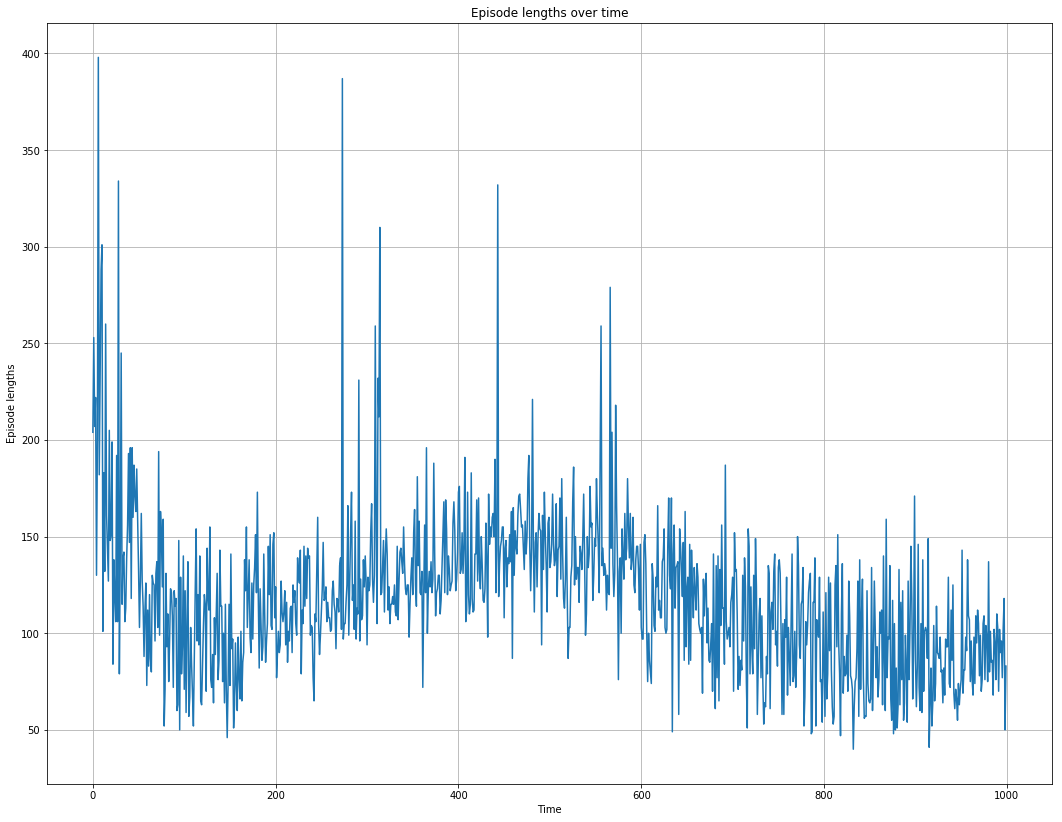

In [124]:
plt.figure(figsize = (18, 14))
plt.plot(stats['episode_lengths'])
plt.grid(True)
plt.title('Episode lengths over time')
plt.xlabel('Time')
plt.ylabel('Episode lengths')

Text(0, 0.5, 'Rewards')

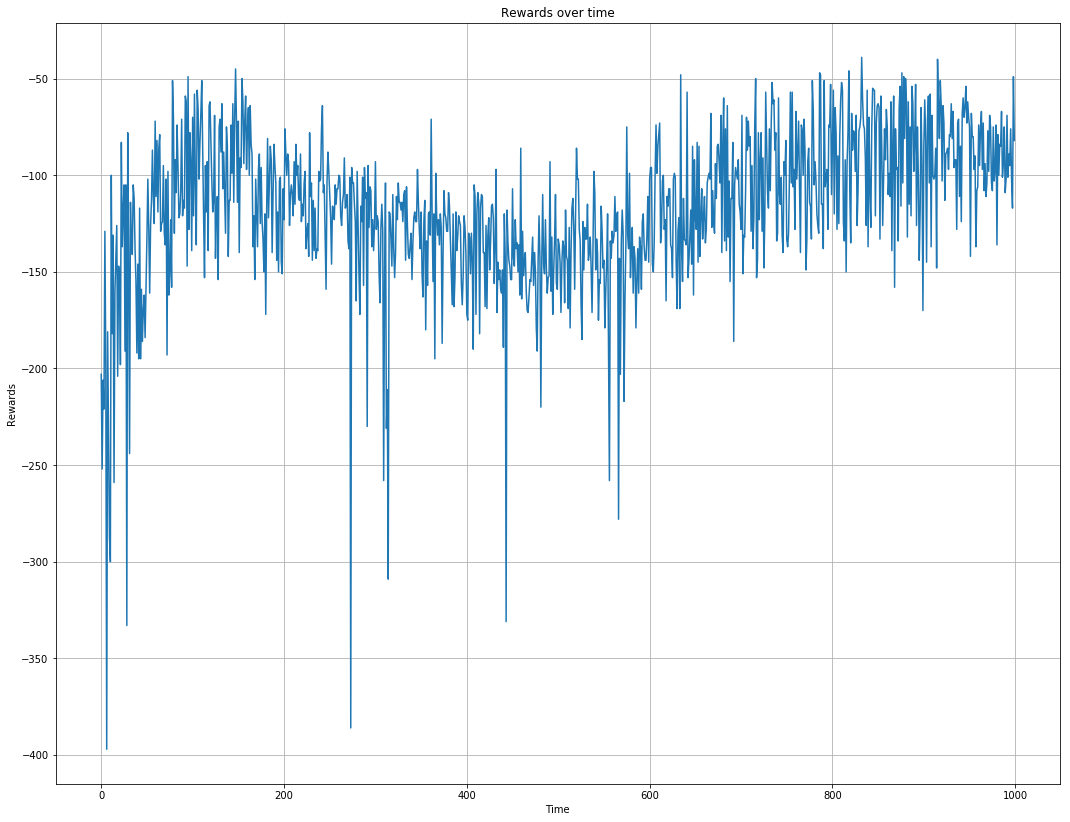

In [125]:
plt.figure(figsize = (18, 14))
plt.plot(stats['episode_rewards'])
plt.grid(True)
plt.title('Rewards over time')
plt.xlabel('Time')
plt.ylabel('Rewards')

# Predicton

###  Get best features from QTable

In [132]:
def getbestfeatures(Q):
    selectedFestures = set()
    
    for s in range(n_components):
        if min(Q[s]) != 0 :
            nextstate = np.argmax(Q[s])
            selectedFestures.add(nextstate)
    
    return selectedFestures

###  Test

In [136]:
imgPCATest = X_test_pca[i]
target = test_targets[i]
selectedFestures = getbestfeatures(Q)
print(selectedFestures)
print(len(selectedFestures))
#prediction
image_PersonTemp = np.array(np.zeros([n_components]))
image_PersonTemp[list(selectedFestures)]=imgPCATest[list(selectedFestures)]
y_pred = svm.predict([image_PersonTemp])
print("target = ",target)
print("y_pred = ",y_pred)

print("Predicted Name= ",test_target_names[y_pred[0]])


{0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 37, 38, 39, 41, 43, 47, 48, 50, 53, 54, 55, 56, 58, 59, 60, 61, 64, 65, 66, 579, 68, 581, 70, 71, 72, 73, 584, 74, 76, 78, 79, 81, 85, 86, 88, 89, 601, 91, 92, 602, 94, 95, 90, 97, 99, 100, 101, 104, 617, 106, 107, 108, 621, 619, 618, 626, 627, 114, 629, 631, 119, 635, 130, 137, 650, 138, 148, 149, 664, 157, 159, 689, 699, 705, 211, 213, 216, 222, 232, 238, 240, 242, 766, 281, 290, 291, 298, 814, 302, 820, 835, 840, 841, 329, 851, 852, 871, 364, 878, 880, 883, 885, 887, 376, 378, 898, 388, 416, 420, 422, 426, 428, 437, 462, 464, 479, 499, 511}
149
target =  4779
y_pred =  [4779]
Predicted Name=  Rolf_Zimmermann


In [24]:

action_probabilities=[0.5, 0.2,0.1,0.1,0.1]
action_probabilities

[0.5, 0.2, 0.1, 0.1, 0.1]

In [25]:
import numpy as np
action = np.random.choice(np.arange( len(action_probabilities)), p = action_probabilities)
action

3

In [27]:
np.arange( len(action_probabilities))

array([0, 1, 2, 3, 4])